# Syntheic Training Data

/tmp/ipykernel_956266/3071305923.py:57: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')


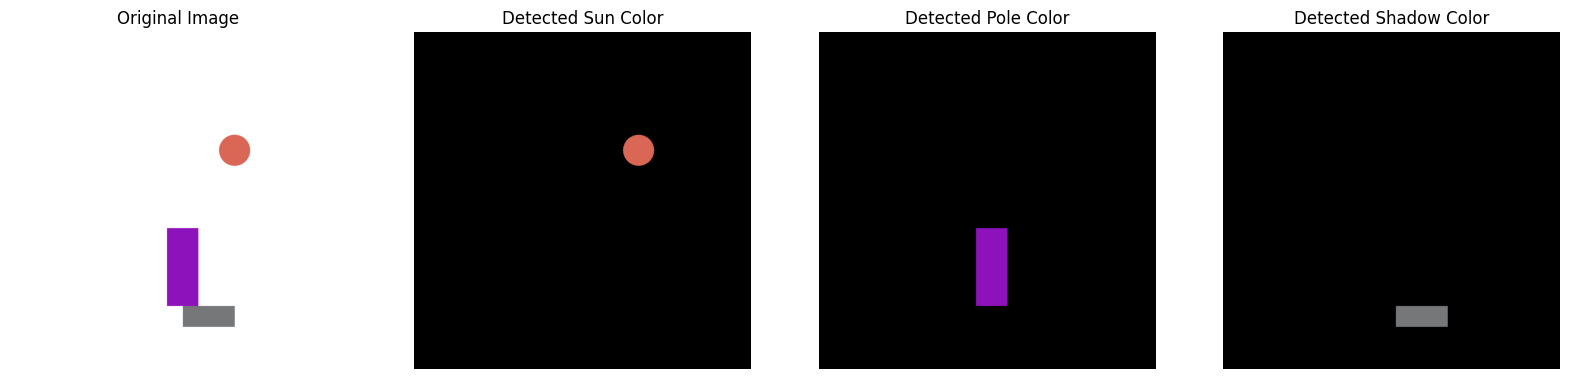

Sun Color (RGB): [218 102  85]
Pole Color (RGB): [142  18 187]
Shadow Color (RGB): [118 119 121]


In [119]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_agg import FigureCanvasAgg
# import random

# def random_color_from_hsv_range(hsv_range):
#     h = random.uniform(hsv_range[0][0], hsv_range[0][1])
#     s = random.uniform(hsv_range[1][0], hsv_range[1][1])
#     v = random.uniform(hsv_range[2][0], hsv_range[2][1])
#     return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

# def get_color_ranges():
#     # 定义基本的颜色范围
#     sun_hsv_range = [(20, 40), (150, 255), (200, 255)]  # 黄色系
#     pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系
#     shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]  # 灰色系

#     # 添加一些随机性，但保持在可识别的范围内
#     sun_hsv_range[0] = (max(0, sun_hsv_range[0][0] - 10), min(180, sun_hsv_range[0][1] + 10))
#     pole_hsv_range[0] = (max(0, pole_hsv_range[0][0] - 10), min(180, pole_hsv_range[0][1] + 10))
    
#     return sun_hsv_range, pole_hsv_range, shadow_hsv_range

# def create_sun_shadow_image(pole_height, sun_distance, image_size=64, is_real=True):
#     fig, ax = plt.subplots(figsize=(10, 10))
#     ax.set_xlim(0, image_size)
#     ax.set_ylim(0, image_size)
#     ax.set_aspect('equal')
#     ax.axis('off')

#     ground_level = image_size * 0.1
#     pole_base_x = image_size // 2
#     pole_width = image_size * 0.15  # 增加杆子的宽度

#     sun_height = np.clip(pole_height * 2, image_size * 0.3, image_size * 0.8)

#     shadow_length = pole_height * abs(sun_distance) / (sun_height - pole_height)
    
#     if is_real:
#         shadow_direction = -1 if sun_distance > 0 else 1
#     else:
#         shadow_direction = 1 if sun_distance > 0 else -1

#     sun_hsv_range, pole_hsv_range, shadow_hsv_range = get_color_ranges()

#     sun_color = random_color_from_hsv_range(sun_hsv_range)
#     pole_color = random_color_from_hsv_range(pole_hsv_range)
#     shadow_color = random_color_from_hsv_range(shadow_hsv_range)

#     # 画影子（增加宽度）
#     ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.04), 
#                                shadow_length * shadow_direction, image_size * 0.04, facecolor=shadow_color/255.0))

#     # 画杆子
#     ax.add_patch(plt.Rectangle((pole_base_x - pole_width/2, ground_level), 
#                                pole_width, pole_height, facecolor=pole_color/255.0))

#     # 画太阳（增加大小）
#     sun_radius = image_size * 0.15
#     sun_x = pole_base_x + sun_distance
#     sun_y = sun_height + ground_level
#     ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color/255.0))

#     # 将图形转换为图像
#     canvas = FigureCanvasAgg(fig)
#     canvas.draw()
#     image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
#     image = image.reshape(canvas.get_width_height()[::-1] + (3,))
#     plt.close(fig)

#     return image, (sun_color, pole_color, shadow_color)

# def detect_colors(image, sun_hsv_range, pole_hsv_range, shadow_hsv_range):
#     hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

#     sun_lower = np.array([sun_hsv_range[0][0], sun_hsv_range[1][0], sun_hsv_range[2][0]])
#     sun_upper = np.array([sun_hsv_range[0][1], sun_hsv_range[1][1], sun_hsv_range[2][1]])

#     pole_lower = np.array([pole_hsv_range[0][0], pole_hsv_range[1][0], pole_hsv_range[2][0]])
#     pole_upper = np.array([pole_hsv_range[0][1], pole_hsv_range[1][1], pole_hsv_range[2][1]])

#     shadow_lower = np.array([shadow_hsv_range[0][0], shadow_hsv_range[1][0], shadow_hsv_range[2][0]])
#     shadow_upper = np.array([shadow_hsv_range[0][1], shadow_hsv_range[1][1], shadow_hsv_range[2][1]])

#     sun_mask = cv2.inRange(hsv_image, sun_lower, sun_upper)
#     pole_mask = cv2.inRange(hsv_image, pole_lower, pole_upper)
#     shadow_mask = cv2.inRange(hsv_image, shadow_lower, shadow_upper)

#     sun_detected = cv2.bitwise_and(image, image, mask=sun_mask)
#     pole_detected = cv2.bitwise_and(image, image, mask=pole_mask)
#     shadow_detected = cv2.bitwise_and(image, image, mask=shadow_mask)

#     return sun_detected, pole_detected, shadow_detected

# # 主程序
# image_size = 64  # 使用新的图像大小
# pole_height = image_size * 0.3
# sun_distance = image_size * 0.2

# image, (sun_color, pole_color, shadow_color) = create_sun_shadow_image(pole_height, sun_distance, image_size)

# # 获取颜色范围
# sun_hsv_range, pole_hsv_range, shadow_hsv_range = get_color_ranges()

# sun_detected, pole_detected, shadow_detected = detect_colors(image, sun_hsv_range, pole_hsv_range, shadow_hsv_range)

# # 显示图像和检测结果
# plt.figure(figsize=(20, 10))

# plt.subplot(141)
# plt.imshow(image)
# plt.title("Original Image")
# plt.axis('off')

# plt.subplot(142)
# plt.imshow(sun_detected)
# plt.title("Detected Sun Color")
# plt.axis('off')

# plt.subplot(143)
# plt.imshow(pole_detected)
# plt.title("Detected Pole Color")
# plt.axis('off')

# plt.subplot(144)
# plt.imshow(shadow_detected)
# plt.title("Detected Shadow Color")
# plt.axis('off')

# plt.show()

# # 打印生成的颜色
# print(f"Sun Color (RGB): {sun_color}")
# print(f"Pole Color (RGB): {pole_color}")
# print(f"Shadow Color (RGB): {shadow_color}")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_sun_shadow_image(pole_height, sun_x, image_size=32, is_real=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    ground_level = image_size * 0.1
    pole_base_x = image_size // 2
    pole_width = image_size * 0.12  # 调整杆子的宽度

    sun_height = np.clip(pole_height * 2, image_size * 0.3, image_size * 0.8)

    sun_distance = sun_x - pole_base_x
    shadow_length = pole_height * abs(sun_distance) / (sun_height - pole_height)
    
    # 根据是否真实调整阴影方向
    if is_real:
        shadow_direction = -1 if sun_distance > 0 else 1
    else:
        shadow_direction = 1 if sun_distance > 0 else -1

    # 定义色系的HSV范围
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]  # 黄色系
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]  # 蓝绿色系
    shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]  # 黑色、棕色、灰色系

    # 随机选择颜色
    sun_color = random_color_from_hsv_range(sun_hsv_range)
    pole_color = random_color_from_hsv_range(pole_hsv_range)
    shadow_color = random_color_from_hsv_range(shadow_hsv_range)

    # 画影子
    ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.08), 
                               shadow_length * shadow_direction, image_size * 0.08, facecolor=shadow_color/255.0))  # 调整影子的高度

    # 画杆子
    ax.add_patch(plt.Rectangle((pole_base_x - pole_width/2, ground_level), 
                               pole_width, pole_height, facecolor=pole_color/255.0))

    # 画太阳
    sun_radius = image_size * 0.1
    sun_y = sun_height + ground_level
    ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color/255.0))

    return fig, (sun_color, pole_color, shadow_color)

def generate_images(base_path, min_pole_height, max_pole_height, image_size=32, images_per_class=1000):
    os.makedirs(base_path, exist_ok=True)
    
    # 新的距离区间定义
    far_distances = [(0.00 * image_size, 0.2 * image_size), (0.8 * image_size, 1.0 * image_size)]
    near_distances = [(0.3 * image_size, 0.5 * image_size), (0.5 * image_size, 0.7 * image_size)]
    # far_distances = [(0, 6), (26, 32)]
    # near_distances = [(10, 16), (16, 22)]

    # classes = [
    #     ('l', 'f', 's'), ('l', 'f', 'd'), ('l', 'n', 's'), ('l', 'n', 'd'),
    #     ('r', 'f', 's'), ('r', 'f', 'd'), ('r', 'n', 's'), ('r', 'n', 'd')
    # ]
    classes = [
       ('l', 'f', 'd'),('l', 'n', 'd'),
        ('r', 'f', 'd'), ('r', 'n', 'd')
    ]

    images = []
    for direction, distance, real in classes:
        folder_name = f"{direction}_{distance}_{real}"
        folder_path = os.path.join(base_path, folder_name)
        os.makedirs(folder_path, exist_ok=True)

        is_real = (real == 'd')
        
        if distance == 'f':
            distance_ranges = far_distances
        else:
            distance_ranges = near_distances

        for j in tqdm(range(images_per_class), desc=f"Generating images for {folder_name}"):
            # 随机选择一个距离区间
            if direction == 'l':
                distance_range = distance_ranges[0]  # 左侧使用第一个区间
            else:
                distance_range = distance_ranges[1]  # 右侧使用第二个区间
            
            sun_x = np.random.uniform(distance_range[0], distance_range[1])

            pole_height = np.random.uniform(min_pole_height, max_pole_height)
            fig, colors = create_sun_shadow_image(pole_height, sun_x, image_size, is_real)
            
            image_path = os.path.join(folder_path, f"{j+1}.png")
            fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
            plt.close(fig)

            if j < 8:  # 只保存前8张图像用于展示
                images.append((image_path, folder_name))

    print("Image generation complete.")
    return images
# 设置参数
image_size = 32
images_per_class = 1000
min_pole_height = image_size * 0.2
max_pole_height = image_size * 0.4
base_path = f"/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/synthetic_data_eight_per{images_per_class}_size{image_size}"
# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, min_pole_height, max_pole_height, image_size,images_per_class=images_per_class)

Generating images for r_n_d: 100%|██████████| 1000/1000 [00:36<00:00, 27.34it/s]

Image generation complete.


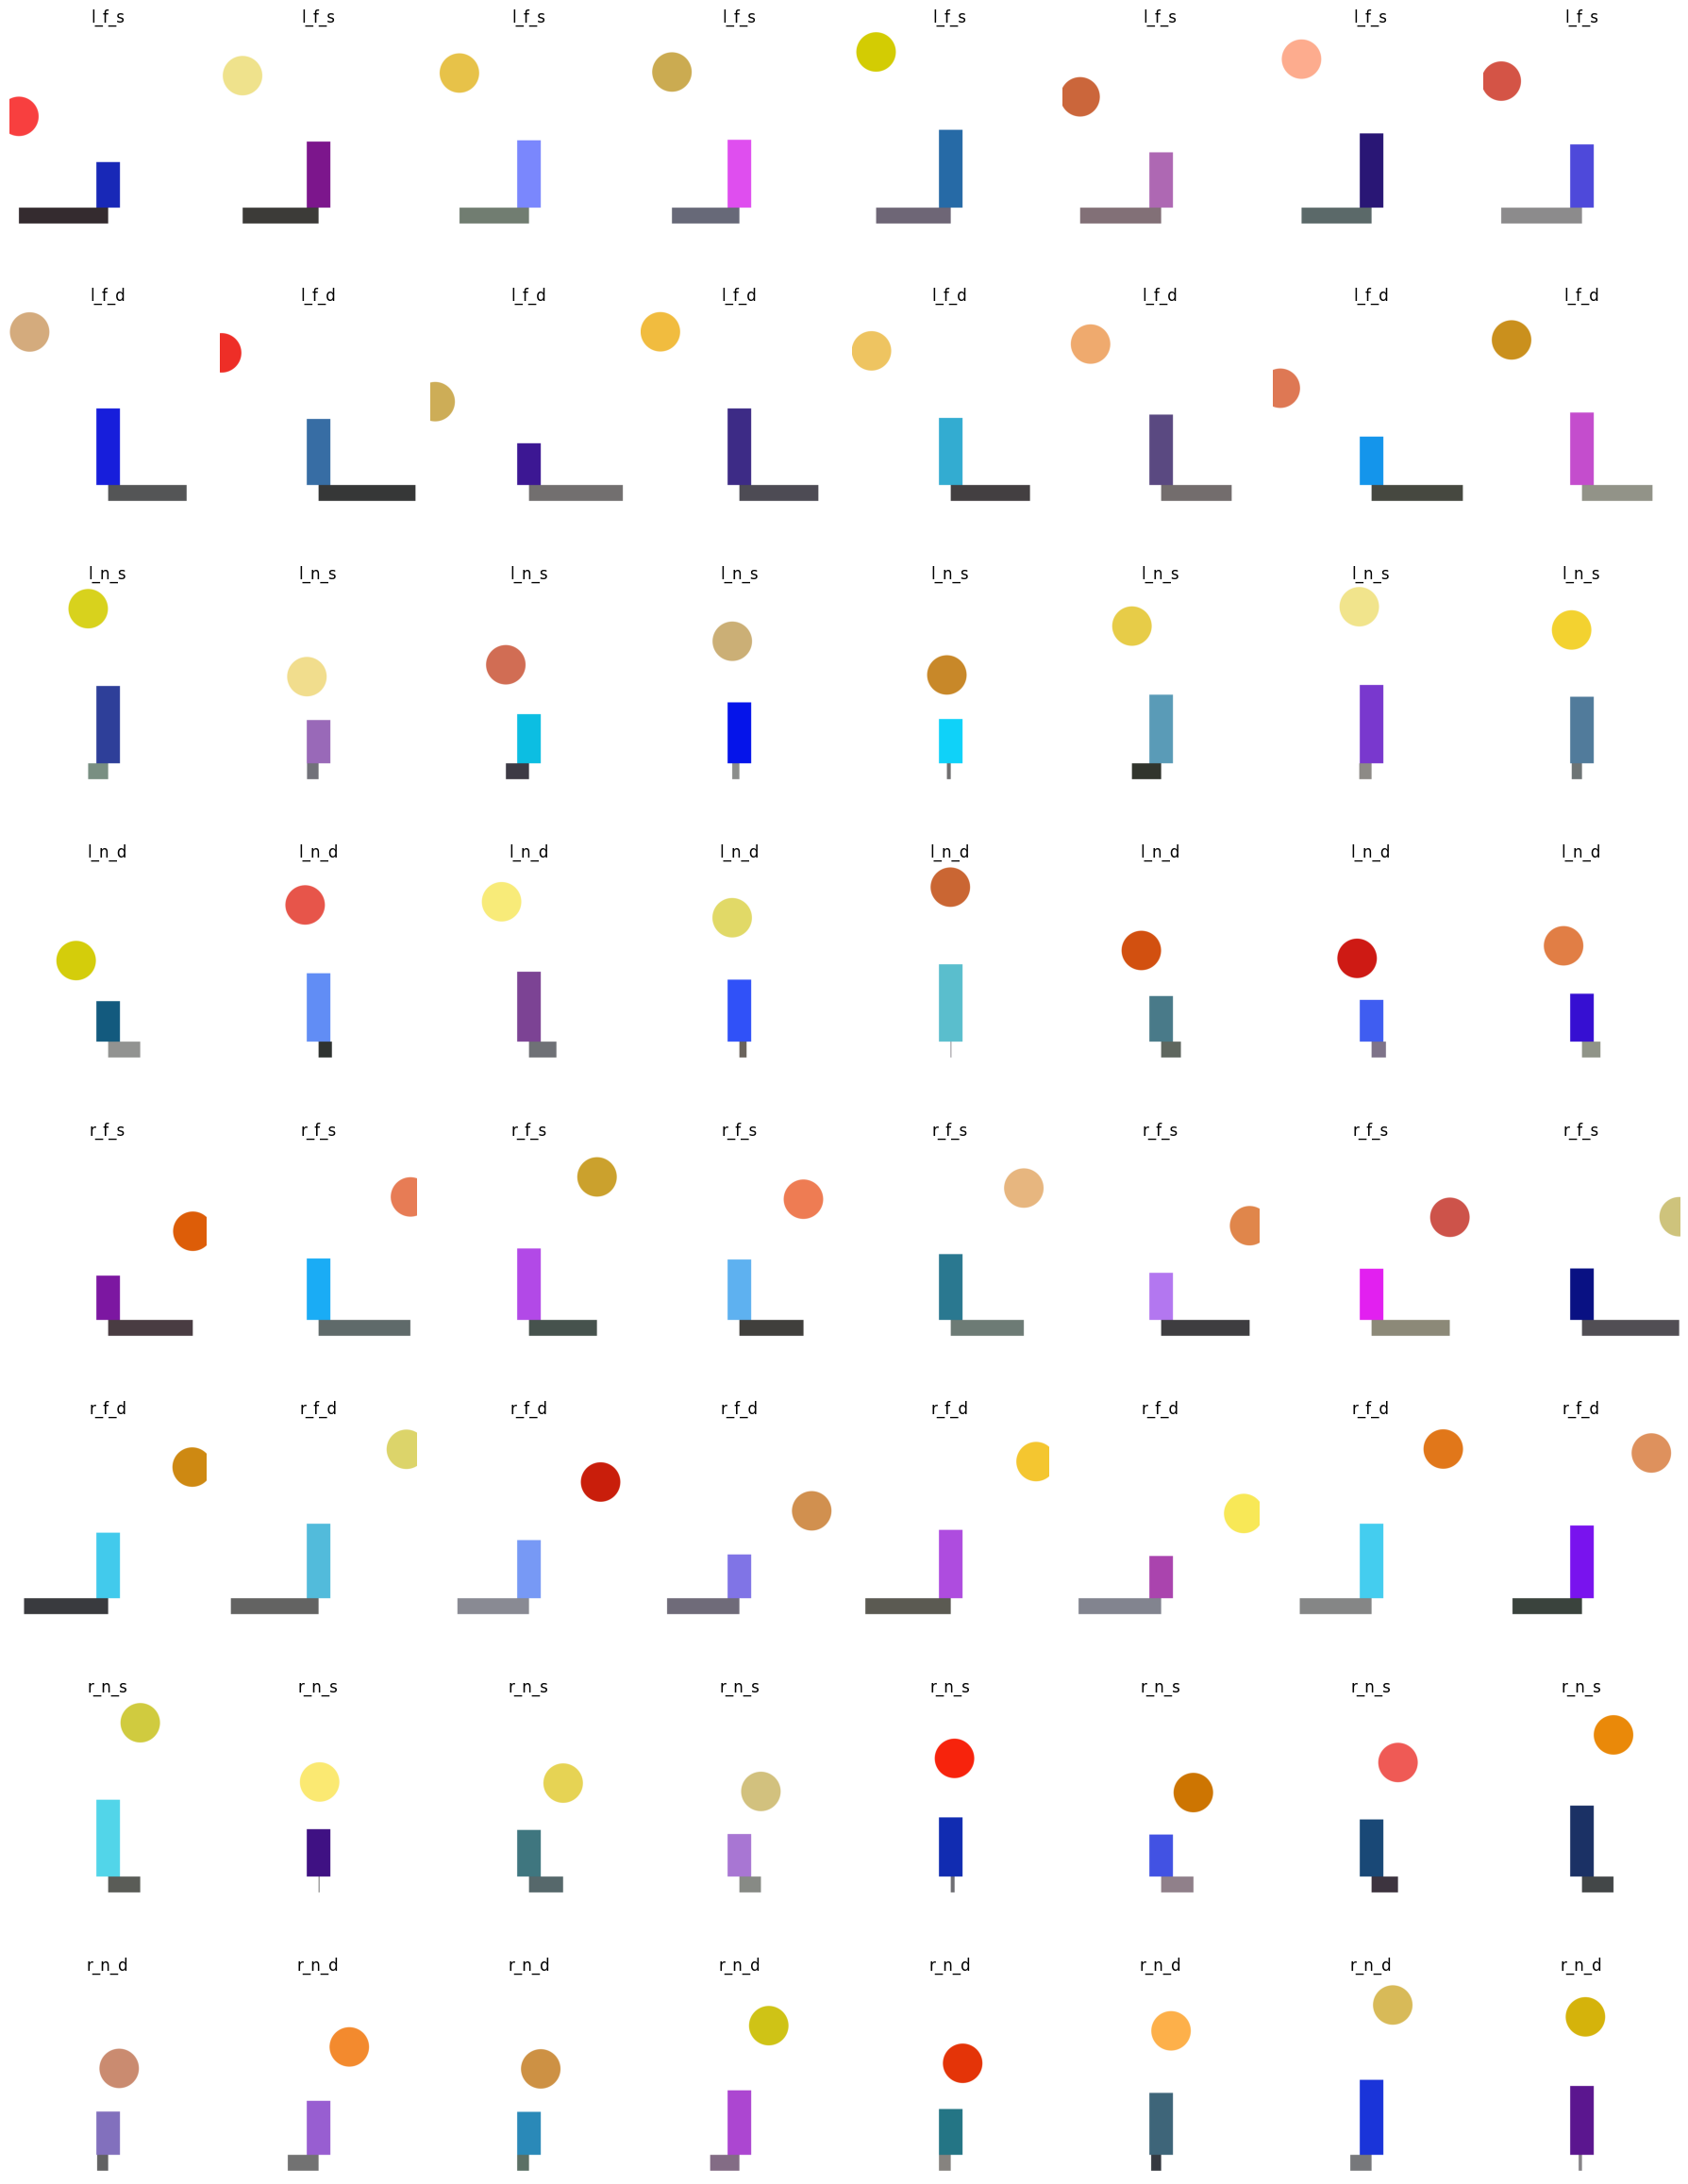

In [138]:
# 打印8行8列的图像
fig, axes = plt.subplots(8, 8, figsize=(18, 24))
for i, (image_path, folder_name) in enumerate(images):
    img = plt.imread(image_path)
    ax = axes[i // 8, i % 8]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(folder_name)

plt.tight_layout()
plt.show()

### Contrastive

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

# def create_sun_shadow_image(pole_height, sun_x, image_size=32, is_real=True):
#     fig, ax = plt.subplots(figsize=(10, 10))
#     ax.set_xlim(0, image_size)
#     ax.set_ylim(0, image_size)
#     ax.set_aspect('equal')
#     ax.axis('off')

#     ground_level = image_size * 0.1
#     pole_base_x = image_size // 2
#     pole_width = image_size * 0.12

#     sun_height = np.clip(pole_height * 2, image_size * 0.3, image_size * 0.8)

#     sun_distance = sun_x - pole_base_x
    
#     theoretical_shadow_length = pole_height * abs(sun_distance) / (sun_height - pole_height)
    
#     # 定义影子长度的可变范围
#     min_shadow_length = theoretical_shadow_length * 0.5
#     max_shadow_length = theoretical_shadow_length * 1.5
    
#     # 确保影子不会超出图片边界
#     max_possible_length = min(image_size - pole_base_x, pole_base_x)
#     max_shadow_length = min(max_shadow_length, max_possible_length)
    
#     # 创建两个区间，排除理论长度
#     lower_interval = (min_shadow_length, theoretical_shadow_length * 0.95)
#     upper_interval = (theoretical_shadow_length * 1.05, max_shadow_length)
    
#     # 随机选择一个区间，然后在该区间内随机选择长度
#     if np.random.random() < 0.5:
#         shadow_length = np.random.uniform(*lower_interval)
#     else:
#         shadow_length = np.random.uniform(*upper_interval)
   
#     # 根据是否真实调整阴影方向
#     if is_real:
#         shadow_direction = -1 if sun_distance > 0 else 1
#     else:
#         shadow_direction = 1 if sun_distance > 0 else -1

#     # 定义色系的HSV范围
#     sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
#     pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
#     shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]

#     # 随机选择颜色
#     sun_color = random_color_from_hsv_range(sun_hsv_range)
#     pole_color = random_color_from_hsv_range(pole_hsv_range)
#     shadow_color = random_color_from_hsv_range(shadow_hsv_range)

#     # 画影子
#     ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.08), 
#                                shadow_length * shadow_direction, image_size * 0.08, facecolor=shadow_color/255.0))

#     # 画杆子
#     ax.add_patch(plt.Rectangle((pole_base_x - pole_width/2, ground_level), 
#                                pole_width, pole_height, facecolor=pole_color/255.0))

#     # 画太阳
#     sun_radius = image_size * 0.1
#     sun_y = sun_height + ground_level
#     ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color/255.0))

#     return fig, (sun_color, pole_color, shadow_color)

def create_sun_shadow_image(pole_height, sun_x, image_size=32, is_real=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    ground_level = image_size * 0.1
    pole_base_x = image_size // 2
    pole_width = image_size * 0.12

    sun_height = np.clip(pole_height * 2, image_size * 0.3, image_size * 0.8)

    sun_distance = sun_x - pole_base_x
    
    theoretical_shadow_length = pole_height * abs(sun_distance) / (sun_height - pole_height)
    
    # 定义影子长度的可变范围
    short_range = (0.1, 0.5)
    long_range = (1.5, 1.9)
    
    # 确保影子不会超出图片边界
    max_possible_length = min(image_size - pole_base_x, pole_base_x)
    
    # 随机选择是要短影子还是长影子
    if np.random.random() < 0.5:
        # 短影子
        shadow_length = np.random.uniform(short_range[0], short_range[1]) * theoretical_shadow_length
    else:
        # 长影子
        shadow_length = np.random.uniform(long_range[0], long_range[1]) * theoretical_shadow_length
    
    # 确保影子长度不超过可能的最大长度
    shadow_length = min(shadow_length, max_possible_length)
   
    # 根据是否真实调整阴影方向
    if is_real:
        shadow_direction = -1 if sun_distance > 0 else 1
    else:
        shadow_direction = 1 if sun_distance > 0 else -1

    # 定义色系的HSV范围
    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
    shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]

    # 随机选择颜色
    sun_color = random_color_from_hsv_range(sun_hsv_range)
    pole_color = random_color_from_hsv_range(pole_hsv_range)
    shadow_color = random_color_from_hsv_range(shadow_hsv_range)

    # 画影子
    ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.08), 
                               shadow_length * shadow_direction, image_size * 0.08, facecolor=shadow_color/255.0))

    # 画杆子
    ax.add_patch(plt.Rectangle((pole_base_x - pole_width/2, ground_level), 
                               pole_width, pole_height, facecolor=pole_color/255.0))

    # 画太阳
    sun_radius = image_size * 0.1
    sun_y = sun_height + ground_level
    ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color/255.0))

    return fig, (sun_color, pole_color, shadow_color)

def generate_images(base_path, min_pole_height, max_pole_height, image_size=32, images_per_class=1000):
    os.makedirs(base_path, exist_ok=True)
    
    # 新的距离区间定义
    # near_distances = [(0.00 * image_size, 0.25 * image_size), (0.75 * image_size, 0.95 * image_size)]
    # far_distances = [(0.25 * image_size, 0.5 * image_size), (0.5 * image_size, 0.7 * image_size)]
    far_distances = [(0, 6), (26, 32)]
    near_distances = [(10, 16), (16, 22)]

    classes = [
       ('l', 'f', 'd'), ('l', 'n', 'd'),
        ('r', 'f', 'd'), ('r', 'n', 'd')
    ]

    images = []
    for direction, distance, real in classes:
        folder_name = f"{direction}_{distance}_{real}"
        folder_path = os.path.join(base_path, folder_name)
        os.makedirs(folder_path, exist_ok=True)

        is_real = (real == 'd')
        
        if distance == 'f':
            distance_ranges = far_distances
        else:
            distance_ranges = near_distances

        for j in tqdm(range(images_per_class), desc=f"Generating images for {folder_name}"):
            # 随机选择一个距离区间
            if direction == 'l':
                distance_range = distance_ranges[0]  # 左侧使用第一个区间
            else:
                distance_range = distance_ranges[1]  # 右侧使用第二个区间
            
            sun_x = np.random.uniform(distance_range[0], distance_range[1])

            pole_height = np.random.uniform(min_pole_height, max_pole_height)
            fig, colors = create_sun_shadow_image(pole_height, sun_x, image_size, is_real)
            
            image_path = os.path.join(folder_path, f"{j+1}.png")
            fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
            plt.close(fig)

            if j < 8:  # 只保存前8张图像用于展示
                images.append((image_path, folder_name))

    print("Image generation complete.")
    return images
# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_four_inaccurate_large"
image_size = 32
min_pole_height = image_size * 0.2
max_pole_height = image_size * 0.4

# 生成图片并获取前8张图像路径和类别标签
images = generate_images(base_path, min_pole_height, max_pole_height, image_size)

Generating images for l_f_d:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating images for r_n_d: 100%|██████████| 1000/1000 [00:37<00:00, 26.45it/s]

Image generation complete.


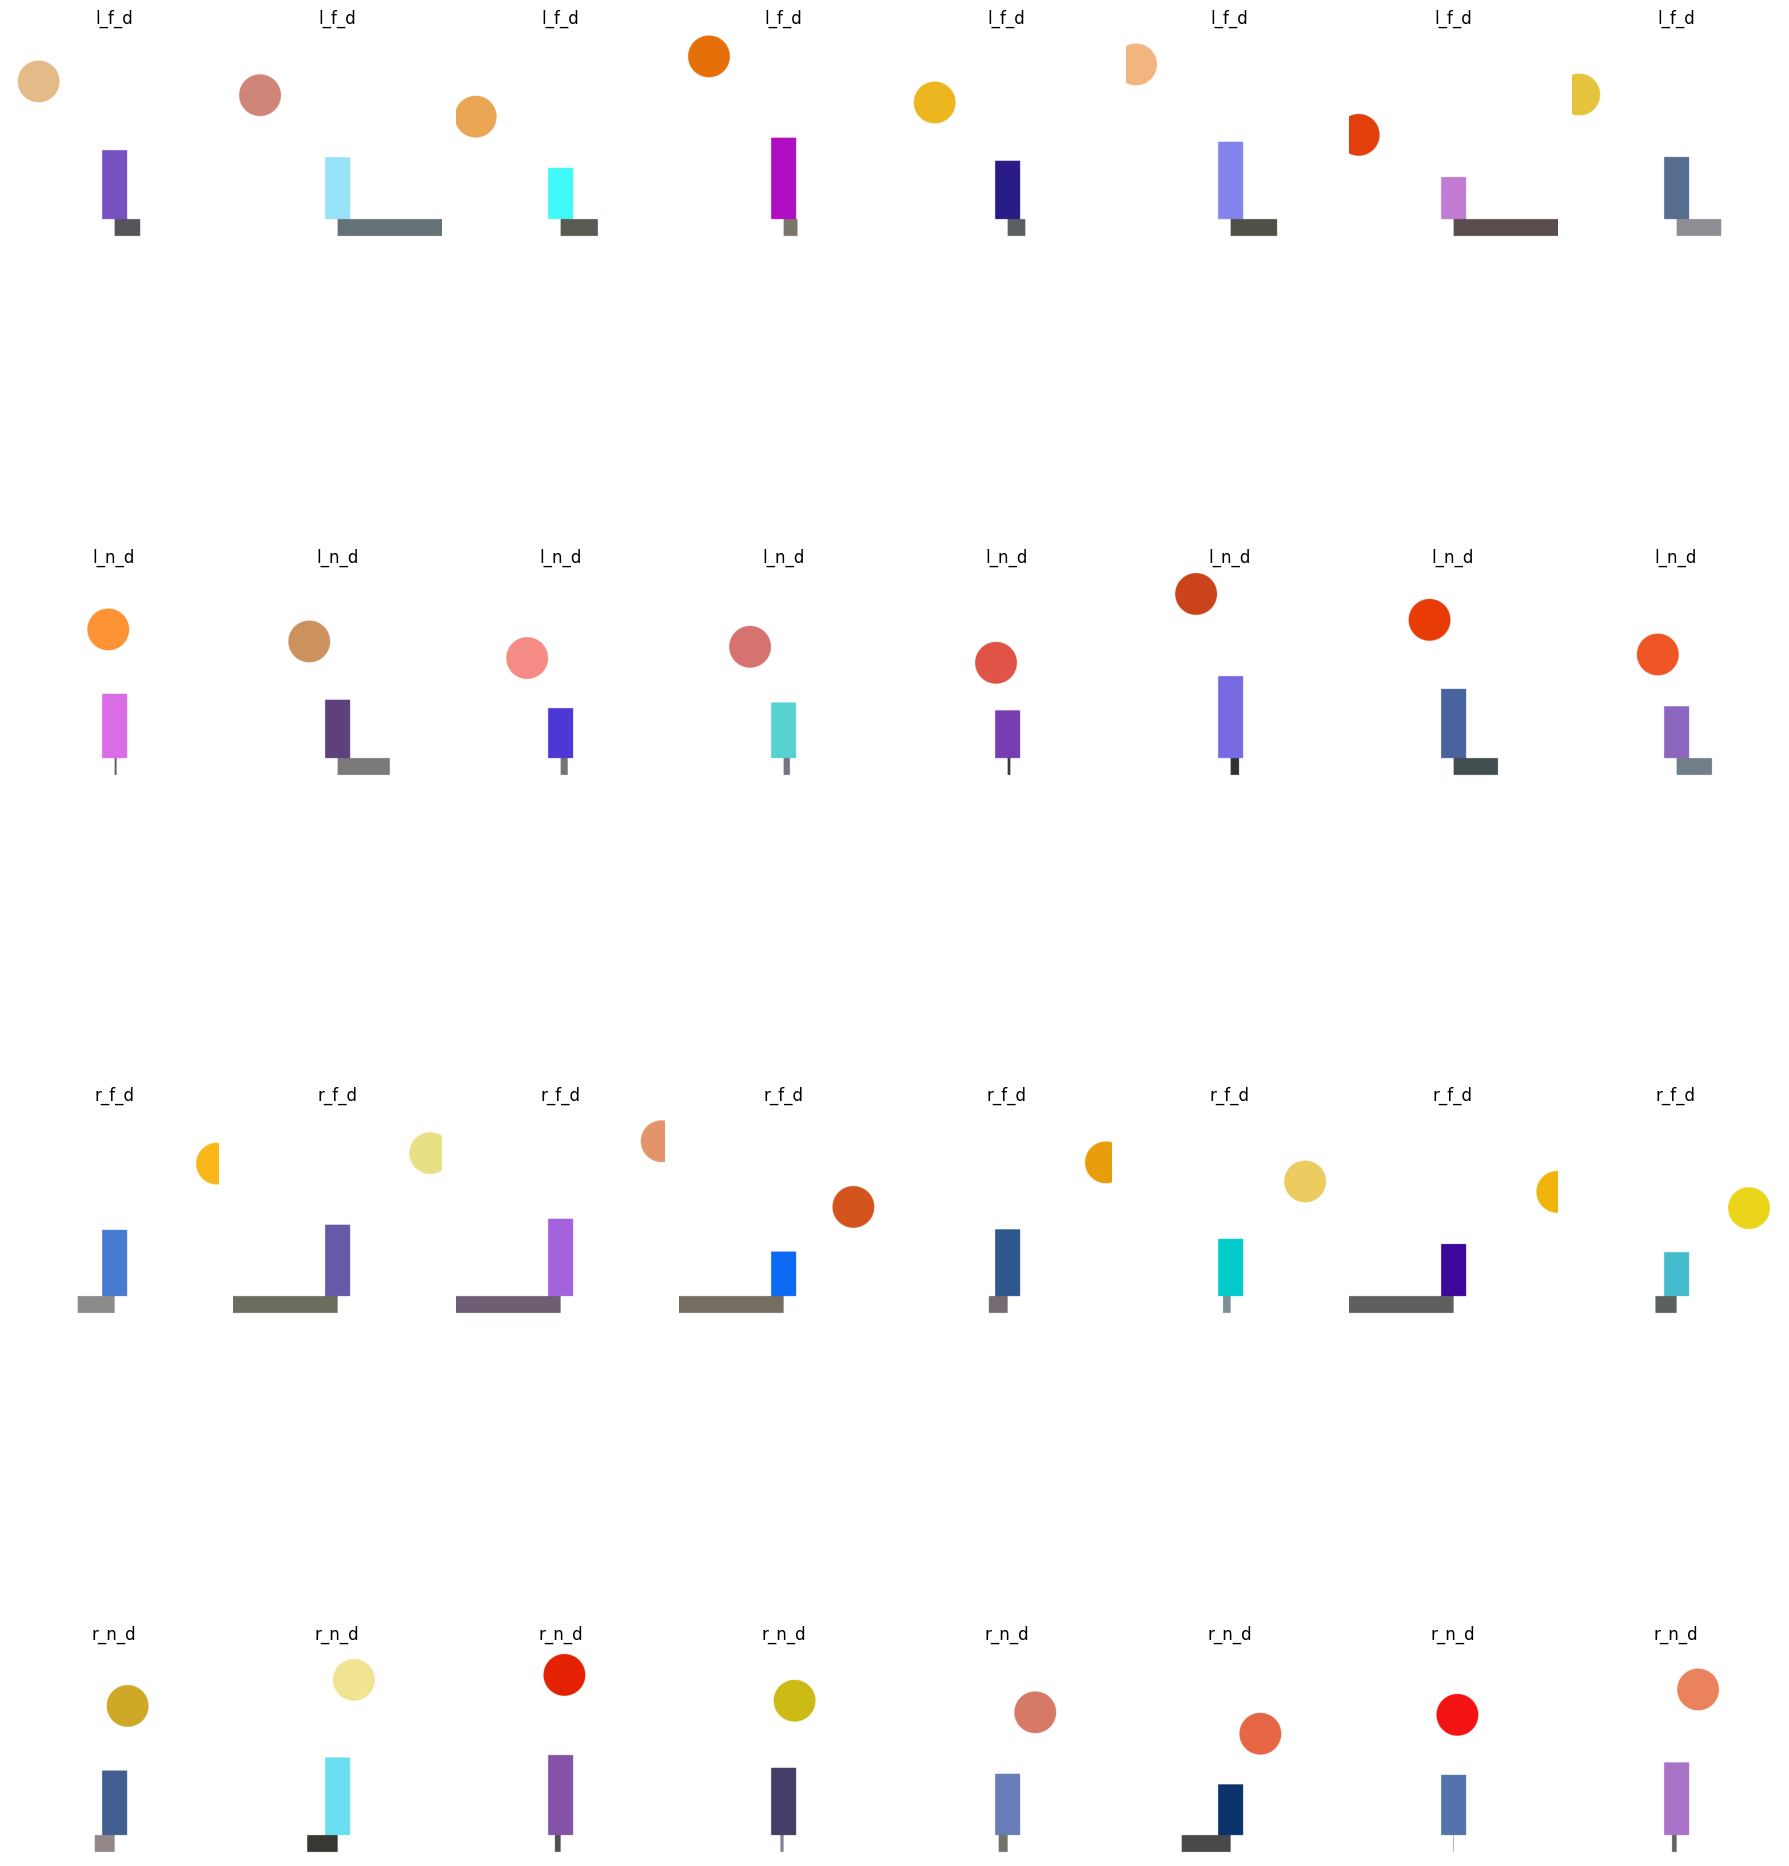

In [6]:
# 打印8行8列的图像
fig, axes = plt.subplots(4, 8, figsize=(18, 24))
for i, (image_path, folder_name) in enumerate(images):
    img = plt.imread(image_path)
    ax = axes[i // 8, i % 8]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(folder_name)

plt.tight_layout()
plt.show()

# Check

## Composition

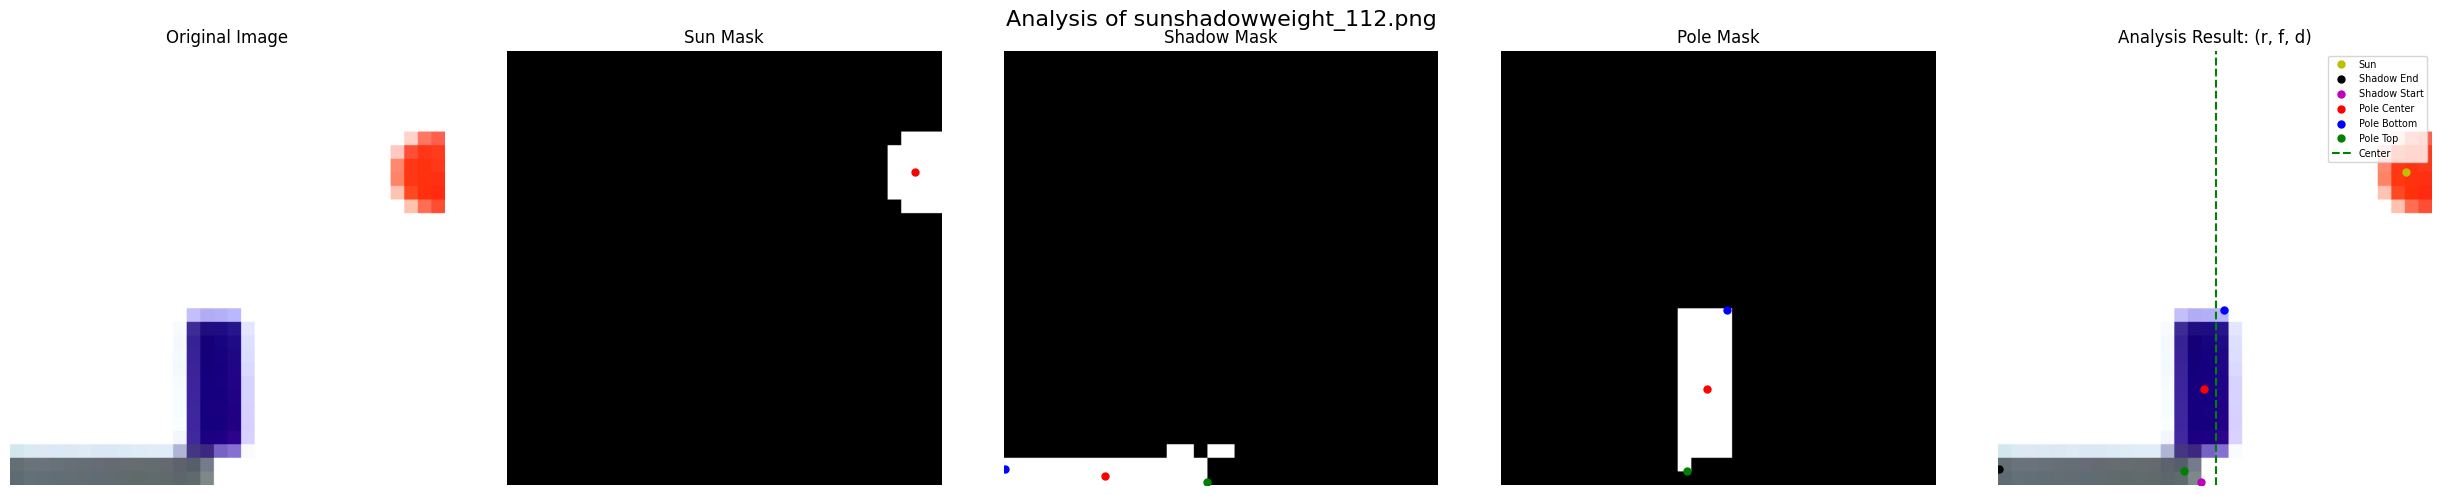

Sun color: (4, 240, 255)
Pole color: (125, 255, 126)
Shadow color: (93, 20, 137)
Analysis status: success
Label: ('r', 'f', 'd')
Details: Sun center: (240, 71), Shadow end: (0, 246), Shadow start: (119, 254), Pole center: (121, 199), Pole bottom: (133, 152), Pole top: (109, 247), Distance to center: 112.00


In [218]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_center_and_end(mask, pole_center, is_pole=False):
    # 检查掩码是否为空
    if np.sum(mask) == 0:
        return (0, 0), (0, 0), (0, 0)
    
    # 使用霍夫变换检测直线
    lines = cv2.HoughLinesP(mask, 1, np.pi/180, threshold=30, minLineLength=mask.shape[0]/4, maxLineGap=20)
    
    if lines is not None:
        longest_line = max(lines, key=lambda x: np.sqrt((x[0][0]-x[0][2])**2 + (x[0][1]-x[0][3])**2))
        x1, y1, x2, y2 = longest_line[0]
        
        # 确保 x1 < x2 (对于影子) 或 y1 < y2 (对于旗杆)
        if (is_pole and y1 > y2) or (not is_pole and x1 > x2):
            x1, y1, x2, y2 = x2, y2, x1, y1
        
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        
        # 对于旗杆，返回底端作为end_point
        if is_pole:
            return (center_x, center_y), (x1, y1), (x2, y2)
        # 对于影子，返回离旗杆最远的点作为end_point
        else:
            dist1 = np.sqrt((x1 - pole_center[0])**2 + (y1 - pole_center[1])**2)
            dist2 = np.sqrt((x2 - pole_center[0])**2 + (y2 - pole_center[1])**2)
            end_point = (x2, y2) if dist2 > dist1 else (x1, y1)
            other_end = (x1, y1) if dist2 > dist1 else (x2, y2)
            return (center_x, center_y), end_point, other_end
    
    # 如果霍夫变换失败，退回到轮廓方法
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        cnt = max(contours, key=cv2.contourArea)
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            center_x = int(M["m10"] / M["m00"])
            center_y = int(M["m01"] / M["m00"])
        else:
            center_x, center_y = 0, 0
        
        # 找到最远和最近的点
        dist = np.sqrt((cnt[:,:,0] - pole_center[0])**2 + (cnt[:,:,1] - pole_center[1])**2)
        far_index = np.argmax(dist)
        near_index = np.argmin(dist)
        far_point = tuple(cnt[far_index][0])
        near_point = tuple(cnt[near_index][0])
        
        return (center_x, center_y), far_point, near_point
    
    return (0, 0), (0, 0), (0, 0)

def analyze_and_visualize_image(image_path, target_size=64):
    # 读取图像
    img = cv2.imread(image_path)
    if img is None:
        return "fail", None, "Image could not be read"

    # 调整图像大小为 target_size x target_size
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)

    # 转换为RGB（用于显示）和HSV颜色空间
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 获取颜色值
    def get_dominant_color(mask):
        masked_img = cv2.bitwise_and(hsv, hsv, mask=mask)
        hist = cv2.calcHist([masked_img], [0, 1, 2], mask, [180, 256, 256], [0, 180, 0, 256, 0, 256])
        dominant_color = np.unravel_index(np.argmax(hist), hist.shape)
        return dominant_color

    # 定义颜色范围
    sun_hsv_range = [(0, 60), (50, 255), (200, 255)]  # 扩大黄色和橙色范围
    pole_hsv_range = [(90, 150), (50, 255), (50, 255)]  # 保持蓝绿色系，但扩大范围
    shadow_hsv_range = [(0, 180), (0, 150), (0, 220)]  # 进一步扩大阴影的范围，包括更多灰色调
    
    sun_lower = np.array([sun_hsv_range[0][0], sun_hsv_range[1][0], sun_hsv_range[2][0]])
    sun_upper = np.array([sun_hsv_range[0][1], sun_hsv_range[1][1], sun_hsv_range[2][1]])

    pole_lower = np.array([pole_hsv_range[0][0], pole_hsv_range[1][0], pole_hsv_range[2][0]])
    pole_upper = np.array([pole_hsv_range[0][1], pole_hsv_range[1][1], pole_hsv_range[2][1]])

    shadow_lower = np.array([shadow_hsv_range[0][0], shadow_hsv_range[1][0], shadow_hsv_range[2][0]])
    shadow_upper = np.array([shadow_hsv_range[0][1], shadow_hsv_range[1][1], shadow_hsv_range[2][1]])

    # 创建掩码
    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    # 获取颜色值
    sun_color = get_dominant_color(sun_mask)
    pole_color = get_dominant_color(pole_mask)
    shadow_color = get_dominant_color(shadow_mask)

    # 计算中心和末端
    (pole_cx, pole_cy), (pole_bottom_x, pole_bottom_y), (pole_top_x, pole_top_y) = calculate_center_and_end(pole_mask, (0, 0), is_pole=True)
    (sun_cx, sun_cy), _, _ = calculate_center_and_end(sun_mask, (pole_cx, pole_cy))
    (shadow_cx, shadow_cy), (shadow_end_x, shadow_end_y), (shadow_start_x, shadow_start_y) = calculate_center_and_end(shadow_mask, (pole_cx, pole_cy))

    # 检查是否有任何物体没有被检测到
    if (sun_cx, sun_cy) == (0, 0) or (pole_cx, pole_cy) == (0, 0) or (shadow_cx, shadow_cy) == (0, 0):
        return "fail", None, "One or more objects not detected"

    # 计算旗杆中心到地面的距离和影子到地面的距离
    pole_center_to_ground = pole_bottom_y - pole_cy
    shadow_to_ground = pole_bottom_y - shadow_cy

    # 检查旗杆中心到地面的距离是否小于等于影子到地面的距离
    if pole_center_to_ground <= shadow_to_ground:
        return "fail", None, "Pole center is not higher than shadow"

    # 确定方向、距离和真实性
    direction = 'l' if sun_cx < target_size/2 else 'r'
    distance_to_center = abs(sun_cx - target_size/2)
    near_distance = (0.00 * target_size, 0.25 * target_size)  # 近距离范围：图像大小的5%到25%
    far_distance = (0.25 * target_size, 0.5 * target_size)  # 远距离范围：图像大小的30%到50%
    if near_distance[0] <= distance_to_center <= near_distance[1]:
         distance = 'n' 
    elif far_distance[0] < distance_to_center <= far_distance[1]:
        distance = 'f'
    else:
        distance = 'unknown'
    
    # 根据影子尾端和太阳中心相对于杆子的位置判断真实性
    if (sun_cx < pole_cx and shadow_end_x > pole_cx) or (sun_cx > pole_cx and shadow_end_x < pole_cx):
        real = 'd'
    else:
        real = 's'

    # 可视化
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # 1行5列
    fig.suptitle(f"Analysis of {os.path.basename(image_path)}", fontsize=16)

    # 原始图像
    axs[0].imshow(img_rgb)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    # 太阳掩码
    axs[1].imshow(sun_mask, cmap='gray')
    axs[1].set_title("Sun Mask")
    axs[1].plot(sun_cx, sun_cy, 'ro', markersize=5)
    axs[1].axis('off')

    # 影子掩码
    axs[2].imshow(shadow_mask, cmap='gray')
    axs[2].set_title("Shadow Mask")
    axs[2].plot(shadow_cx, shadow_cy, 'ro', markersize=5)
    axs[2].plot(shadow_end_x, shadow_end_y, 'bo', markersize=5)
    axs[2].plot(shadow_start_x, shadow_start_y, 'go', markersize=5)
    axs[2].axis('off')

    # 杆子掩码
    axs[3].imshow(pole_mask, cmap='gray')
    axs[3].set_title("Pole Mask")
    axs[3].plot(pole_cx, pole_cy, 'ro', markersize=5)
    axs[3].plot(pole_bottom_x, pole_bottom_y, 'bo', markersize=5)
    axs[3].plot(pole_top_x, pole_top_y, 'go', markersize=5)
    axs[3].axis('off')

    # 最终分析结果
    axs[4].imshow(img_rgb)
    axs[4].plot(sun_cx, sun_cy, 'yo', markersize=5, label='Sun')
    axs[4].plot(shadow_end_x, shadow_end_y, 'ko', markersize=5, label='Shadow End')
    axs[4].plot(shadow_start_x, shadow_start_y, 'mo', markersize=5, label='Shadow Start')
    axs[4].plot(pole_cx, pole_cy, 'ro', markersize=5, label='Pole Center')
    axs[4].plot(pole_bottom_x, pole_bottom_y, 'bo', markersize=5, label='Pole Bottom')
    axs[4].plot(pole_top_x, pole_top_y, 'go', markersize=5, label='Pole Top')
    axs[4].axvline(x=target_size/2, color='g', linestyle='--', label='Center')
    axs[4].legend(loc='upper right', fontsize='x-small')
    axs[4].set_title(f"Analysis Result: ({direction}, {distance}, {real})")
    axs[4].axis('off')

    plt.tight_layout()
    plt.show()

    # 打印颜色数值
    print(f"Sun color: {sun_color}")
    print(f"Pole color: {pole_color}")
    print(f"Shadow color: {shadow_color}")

    return "success", (direction, distance, real), f"Sun center: ({sun_cx}, {sun_cy}), Shadow end: ({shadow_end_x}, {shadow_end_y}), Shadow start: ({shadow_start_x}, {shadow_start_y}), Pole center: ({pole_cx}, {pole_cy}), Pole bottom: ({pole_bottom_x}, {pole_bottom_y}), Pole top: ({pole_top_x}, {pole_top_y}), Distance to center: {distance_to_center:.2f}"


# 使用示例
image_path = "/cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/1733583920.6404507/sunshadowweight_112.png"
status, label, details = analyze_and_visualize_image(image_path, target_size=256)

print(f"Analysis status: {status}")
if status == "success":
    print(f"Label: {label}")
print(f"Details: {details}")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from tqdm import tqdm
import re

def calculate_center_and_end(mask, pole_center, is_pole=False):
    # 检查掩码是否为空
    if np.sum(mask) == 0:
        return (0, 0), (0, 0), (0, 0)
    
    # 使用霍夫变换检测直线
    lines = cv2.HoughLinesP(mask, 1, np.pi/180, threshold=30, minLineLength=mask.shape[0]/4, maxLineGap=20)
    
    if lines is not None:
        longest_line = max(lines, key=lambda x: np.sqrt((x[0][0]-x[0][2])**2 + (x[0][1]-x[0][3])**2))
        x1, y1, x2, y2 = longest_line[0]
        
        # 确保 x1 < x2 (对于影子) 或 y1 < y2 (对于旗杆)
        if (is_pole and y1 > y2) or (not is_pole and x1 > x2):
            x1, y1, x2, y2 = x2, y2, x1, y1
        
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        
        # 对于旗杆，返回底端作为end_point
        if is_pole:
            return (center_x, center_y), (x1, y1), (x2, y2)
        # 对于影子，返回离旗杆最远的点作为end_point
        else:
            dist1 = np.sqrt((x1 - pole_center[0])**2 + (y1 - pole_center[1])**2)
            dist2 = np.sqrt((x2 - pole_center[0])**2 + (y2 - pole_center[1])**2)
            end_point = (x2, y2) if dist2 > dist1 else (x1, y1)
            other_end = (x1, y1) if dist2 > dist1 else (x2, y2)
            return (center_x, center_y), end_point, other_end
    
    # 如果霍夫变换失败，退回到轮廓方法
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        cnt = max(contours, key=cv2.contourArea)
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            center_x = int(M["m10"] / M["m00"])
            center_y = int(M["m01"] / M["m00"])
        else:
            center_x, center_y = 0, 0
        
        # 找到最远和最近的点
        dist = np.sqrt((cnt[:,:,0] - pole_center[0])**2 + (cnt[:,:,1] - pole_center[1])**2)
        far_index = np.argmax(dist)
        near_index = np.argmin(dist)
        far_point = tuple(cnt[far_index][0])
        near_point = tuple(cnt[near_index][0])
        
        return (center_x, center_y), far_point, near_point
    
    return (0, 0), (0, 0), (0, 0)

def analyze_single_image(image_path, target_size=64):
    # 读取图像
    img = cv2.imread(image_path)
    if img is None:
        return "fail", None, "Image could not be read"

    # 调整图像大小为 target_size x target_size
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)

    # 转换为RGB（用于显示）和HSV颜色空间
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 获取颜色值
    def get_dominant_color(mask):
        masked_img = cv2.bitwise_and(hsv, hsv, mask=mask)
        hist = cv2.calcHist([masked_img], [0, 1, 2], mask, [180, 256, 256], [0, 180, 0, 256, 0, 256])
        dominant_color = np.unravel_index(np.argmax(hist), hist.shape)
        return dominant_color

    # 定义颜色范围
    # sun_hsv_range = [(0, 60), (50, 255), (200, 255)]  # 扩大黄色和橙色范围
    # pole_hsv_range = [(90, 150), (50, 255), (50, 255)]  # 保持蓝绿色系，但扩大范围
    # shadow_hsv_range = [(0, 180), (0, 150), (0, 220)]  # 进一步扩大阴影的范围，包括更多灰色调

    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
    shadow_hsv_range = [(0, 180), (0, 150), (50, 150)] 
    
    
    sun_lower = np.array([sun_hsv_range[0][0], sun_hsv_range[1][0], sun_hsv_range[2][0]])
    sun_upper = np.array([sun_hsv_range[0][1], sun_hsv_range[1][1], sun_hsv_range[2][1]])

    pole_lower = np.array([pole_hsv_range[0][0], pole_hsv_range[1][0], pole_hsv_range[2][0]])
    pole_upper = np.array([pole_hsv_range[0][1], pole_hsv_range[1][1], pole_hsv_range[2][1]])

    shadow_lower = np.array([shadow_hsv_range[0][0], shadow_hsv_range[1][0], shadow_hsv_range[2][0]])
    shadow_upper = np.array([shadow_hsv_range[0][1], shadow_hsv_range[1][1], shadow_hsv_range[2][1]])

    # 创建掩码
    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    # 获取颜色值
    sun_color = get_dominant_color(sun_mask)
    pole_color = get_dominant_color(pole_mask)
    shadow_color = get_dominant_color(shadow_mask)

    # 计算中心和末端
    (pole_cx, pole_cy), (pole_bottom_x, pole_bottom_y), (pole_top_x, pole_top_y) = calculate_center_and_end(pole_mask, (0, 0), is_pole=True)
    (sun_cx, sun_cy), _, _ = calculate_center_and_end(sun_mask, (pole_cx, pole_cy))
    (shadow_cx, shadow_cy), (shadow_end_x, shadow_end_y), (shadow_start_x, shadow_start_y) = calculate_center_and_end(shadow_mask, (pole_cx, pole_cy))

    # 检查是否有任何物体没有被检测到
    if (sun_cx, sun_cy) == (0, 0) or (pole_cx, pole_cy) == (0, 0) or (shadow_cx, shadow_cy) == (0, 0):
        return "fail", None, "One or more objects not detected"

    # 计算旗杆中心到地面的距离和影子到地面的距离
    pole_center_to_ground = pole_bottom_y - pole_cy
    shadow_to_ground = pole_bottom_y - shadow_cy

    # 检查旗杆中心到地面的距离是否小于等于影子到地面的距离
    if pole_center_to_ground <= shadow_to_ground:
        return "fail", None, "Pole center is not higher than shadow"

    # 确定方向、距离和真实性
    direction = 'l' if sun_cx < target_size/2 else 'r'
    distance_to_center = abs(sun_cx - target_size/2)
    near_distance = (0.00 * target_size, 0.25 * target_size)  # 近距离范围：图像大小的5%到25%
    far_distance = (0.25 * target_size, 0.5 * target_size)  # 远距离范围：图像大小的30%到50%
    if near_distance[0] <= distance_to_center <= near_distance[1]:
         distance = 'n' 
    elif far_distance[0] < distance_to_center <= far_distance[1]:
        distance = 'f'
    else:
        distance = 'unknown'
    
    # 根据影子尾端和太阳中心相对于杆子的位置判断真实性
    if (sun_cx < pole_cx and shadow_end_x > pole_cx) or (sun_cx > pole_cx and shadow_end_x < pole_cx):
        real = 'd'
    else:
        real = 's'

    return "success", (direction, distance, real), f"Sun center: ({sun_cx}, {sun_cy}), Shadow end: ({shadow_end_x}, {shadow_end_y}), Pole center: ({pole_cx}, {pole_cy}), Distance to center: {distance_to_center:.2f}"

def analyze_folder(folder_path, target_size=64):
    results = defaultdict(list)
    total_count = 0
    fail_count = 0
    processed_files = []
    skipped_files = []

    for filename in tqdm(sorted(os.listdir(folder_path))):
        if filename.endswith(('.png', '.jpg', '.jpeg')) and re.search(r'\d+\.(?:png|jpg|jpeg)$', filename):
            total_count += 1
            image_path = os.path.join(folder_path, filename)
            status, label, details = analyze_single_image(image_path, target_size)
            
            if status == "fail":
                fail_count += 1
                results["fail"].append(filename)
                skipped_files.append((filename, details))
            else:
                results[label].append(filename)
                processed_files.append(filename)
        else:
            skipped_files.append((filename, "Does not match the expected format"))

    # 计算统计信息
    fail_rate = fail_count / total_count if total_count > 0 else 0
    label_percentages = {label: len(files) / total_count for label, files in results.items()} if total_count > 0 else {}

    return fail_rate, label_percentages, results, processed_files, skipped_files

# 使用示例
folder_path = "/cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_rnd_rfs_lns/vis/epoch_400_1733815615.1445627"
fail_rate, label_percentages, results, processed_files, skipped_files = analyze_folder(folder_path, target_size=128)

print(f"Total files in folder: {len(os.listdir(folder_path))}")
print(f"Processed files: {len(processed_files)}")
print(f"Skipped files: {len(skipped_files)}")
print(f"Fail rate: {fail_rate:.2%}")
print("\nLabel percentages:")
for label, percentage in label_percentages.items():
    print(f"{label}: {percentage:.2%}")

print("\nNumber of images in each category:")
for label, files in results.items():
    print(f"{label}: {len(files)}")

# 保存失败率、标签百分比和每个类别的图片数量到文本文件
with open(os.path.join(folder_path, "analysis_results.txt"), "w") as f:
    f.write(f"Fail rate: {fail_rate:.2%}\n\n")
    
    f.write("Label percentages:\n")
    for label, percentage in label_percentages.items():
        f.write(f"{label}: {percentage:.2%}\n")
    f.write("\n")
    
    f.write("Number of images in each category:\n")
    for label, files in results.items():
        f.write(f"{label}: {len(files)}\n")

# 如果需要，可以将每个类别的文件ID保存到文件中
for label, files in results.items():
    with open(os.path.join(folder_path, f"{label}_files.txt"), "w") as f:
        for file in files:
            f.write(f"{file}\n")

print(f"\nAnalysis results have been saved to {os.path.join(folder_path, 'analysis_results.txt')}")

In [152]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import cv2
import math

# 文件路径
base_path = "/cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight/l_f_d"
files_list_path = os.path.join(base_path, "('l', 'f', 's')_files.txt")

# 读取文件列表
with open(files_list_path, 'r') as file:
    files_to_delete = [line.strip() for line in file.readlines()]

# 统计有多少张不满足要求的图片
num_files_to_delete = len(files_to_delete)
print(f"Number of files to delete: {num_files_to_delete}")

# 动态生成 PDF 文件名
pdf_file_name = os.path.basename(files_list_path).replace("_files.txt", "")
pdf_path = os.path.join(base_path, f"files_to_delete_{pdf_file_name}.pdf")

# 确定行列数
if num_files_to_delete == 1:
    rows, cols = 1, 1
else:
    cols = min(6, num_files_to_delete)  # 每行最多6个
    rows = math.ceil(num_files_to_delete / cols)  # 动态计算行数

# 显示并保存这些图片
with PdfPages(pdf_path) as pdf:
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # 调整图像大小
    if num_files_to_delete == 1:
        axes = [axes]  # 将单个轴对象包装在列表中
    else:
        axes = axes.flatten()
    for i, file_name in enumerate(files_to_delete):
        file_path = os.path.join(base_path, file_name)
        if os.path.exists(file_path):
            img = cv2.imread(file_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax = axes[i]
            ax.imshow(img_rgb)
            ax.axis('off')
            ax.set_title(file_name)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    pdf.savefig(fig)
    plt.close(fig)

print(f"Images have been saved to {pdf_path}")


Number of files to delete: 1
Images have been saved to /cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight/l_f_d/files_to_delete_('l', 'f', 's').pdf


In [153]:
for file_name in files_to_delete:
    file_path = os.path.join(base_path, file_name)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    else:
        print(f"File not found: {file_path}")

Deleted: /cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight/l_f_d/333.png


## Causality

/tmp/ipykernel_2788341/1311797152.py:145: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 2], [0, 2], 'k--', label='y=x', color='gray')


13.91891891891892
Variance error 1.0604358242529421
Mean Error 0.4323981836970798


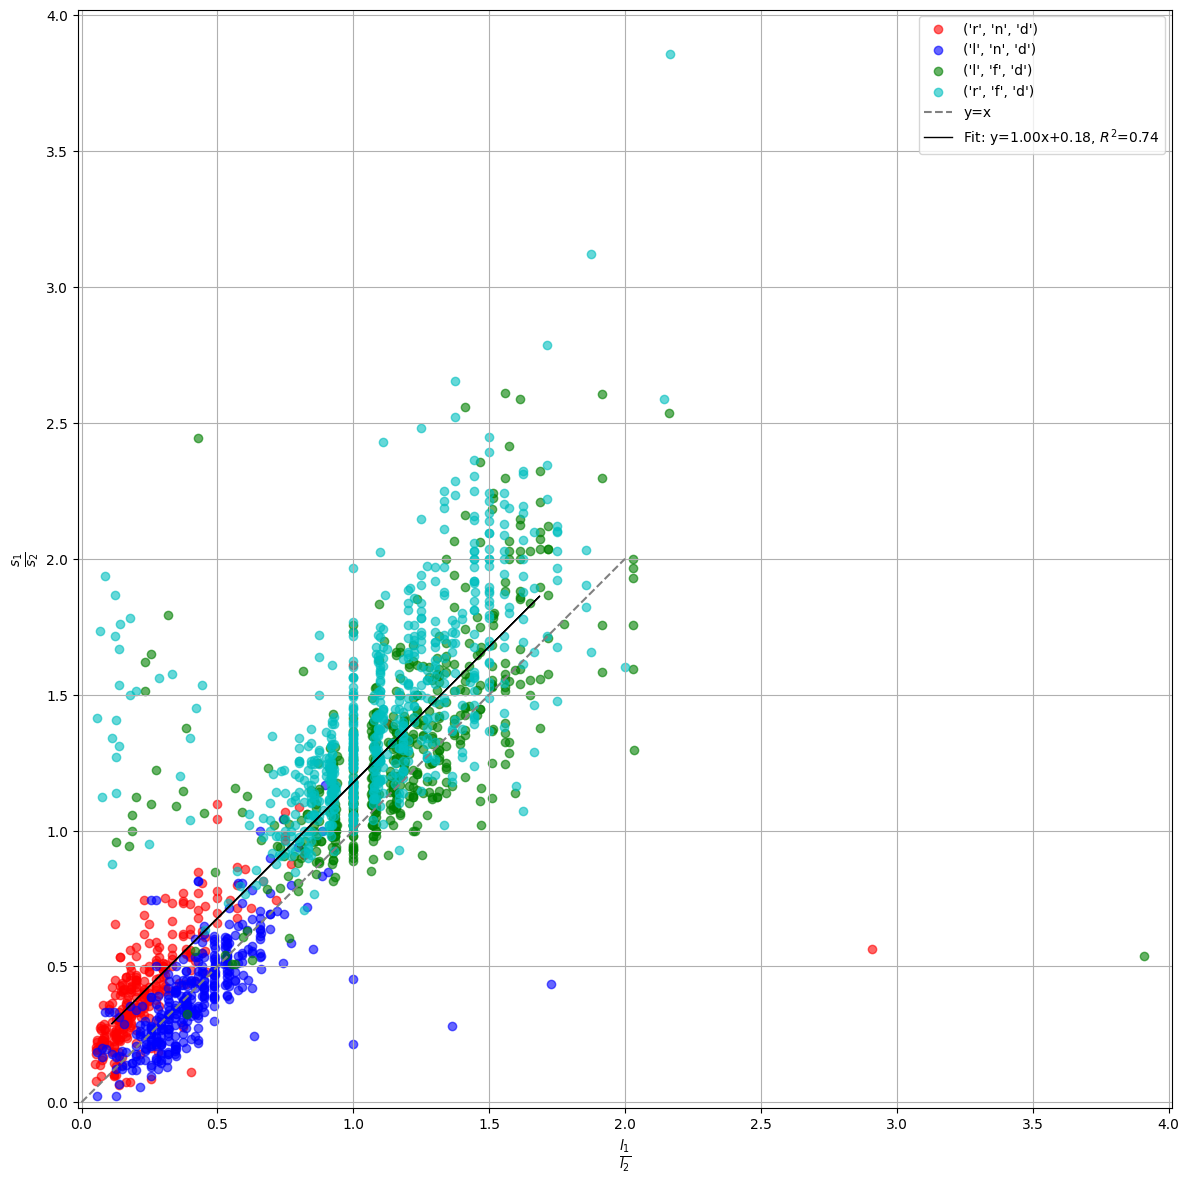

Scatter plot saved to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/physical_law.pdf


/tmp/ipykernel_2788341/1311797152.py:135: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages(output_pdf_path) as pdf:


In [2]:
# Enhanced
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    sun_lower = np.array([0, 50, 200])
    sun_upper = np.array([60, 255, 255])
    pole_lower = np.array([90, 50, 50])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 0])
    shadow_upper = np.array([180, 150, 220])
    # sun_lower = np.array([0, 100, 200])
    # sun_upper = np.array([30, 255, 255])
    # pole_lower = np.array([90, 100, 100])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 50])
    # shadow_upper = np.array([180, 50, 150])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])

        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

            


        # 计算 l1 和 l2
        l1 = abs(shadow_tail[0] - pole_top[0])
        l2 = abs(pole_top[1] - shadow_tail[1])
        # print(l1,l2)
        if l2 == 0 or s2 == 0:
            return None

        # 在图像上标记s1, s2, l1, l2
        cv2.line(img, (sun_cx, sun_cy), (pole_cx, sun_cy), (0, 255, 0), 2)  # s1
        cv2.line(img, (sun_cx, sun_cy), (sun_cx, pole_top[1]), (255, 0, 0), 2)  # s2
        cv2.line(img, (pole_top[0], shadow_tail[1]), (shadow_tail[0], shadow_tail[1]), (0, 0, 255), 2)  # l1
        cv2.line(img, (pole_top[0], pole_top[1]), (pole_top[0], shadow_tail[1]), (255, 255, 0), 2)  # l2

        # 添加文本标签
        cv2.putText(img, 's1', (pole_cx, sun_cy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv2.putText(img, 's2', (sun_cx + 5, (sun_cy + pole_top[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        cv2.putText(img, 'l1', ((pole_top[0] + shadow_tail[0]) // 2, shadow_tail[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        cv2.putText(img, 'l2', (pole_top[0] + 5, (pole_top[1] + shadow_tail[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

        return l1/l2, s1/s2, np.abs((s1/s2)/(l1/l2)-1)
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

def process_folder(folder_path,target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)
    ratios = []

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                # print(image_path,analyze_image(image_path,target_size=target_size))
                results = analyze_image(image_path,target_size=target_size)
                if results:
                    result_1,result_2,ratio = results
                    data[category].append(((result_1,result_2), image_path))
                    ratios.append(ratio)
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            results = analyze_image(image_path)
            if results:
                result_1,result_2,ratio = results
                data["all_images"].append(((result_1,result_2), image_path))
                ratios.append(ratio)

    return data,ratios

def plot_scatter(data,ratios, output_pdf_path):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(12, 12))
        colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
        all_points = []
        
        for (category, points), color in zip(data.items(), colors):
            x, y = zip(*[p[0] for p in points])
            plt.scatter(x, y, c=color, label=category, alpha=0.6)
            all_points.extend(points)

        plt.plot([0, 2], [0, 2], 'k--', label='y=x', color='gray')
        plt.xlabel(r'$\frac{l_1}{l_2}$', fontsize=14)
        plt.ylabel(r'$\frac{s_1}{s_2}$', fontsize=14)
        plt.grid(True)
        plt.axis('equal')
        plt.xlim(0, 4)
        plt.ylim(0, 4)

        # 只使用95%区间内的点进行拟合
        x_all = np.array([p[0][0] for p in all_points])
        y_all = np.array([p[0][1] for p in all_points])
        
        # 计算x和y的2.5%和97.5%百分位数
        x_low, x_high = np.percentile(x_all, [2.5, 97.5])
        y_low, y_high = np.percentile(y_all, [2.5, 97.5])
        
        # 筛选在95%区间内的点
        mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
        x_filtered = x_all[mask].reshape(-1, 1)
        y_filtered = y_all[mask]
        # print(y_filtered ,ratios)
        ratios = np.array(ratios)[mask]
        print(np.max(ratios))
        print(f"Variance error {np.var(ratios)}")
        print(f"Mean Error {np.mean(ratios)}")

        # 使用筛选后的点进行拟合
        lin_reg = LinearRegression()
        lin_reg.fit(x_filtered, y_filtered)
        y_pred = lin_reg.predict(x_filtered)
        r2 = r2_score(y_filtered, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_filtered, y_pred, color='black', linewidth=1, 
                 label=f'Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        plt.legend()
        plt.tight_layout()
        # pdf.savefig()  # 保存当前图像到PDF
        plt.show()
        plt.close()

    print(f"Scatter plot saved to {output_pdf_path}")

# 使用示例
folder_path = "/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345"
output_pdf_path = os.path.join(folder_path, "physical_law.pdf")
data,ratios = process_folder(folder_path, target_size=128)

plot_scatter(data,ratios, output_pdf_path)


In [17]:
np.var(ratios)

0.0614154093750863

In [3]:
import os
import shutil
import glob

def move_and_rename_images(source_dir, target_dir):
    """
    Moves images from source_dir to target_dir and renames them sequentially.

    Args:
        source_dir (str): Path to the source directory containing images.
        target_dir (str): Path to the target directory where images will be moved.
    """
    
    # Create the target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Find all PNG images in the source directory
    image_files = sorted(glob.glob(os.path.join(source_dir, "*.png")))

    # Start renaming images from contrastive_ternary_region_3000.png
    start_index = 3000

    for i, image_file in enumerate(image_files):
        # Create the new filename
        new_filename = f"contrastive_ternary_{start_index + i}.png"
        target_file = os.path.join(target_dir, new_filename)
        
        # Move and rename the image
        shutil.move(image_file, target_file)
        print(f"Moved and renamed: {os.path.basename(image_file)} to {new_filename}")
        

if __name__ == "__main__":
    source_dir = "/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_cfg7/vis/epoch_400_1734928793.401018"
    target_dir = "/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_cfg7/vis/epoch_400_1734924465.4797819_class1"
    move_and_rename_images(source_dir, target_dir)
    print("Image move and rename process completed!")

Moved and renamed: contrastive_ternary.png to contrastive_ternary_3000.png
Moved and renamed: contrastive_ternary_0.png to contrastive_ternary_3001.png
Moved and renamed: contrastive_ternary_1.png to contrastive_ternary_3002.png
Moved and renamed: contrastive_ternary_10.png to contrastive_ternary_3003.png
Moved and renamed: contrastive_ternary_100.png to contrastive_ternary_3004.png
Moved and renamed: contrastive_ternary_1000.png to contrastive_ternary_3005.png
Moved and renamed: contrastive_ternary_1001.png to contrastive_ternary_3006.png
Moved and renamed: contrastive_ternary_1002.png to contrastive_ternary_3007.png
Moved and renamed: contrastive_ternary_1003.png to contrastive_ternary_3008.png
Moved and renamed: contrastive_ternary_1004.png to contrastive_ternary_3009.png
Moved and renamed: contrastive_ternary_1005.png to contrastive_ternary_3010.png
Moved and renamed: contrastive_ternary_1006.png to contrastive_ternary_3011.png
Moved and renamed: contrastive_ternary_1007.png to con

In [44]:
import cv2
import numpy as np
import os
import glob

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    sun_lower = np.array([0, 50, 200])
    sun_upper = np.array([60, 255, 255])
    pole_lower = np.array([90, 50, 50])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 0])
    shadow_upper = np.array([180, 150, 220])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])
        
        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

        # 计算 l1 和 l2
        l1 = abs(shadow_tail[0] - pole_top[0])
        l2 = abs(pole_top[1] - shadow_tail[1])

        if l2 == 0 or s2 == 0:
             return None
        
        return l1 / l2, s1 / s2, image_path  # 返回l1/l2, s1/s2, 以及图像路径
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None


def process_folder(folder_path, target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    deleted_image_names = []

    if txt_files:
        for txt_file in txt_files:
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path, target_size=target_size)
                if result:
                    l1_over_l2, s1_over_s2, image_path = result
                    if l1_over_l2 < 0.5 and s1_over_s2 > 1:
                        try:
                           os.remove(image_path)
                           deleted_image_names.append(os.path.basename(image_path))
                        except Exception as e:
                           print(f"Error deleting image {image_path}: {str(e)}")
    else:
        print(f"No txt files found in {folder_path}")

    return deleted_image_names
    

if __name__ == "__main__":
    folder_path = "/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1"
    deleted_images = process_folder(folder_path, target_size=128)

    if deleted_images:
        print("Deleted images:")
        for image_name in deleted_images:
            print(image_name)
    else:
      print("No images were deleted.")

[ WARN:0@5863.448] global loadsave.cpp:241 findDecoder imread_('/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1/contrastive_ternary_region_1123.png'): can't open/read file: check file path/integrity
[ WARN:0@5863.489] global loadsave.cpp:241 findDecoder imread_('/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1/contrastive_ternary_region_1820.png'): can't open/read file: check file path/integrity
[ WARN:0@5863.522] global loadsave.cpp:241 findDecoder imread_('/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1/contrastive_ternary_region_244.png'): can't open/read file: check file path/integrity
[ WARN:0@5863.535] global loadsave.cpp:241 findDecoder imread_('/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1/contrastive_ternary_region_2647.png'

Deleted images:
contrastive_ternary_region_2694.png
contrastive_ternary_region_267.png
contrastive_ternary_region_1485.png
contrastive_ternary_region_1958.png
contrastive_ternary_region_3127.png
contrastive_ternary_region_4134.png
contrastive_ternary_region_4172.png
contrastive_ternary_region_45.png
contrastive_ternary_region_5147.png
contrastive_ternary_region_111.png
contrastive_ternary_region_462.png


[ WARN:0@5863.937] global loadsave.cpp:241 findDecoder imread_('/cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_region_cfg7/vis/epoch_400_1734875329.8062572_class1/contrastive_ternary_region_5203.png'): can't open/read file: check file path/integrity


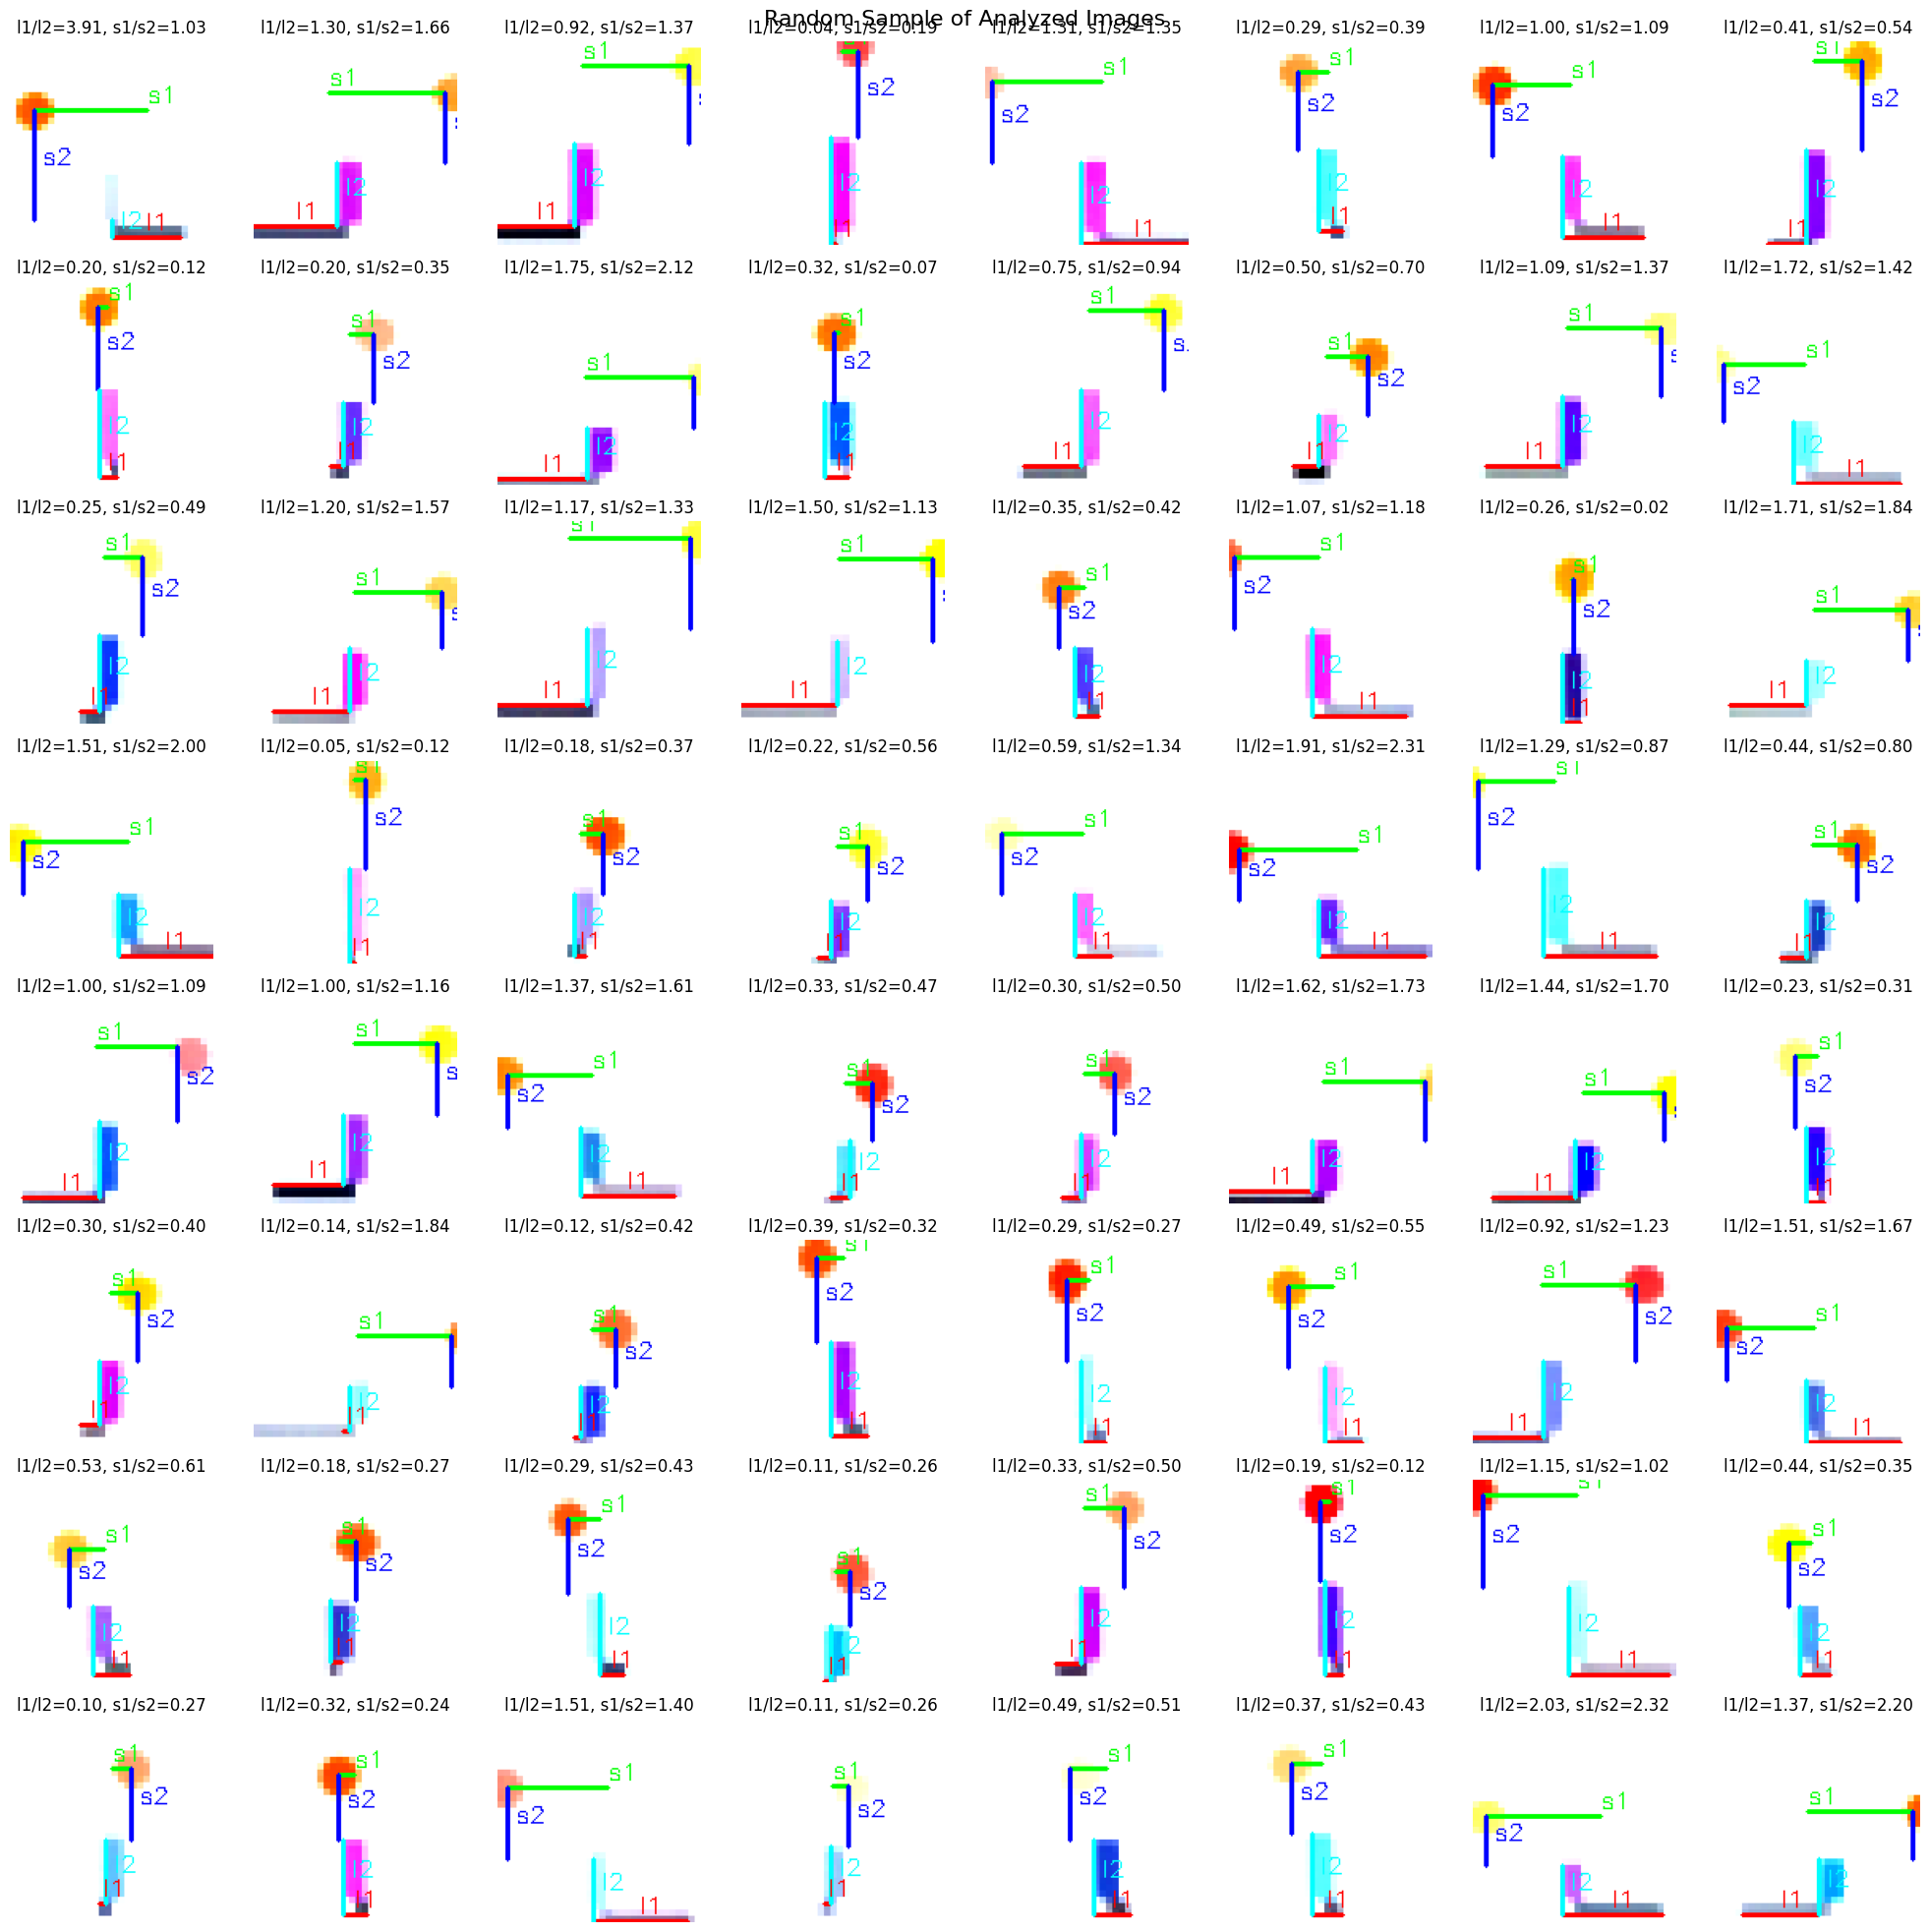

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from collections import defaultdict
import random

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    sun_lower = np.array([0, 50, 200])
    sun_upper = np.array([60, 255, 255])
    pole_lower = np.array([90, 50, 50])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 0])
    shadow_upper = np.array([180, 150, 220])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])

        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

            


        # 计算 l1 和 l2
        l1 = abs(shadow_tail[0] - pole_top[0])
        l2 = abs(pole_top[1] - shadow_tail[1])

        if l2 == 0 or s2 == 0:
            return None

        # 在图像上标记s1, s2, l1, l2
        cv2.line(img, (sun_cx, sun_cy), (pole_cx, sun_cy), (0, 255, 0), 2)  # s1
        cv2.line(img, (sun_cx, sun_cy), (sun_cx, pole_top[1]), (255, 0, 0), 2)  # s2
        cv2.line(img, (pole_top[0], shadow_tail[1]), (shadow_tail[0], shadow_tail[1]), (0, 0, 255), 2)  # l1
        cv2.line(img, (pole_top[0], pole_top[1]), (pole_top[0], shadow_tail[1]), (255, 255, 0), 2)  # l2

        # 添加文本标签
        cv2.putText(img, 's1', (pole_cx, sun_cy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv2.putText(img, 's2', (sun_cx + 5, (sun_cy + pole_top[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        cv2.putText(img, 'l1', ((pole_top[0] + shadow_tail[0]) // 2, shadow_tail[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        cv2.putText(img, 'l2', (pole_top[0] + 5, (pole_top[1] + shadow_tail[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

        return l1/l2, s1/s2, img
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

def process_folder(folder_path, target_size):
    image_files = glob.glob(os.path.join(folder_path, "*.png"))
    data = []
    
    for image_path in image_files:
        result = analyze_image(image_path, target_size=target_size)
        if result:
            data.append((result[0], result[1], result[2], image_path))
    
    return data

def plot_images(data, rows=8, cols=8):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    fig.suptitle("Random Sample of Analyzed Images", fontsize=16)
    
    sample_data = random.sample(data, rows * cols) if len(data) > rows * cols else data
    
    for i, (l1l2, s1s2, img, path) in enumerate(sample_data):
        row = i // cols
        col = i % cols
        axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[row, col].set_title(f"l1/l2={l1l2:.2f}, s1/s2={s1s2:.2f}")
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# 使用示例
# folder_path = "/cpfs01/user/hanyujin/causal-dm/results/sunshadow_contrastive_ternary/vis/epoch_400_1734398963.0294938_class1"
data = process_folder(folder_path, target_size=128)
plot_images(data)

/tmp/ipykernel_420486/3189839538.py:117: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.25], [0, 0.25], 'k--', label='Ground Truth: y=x',color='gray')


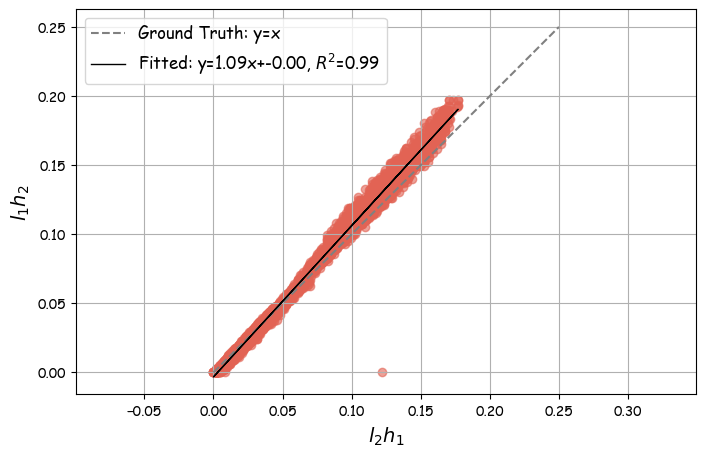

Scatter plot saved to /cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd/physical_law.pdf


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import font_manager as fm
comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")
# colors = ['#568CA9' if diff >= 0 else '#E26354' for diff in diff_values]
def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 使用提供的颜色范围
    sun_lower = np.array([0, 100, 200])
    sun_upper = np.array([30, 255, 255])
    pole_lower = np.array([90, 100, 100])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 50])
    shadow_upper = np.array([180, 50, 150])
    # sun_lower = np.array([0, 50, 200])
    # sun_upper = np.array([60, 255, 255])
    # pole_lower = np.array([90, 50, 50])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 0])
    # shadow_upper = np.array([180, 150, 220])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx) # l1
        s2 = abs(sun_cy - pole_top[1]) # h1
        l2 = abs(pole_bottom[1] - pole_top[1]) # h2
        l1 = abs(shadow_right[0] - shadow_left[0]) # l2

        if l2 == 0 or s2 == 0:
            return None  # 跳过分母为0的情况

        return s1*l2/(target_size)**2, s2*l1/(target_size)**2
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

def process_folder(folder_path,target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path,target_size=target_size)
                if result:
                    data[category].append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            result = analyze_image(image_path)
            if result:
                data["all_images"].append((result, image_path))

    return data

def plot_scatter(data, output_pdf_path):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(8, 5))
        colors = ['#E26354']
        all_points = []
        
        for (category, points), color in zip(data.items(), colors):
            x, y = zip(*[p[0] for p in points])
            plt.scatter(x, y, c=color, alpha=0.6)
            all_points.extend(points)

        plt.plot([0, 0.25], [0, 0.25], 'k--', label='Ground Truth: y=x',color='gray')
        plt.xlabel(r'$l_2h_1$', fontsize=14)
        plt.ylabel(r'$l_1h_2$', fontsize=14)
        plt.grid(True)
        plt.axis('equal')
        # plt.xlim(0, 0.3)
        # plt.ylim(0, 0.3)

        # 拟合直线并计算 R^2
        x_all = np.array([p[0][0] for p in all_points]).reshape(-1, 1)
        y_all = np.array([p[0][1] for p in all_points])
        lin_reg = LinearRegression()
        lin_reg.fit(x_all, y_all)
        y_pred = lin_reg.predict(x_all)
        r2 = r2_score(y_all, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_all, y_pred, color='black', linewidth=1, label=f'Fitted: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        plt.legend(fontsize=12)
        # plt.tight_layout()
        pdf.savefig()  # 保存当前图像到PDF
        plt.show()
        plt.close()

    print(f"Scatter plot saved to {output_pdf_path}")

# 使用示例
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd"
folder_path = base_path + "/images"
output_pdf_path = os.path.join(base_path, "physical_law.pdf")
data = process_folder(folder_path,target_size=128)
plot_scatter(data, output_pdf_path)

# DataSize & Model Capacity

In [148]:
import os
import glob

def count_png_files(directory):
    # 使用glob模块查找所有的png文件
    png_files = glob.glob(os.path.join(directory, "*.png"))
    return len(png_files)

# 指定路径
directory = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_rnd_rfs_lns/images"

# 计算PNG文件数量
num_png_files = count_png_files(directory)

print(f"Number of PNG files in '{directory}': {num_png_files}")

Number of PNG files in '/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_rnd_rfs_lns/images': 3913


In [1]:
def count_parameters(in_channel, out_channel, channel, time_channel, image_size):
    params = 0
    
    # inc
    params += 2 * (in_channel * channel[1] * 3 * 3 + channel[1])
    
    # down1, down2, down3
    params += 2 * (channel[1] * channel[2] * 3 * 3 + channel[2]) + (time_channel * channel[2])
    params += 2 * (channel[2] * channel[3] * 3 * 3 + channel[3]) + (time_channel * channel[3])
    params += 2 * (channel[3] * channel[3] * 3 * 3 + channel[3]) + (time_channel * channel[3])
    
    # sa1, sa2, sa3
    params += 3 * (channel[2] * channel[2]) + channel[2]
    params += 3 * (channel[3] * channel[3]) + channel[3]
    params += 3 * (channel[3] * channel[3]) + channel[3]
    
    # bot1, bot2, bot3
    params += 2 * (channel[3] * channel[4] * 3 * 3 + channel[4])
    params += 2 * (channel[4] * channel[4] * 3 * 3 + channel[4])
    params += 2 * (channel[4] * channel[3] * 3 * 3 + channel[3])
    
    # up1, up2, up3
    params += 2 * (channel[4] * channel[2] * 3 * 3 + channel[2]) + (time_channel * channel[2]) + (channel[4] * channel[2] * 2 * 2)
    params += 2 * (channel[3] * channel[1] * 3 * 3 + channel[1]) + (time_channel * channel[1]) + (channel[3] * channel[1] * 2 * 2)
    params += 2 * (channel[2] * channel[1] * 3 * 3 + channel[1]) + (time_channel * channel[1]) + (channel[2] * channel[1] * 2 * 2)
    
    # sa4, sa5, sa6
    params += 3 * (channel[2] * channel[2]) + channel[2]
    params += 3 * (channel[1] * channel[1]) + channel[1]
    params += 3 * (channel[1] * channel[1]) + channel[1]
    
    # outc
    params += channel[1] * out_channel * 1 * 1 + out_channel
    
    return params

total_params = count_parameters(4, 4, [4, 64, 128, 256, 512], 256, 32)
print(f"Total parameters: {total_params}")

Total parameters: 14092292


# Memorization

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.neighbors import NearestNeighbors
import json
from tqdm import tqdm

def analyze_image(image_path, target_size=128, is_generated=True):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if is_generated:
        sun_lower = np.array([0, 50, 200])
        sun_upper = np.array([60, 255, 255])
        pole_lower = np.array([90, 50, 50])
        pole_upper = np.array([150, 255, 255])
        shadow_lower = np.array([0, 0, 0])
        shadow_upper = np.array([180, 150, 220])
    else:
        sun_lower = np.array([0, 100, 200])
        sun_upper = np.array([30, 255, 255])
        pole_lower = np.array([90, 100, 100])
        pole_upper = np.array([150, 255, 255])
        shadow_lower = np.array([0, 0, 50])
        shadow_upper = np.array([180, 50, 150])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])

        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

        # 计算 l1 和 l2
        l1 = (shadow_tail[0] - pole_top[0])
        l2 = (pole_top[1] - shadow_tail[1])
        if l2 == 0 or s2 == 0:
            return None

        sun_color = cv2.mean(img, mask=sun_mask)[:3]
        pole_color = cv2.mean(img, mask=pole_mask)[:3]
        shadow_color = cv2.mean(img, mask=shadow_mask)[:3]

        return {
            'coords': [l1, l2, s1, s2],
            'colors': list(sun_color) + list(pole_color) + list(shadow_color)
        }
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

def process_folder(folder_path, target_size, is_generated=True):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = []

    if txt_files:
        for txt_file in txt_files:
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path, target_size, is_generated)
                if result:
                    data.append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            result = analyze_image(image_path, target_size, is_generated)
            if result:
                data.append((result, image_path))

    return data

import numpy as np
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import os
import json

def calculate_memory_rate(generated_data, train_data, thresholds, image_size, output_folder):
    nn_4d = NearestNeighbors(n_neighbors=1, metric='euclidean')
    nn_13d = NearestNeighbors(n_neighbors=1, metric='euclidean')

    train_coords = np.array([d[0]['coords'] for d in train_data])
    train_features = np.array([d[0]['coords'] + d[0]['colors'] for d in train_data])

    print("Fitting nearest neighbors models...")
    nn_4d.fit(train_coords)
    nn_13d.fit(train_features)

    memory_counts_4d = {t: 0 for t in thresholds}
    memory_counts_13d = {t: 0 for t in thresholds}
    
    # 创建一个字典来存储每个阈值下被记忆的图片
    memorized_images_4d = {t: set() for t in thresholds}
    memorized_images_13d = {t: set() for t in thresholds}

    print("Calculating memory rates...")
    for gen_data, image_path in tqdm(generated_data, desc="Processing generated data", unit="image"):
        gen_coords = np.array(gen_data['coords']).reshape(1, -1)
        gen_features = np.array(gen_data['coords'] + gen_data['colors']).reshape(1, -1)

        dist_4d, _ = nn_4d.kneighbors(gen_coords)
        dist_13d, _ = nn_13d.kneighbors(gen_features)

        scaled_dist_4d = dist_4d[0][0] / (image_size*np.sqrt(2))
        scaled_dist_13d = dist_13d[0][0] / (image_size*np.sqrt(2))

        for t in thresholds:
            if scaled_dist_4d < t:
                memory_counts_4d[t] += 1
                memorized_images_4d[t].add(os.path.basename(image_path))
            if scaled_dist_13d < t:
                memory_counts_13d[t] += 1
                memorized_images_13d[t].add(os.path.basename(image_path))

    total_images = len(generated_data)
    
    # 创建包含总数和比率的字典
    memory_rates_4d = {t: {"count": count, "rate": count / total_images} for t, count in memory_counts_4d.items()}
    memory_rates_13d = {t: {"count": count, "rate": count / total_images} for t, count in memory_counts_13d.items()}

    # 保存被记忆的图片到文本文件
    for t in thresholds:
        output_file_4d = os.path.join(output_folder, f"memorized_images_threshold_{t}_4d.txt")
        with open(output_file_4d, 'w') as f:
            for image_name in sorted(memorized_images_4d[t]):
                f.write(f"{image_name}\n")
        print(f"Memorized images for threshold {t} (4D) saved to {output_file_4d}")
        print(f"Number of memorized images for threshold {t} (4D): {len(memorized_images_4d[t])}")
        
        output_file_13d = os.path.join(output_folder, f"memorized_images_threshold_{t}_13d.txt")
        with open(output_file_13d, 'w') as f:
            for image_name in sorted(memorized_images_13d[t]):
                f.write(f"{image_name}\n")
        print(f"Memorized images for threshold {t} (13D) saved to {output_file_13d}")
        print(f"Number of memorized images for threshold {t} (13D): {len(memorized_images_13d[t])}")

    # 保存记忆率和计数到JSON文件
    memory_rates_json = {
        "4D": memory_rates_4d,
        "13D": memory_rates_13d
    }
    with open(os.path.join(output_folder, "memory_rates.json"), 'w') as f:
        json.dump(memory_rates_json, f, indent=4)
    
    print(f"Memory rates and counts saved to {os.path.join(output_folder, 'memory_rates.json')}")

    return memory_rates_4d, memory_rates_13d




In [6]:
# Main execution
generated_folder = "/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345"
train_folder = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_lfd_lnd_rfd_rnd/images"
output_folder = generated_folder
target_size = 128
thresholds = [0,0.01,0.03, 0.05, 0.08, 0.1,0.2, 0.3, 0.5,0.7,0.9,1]

generated_data = process_folder(generated_folder, target_size, is_generated=True)
train_data = process_folder(train_folder, target_size, is_generated=False)

# Filter generated data
filtered_generated_data = [
    (data, path) for data, path in generated_data 
    if 0.99 <= (data['coords'][0] * data['coords'][3]) / (data['coords'][1] * data['coords'][2]) <= 1.01
]

memory_rates_4d, memory_rates_13d = calculate_memory_rate(filtered_generated_data, train_data, thresholds, target_size,output_folder)

[ WARN:0@302.013] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1184.png'): can't open/read file: check file path/integrity
[ WARN:0@302.096] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1485.png'): can't open/read file: check file path/integrity
[ WARN:0@302.197] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1846.png'): can't open/read file: check file path/integrity
[ WARN:0@302.250] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_2013.png'): can't open/read file: check file path/integrity
[ WARN:0@302.330] global loadsave.cpp:241 findDe

Fitting nearest neighbors models...
Calculating memory rates...


Processing generated data: 100%|██████████| 10/10 [00:00<00:00, 1523.98image/s]

Memorized images for threshold 0 (4D) saved to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/memorized_images_threshold_0_4d.txt
Number of memorized images for threshold 0 (4D): 0
Memorized images for threshold 0 (13D) saved to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/memorized_images_threshold_0_13d.txt
Number of memorized images for threshold 0 (13D): 0
Memorized images for threshold 0.01 (4D) saved to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/memorized_images_threshold_0.01_4d.txt
Number of memorized images for threshold 0.01 (4D): 2
Memorized images for threshold 0.01 (13D) saved to /cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/memorized_images_threshold_0.01_13d.txt
Number of memorized images for threshold 0.01 (13D): 0
Memorized images for threshold 0.03 (4D) sav

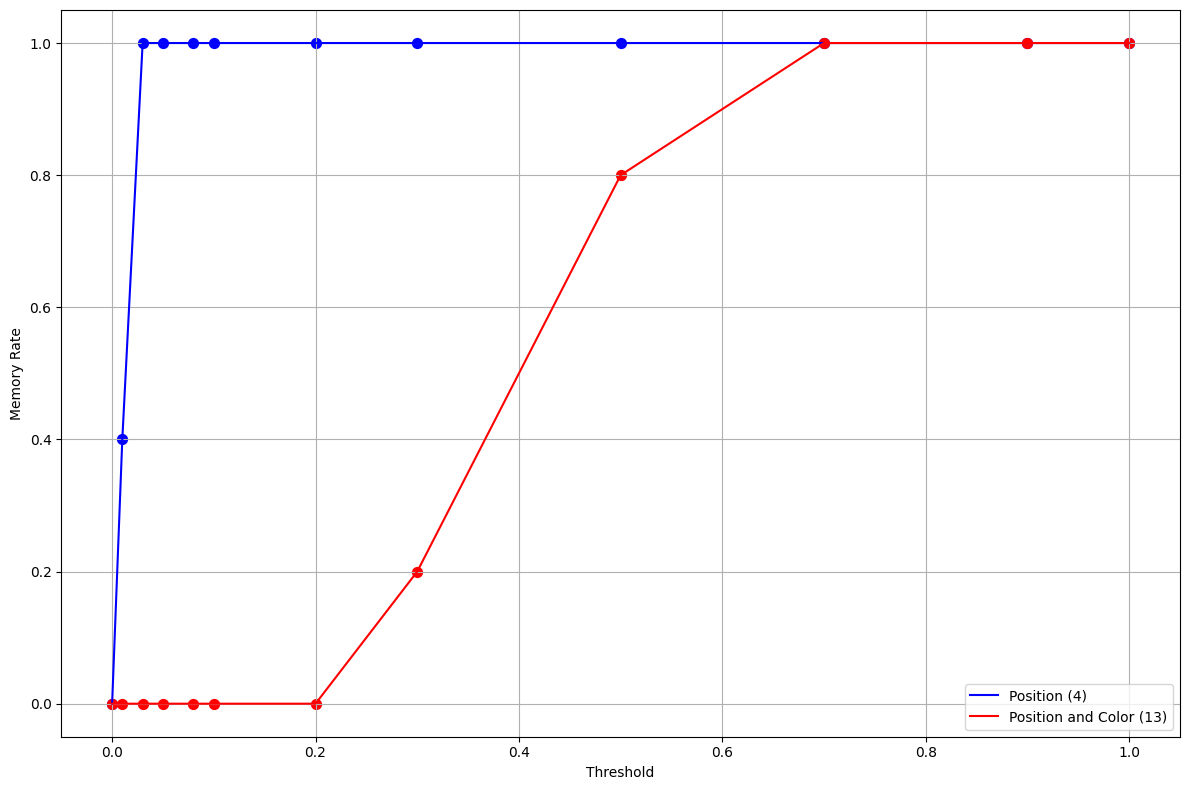

Memory rate plot saved to /cpfs01/user/hanyujin/causal-dm/results/contrastive_ternary_cfg7/vis/epoch_400_1734924465.4797819_class1/memory_rates.pdf


In [5]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

def plot_memory_rates(memory_rates_4d, memory_rates_13d, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    output_pdf_path = os.path.join(output_folder, "memory_rates.pdf")
    
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(12, 8))
        
        # 4D数据
        x_4d = list(memory_rates_4d.keys())
        y_4d = [data['rate'] for data in memory_rates_4d.values()]
        plt.plot(x_4d, y_4d, 'b-', label='Position (4)')
        plt.scatter(x_4d, y_4d, color='blue', s=50)
        
        # 13D数据
        x_13d = list(memory_rates_13d.keys())
        y_13d = [data['rate'] for data in memory_rates_13d.values()]
        plt.plot(x_13d, y_13d, 'r-', label='Position and Color (13)')
        plt.scatter(x_13d, y_13d, color='red', s=50)
        
        plt.xlabel('Threshold')
        plt.ylabel('Memory Rate')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        
        # 保存图像
        pdf.savefig()
        
        # 显示图像
        plt.show()
        plt.close()

    print(f"Memory rate plot saved to {output_pdf_path}")

# 使用函数
plot_memory_rates(memory_rates_4d, memory_rates_13d, output_folder)

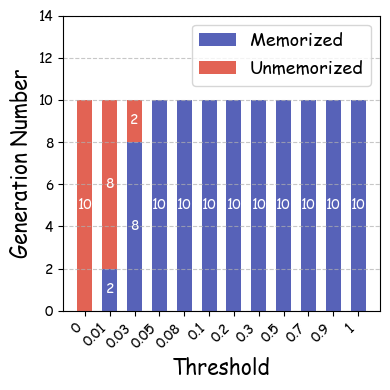

Memory rate plot saved to /cpfs04/user/hanyujin/causal-dm/example/taska_memory_rates_4d.pdf


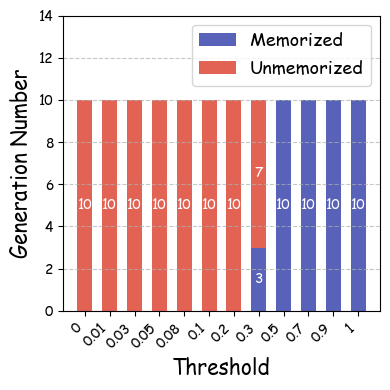

Memory rate plot saved to /cpfs04/user/hanyujin/causal-dm/example/taska_memory_rates_13d.pdf


In [22]:
import matplotlib.pyplot as plt
import os
from matplotlib import font_manager as fm
comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")

def get_total_count(data):
    for key, value in data.items():
        if value['rate'] == 1.0:
            return value['count']
    return 0

def plot_memory_rates(mr_data, filename):
    total_count = get_total_count(mr_data)

    keys = list(mr_data.keys())
    mem_data = [total_count * mr_data[key]['rate'] for key in keys]
    unmem_data = [total_count * (1 - mr_data[key]['rate']) for key in keys]

    bar_width = 0.6  # 增加柱子宽度
    index = range(len(keys))

    fig, ax = plt.subplots(figsize=(4, 4))  # 增加图表大小

    bar1 = ax.bar(index, mem_data, bar_width, label='Memorized', color='#5762b8')
    bar2 = ax.bar(index, unmem_data, bar_width, bottom=mem_data, label='Unmemorized', color='#E26354')


    ax.set_xlabel('Threshold', fontsize=15)
    ax.set_ylabel('Generation Number', fontsize=15)
    ax.set_xticks(index)
    ax.set_xticklabels(keys, rotation=45, ha='right')
    ax.set_ylim(0, total_count * 1.4)
    ax.legend(fontsize=13)

    # 添加水平网格线
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # 在柱子上标记数值
    for i in range(len(keys)):
        if mem_data[i] !=0:
            ax.text(i, mem_data[i] / 2, f'{mem_data[i]:.0f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        if unmem_data[i] !=0:
            ax.text(i, mem_data[i] + unmem_data[i] / 2, f'{unmem_data[i]:.0f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    plt.tight_layout()
    filepath = os.path.join("/cpfs04/user/hanyujin/causal-dm/example", filename)
    plt.savefig(filepath + '.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f"Memory rate plot saved to {filepath}.pdf")

# 画图并保存
plot_memory_rates(memory_rates_4d, 'taska_memory_rates_4d')
plot_memory_rates(memory_rates_13d, 'taska_memory_rates_13d')

[ WARN:0@1480.239] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1184.png'): can't open/read file: check file path/integrity
[ WARN:0@1480.315] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1485.png'): can't open/read file: check file path/integrity
[ WARN:0@1480.408] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_1846.png'): can't open/read file: check file path/integrity
[ WARN:0@1480.455] global loadsave.cpp:241 findDecoder imread_('/cpfs04/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_400_1733622674.3212345/sunshadowweight_2013.png'): can't open/read file: check file path/integrity
[ WARN:0@1480.525] global loadsave.cpp:241 f

All Points: 1387


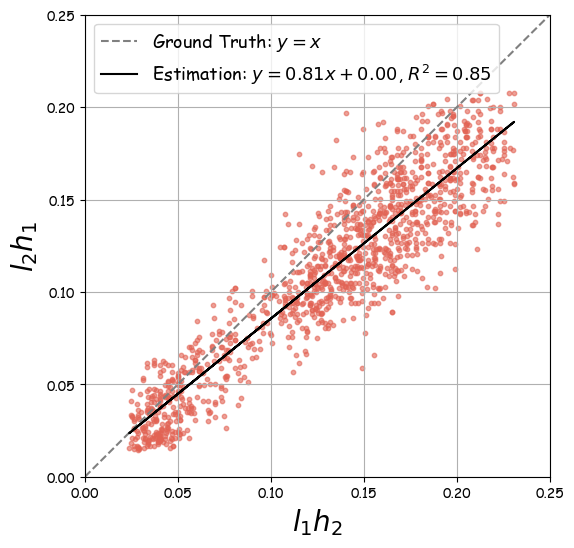

Scatter plot saved to /cpfs04/user/hanyujin/causal-dm/example/taska_rule_unmem_t0.1_4D.pdf


In [27]:
# Enhanced
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 使用提供的颜色范围
    sun_lower = np.array([0, 50, 200])
    sun_upper = np.array([60, 255, 255])
    pole_lower = np.array([90, 50, 50])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 0])
    shadow_upper = np.array([180, 150, 220])
    # sun_lower = np.array([0, 100, 200])
    # sun_upper = np.array([30, 255, 255])
    # pole_lower = np.array([90, 100, 100])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 50])
    # shadow_upper = np.array([180, 50, 150])


    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])


        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])

        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

            


        # 计算 l1 和 l2
        l1 = abs(shadow_tail[0] - pole_top[0])
        l2 = abs(pole_top[1] - shadow_tail[1])

        if l2 == 0 or s2 == 0:
            return None  # 跳过分母为0的情况

        return (s1 * l2) / (target_size ** 2), (s2 * l1) / (target_size ** 2)
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None


def process_folder(folder_path, target_size, excluded_images=None):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)

    if excluded_images is None:
        excluded_images = set()
    else:
        excluded_images = set(excluded_images)

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                if image_id not in excluded_images:
                    image_path = os.path.join(folder_path, image_id)
                    result = analyze_image(image_path, target_size=target_size)
                    if result:
                        data[category].append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            if os.path.basename(image_path) not in excluded_images:
                result = analyze_image(image_path)
                if result:
                    data["all_images"].append((result, image_path))

    return data

def plot_scatter(data, output_pdf_path,coords_to_use):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(6, 6))
        color = '#E26354'  # 统一的颜色
        all_points = []

        # 遍历所有 key 下的数值
        for points in data.values():
            all_points.extend(points)  # 合并所有点

        x_all = np.array([p[0][coords_to_use[0]] for p in all_points])
        y_all = np.array([p[0][coords_to_use[1]] for p in all_points])
        
        # 绘制所有点的散点图
       

        # 绘制参考线
        plt.plot([0, 0.3], [0, 0.3], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        plt.xlabel(r'$l_1h_2$', fontsize=20)
        plt.ylabel(r'$l_2h_1$', fontsize=20)
        plt.grid(True)
        # plt.axis('equal')

        # 计算 x 和 y 的 2.5% 和 97.5% 百分位数
        x_low, x_high = np.percentile(x_all, [2.5, 97.5])
        y_low, y_high = np.percentile(y_all, [2.5, 97.5])

        # 筛选在 95% 区间内的点
        mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high) & ~((0.10 < x_all) & (y_all < 0.05))
        x_filtered = x_all[mask].reshape(-1, 1)
        y_filtered = y_all[mask]
        # ratios = np.array(ratios)[mask]  # 筛选对应的比率
        plt.scatter(x_filtered ,y_filtered , c=color, alpha=0.6, s=10)

        # 打印比率的统计信息
        print("All Points:", len(all_points))
        # print("Filtered Ratios:", len(ratios))
        # print(f"Max Ratio: {np.max(ratios)}")
        # print(f"Variance Error: {np.var(ratios)}")
        # print(f"Mean Error: {np.mean(ratios)}")

        # 使用筛选后的点进行拟合
        lin_reg = LinearRegression()
        lin_reg.fit(x_filtered, y_filtered)
        y_pred = lin_reg.predict(x_filtered)
        r2 = r2_score(y_filtered, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_filtered, y_pred, color='black', 
                 label=f'Estimation: $y={slope:.2f}x+{intercept:.2f}$, $R^2={r2:.2f}$')

        # 设置图例和布局
        plt.legend(fontsize=13)
        # plt.tight_layout()
        plt.xlim(0,0.25)
        plt.ylim(0,0.25)
        pdf.savefig()  # 保存当前图像到 PDF
        plt.show()
        plt.close()

    print(f"Scatter plot saved to {output_pdf_path}")

# 使用示例
folder_path = generated_folder
threshold = 0.1
coords_to_use = [0, 1]  # 使用4维坐标
output_pdf_path = os.path.join("/cpfs04/user/hanyujin/causal-dm/example", f"taska_rule_unmem_t{threshold}_4D.pdf")

# 读取被记忆的图片列表
memorized_images_file = os.path.join(folder_path, f"memorized_images_threshold_{threshold}_4d.txt")
with open(memorized_images_file, 'r') as f:
    memorized_images = [line.strip() for line in f.readlines()]

# 处理文件夹并排除被记忆的图片
data = process_folder(folder_path, target_size=128, excluded_images=memorized_images)

# 绘制散点图
plot_scatter(data, output_pdf_path, coords_to_use)

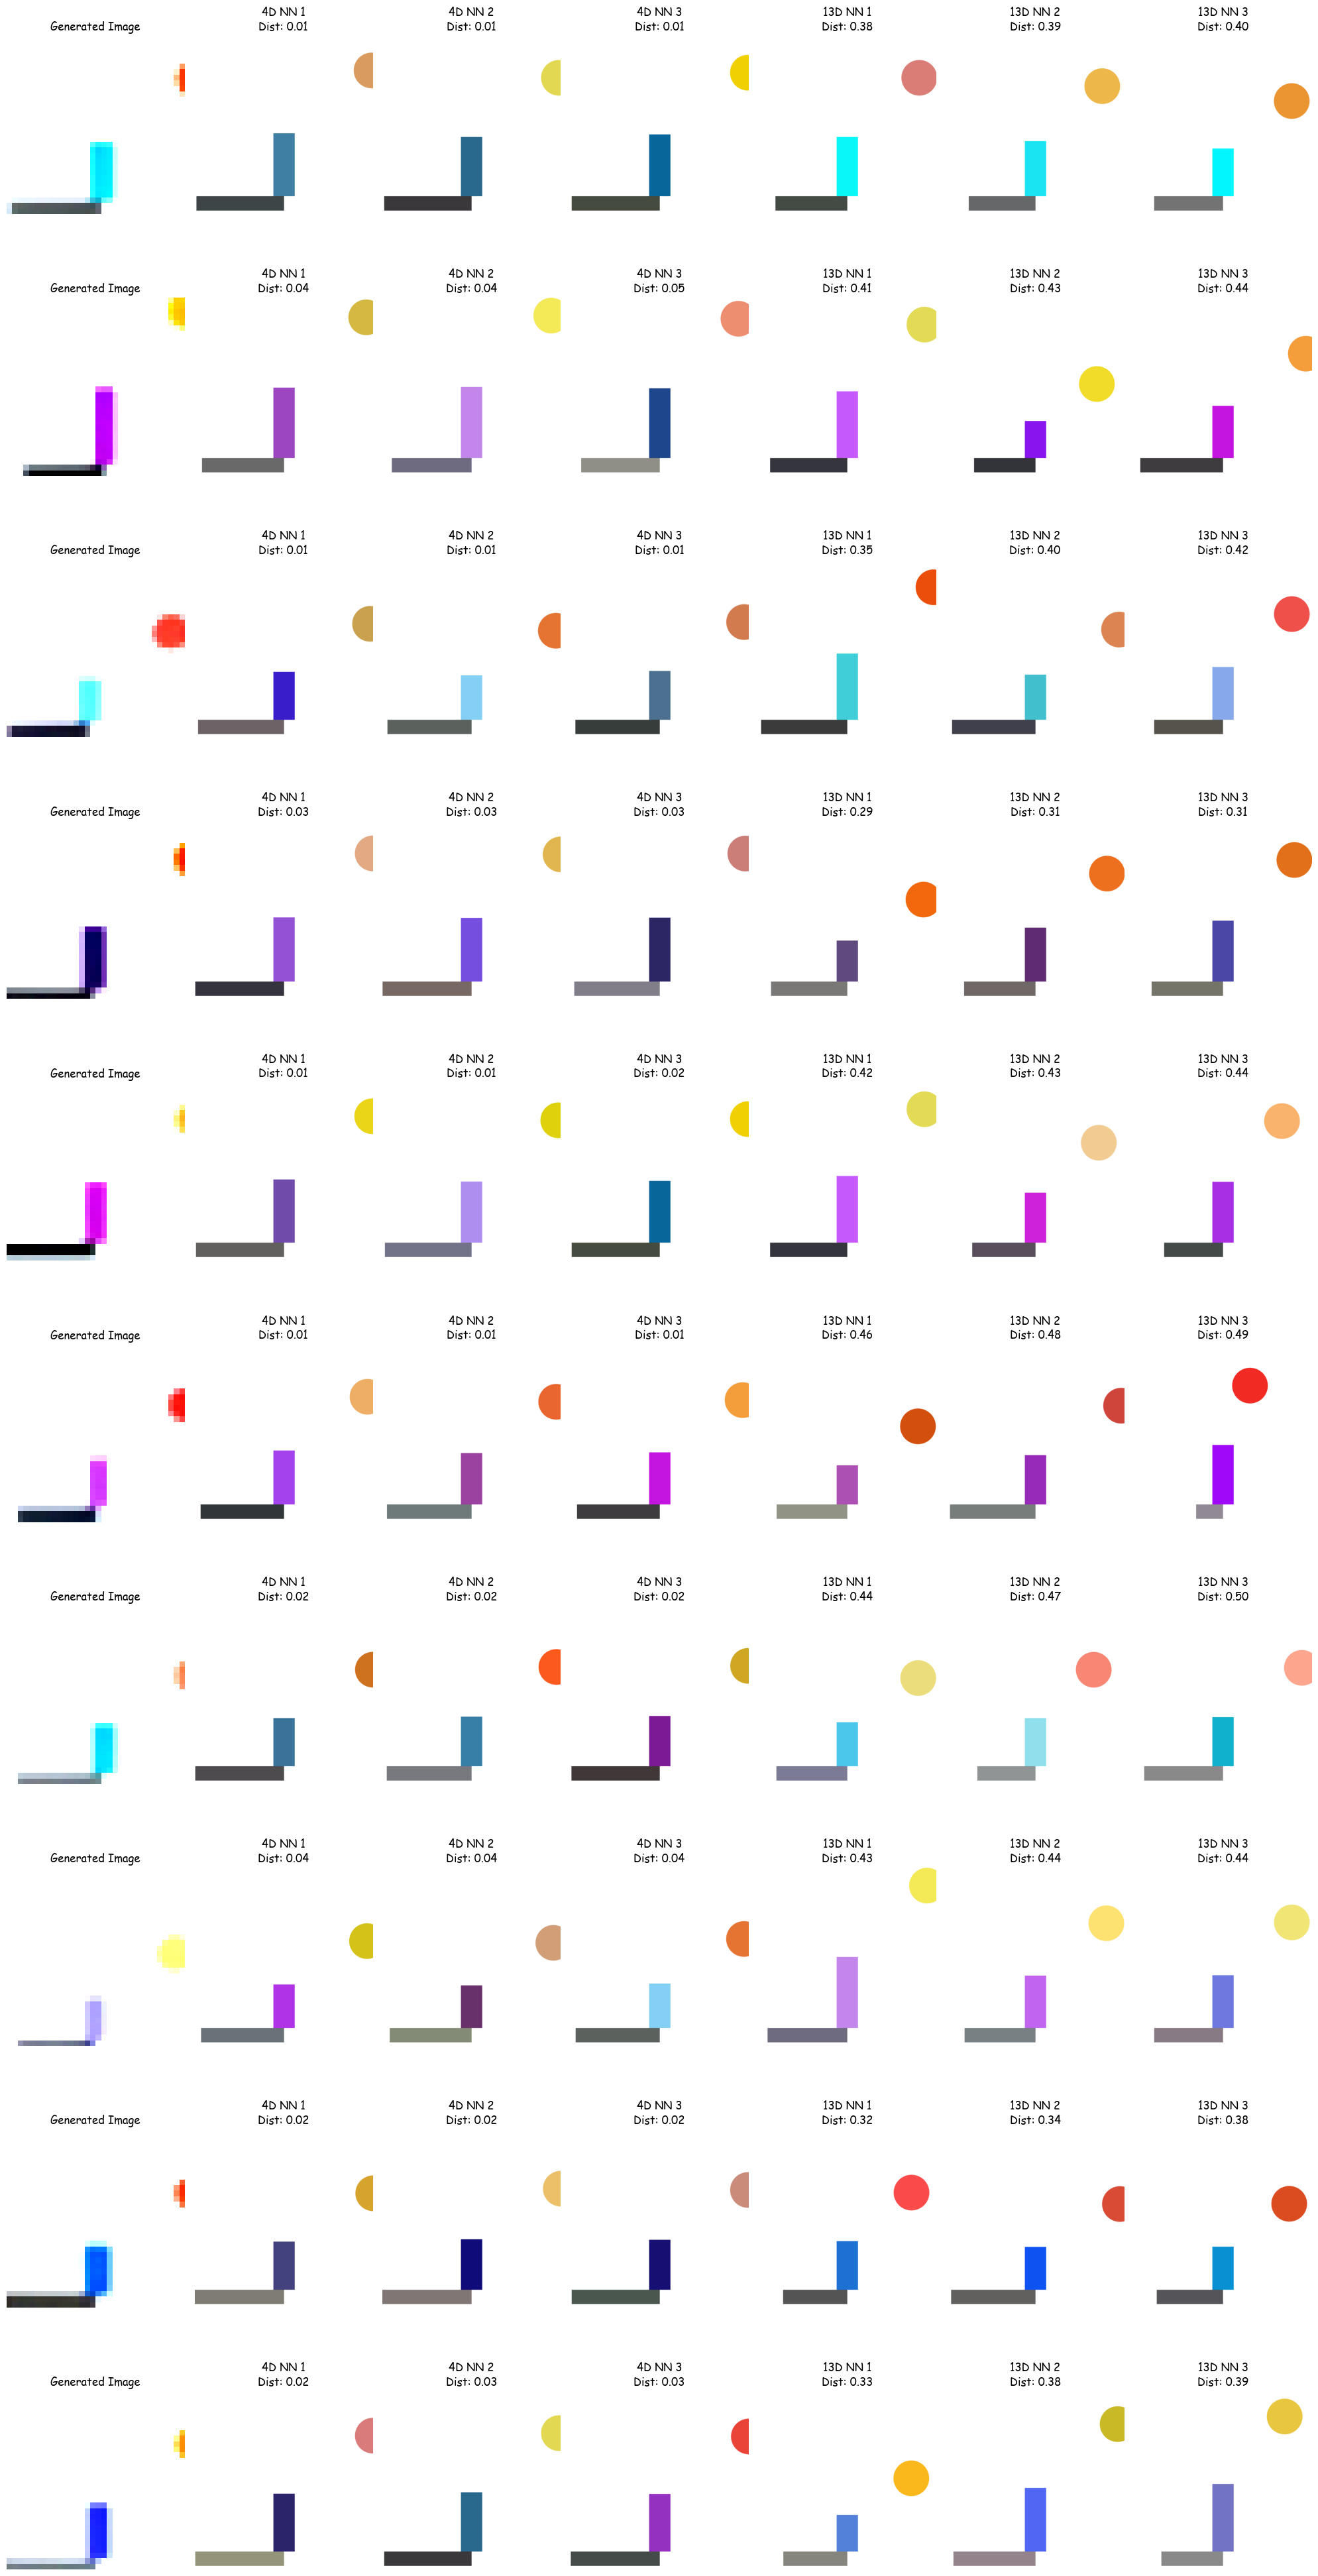

In [30]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import cv2
import os

def find_nearest_neighbors(generated_data, train_data, image_size,k=6):
    # 提取4D坐标
    gen_coords_4d = np.array([d[0]['coords'] for d in generated_data])
    train_coords_4d = np.array([d[0]['coords'] for d in train_data])

    # 提取13D特征（4D坐标 + 9D颜色）
    gen_features_13d = np.array([d[0]['coords'] + d[0]['colors'] for d in generated_data])
    train_features_13d = np.array([d[0]['coords'] + d[0]['colors'] for d in train_data])

    # 初始化NearestNeighbors
    nn_4d = NearestNeighbors(n_neighbors=k+1, metric='euclidean')
    nn_13d = NearestNeighbors(n_neighbors=k+1, metric='euclidean')

    # 拟合训练数据
    nn_4d.fit(train_coords_4d)
    nn_13d.fit(train_features_13d)

    # 找到最近邻
    distances_4d, indices_4d = nn_4d.kneighbors(gen_coords_4d)
    distances_13d, indices_13d = nn_13d.kneighbors(gen_features_13d)

    return distances_4d/(np.sqrt(2)*image_size), indices_4d, distances_13d/(np.sqrt(2)*image_size), indices_13d

def plot_nearest_neighbors(generated_data, train_data, distances_4d, indices_4d, distances_13d, indices_13d, output_folder):
    n_samples = len(generated_data)
    k = indices_4d.shape[1] - 1  # 减去1是因为包括了自身

    fig, axes = plt.subplots(n_samples, 7, figsize=(20, 4*n_samples))
    
    for i in range(n_samples):
        # 生成的图像
        gen_img = cv2.imread(generated_data[i][1])
        gen_img = cv2.cvtColor(gen_img, cv2.COLOR_BGR2RGB)
        axes[i, 0].imshow(gen_img)
        axes[i, 0].set_title("Generated Image")
        axes[i, 0].axis('off')

        # 4D最近邻
        for j in range(3):
            idx = indices_4d[i, j+1]
            img = cv2.imread(train_data[idx][1])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j+1].imshow(img)
            axes[i, j+1].set_title(f"4D NN {j+1}\nDist: {distances_4d[i, j+1]:.2f}")
            axes[i, j+1].axis('off')

        # 13D最近邻
        for j in range(3):
            idx = indices_13d[i, j+1]
            img = cv2.imread(train_data[idx][1])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j+4].imshow(img)
            axes[i, j+4].set_title(f"13D NN {j+1}\nDist: {distances_13d[i, j+1]:.2f}")
            axes[i, j+4].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join("/cpfs04/user/hanyujin/causal-dm/example", 'taska_nearest_neighbors.pdf'), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


# 假设 filtered_generated_data 和 train_data 已经准备好
distances_4d, indices_4d, distances_13d, indices_13d = find_nearest_neighbors(filtered_generated_data, train_data, image_size= target_size)

plot_nearest_neighbors(filtered_generated_data, train_data, distances_4d, indices_4d, distances_13d, indices_13d, output_folder)

# Epoch

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from tqdm import tqdm
import re

def calculate_center_and_end(mask, pole_center, is_pole=False):
    # 检查掩码是否为空
    if np.sum(mask) == 0:
        return (0, 0), (0, 0), (0, 0)
    
    # 使用霍夫变换检测直线
    lines = cv2.HoughLinesP(mask, 1, np.pi/180, threshold=30, minLineLength=mask.shape[0]/4, maxLineGap=20)
    
    if lines is not None:
        longest_line = max(lines, key=lambda x: np.sqrt((x[0][0]-x[0][2])**2 + (x[0][1]-x[0][3])**2))
        x1, y1, x2, y2 = longest_line[0]
        
        # 确保 x1 < x2 (对于影子) 或 y1 < y2 (对于旗杆)
        if (is_pole and y1 > y2) or (not is_pole and x1 > x2):
            x1, y1, x2, y2 = x2, y2, x1, y1
        
        center_x = (x1 + x2) // 2
        center_y = (y1 + y2) // 2
        
        # 对于旗杆，返回底端作为end_point
        if is_pole:
            return (center_x, center_y), (x1, y1), (x2, y2)
        # 对于影子，返回离旗杆最远的点作为end_point
        else:
            dist1 = np.sqrt((x1 - pole_center[0])**2 + (y1 - pole_center[1])**2)
            dist2 = np.sqrt((x2 - pole_center[0])**2 + (y2 - pole_center[1])**2)
            end_point = (x2, y2) if dist2 > dist1 else (x1, y1)
            other_end = (x1, y1) if dist2 > dist1 else (x2, y2)
            return (center_x, center_y), end_point, other_end
    
    # 如果霍夫变换失败，退回到轮廓方法
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        cnt = max(contours, key=cv2.contourArea)
        M = cv2.moments(cnt)
        if M["m00"] != 0:
            center_x = int(M["m10"] / M["m00"])
            center_y = int(M["m01"] / M["m00"])
        else:
            center_x, center_y = 0, 0
        
        # 找到最远和最近的点
        dist = np.sqrt((cnt[:,:,0] - pole_center[0])**2 + (cnt[:,:,1] - pole_center[1])**2)
        far_index = np.argmax(dist)
        near_index = np.argmin(dist)
        far_point = tuple(cnt[far_index][0])
        near_point = tuple(cnt[near_index][0])
        
        return (center_x, center_y), far_point, near_point
    
    return (0, 0), (0, 0), (0, 0)

def analyze_single_image(image_path, target_size=64):
    # 读取图像
    img = cv2.imread(image_path)
    if img is None:
        return "fail", None, "Image could not be read"

    # 调整图像大小为 target_size x target_size
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)

    # 转换为RGB（用于显示）和HSV颜色空间
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 获取颜色值
    def get_dominant_color(mask):
        masked_img = cv2.bitwise_and(hsv, hsv, mask=mask)
        hist = cv2.calcHist([masked_img], [0, 1, 2], mask, [180, 256, 256], [0, 180, 0, 256, 0, 256])
        dominant_color = np.unravel_index(np.argmax(hist), hist.shape)
        return dominant_color

    # 定义颜色范围
    # sun_hsv_range = [(0, 60), (50, 255), (200, 255)]  # 扩大黄色和橙色范围
    # pole_hsv_range = [(90, 150), (50, 255), (50, 255)]  # 保持蓝绿色系，但扩大范围
    # shadow_hsv_range = [(0, 180), (0, 150), (0, 220)]  # 进一步扩大阴影的范围，包括更多灰色调

    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
    shadow_hsv_range = [(0, 180), (0, 150), (50, 150)] 
    
    
    sun_lower = np.array([sun_hsv_range[0][0], sun_hsv_range[1][0], sun_hsv_range[2][0]])
    sun_upper = np.array([sun_hsv_range[0][1], sun_hsv_range[1][1], sun_hsv_range[2][1]])

    pole_lower = np.array([pole_hsv_range[0][0], pole_hsv_range[1][0], pole_hsv_range[2][0]])
    pole_upper = np.array([pole_hsv_range[0][1], pole_hsv_range[1][1], pole_hsv_range[2][1]])

    shadow_lower = np.array([shadow_hsv_range[0][0], shadow_hsv_range[1][0], shadow_hsv_range[2][0]])
    shadow_upper = np.array([shadow_hsv_range[0][1], shadow_hsv_range[1][1], shadow_hsv_range[2][1]])

    # 创建掩码
    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    # 获取颜色值
    sun_color = get_dominant_color(sun_mask)
    pole_color = get_dominant_color(pole_mask)
    shadow_color = get_dominant_color(shadow_mask)

    # 计算中心和末端
    (pole_cx, pole_cy), (pole_bottom_x, pole_bottom_y), (pole_top_x, pole_top_y) = calculate_center_and_end(pole_mask, (0, 0), is_pole=True)
    (sun_cx, sun_cy), _, _ = calculate_center_and_end(sun_mask, (pole_cx, pole_cy))
    (shadow_cx, shadow_cy), (shadow_end_x, shadow_end_y), (shadow_start_x, shadow_start_y) = calculate_center_and_end(shadow_mask, (pole_cx, pole_cy))

    # 检查是否有任何物体没有被检测到
    if (sun_cx, sun_cy) == (0, 0) or (pole_cx, pole_cy) == (0, 0) or (shadow_cx, shadow_cy) == (0, 0):
        return "fail", None, "One or more objects not detected"

    # 计算旗杆中心到地面的距离和影子到地面的距离
    pole_center_to_ground = pole_bottom_y - pole_cy
    shadow_to_ground = pole_bottom_y - shadow_cy

    # 检查旗杆中心到地面的距离是否小于等于影子到地面的距离
    if pole_center_to_ground <= shadow_to_ground:
        return "fail", None, "Pole center is not higher than shadow"

    # 确定方向、距离和真实性
    direction = 'l' if sun_cx < target_size/2 else 'r'
    distance_to_center = abs(sun_cx - target_size/2)
    near_distance = (0.00 * target_size, 0.25 * target_size)  # 近距离范围：图像大小的5%到25%
    far_distance = (0.25 * target_size, 0.5 * target_size)  # 远距离范围：图像大小的30%到50%
    if near_distance[0] <= distance_to_center <= near_distance[1]:
         distance = 'n' 
    elif far_distance[0] < distance_to_center <= far_distance[1]:
        distance = 'f'
    else:
        distance = 'unknown'
    
    # 根据影子尾端和太阳中心相对于杆子的位置判断真实性
    if (sun_cx < pole_cx and shadow_end_x > pole_cx) or (sun_cx > pole_cx and shadow_end_x < pole_cx):
        real = 'd'
    else:
        real = 's'

    return "success", (direction, distance, real), f"Sun center: ({sun_cx}, {sun_cy}), Shadow end: ({shadow_end_x}, {shadow_end_y}), Pole center: ({pole_cx}, {pole_cy}), Distance to center: {distance_to_center:.2f}"

def analyze_folder(folder_path, target_size=64):
    results = defaultdict(list)
    total_count = 0
    fail_count = 0
    processed_files = []
    skipped_files = []

    for filename in tqdm(sorted(os.listdir(folder_path))):
        if filename.endswith(('.png', '.jpg', '.jpeg')) and re.search(r'\d+\.(?:png|jpg|jpeg)$', filename):
            total_count += 1
            image_path = os.path.join(folder_path, filename)
            status, label, details = analyze_single_image(image_path, target_size)
            
            if status == "fail":
                fail_count += 1
                results["fail"].append(filename)
                skipped_files.append((filename, details))
            else:
                results[label].append(filename)
                processed_files.append(filename)
        else:
            skipped_files.append((filename, "Does not match the expected format"))

    # 计算统计信息
    fail_rate = fail_count / total_count if total_count > 0 else 0
    label_percentages = {label: len(files) / total_count for label, files in results.items()} if total_count > 0 else {}

    return fail_rate, label_percentages, results, processed_files, skipped_files

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from tqdm import tqdm
import re

def analyze_all_epochs(base_path, start_epoch=200, end_epoch=4000, step=200, target_size=128):
    for epoch in range(start_epoch, end_epoch + 1, step):
        epoch_folders = [f for f in os.listdir(base_path) if f.startswith(f"epoch_{epoch}")]
        if epoch_folders:
            folder_path = os.path.join(base_path, epoch_folders[0])
            print(f"\nAnalyzing epoch {epoch}...")
            fail_rate, label_percentages, results, processed_files, skipped_files = analyze_folder(folder_path, target_size)
            
            # 保存当前 epoch 的分析结果
            save_epoch_results(folder_path, fail_rate, label_percentages, results, processed_files, skipped_files)
        else:
            print(f"No folder found for epoch {epoch}")

def save_epoch_results(folder_path, fail_rate, label_percentages, results, processed_files, skipped_files):
    with open(os.path.join(folder_path, "analysis_results.txt"), "w") as f:
        f.write(f"Total files in folder: {len(os.listdir(folder_path))}\n")
        f.write(f"Processed files: {len(processed_files)}\n")
        f.write(f"Skipped files: {len(skipped_files)}\n")
        f.write(f"Fail rate: {fail_rate:.2%}\n\n")
        
        f.write("Label percentages:\n")
        for label, percentage in label_percentages.items():
            f.write(f"{label}: {percentage:.2%}\n")
        f.write("\n")
        
        f.write("Number of images in each category:\n")
        for label, files in results.items():
            f.write(f"{label}: {len(files)}\n")

    for label, files in results.items():
        with open(os.path.join(folder_path, f"{label}_files.txt"), "w") as f:
            for file in files:
                f.write(f"{file}\n")

    print(f"Analysis results have been saved to {os.path.join(folder_path, 'analysis_results.txt')}")

# 使用示例
base_path = "/cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis"
analyze_all_epochs(base_path)

print("\nAnalysis complete. Results have been saved in each epoch folder.")


Analyzing epoch 200...


  0%|          | 12/3011 [00:00<00:32, 92.80it/s]

100%|██████████| 3011/3011 [01:51<00:00, 27.07it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2000_1733746635.6527812/analysis_results.txt

Analyzing epoch 400...


100%|██████████| 3011/3011 [01:52<00:00, 26.75it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_4000_1733751408.6393044/analysis_results.txt

Analyzing epoch 600...


100%|██████████| 3012/3012 [01:52<00:00, 26.75it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_600_1733624620.1235526/analysis_results.txt

Analyzing epoch 800...


100%|██████████| 3042/3042 [01:51<00:00, 27.35it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_800_1733628335.9468262/analysis_results.txt

Analyzing epoch 1000...


100%|██████████| 3012/3012 [01:54<00:00, 26.25it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_1000_1733619686.1989563/analysis_results.txt

Analyzing epoch 1200...


100%|██████████| 3011/3011 [01:49<00:00, 27.41it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_1200_1733744721.618166/analysis_results.txt

Analyzing epoch 1400...


100%|██████████| 3001/3001 [01:53<00:00, 26.38it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_1400_1733818359.1483846/analysis_results.txt

Analyzing epoch 1600...


100%|██████████| 3011/3011 [01:54<00:00, 26.39it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_1600_1733745682.1908133/analysis_results.txt

Analyzing epoch 1800...


100%|██████████| 3001/3001 [01:51<00:00, 27.03it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_1800_1733819313.364056/analysis_results.txt

Analyzing epoch 2000...


100%|██████████| 3011/3011 [01:46<00:00, 28.40it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2000_1733746635.6527812/analysis_results.txt

Analyzing epoch 2200...


100%|██████████| 3001/3001 [01:55<00:00, 25.94it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2200_1733820272.8597639/analysis_results.txt

Analyzing epoch 2400...


100%|██████████| 3011/3011 [01:52<00:00, 26.69it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2400_1733747589.8990858/analysis_results.txt

Analyzing epoch 2600...


100%|██████████| 3001/3001 [01:47<00:00, 27.96it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2600_1733821226.1200864/analysis_results.txt

Analyzing epoch 2800...


100%|██████████| 3011/3011 [01:49<00:00, 27.45it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_2800_1733748543.4819417/analysis_results.txt

Analyzing epoch 3000...


100%|██████████| 3001/3001 [01:52<00:00, 26.64it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_3000_1733822181.730333/analysis_results.txt

Analyzing epoch 3200...


100%|██████████| 3011/3011 [01:50<00:00, 27.33it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_3200_1733749498.3538318/analysis_results.txt

Analyzing epoch 3400...


100%|██████████| 3001/3001 [01:54<00:00, 26.30it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_3400_1733823137.8267617/analysis_results.txt

Analyzing epoch 3600...


100%|██████████| 3011/3011 [01:55<00:00, 26.11it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_3600_1733750454.082874/analysis_results.txt

Analyzing epoch 3800...


100%|██████████| 3001/3001 [01:53<00:00, 26.39it/s]


Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_3800_1733824092.4734702/analysis_results.txt

Analyzing epoch 4000...


100%|██████████| 3011/3011 [01:47<00:00, 28.00it/s]

Analysis results have been saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/epoch_4000_1733751408.6393044/analysis_results.txt

Analysis complete. Results have been saved in each epoch folder.


In [85]:
# Enhanced
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 使用提供的颜色范围
    sun_lower = np.array([0, 50, 200])
    sun_upper = np.array([60, 255, 255])
    pole_lower = np.array([90, 50, 50])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 0])
    shadow_upper = np.array([180, 150, 220])
    # sun_lower = np.array([0, 100, 200])
    # sun_upper = np.array([30, 255, 255])
    # pole_lower = np.array([90, 100, 100])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 50])
    # shadow_upper = np.array([180, 50, 150])


    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])


        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])

        # 确定阴影尾部
        if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
            shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
        else:
            distances = [
                    (abs(shadow_left[0] - pole_top[0]), shadow_left),
                    (abs(shadow_right[0] - pole_top[0]), shadow_right),
                    (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
            ]
            _, shadow_tail = max(distances, key=lambda x: x[0])

            


        # 计算 l1 和 l2
        l1 = abs(shadow_tail[0] - pole_top[0])
        l2 = abs(pole_top[1] - shadow_tail[1])

        if l2 == 0 or s2 == 0:
            return None  # 跳过分母为0的情况

        return l1/l2, s1/s2
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

def process_folder(folder_path,target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path,target_size=target_size)
                if result:
                    data[category].append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            result = analyze_image(image_path)
            if result:
                data["all_images"].append((result, image_path))

    return data

def plot_scatter(data, output_pdf_path):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(12, 12))
        colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
        all_points = []
        
        for (category, points), color in zip(data.items(), colors):
            x, y = zip(*[p[0] for p in points])
            plt.scatter(x, y, c=color, label=category, alpha=0.6)
            all_points.extend(points)

        plt.plot([0, 2], [0, 2], 'k--', label='y=x', color='gray')
        plt.xlabel(r'$\frac{l_1}{l_2}$', fontsize=14)
        plt.ylabel(r'$\frac{s_1}{s_2}$', fontsize=14)
        plt.grid(True)
        plt.axis('equal')
        plt.xlim(0, 2)
        plt.ylim(0, 2)

        # 只使用95%区间内的点进行拟合
        x_all = np.array([p[0][0] for p in all_points])
        y_all = np.array([p[0][1] for p in all_points])
        
        # 计算x和y的2.5%和97.5%百分位数
        x_low, x_high = np.percentile(x_all, [2.5, 97.5])
        y_low, y_high = np.percentile(y_all, [2.5, 97.5])
        
        # 筛选在95%区间内的点
        mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
        x_filtered = x_all[mask].reshape(-1, 1)
        y_filtered = y_all[mask]

        # 使用筛选后的点进行拟合
        lin_reg = LinearRegression()
        lin_reg.fit(x_filtered, y_filtered)
        y_pred = lin_reg.predict(x_filtered)
        r2 = r2_score(y_filtered, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_filtered, y_pred, color='black', linewidth=1, 
                 label=f'Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        plt.legend()
        plt.tight_layout()
        pdf.savefig()  # 保存当前图像到PDF
        plt.show()
        plt.close()

    print(f"Scatter plot saved to {output_pdf_path}")


In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def plot_scatter_for_epoch(data, ax, epoch, target_size):
    all_points = []
    for category, points in data.items():
        x, y = zip(*[p[0] for p in points])
        ax.scatter(x, y, alpha=0.6, s=10, label=category)  # 添加标签
        all_points.extend(points)

    ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)
    ax.set_xlabel(r'$\frac{l_1}{l_2}$', fontsize=8)
    ax.set_ylabel(r'$\frac{s_1}{s_2}$', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # 转换为numpy数组以提高性能
    points_array = np.array([p[0] for p in all_points])
    x_all, y_all = points_array[:, 0], points_array[:, 1]
    
    # 计算x和y的2.5%和97.5%百分位数
    x_low, x_high = np.percentile(x_all, [2.5, 97.5])
    y_low, y_high = np.percentile(y_all, [2.5, 97.5])
    
    # 筛选在95%区间内的点
    mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
    x_filtered = x_all[mask].reshape(-1, 1)
    y_filtered = y_all[mask]

    # 使用筛选后的点进行拟合
    lin_reg = LinearRegression()
    lin_reg.fit(x_filtered, y_filtered)
    y_pred = lin_reg.predict(x_filtered)
    r2 = r2_score(y_filtered, y_pred)
    slope = lin_reg.coef_[0]
    intercept = lin_reg.intercept_

    # 计算 eta
    all_ratios = y_all / x_all
    eta = 100 * np.mean((0.99 <= all_ratios) & (all_ratios <= 1.01))

    ax.plot(x_filtered, y_pred, color='black', linewidth=1, 
            label=f'Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

    ax.legend(fontsize=6, loc='upper left')  # 调整图例位置和大小
    ax.set_title(f'Epoch {epoch} ($\eta$ = {eta:.2f}%)', fontsize=10)




def analyze_all_epochs(base_path, start_epoch=200, end_epoch=4000, step=200, target_size=128):
    fig, axs = plt.subplots(3, 4, figsize=(16, 12))
    # fig, axs = plt.subplots(4, 5, figsize=(20, 20))
    axs = axs.flatten()

    # for i, epoch in enumerate(range(start_epoch, end_epoch + 1, step)):
    for i, epoch in enumerate([200,400,600,800,1200,1600,2000,2400,2800,3200,3600,4000]):
        epoch_folders = [f for f in os.listdir(base_path) if f.startswith(f"epoch_{epoch}_")]
        if epoch_folders:
            folder_path = os.path.join(base_path, epoch_folders[0])
            print(f"\nAnalyzing epoch {epoch}... and {epoch_folders[0]}")
            data = process_folder(folder_path, target_size)
            plot_scatter_for_epoch(data, axs[i], epoch, target_size)
        else:
            print(f"No folder found for epoch {epoch}")

    plt.tight_layout()
    output_pdf_path = os.path.join(base_path, "all_epochs_scatter_robust.pdf")
    plt.savefig(output_pdf_path)
    print(f"All epochs scatter plots saved to {output_pdf_path}")
    plt.close()

# 使用示例
base_path = "/cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis"
analyze_all_epochs(base_path)


Analyzing epoch 200... and epoch_200_1733621054.0880237


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 400... and epoch_400_1733622674.3212345


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 600... and epoch_600_1733624620.1235526


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 800... and epoch_800_1733628335.9468262


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 1200... and epoch_1200_1733744721.618166


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 1600... and epoch_1600_1733745682.1908133


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 2000... and epoch_2000_1733746635.6527812


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 2400... and epoch_2400_1733747589.8990858


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 2800... and epoch_2800_1733748543.4819417


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 3200... and epoch_3200_1733749498.3538318


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 3600... and epoch_3600_1733750454.082874


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)



Analyzing epoch 4000... and epoch_4000_1733751408.6393044


/tmp/ipykernel_4019654/2100413325.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 2], [0, 2], 'k--', color='gray', linewidth=0.5)


All epochs scatter plots saved to /cpfs01/user/hanyujin/causal-dm/results/sunshadow_lfd_lnd_rfd_rnd/vis/all_epochs_scatter_robust.pdf


# KL-VAE

In [47]:
import torch
from torchvision import transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tqdm import tqdm

vae = AutoencoderKL(
    in_channels=3,
    out_channels=3,
    latent_channels=4,
    down_block_types=("DownEncoderBlock2D", "DownEncoderBlock2D", "DownEncoderBlock2D"), 
    up_block_types=("UpDecoderBlock2D", "UpDecoderBlock2D", "UpDecoderBlock2D"),          # 对应增加一层上采样
    block_out_channels=(64, 128, 256)  # 每层输出通道数，调整
).cuda().eval()  # GPU 模式下，并设置为评估模式

# 加载预训练的权重
vae.load_state_dict(torch.load('/cpfs01/user/hanyujin/causal-dm/AR_diff/autoregressive-diffusion-pytorch/autoregressive_diffusion_pytorch/pretrained_vae/kl4.pt'))

# 冻结 VAE 参数
for param in vae.parameters():
    param.requires_grad = False

# 2. 定义全局变量
root_path = '/cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight'
image_size = 32  # 图片大小，需根据 VAE 模型预设调整
latent_dim = 16   # VAE 的潜在维度
categories = os.listdir(root_path)  # 获取类别文件夹列表
categories = [cat for cat in categories if os.path.isdir(os.path.join(root_path, cat))]

# 数据预处理函数
def preprocess_image(image_path, image_size=256):
    """
    对输入图片进行预处理，调整尺寸并归一化。
    """
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),  # 调整图片到 VAE 输入的尺寸
        transforms.ToTensor(),                       # 转换为 Torch Tensor
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # [-1, 1]
    ])
    image = Image.open(image_path).convert('RGB')    # 打开并确保是 RGB 格式
    image_tensor = transform(image).unsqueeze(0)    # 增加 Batch 维度
    return image_tensor

# 获取图片的潜在表示
def get_latent_embedding(image_path, vae):
    """
    将图片通过 VAE 编码到潜在空间。
    """
    img_tensor = preprocess_image(image_path, image_size=image_size).cuda()  # 加载图片到 CUDA
    with torch.no_grad():
        posterior = vae.encode(img_tensor)  # 获取后验分布
        latent = posterior.latent_dist.sample()        # 采样 latent 表征
    return latent.squeeze(0).cpu().numpy() # 返回潜在表示并移到 CPU

# 读取所有类别图片，获取潜在表示与标签
embeddings = []
labels = []
original_images = []

print("Processing images and extracting latent embeddings...")
for label, category in enumerate(tqdm(categories, desc="Categories")):
    category_path = os.path.join(root_path, category)
    for file_name in tqdm(os.listdir(category_path), desc=f"Processing {category}", leave=False):
        if file_name.endswith('.png'):
            # 图片路径
            img_path = os.path.join(category_path, file_name)
            try:
                # 获取latent表示
                latent = get_latent_embedding(img_path, vae)
                embeddings.append(latent)
                labels.append(category)
                
                # 保存用于可视化的原图
                img = preprocess_image(image_path, image_size=image_size).cuda()
                original_images.append(np.array(img.cpu()))
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

embeddings = np.array(embeddings)
labels = np.array(labels)

Processing images and extracting latent embeddings...


Categories:   0%|          | 0/8 [00:00<?, ?it/s]

Categories: 100%|██████████| 8/8 [03:15<00:00, 24.48s/it]


In [48]:
print("Running T-SNE for dimensionality reduction...")
# 检查 embeddings 的形状
print("Original embeddings shape:", embeddings.shape)  # 应为 [num_samples, latent_dim, height, width]

# 展平 embeddings，形状变为 [num_samples, latent_dim * height * width]
num_samples, latent_dim, height, width = embeddings.shape
flat_embeddings = embeddings.reshape(num_samples, latent_dim * height * width)
print("Flattened embeddings shape:", flat_embeddings.shape)  # 应为 [num_samples, latent_size]

# T-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
latent_2d = tsne.fit_transform(flat_embeddings)
print("T-SNE embeddings shape:", latent_2d.shape)


Running T-SNE for dimensionality reduction...
Original embeddings shape: (7893, 4, 8, 8)
Flattened embeddings shape: (7893, 256)


/root/miniconda3/envs/yjenv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


T-SNE embeddings shape: (7893, 2)


/tmp/ipykernel_3532757/426770920.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


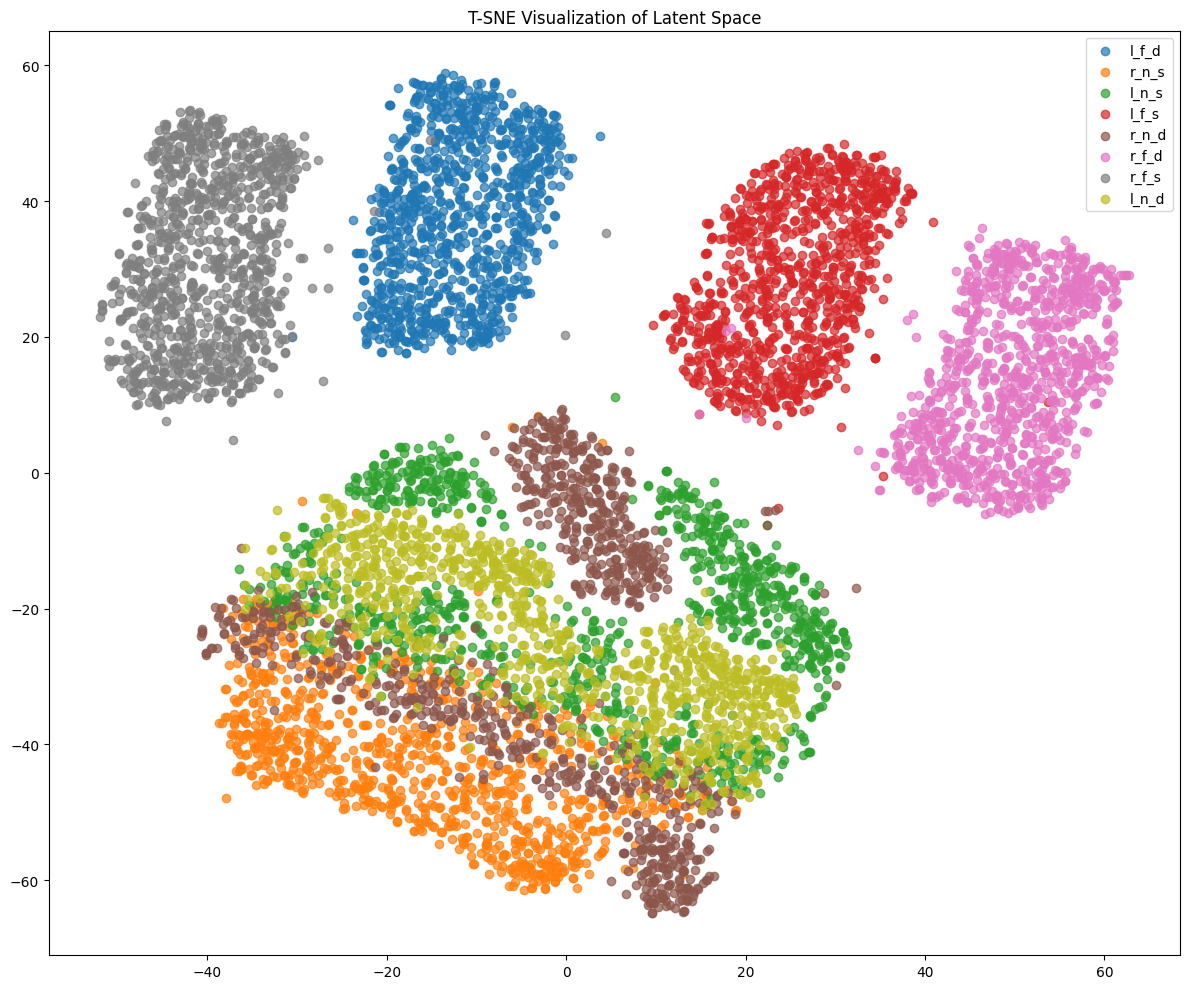

In [49]:
# 为每个类别分配一个颜色
unique_labels = list(set(labels))
color_map = plt.cm.get_cmap('tab10')
color_dict = {label: color_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# 创建图表
plt.figure(figsize=(12, 10))

# 原始图像空间的T-SNE可视化
for label in unique_labels:
    mask = np.array(labels) == label
    plt.scatter(latent_2d[mask, 0], latent_2d[mask, 1], c=[color_dict[label]], label=label, alpha=0.7)

plt.legend()
plt.title("T-SNE Visualization of Latent Space")

plt.tight_layout()
# plt.savefig("tsne_visualization_original_images.png", dpi=300, bbox_inches='tight')
plt.show()

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import os
import numpy as np
from tqdm import tqdm
import os
import torch
from torch import nn, optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from PIL import Image

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, beta=0.25):
        super().__init__()
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim
        self.beta = beta

        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1 / num_embeddings, 1 / num_embeddings)

    def forward(self, z):
        z_flattened = z.view(-1, self.embedding_dim)
        distances = (torch.sum(z_flattened ** 2, dim=1, keepdim=True) 
                     - 2 * torch.matmul(z_flattened, self.embedding.weight.t()) 
                     + torch.sum(self.embedding.weight ** 2, dim=1))
        encoding_indices = torch.argmin(distances, dim=1)
        quantized = self.embedding(encoding_indices).view_as(z)
        
        # 损失
        commitment_loss = self.beta * torch.mean((quantized.detach() - z) ** 2)
        codebook_loss = torch.mean((quantized - z.detach()) ** 2)
        loss = commitment_loss + codebook_loss

        quantized = z + (quantized - z).detach()
        return quantized, loss

class VQVAE(nn.Module):
    def __init__(self, in_channels=3, embedding_dim=64, num_embeddings=512):
        super().__init__()

        # 编码器
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, embedding_dim, kernel_size=3, stride=1, padding=1)
        )

        # 向量量化模块
        self.quantizer = VectorQuantizer(num_embeddings, embedding_dim)

        # 解码器
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(embedding_dim, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, in_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        z = self.encoder(x)
        quantized, vq_loss = self.quantizer(z)
        recon_x = self.decoder(quantized)
        return recon_x, vq_loss


# 1. 定义 VQ-VAE 模型
vqvae = VQVAE().cuda().eval()  # 使用 GPU 并设置为评估模式

# 加载预训练权重
vqvae.load_state_dict(torch.load('/cpfs01/user/hanyujin/causal-dm/AR_diff/autoregressive-diffusion-pytorch/autoregressive_diffusion_pytorch/pretrained_vae/vqvae.pt'))

# 冻结模型参数
for param in vqvae.parameters():
    param.requires_grad = False

# 2. 定义全局变量
root_path = '/cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight'
image_size = 32  # 图片大小，需根据 VQ-VAE 模型调整
categories = os.listdir(root_path)
categories = [cat for cat in categories if os.path.isdir(os.path.join(root_path, cat))]

# 数据预处理函数
def preprocess_image(image_path, image_size=32):
    """
    对输入图片进行预处理，调整尺寸并归一化。
    """
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)
    return image_tensor

# 获取图片的潜在表示
def get_latent_embedding(image_path, vqvae):
    """
    获取图片通过 VQ-VAE 编码的离散潜在表示。
    """
    img_tensor = preprocess_image(image_path, image_size=image_size).cuda()
    with torch.no_grad():
        z = vqvae.encoder(img_tensor)  # 获取离散码本索引
        quantized, _ = vqvae.quantizer(z)
    return quantized.squeeze(0).cpu().numpy()

# 3. 读取所有类别图片，提取潜在表示与标签
embeddings = []
labels = []
original_images = []

print("Processing images and extracting latent embeddings...")
for label, category in enumerate(tqdm(categories, desc="Categories")):
    category_path = os.path.join(root_path, category)
    for file_name in tqdm(os.listdir(category_path), desc=f"Processing {category}", leave=False):
        if file_name.endswith('.png'):
            # 图片路径
            img_path = os.path.join(category_path, file_name)
            try:
                # 获取离散潜在表示
                latent = get_latent_embedding(img_path, vqvae)
                embeddings.append(latent)
                labels.append(category)
                
                # 保存用于可视化的原图
                img = preprocess_image(img_path, image_size=image_size).cpu().squeeze(0).numpy()
                original_images.append(img)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

embeddings = np.array(embeddings)
labels = np.array(labels)

# embeddings 是离散潜在表示，可以后续用于分类或聚类分析


Processing images and extracting latent embeddings...


Categories: 100%|██████████| 8/8 [03:01<00:00, 22.72s/it]


In [2]:
print("Running T-SNE for dimensionality reduction...")
# 检查 embeddings 的形状
print("Original embeddings shape:", embeddings.shape)  # 应为 [num_samples, latent_dim, height, width]

# 展平 embeddings，形状变为 [num_samples, latent_dim * height * width]
num_samples, latent_dim, height, width = embeddings.shape
flat_embeddings = embeddings.reshape(num_samples, latent_dim * height * width)
print("Flattened embeddings shape:", flat_embeddings.shape)  # 应为 [num_samples, latent_size]

# T-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
latent_2d = tsne.fit_transform(flat_embeddings)
print("T-SNE embeddings shape:", latent_2d.shape)


Running T-SNE for dimensionality reduction...
Original embeddings shape: (7893, 64, 8, 8)
Flattened embeddings shape: (7893, 4096)


NameError: name 'TSNE' is not defined

/tmp/ipykernel_3532757/3092836982.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


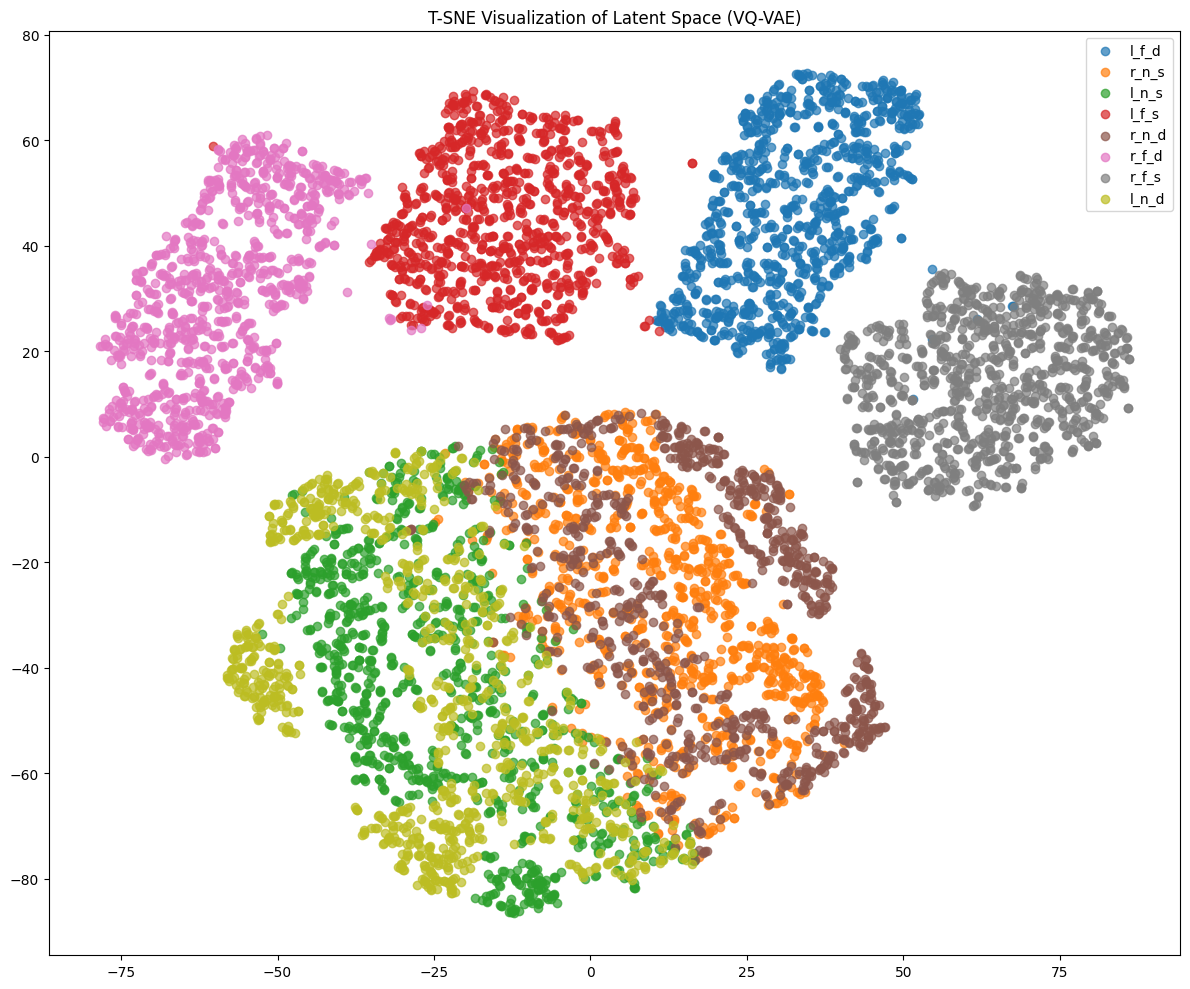

In [ ]:
# 为每个类别分配一个颜色
unique_labels = list(set(labels))
color_map = plt.cm.get_cmap('tab10')
color_dict = {label: color_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# 创建图表
plt.figure(figsize=(12, 10))

# 原始图像空间的T-SNE可视化
for label in unique_labels:
    mask = np.array(labels) == label
    plt.scatter(latent_2d[mask, 0], latent_2d[mask, 1], c=[color_dict[label]], label=label, alpha=0.7)

plt.legend()
plt.title("T-SNE Visualization of Latent Space (VQ-VAE)")

plt.tight_layout()
# plt.savefig("tsne_visualization_original_images.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
from typing import List
from pathlib import Path
from torch import nn
from torch.utils.data import Dataset
import torchvision.transforms as T
from PIL import Image


def exists(v):
    return v is not None

def default(v, d):
    return v if exists(v) else d

def divisible_by(num, den):
    return (num % den) == 0

def cycle(dl):
    while True:
        for batch in dl:
            yield batch

class ImageDataset(Dataset):
    def __init__(
        self,
        folder: str | Path,
        image_size: int,
        exts: List[str] = ['jpg', 'jpeg', 'png', 'tiff'],
        augment_horizontal_flip=False,
        convert_image_to=None
    ):
        super().__init__()
        if isinstance(folder, str):
            folder = Path(folder)

        assert folder.is_dir()

        self.folder = folder
        self.image_size = image_size

        # 拍平所有符合扩展文件类型的文件路径
        self.paths = [p for ext in exts for p in folder.glob(f'**/*.{ext}')]

        def convert_image_to_fn(img_type, image):
            if image.mode == img_type:
                return image
            return image.convert(img_type)

        maybe_convert_fn = partial(convert_image_to_fn, convert_image_to) if exists(convert_image_to) else nn.Identity()

        # 转换 pipeline
        self.transform = T.Compose([
            T.Lambda(maybe_convert_fn),
            T.Resize(image_size),
            T.RandomHorizontalFlip() if augment_horizontal_flip else nn.Identity(),
            T.CenterCrop(image_size),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        # 获取图像路径
        path = self.paths[index]
        img = Image.open(path)

        # 检查并转换通道类型（比如 RGBA -> RGB 或 L -> RGB）
        if img.mode == 'RGBA':  # 如果是 4 通道（RGBA）
            img = img.convert('RGB')  # 丢弃 alpha 通道
        elif img.mode != 'RGB':  # 如果是灰度、单通道之类
            img = img.convert('RGB')  # 强制转换成 RGB

        # 应用其他数据增强和处理
        transformed_img = self.transform(img)

        return transformed_img

Processing images: 100%|██████████| 247/247 [00:22<00:00, 10.86it/s]


Starting T-SNE...
T-SNE completed.


/tmp/ipykernel_3532757/2939679551.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


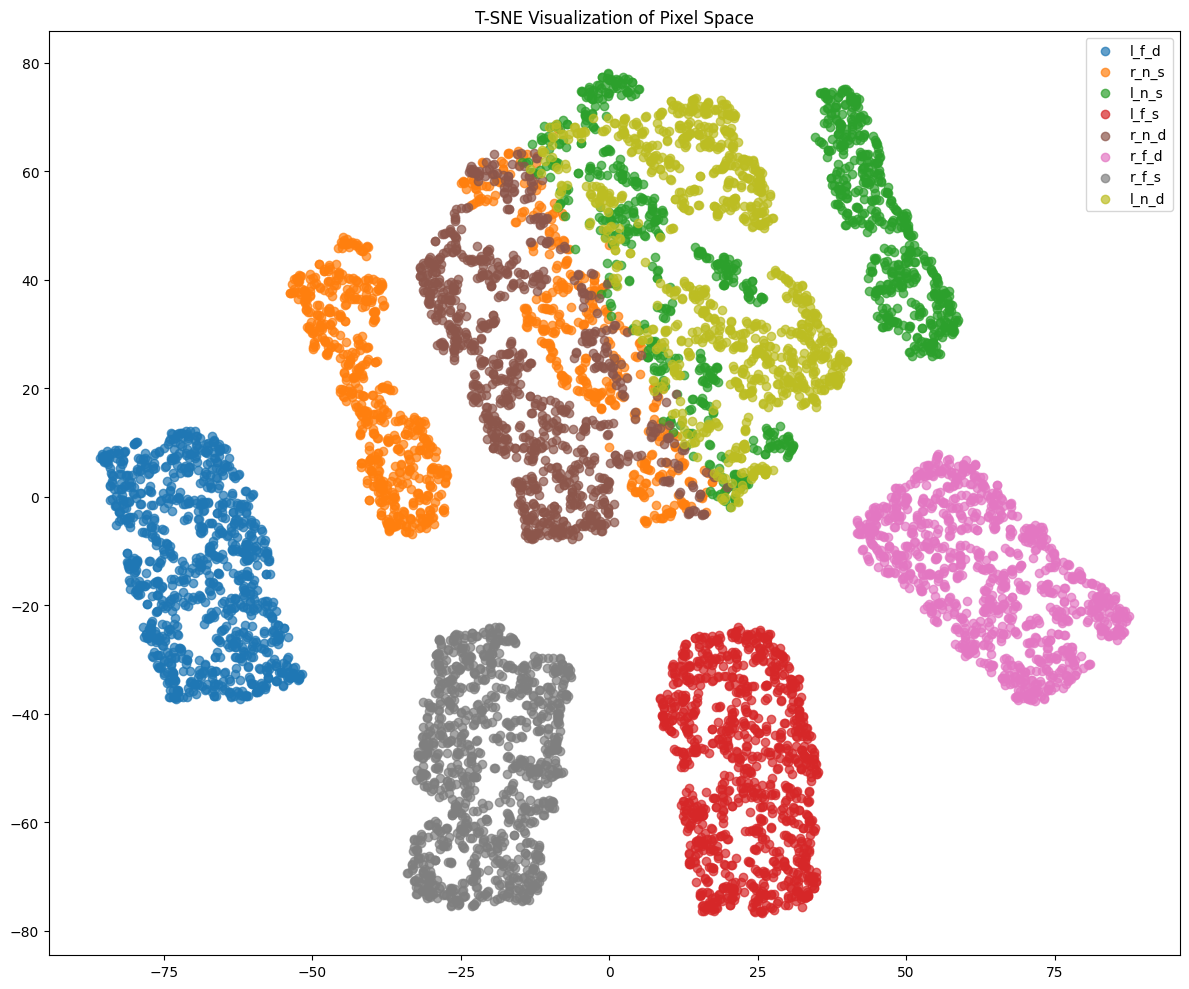

In [39]:
import os
import numpy as np
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from functools import partial

# 设置路径
base_path = "/cpfs01/user/hanyujin/causal-dm/synthetic/synthetic_data_eight"

# 创建 ImageDataset 实例
dataset = ImageDataset(
    folder=base_path,
    image_size=64,  # 根据需要调整
    exts=['png'],
    augment_horizontal_flip=False,
    convert_image_to='RGB'
)

# 创建 DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=4)

# 收集所有处理后的图片和它们的标签
processed_images = []
labels = []

# 遍历数据加载器
for batch in tqdm(dataloader, desc="Processing images"):
    processed_images.append(batch.numpy().reshape(batch.shape[0], -1))
    
    # 提取标签（假设文件夹名是标签）
    batch_labels = [str(path.parent.name) for path in dataset.paths[len(processed_images)*32-32:len(processed_images)*32]]
    labels.extend(batch_labels)

# 将处理后的图片转换为numpy数组
processed_images_np = np.concatenate(processed_images, axis=0)

print("Starting T-SNE...")
# 使用T-SNE降维
tsne = TSNE(n_components=2, random_state=42)
images_2d = tsne.fit_transform(processed_images_np)
print("T-SNE completed.")

# 为每个类别分配一个颜色
unique_labels = list(set(labels))
color_map = plt.cm.get_cmap('tab10')
color_dict = {label: color_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# 创建图表
plt.figure(figsize=(12, 10))

# T-SNE可视化
for label in unique_labels:
    mask = np.array(labels) == label
    plt.scatter(images_2d[mask, 0], images_2d[mask, 1], c=[color_dict[label]], label=label, alpha=0.7)

plt.legend()
plt.title("T-SNE Visualization of Pixel Space")

plt.tight_layout()
# plt.savefig("tsne_visualization_processed_images.png", dpi=300, bbox_inches='tight')
plt.show()

# Conditional

## Region

Generating images for l_n_d:   9%|▉         | 47/500 [00:01<00:12, 36.31it/s]/tmp/ipykernel_934438/3254459401.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))
Generating images for r_n_d: 100%|██████████| 500/500 [00:11<00:00, 43.73it/s]


Image generation complete.


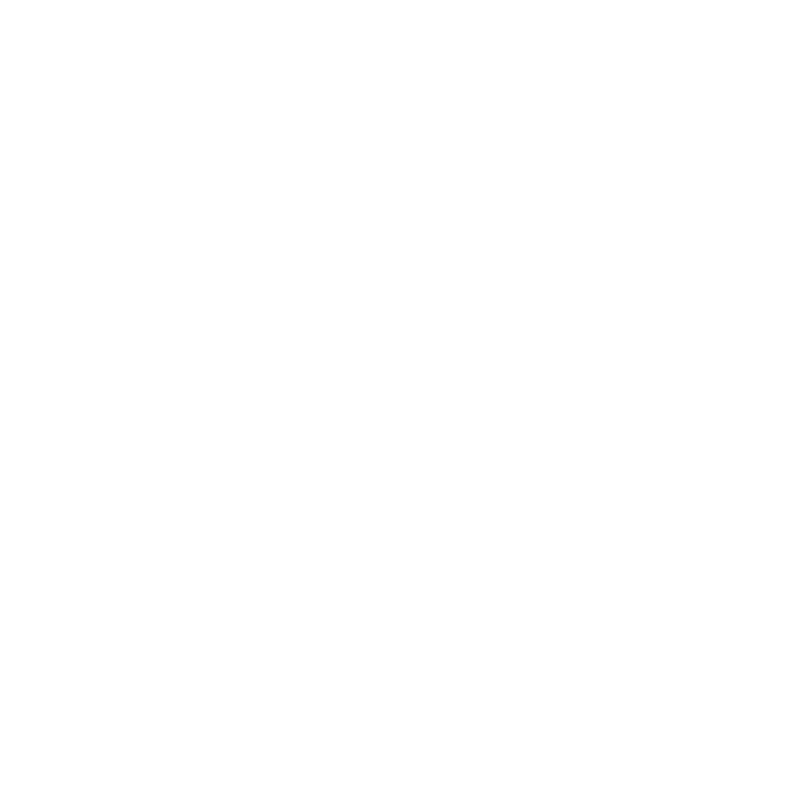

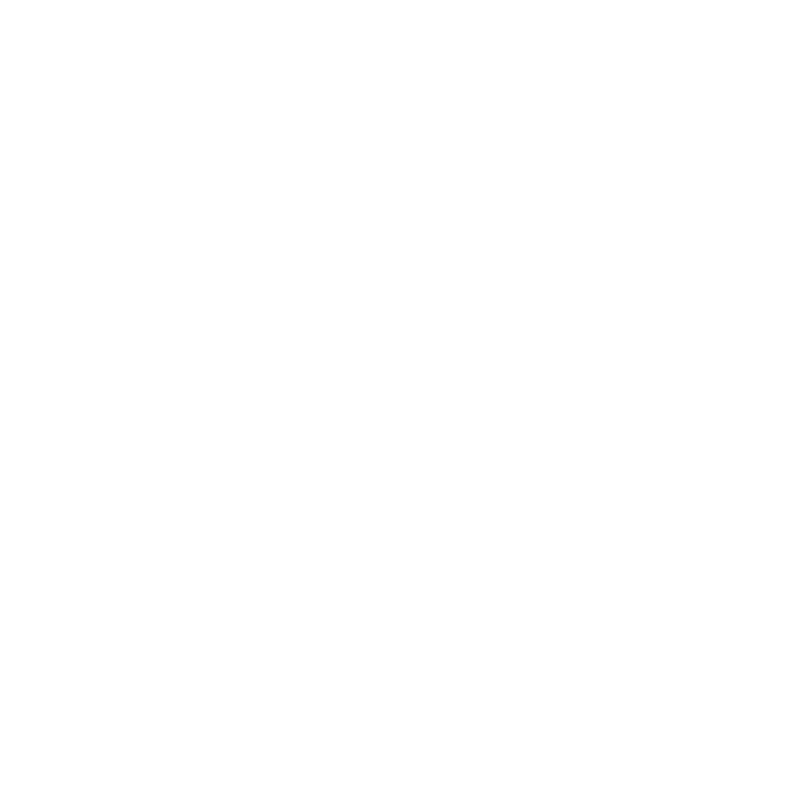

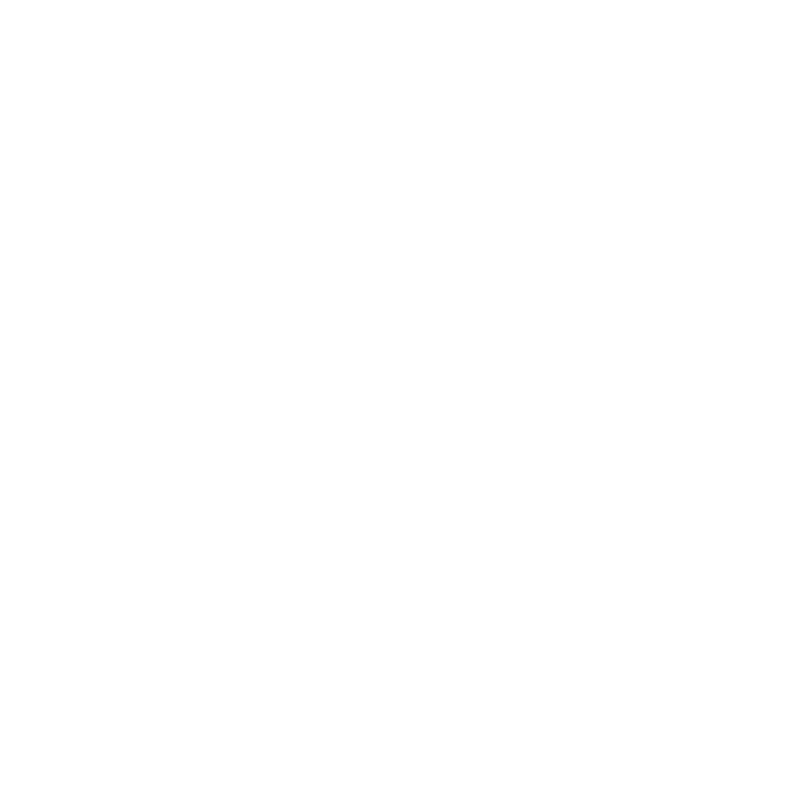

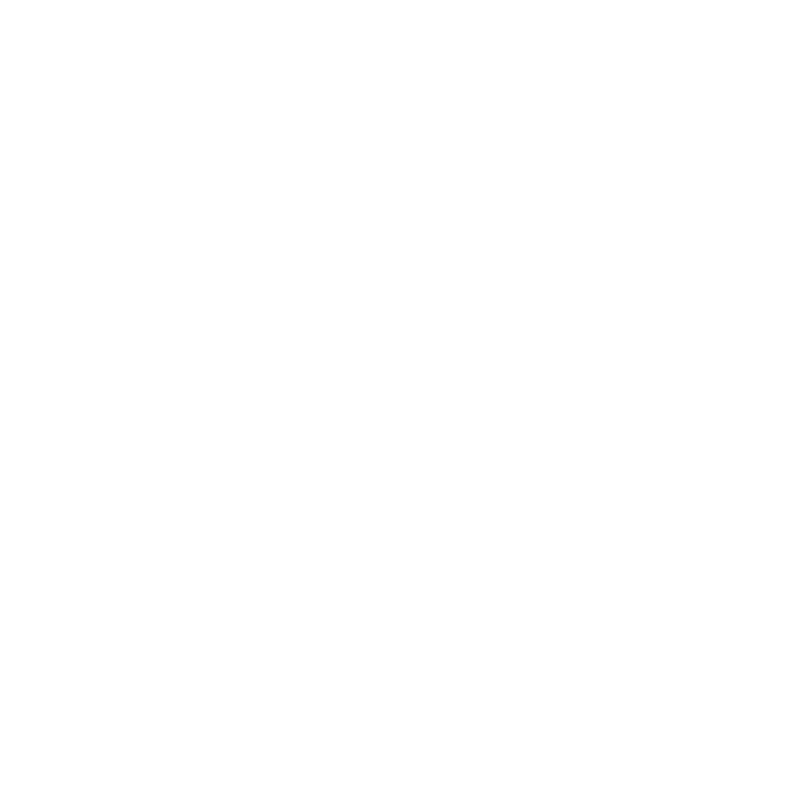

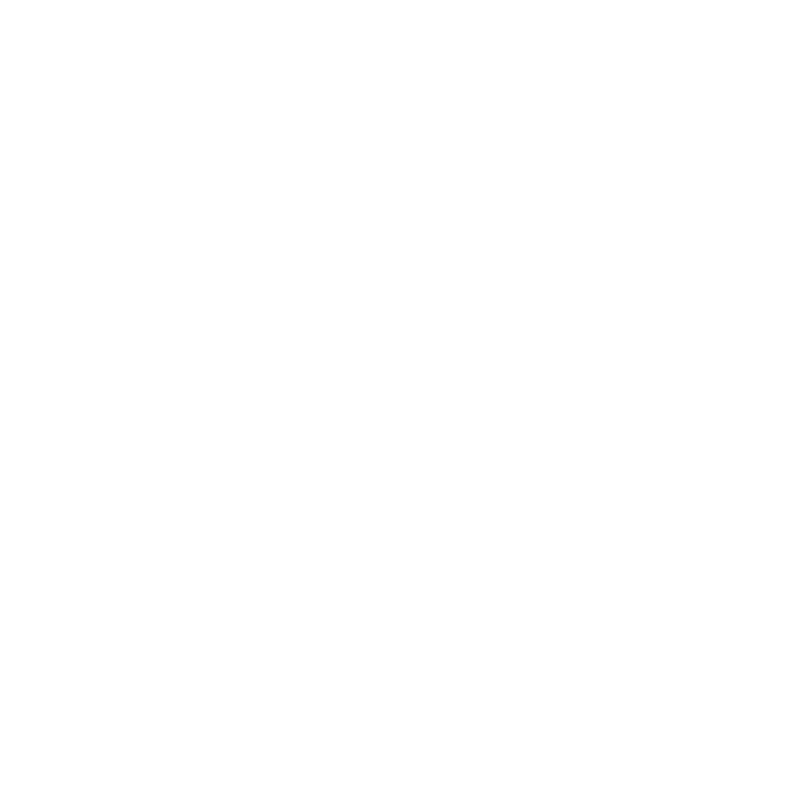

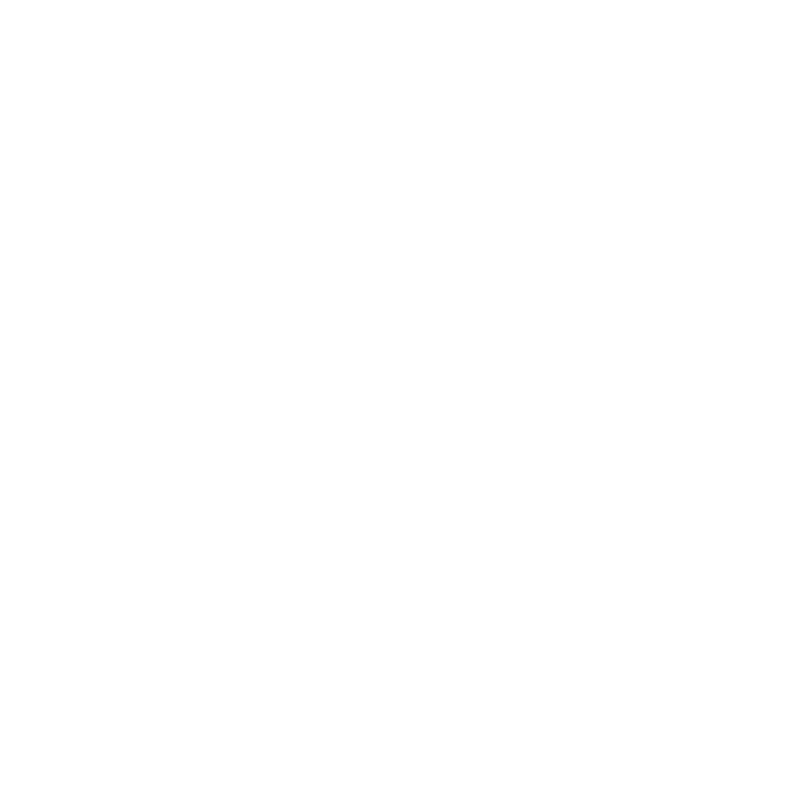

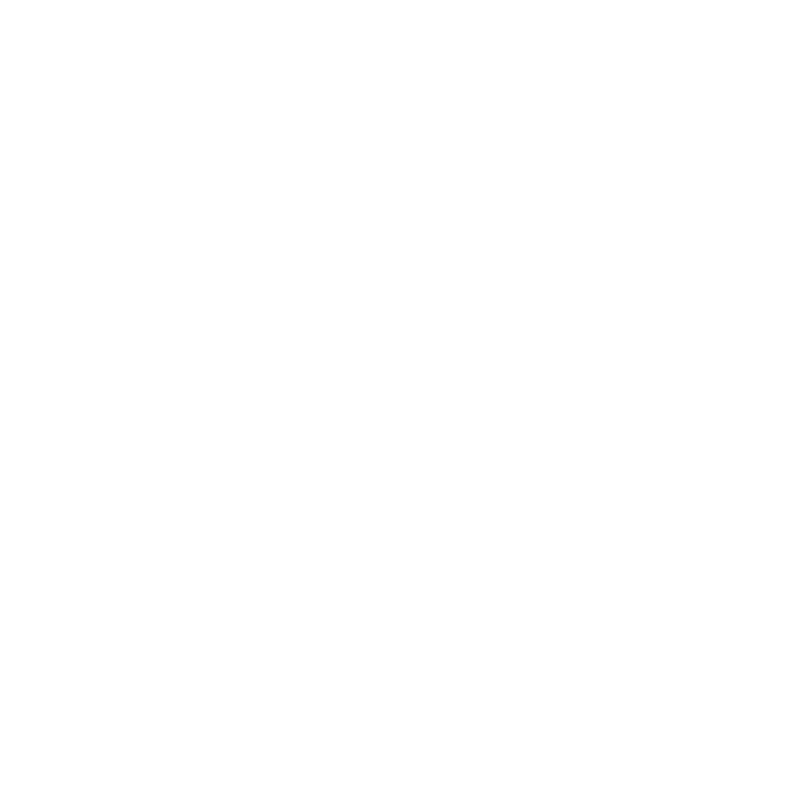

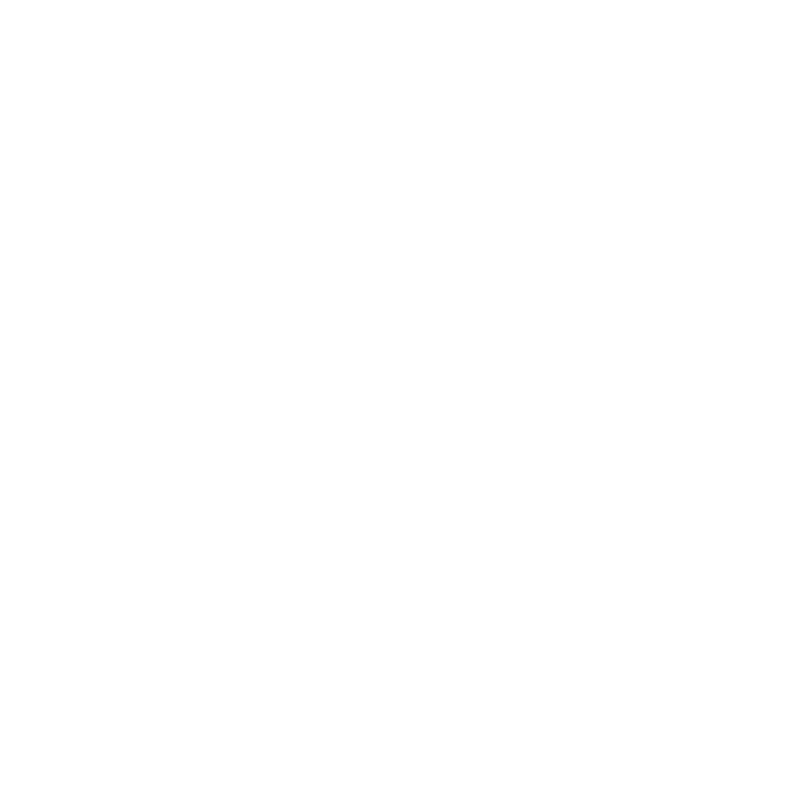

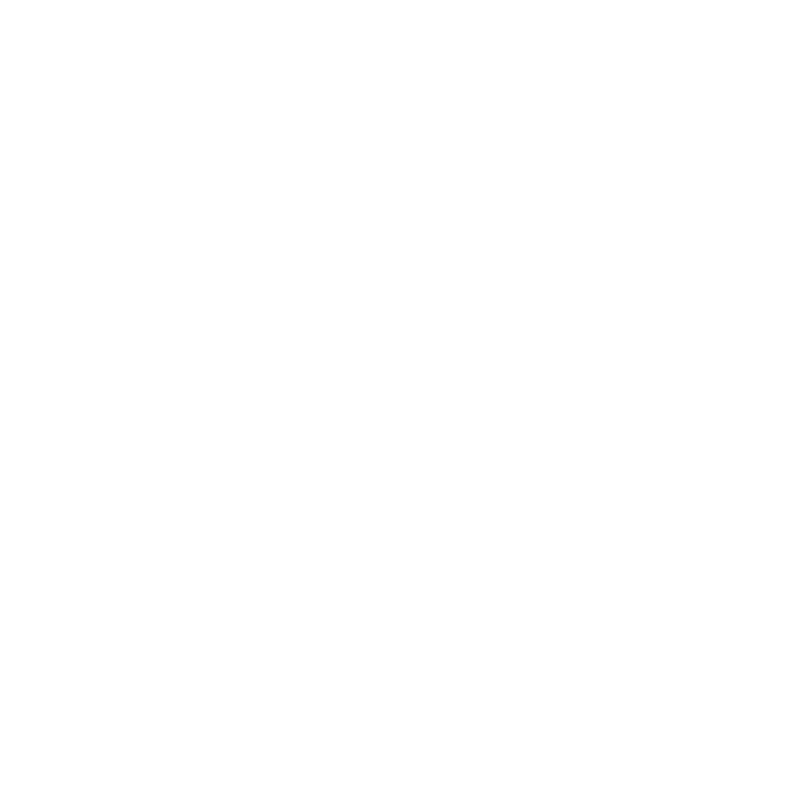

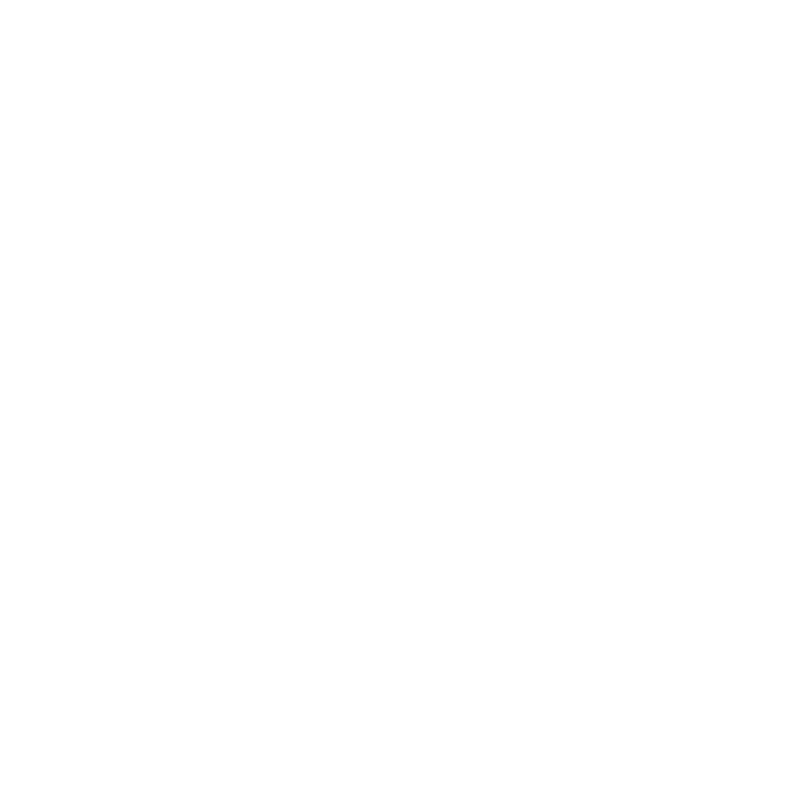

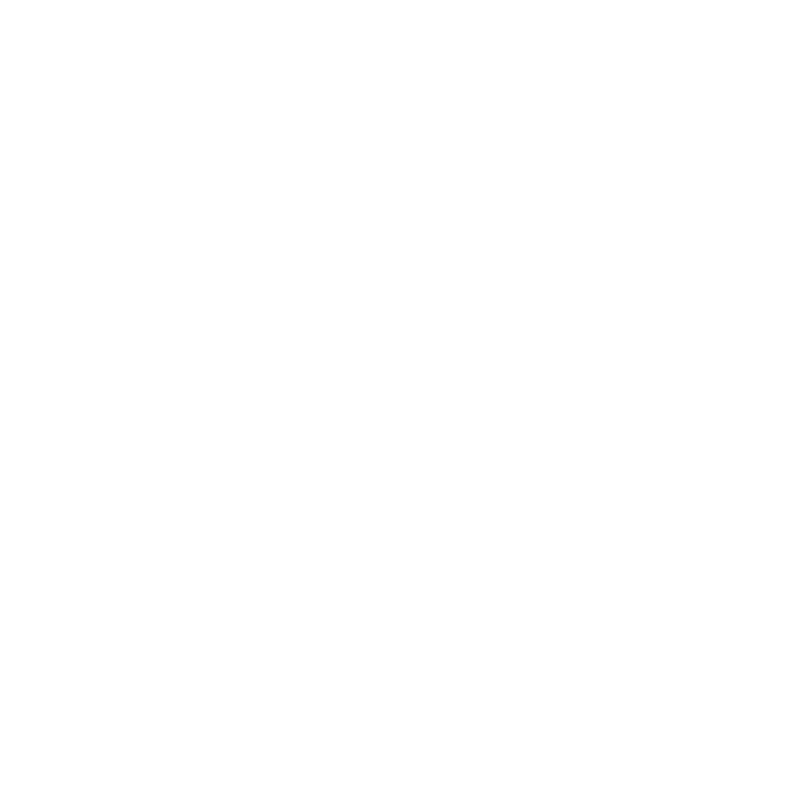

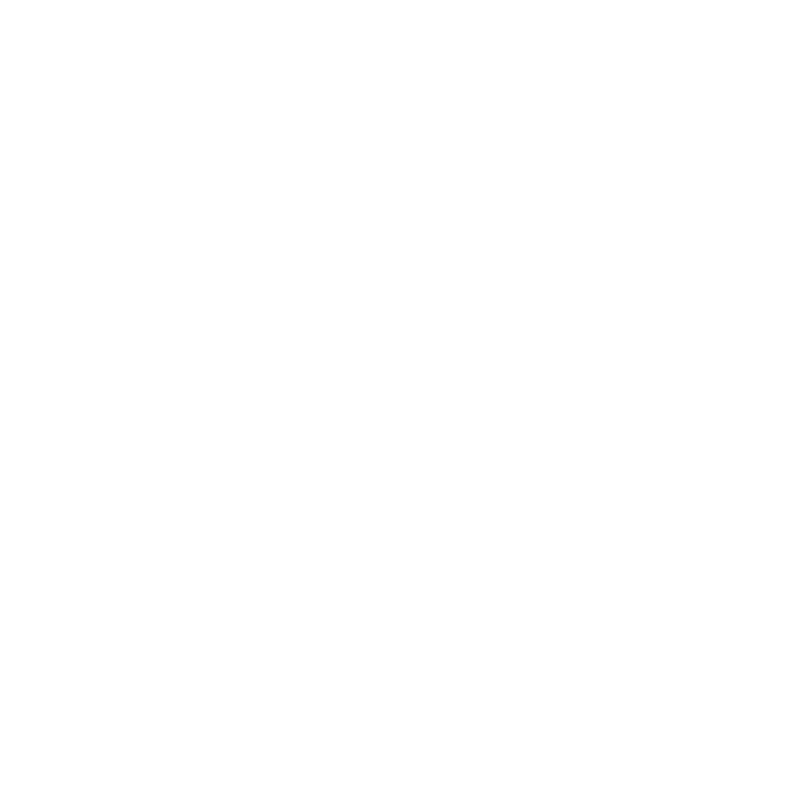

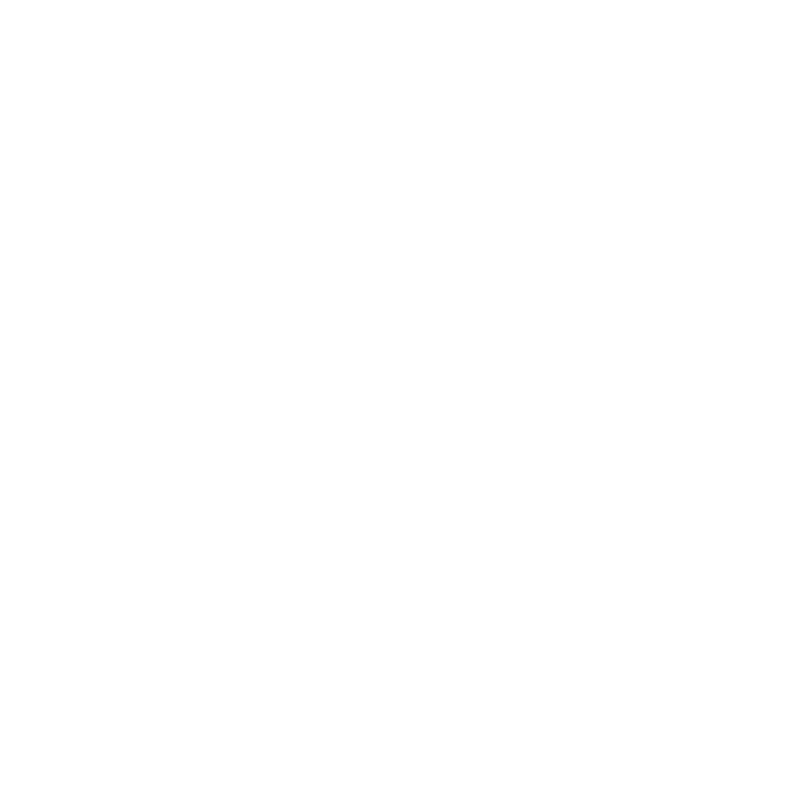

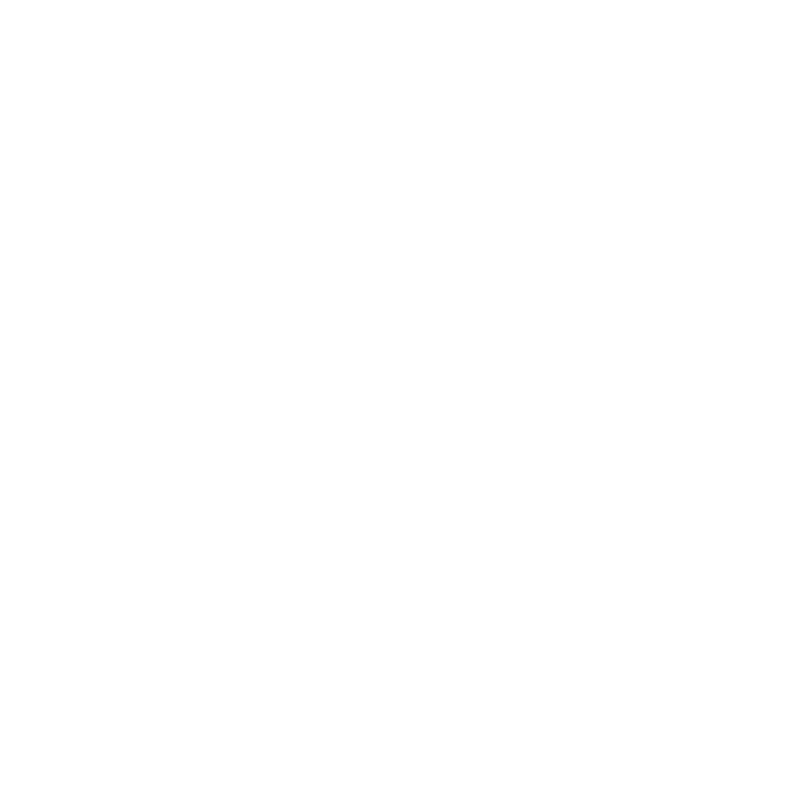

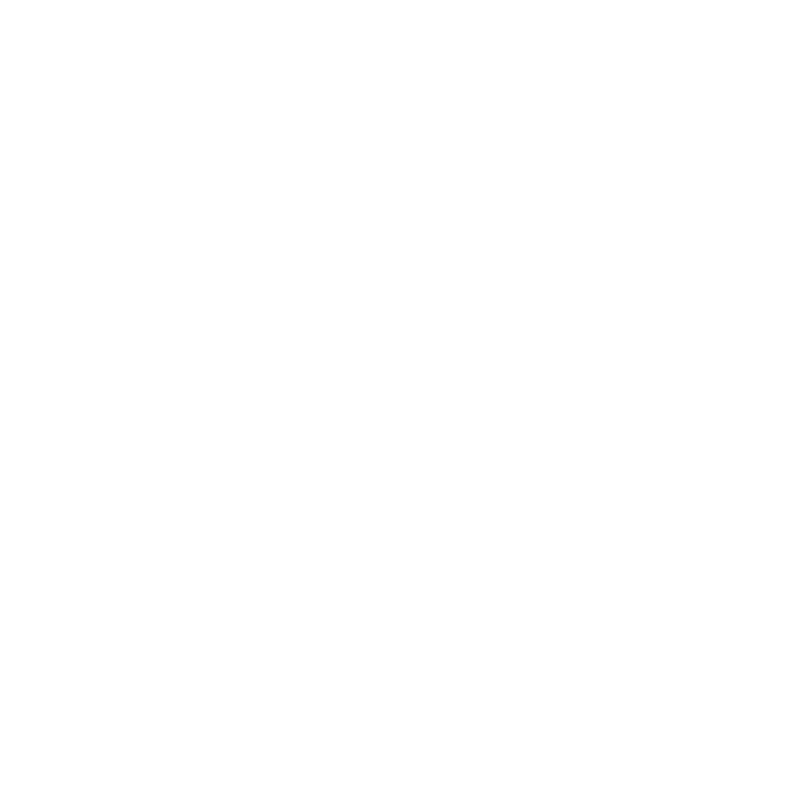

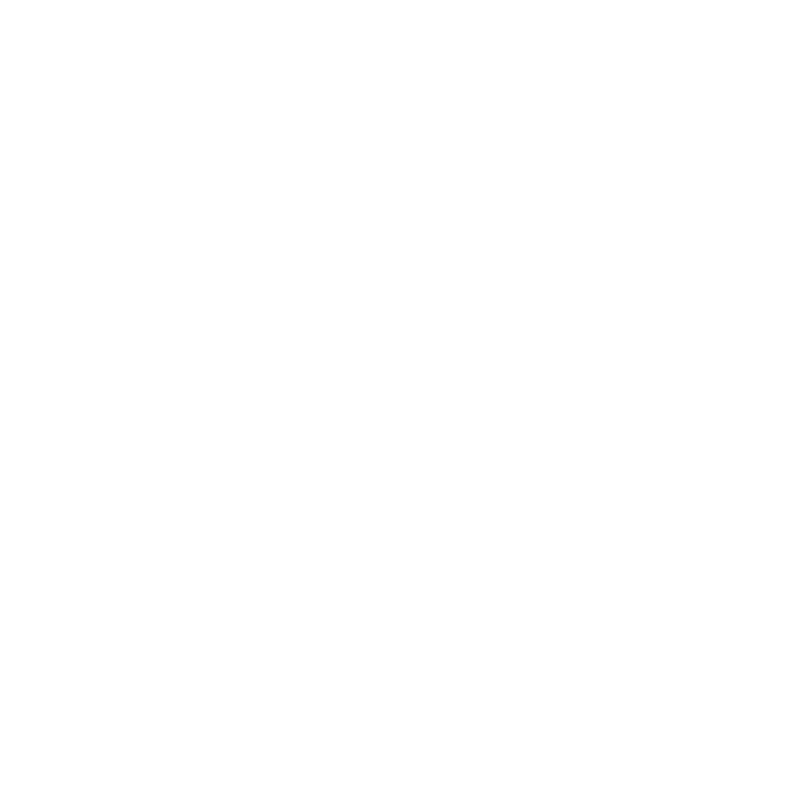

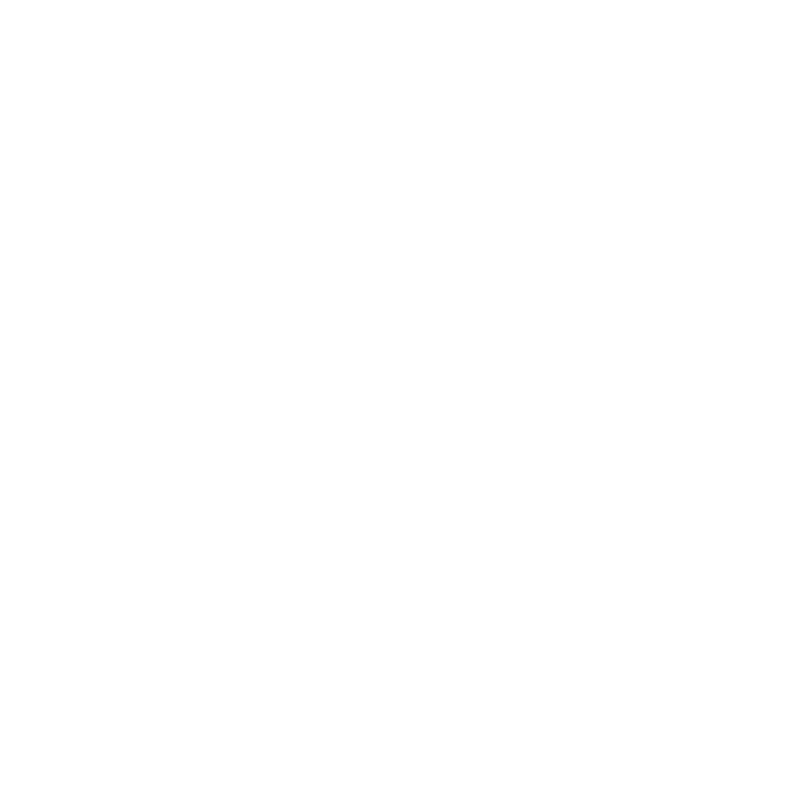

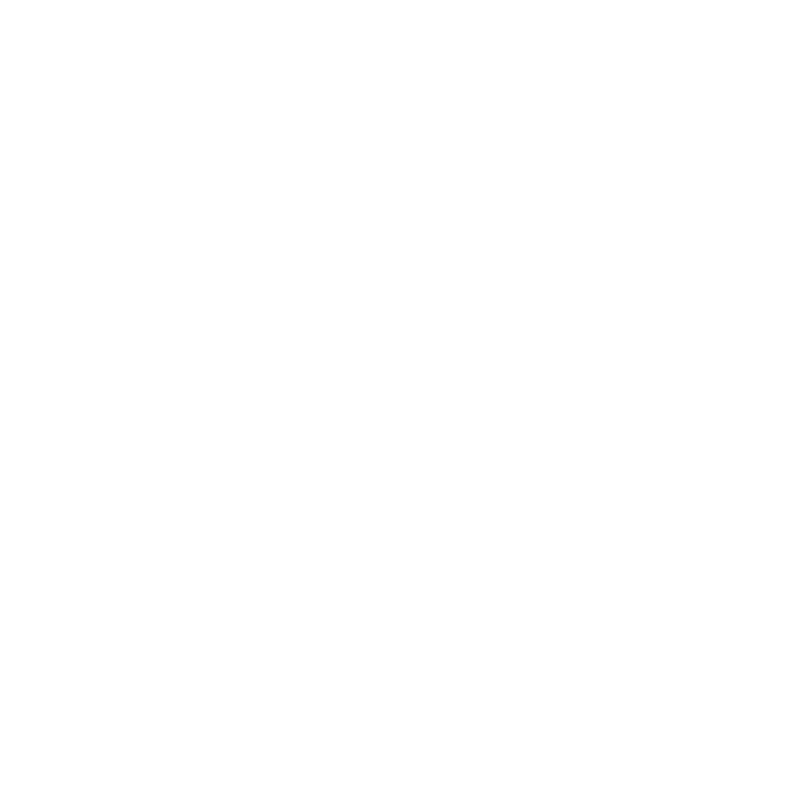

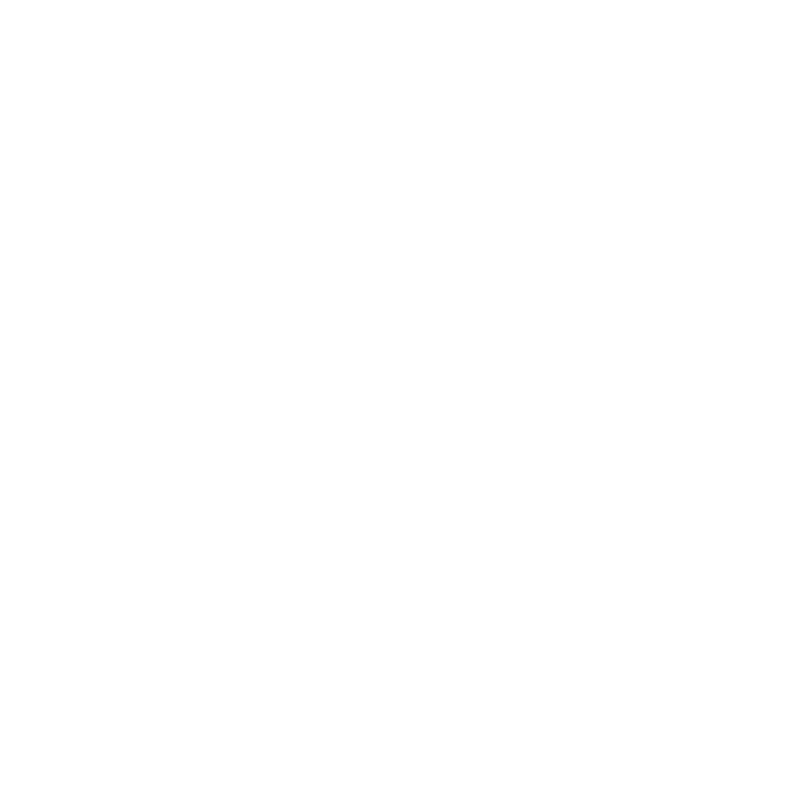

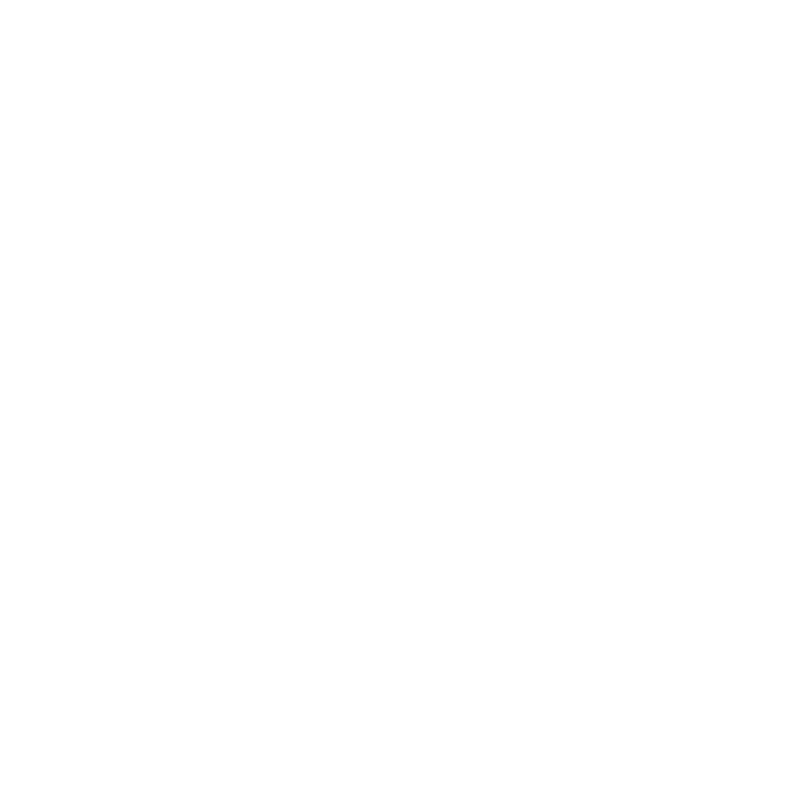

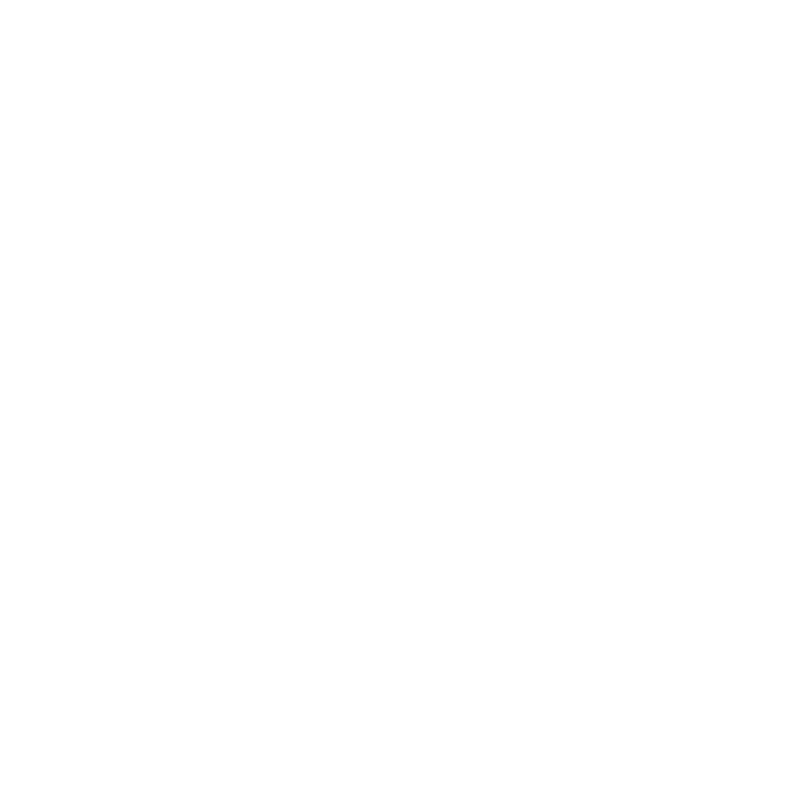

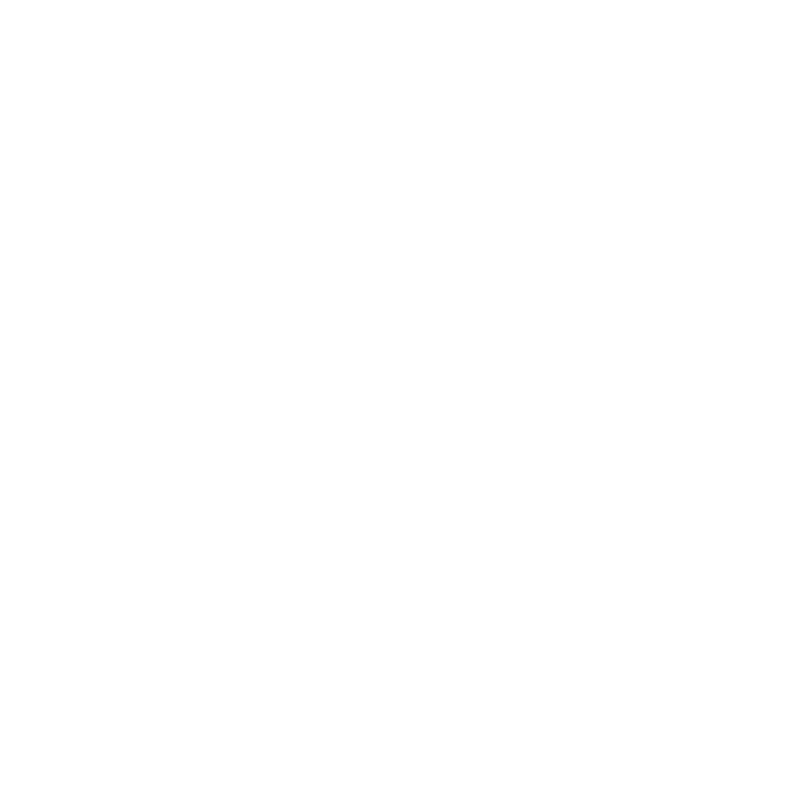

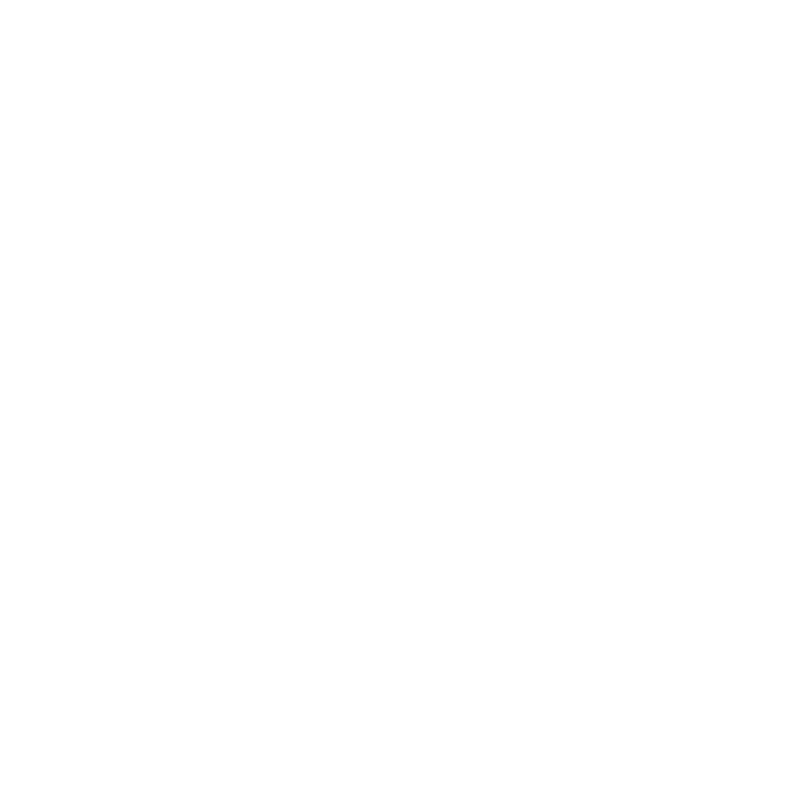

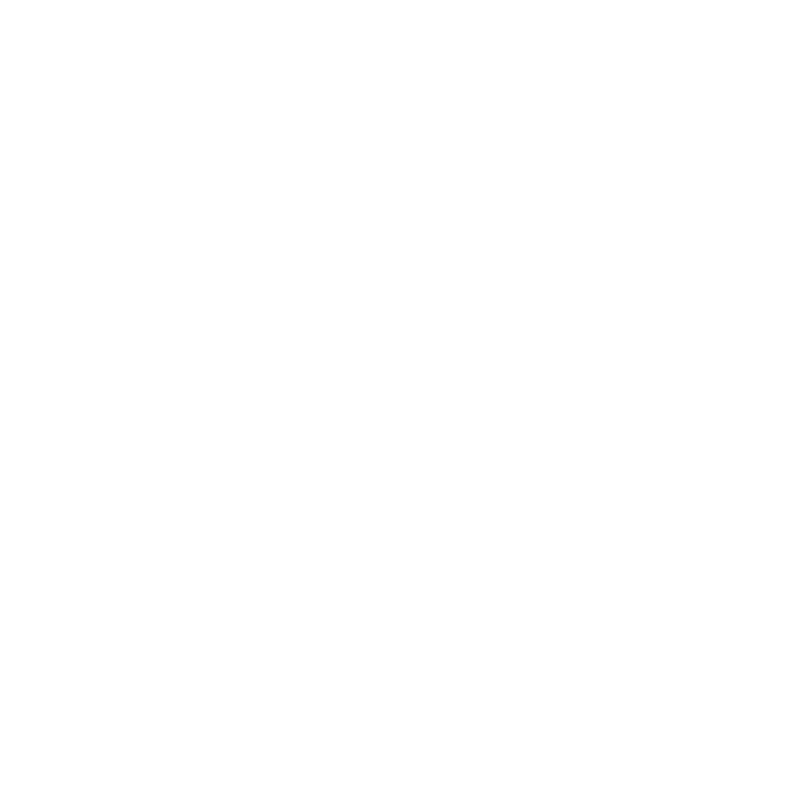

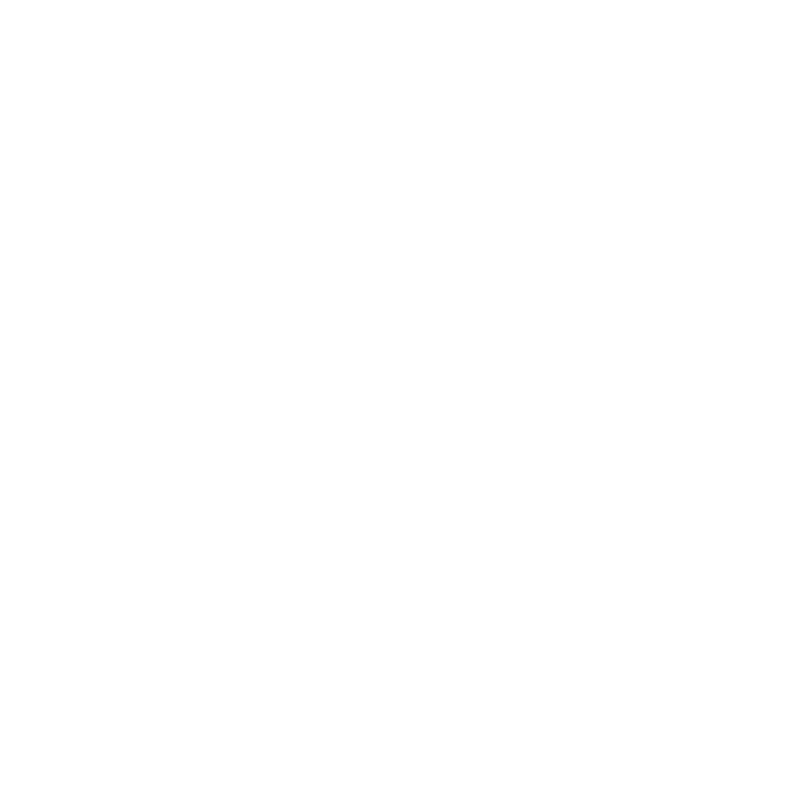

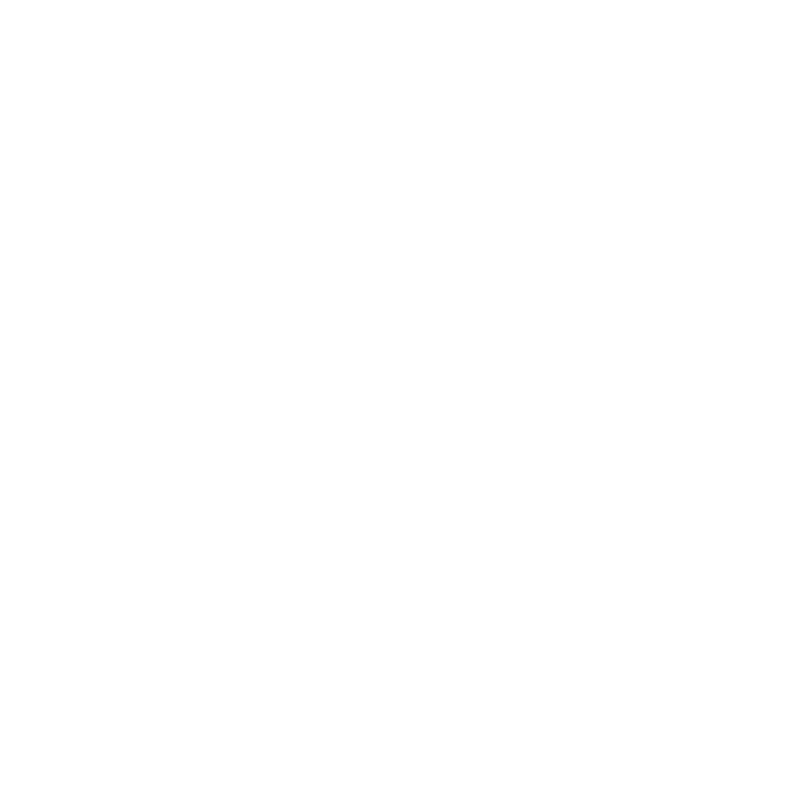

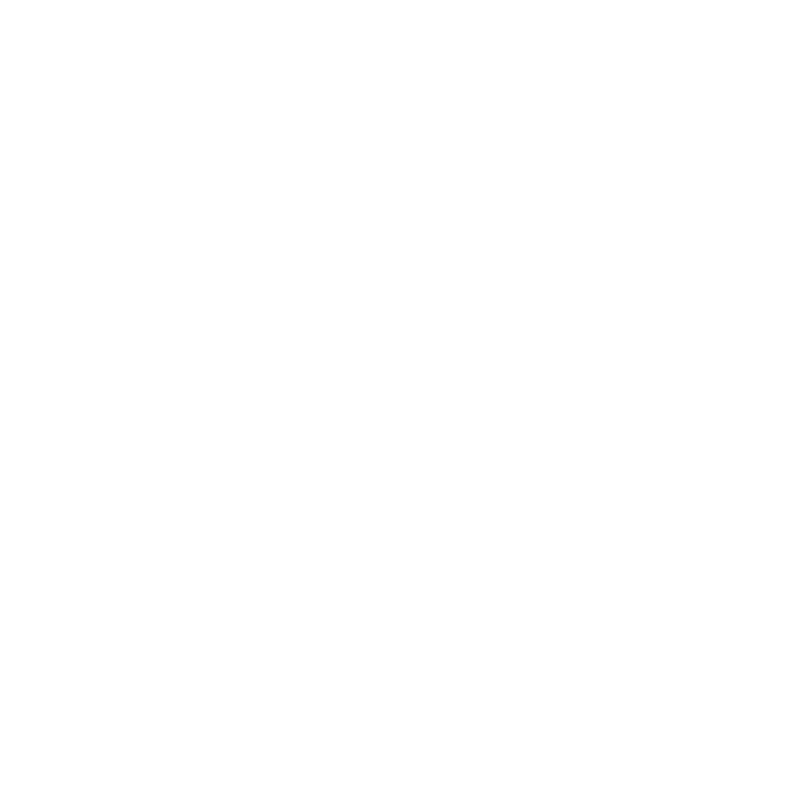

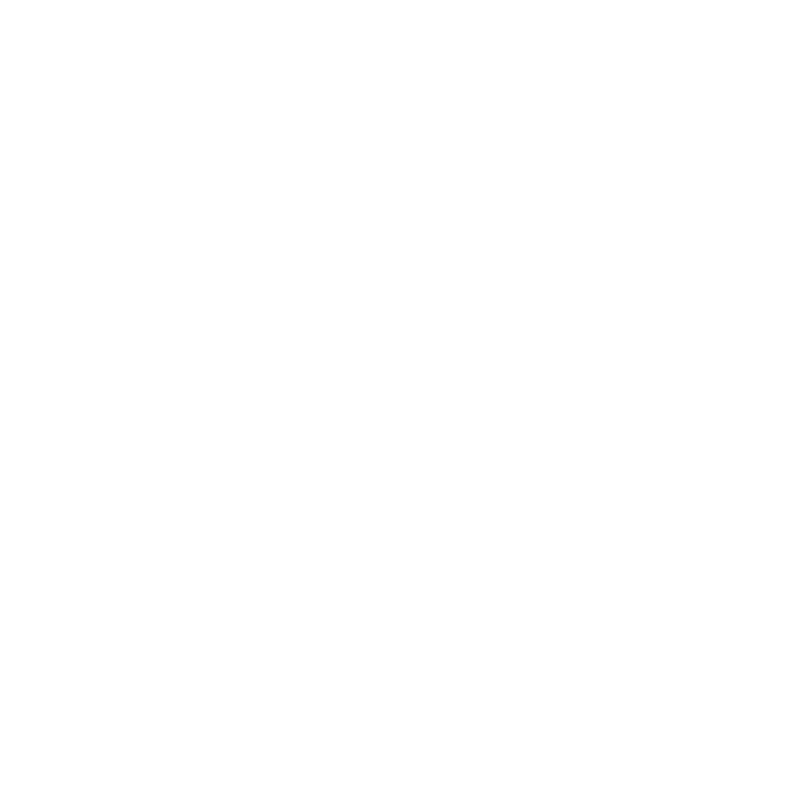

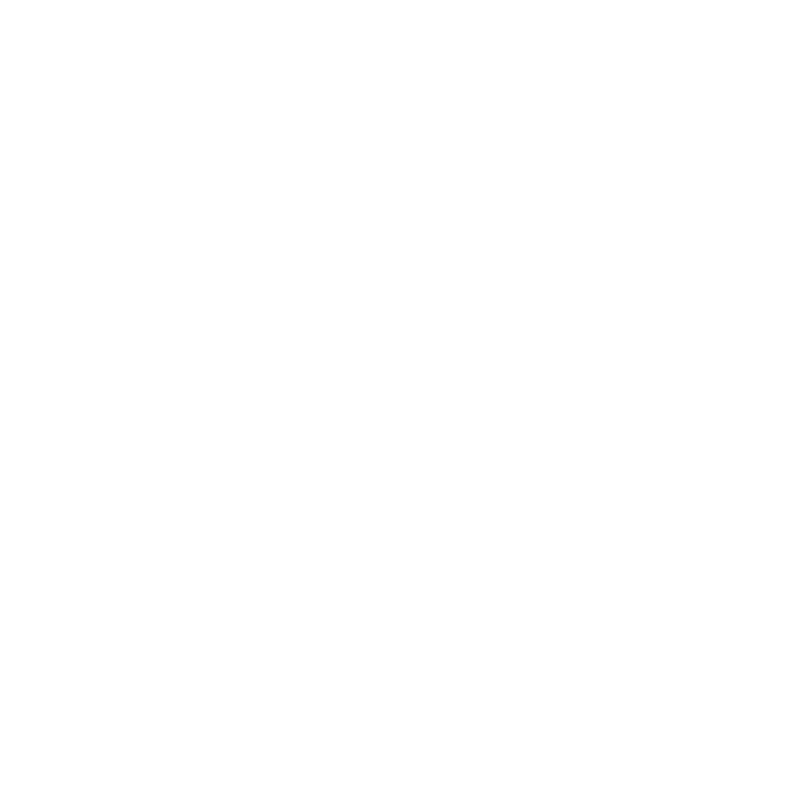

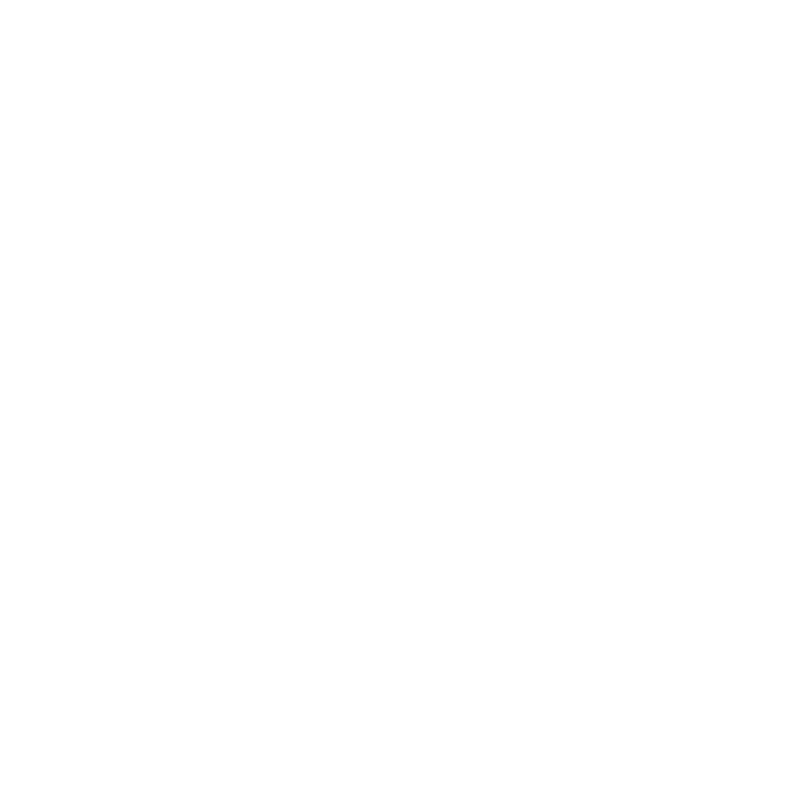

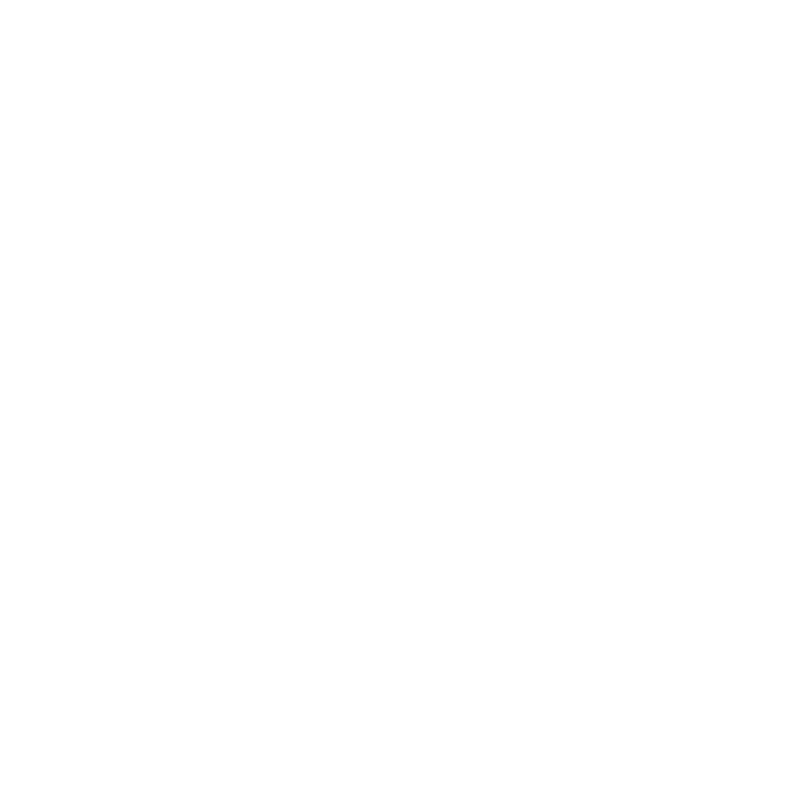

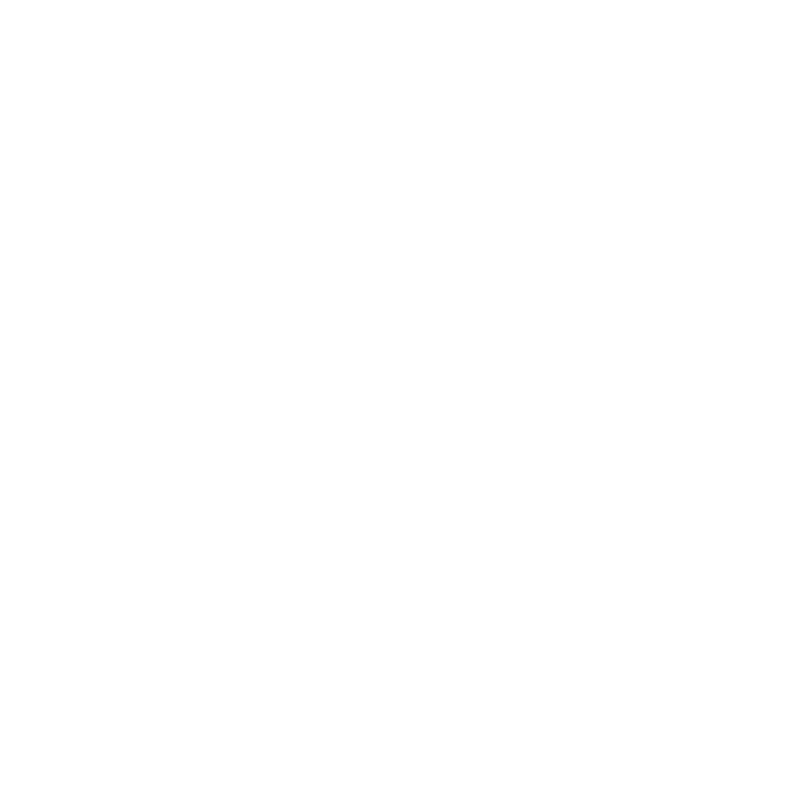

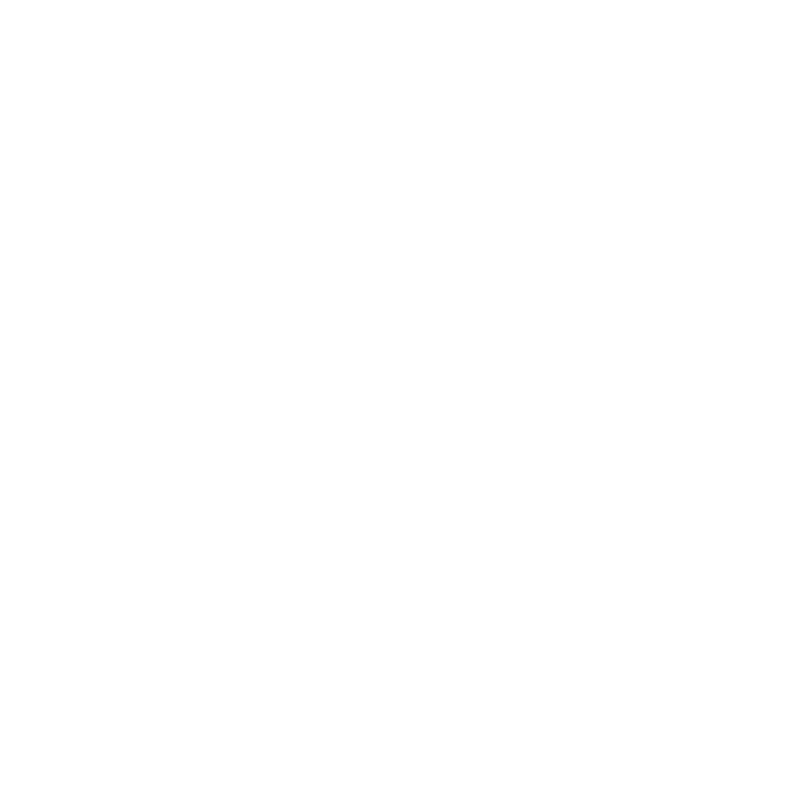

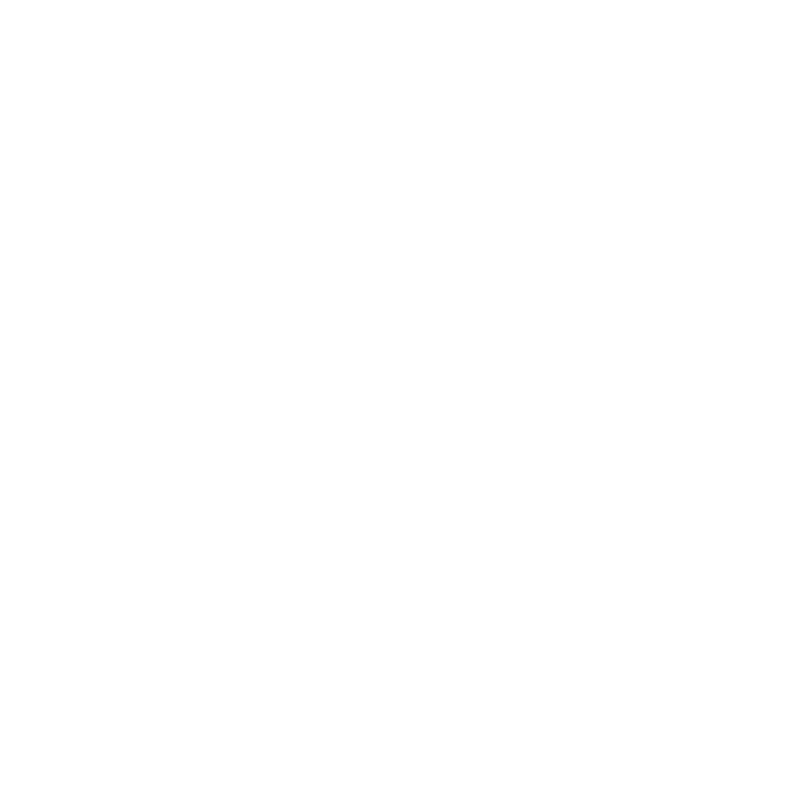

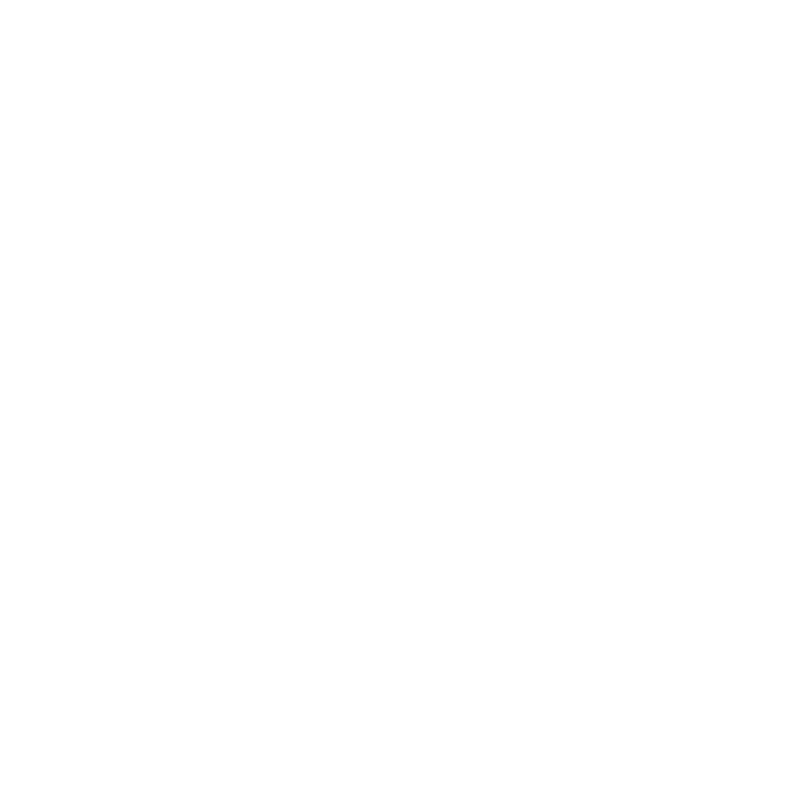

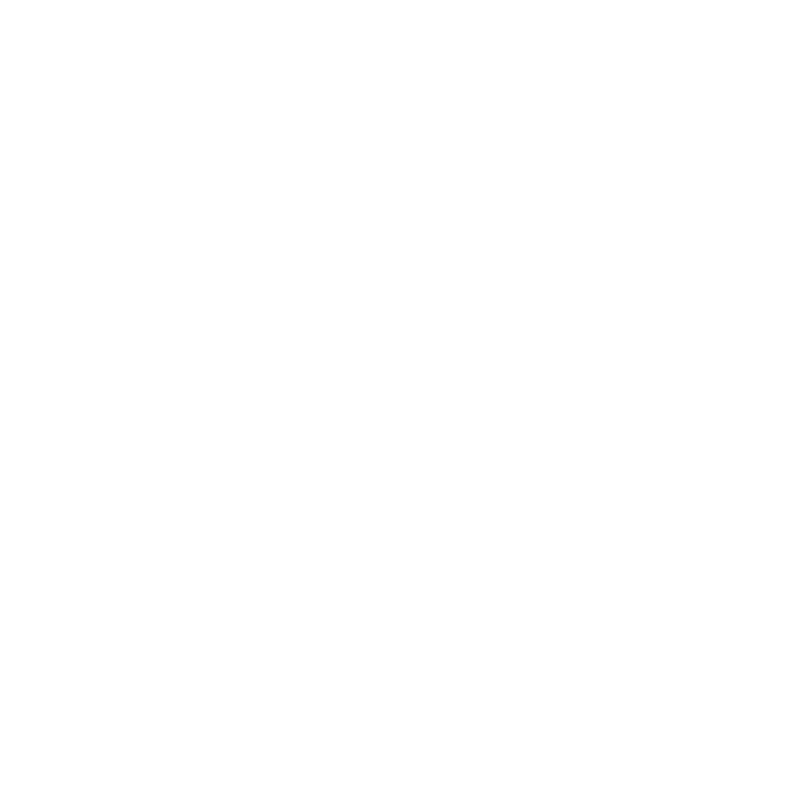

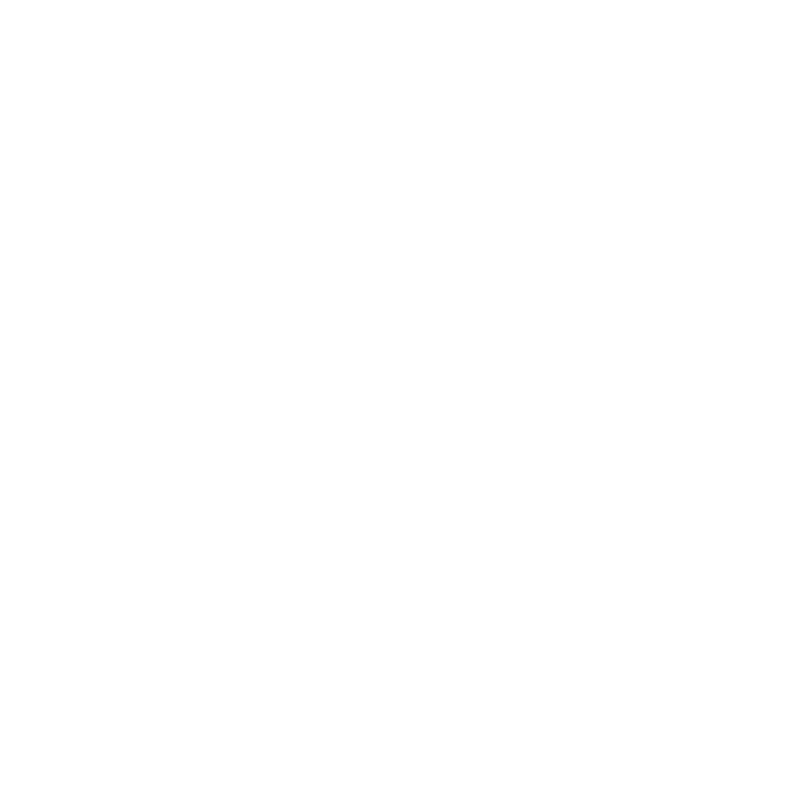

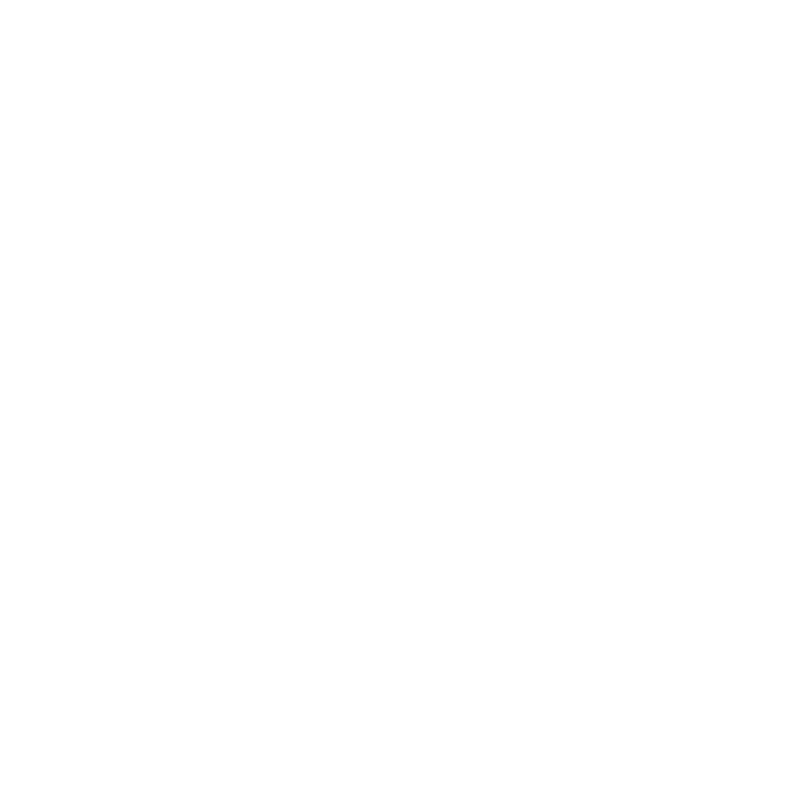

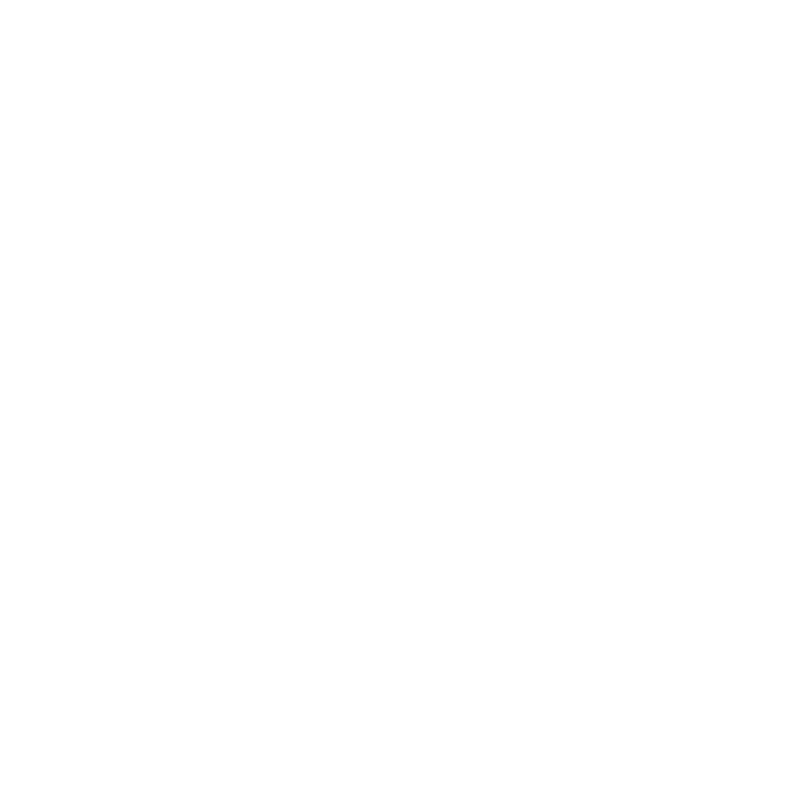

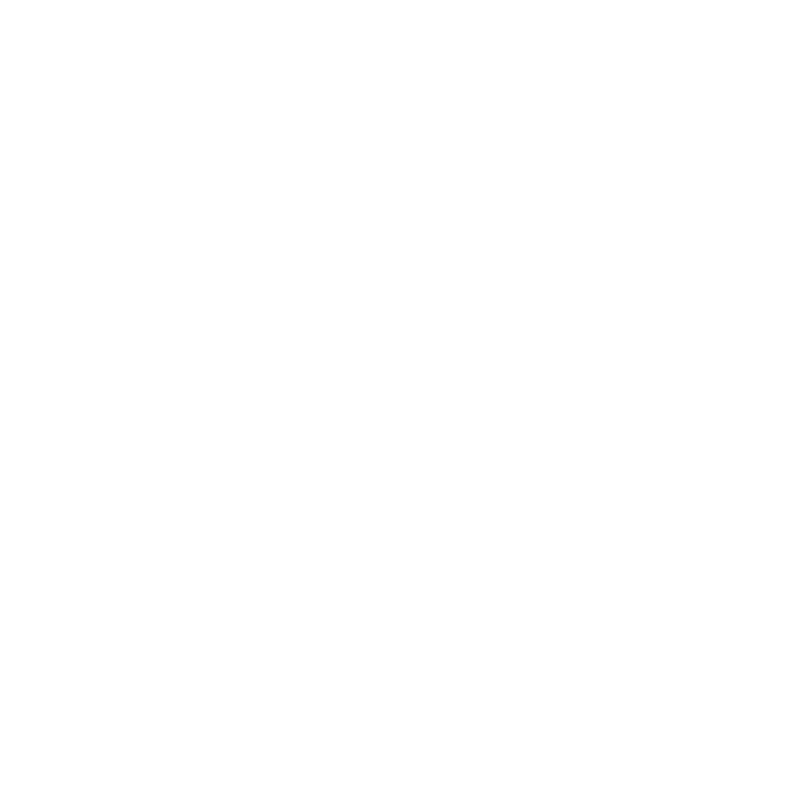

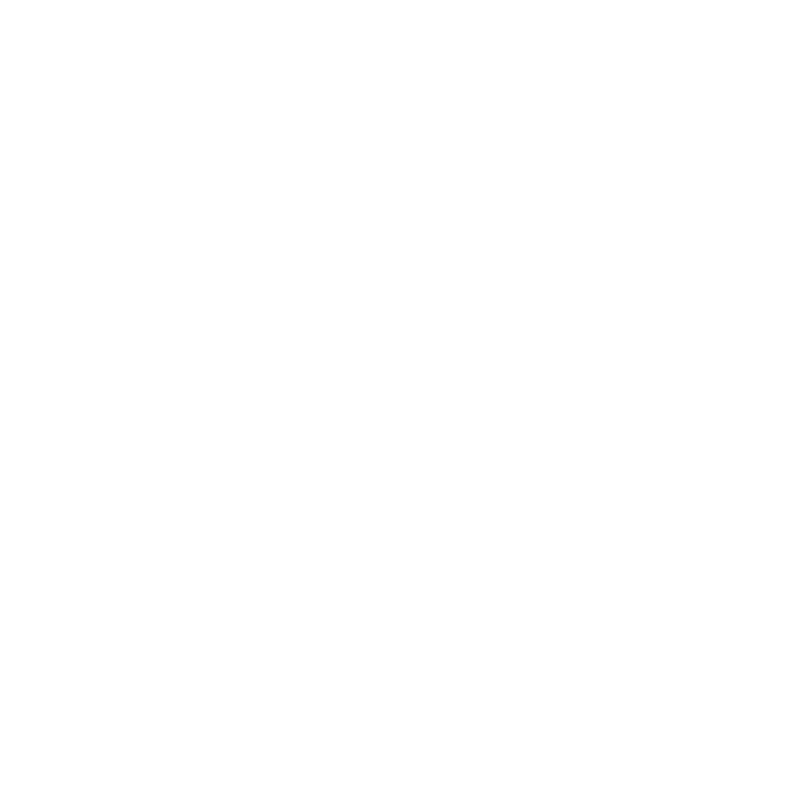

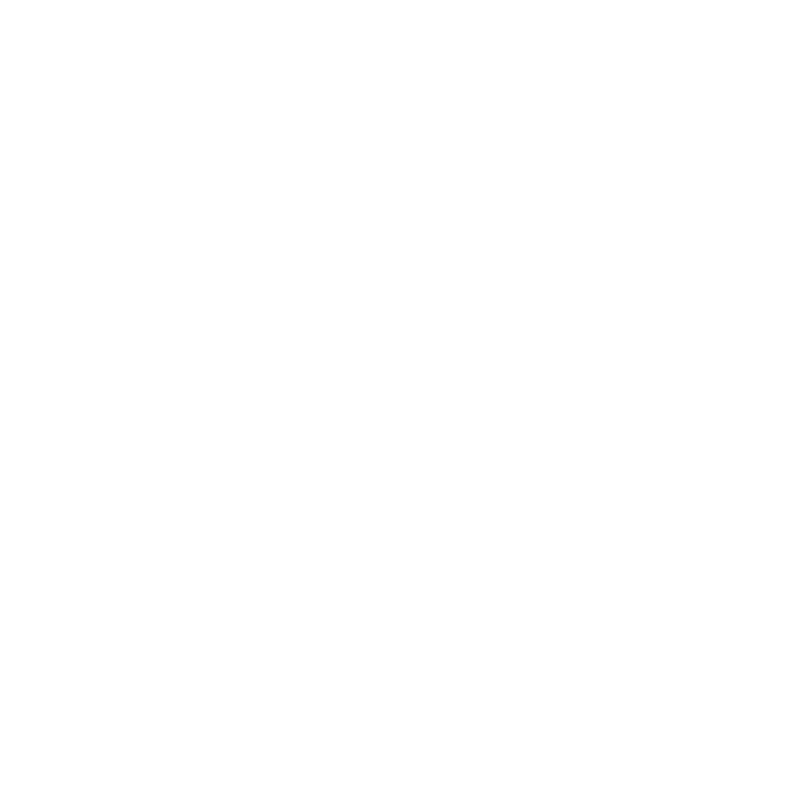

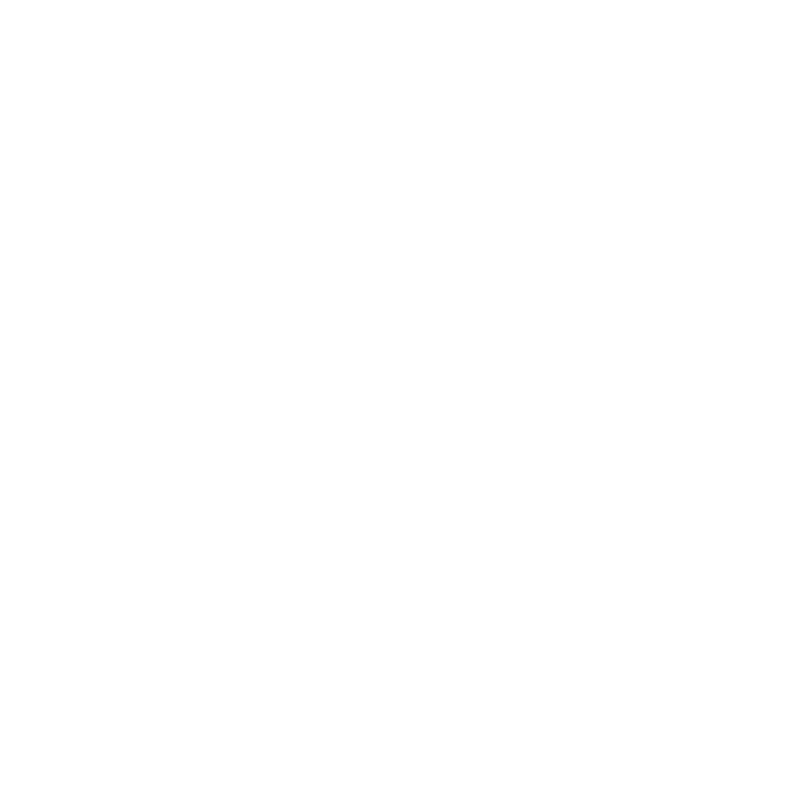

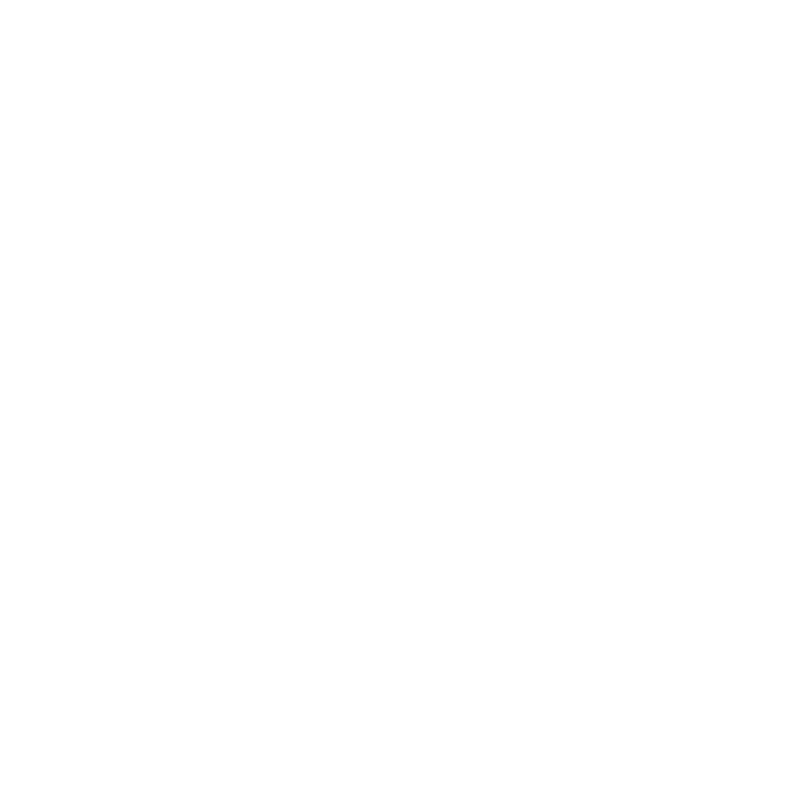

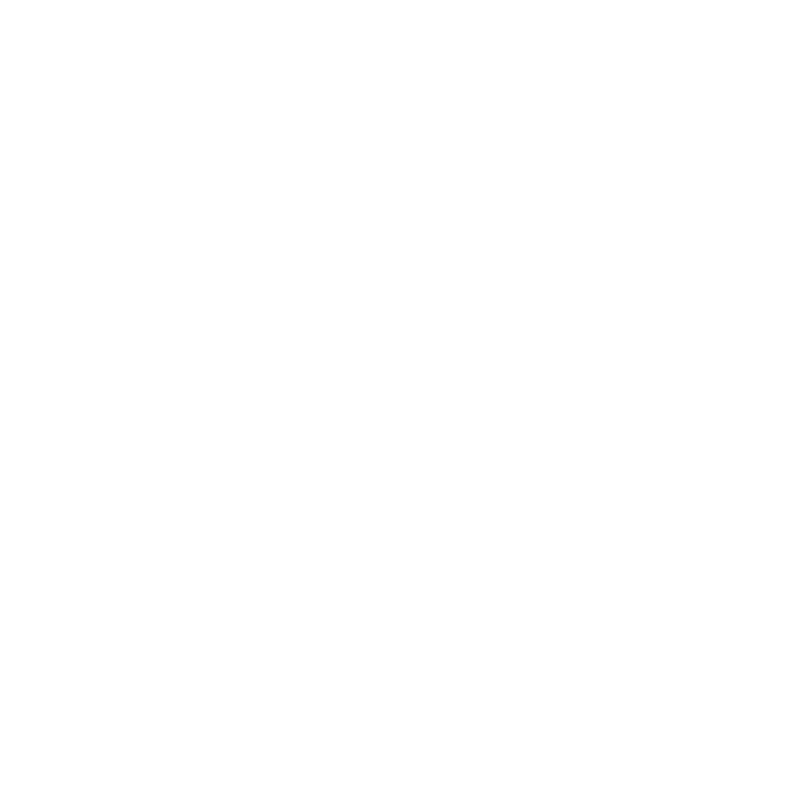

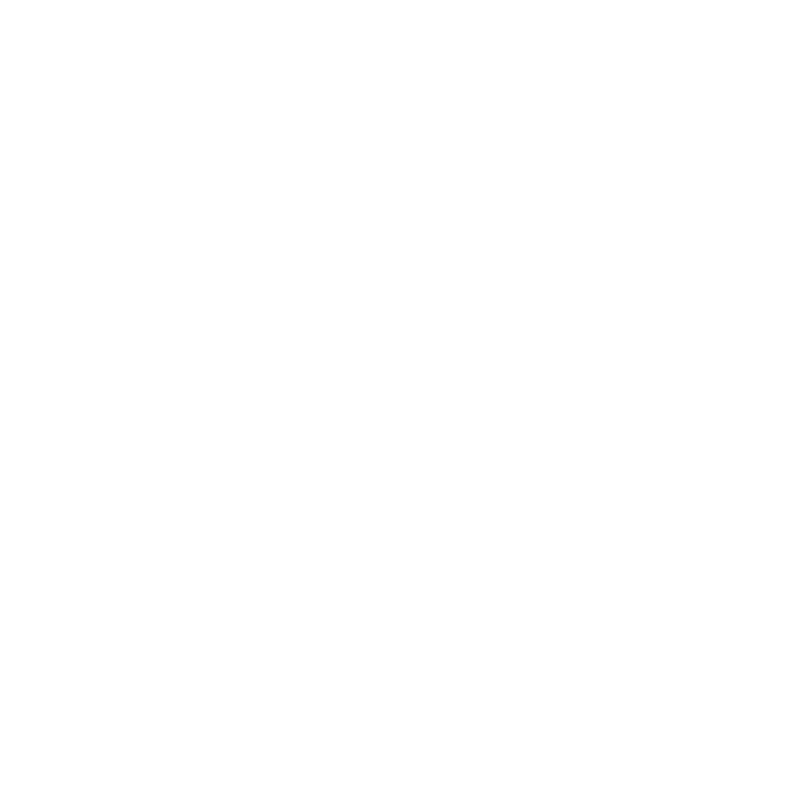

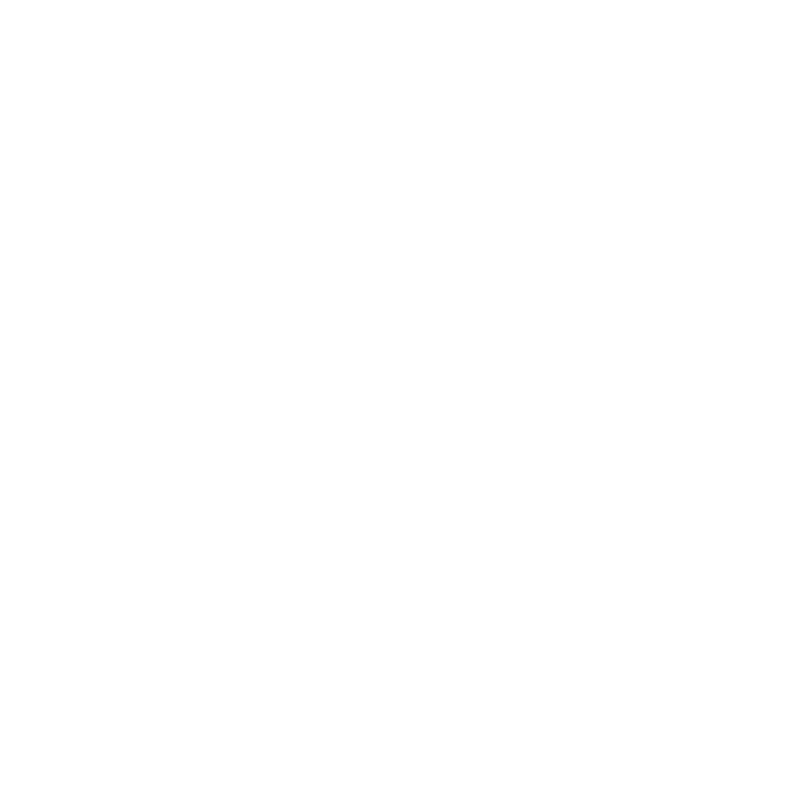

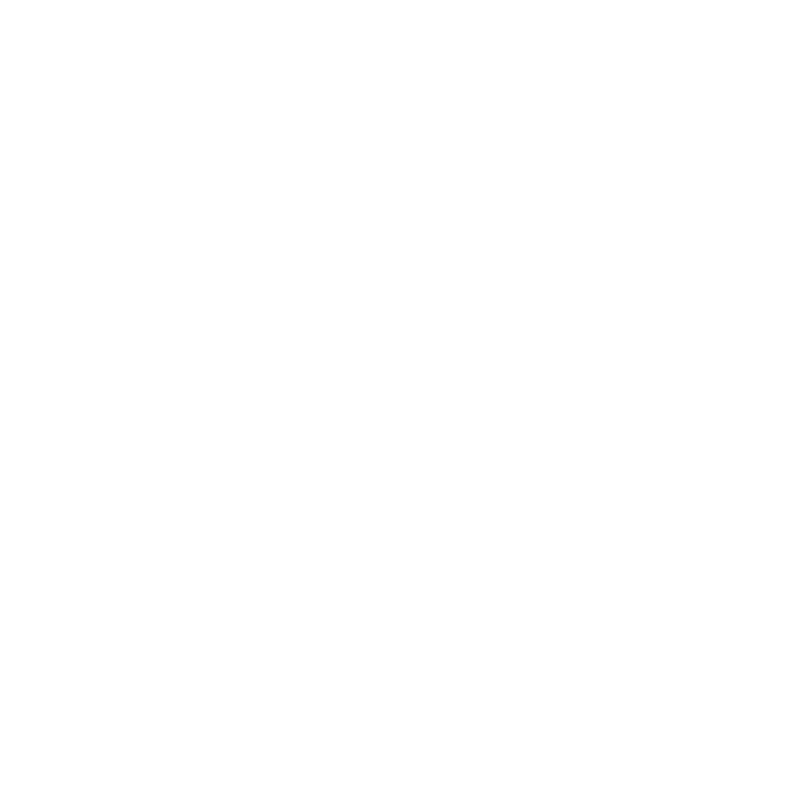

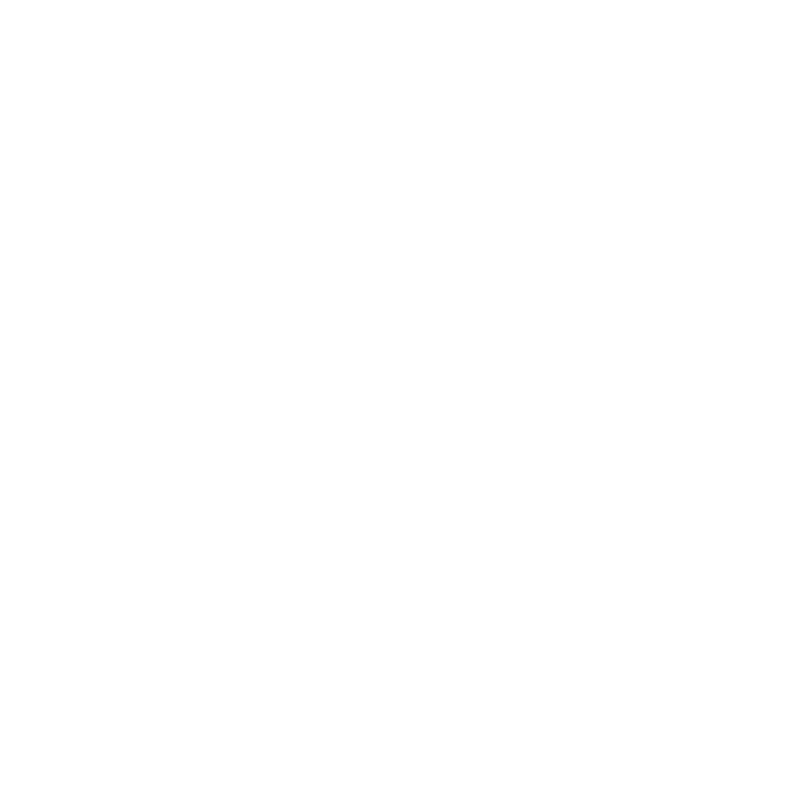

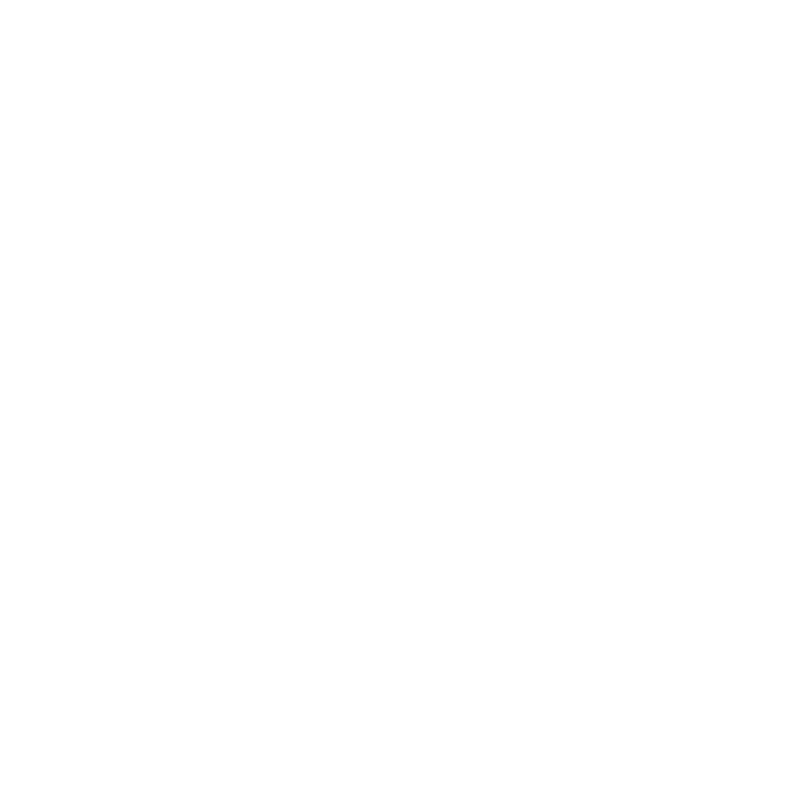

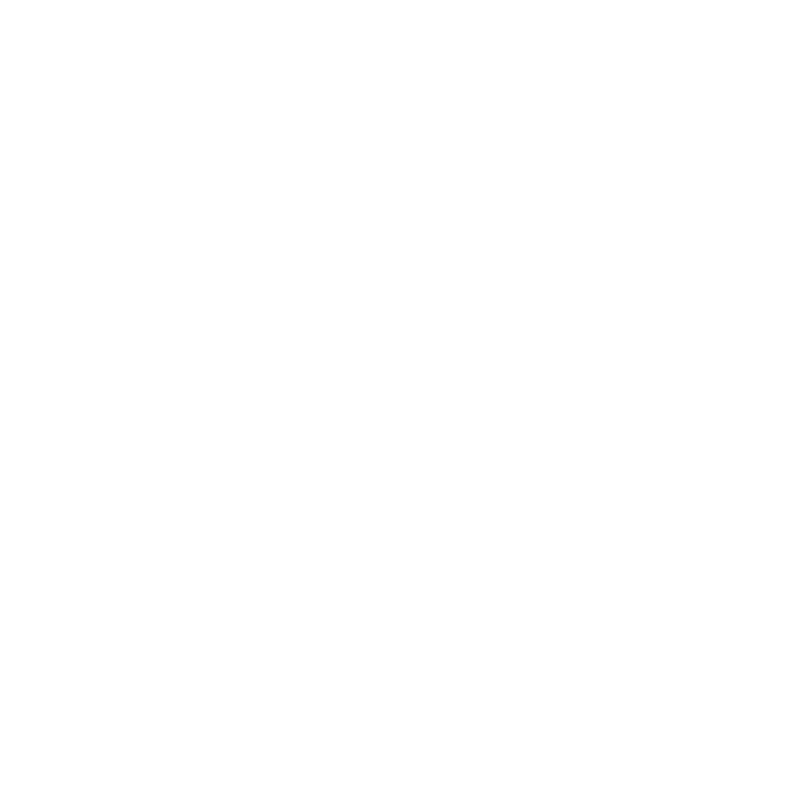

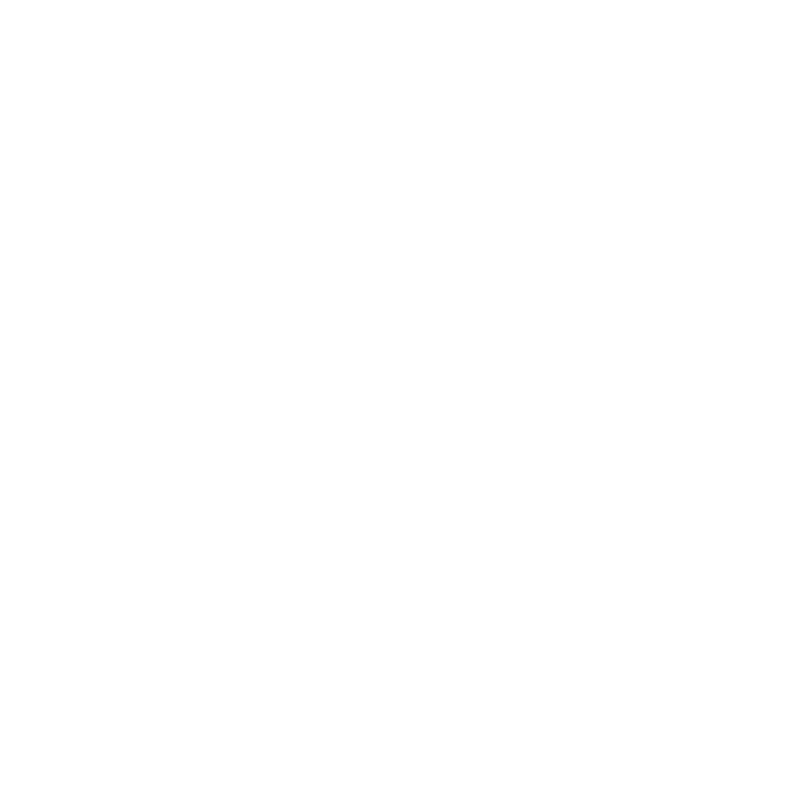

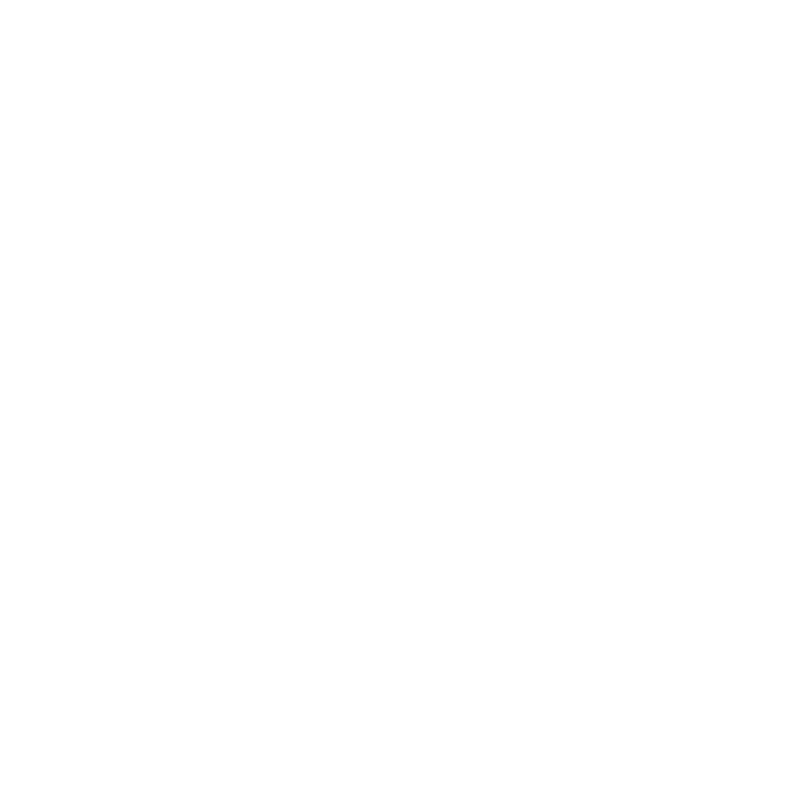

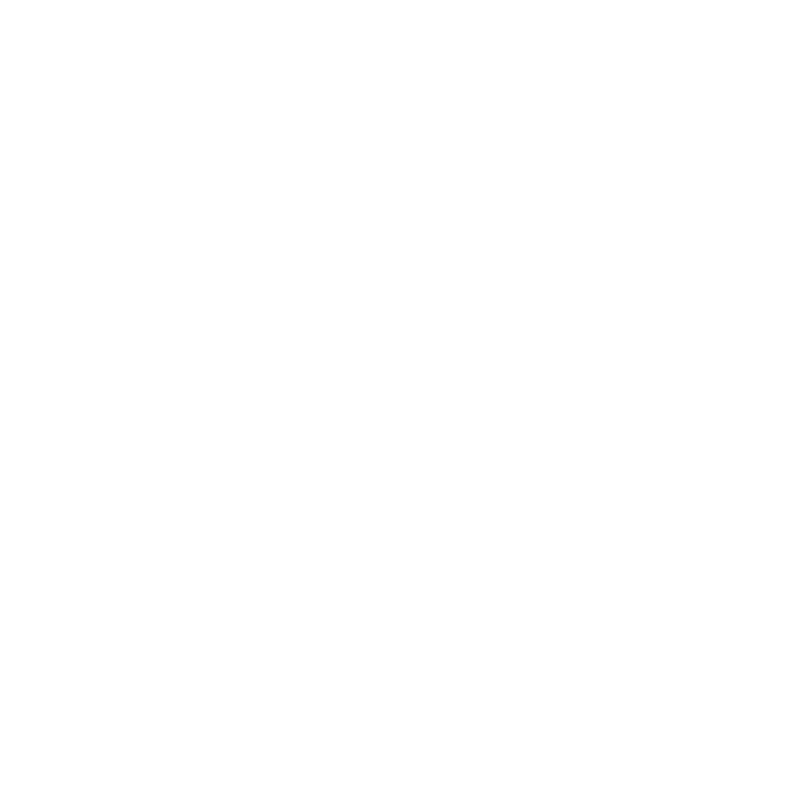

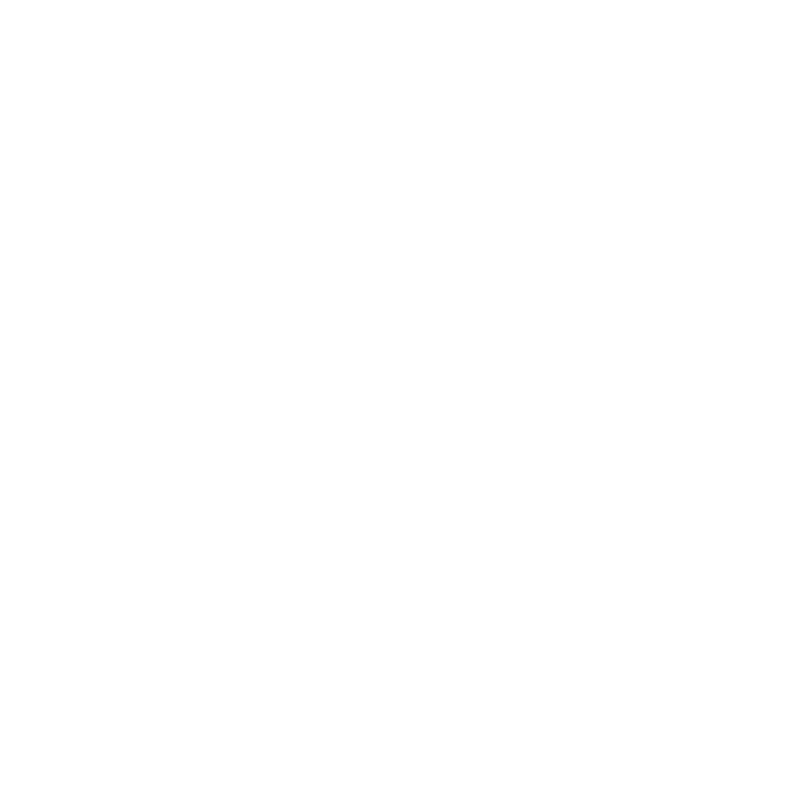

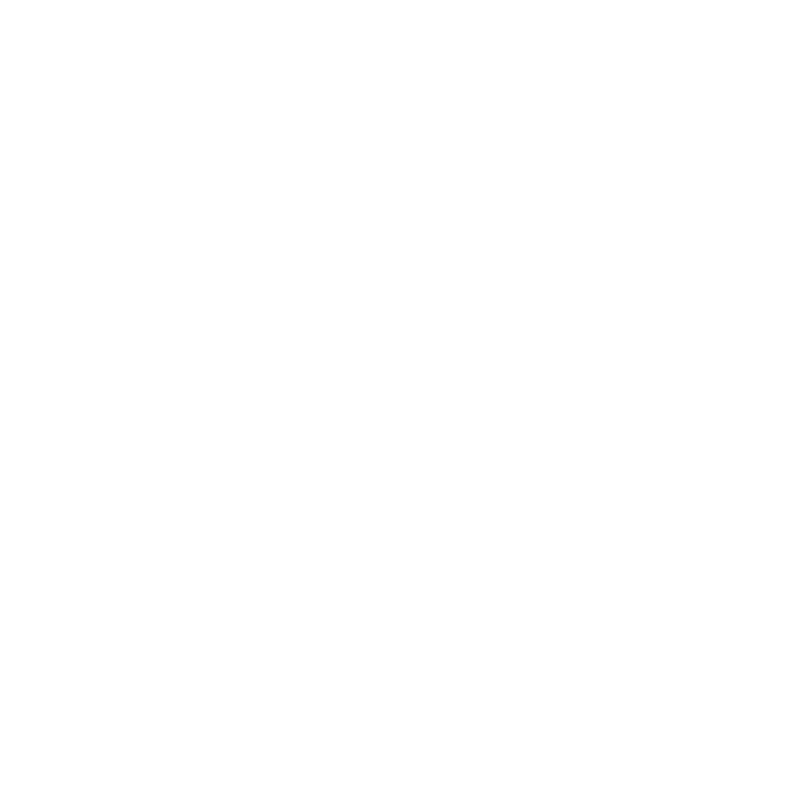

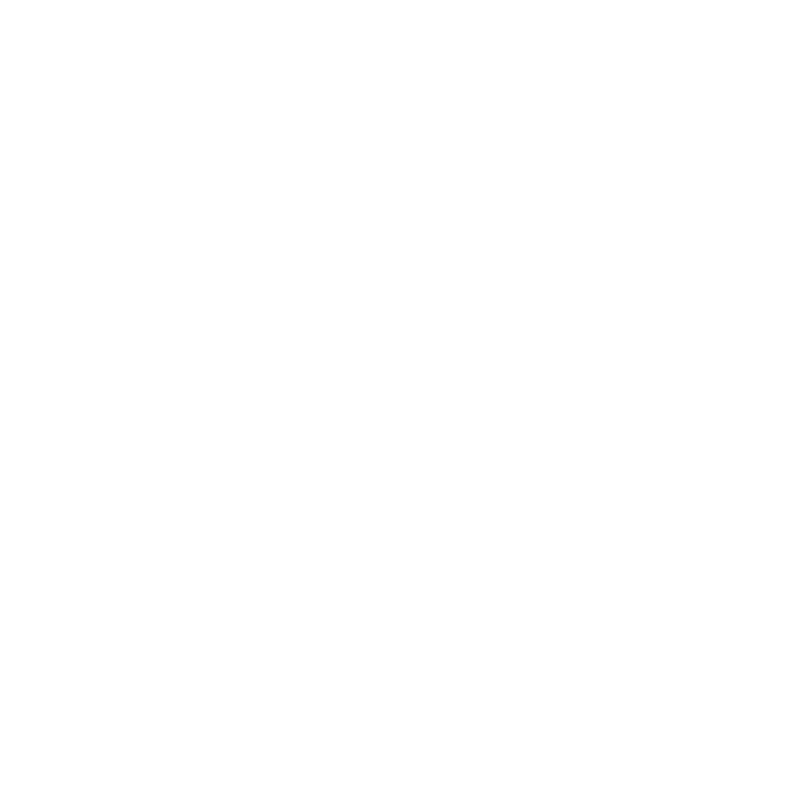

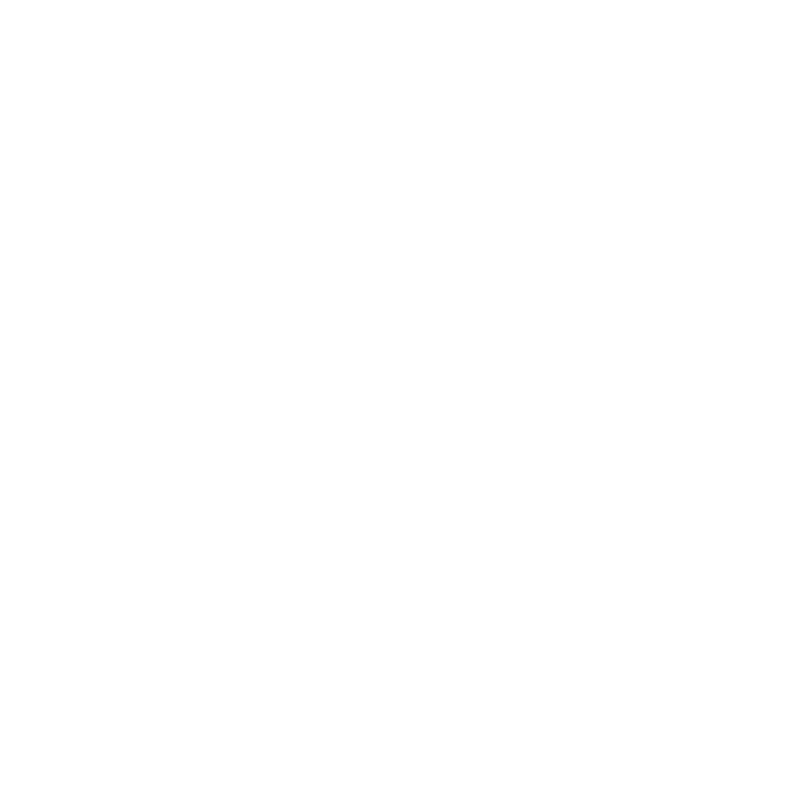

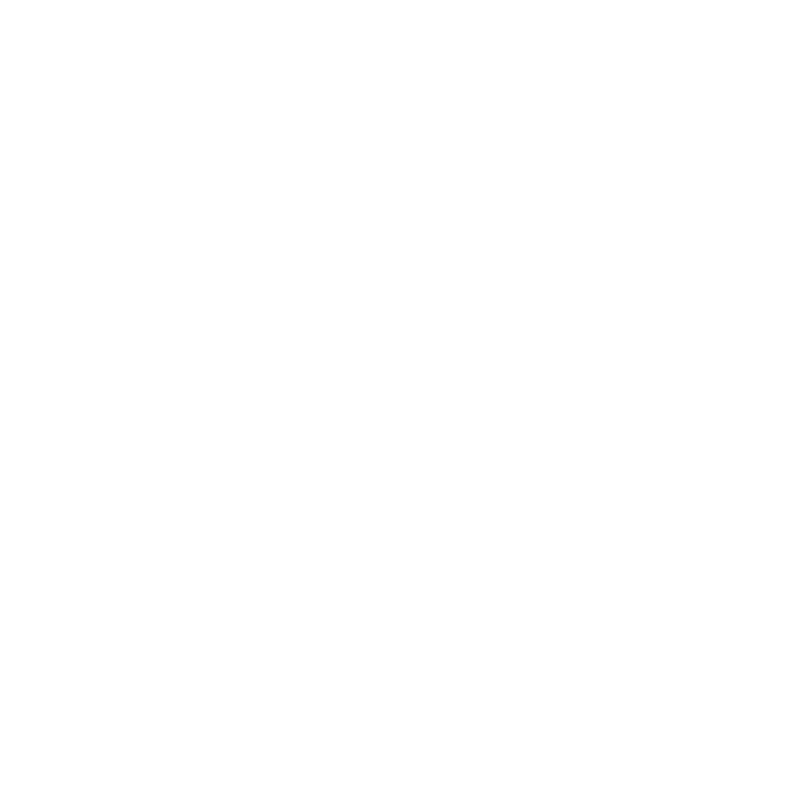

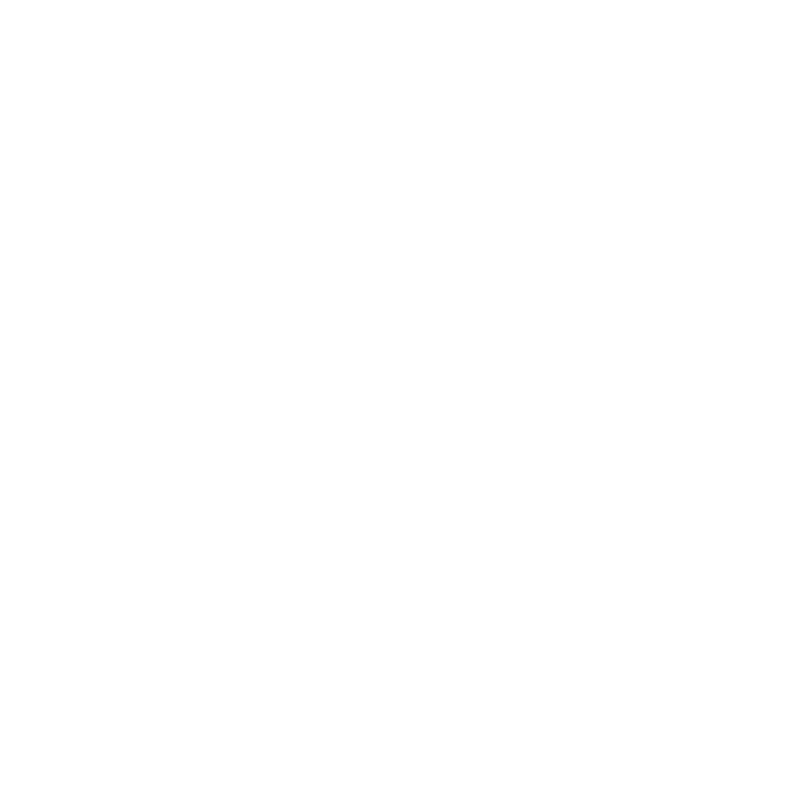

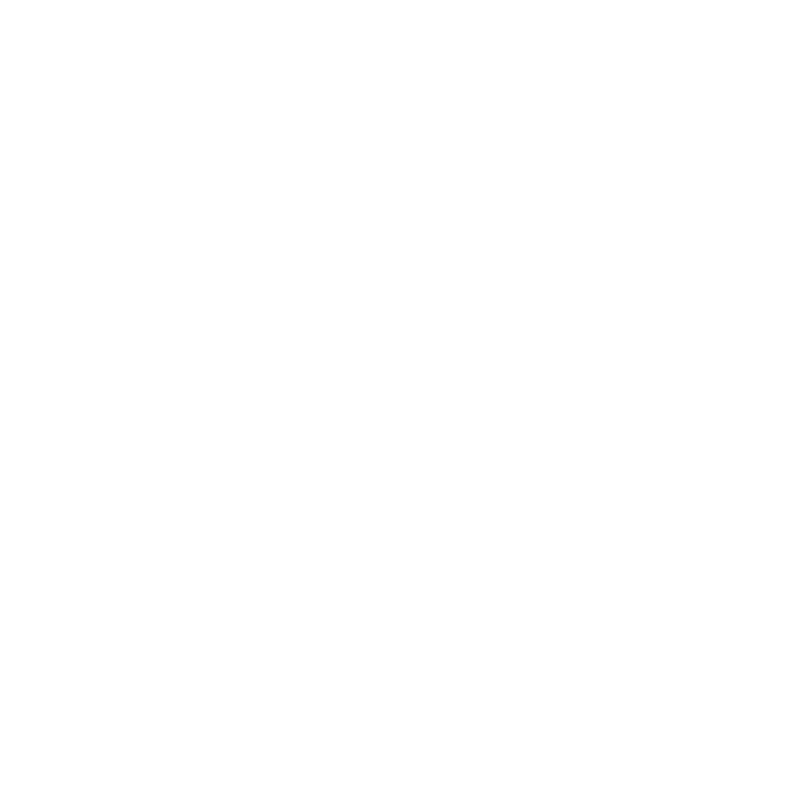

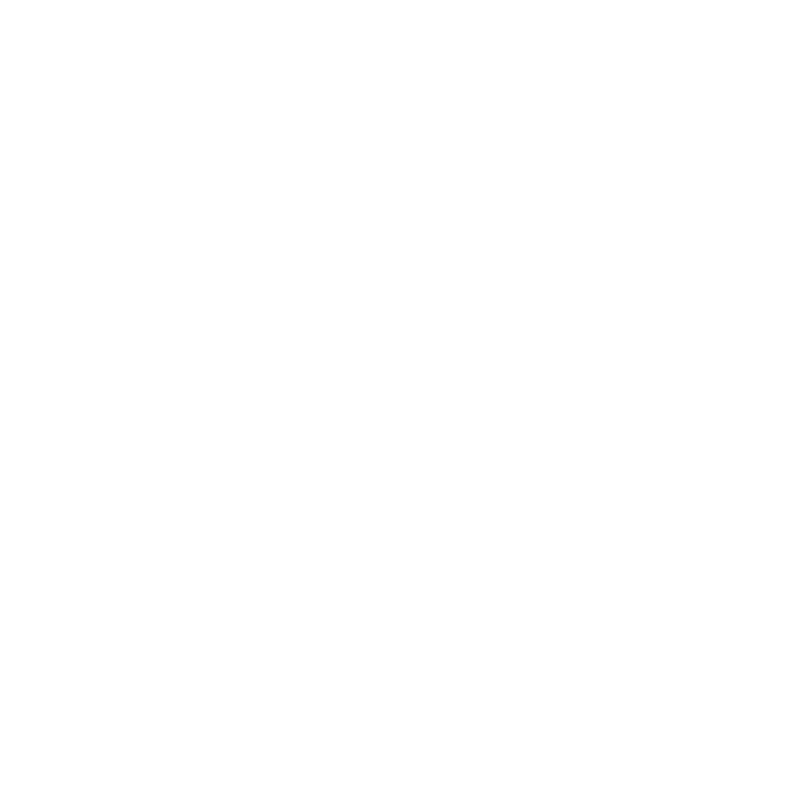

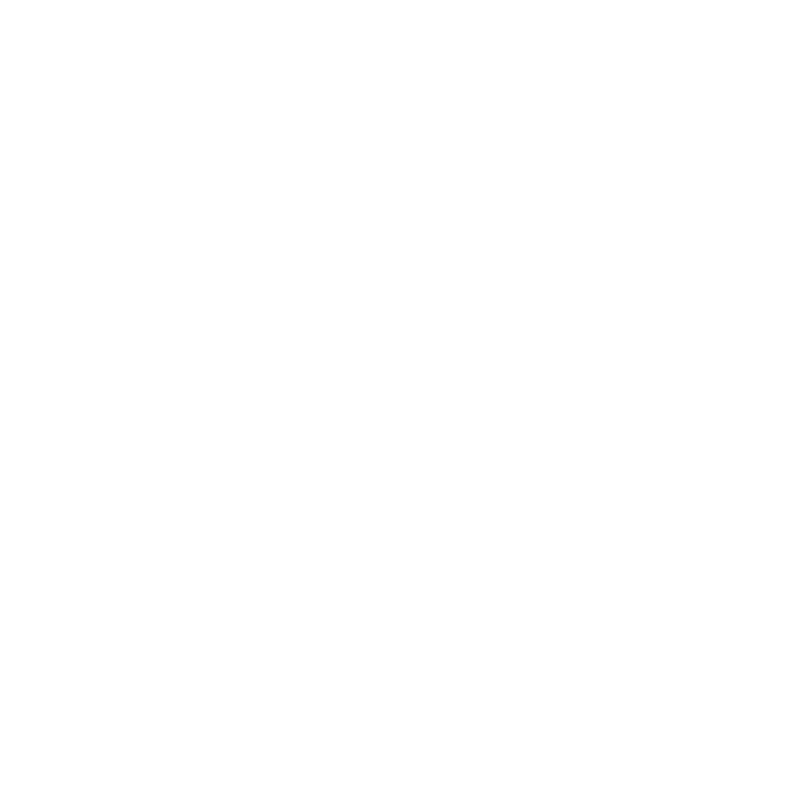

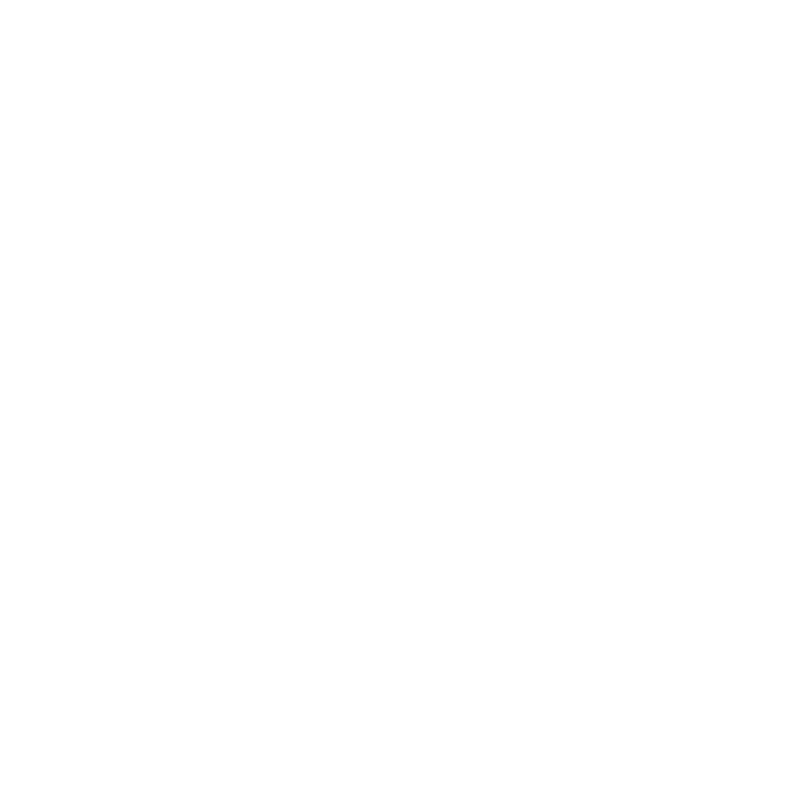

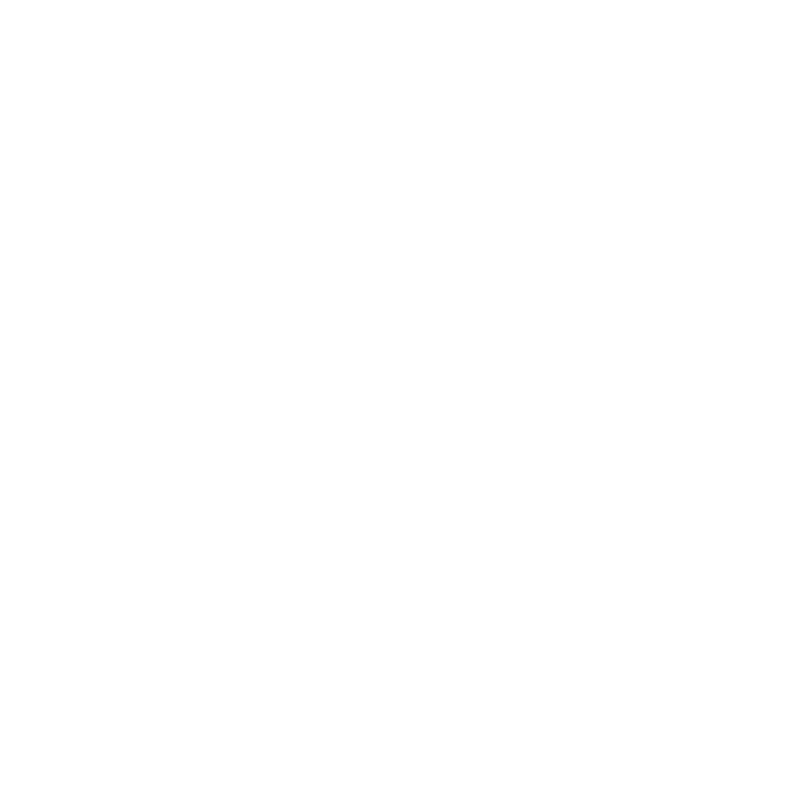

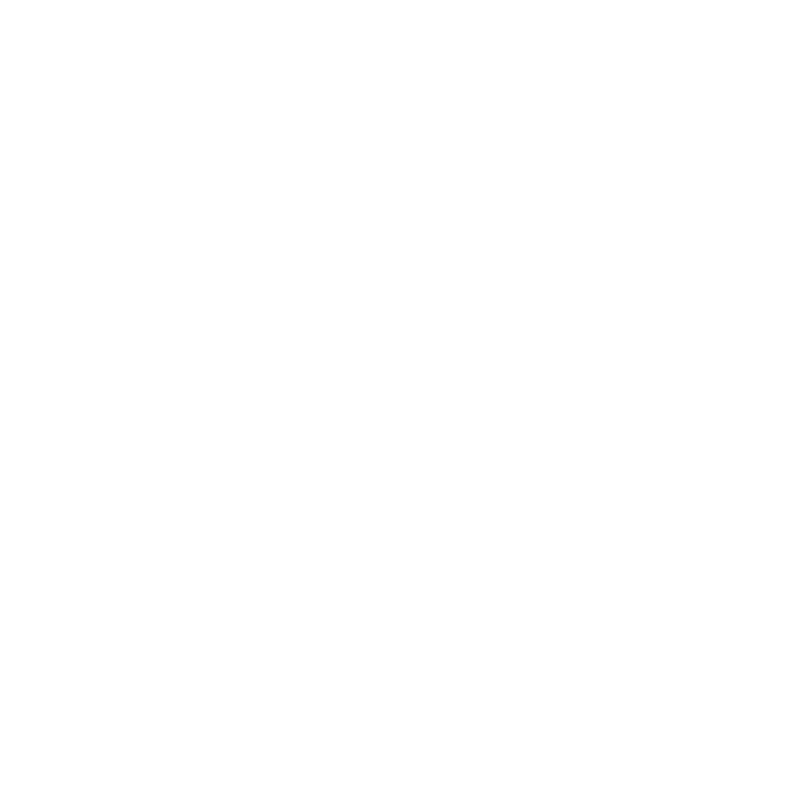

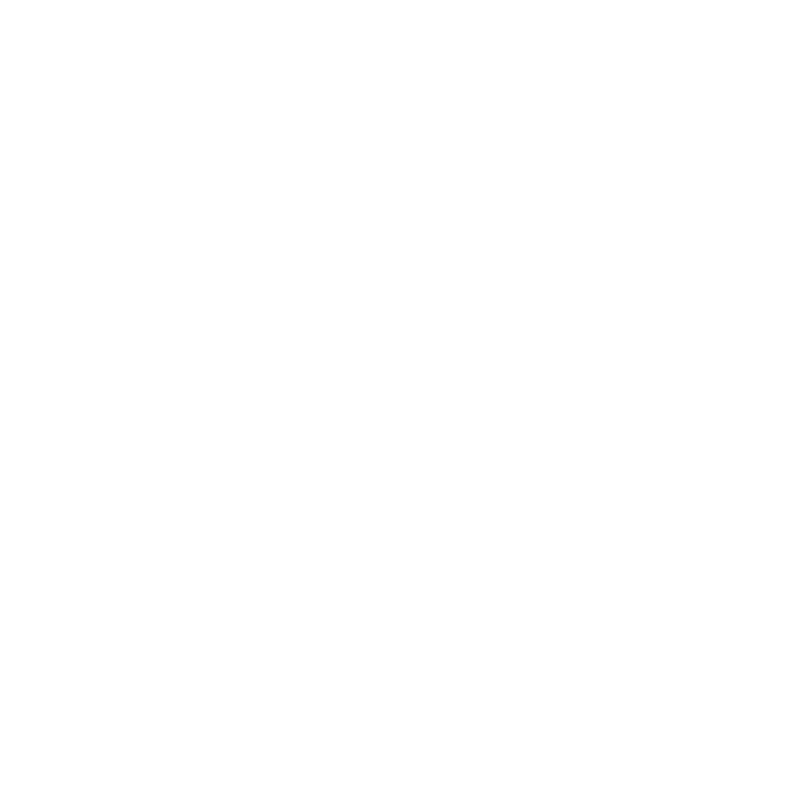

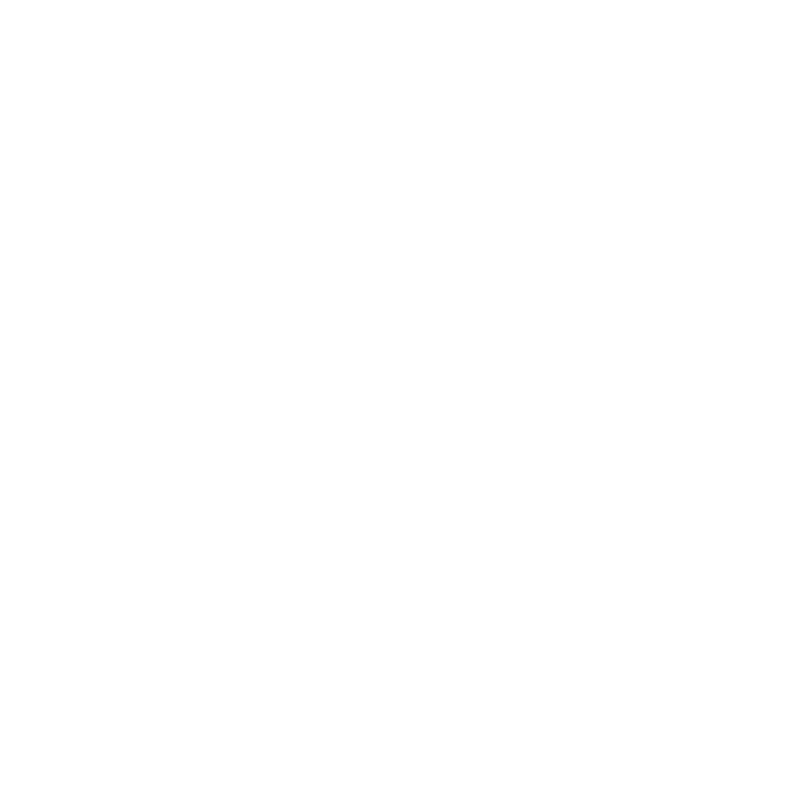

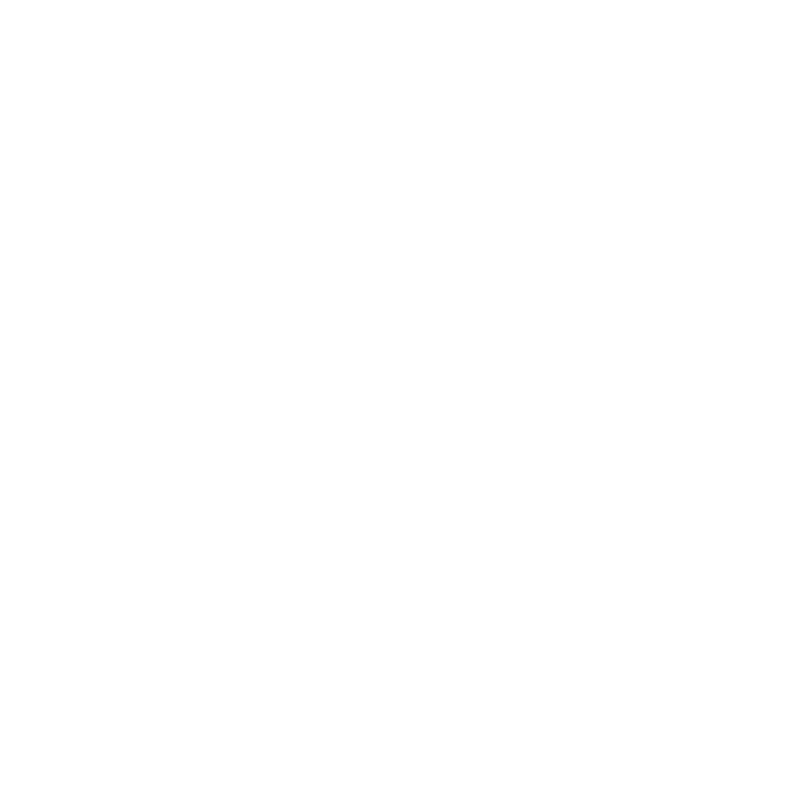

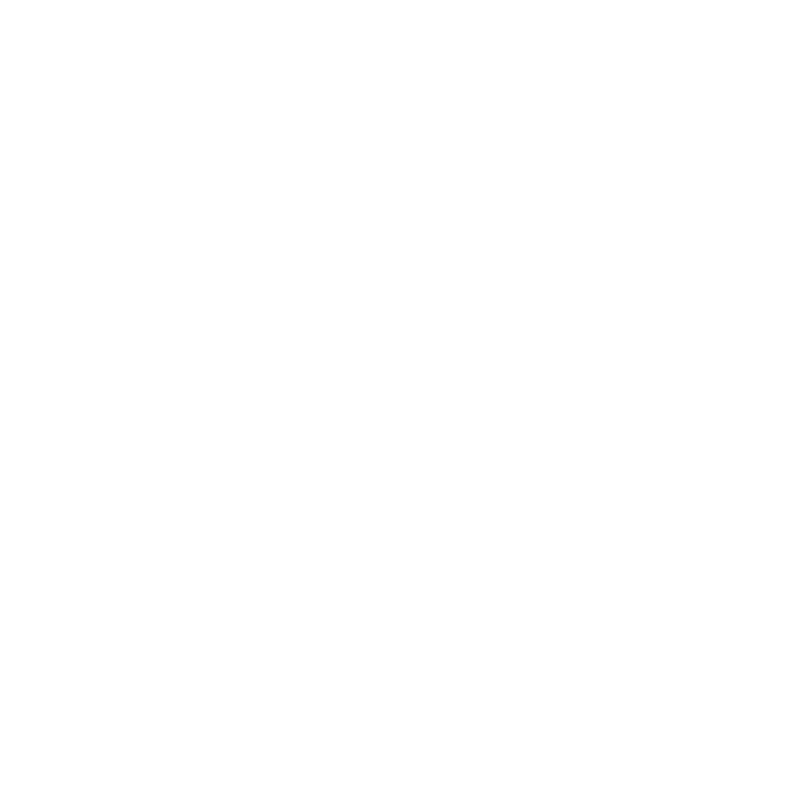

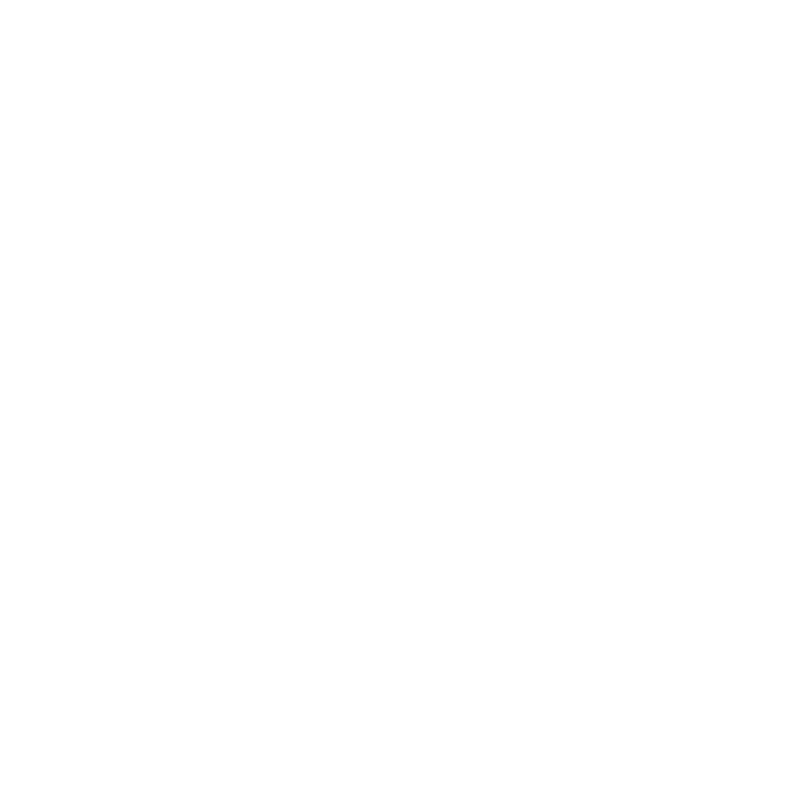

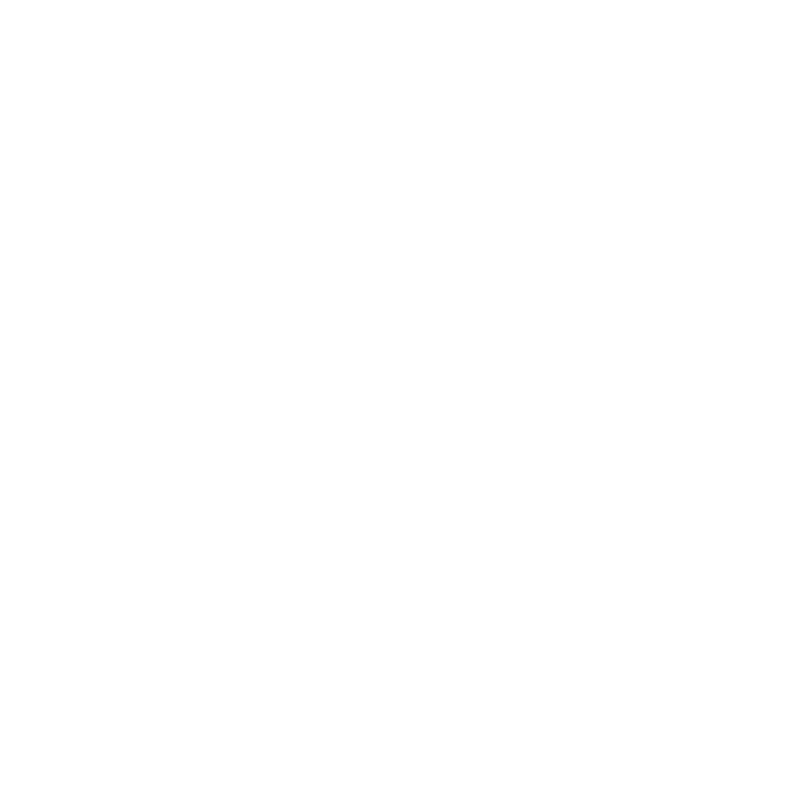

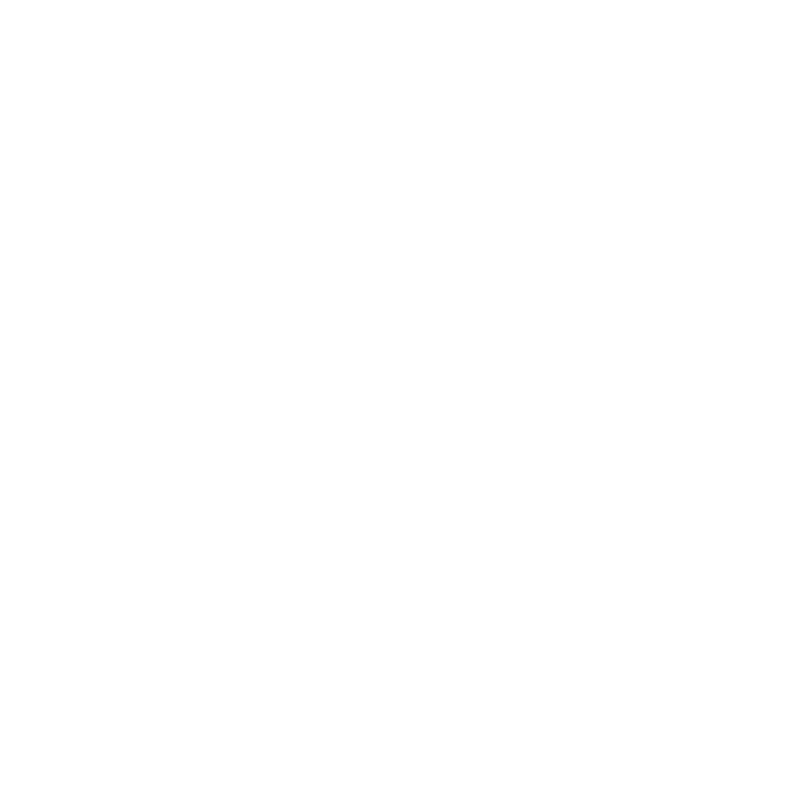

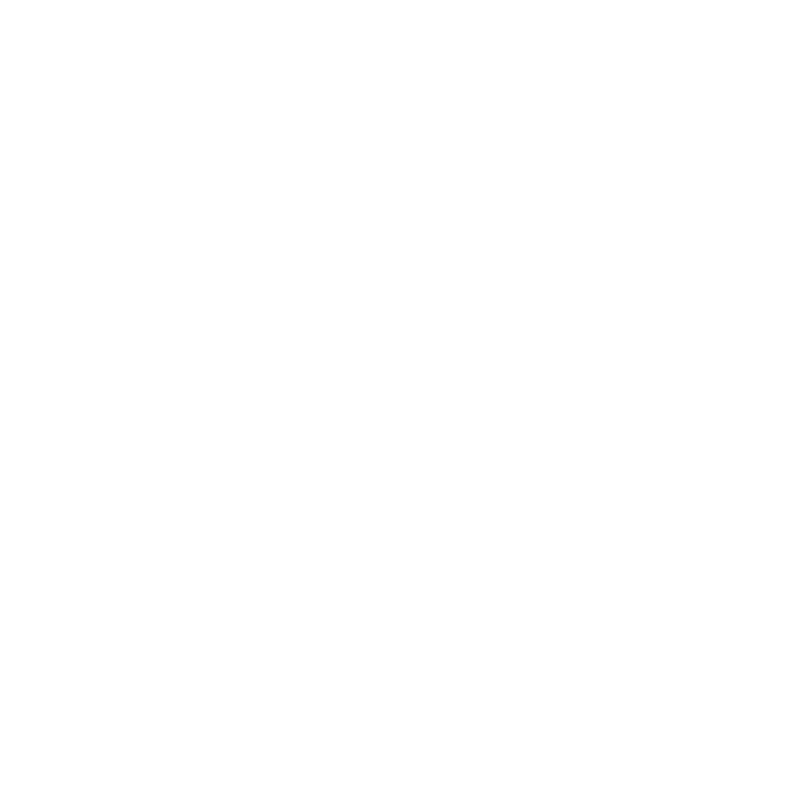

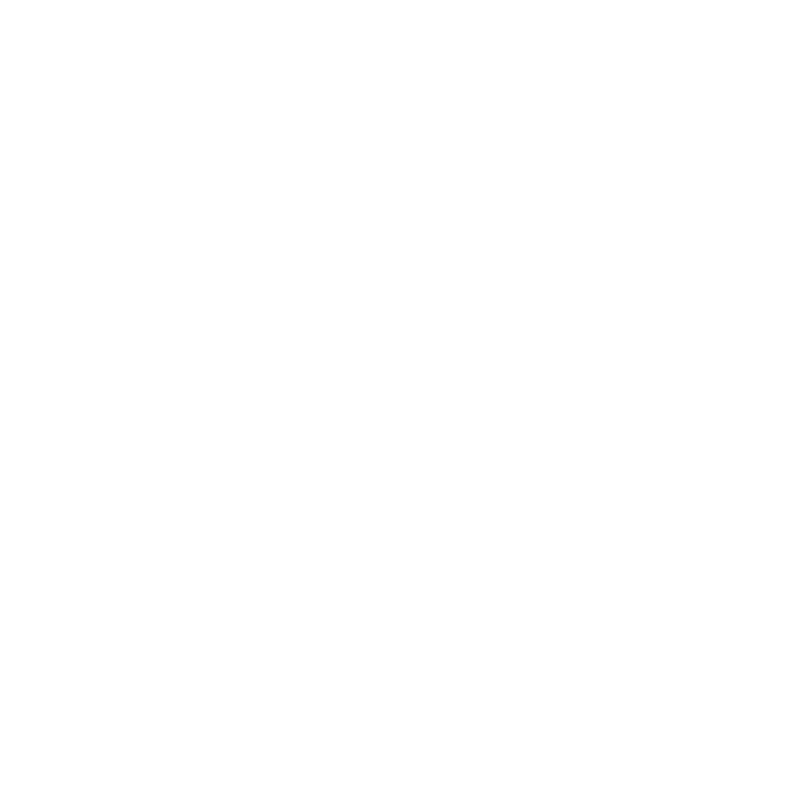

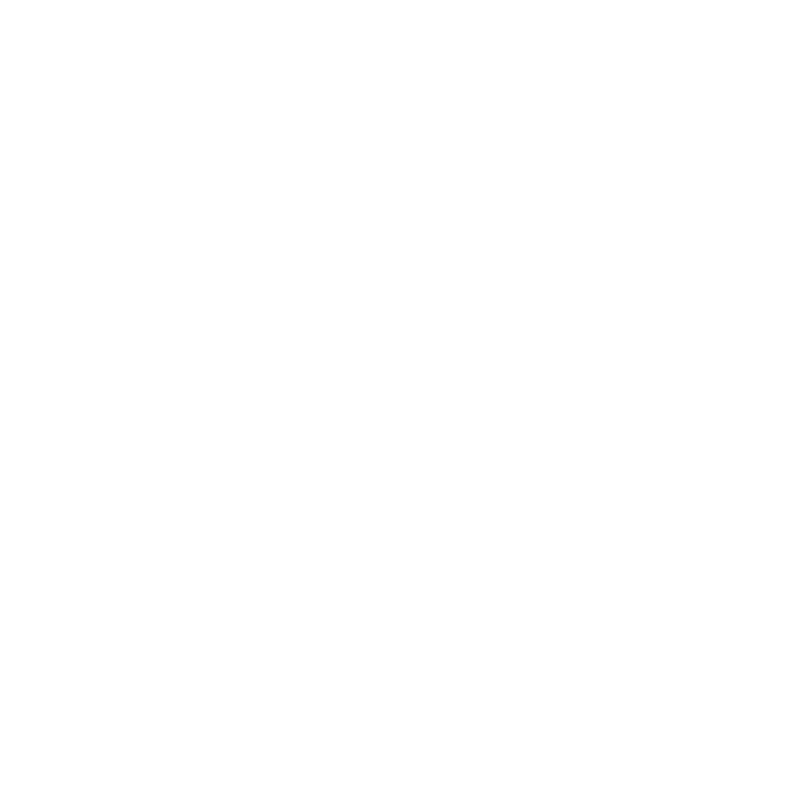

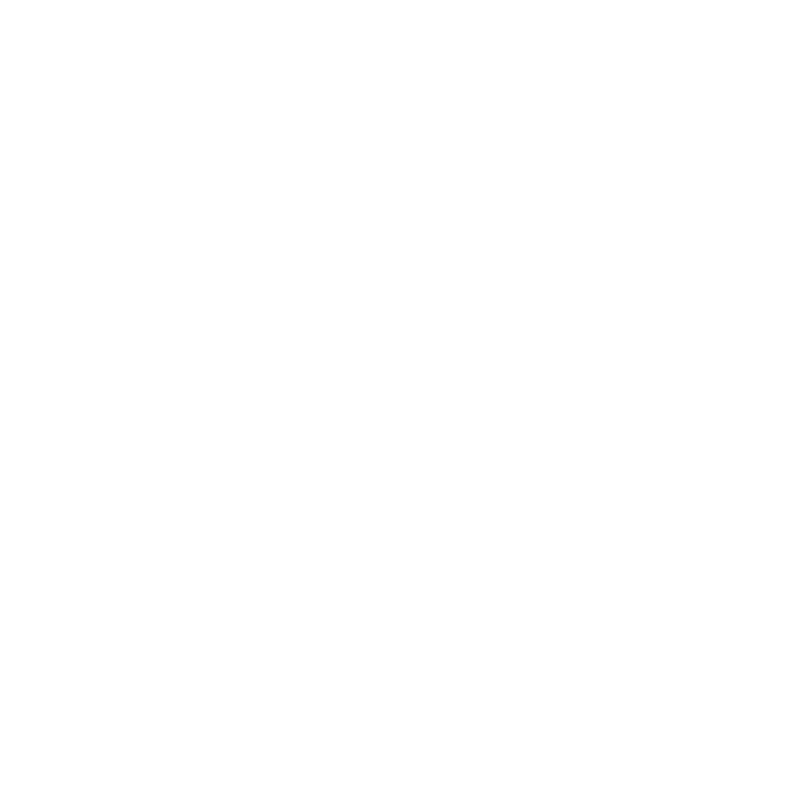

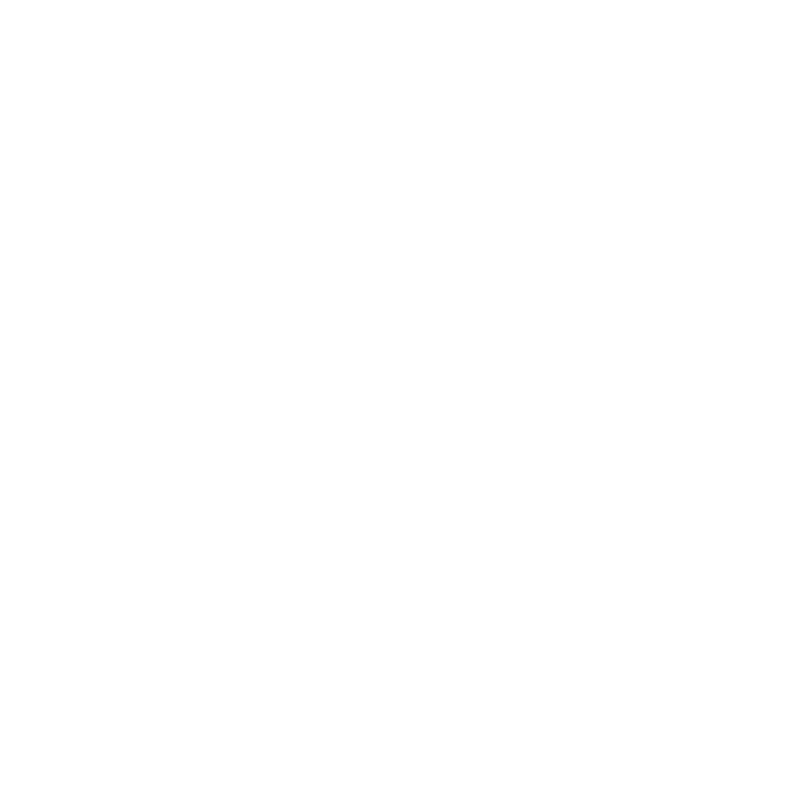

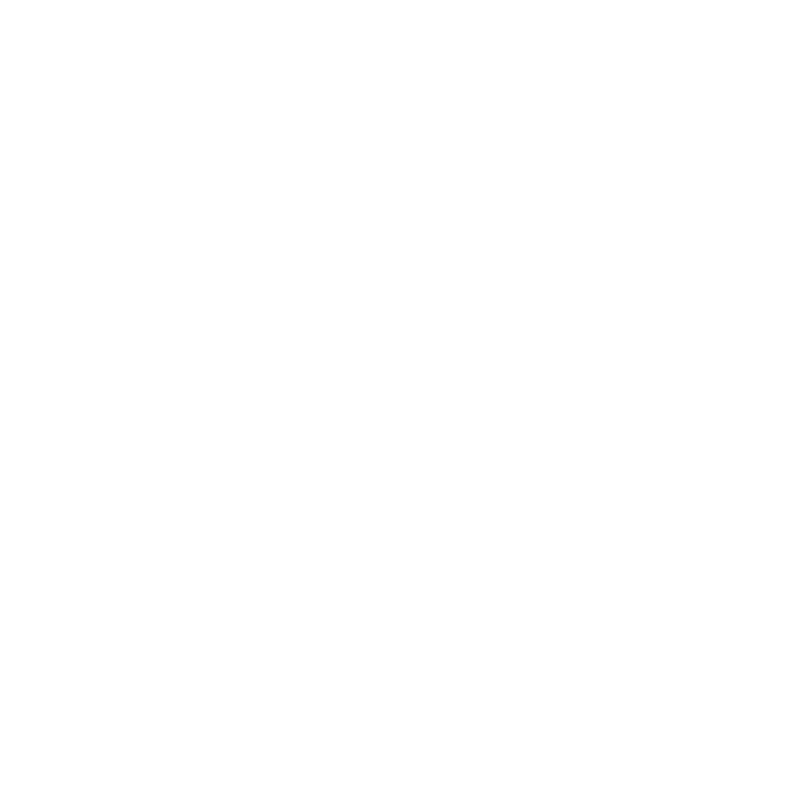

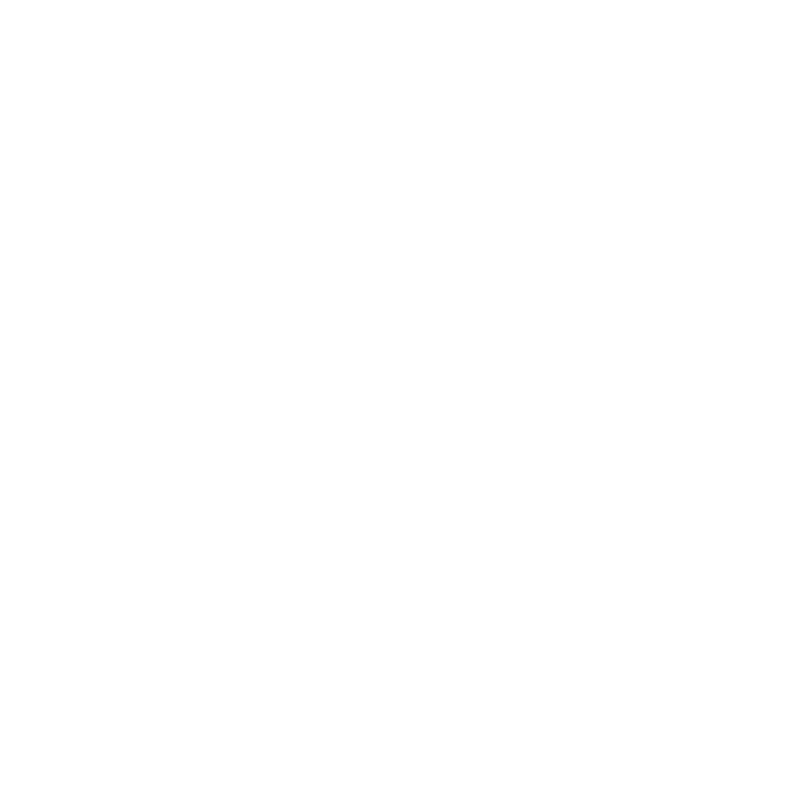

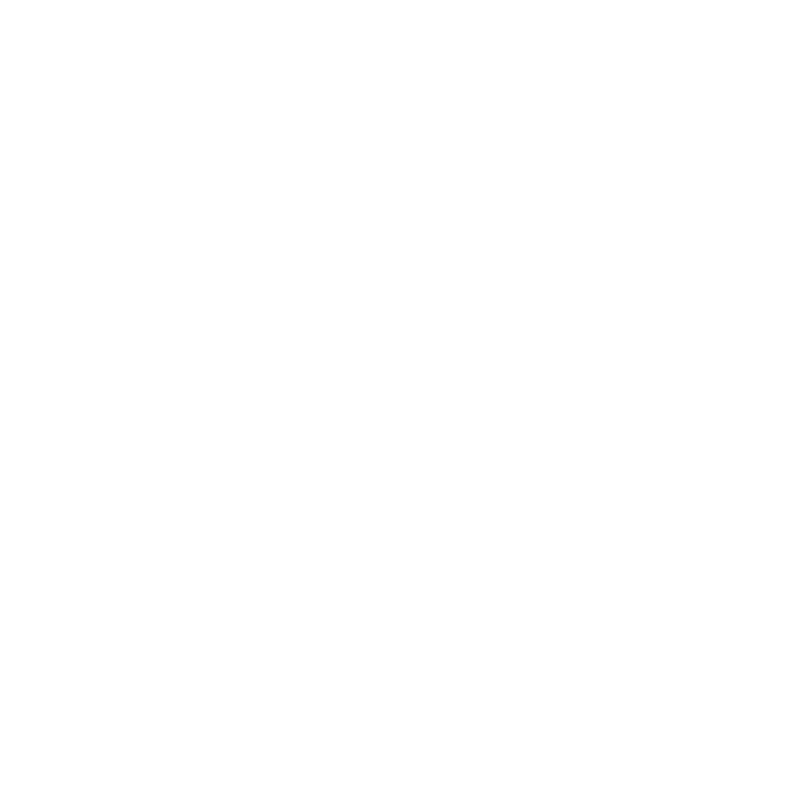

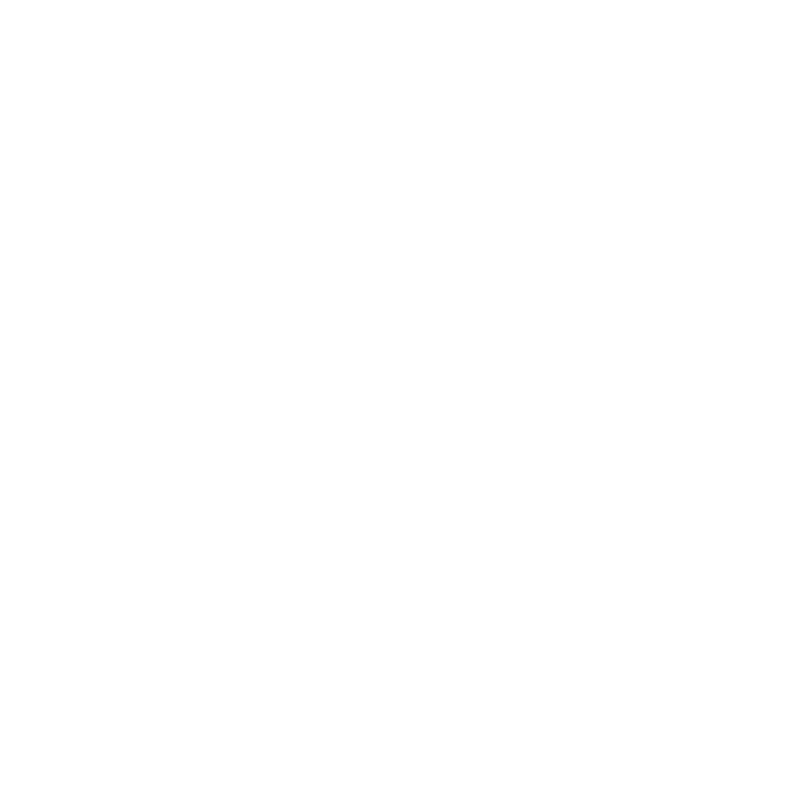

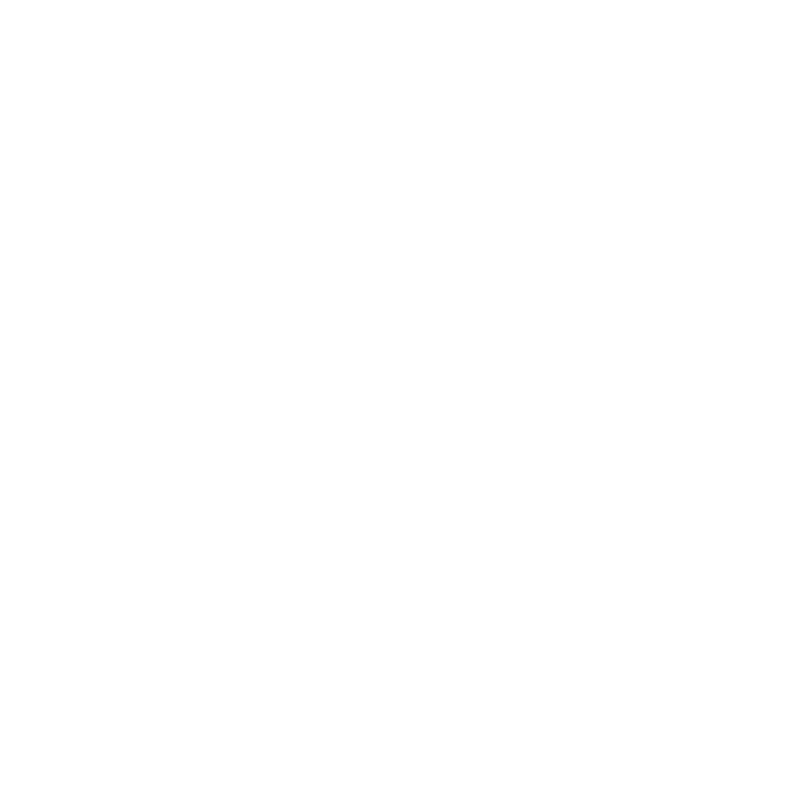

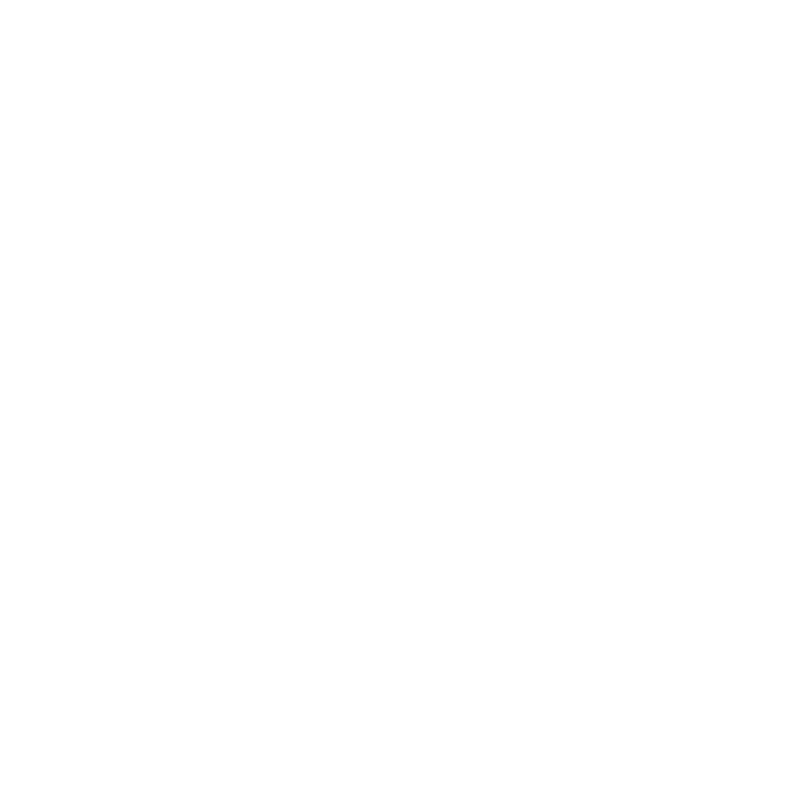

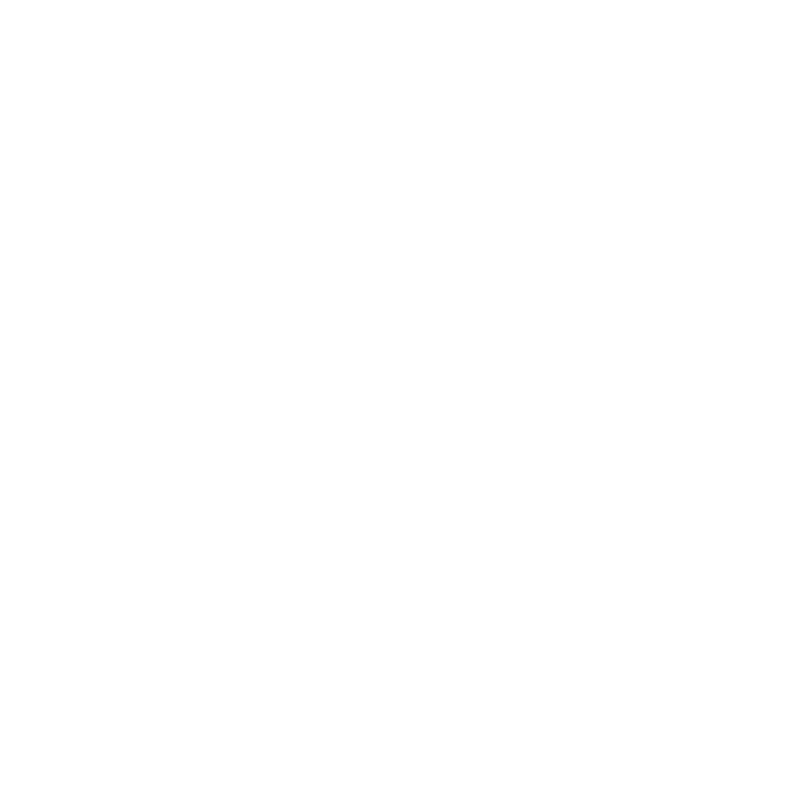

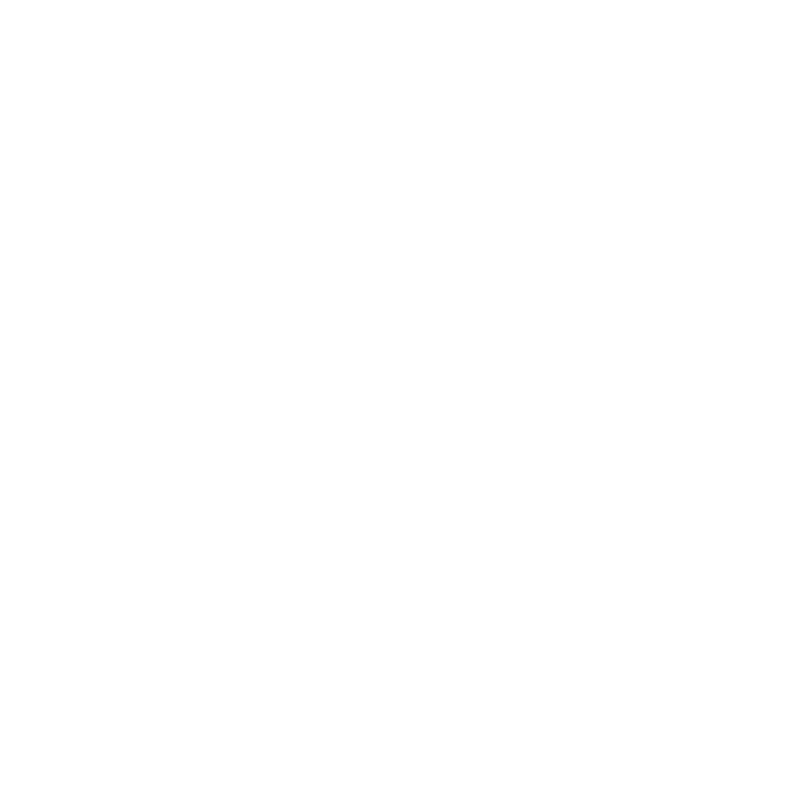

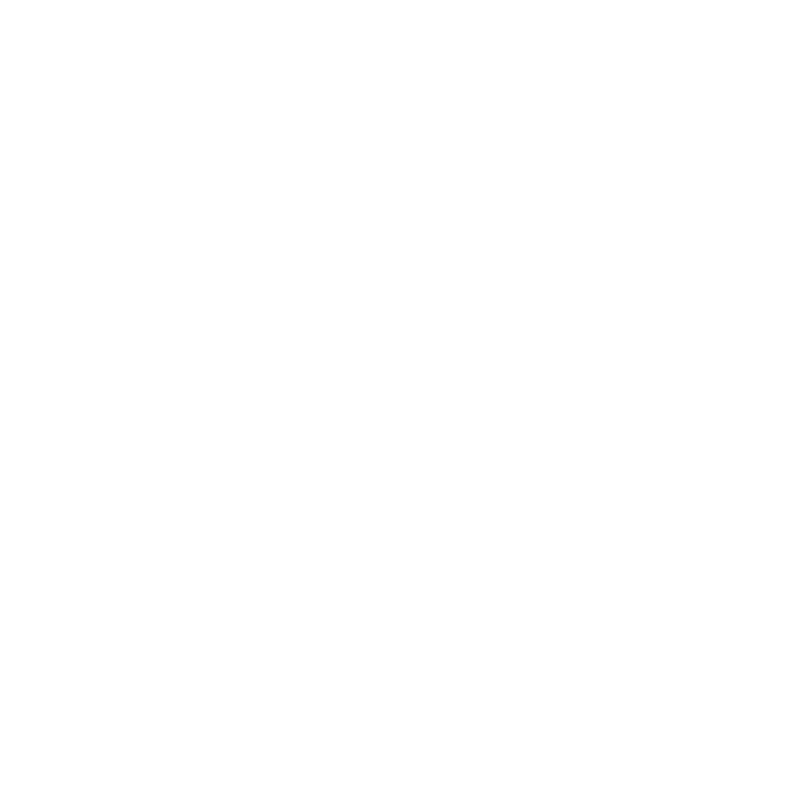

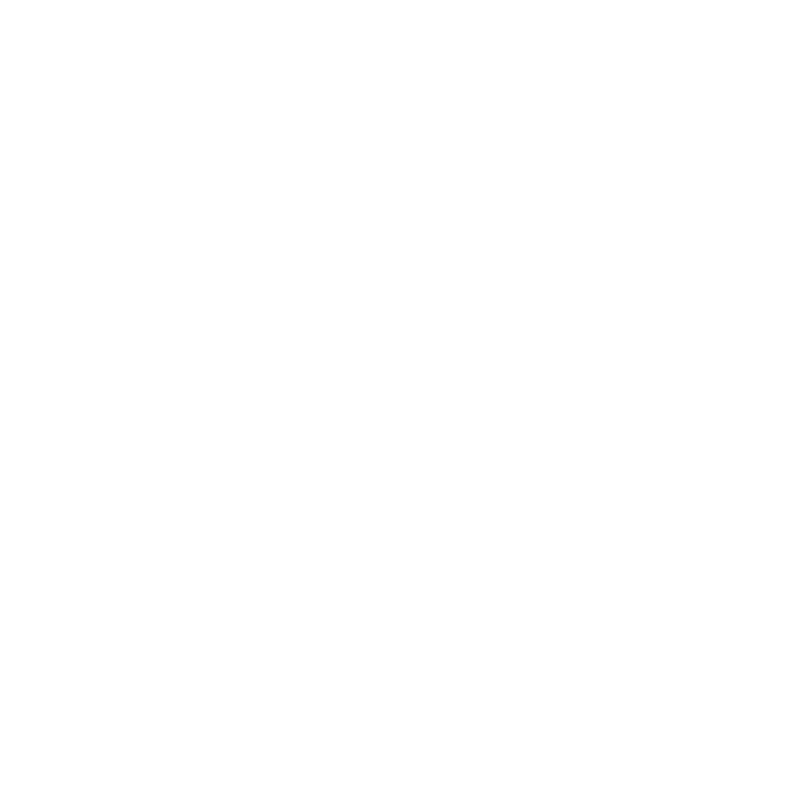

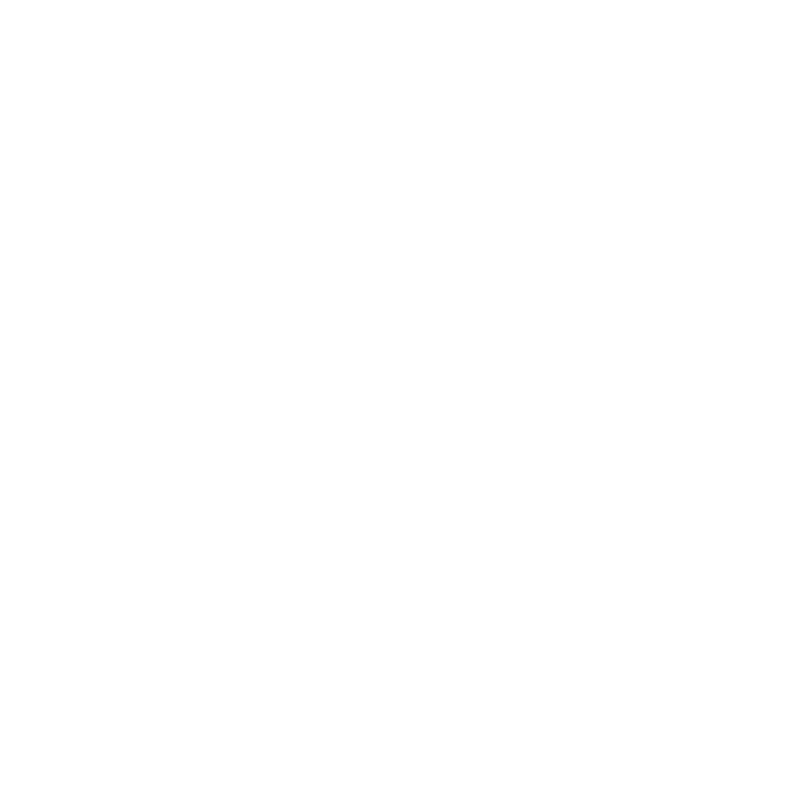

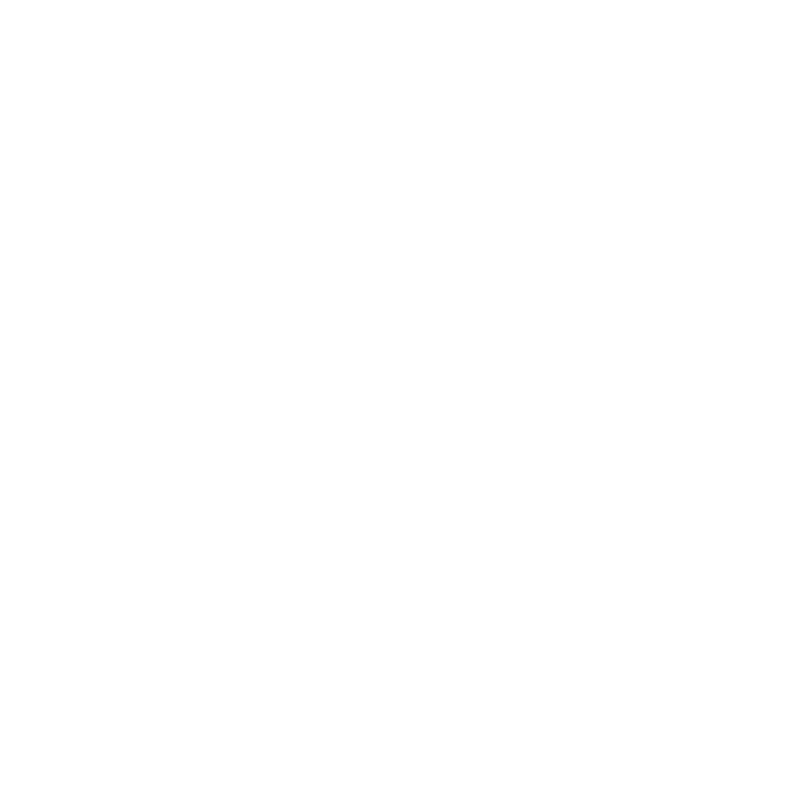

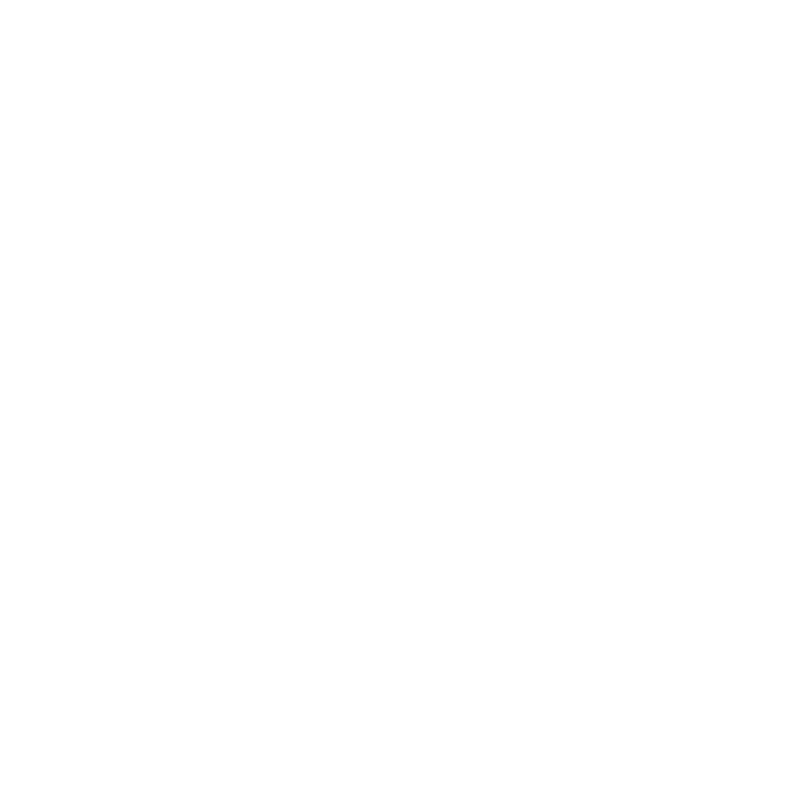

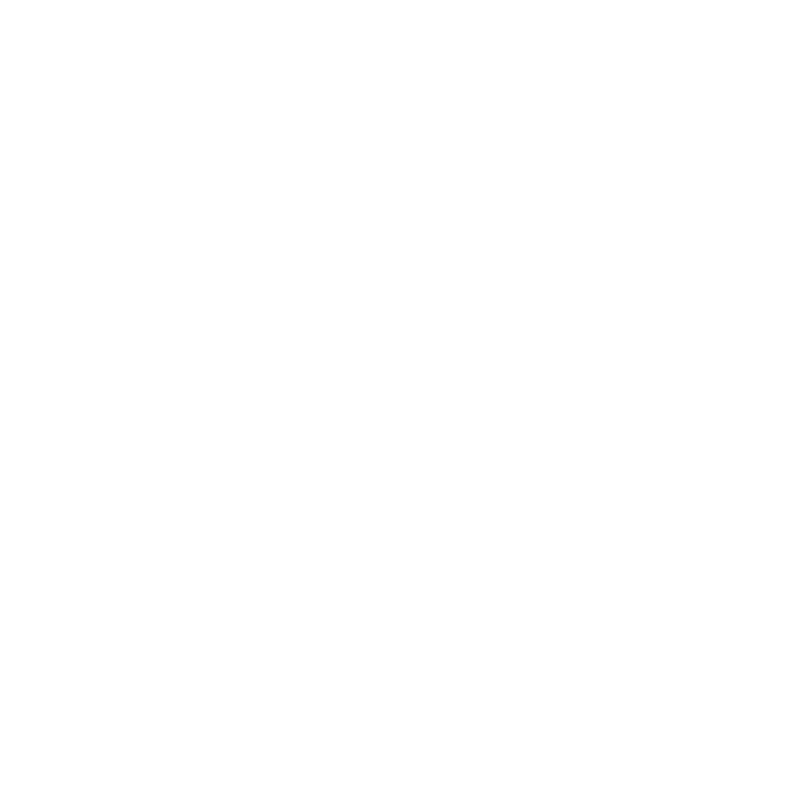

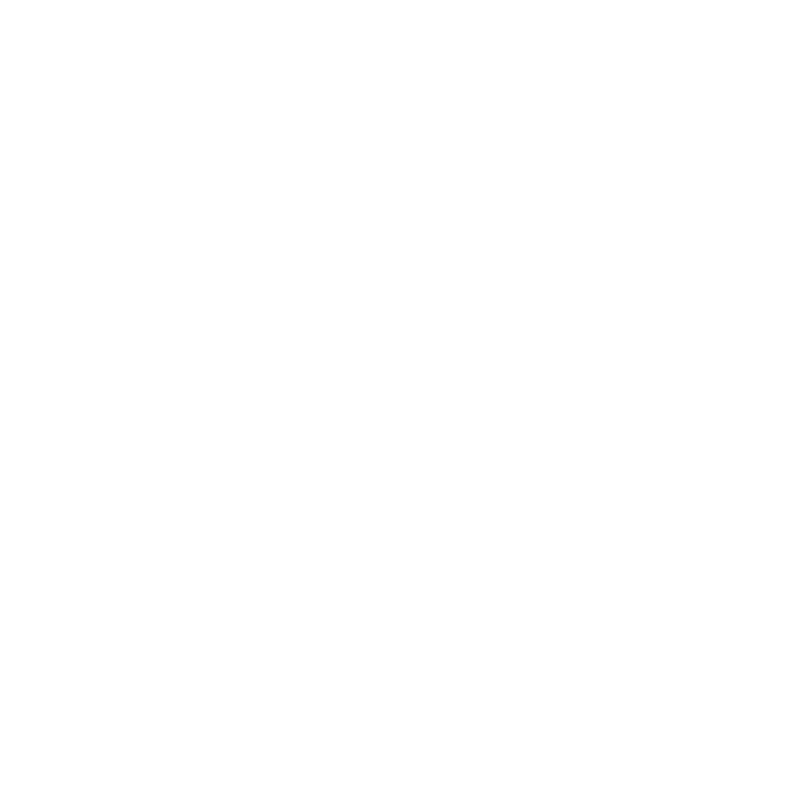

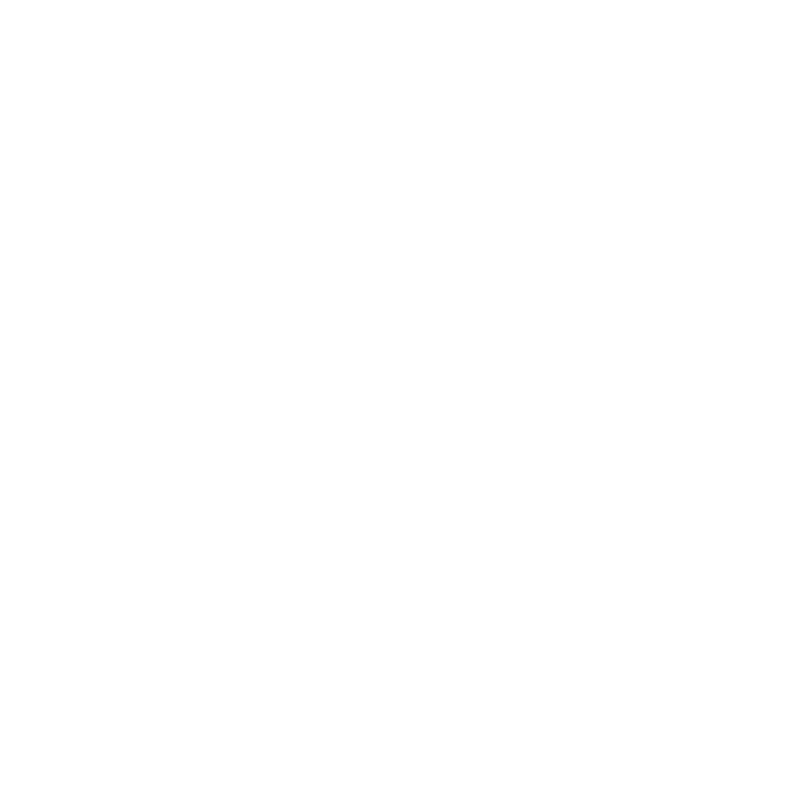

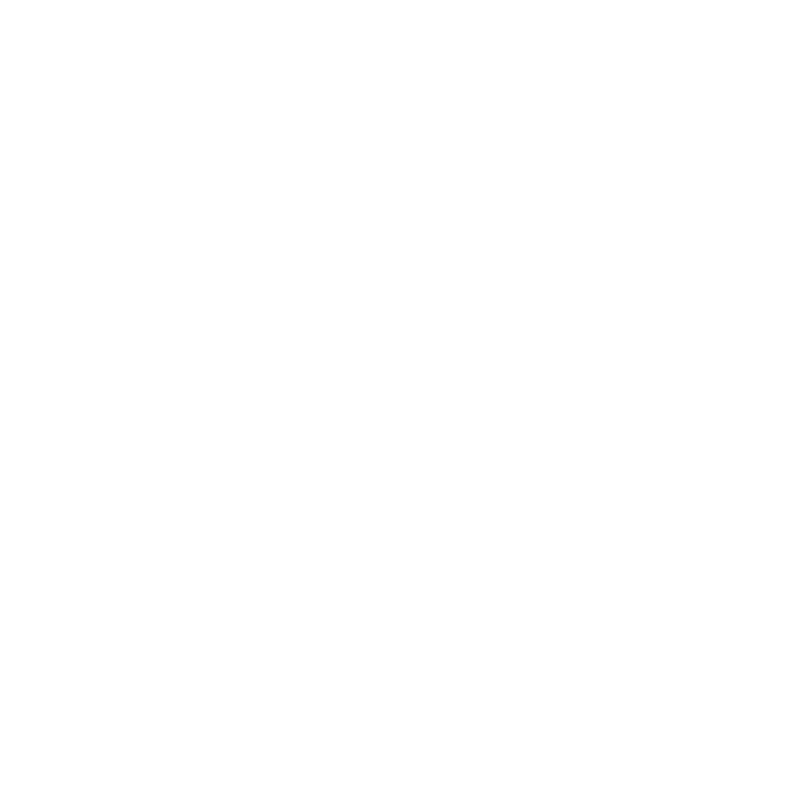

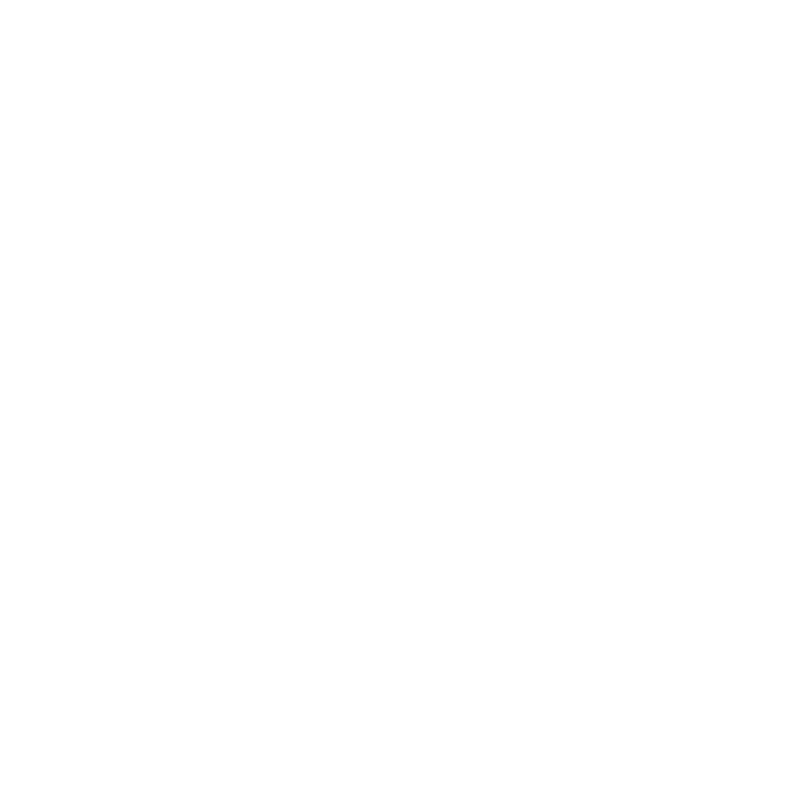

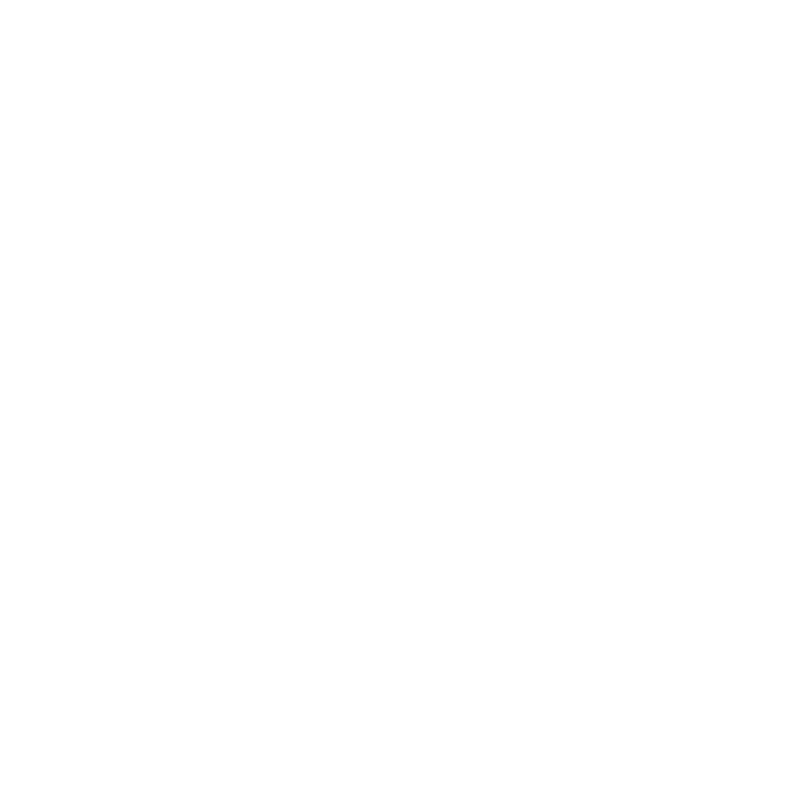

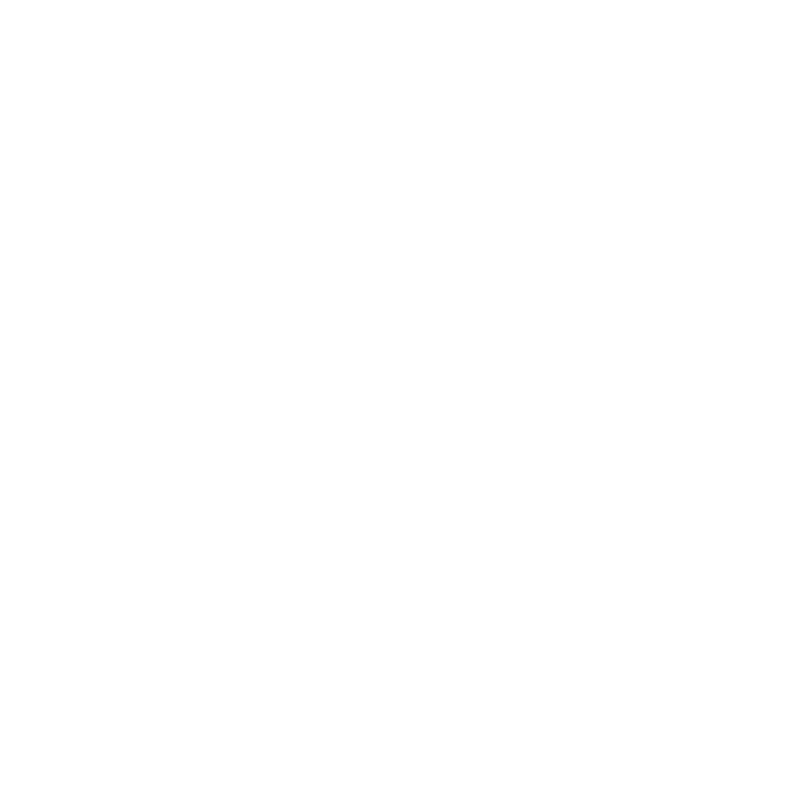

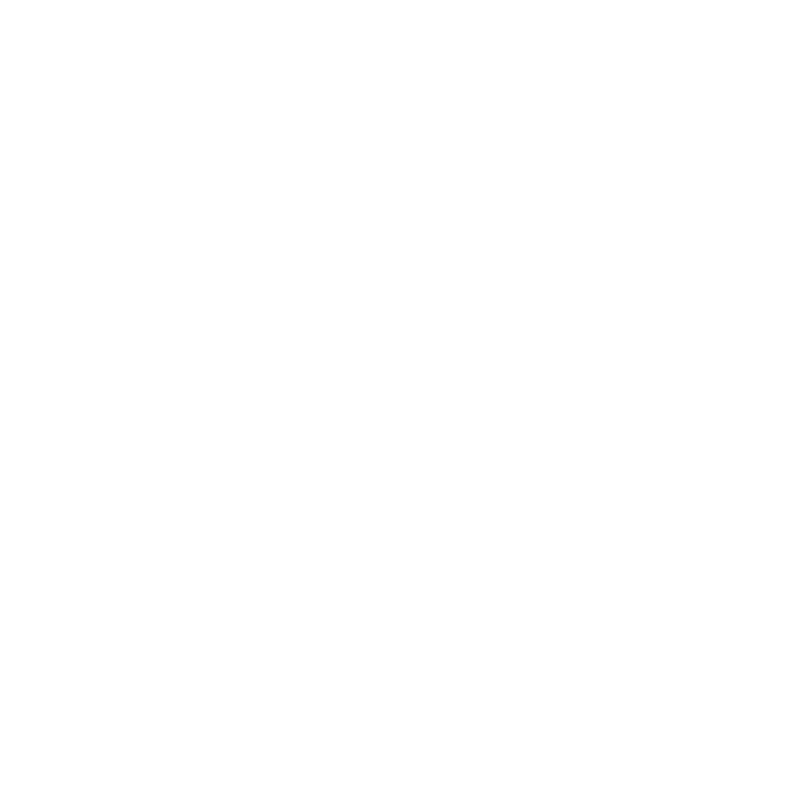

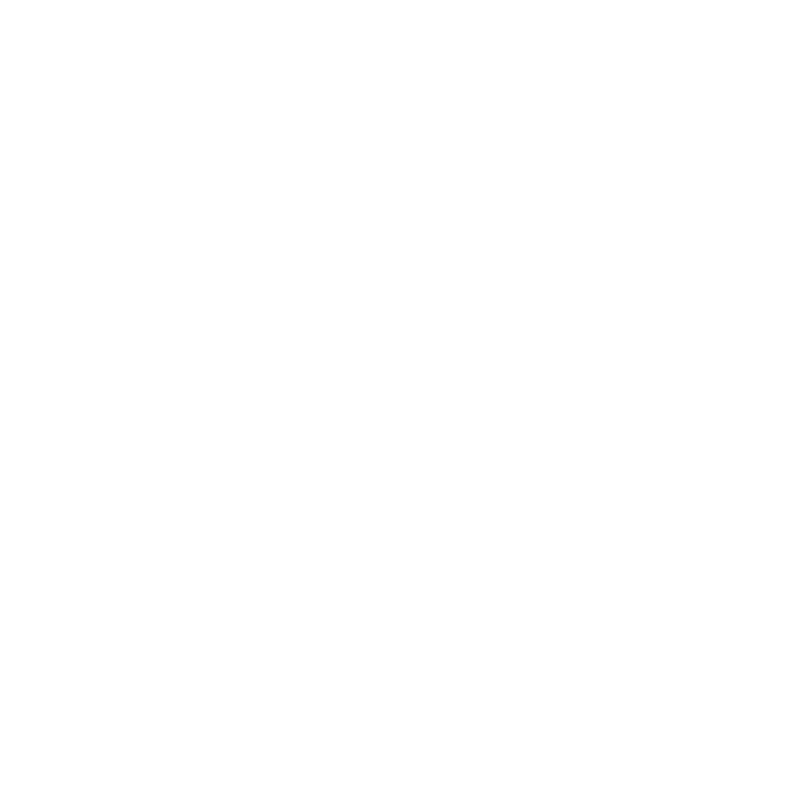

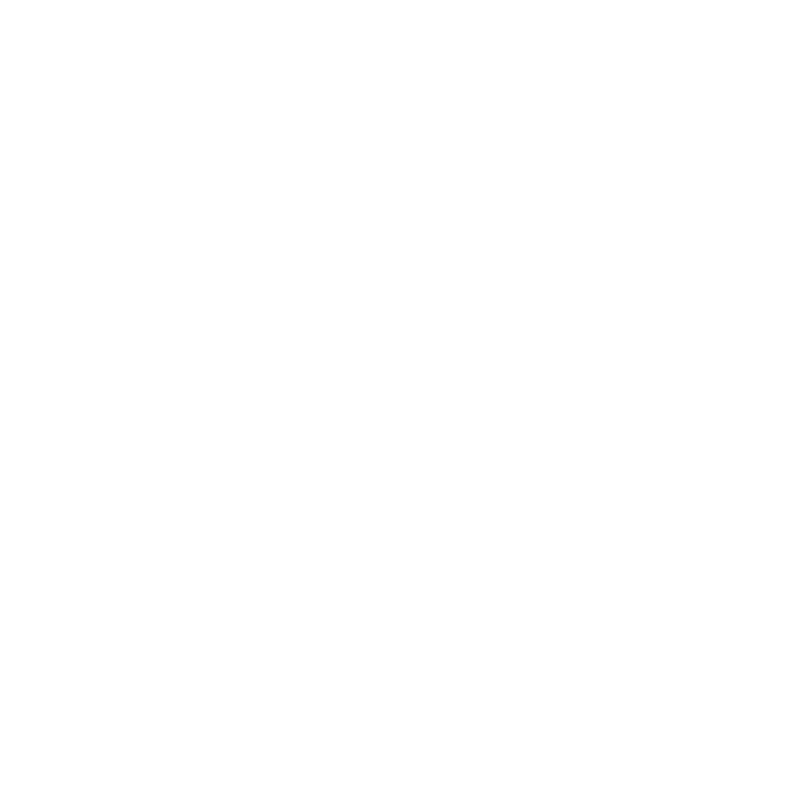

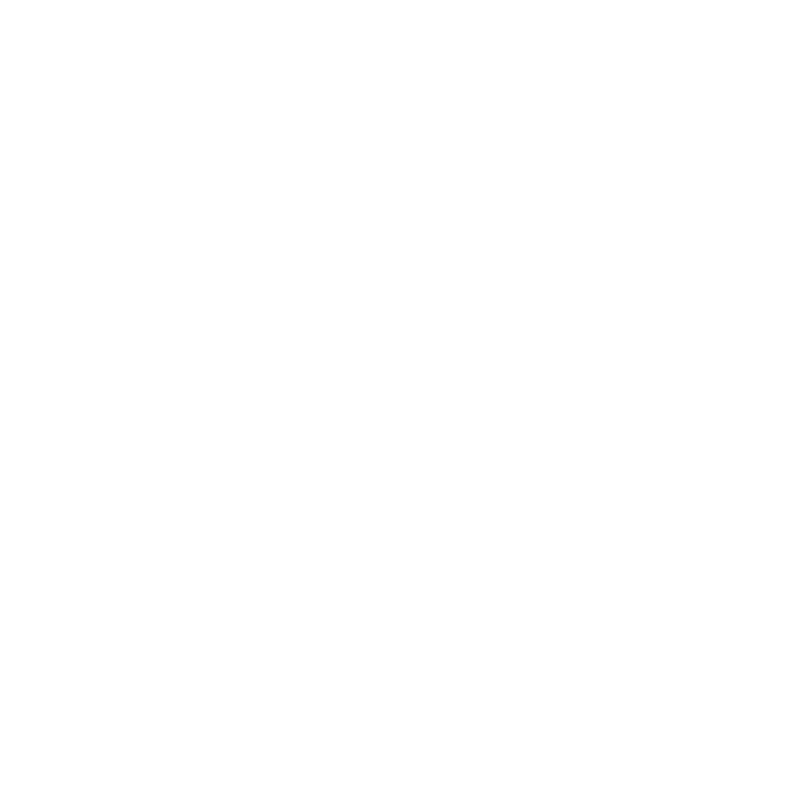

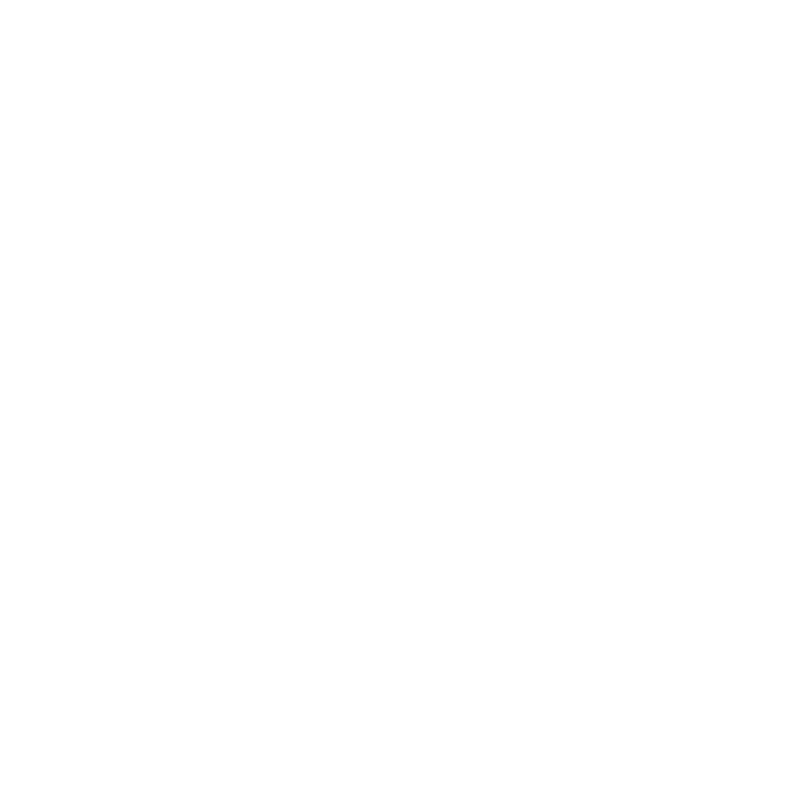

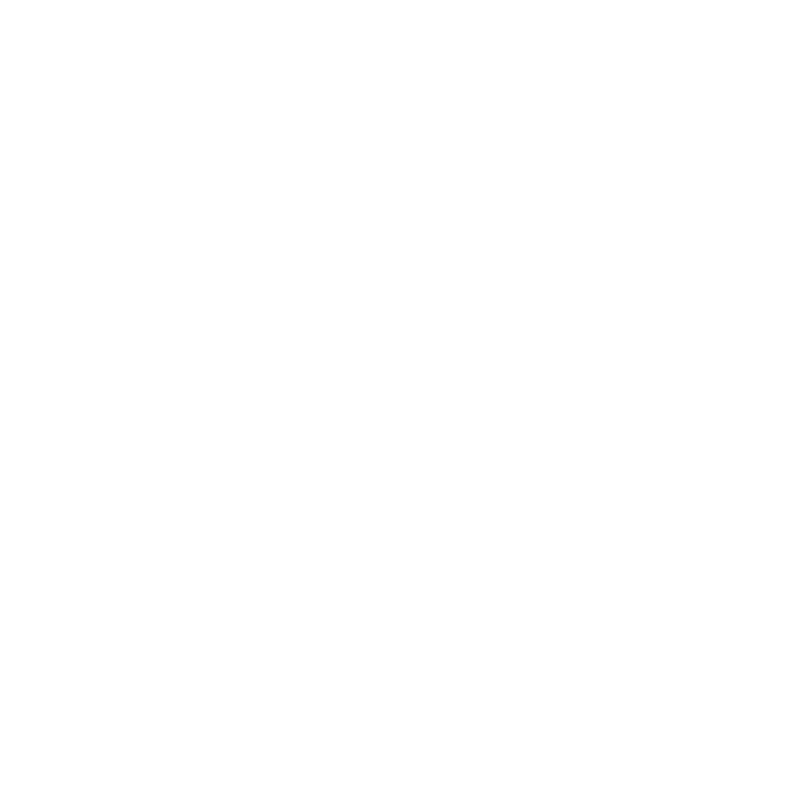

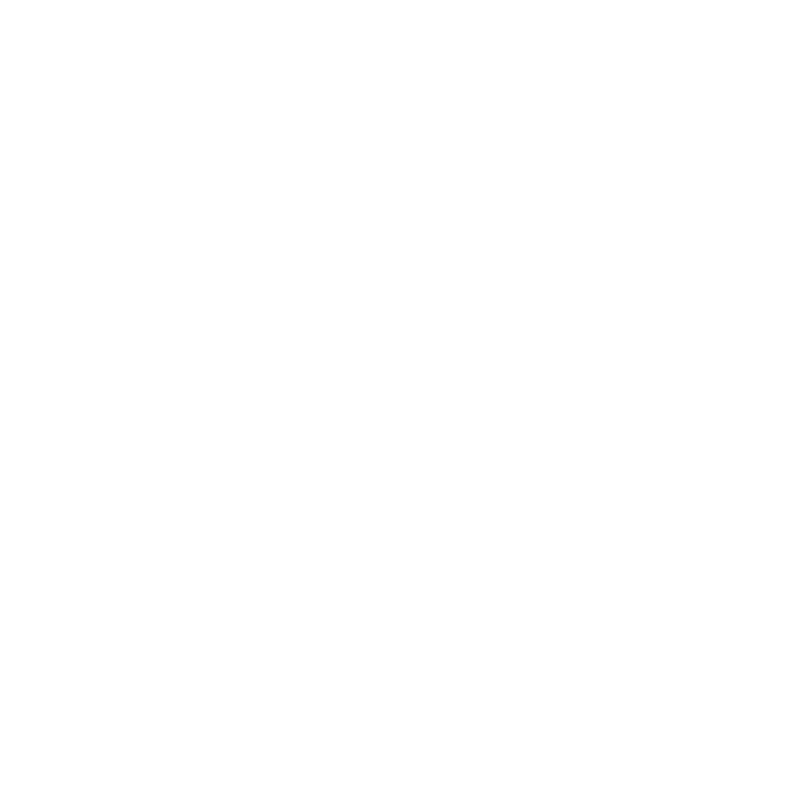

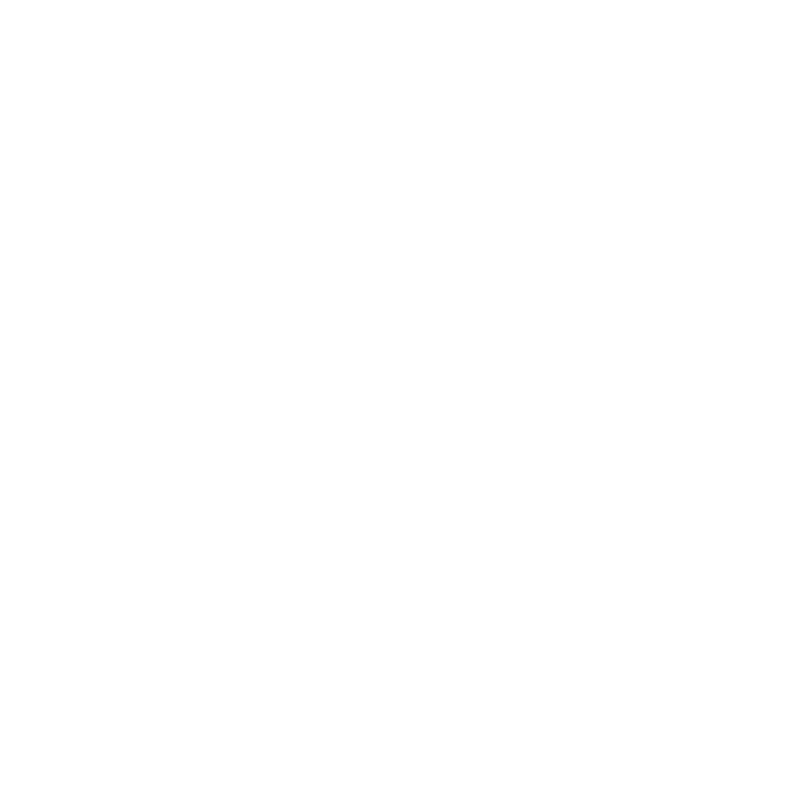

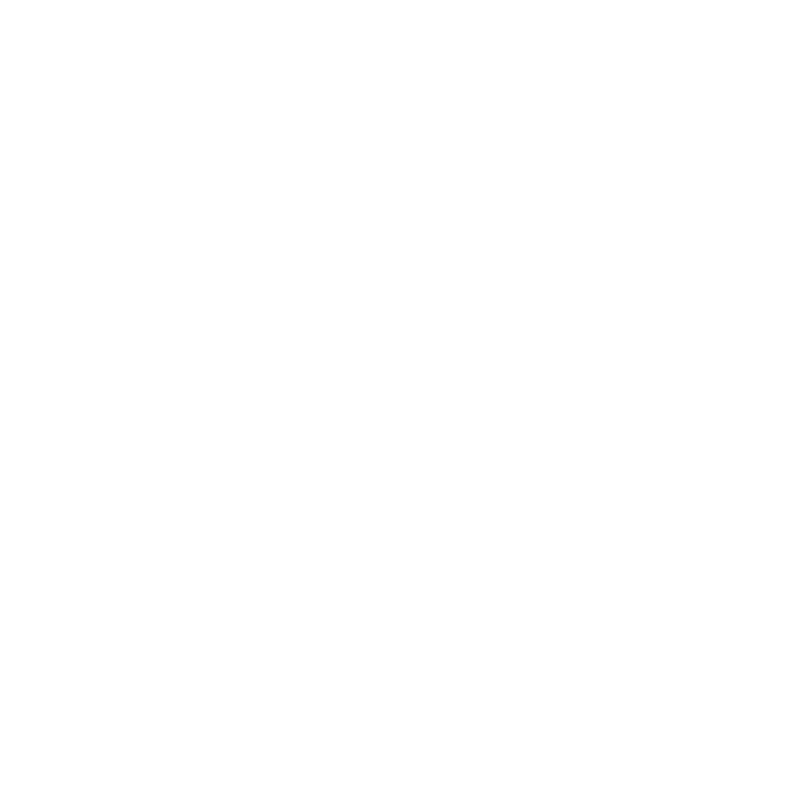

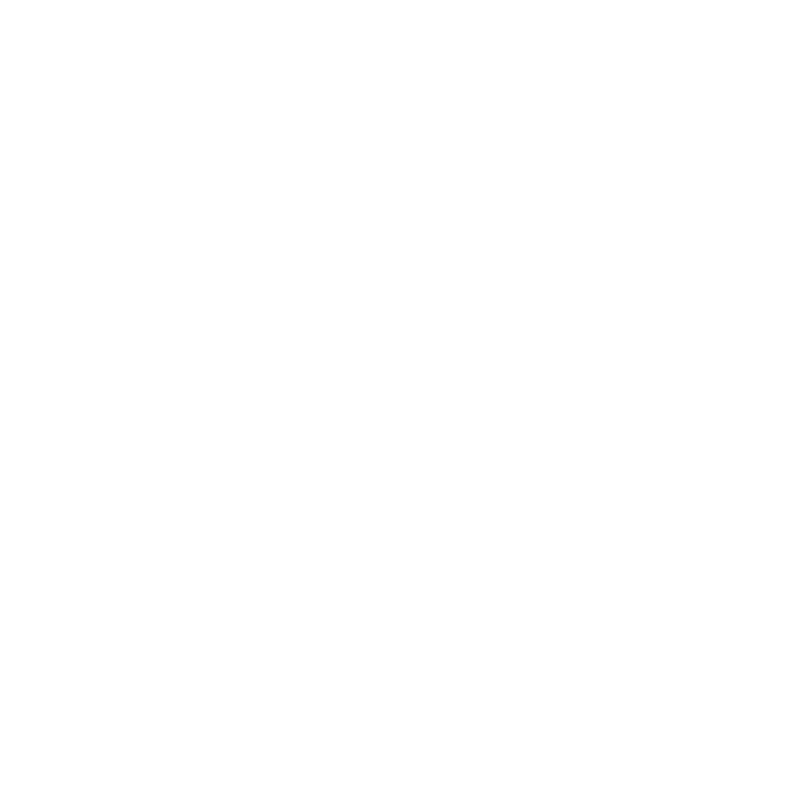

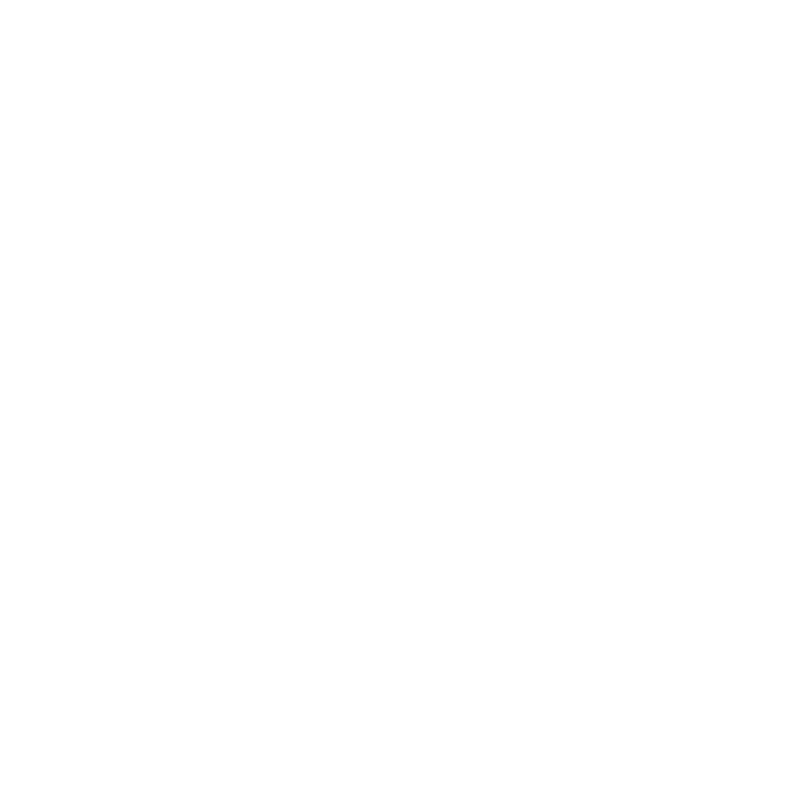

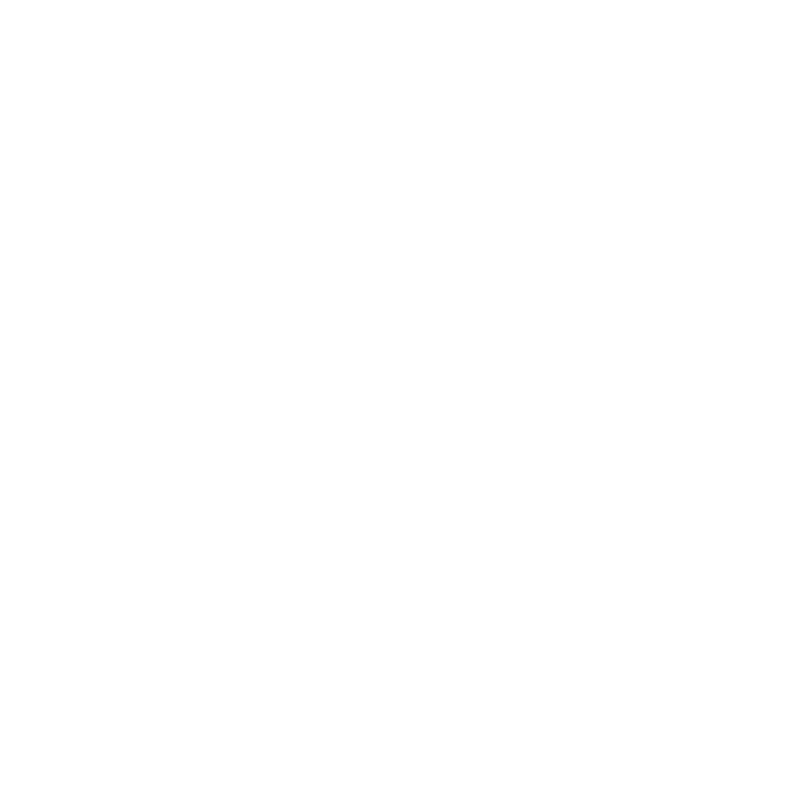

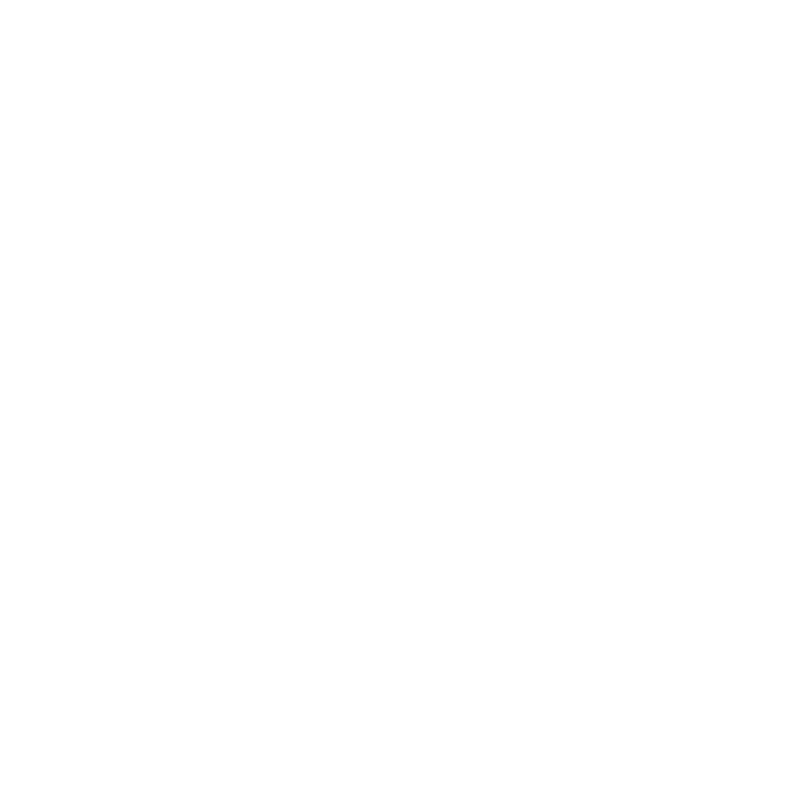

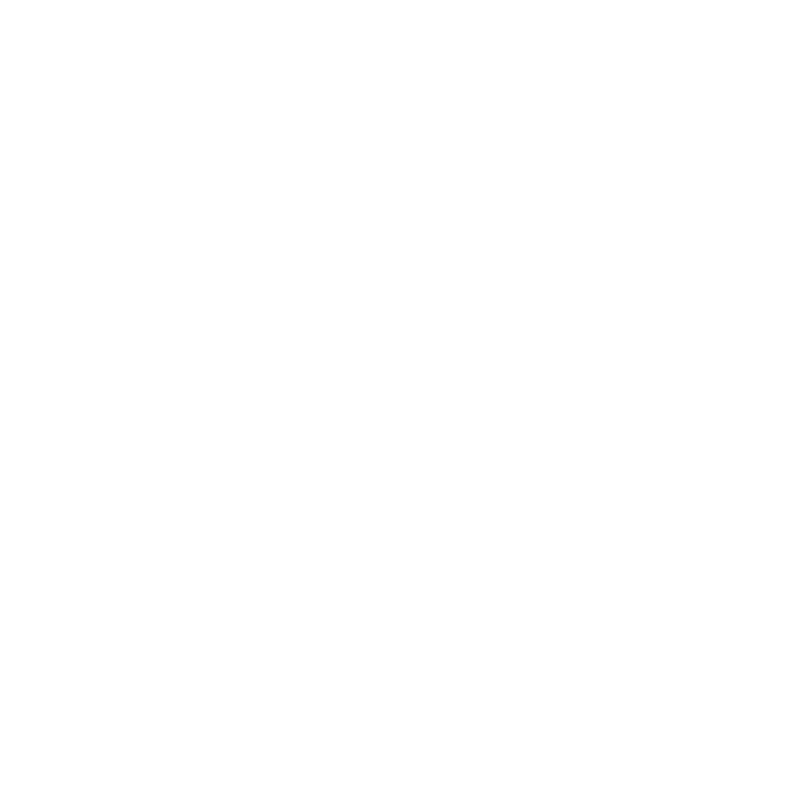

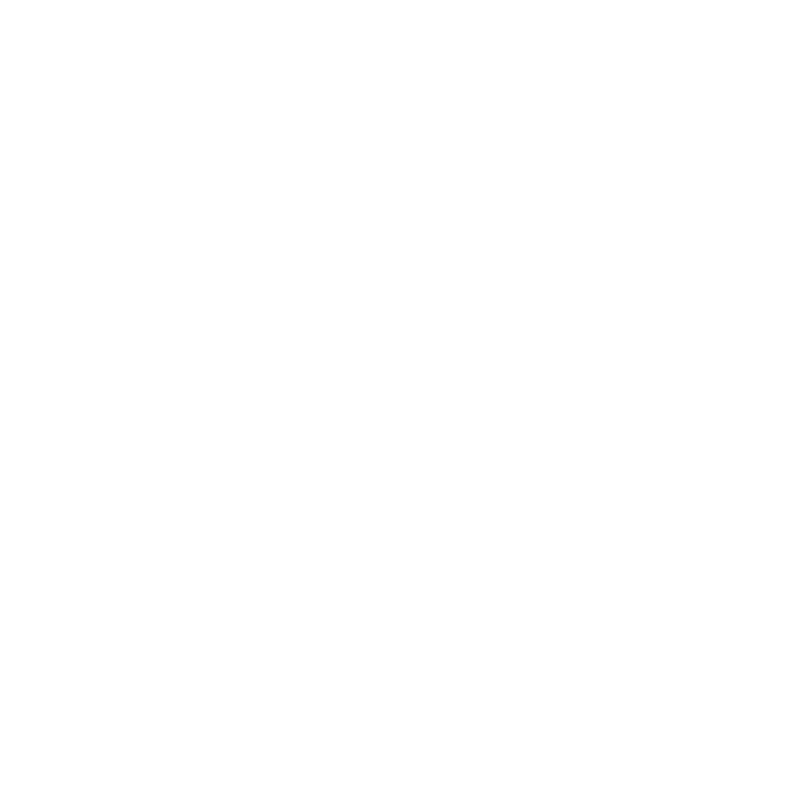

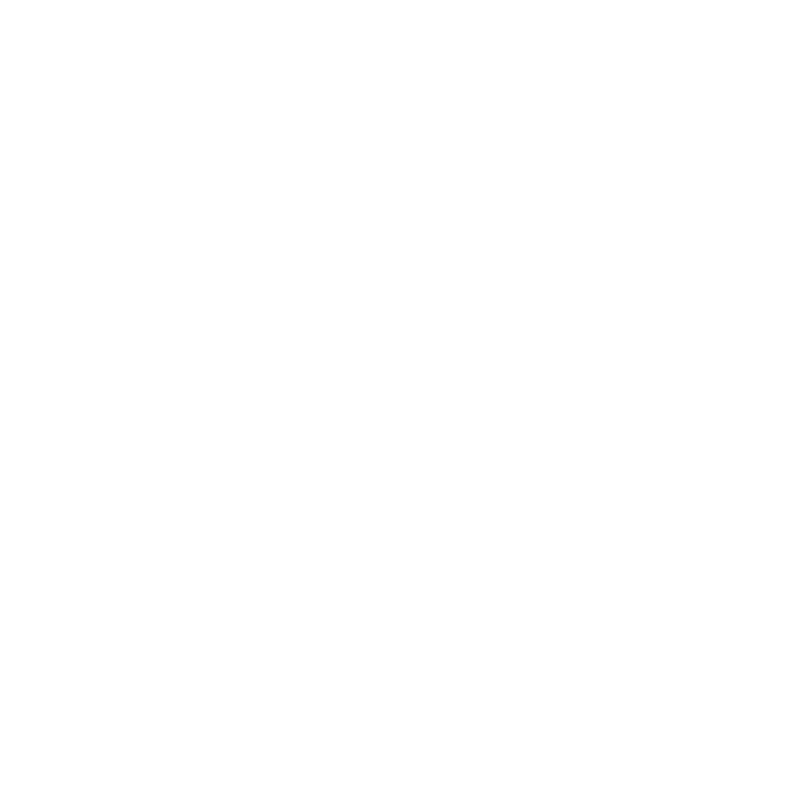

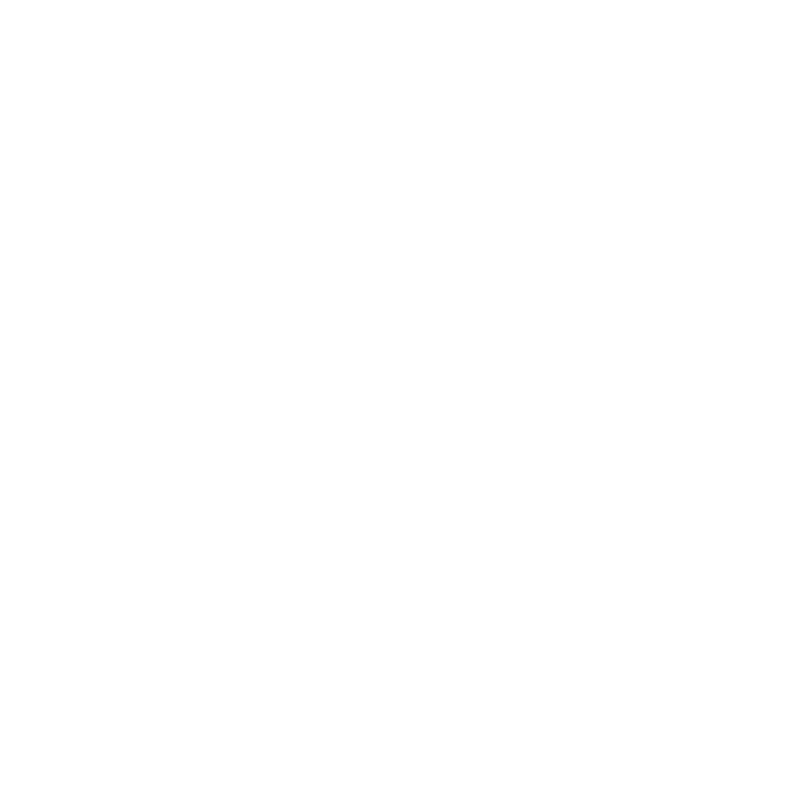

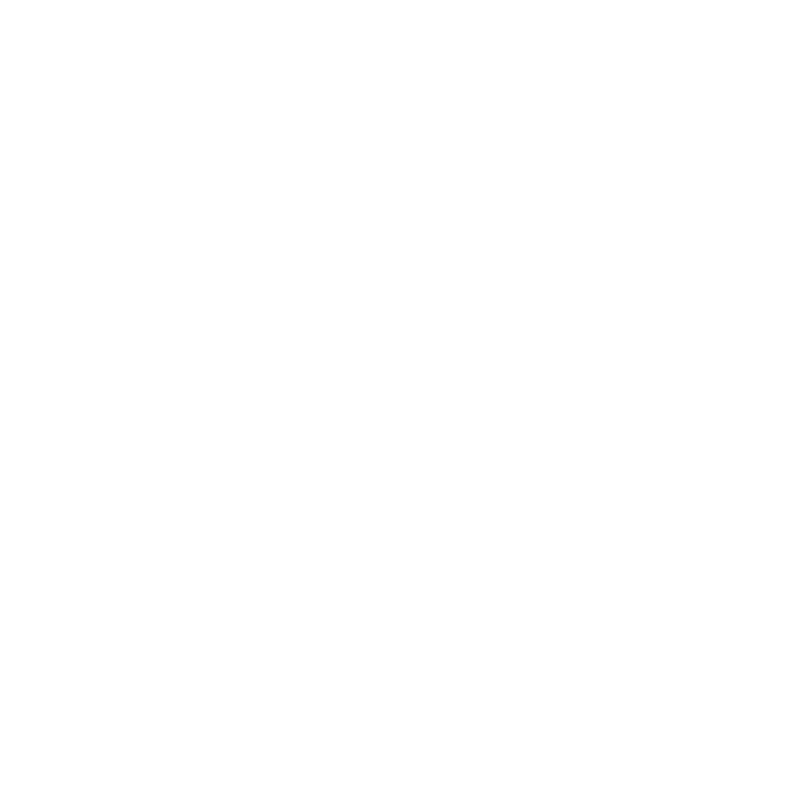

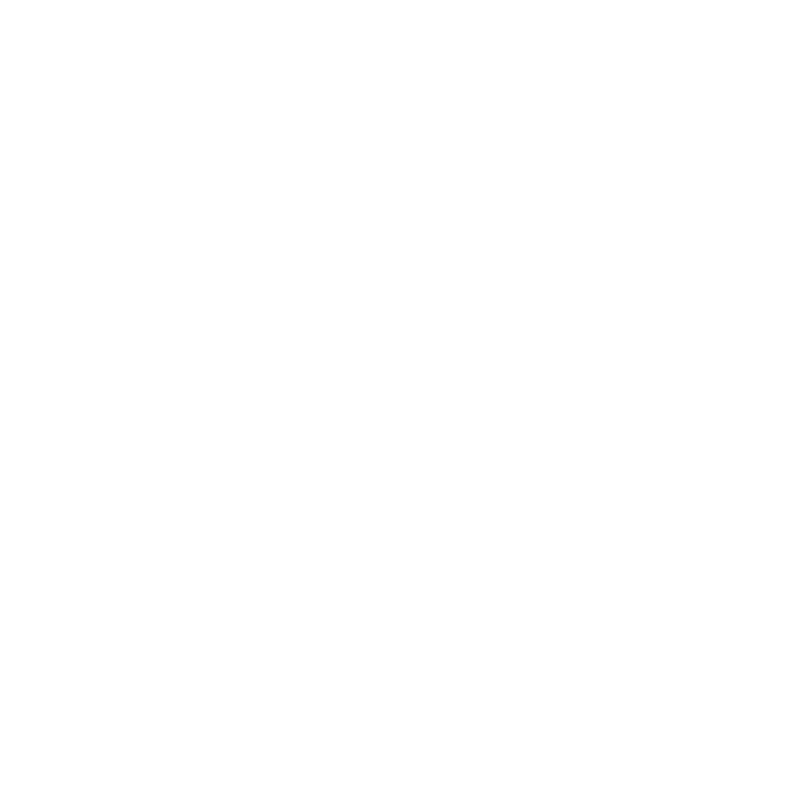

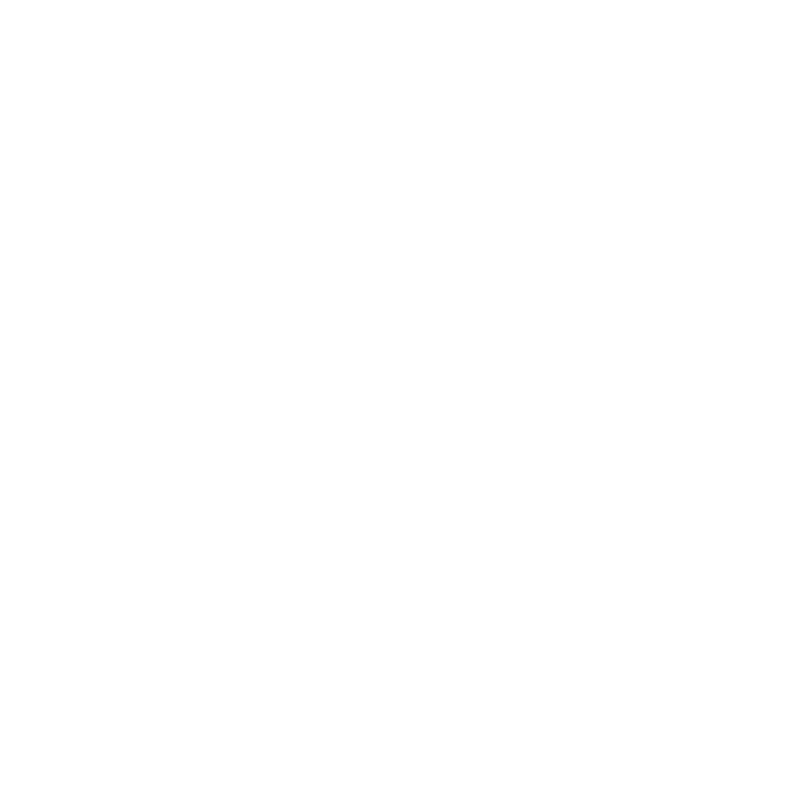

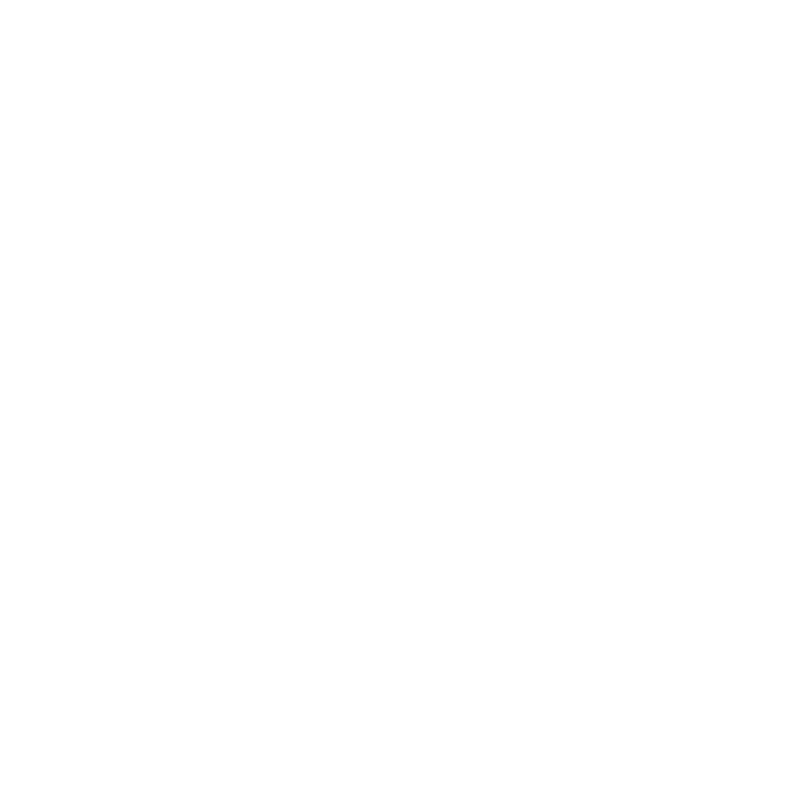

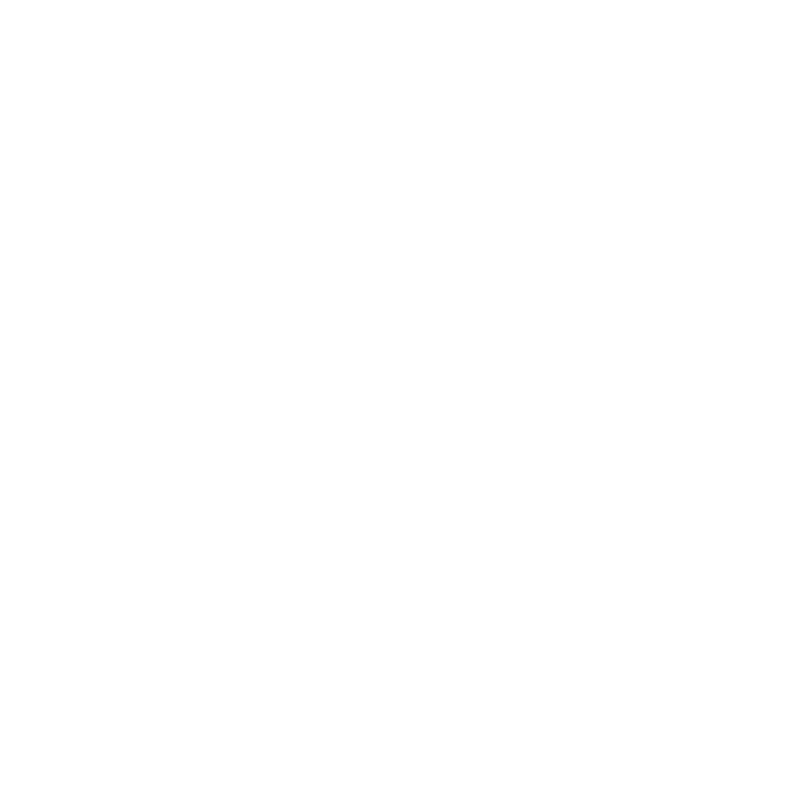

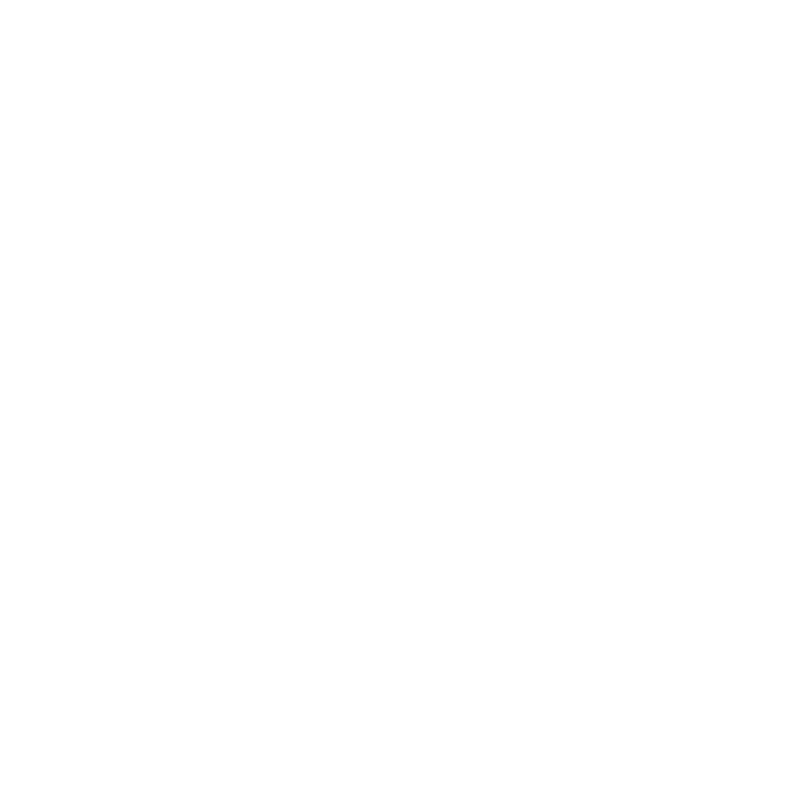

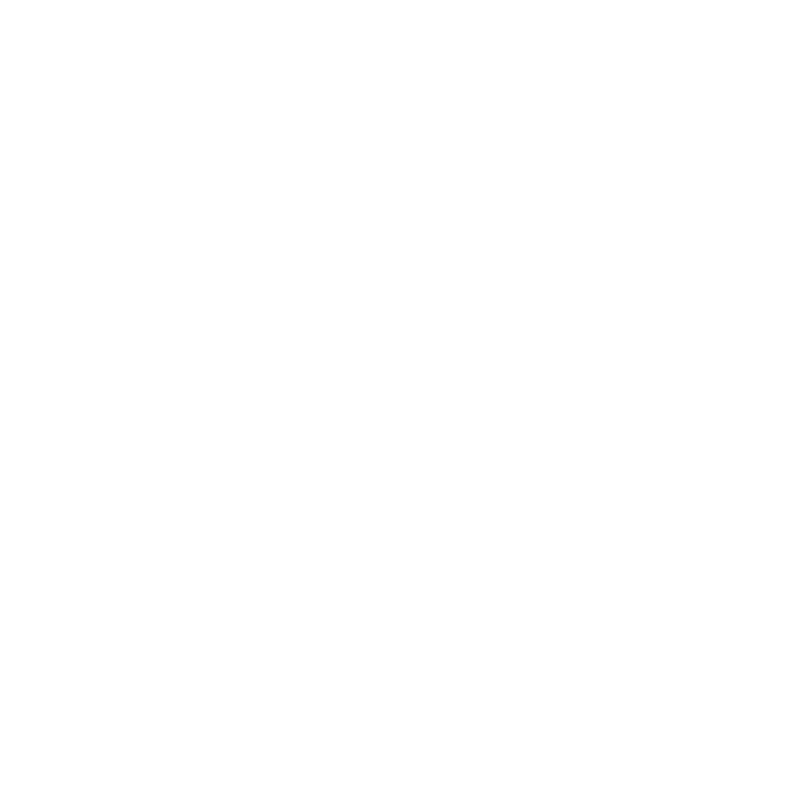

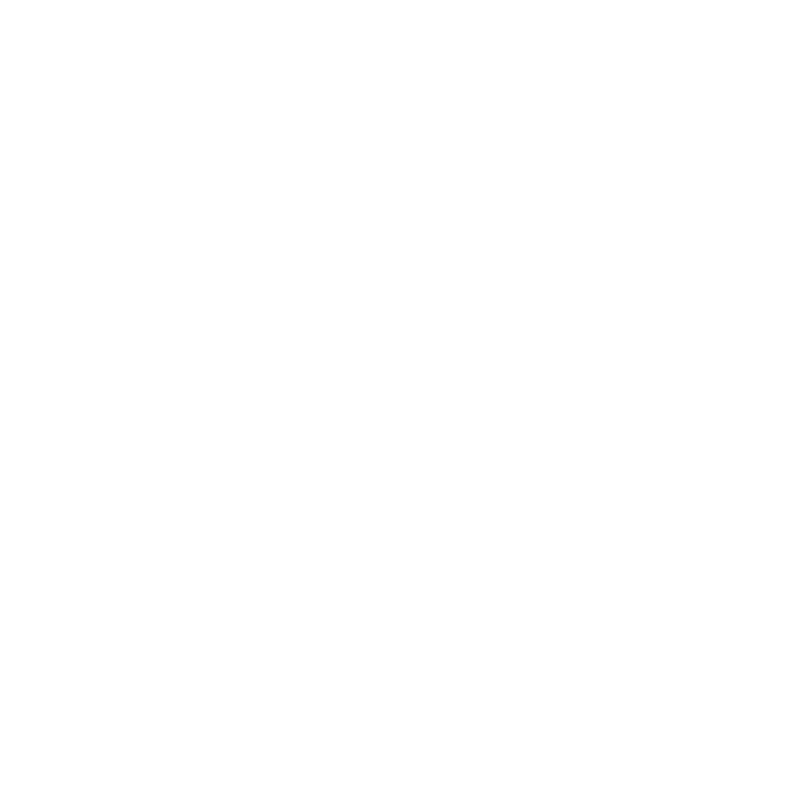

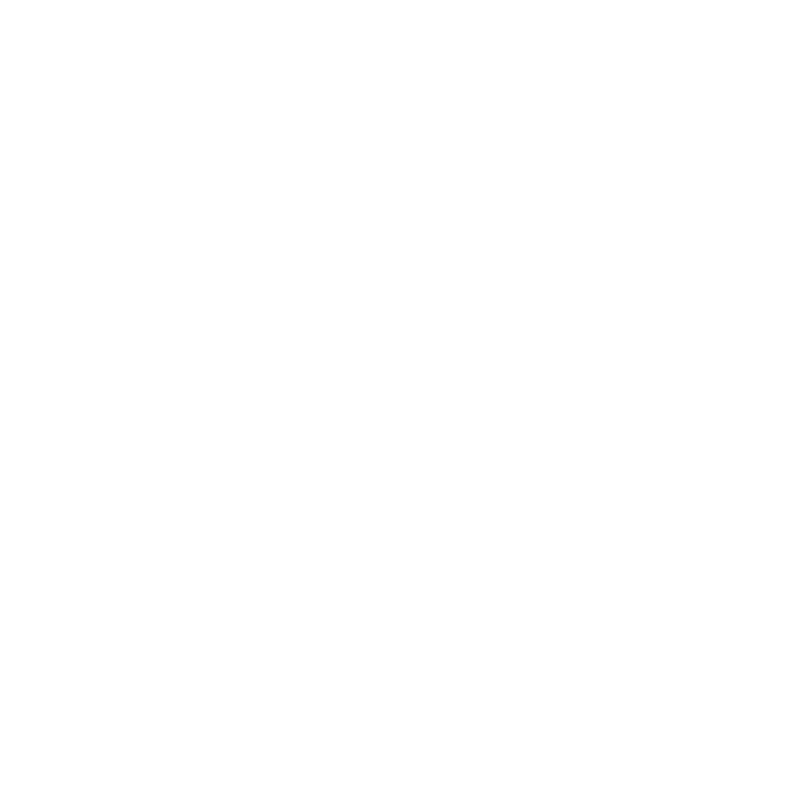

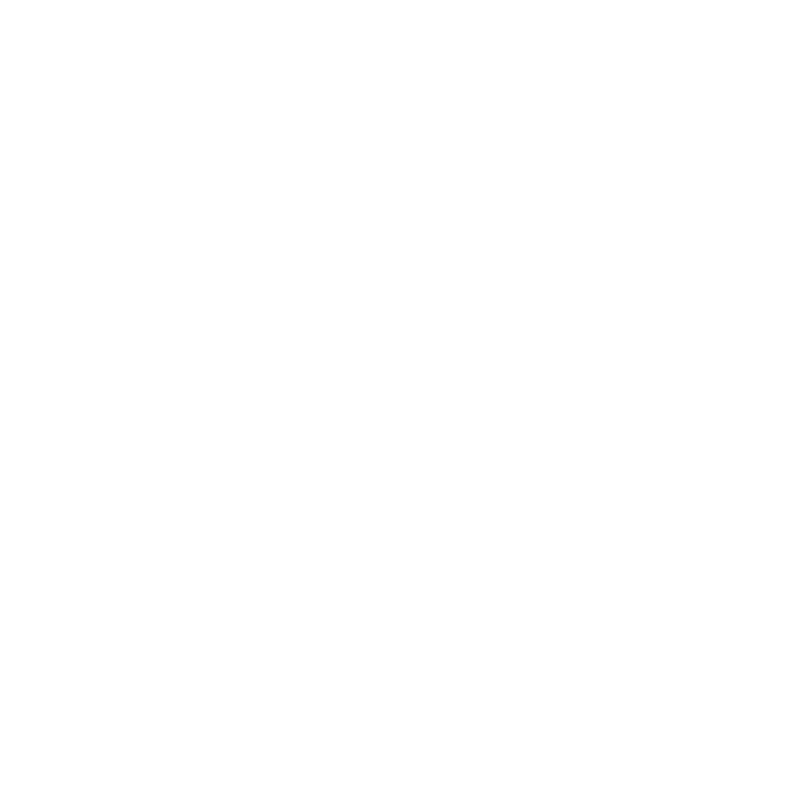

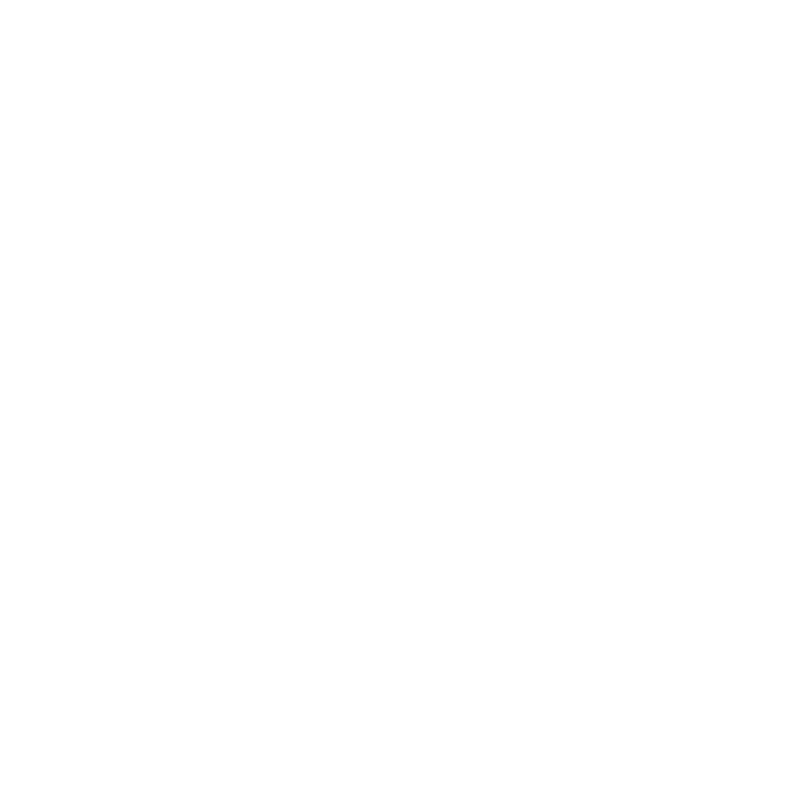

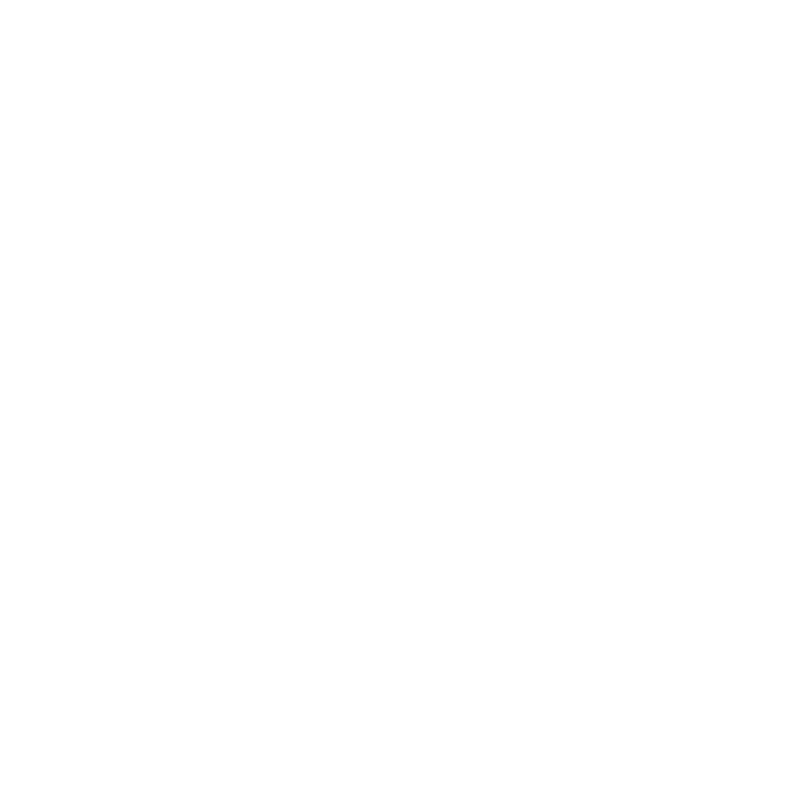

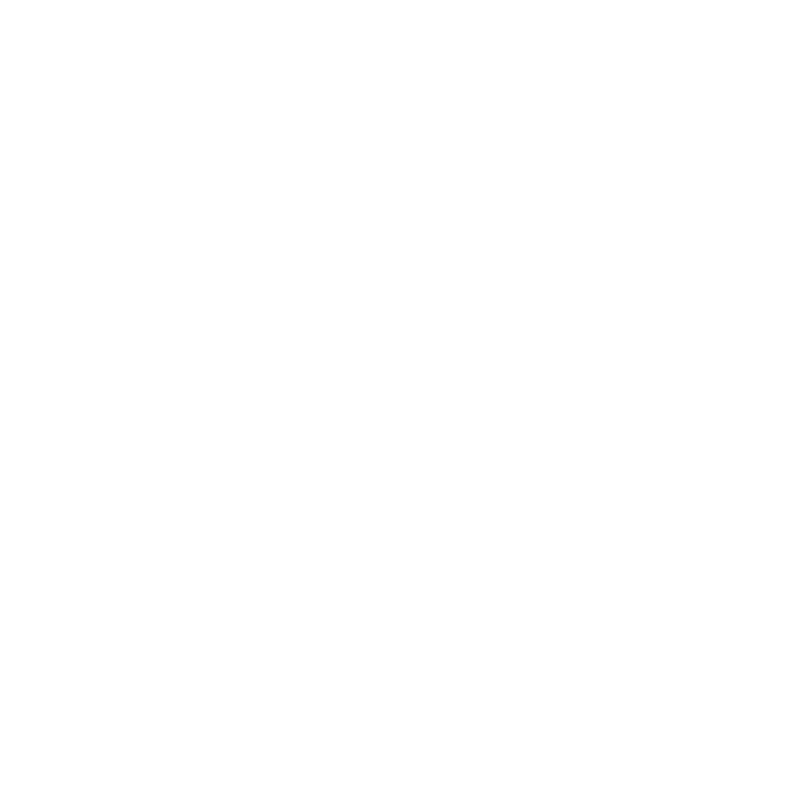

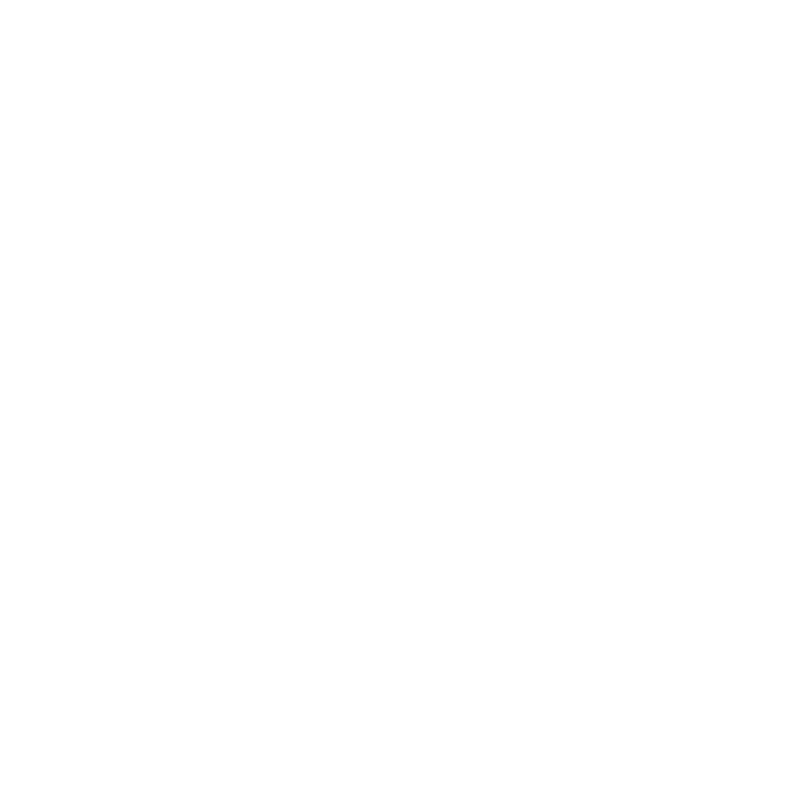

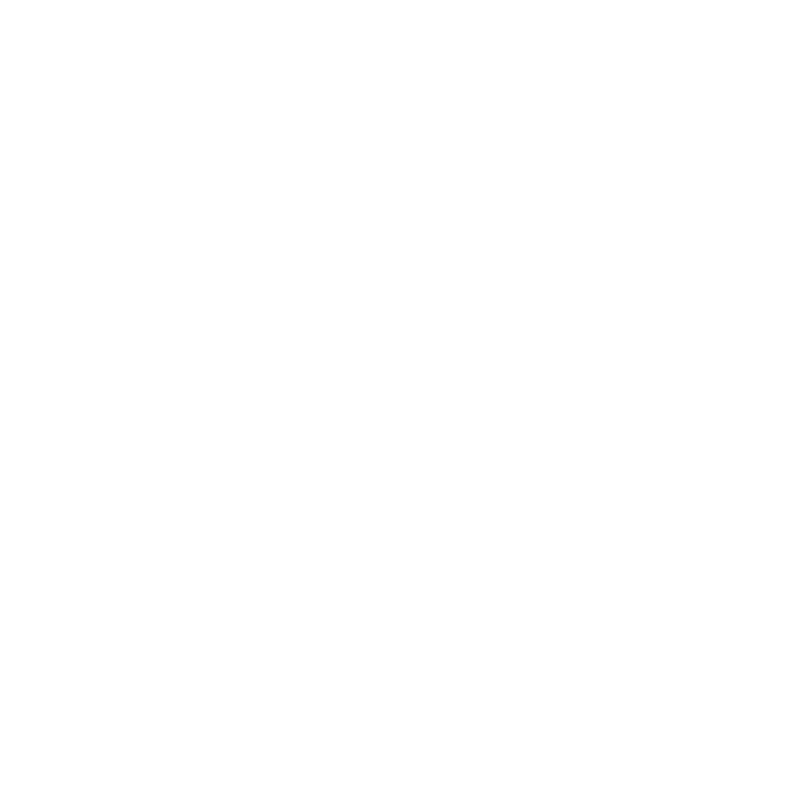

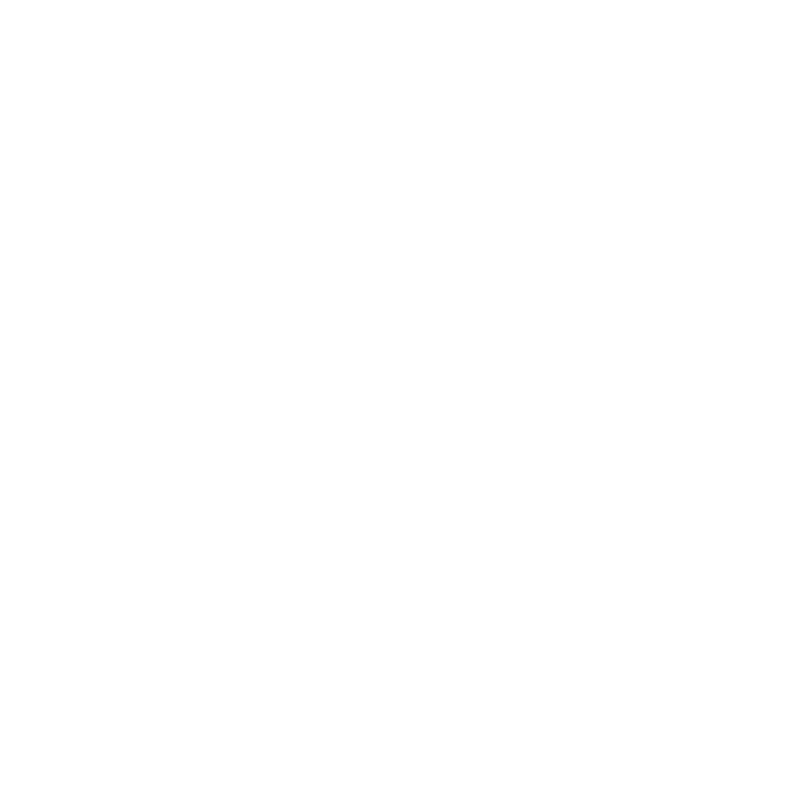

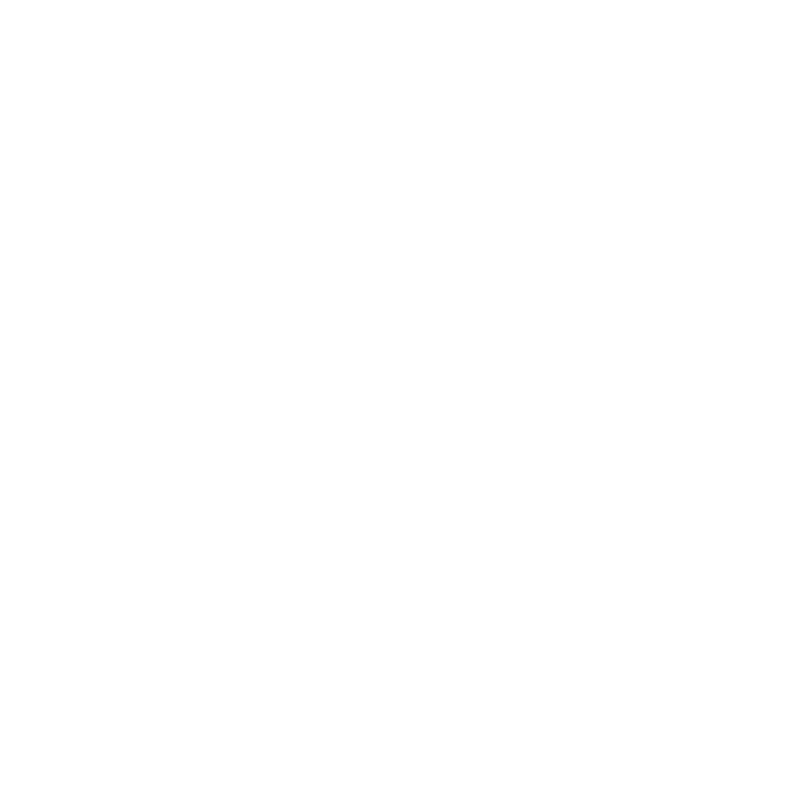

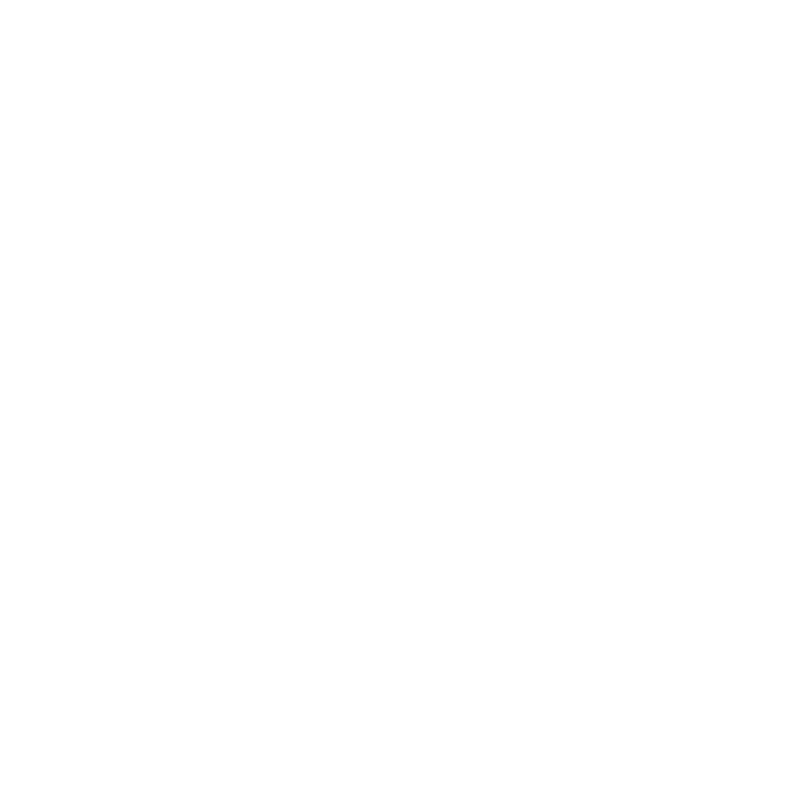

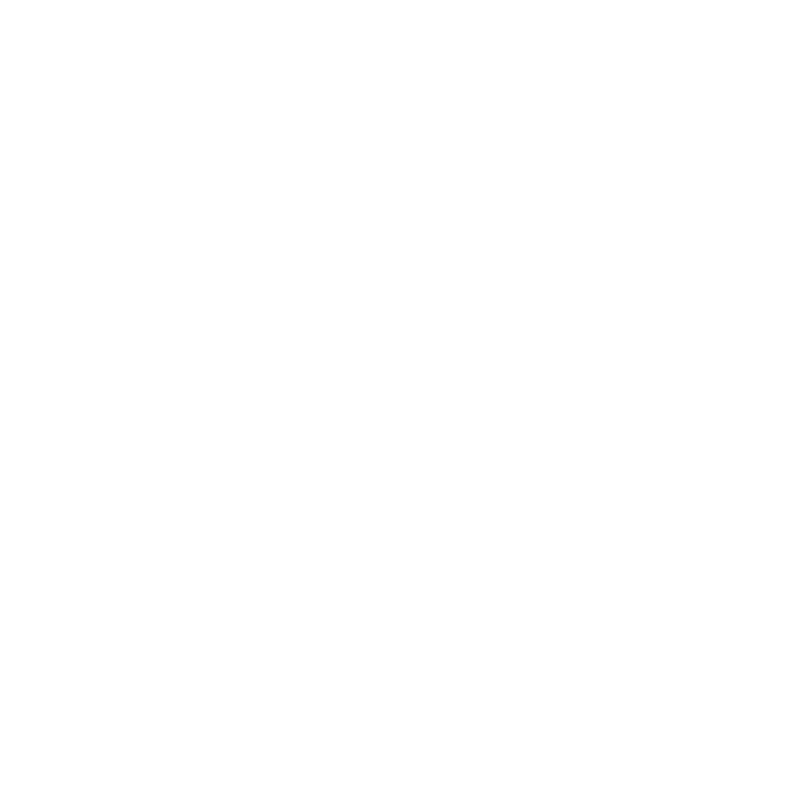

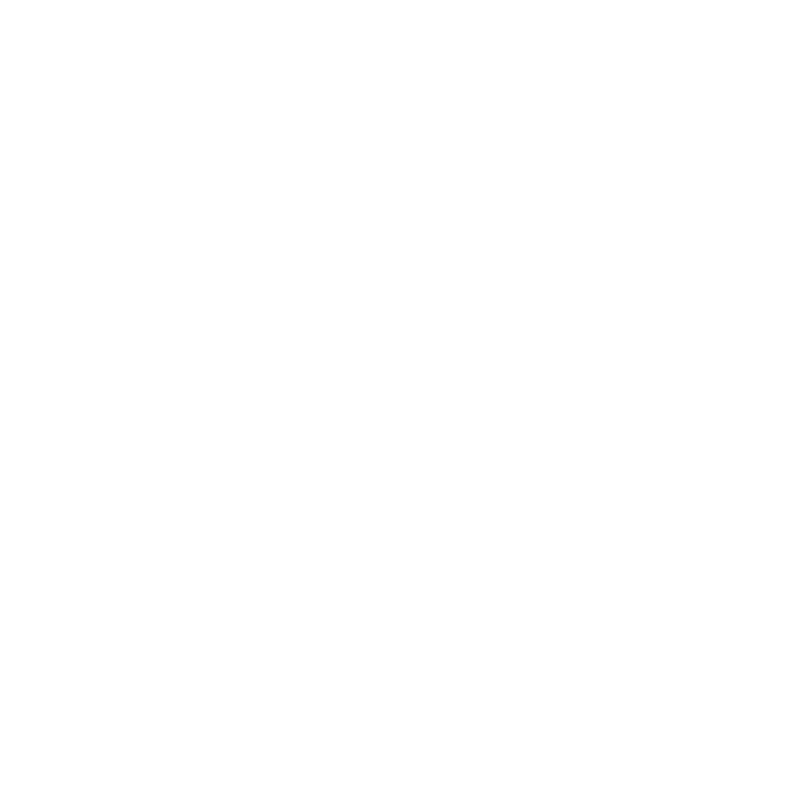

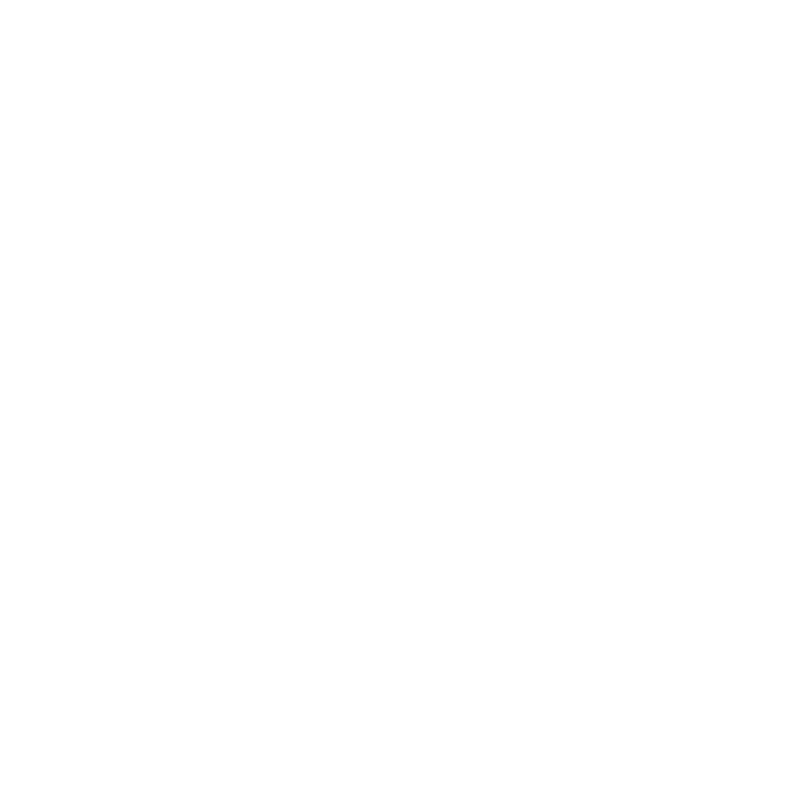

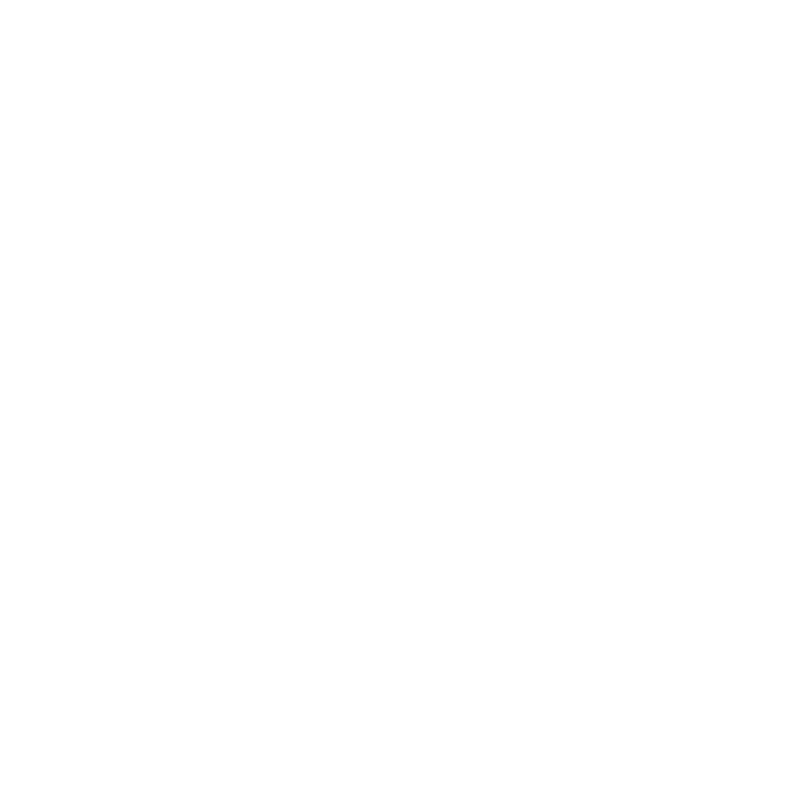

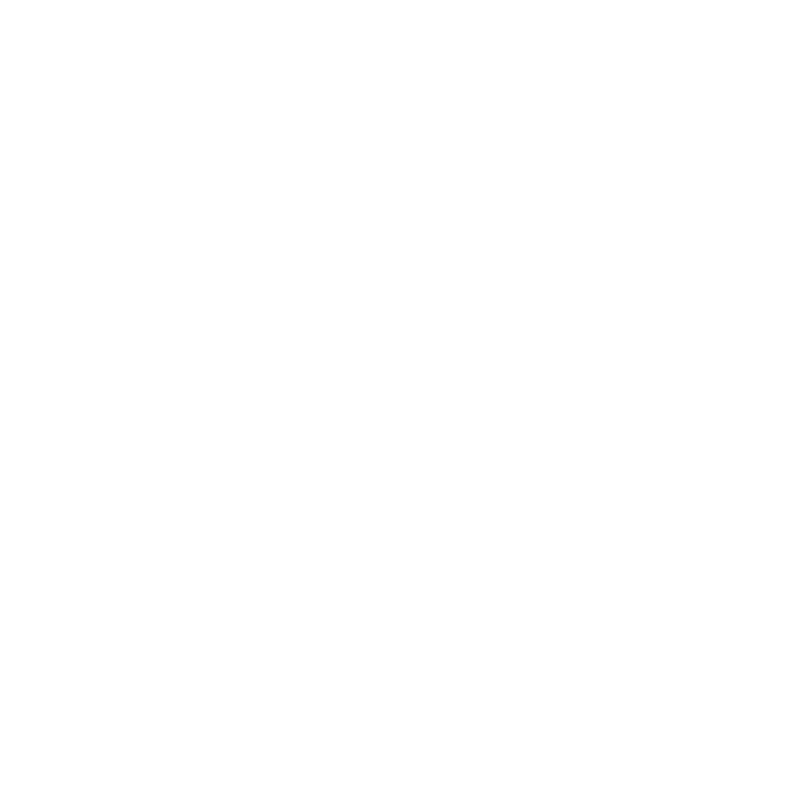

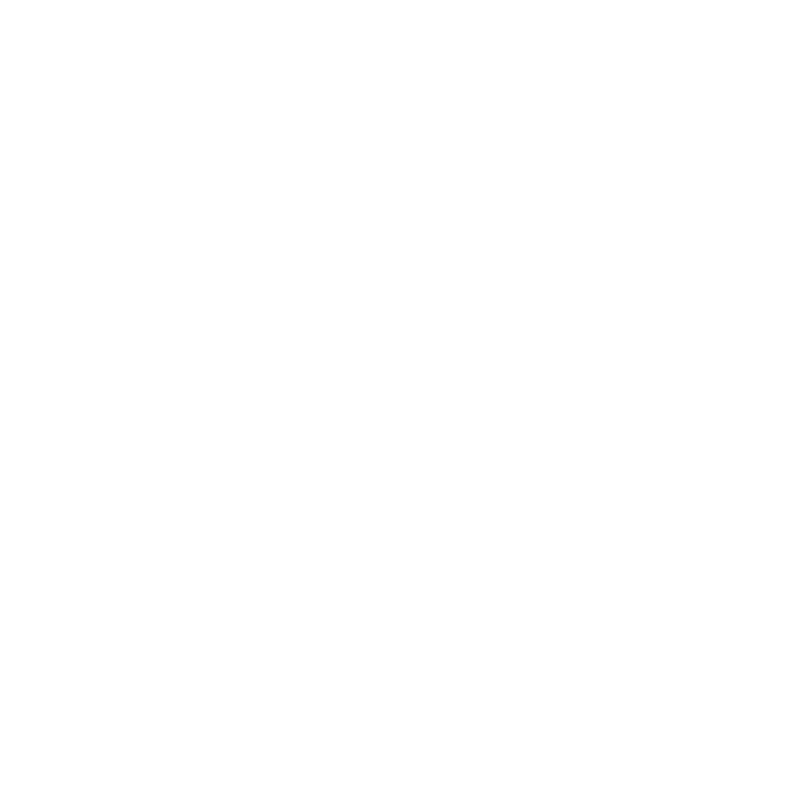

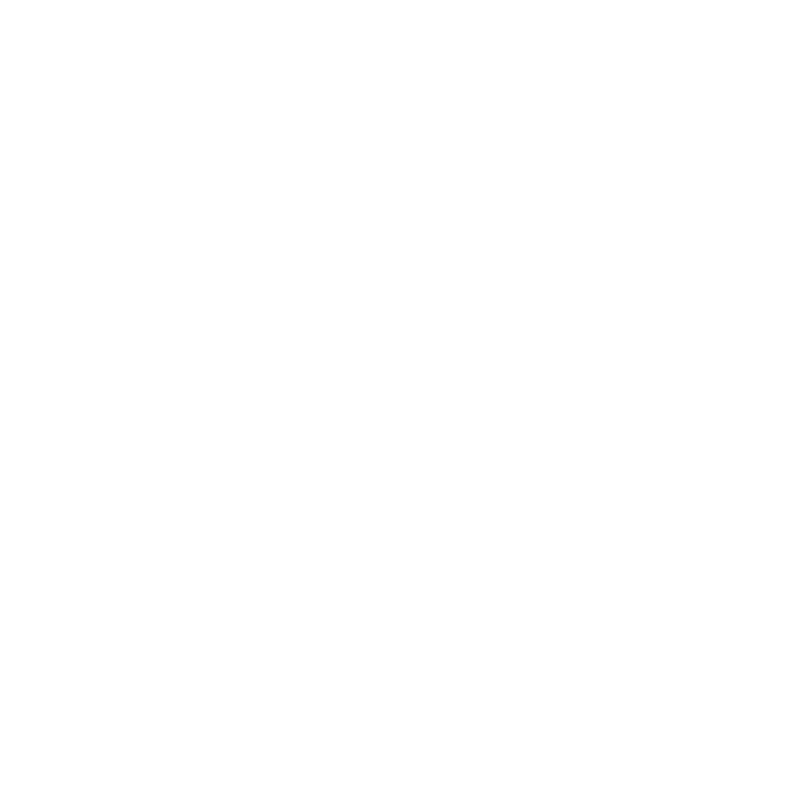

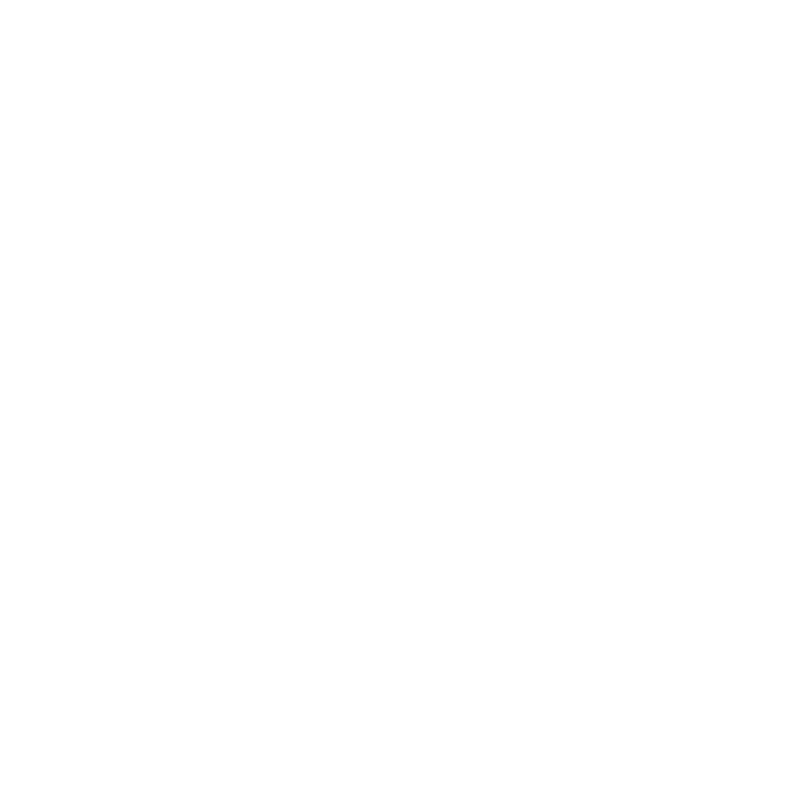

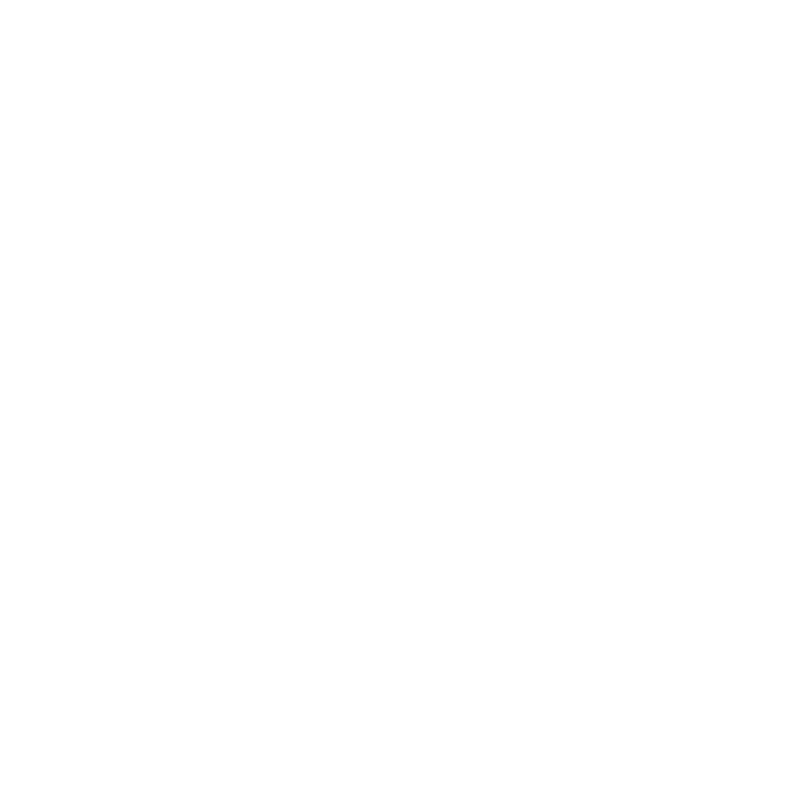

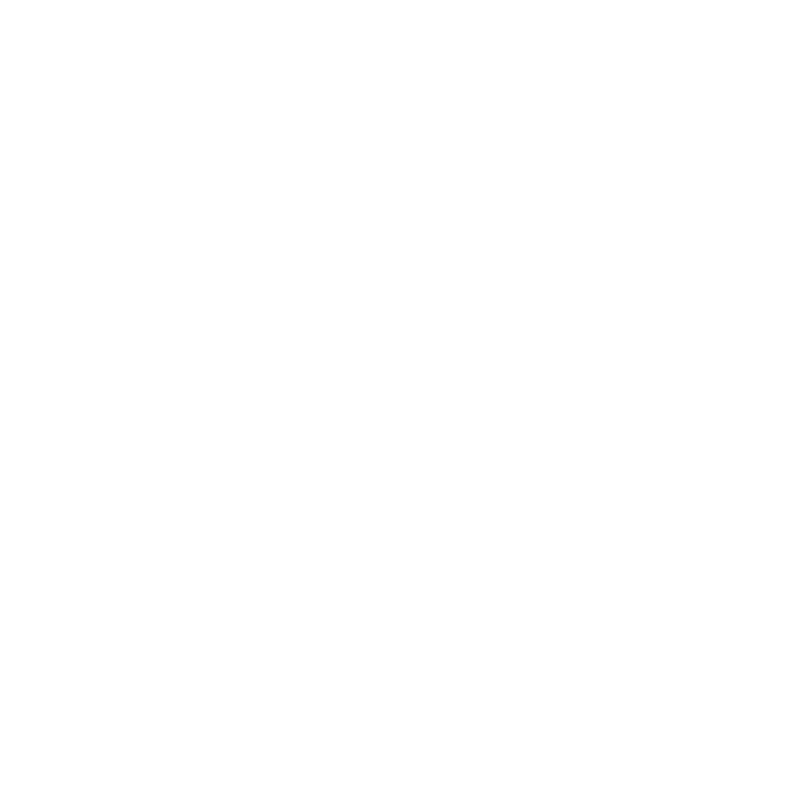

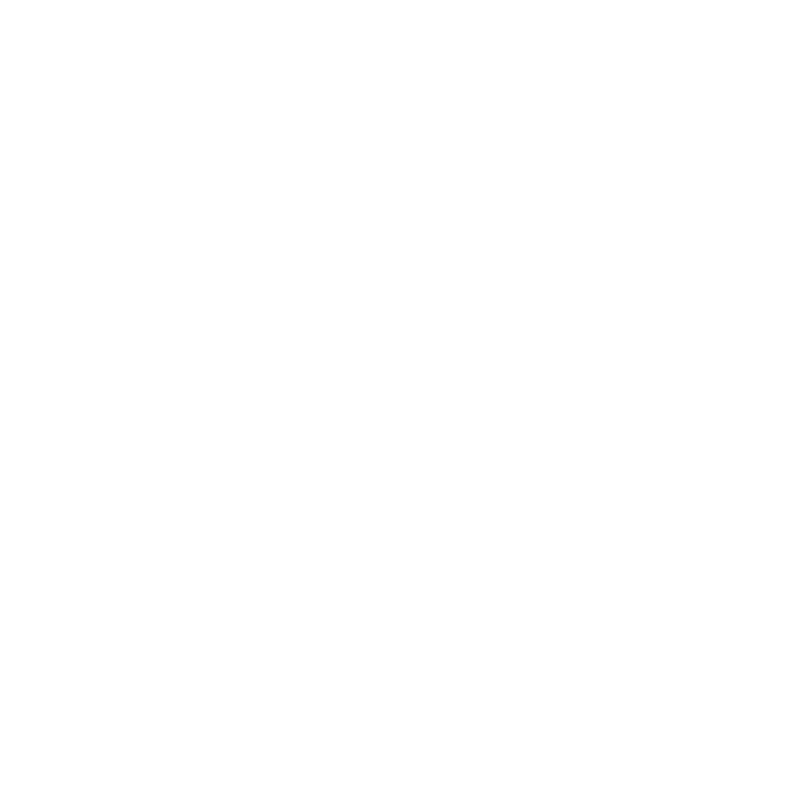

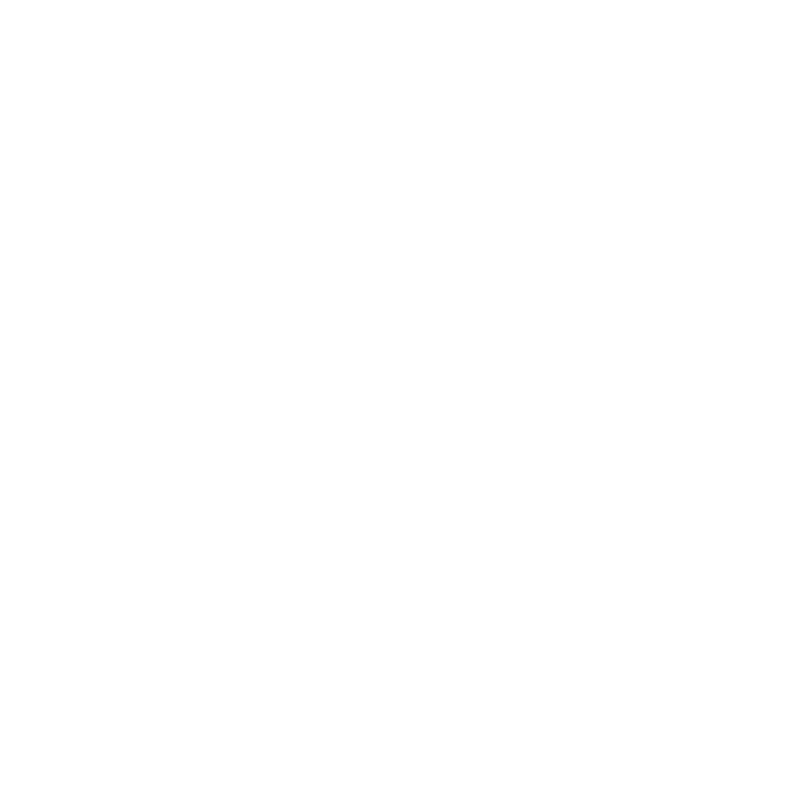

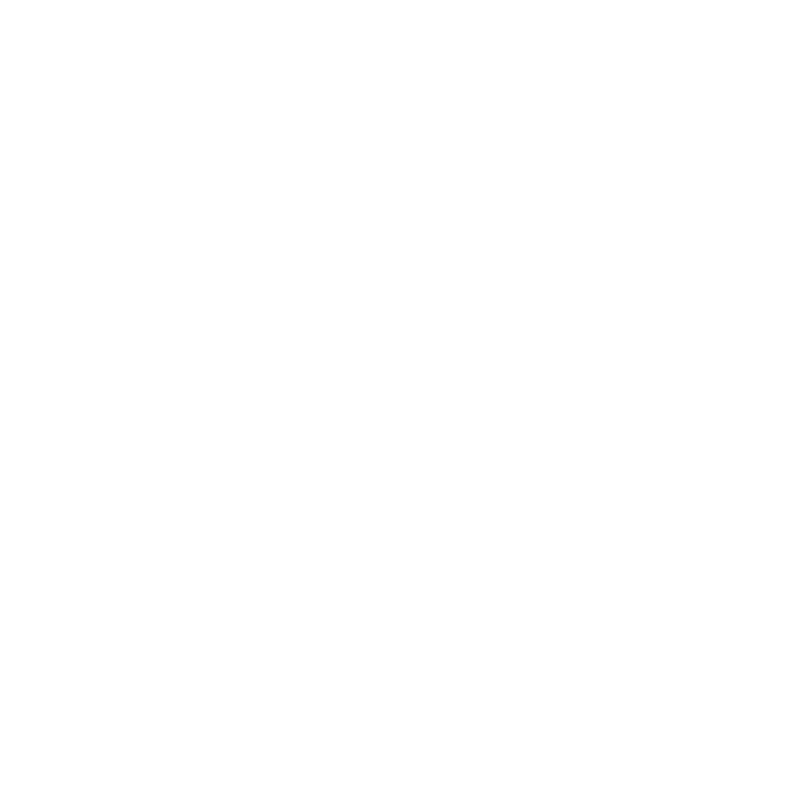

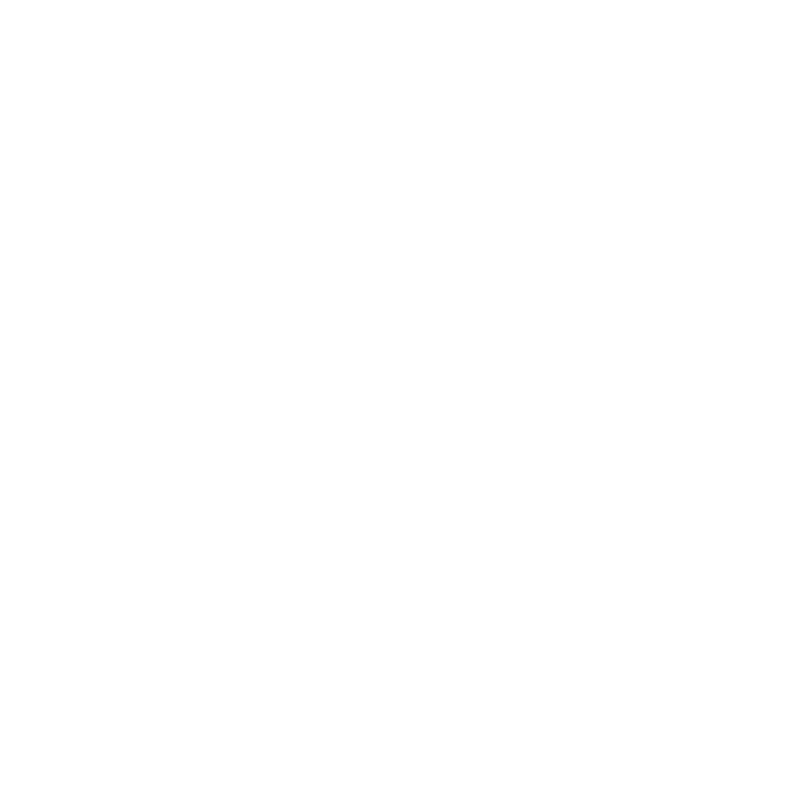

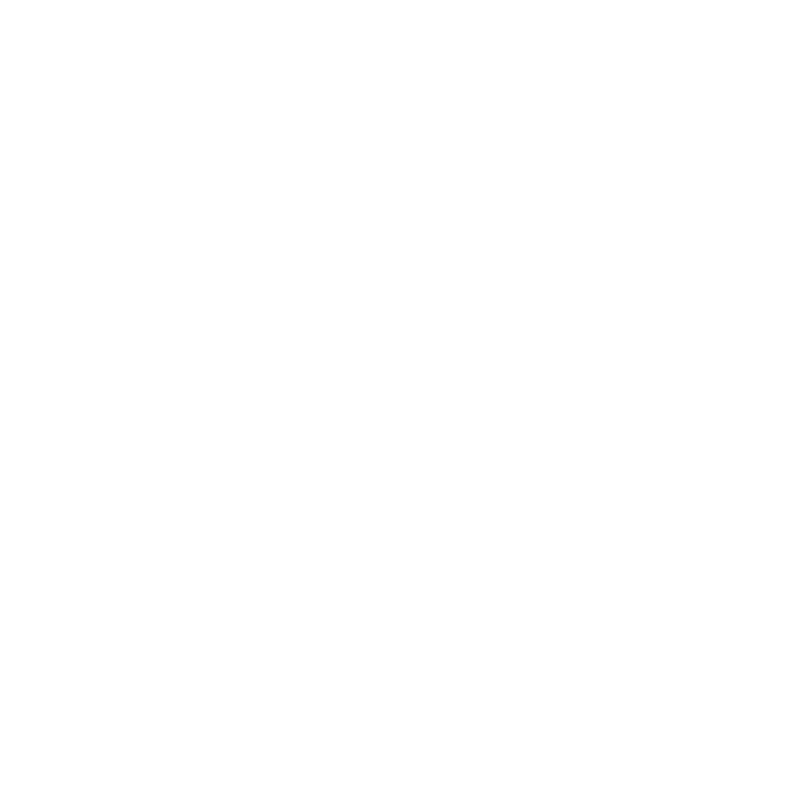

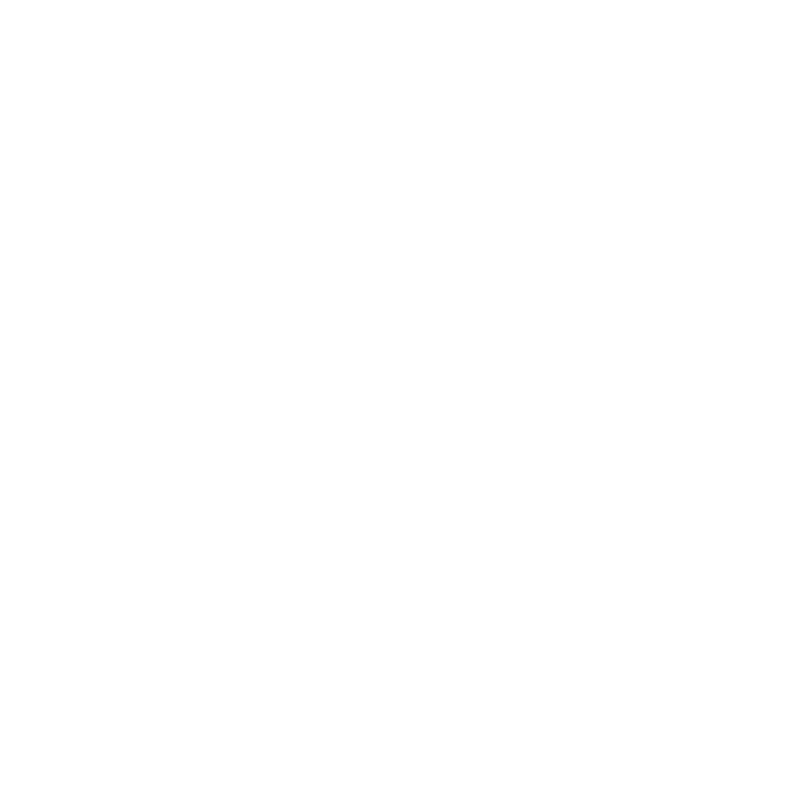

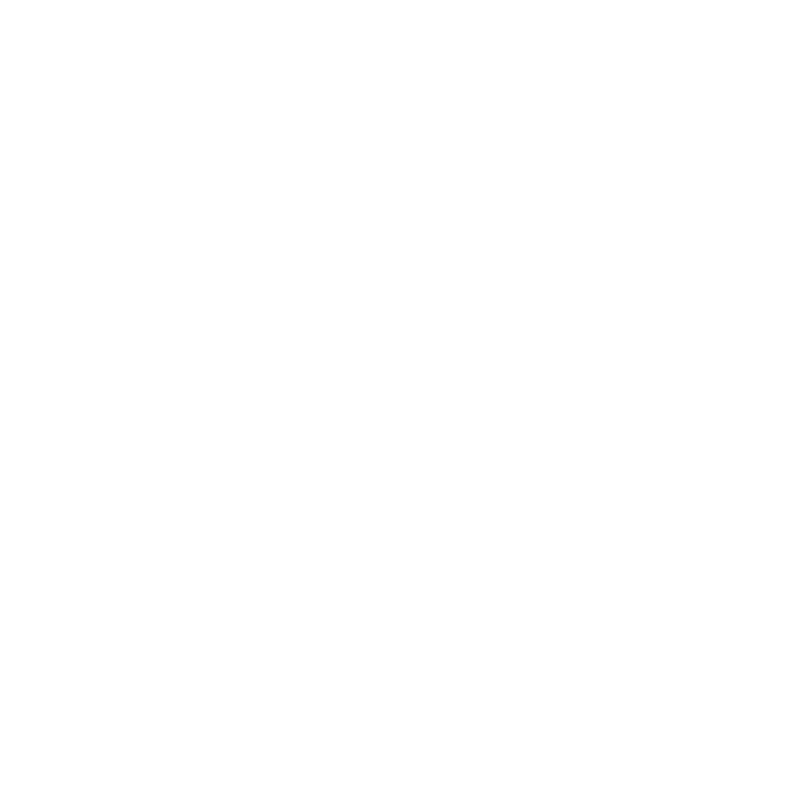

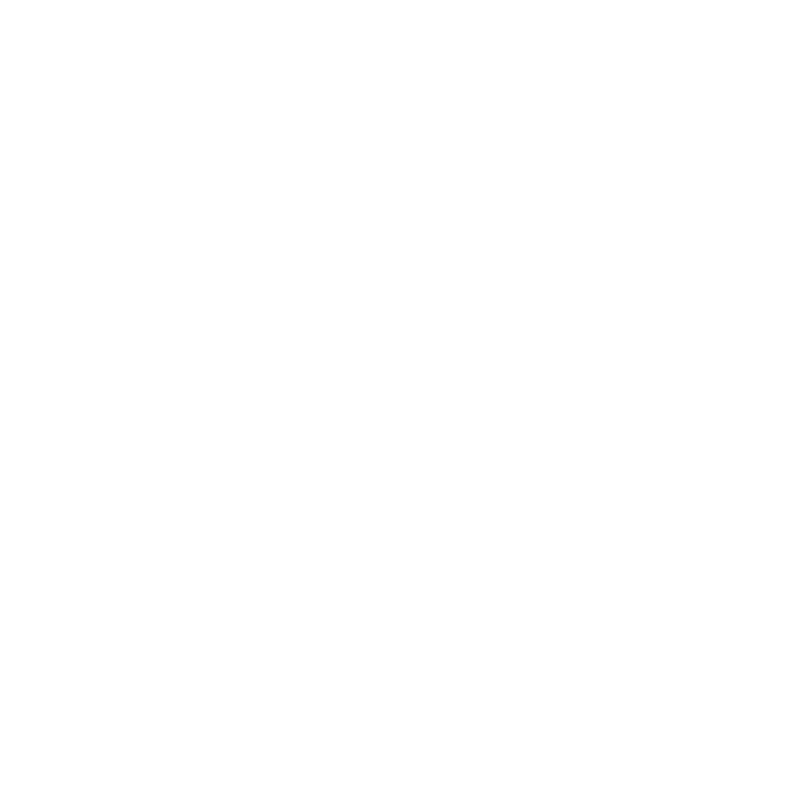

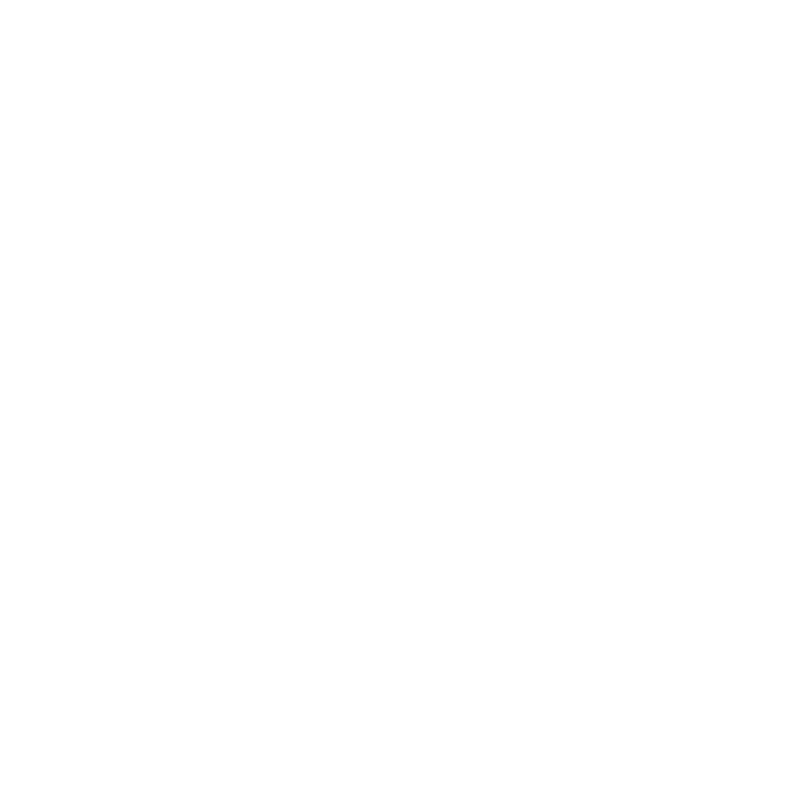

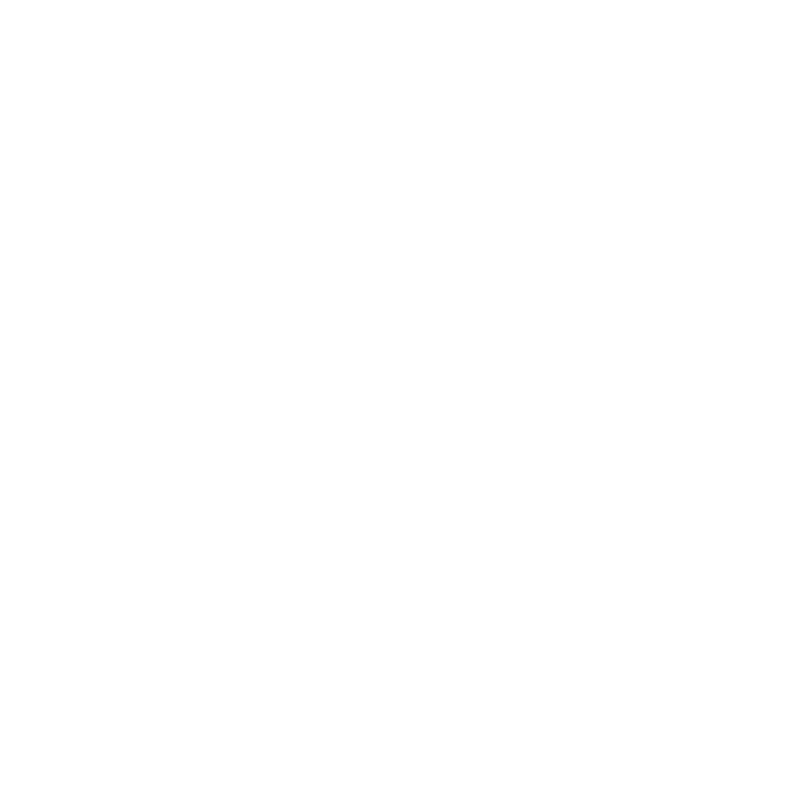

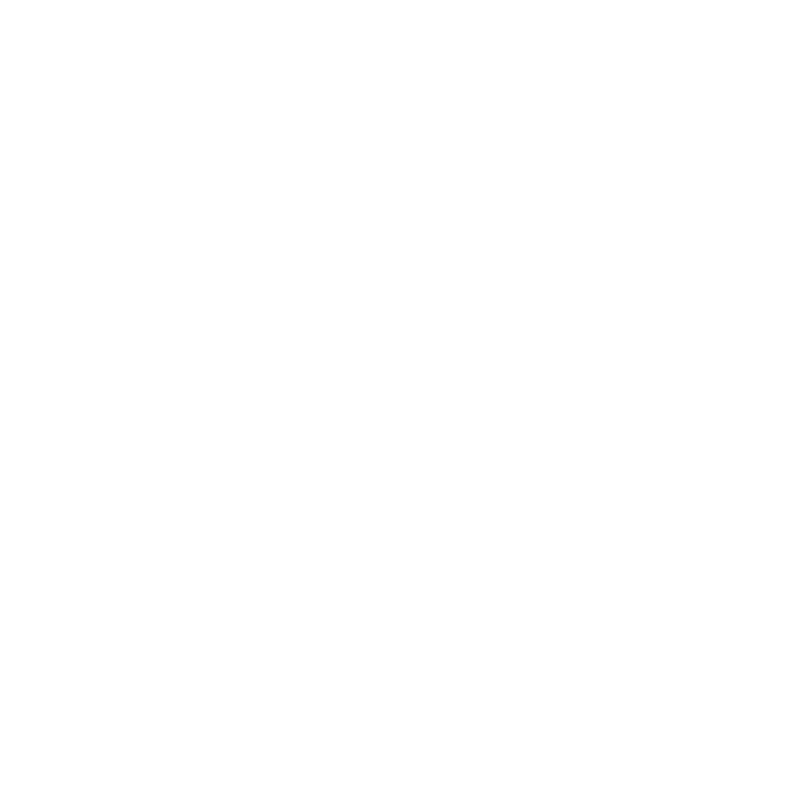

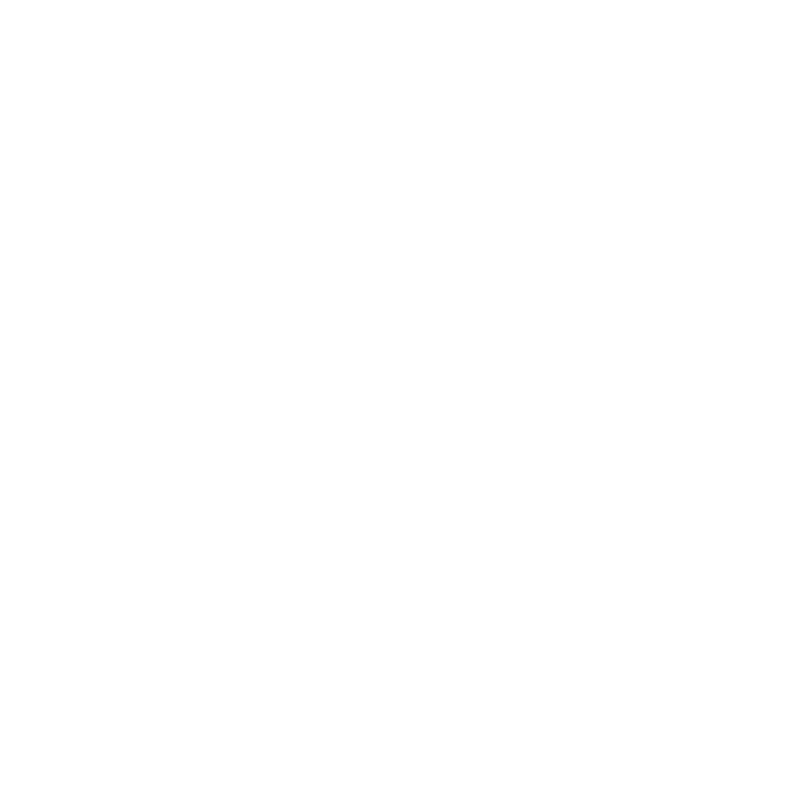

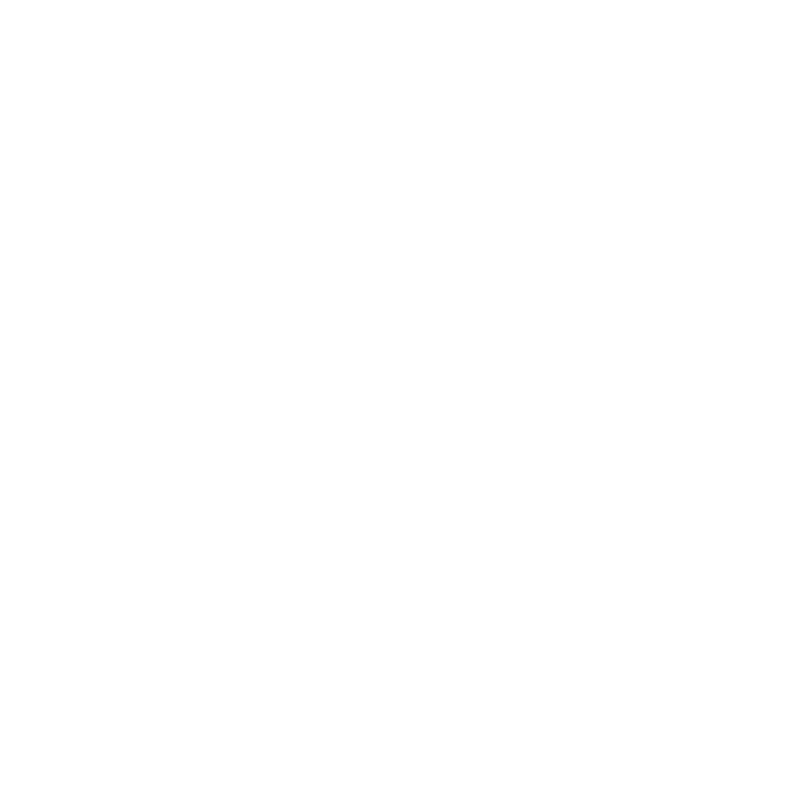

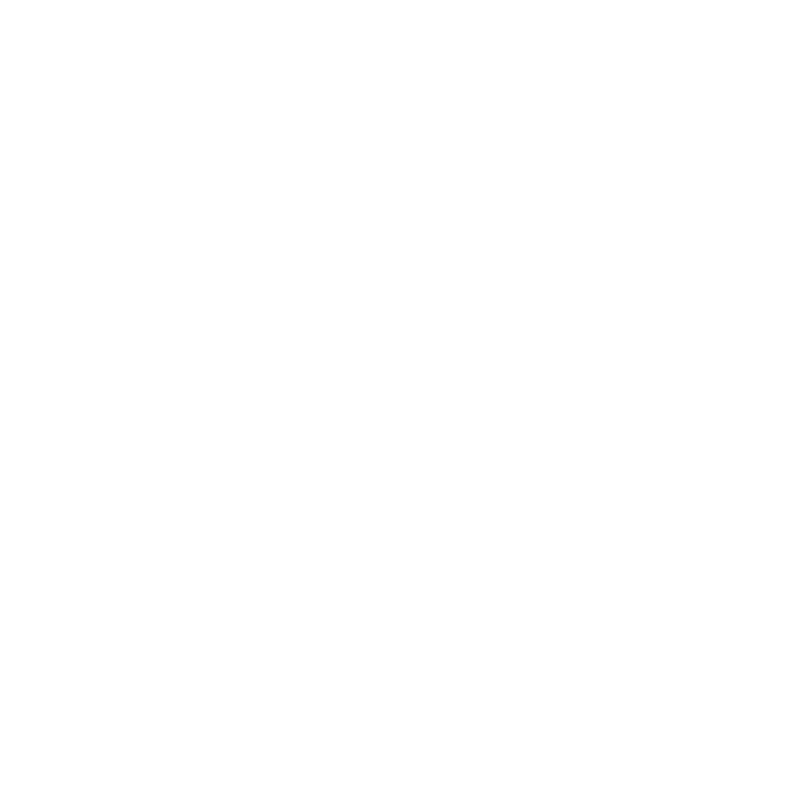

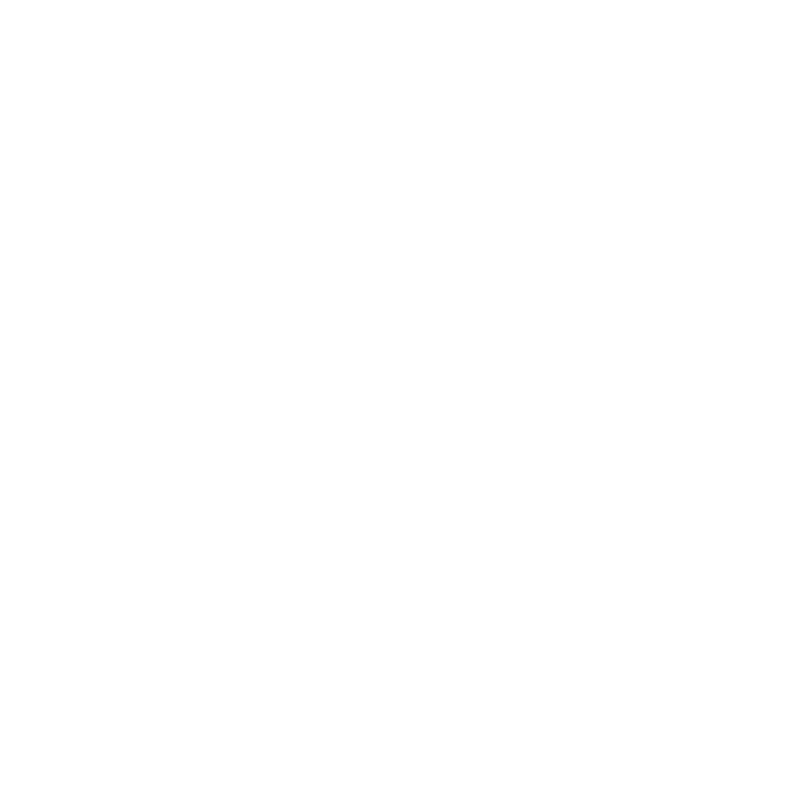

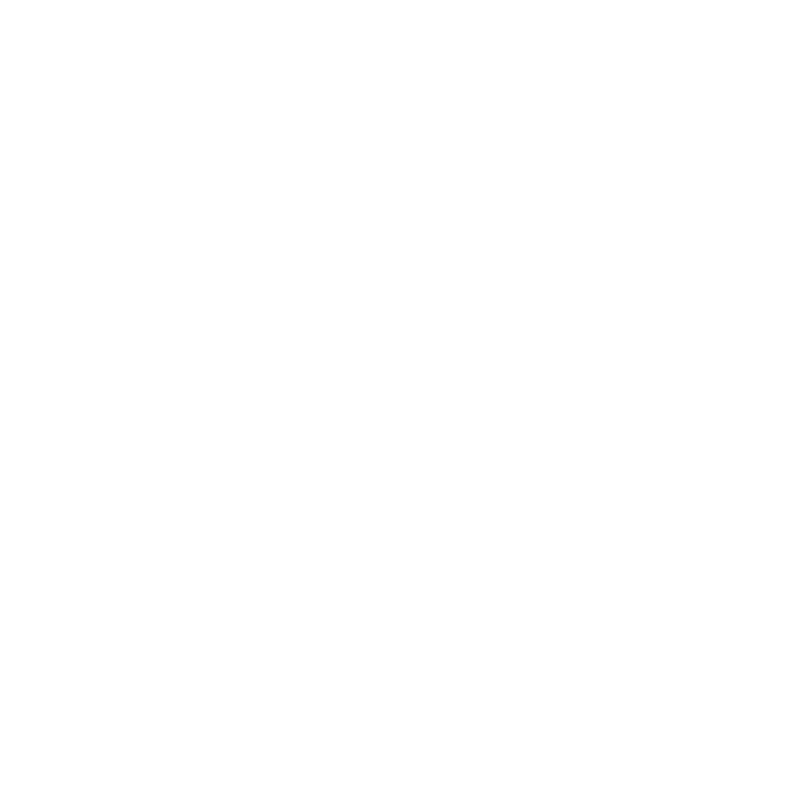

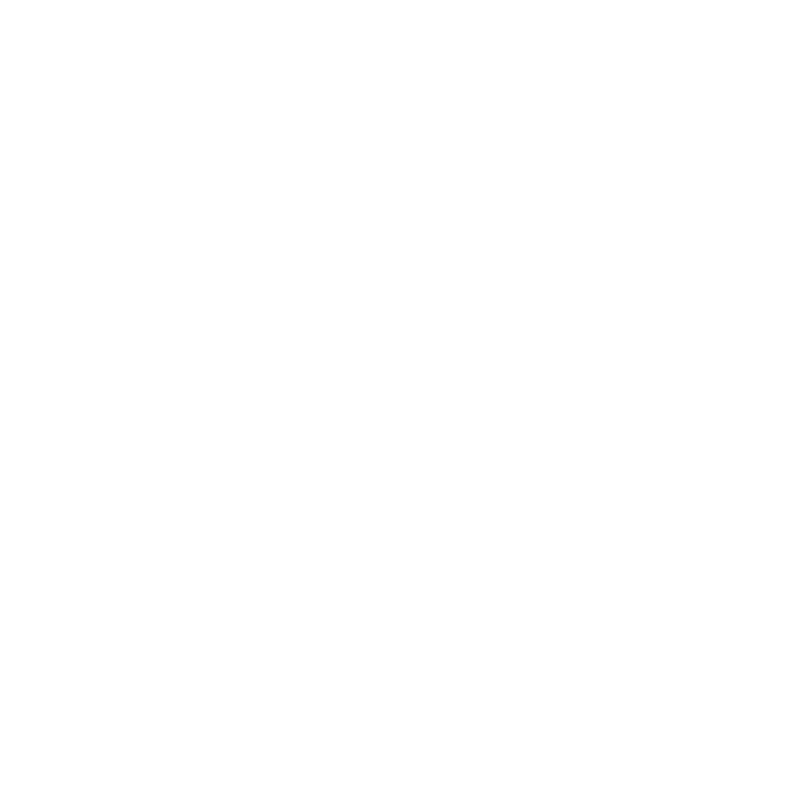

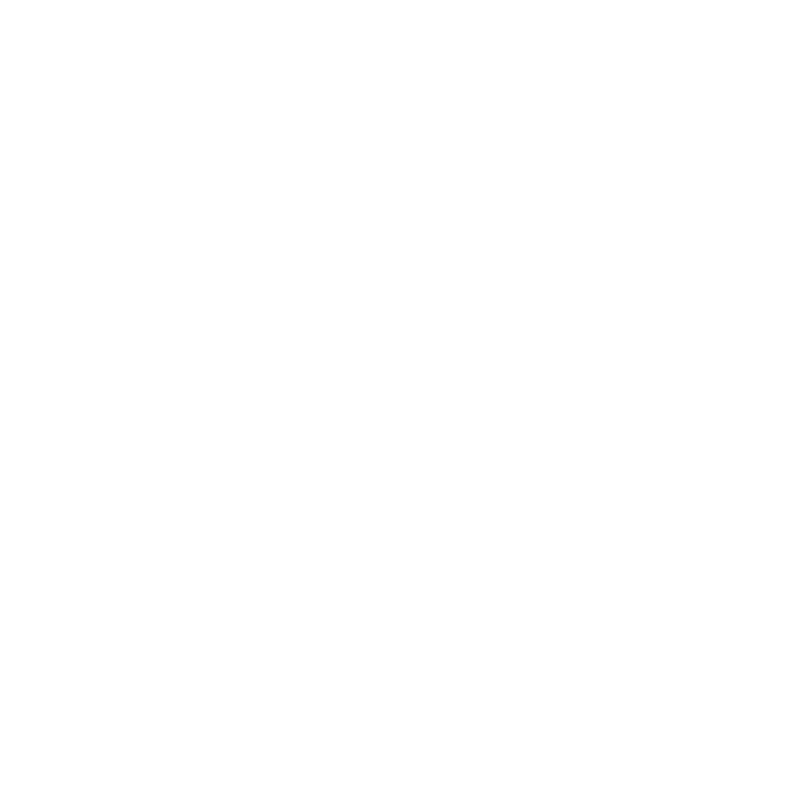

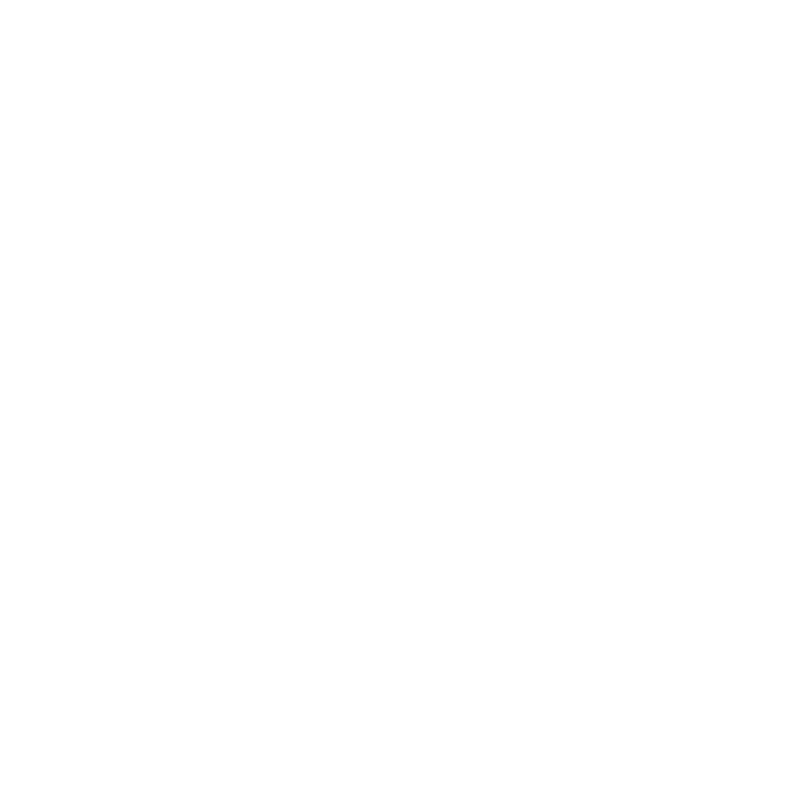

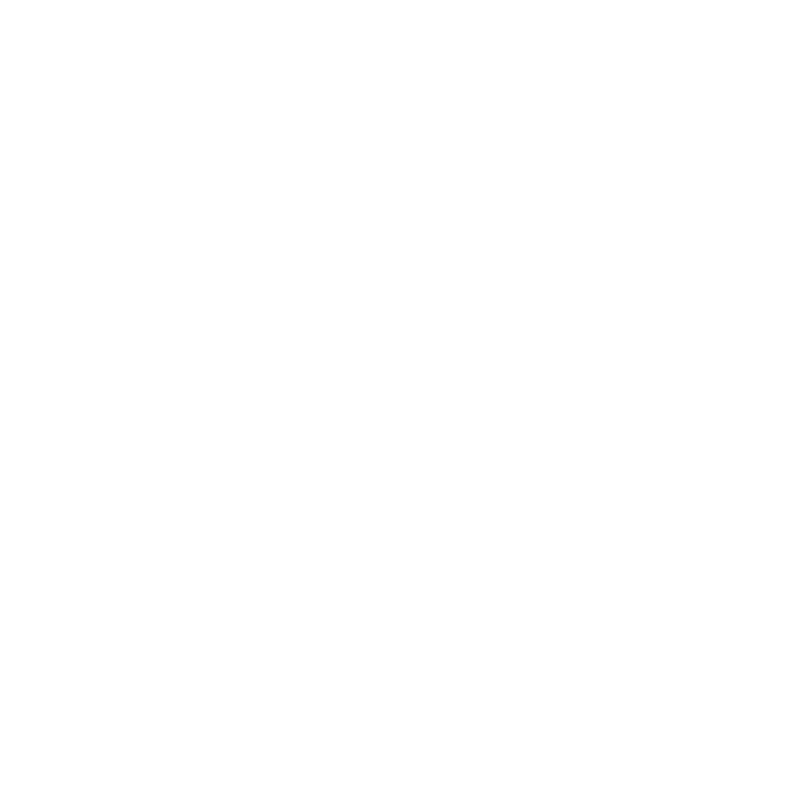

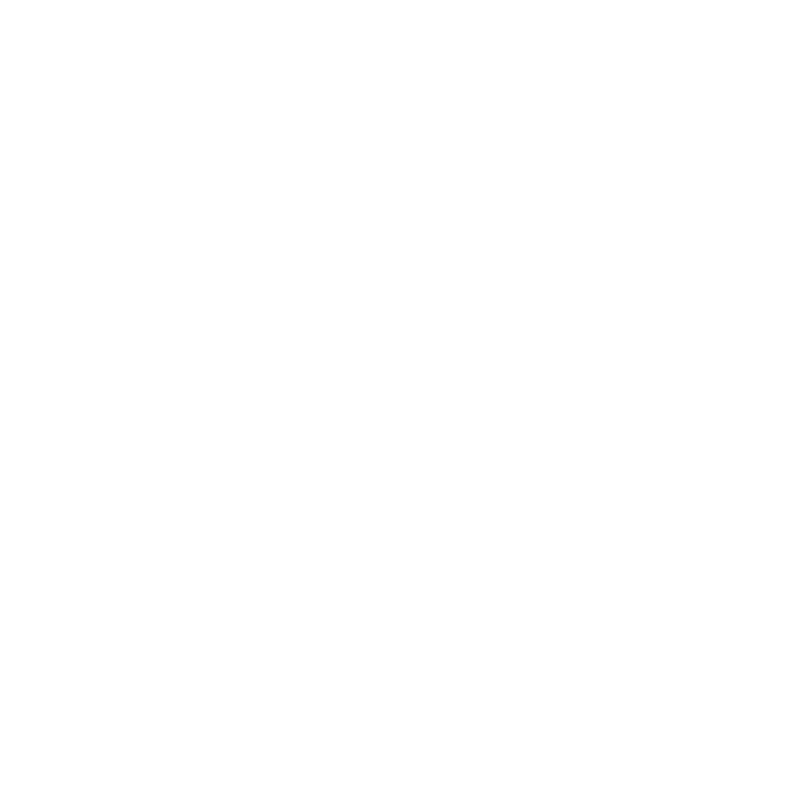

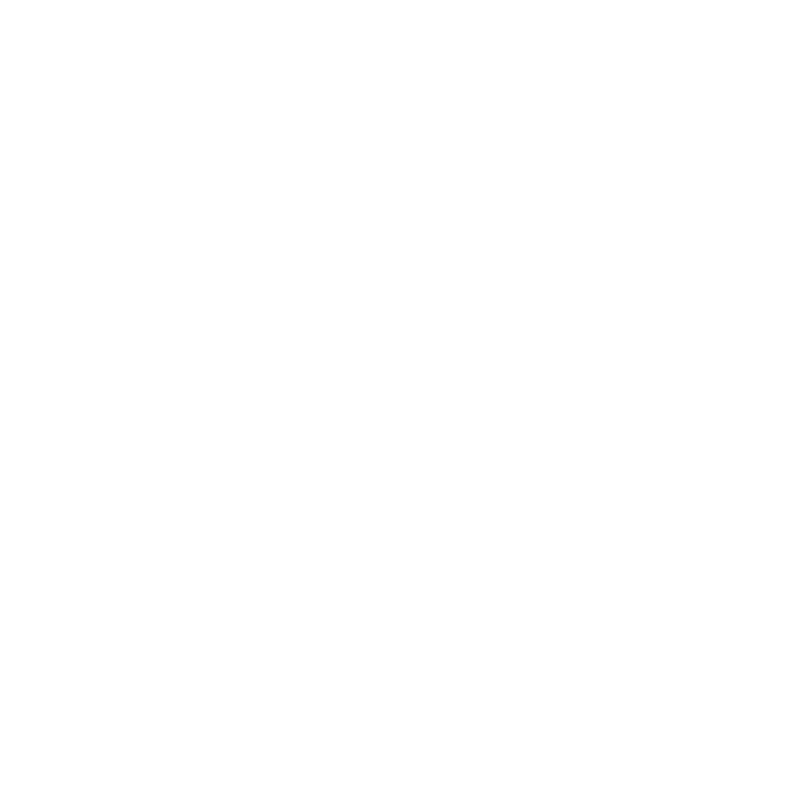

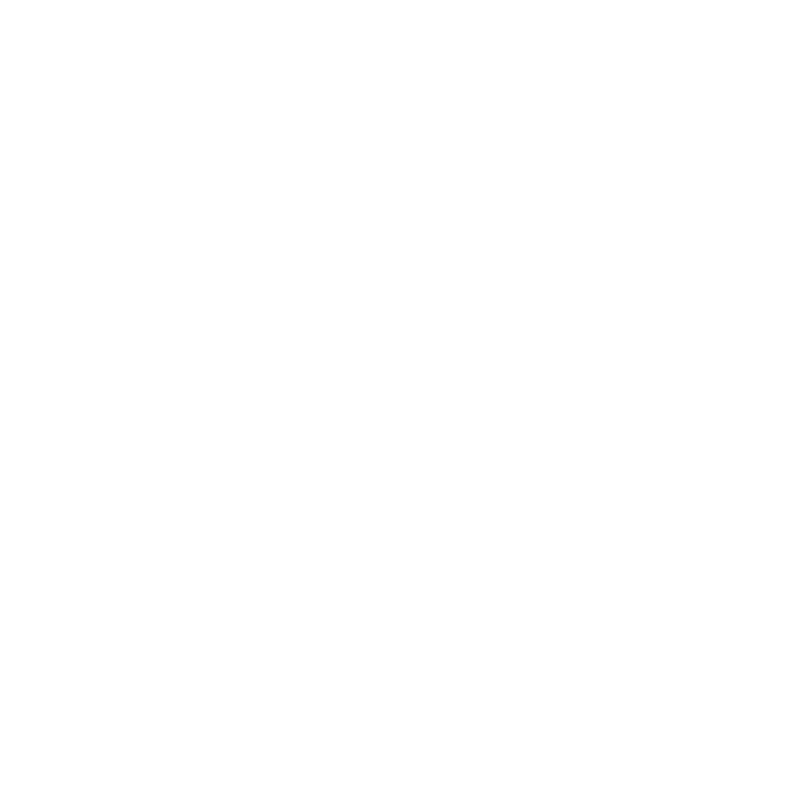

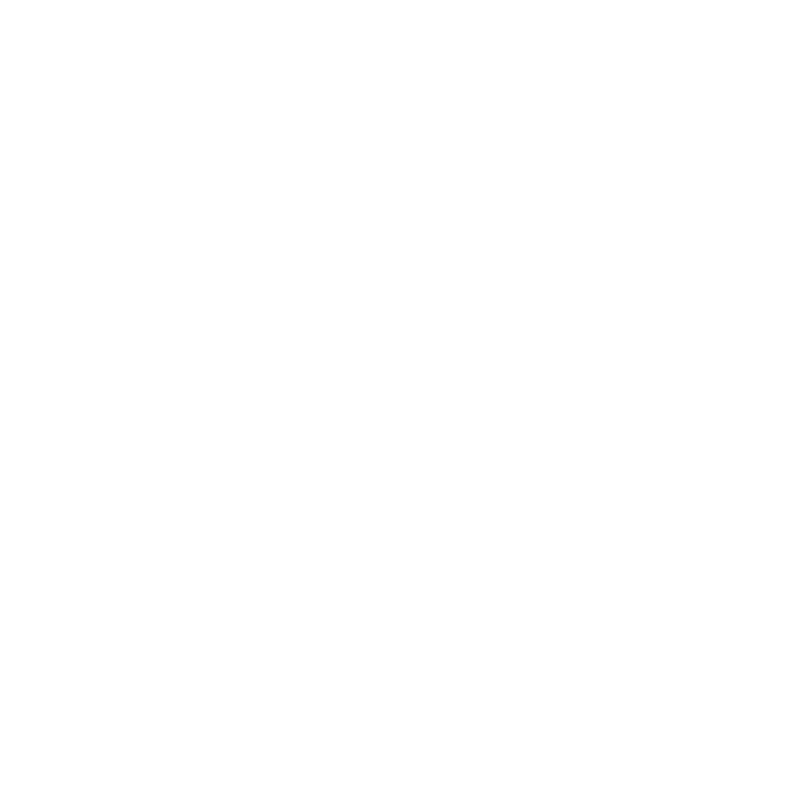

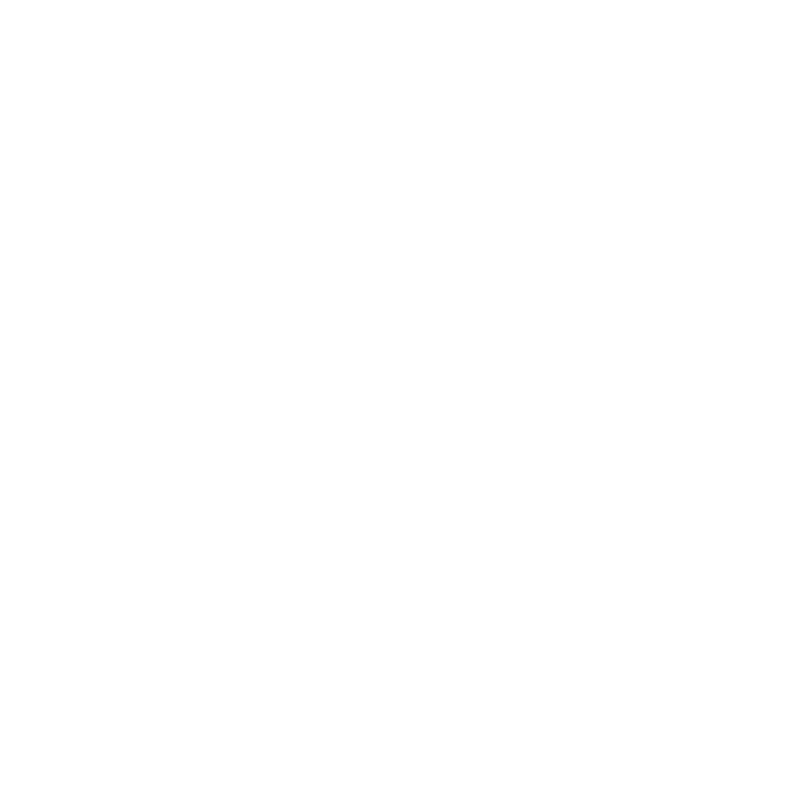

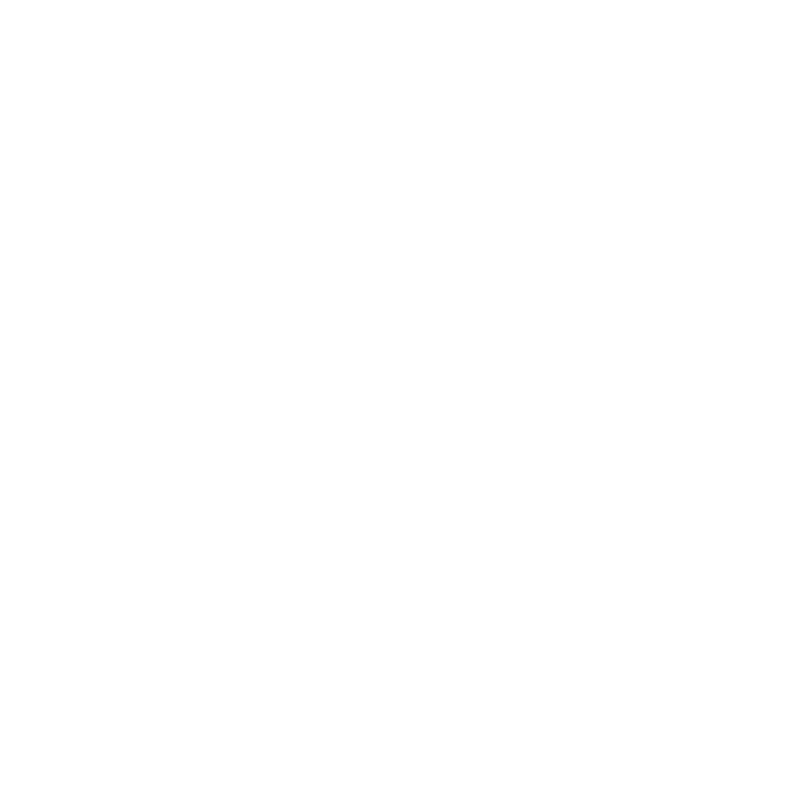

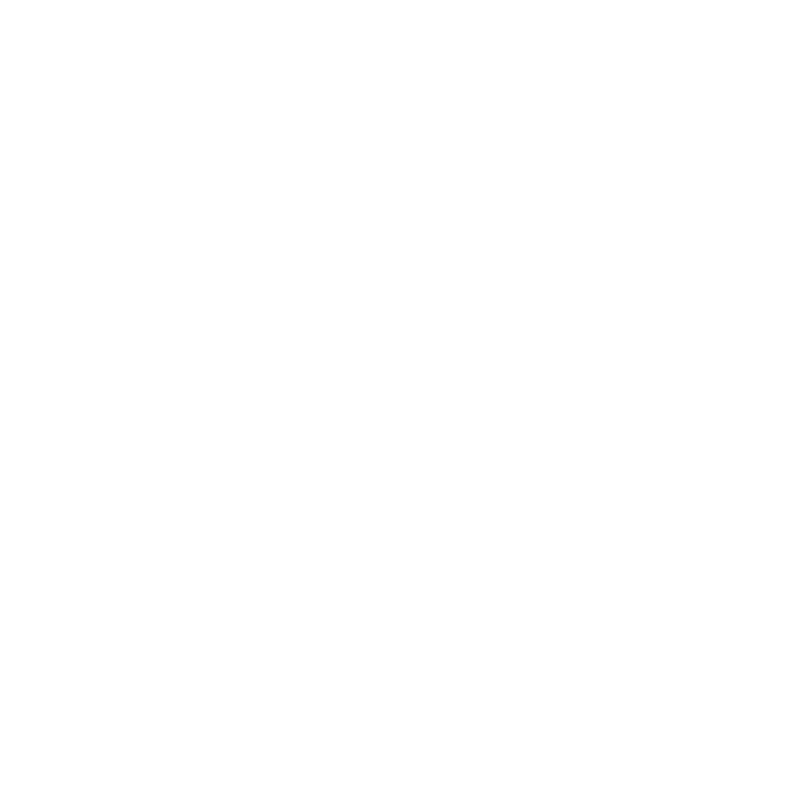

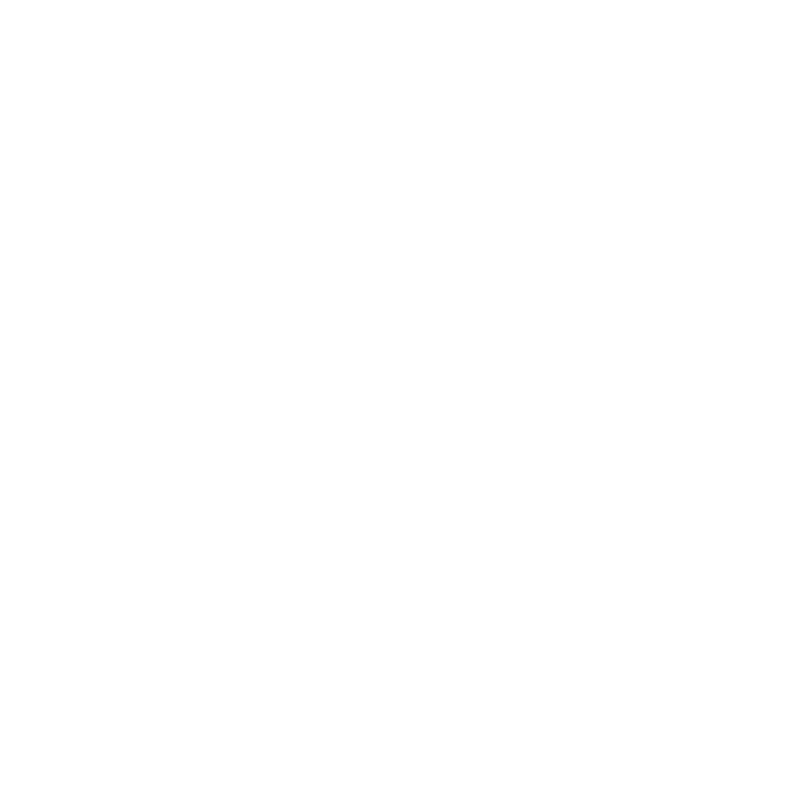

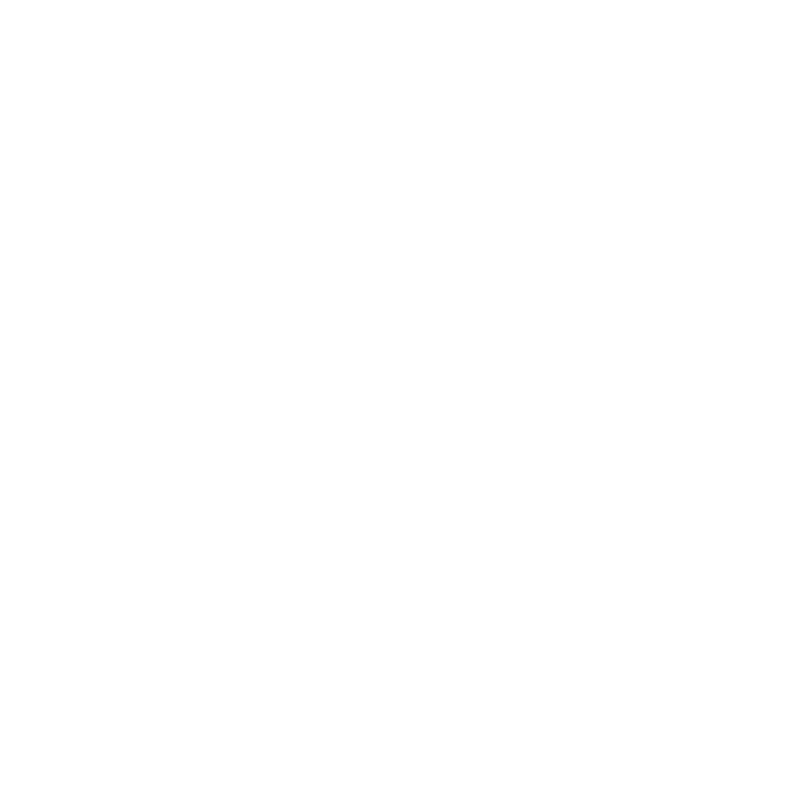

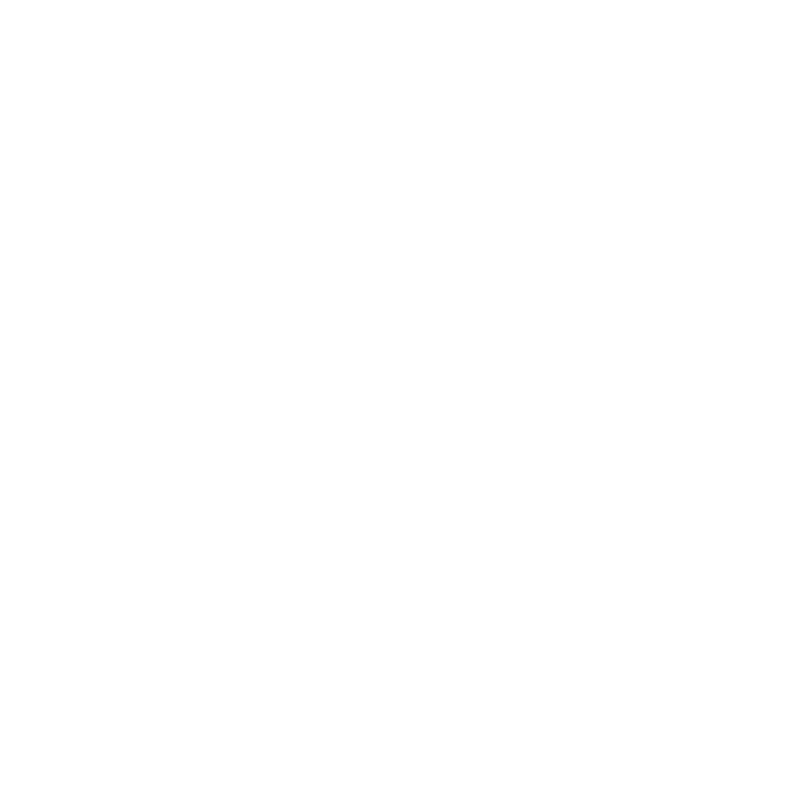

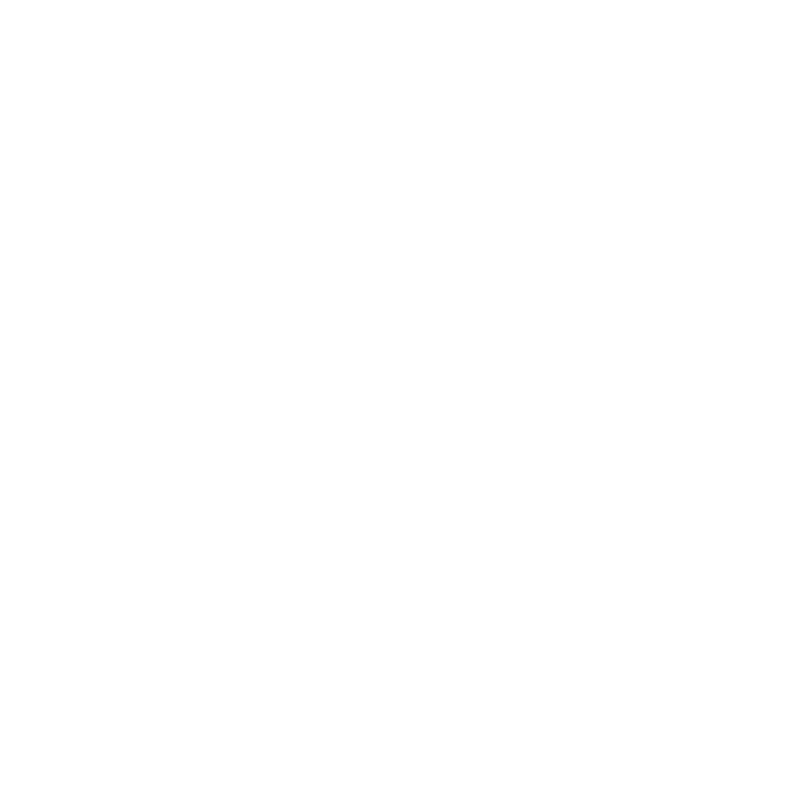

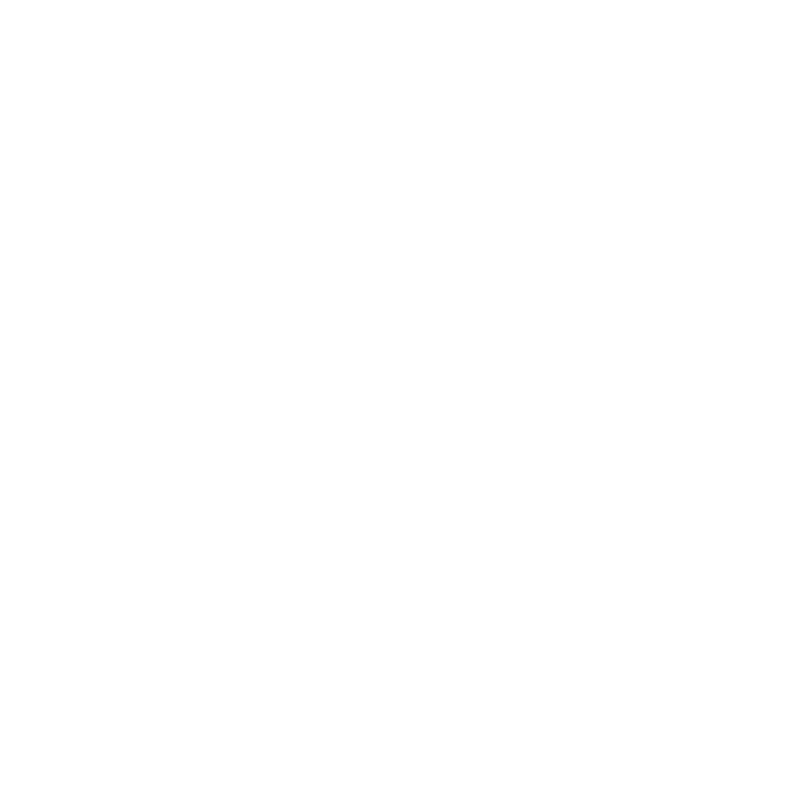

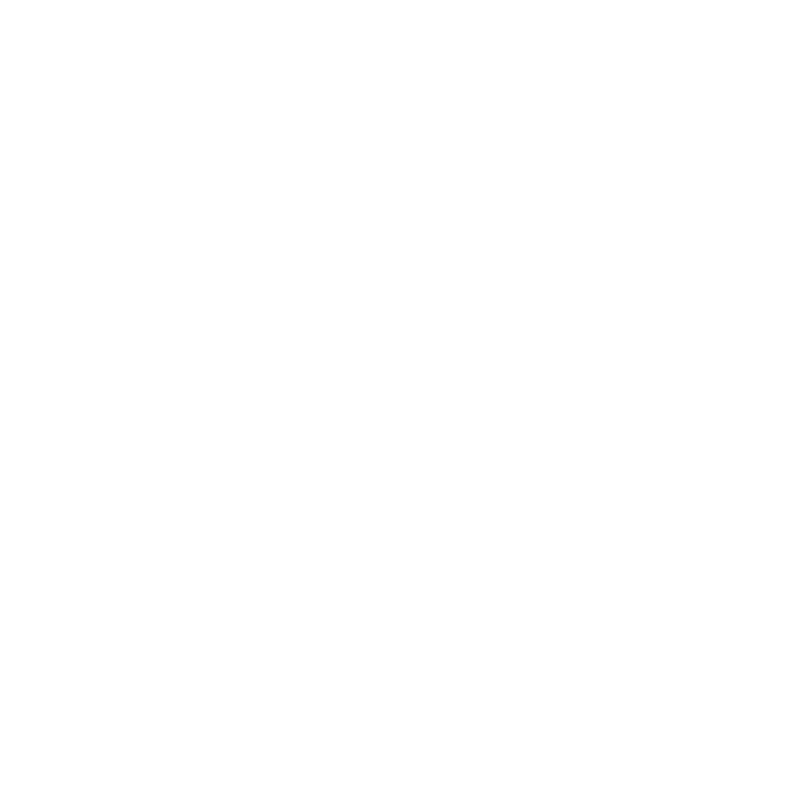

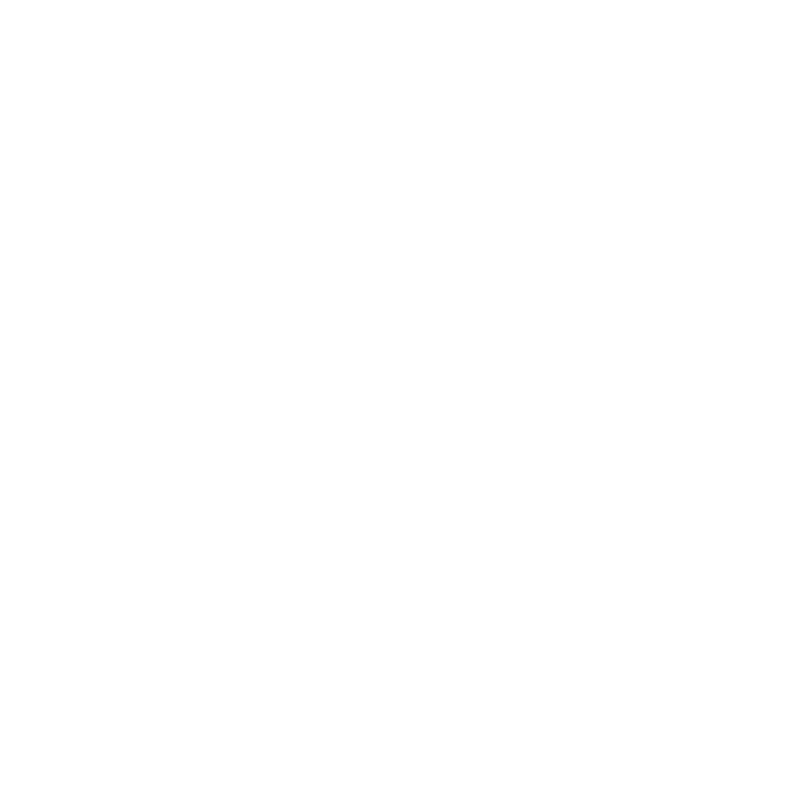

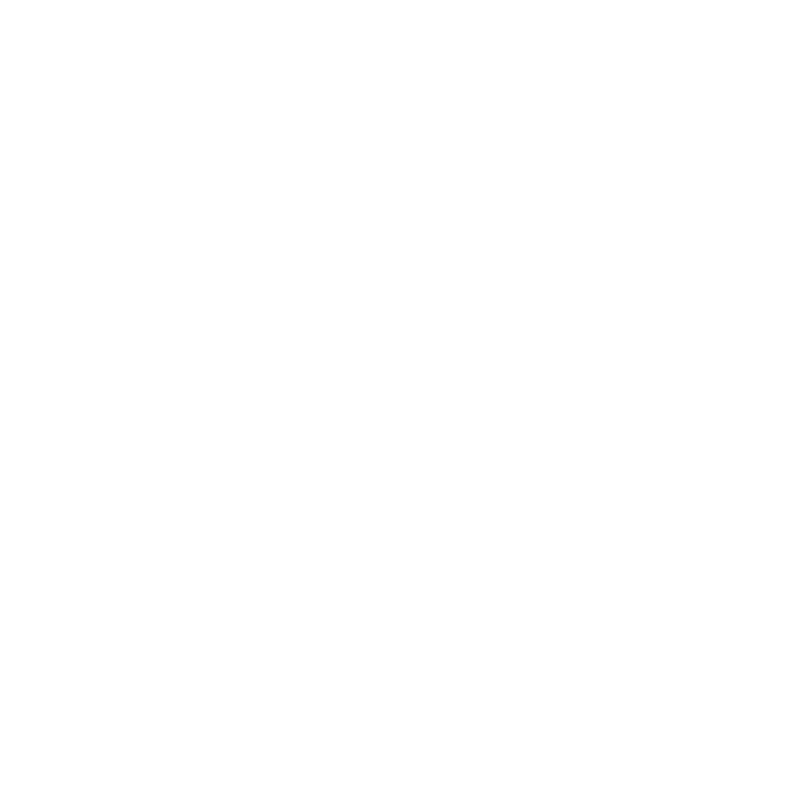

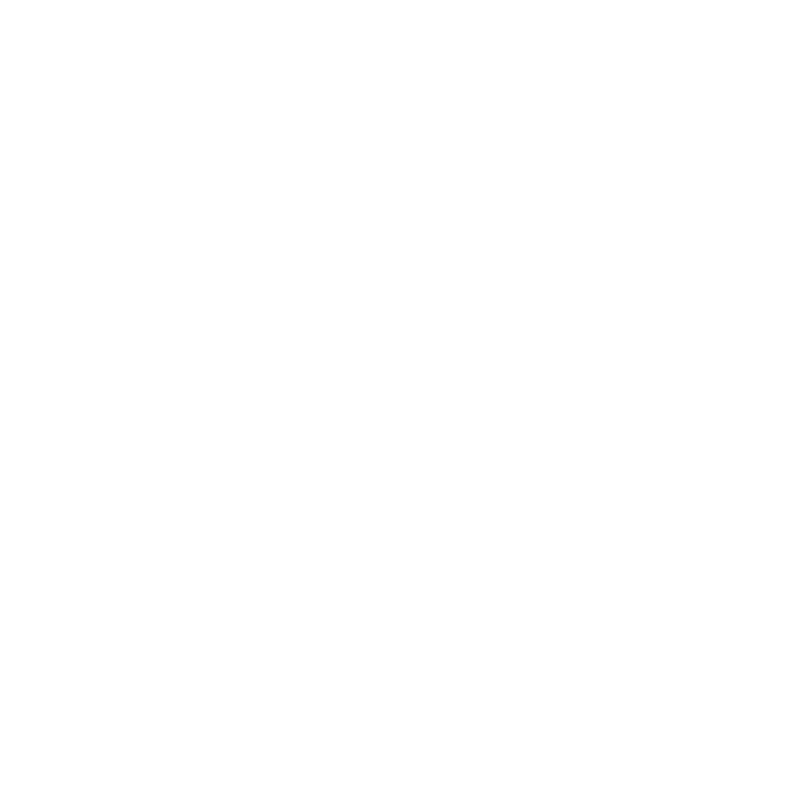

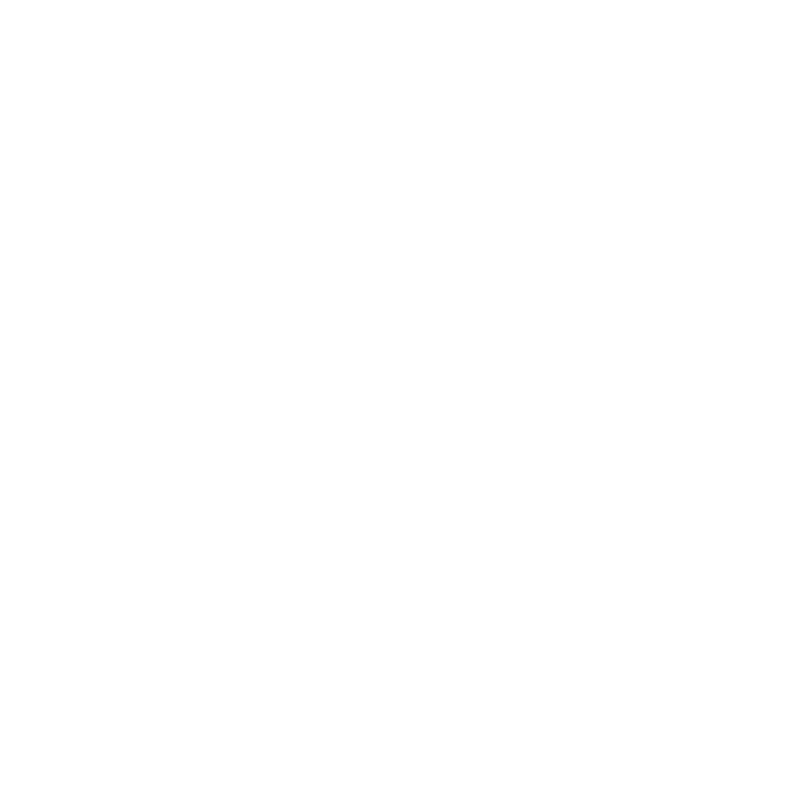

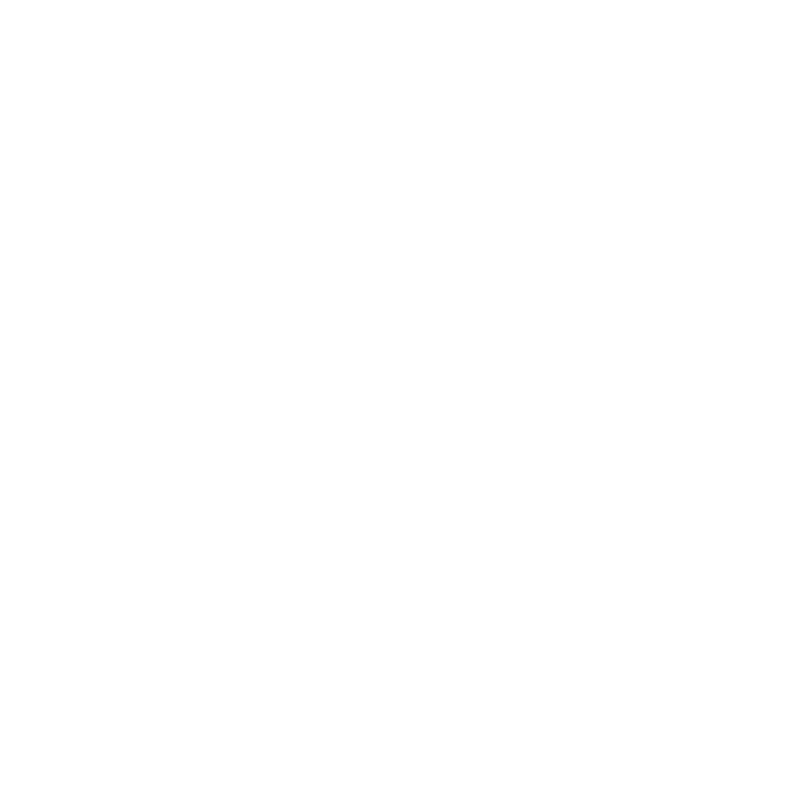

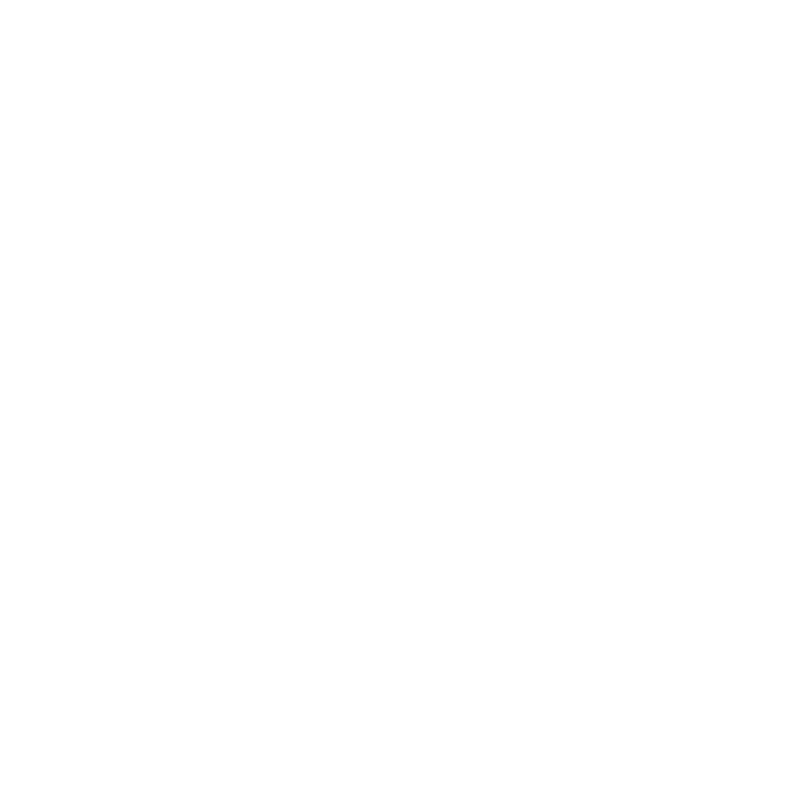

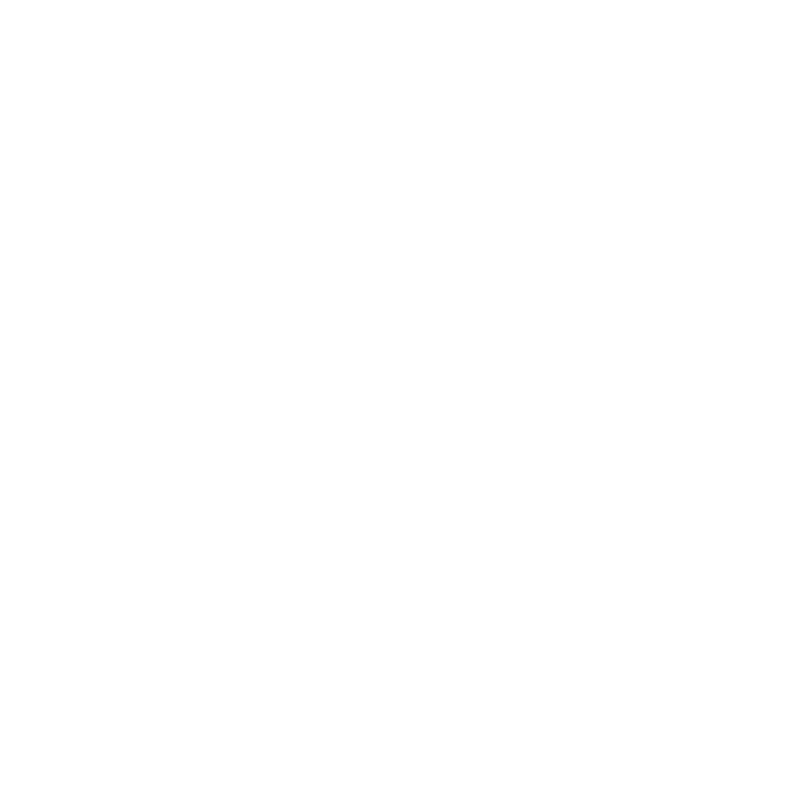

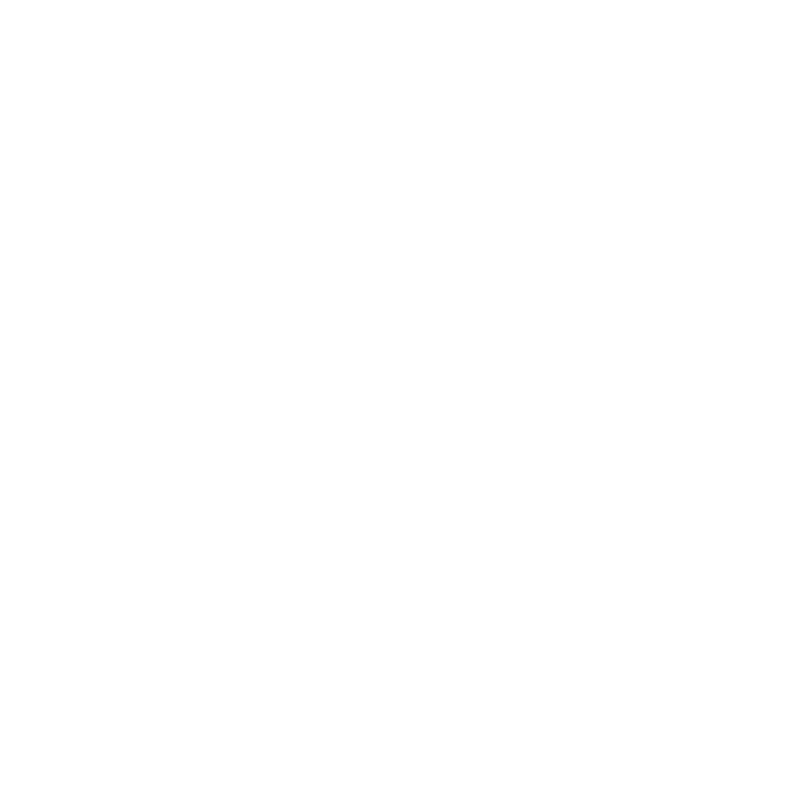

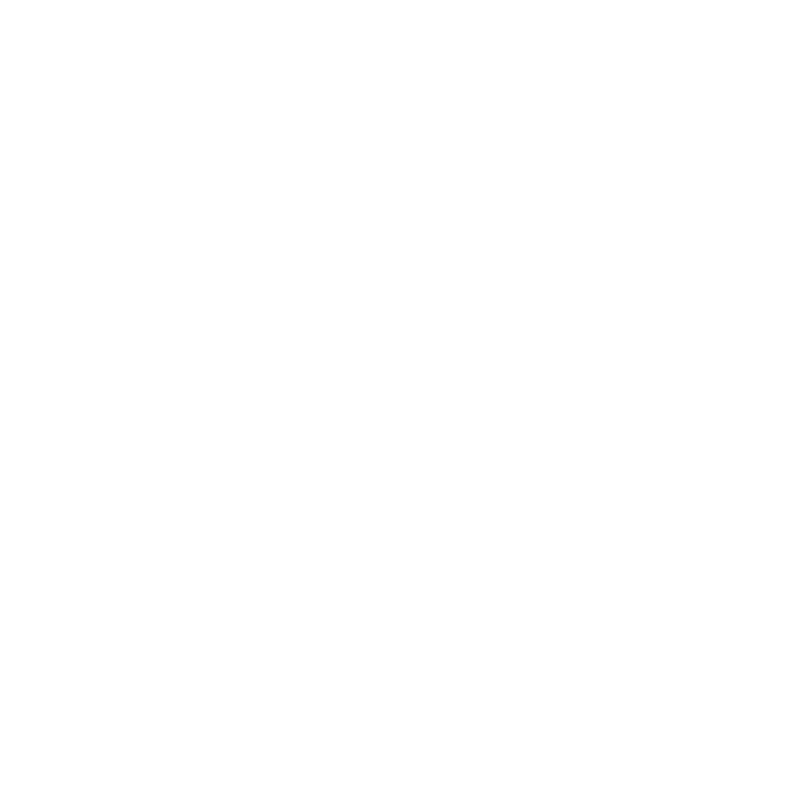

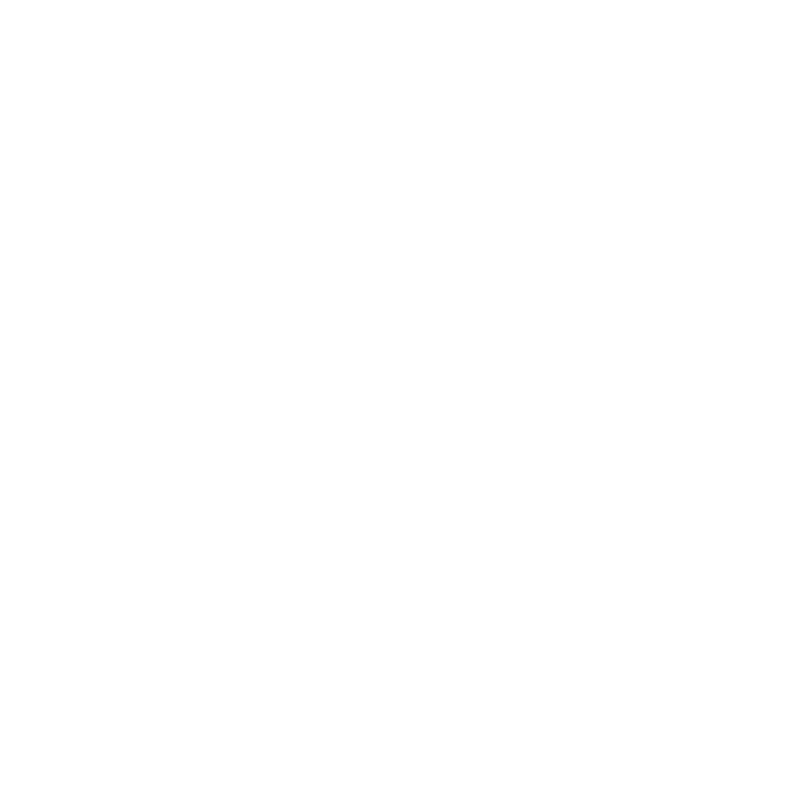

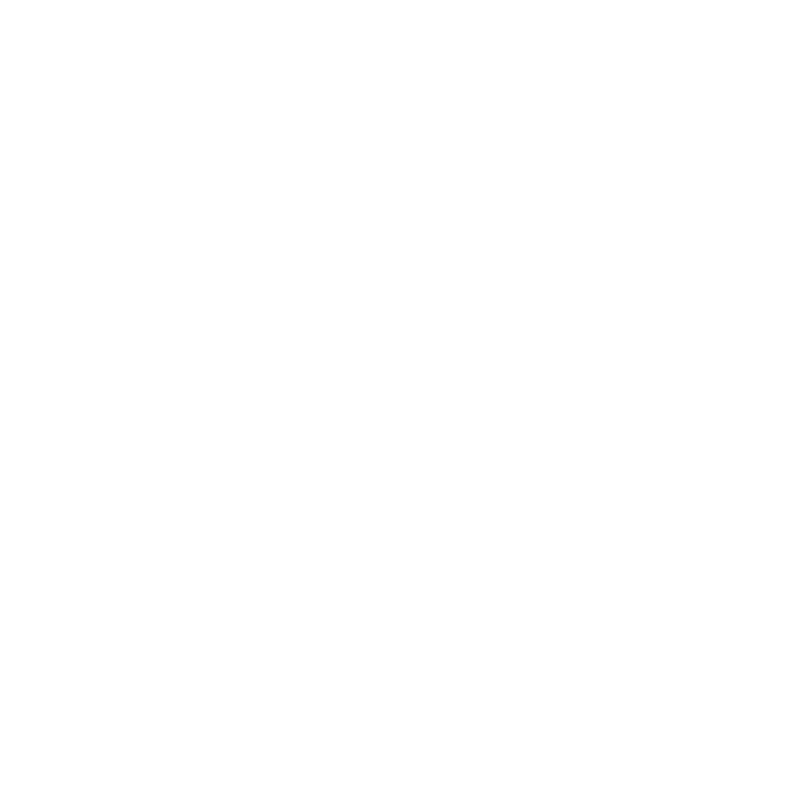

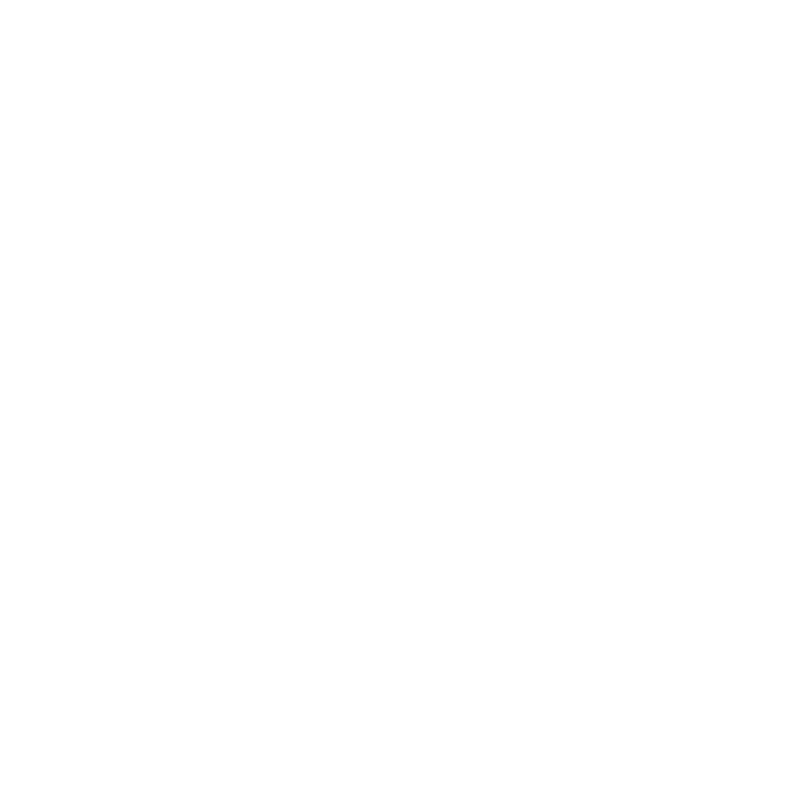

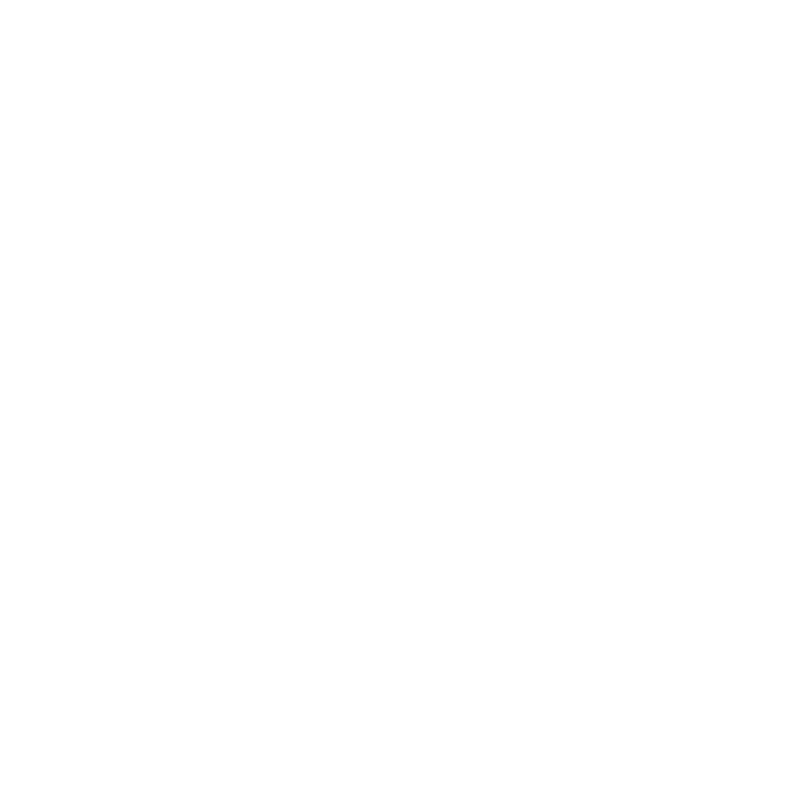

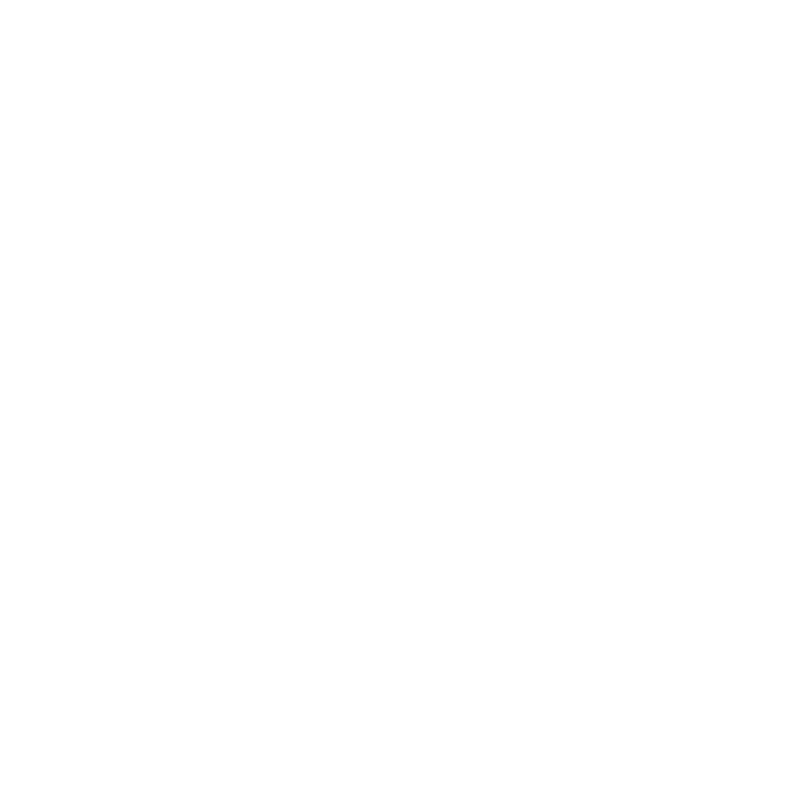

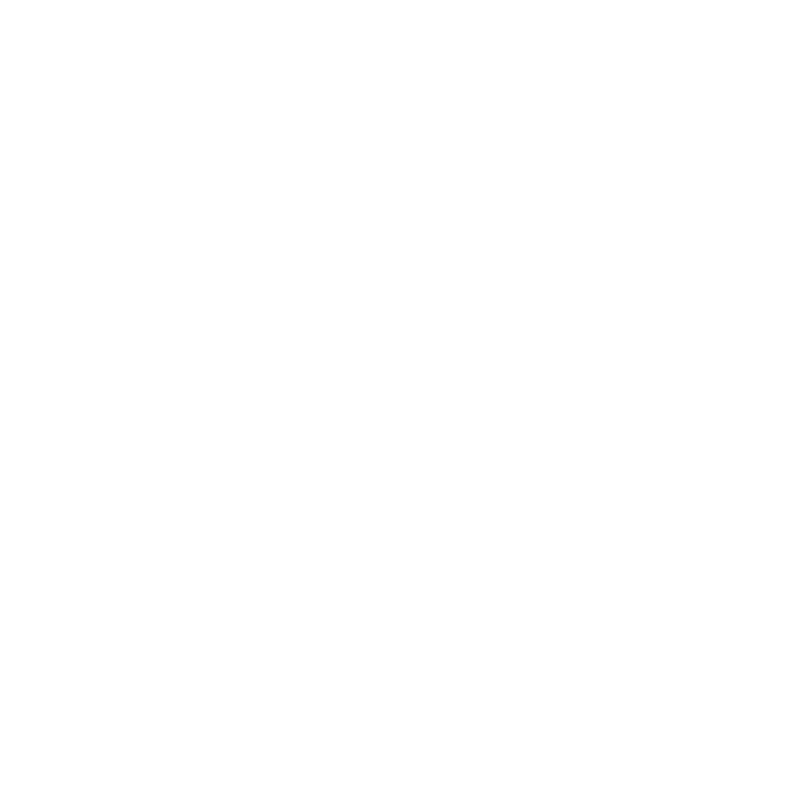

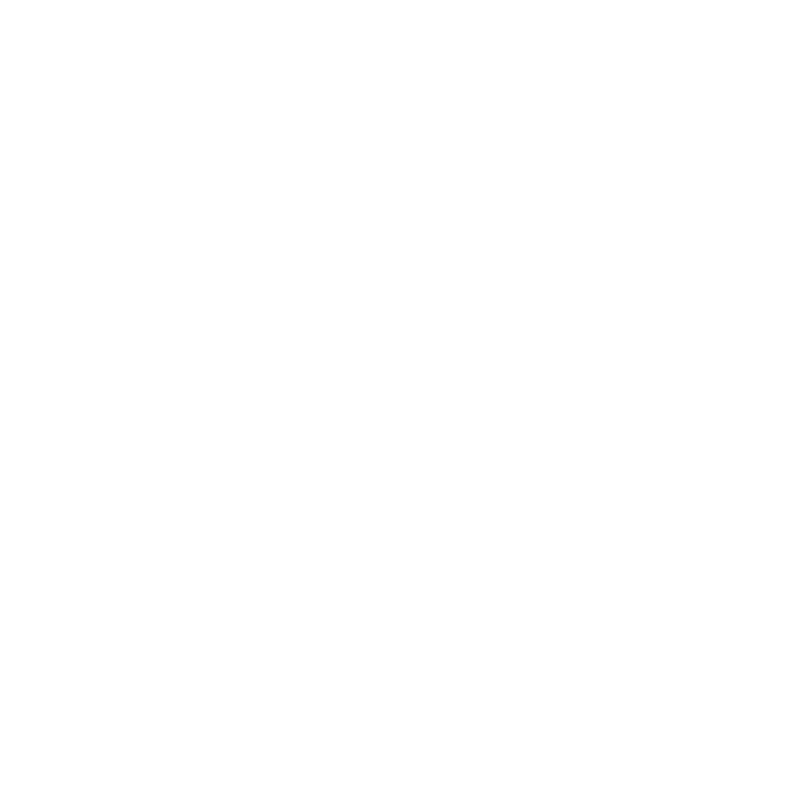

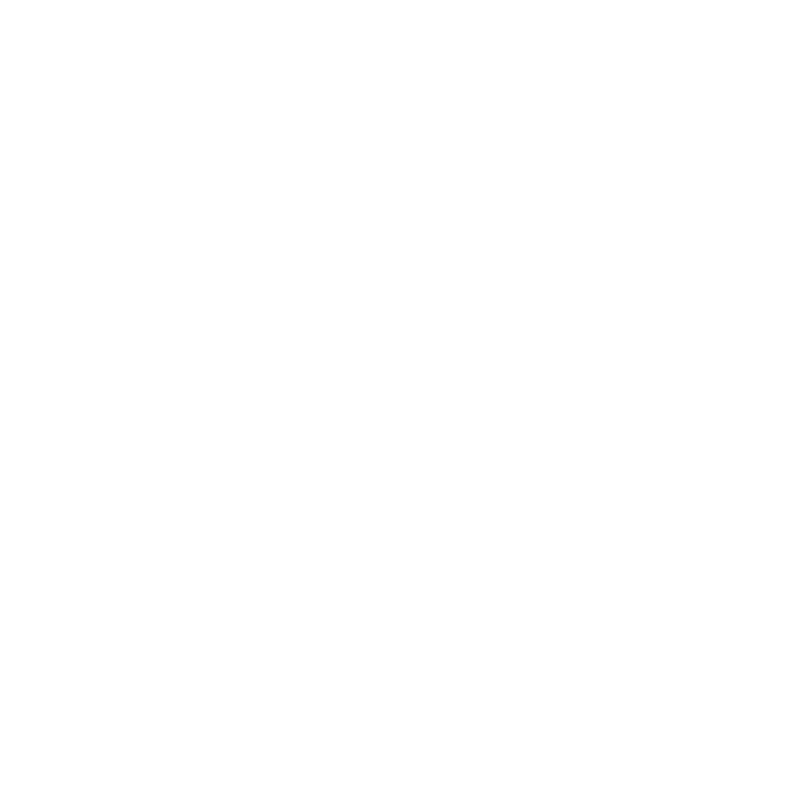

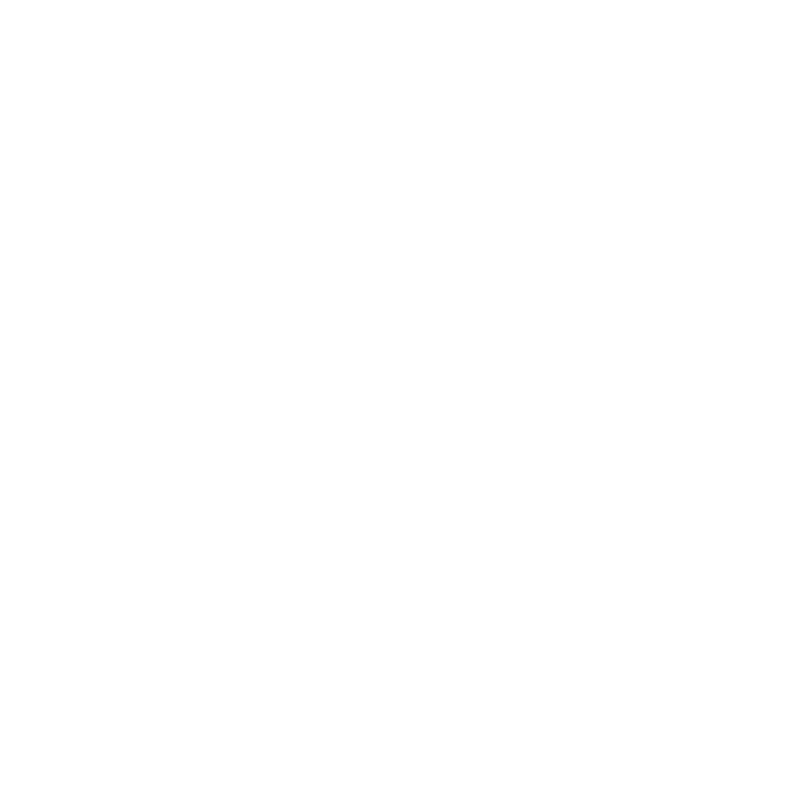

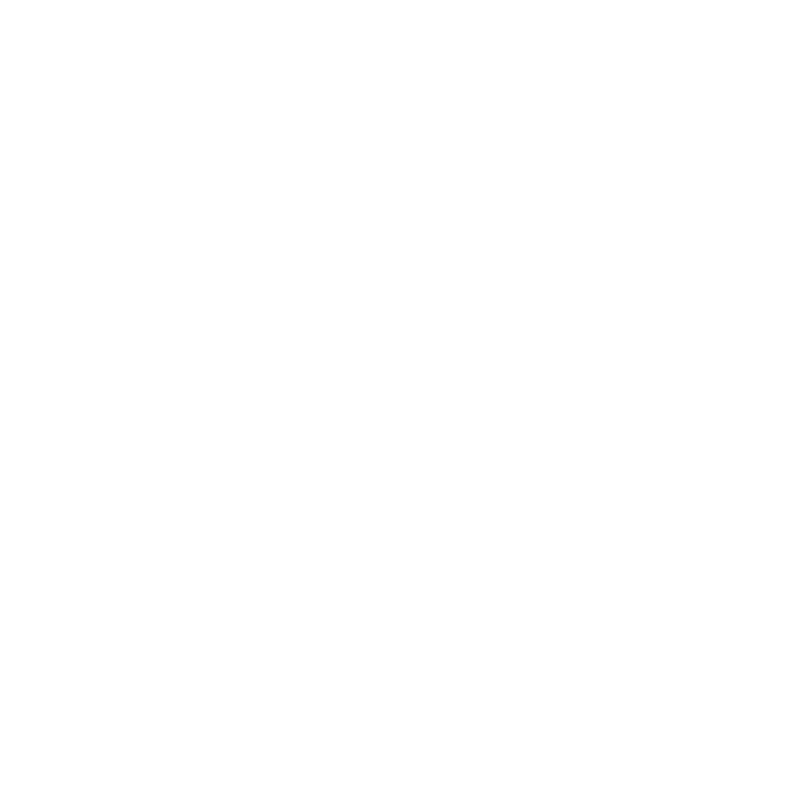

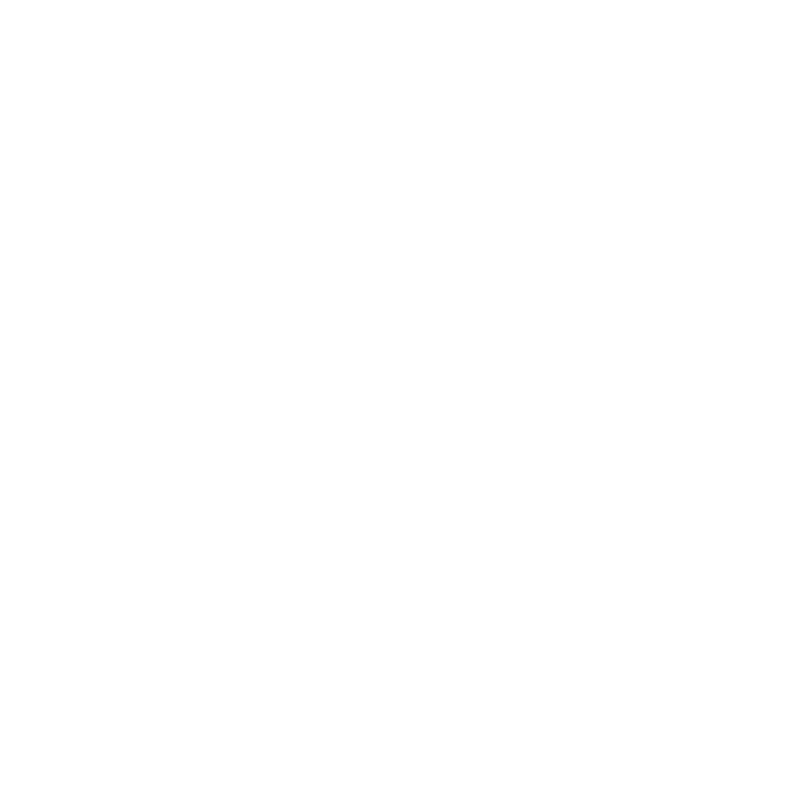

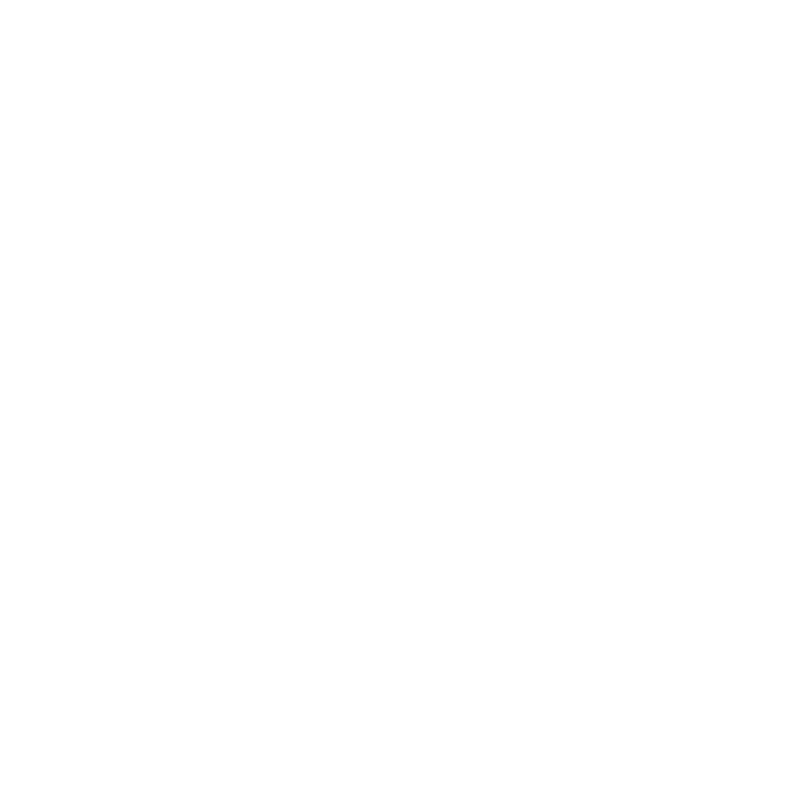

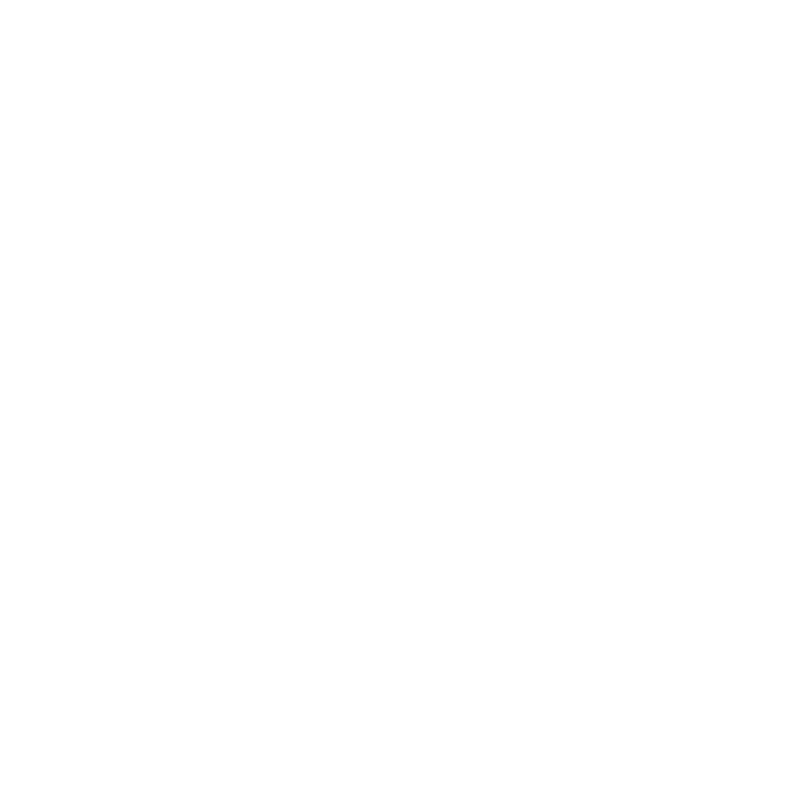

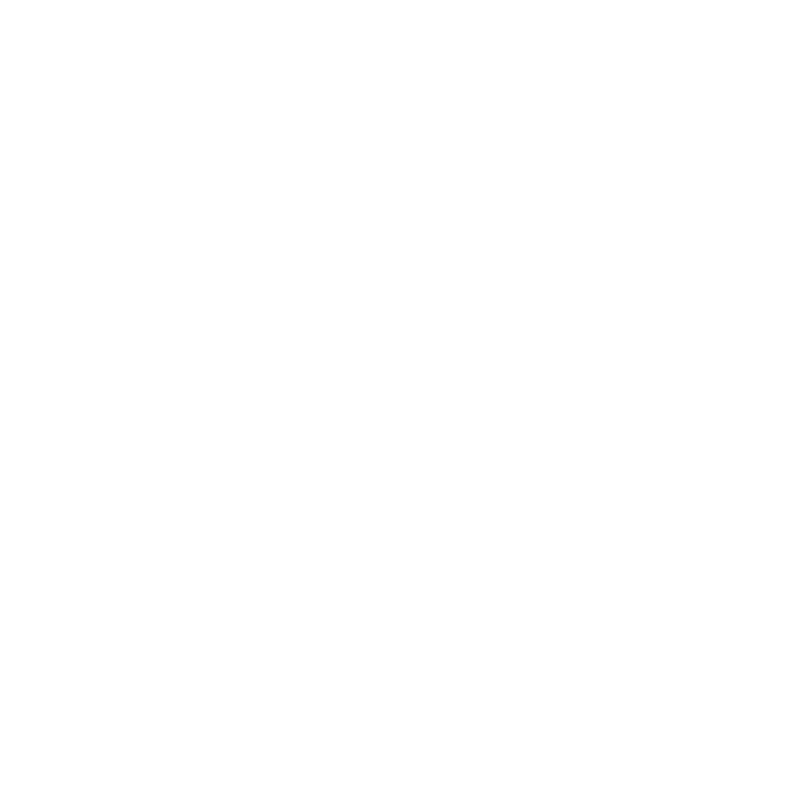

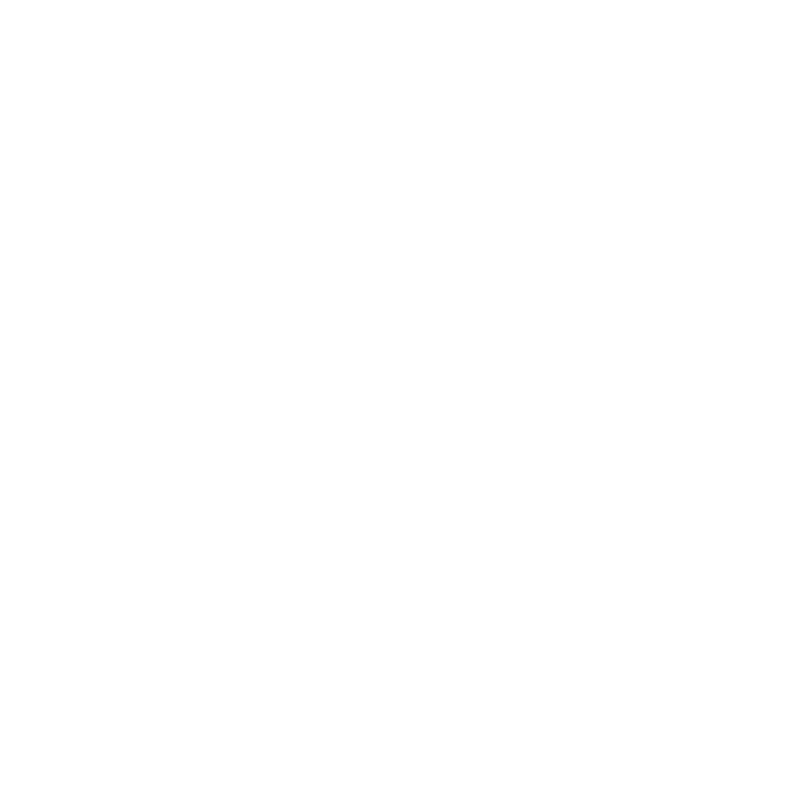

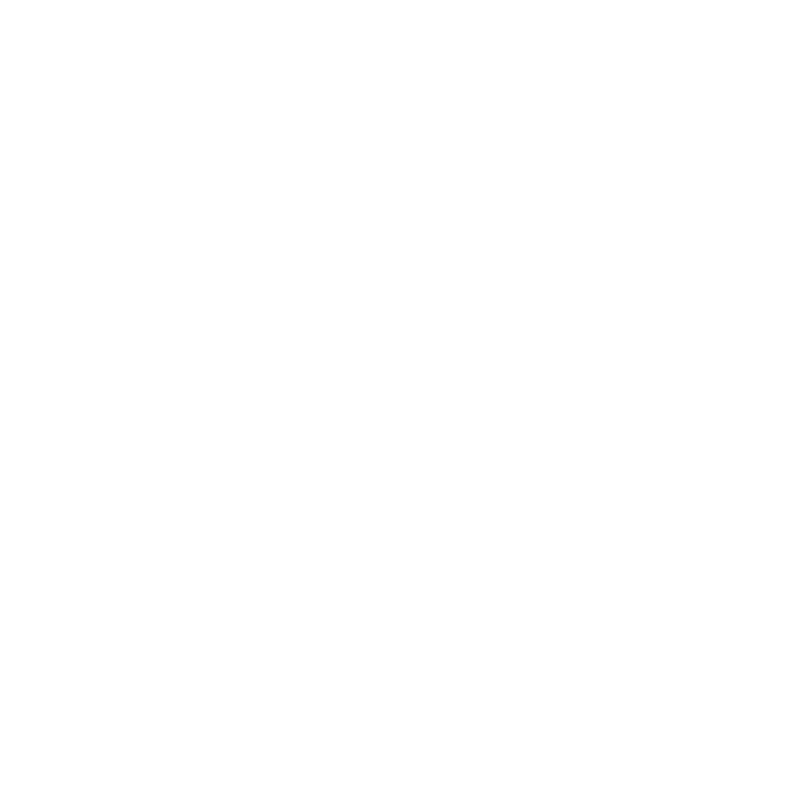

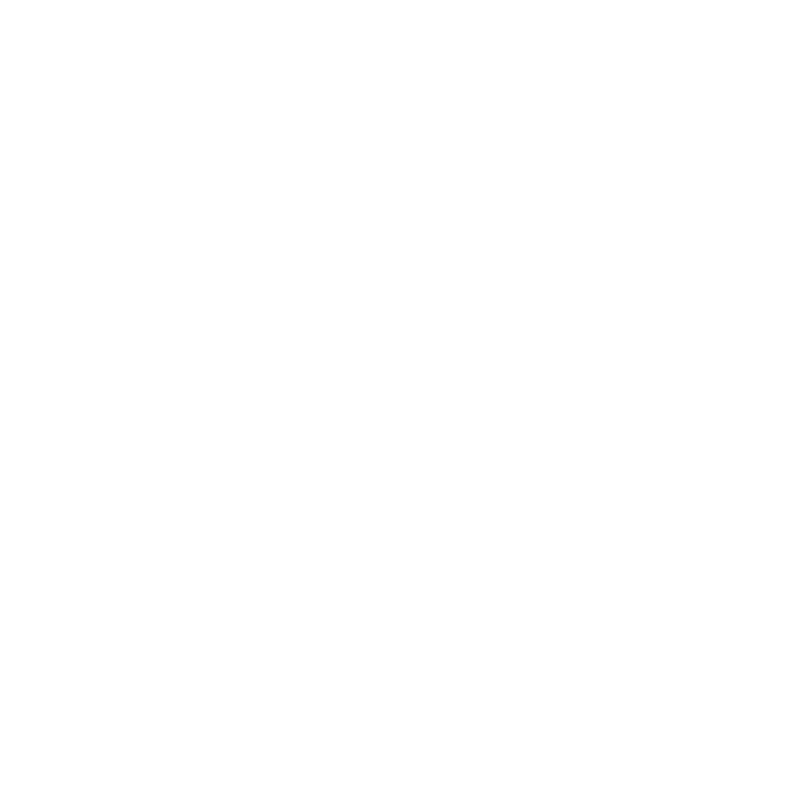

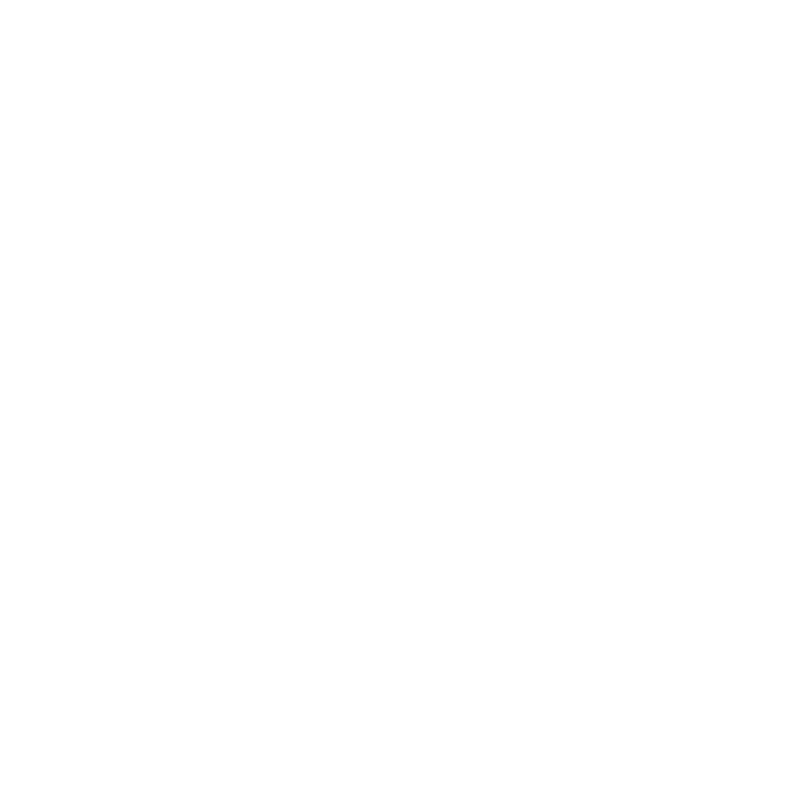

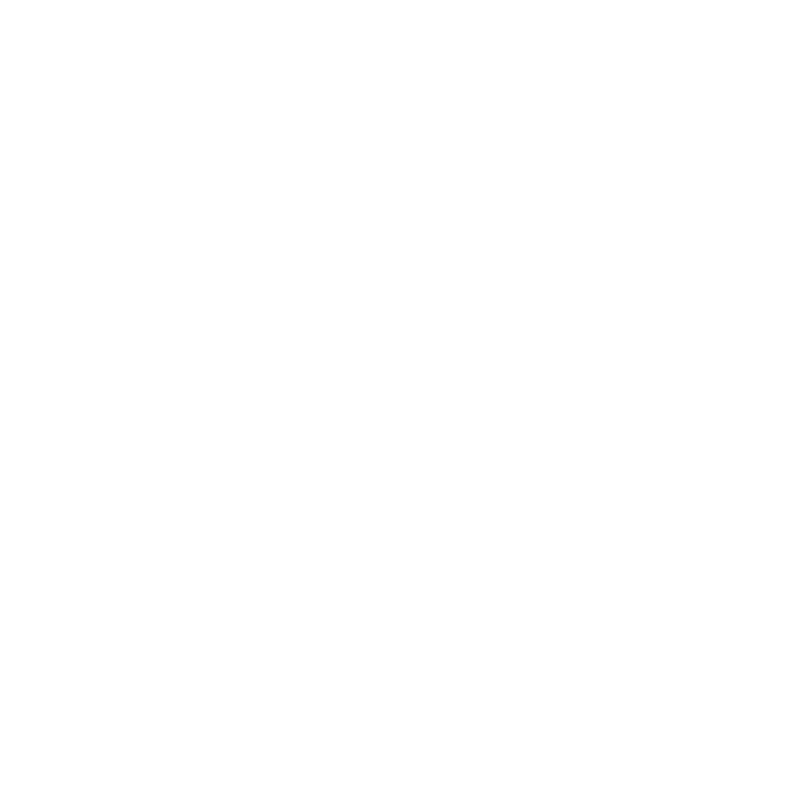

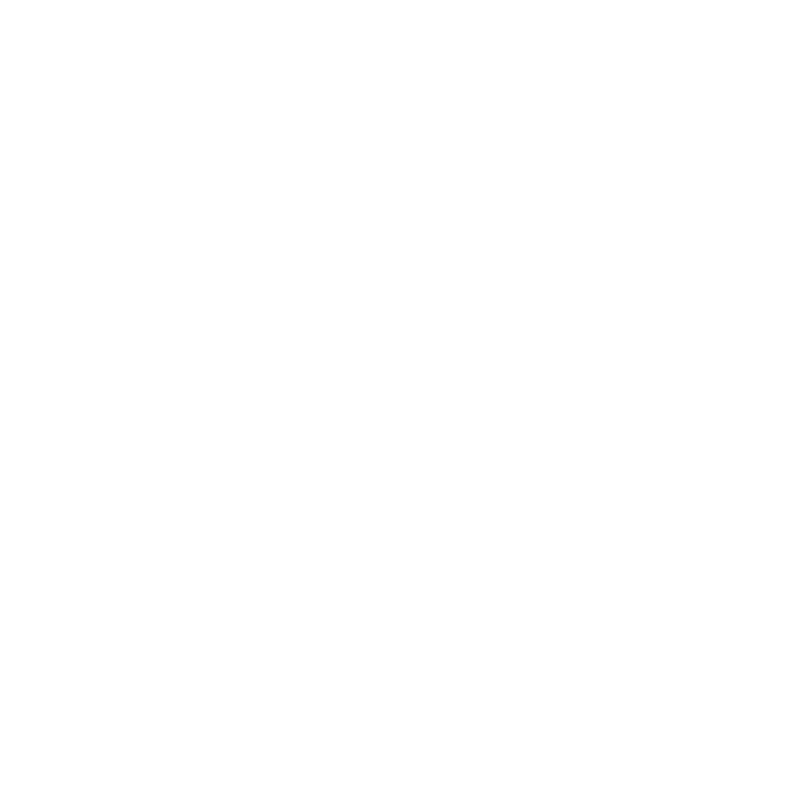

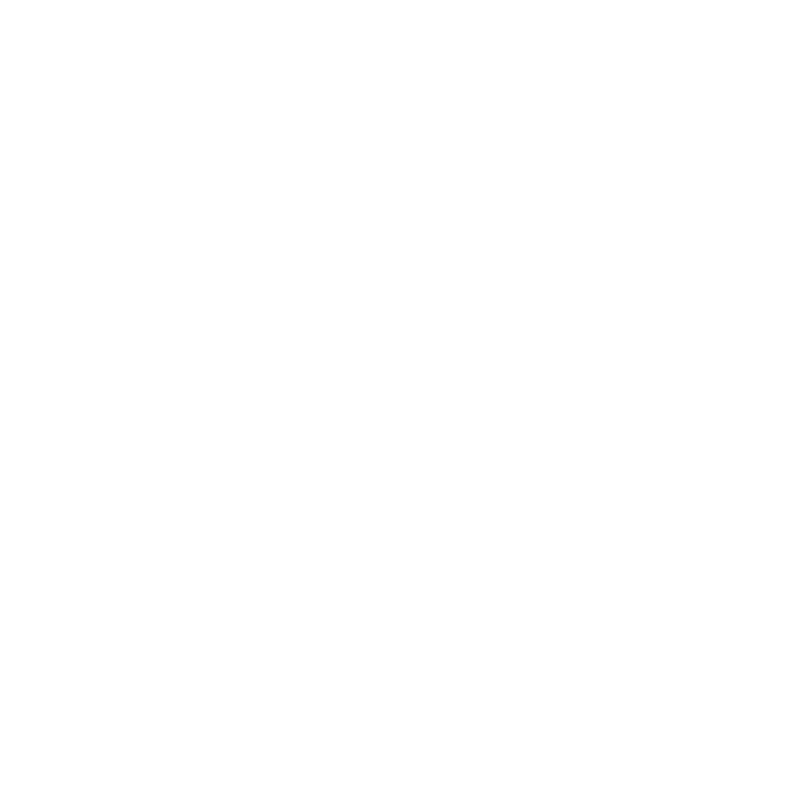

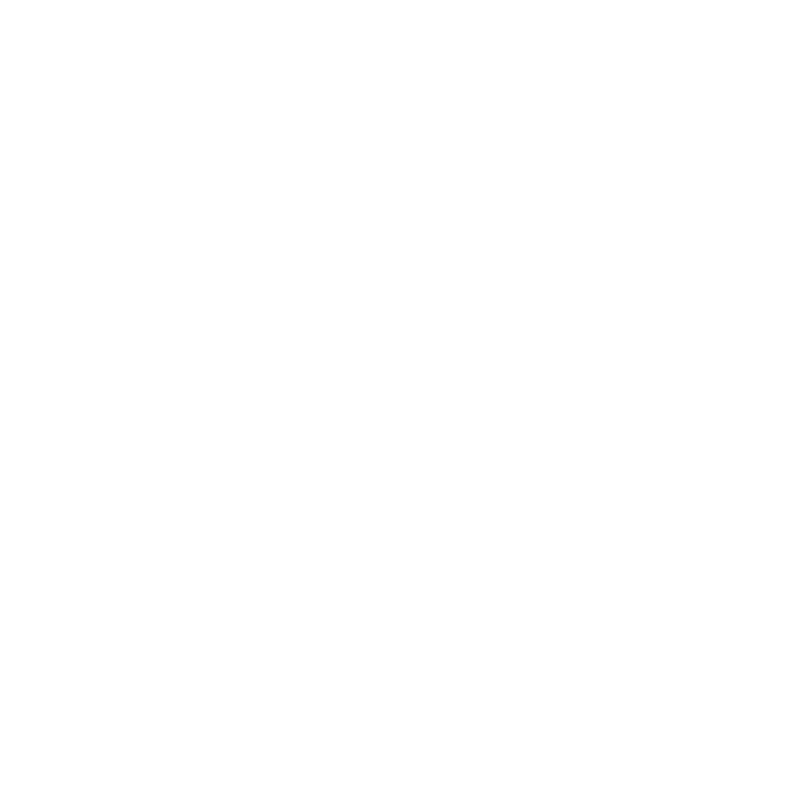

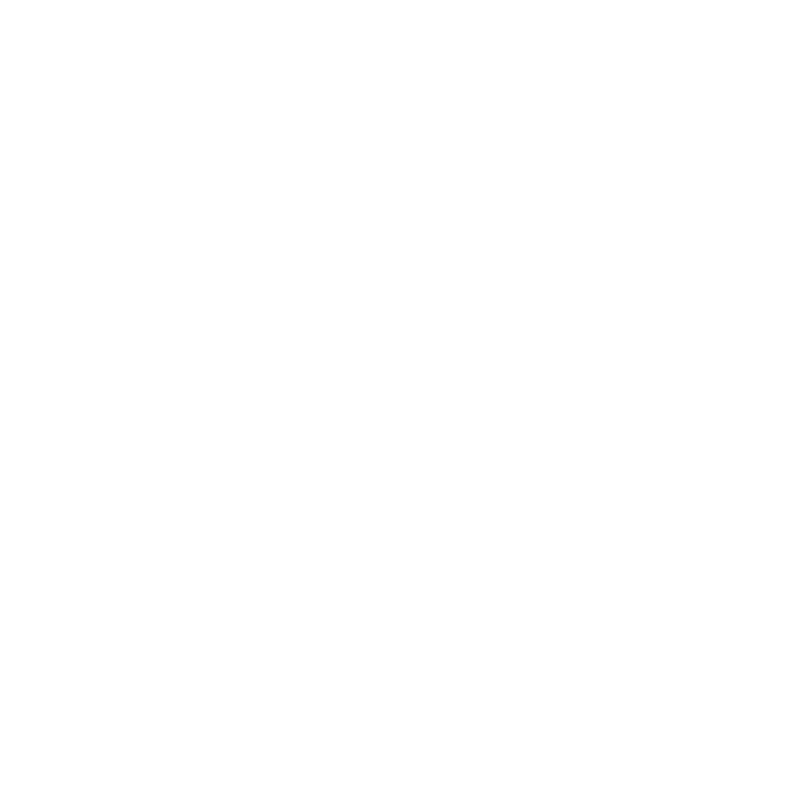

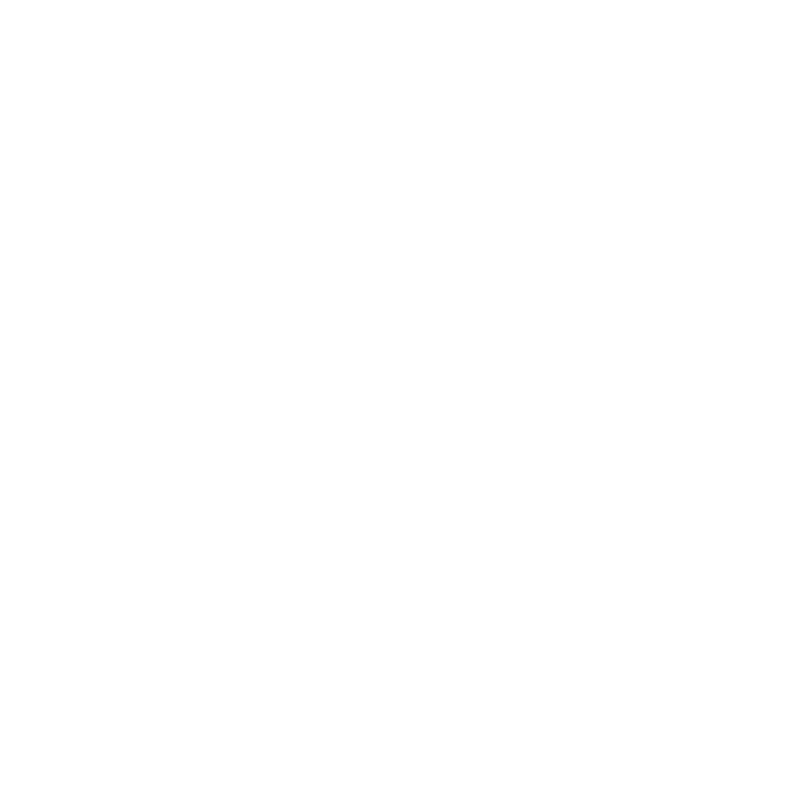

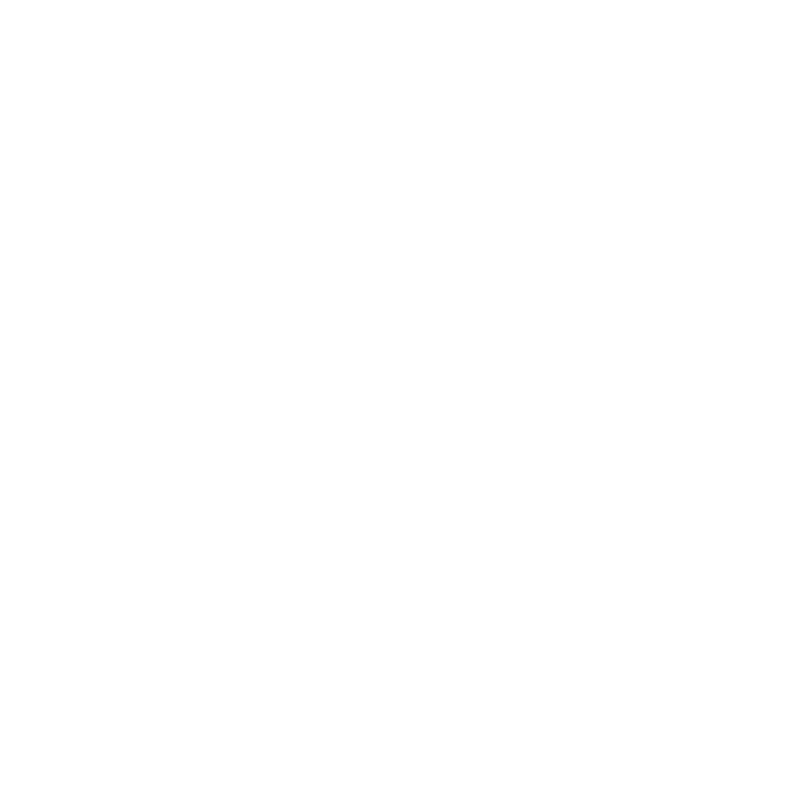

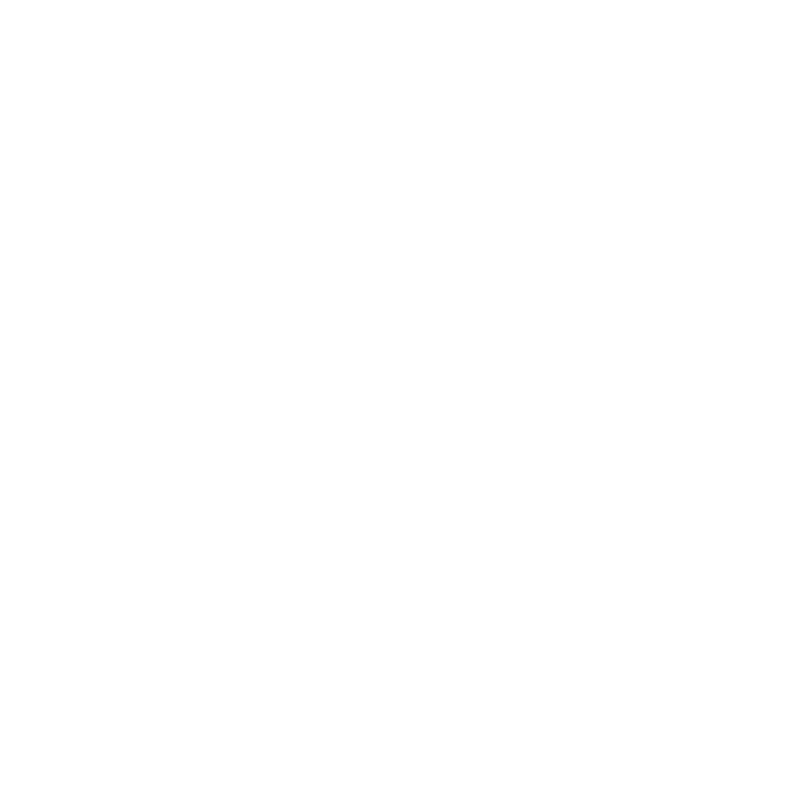

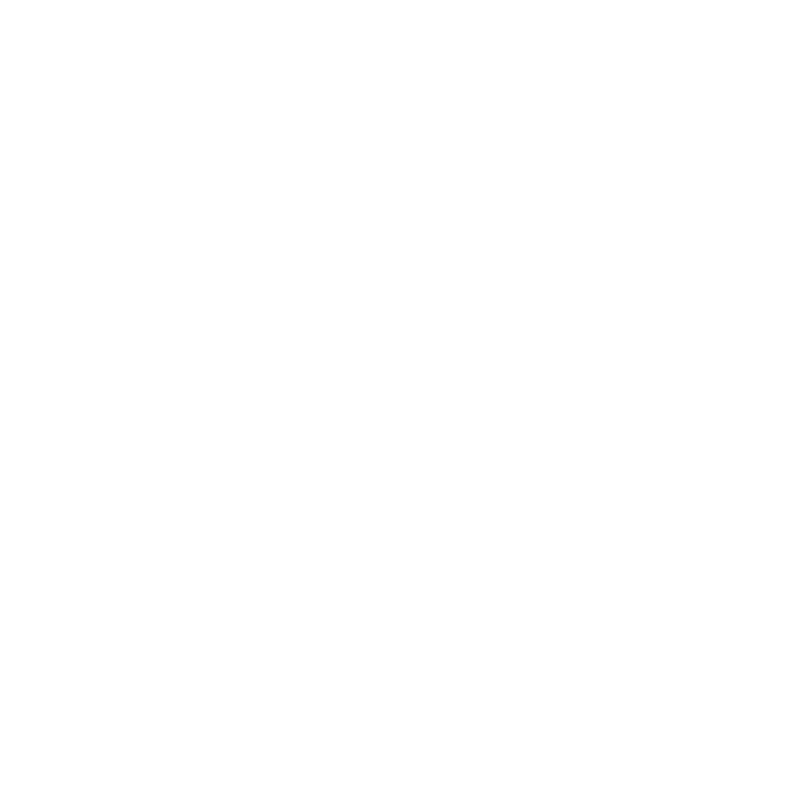

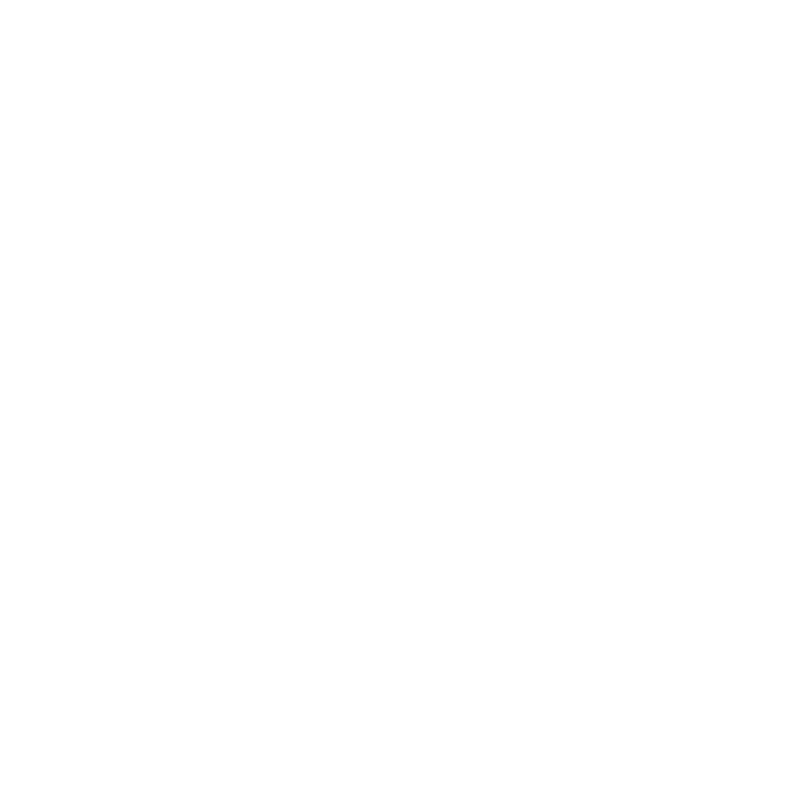

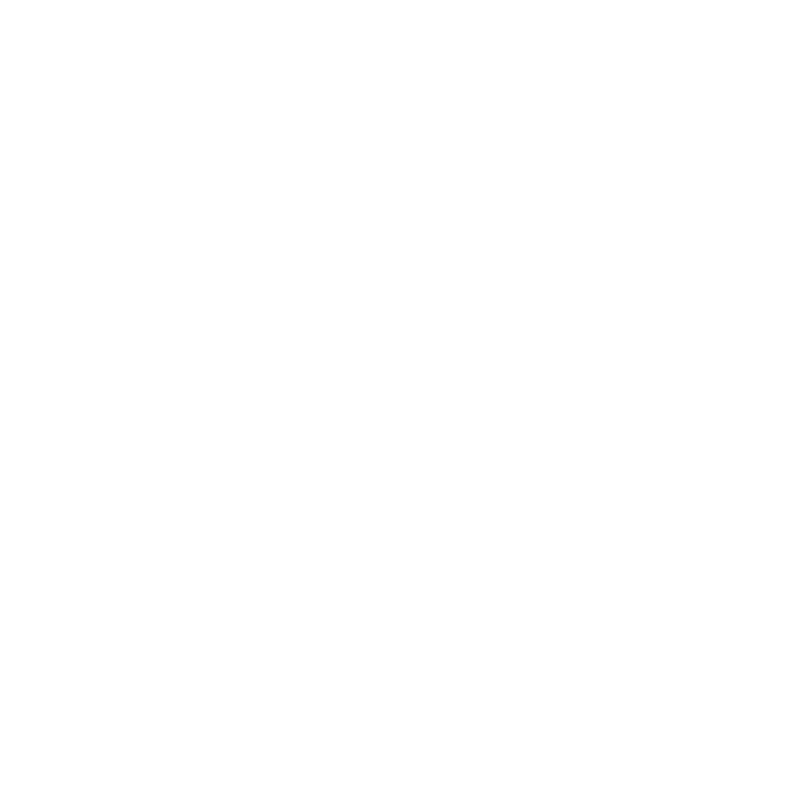

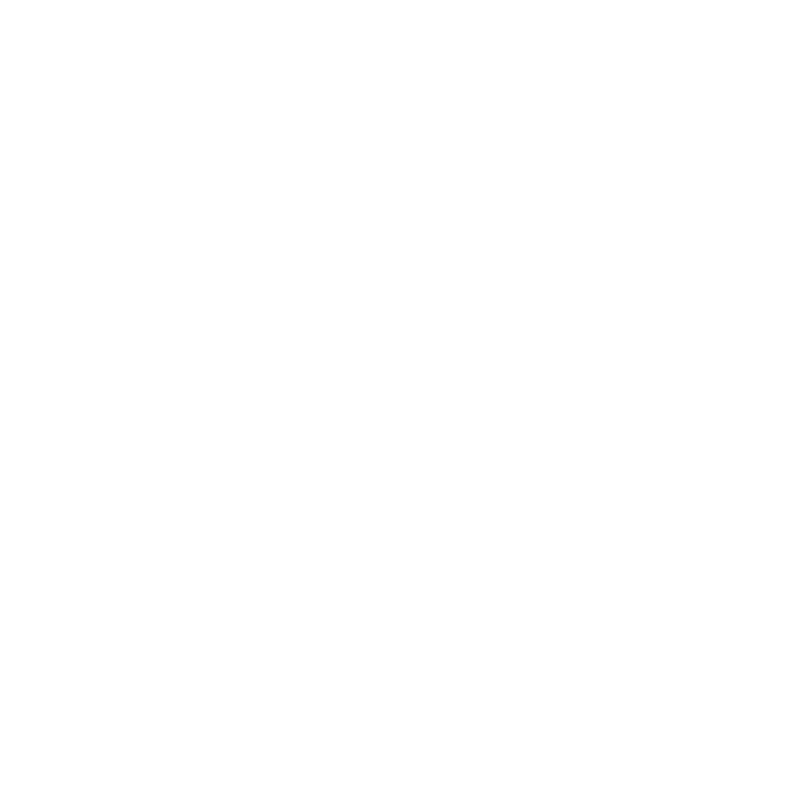

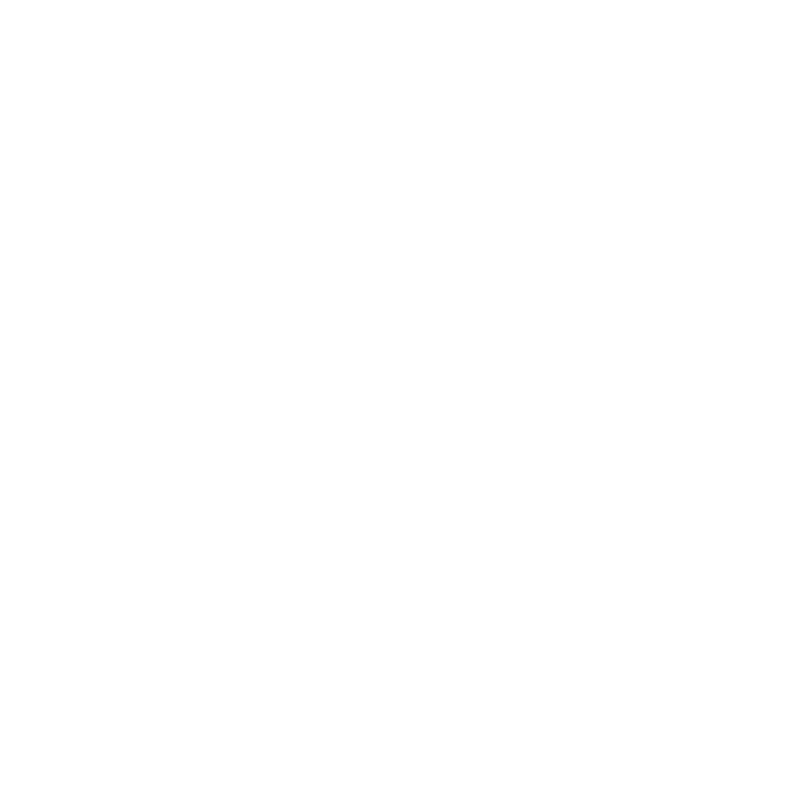

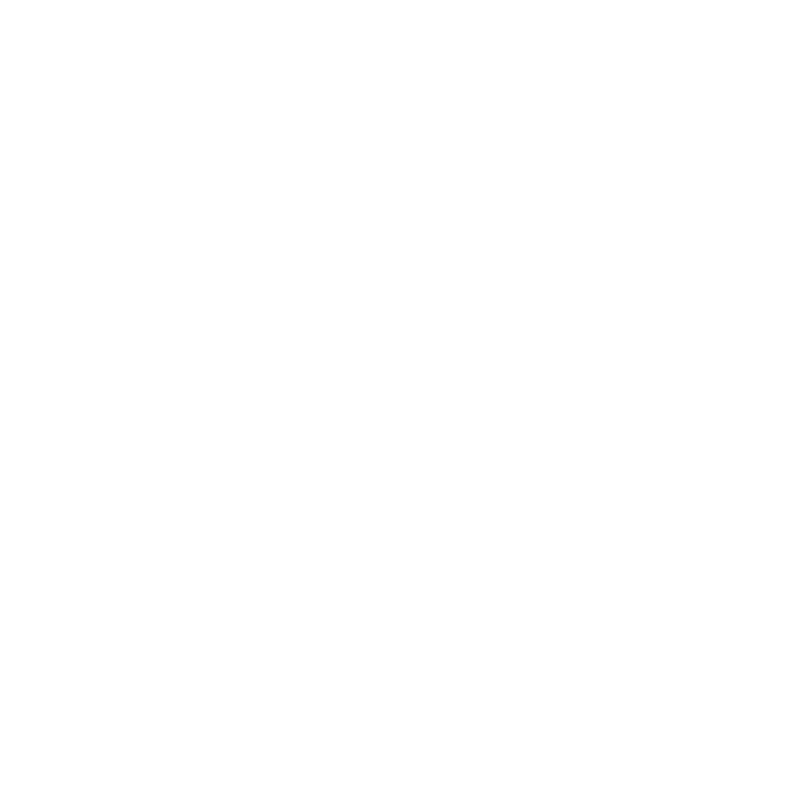

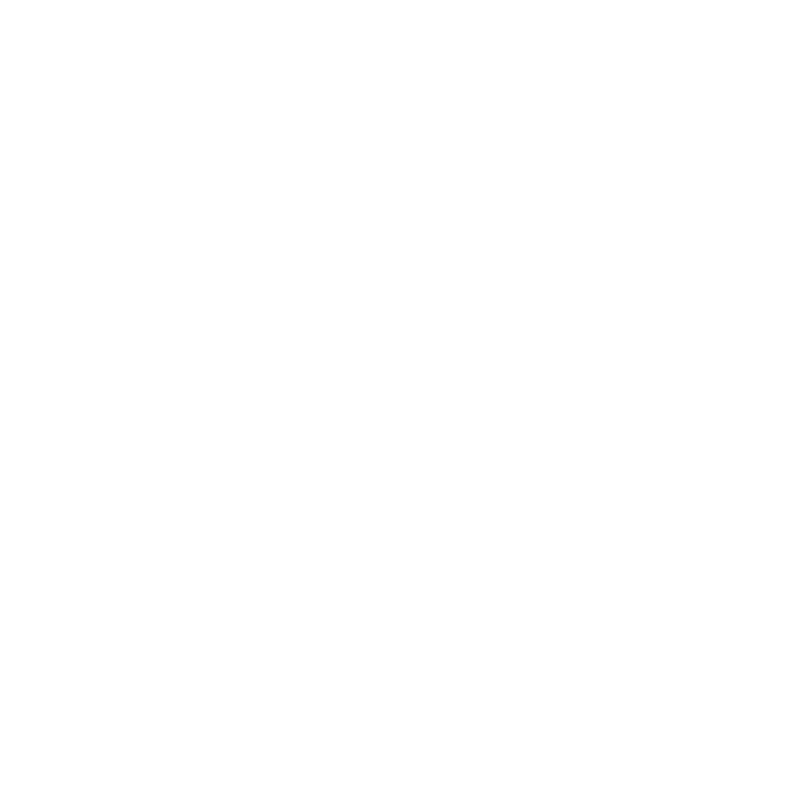

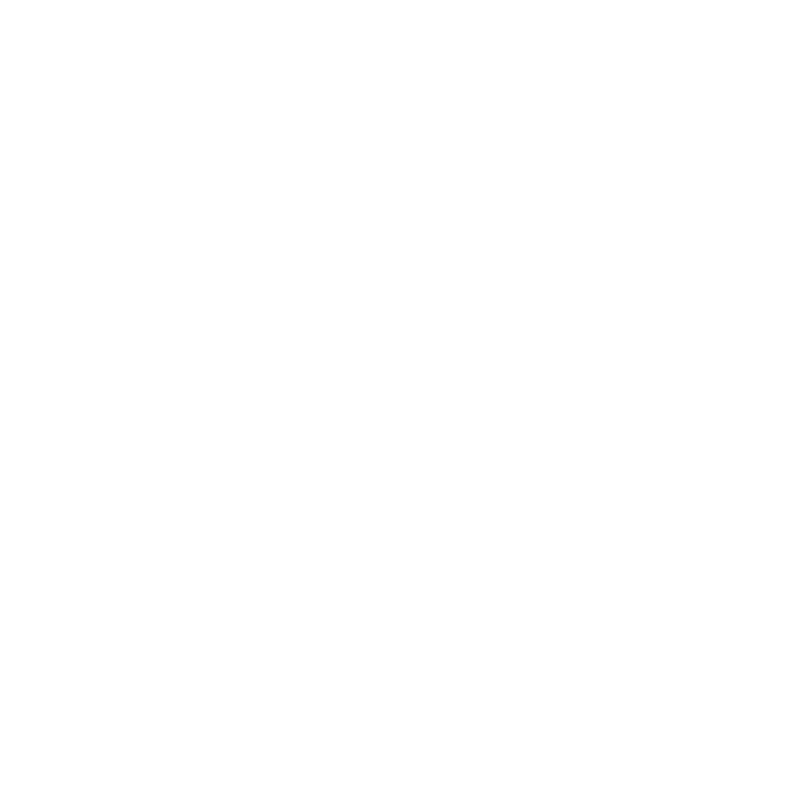

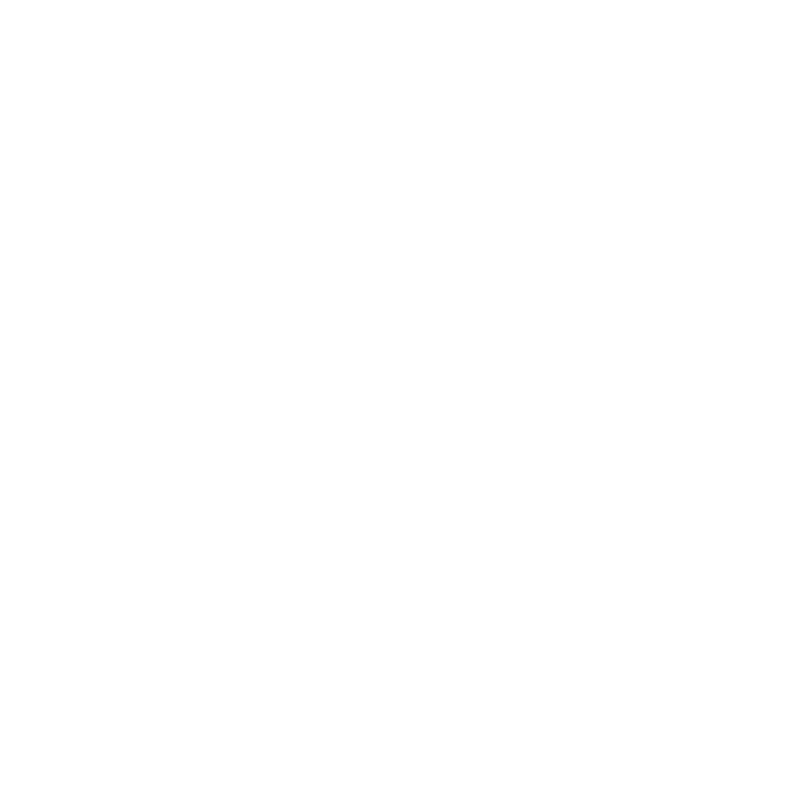

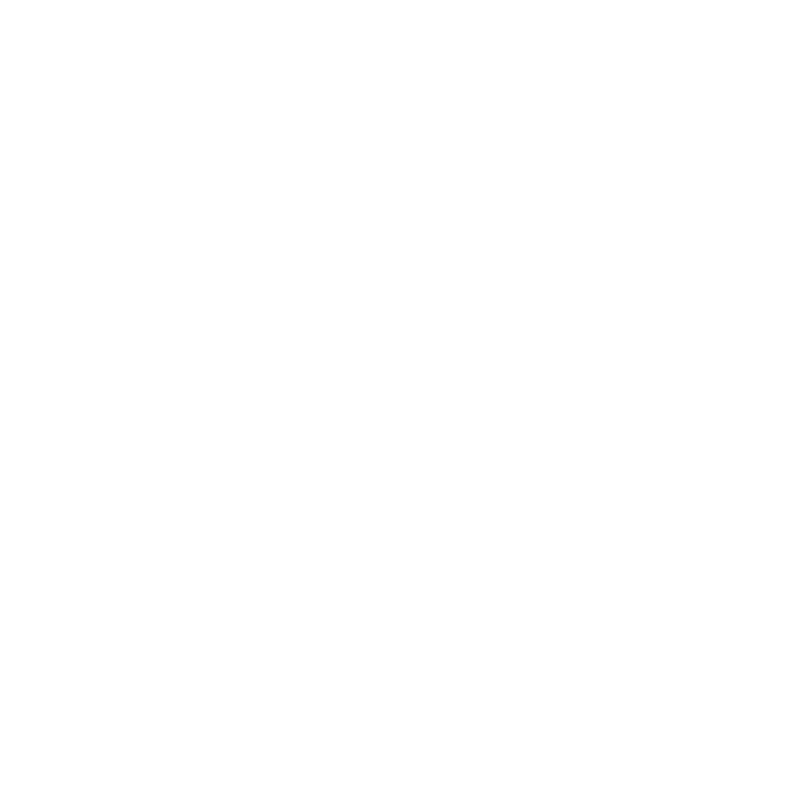

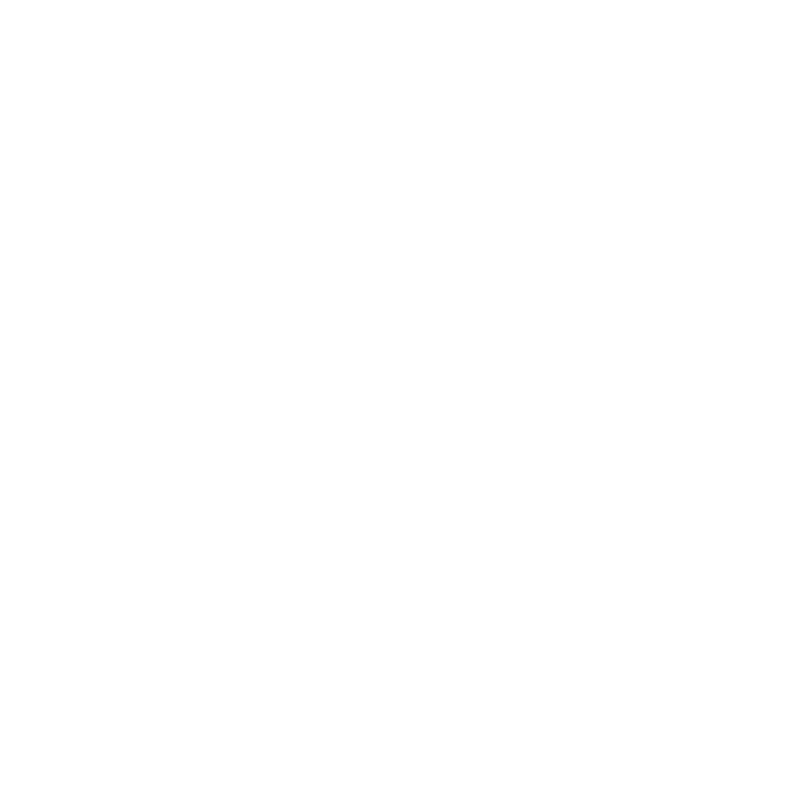

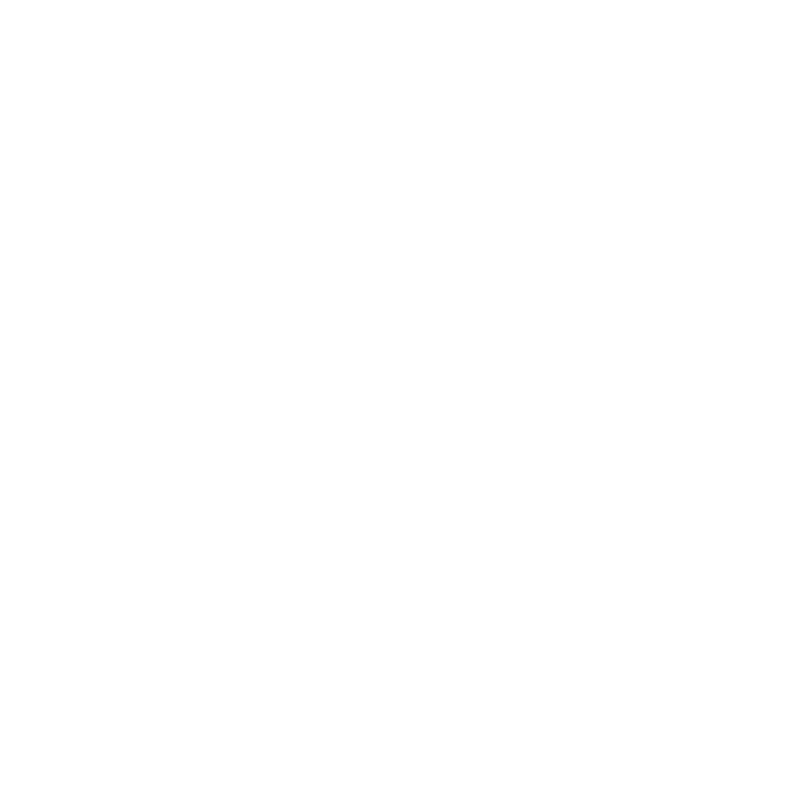

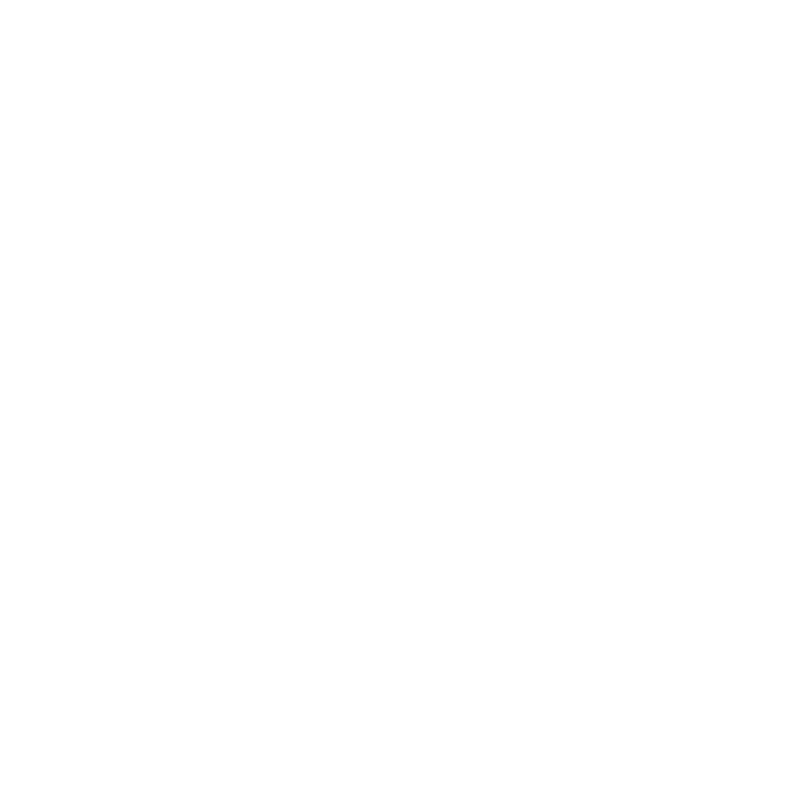

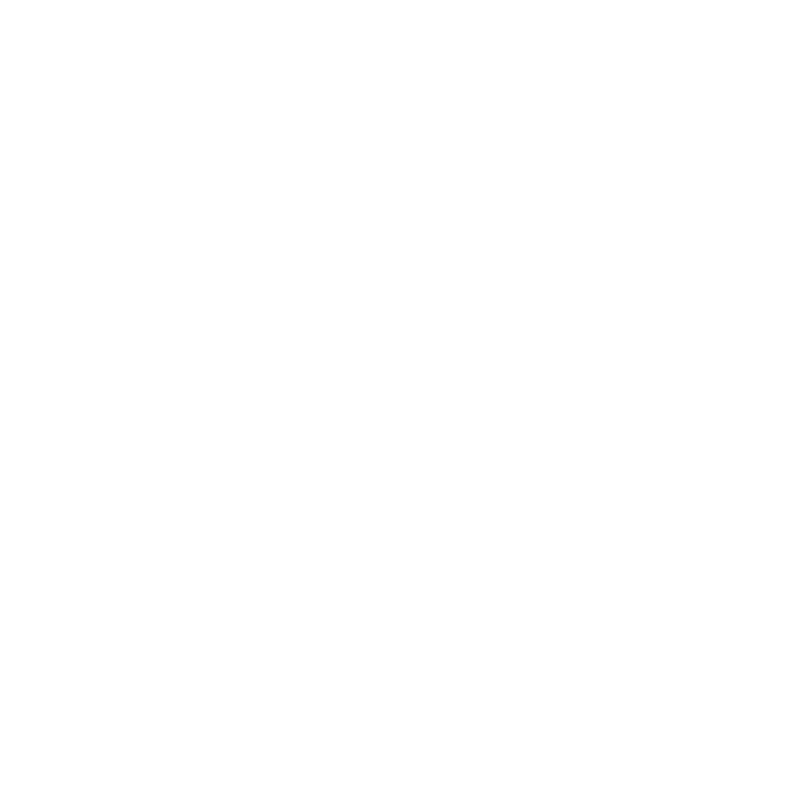

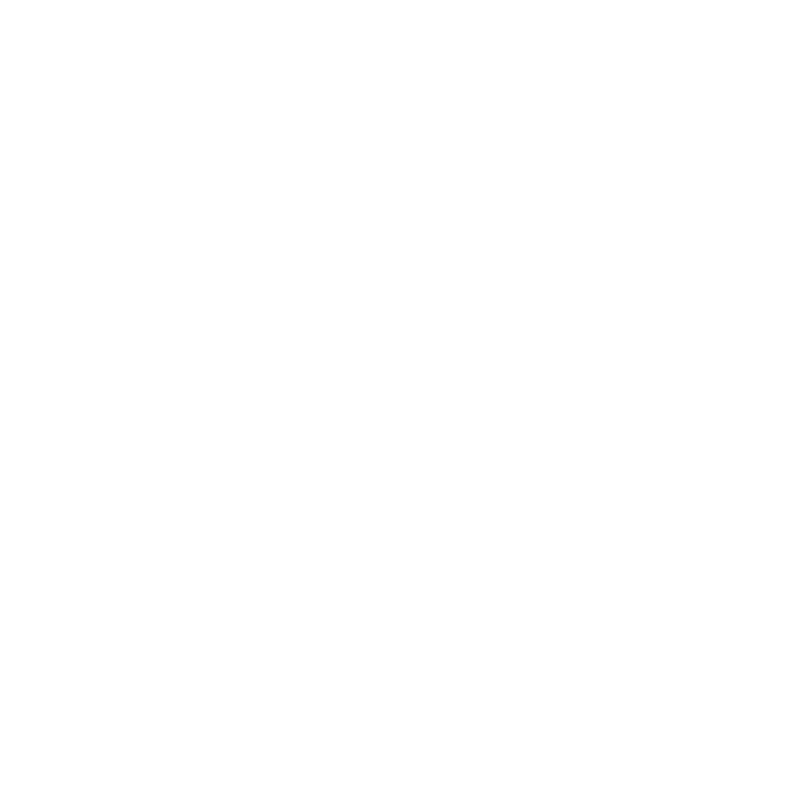

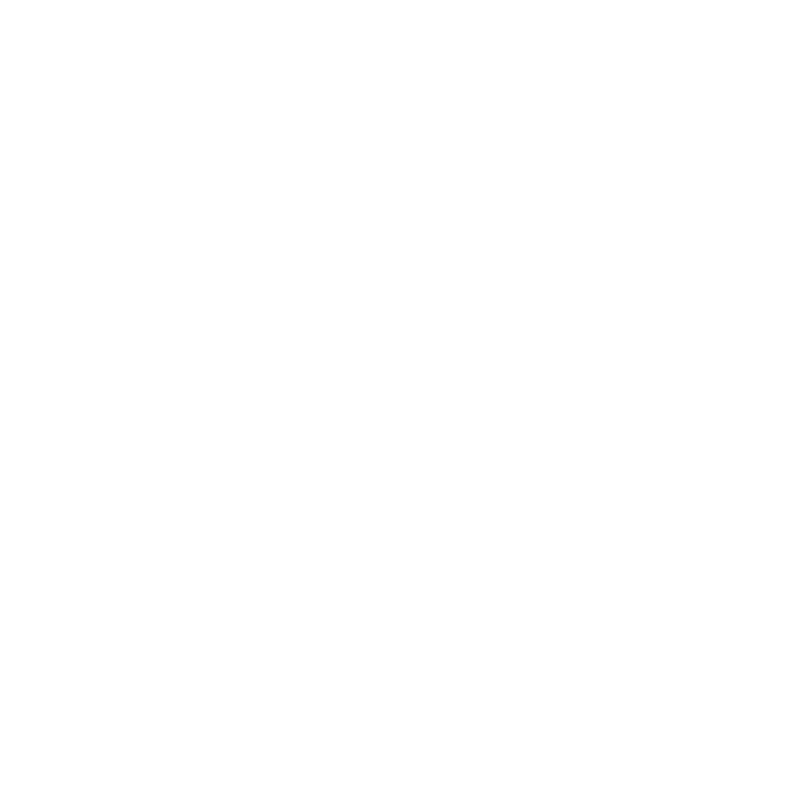

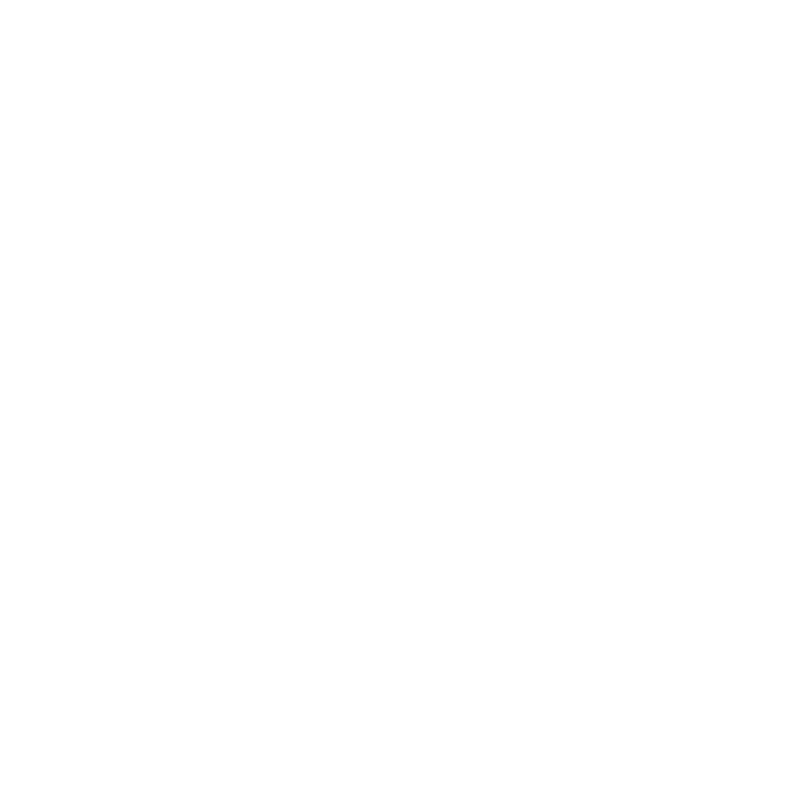

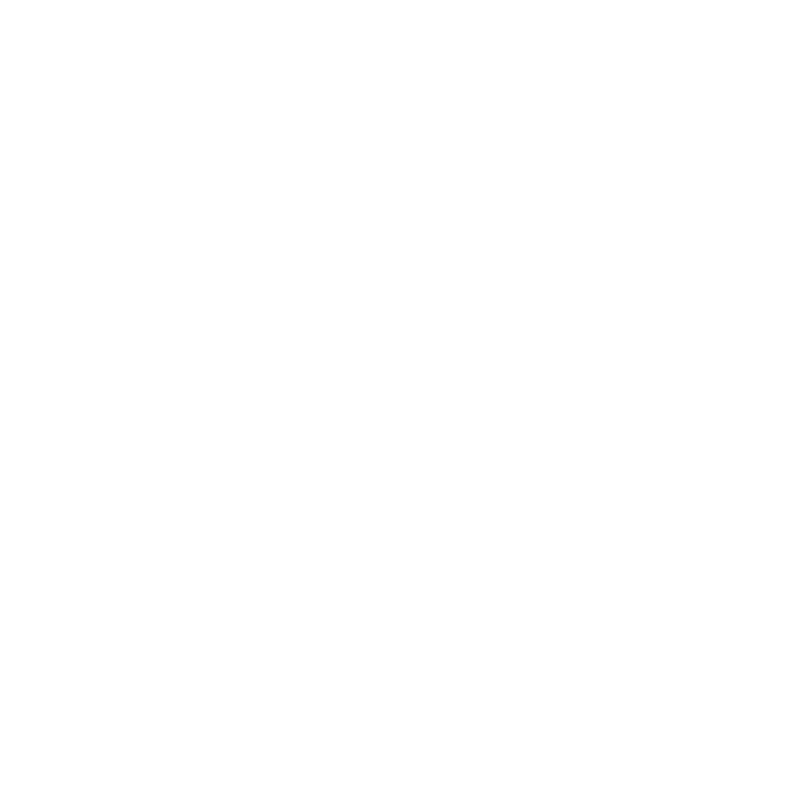

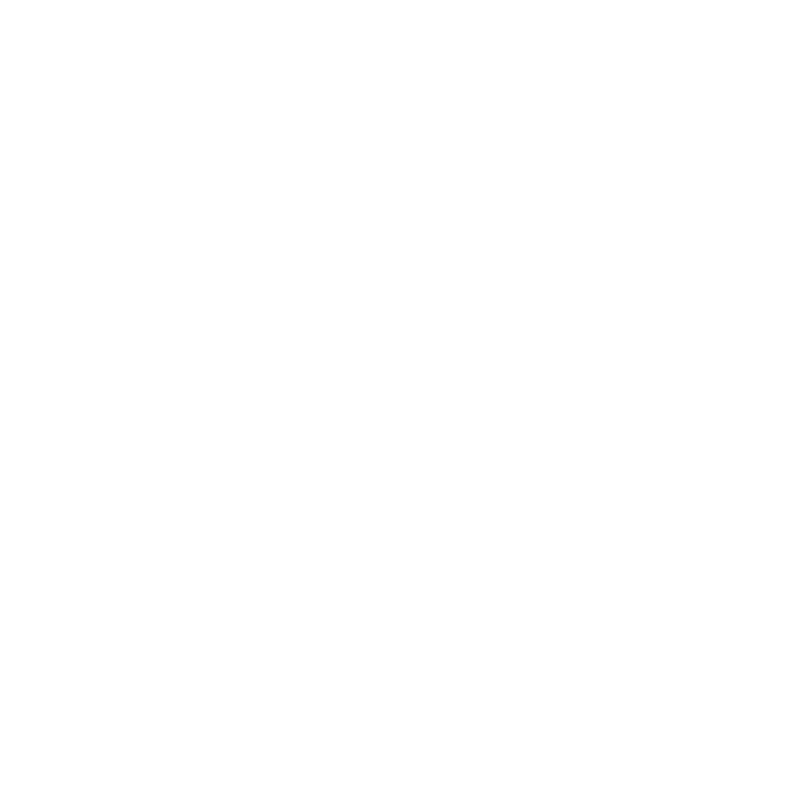

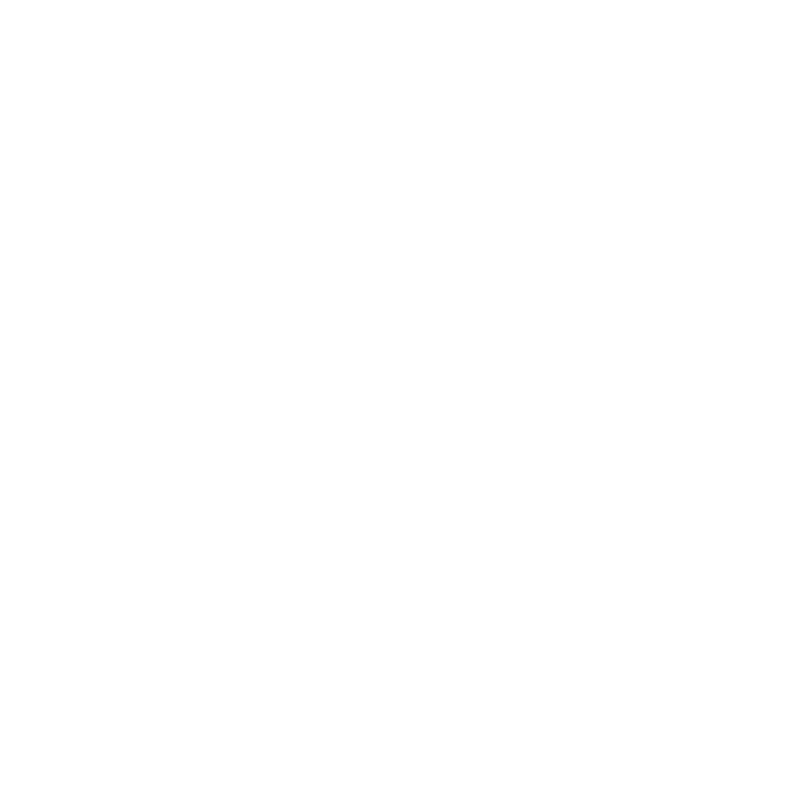

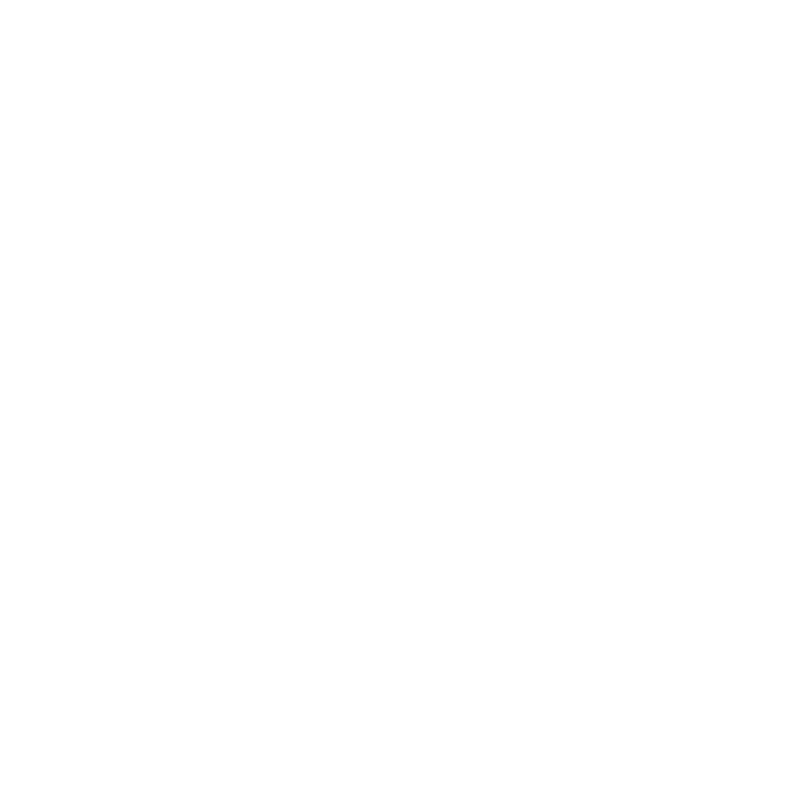

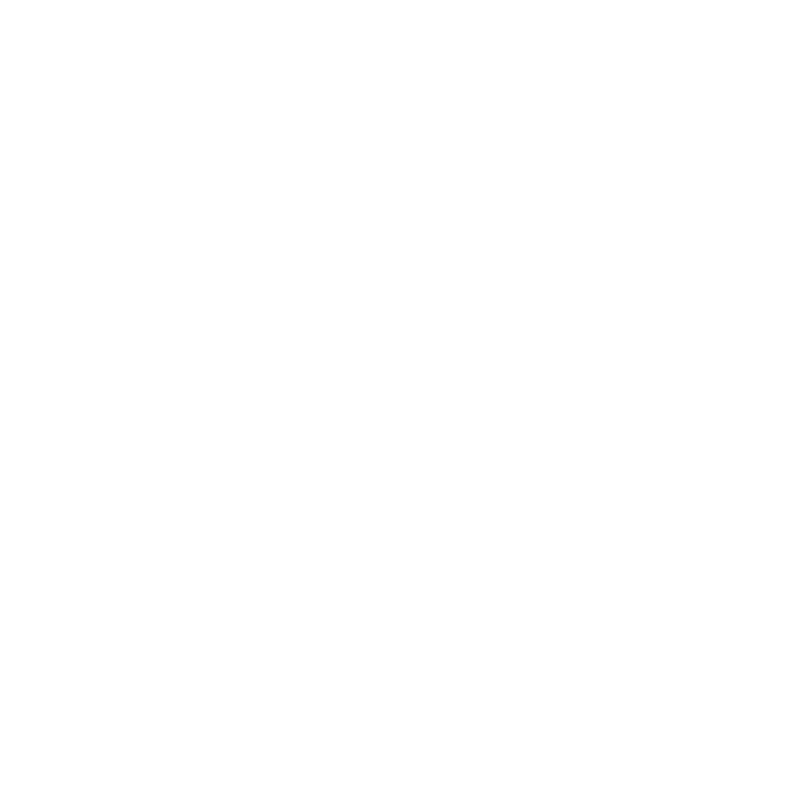

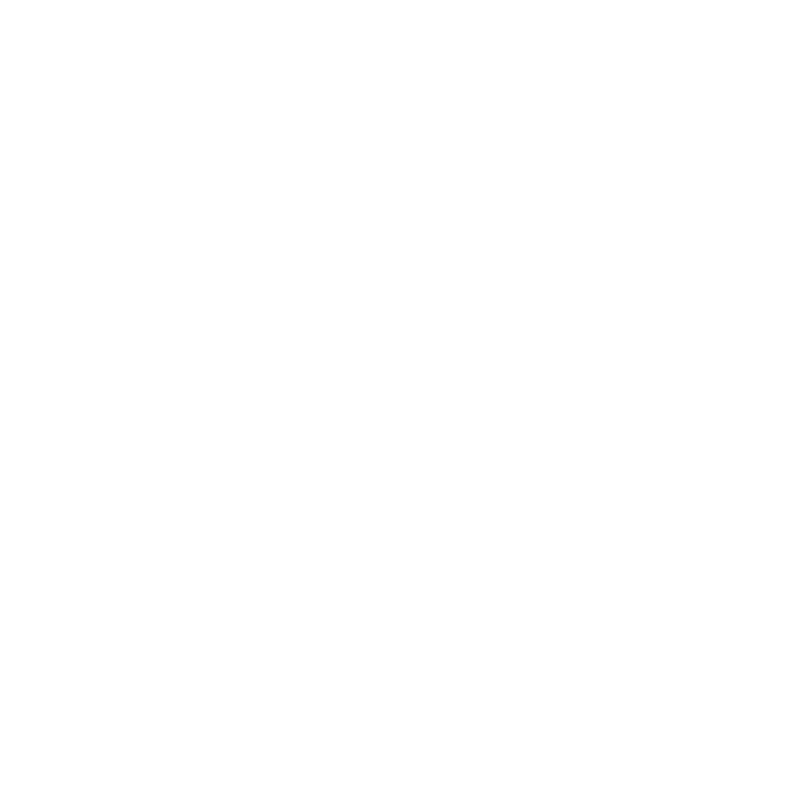

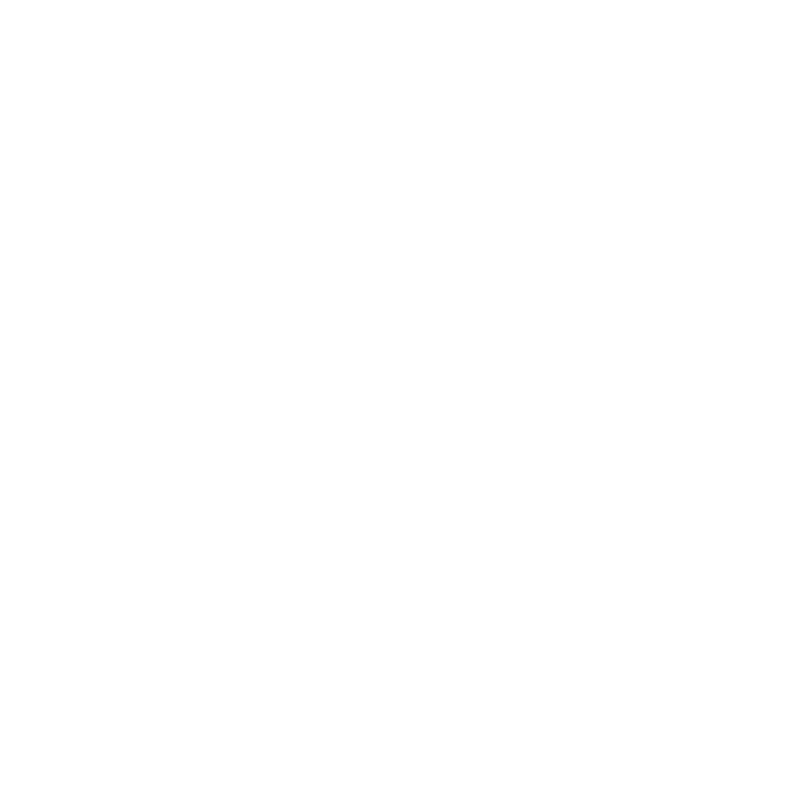

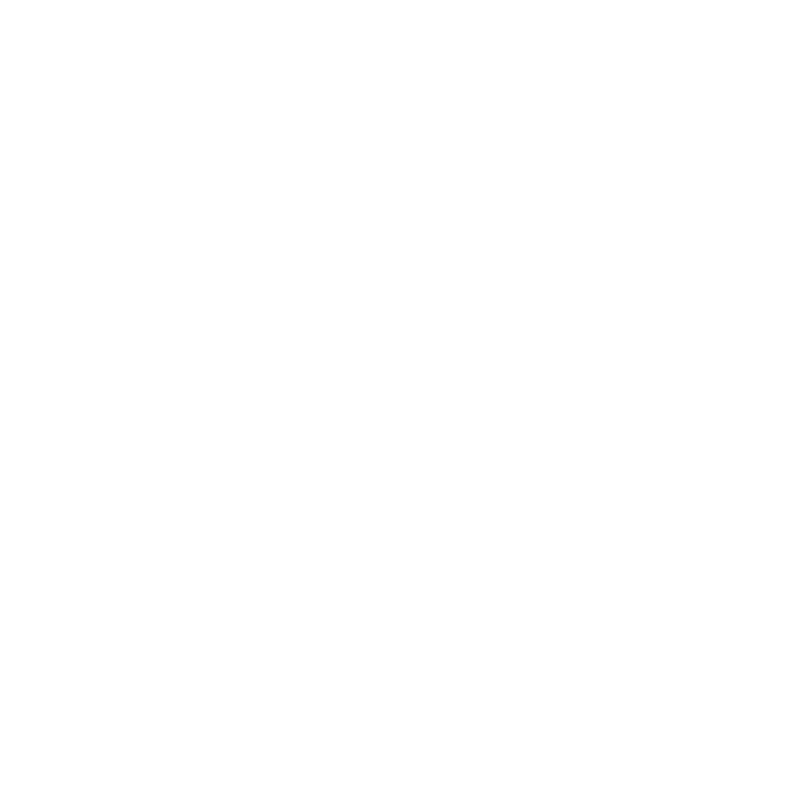

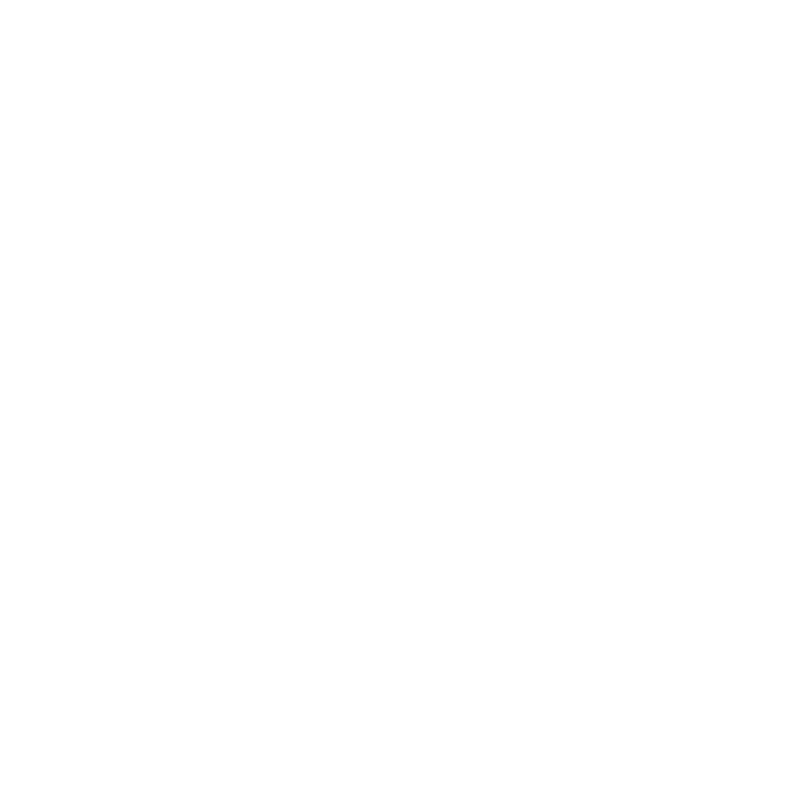

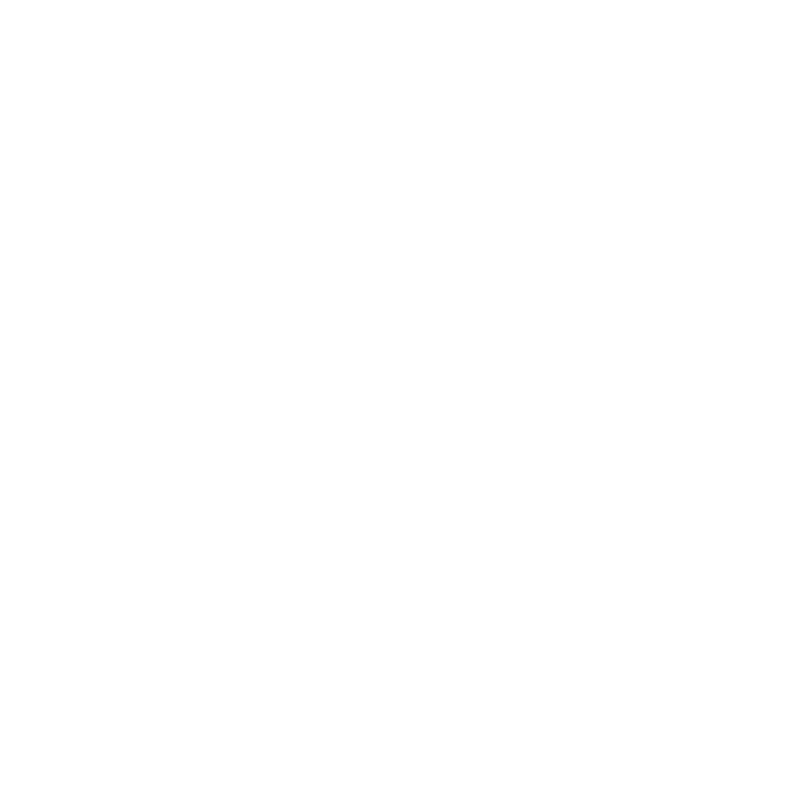

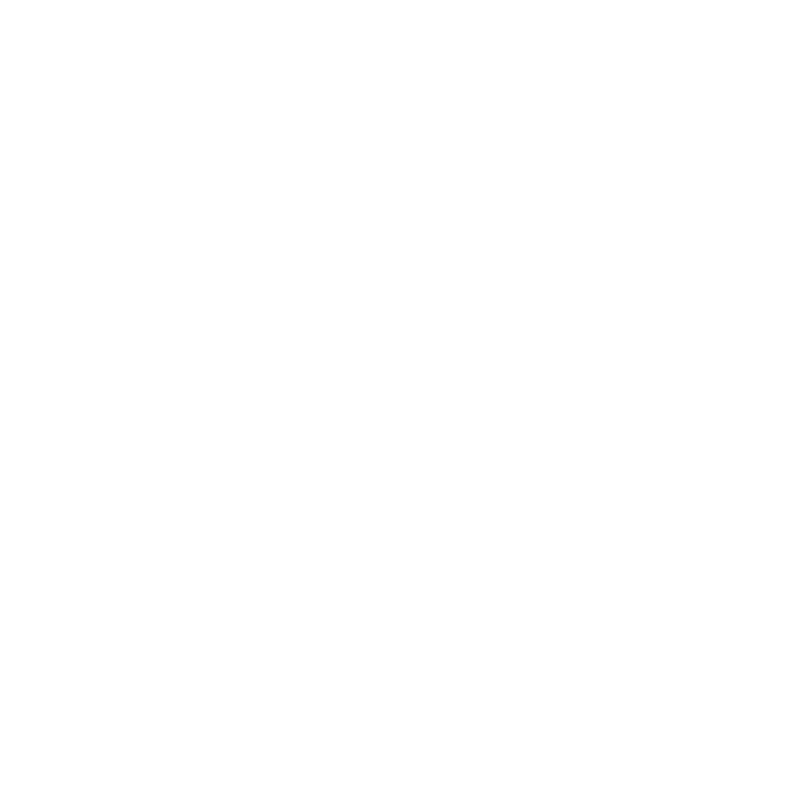

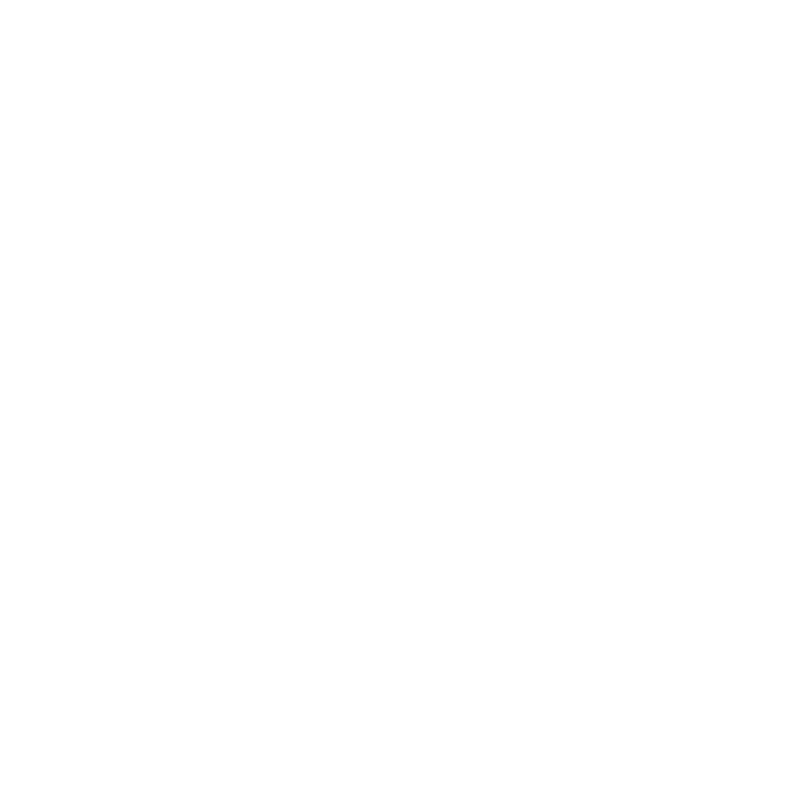

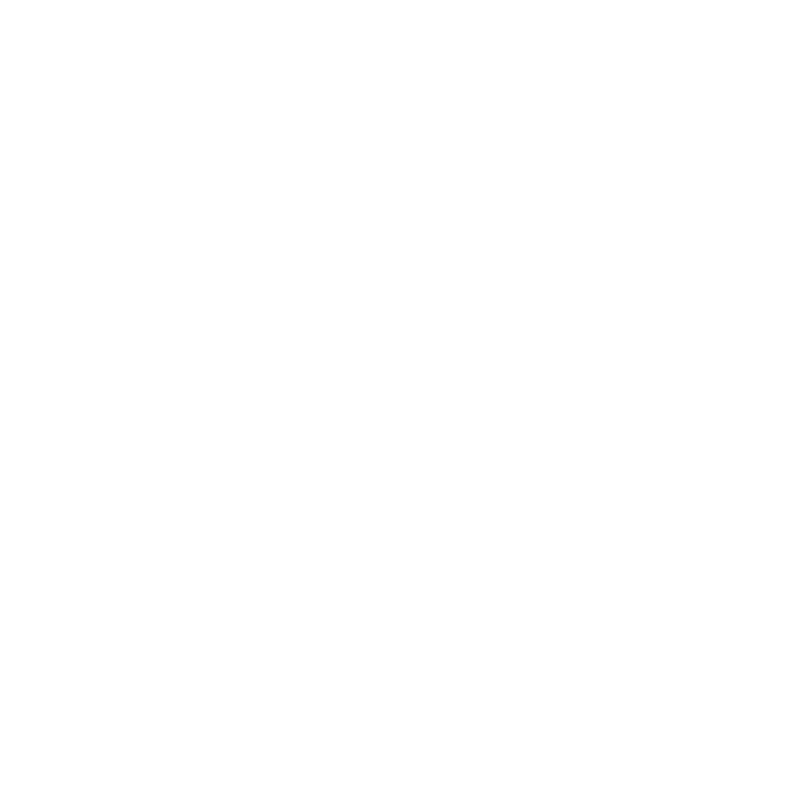

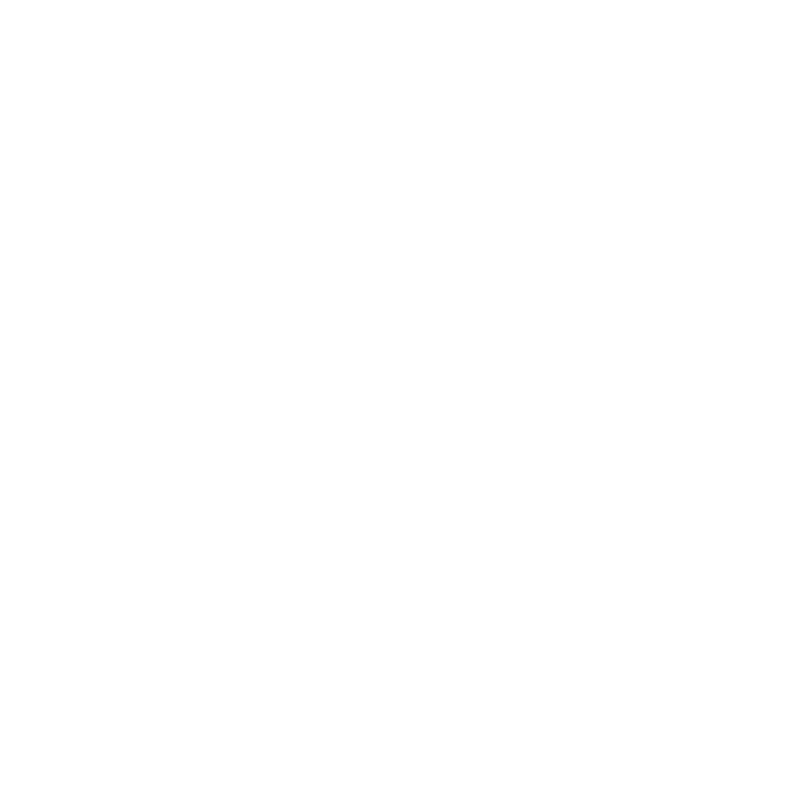

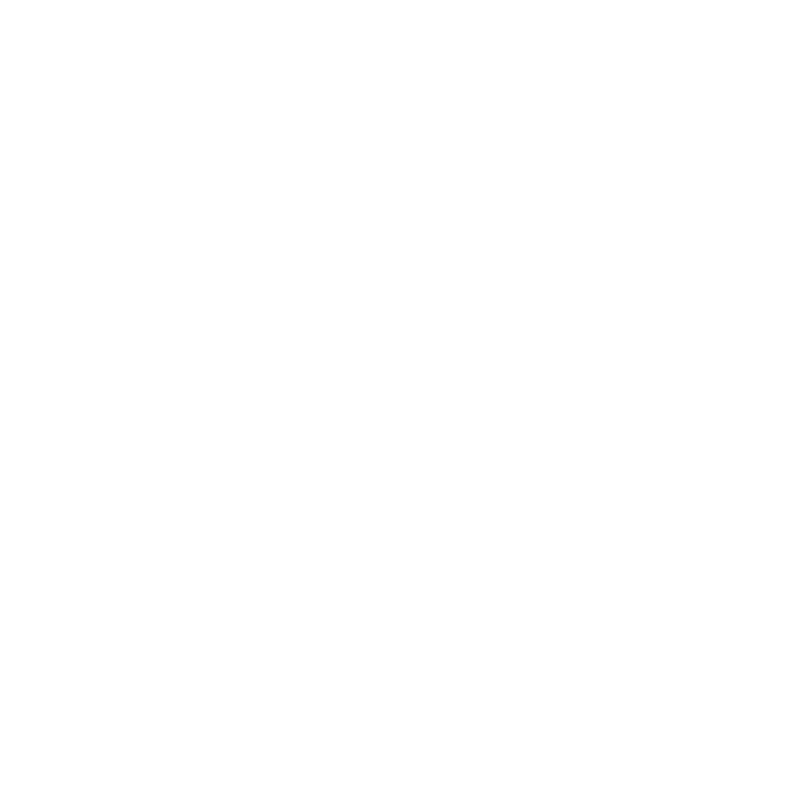

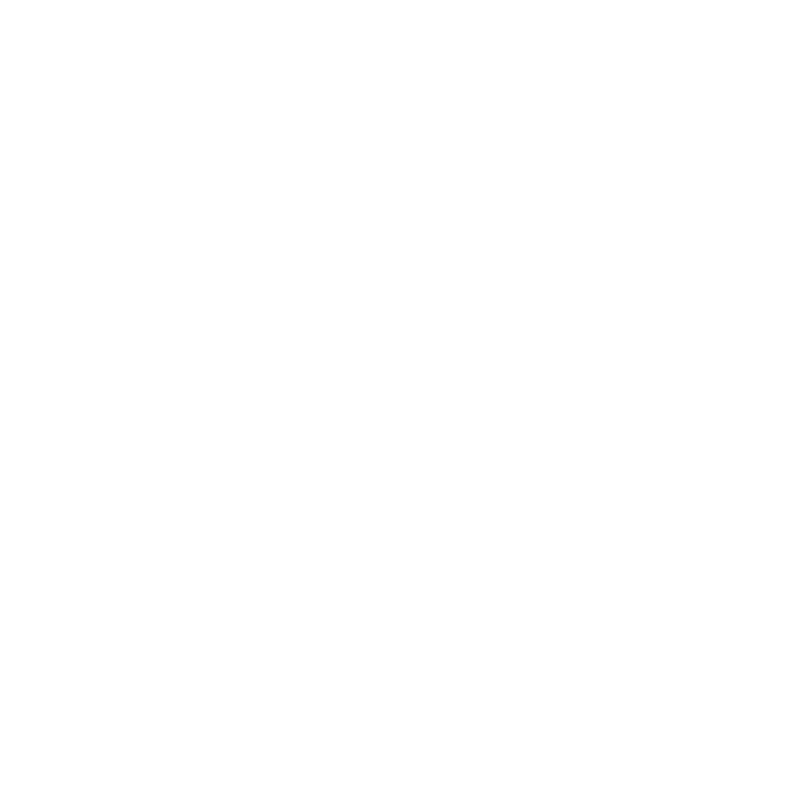

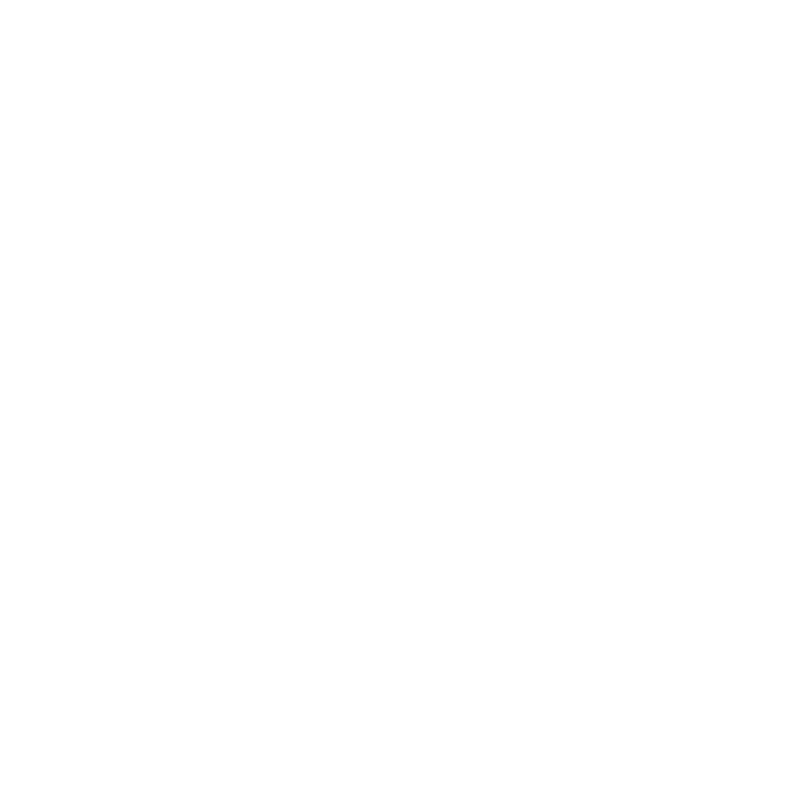

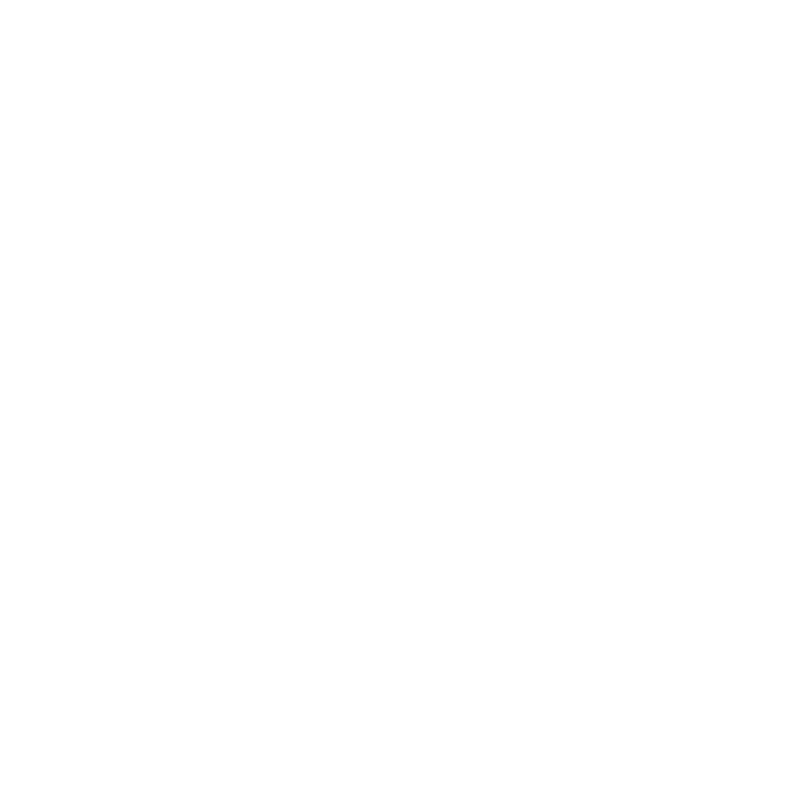

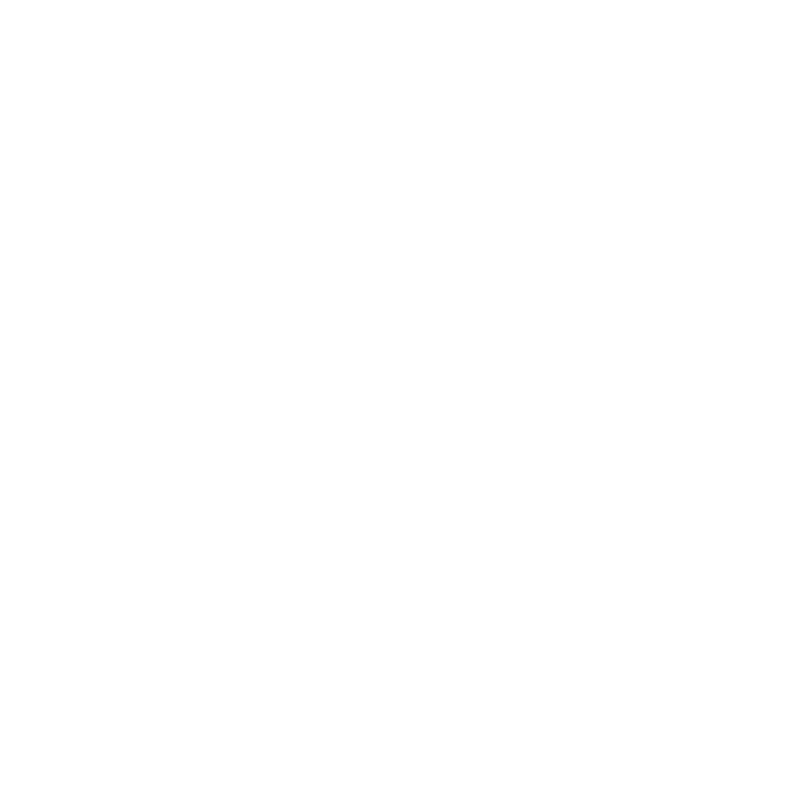

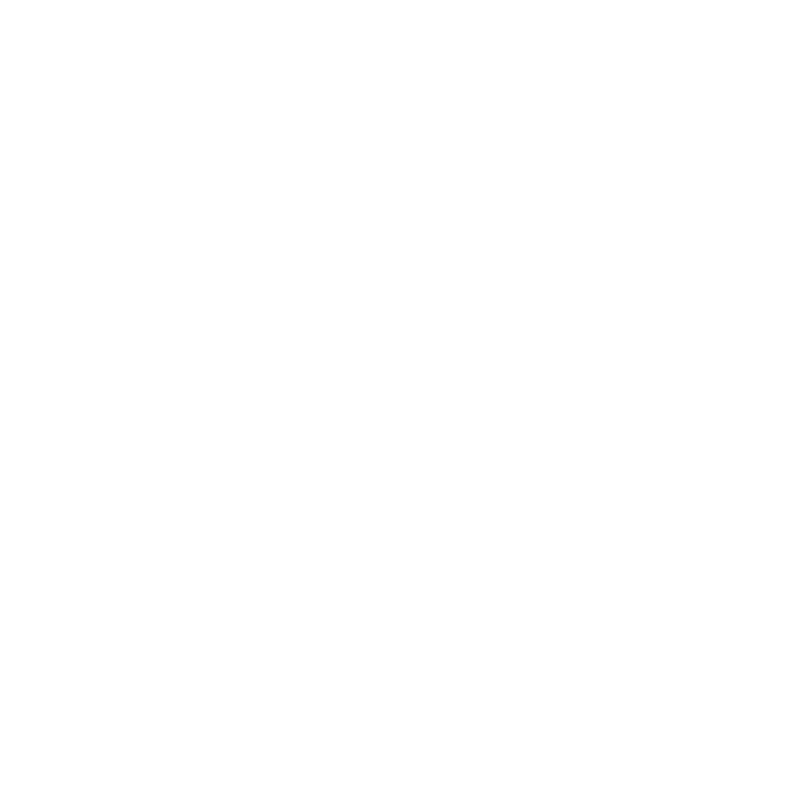

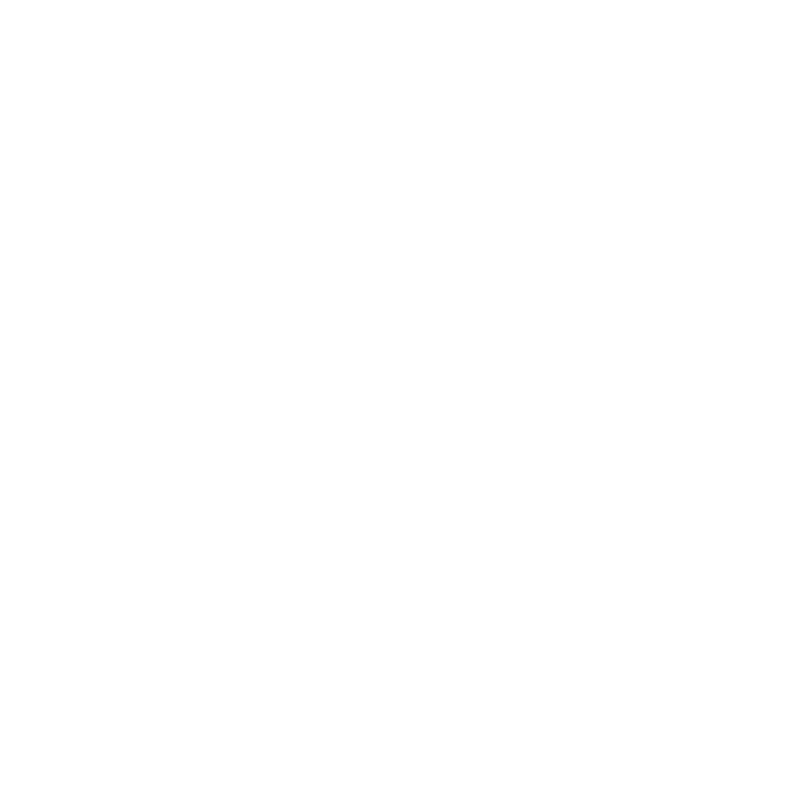

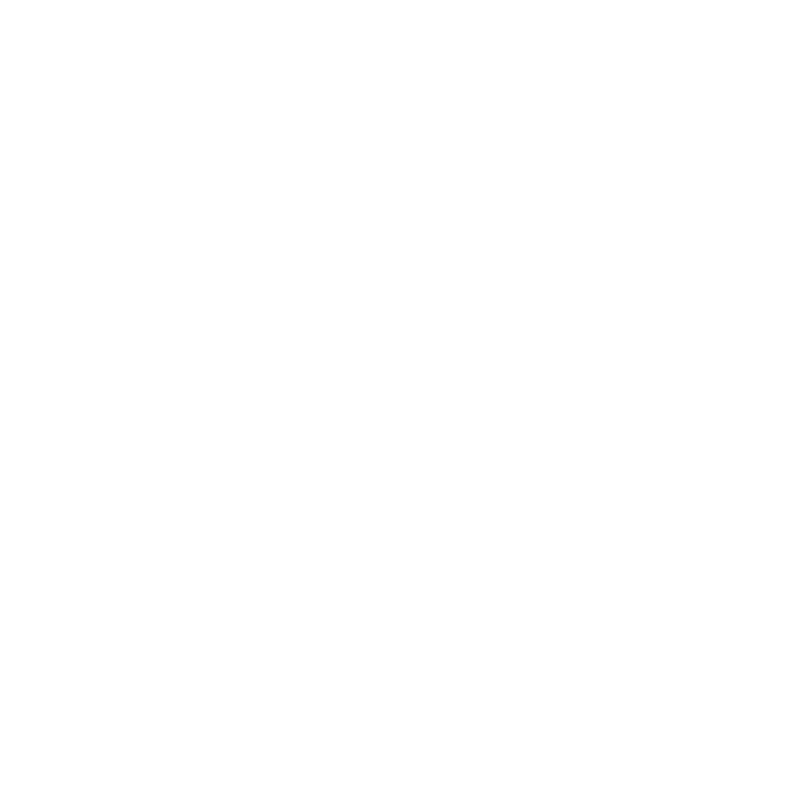

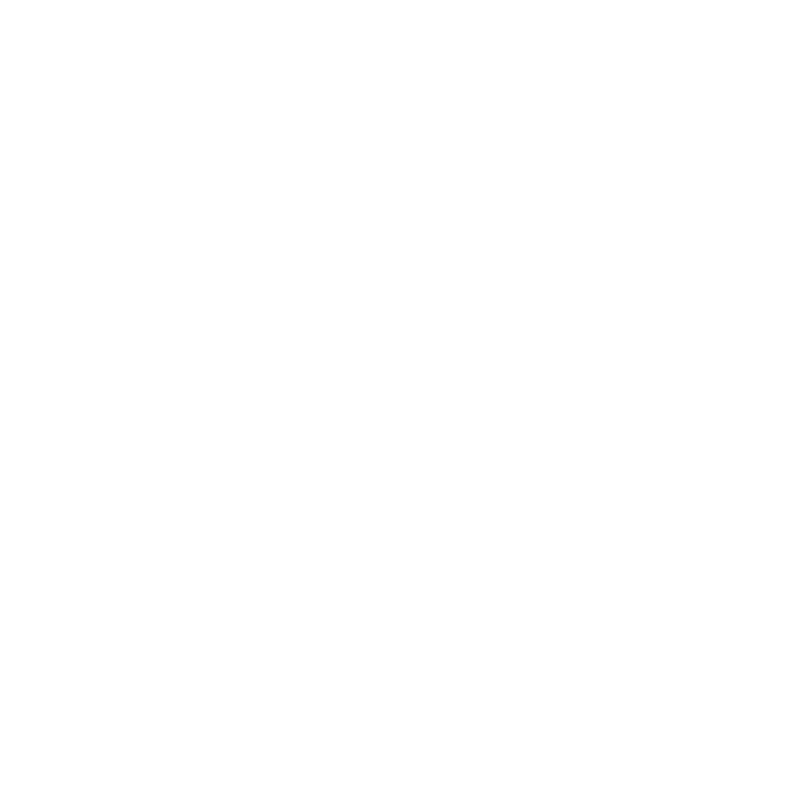

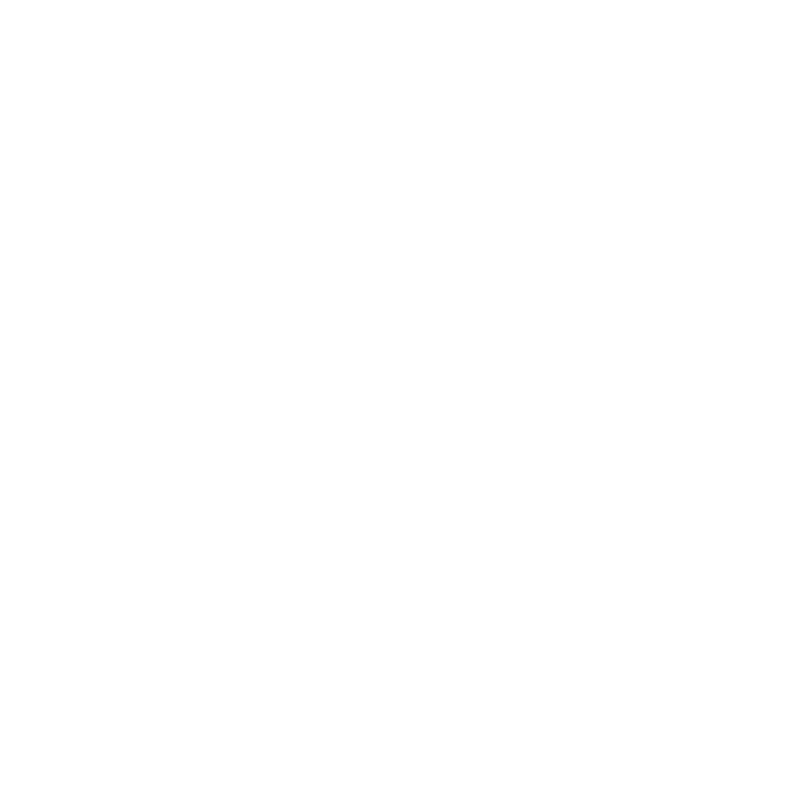

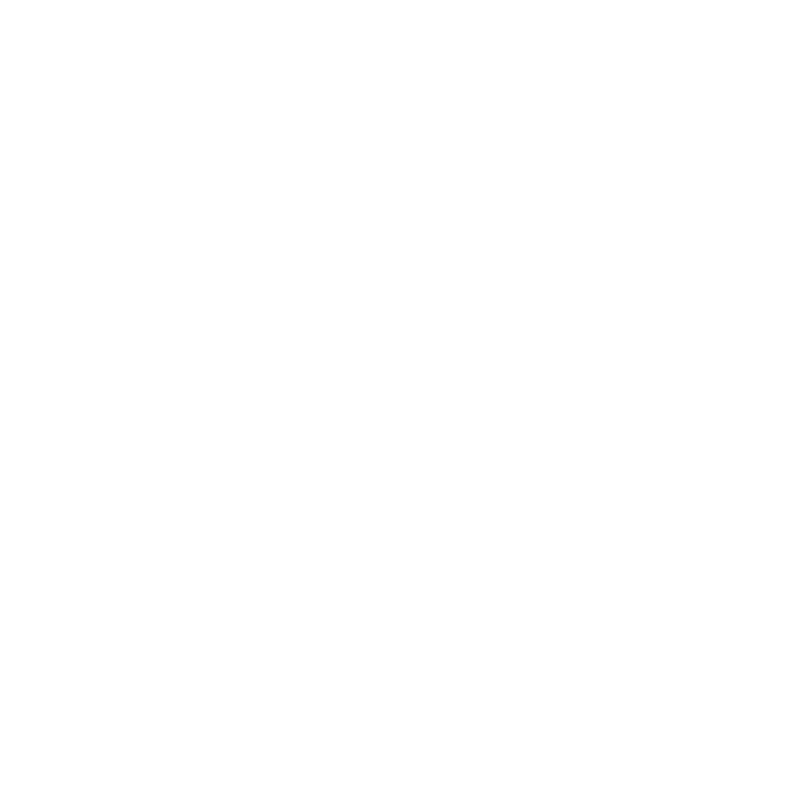

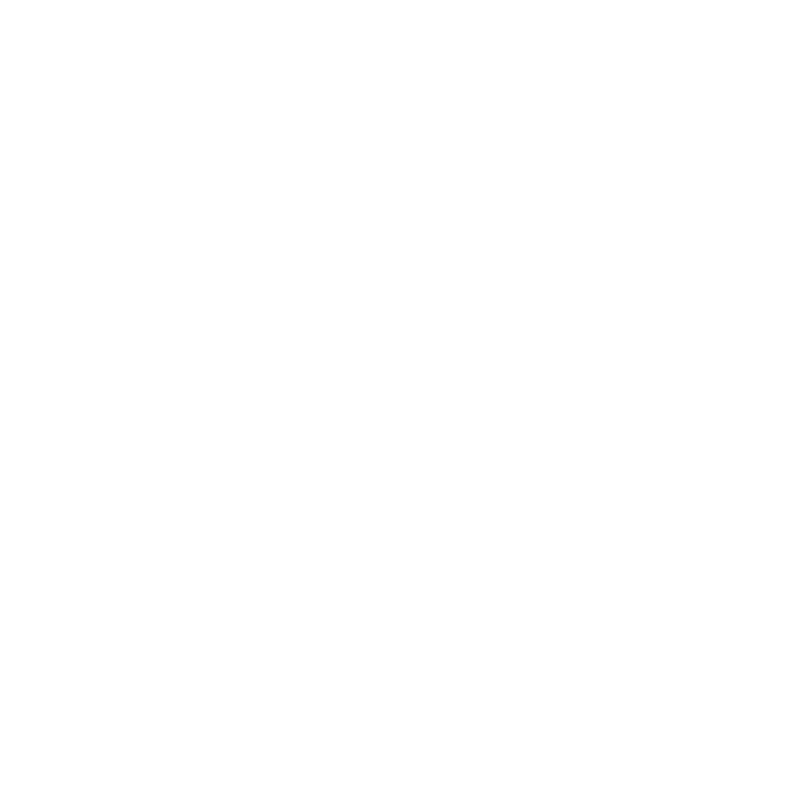

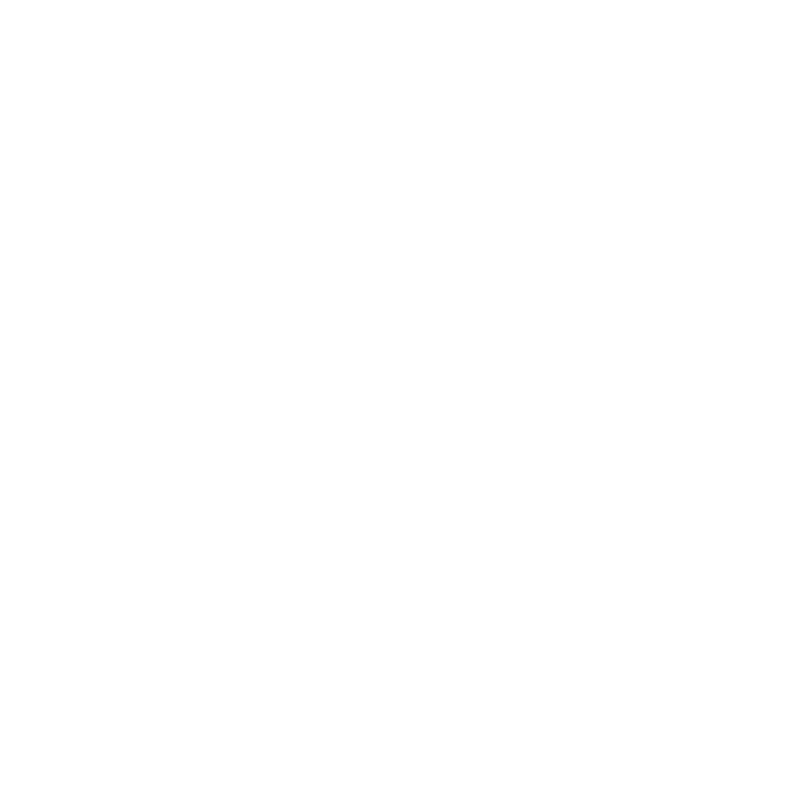

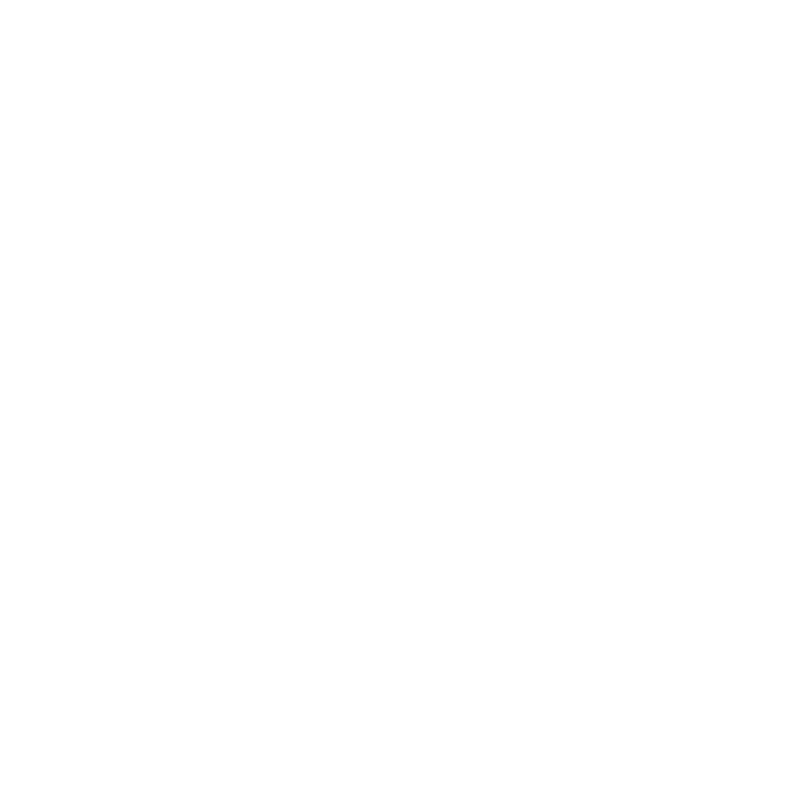

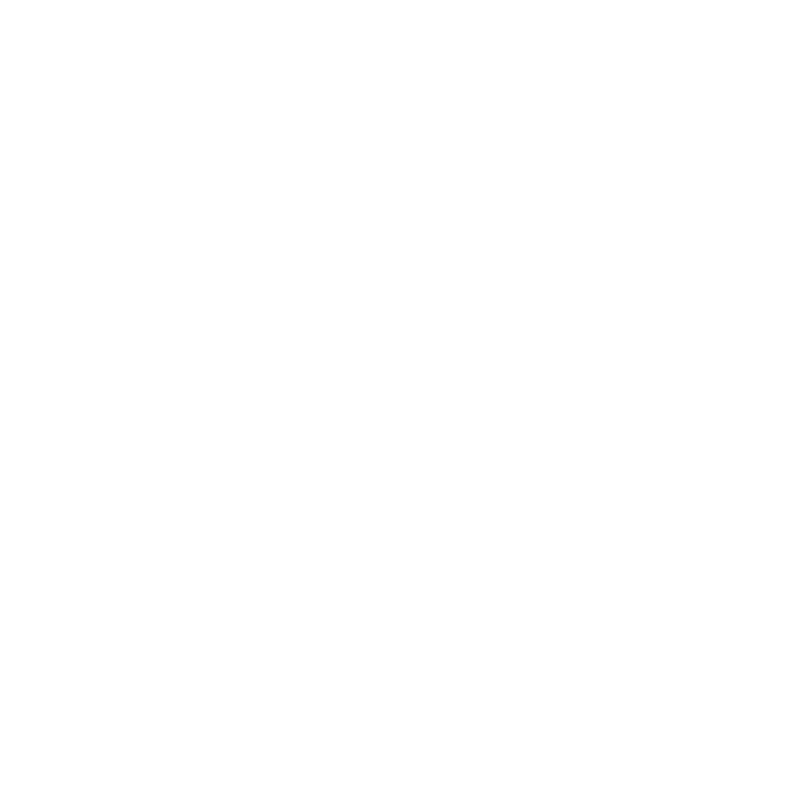

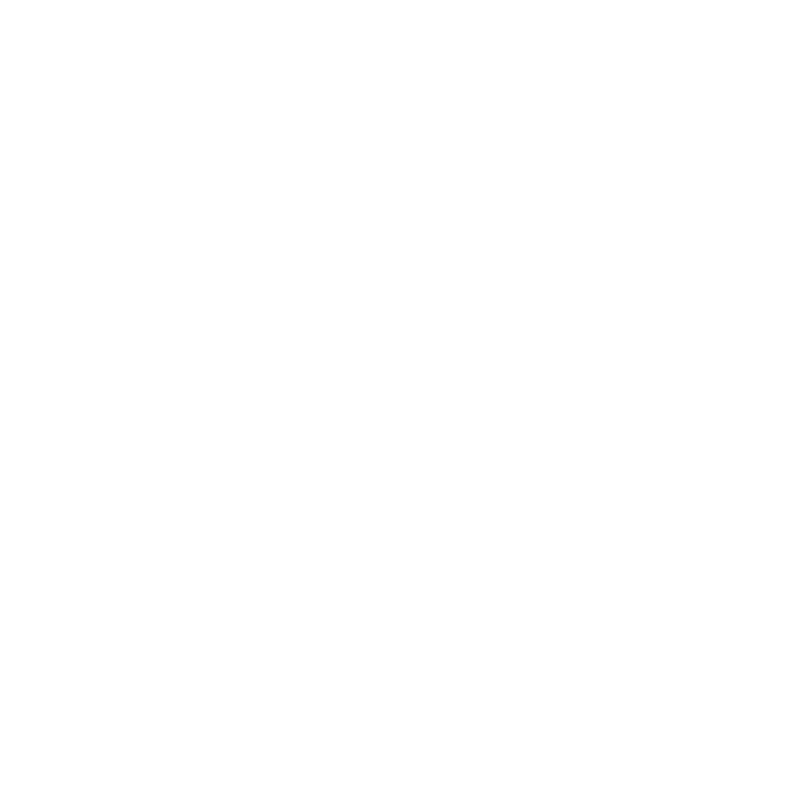

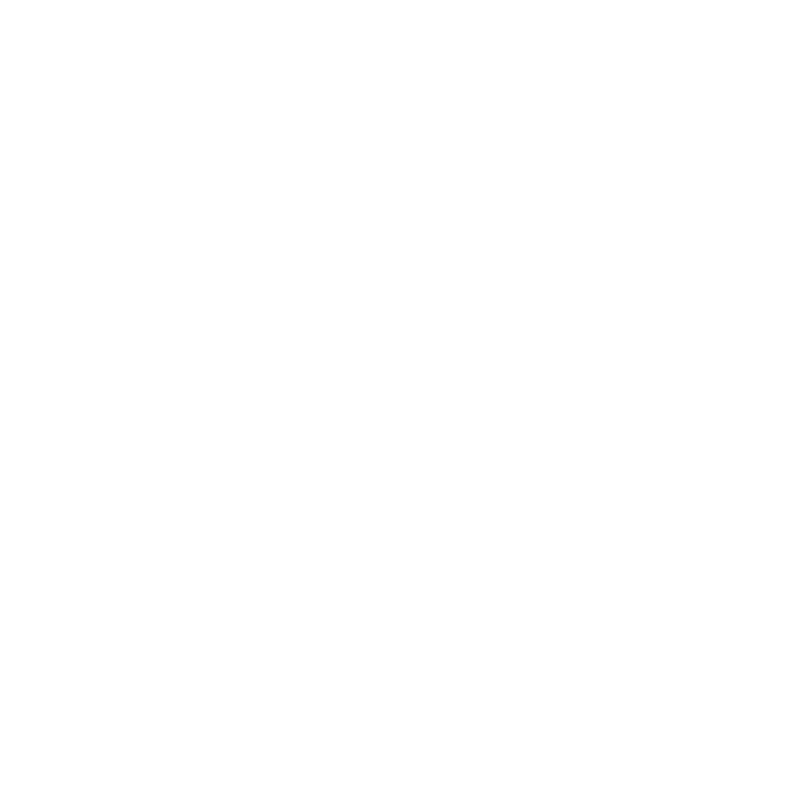

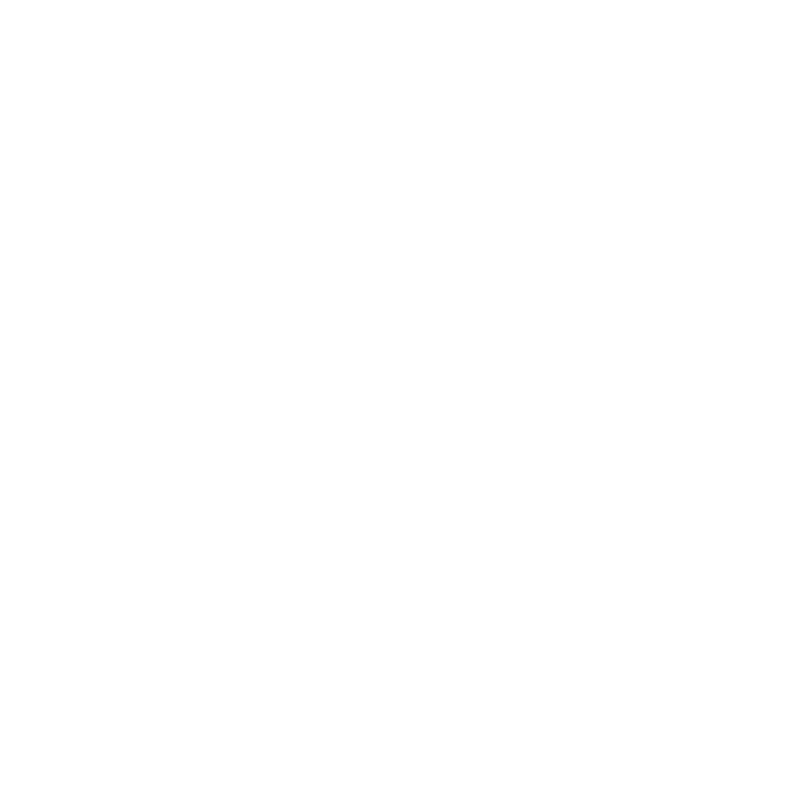

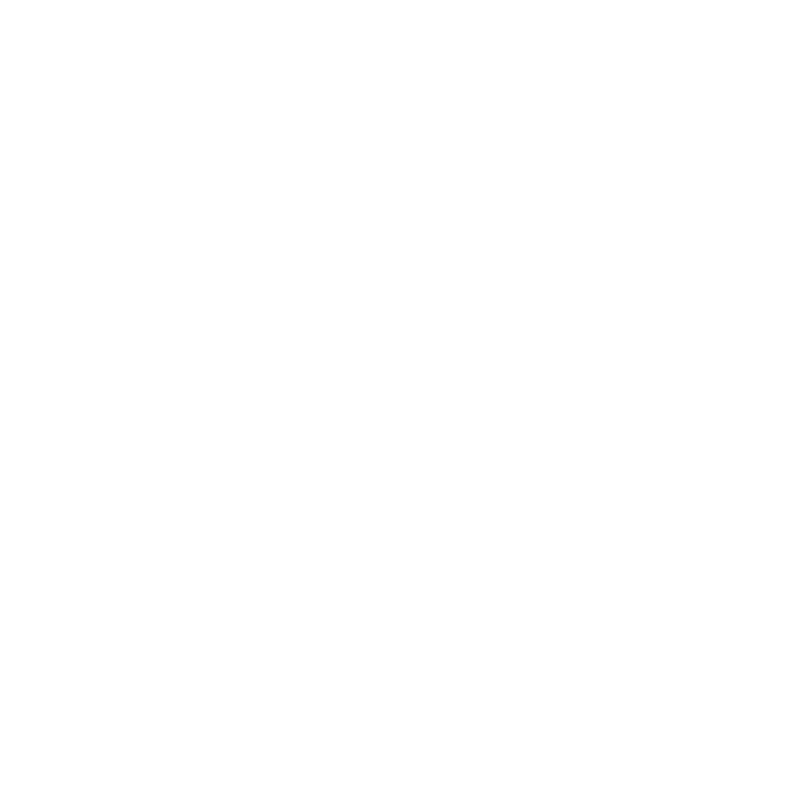

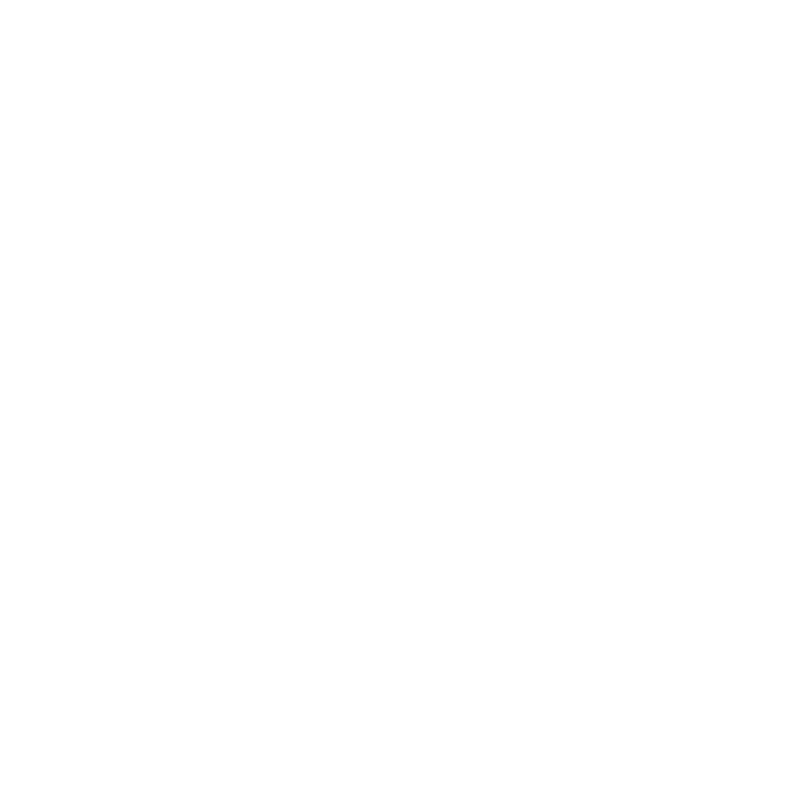

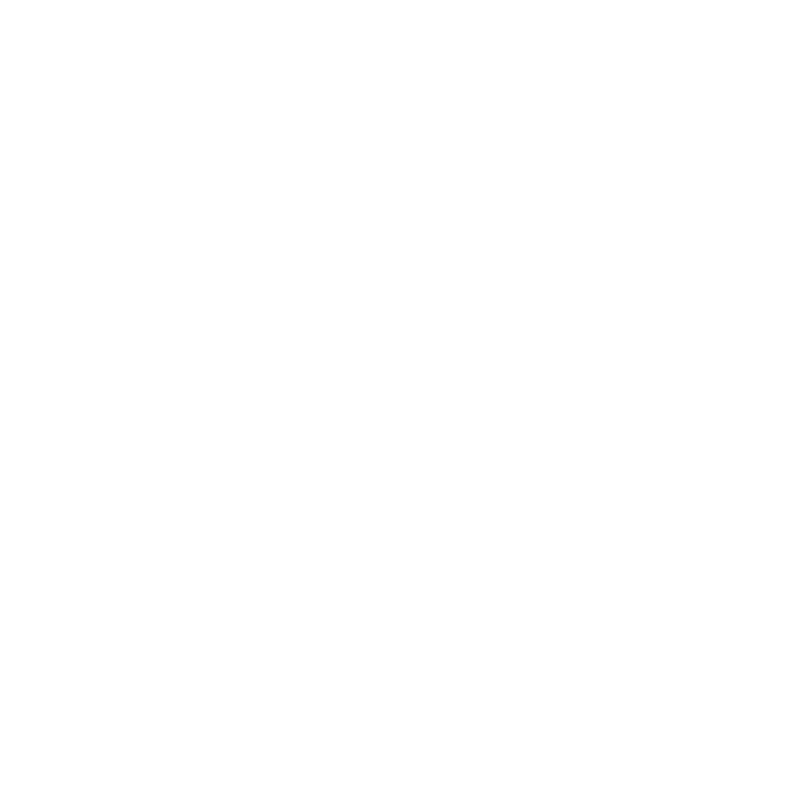

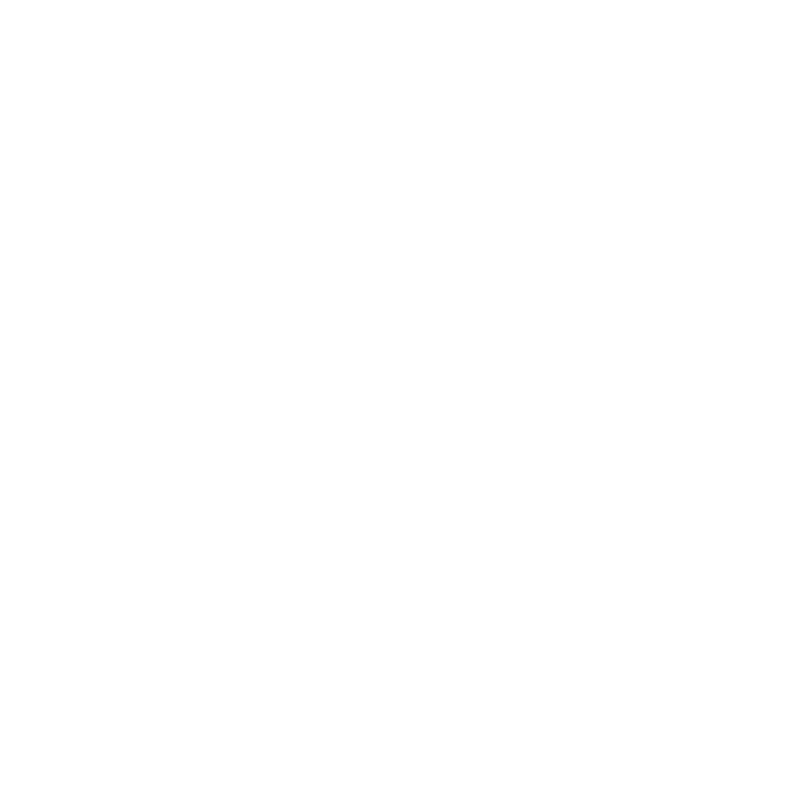

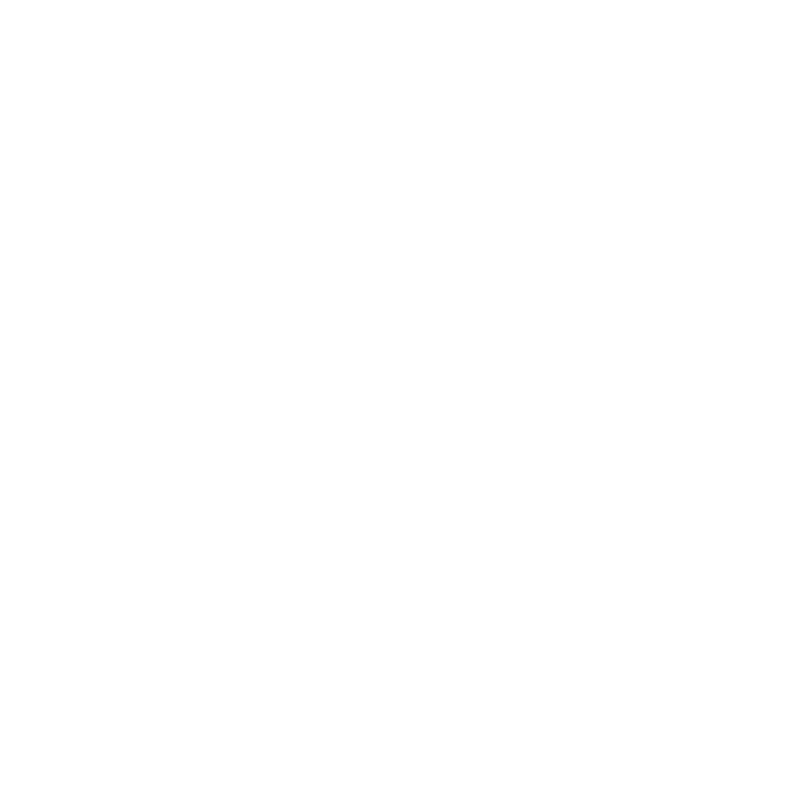

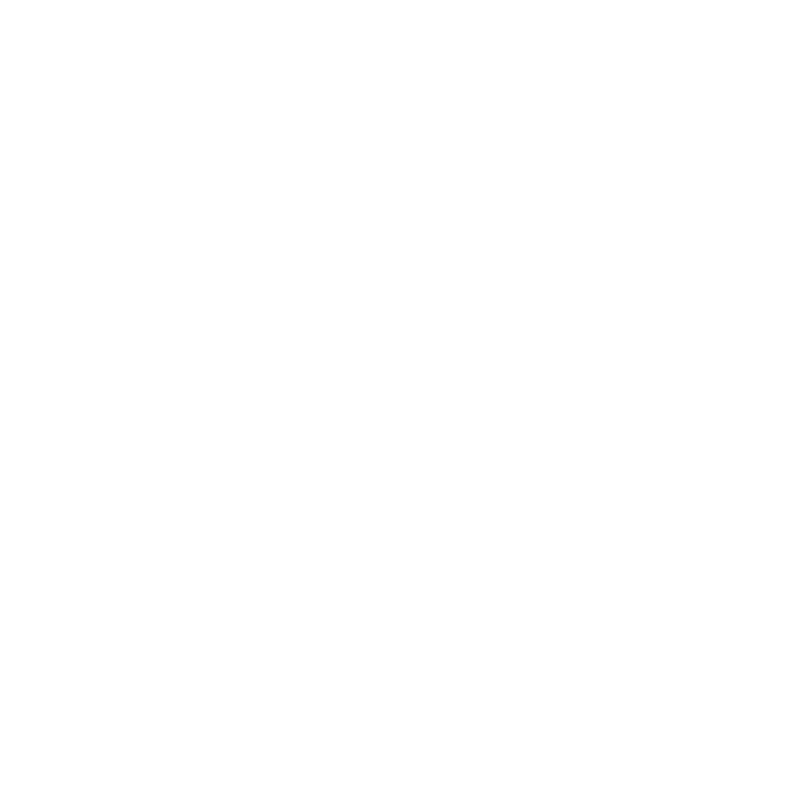

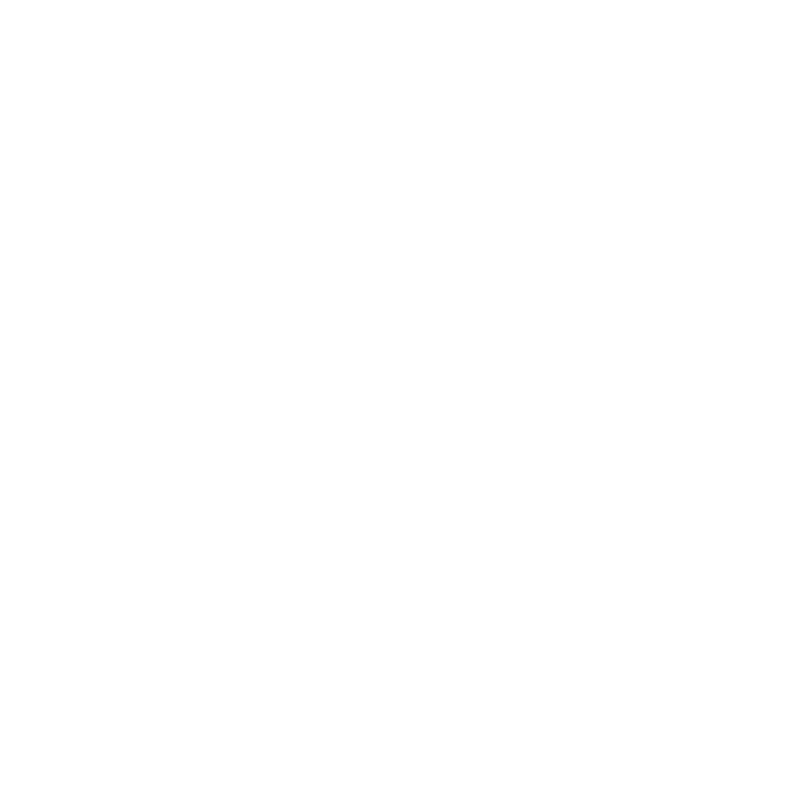

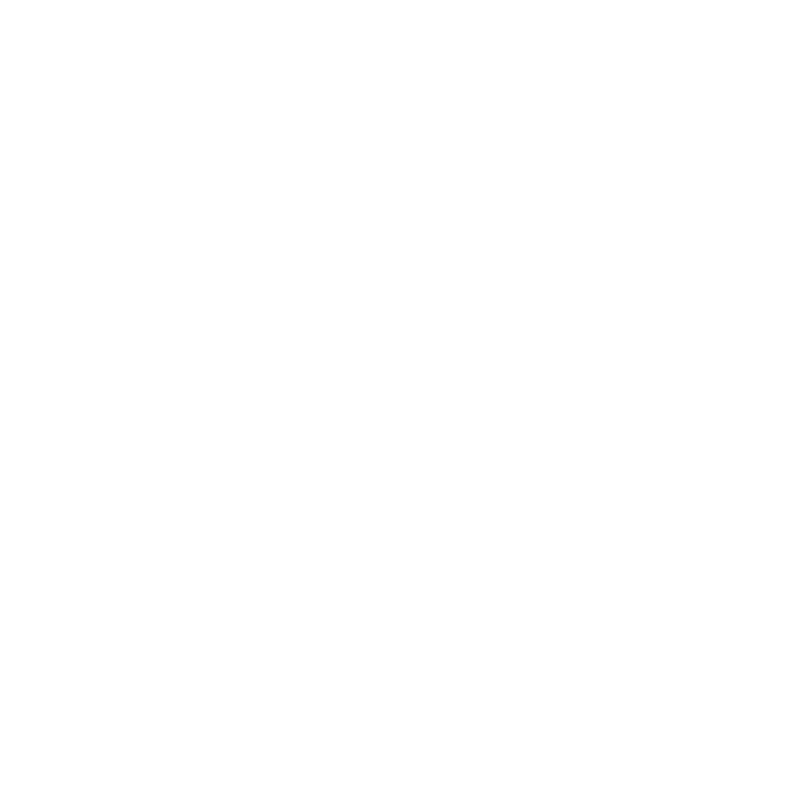

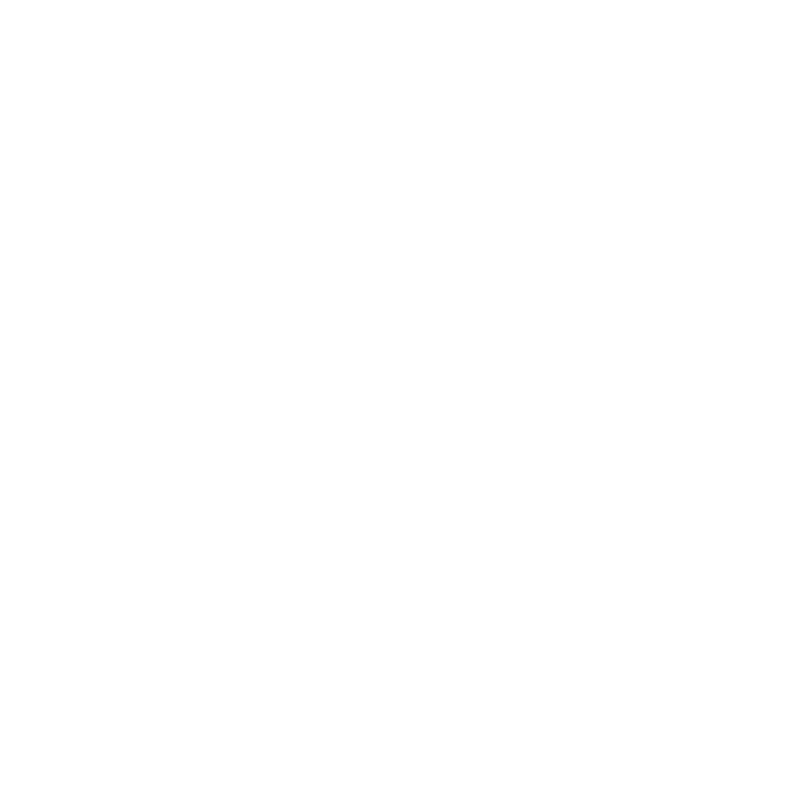

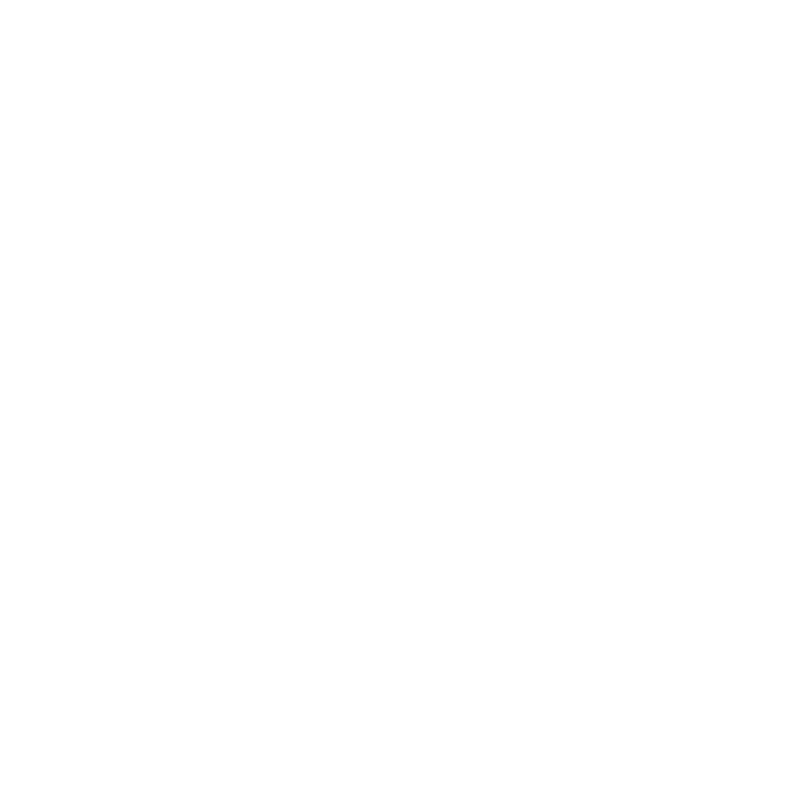

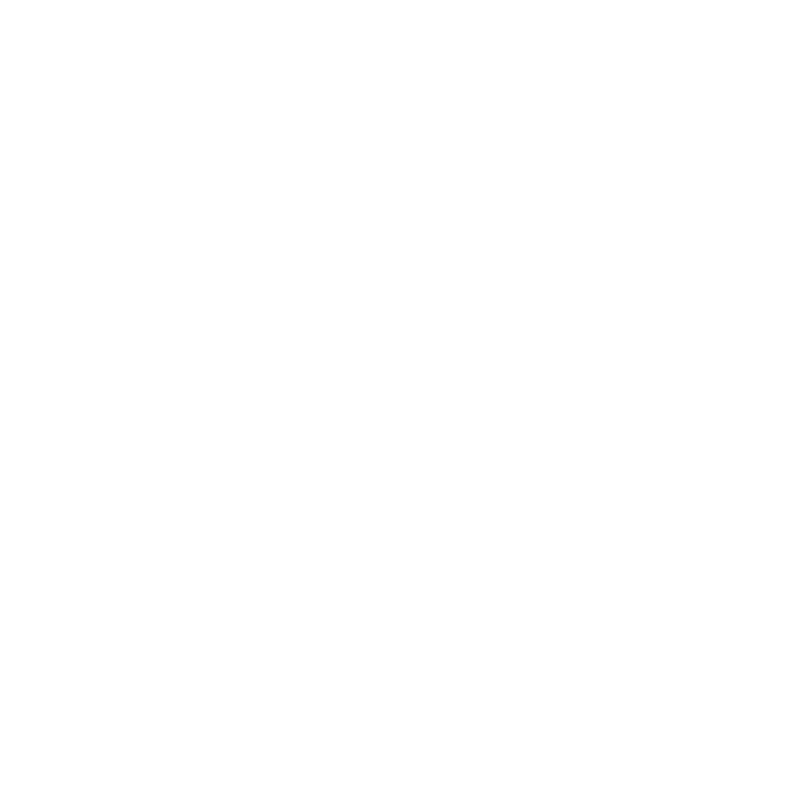

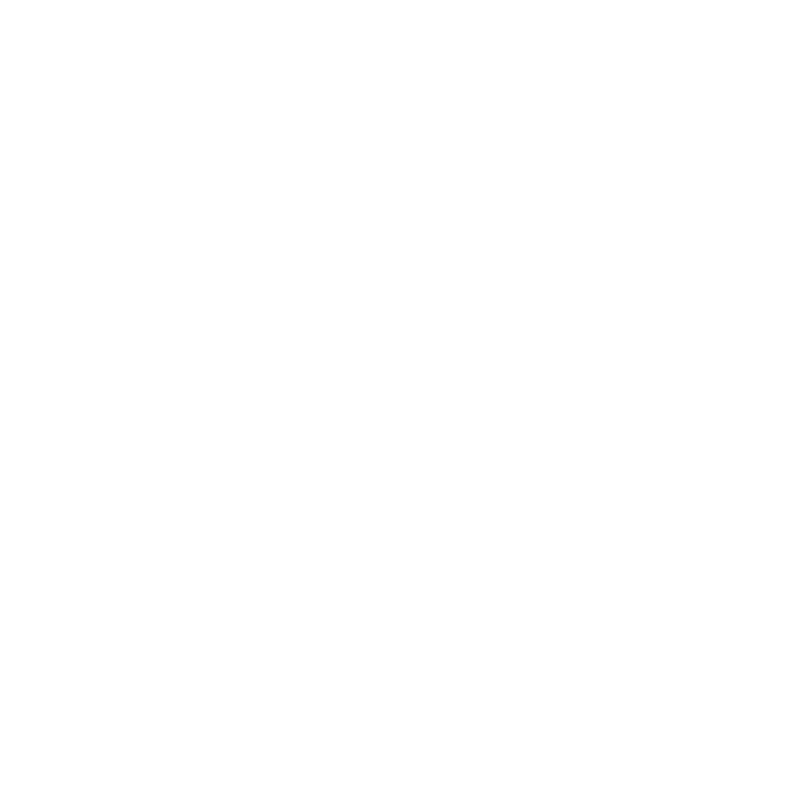

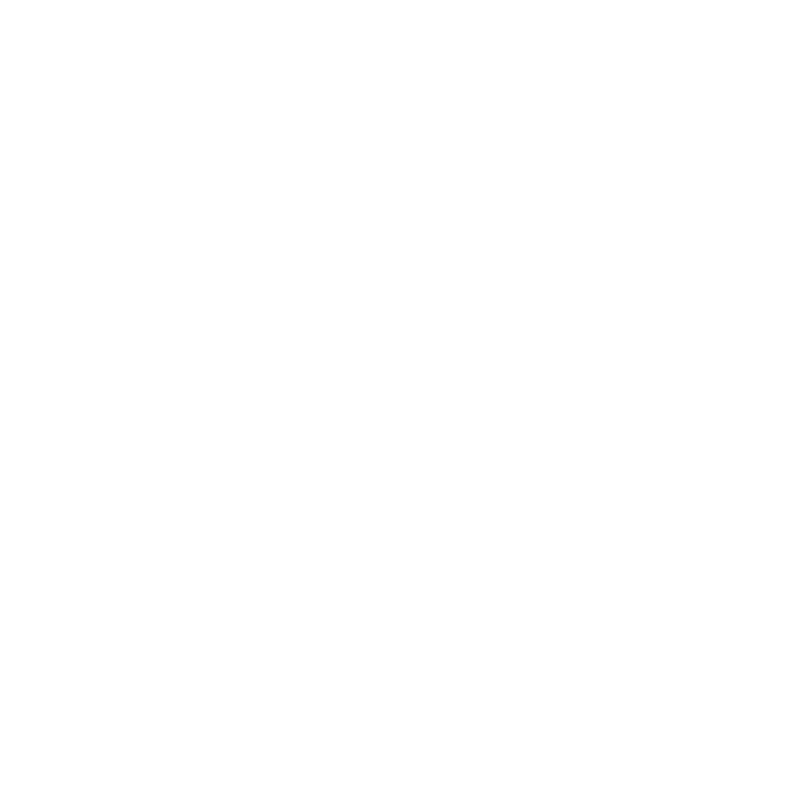

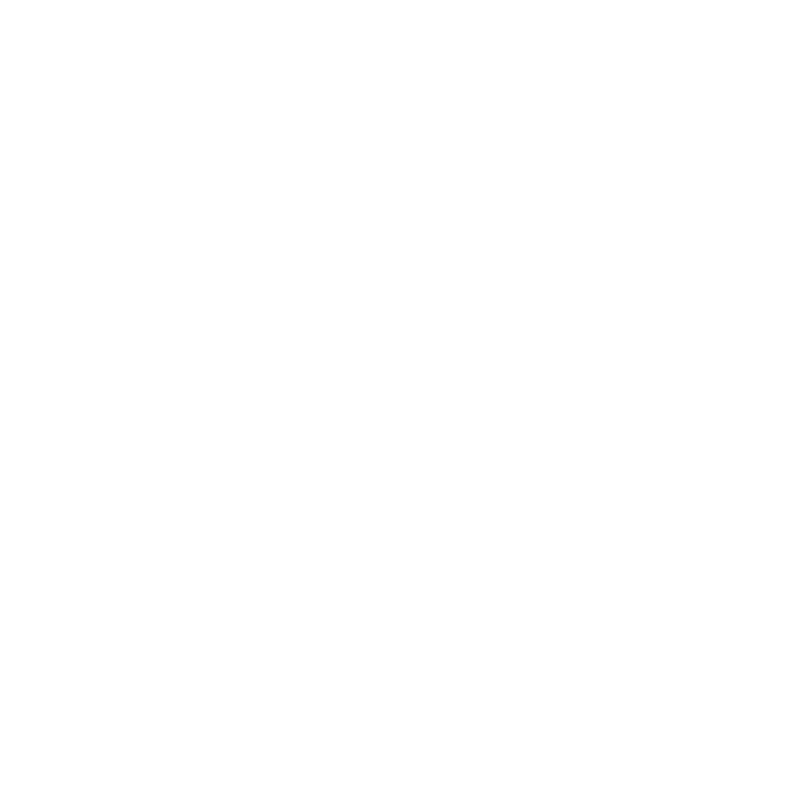

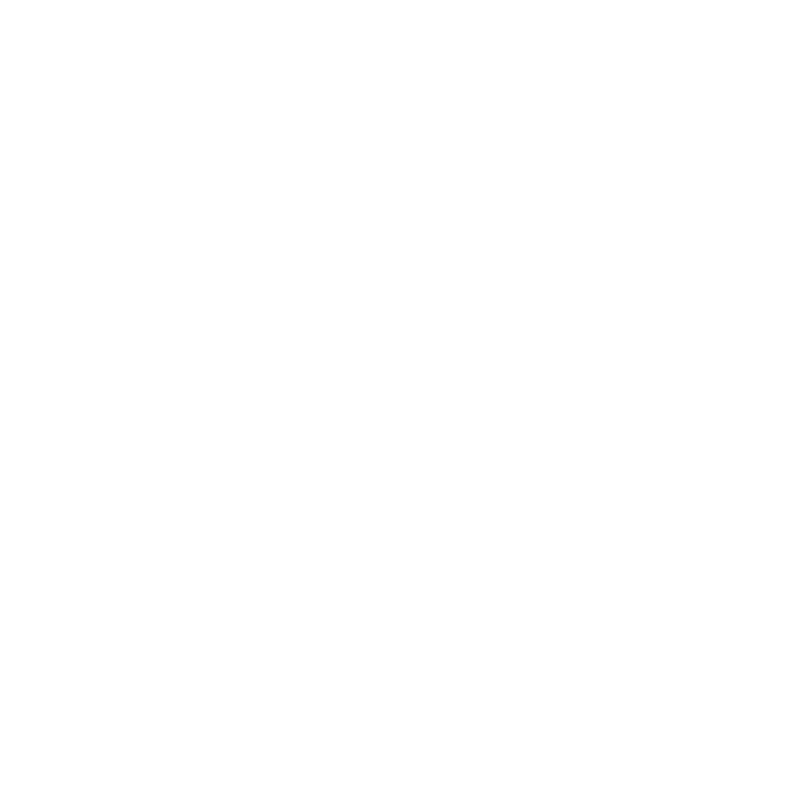

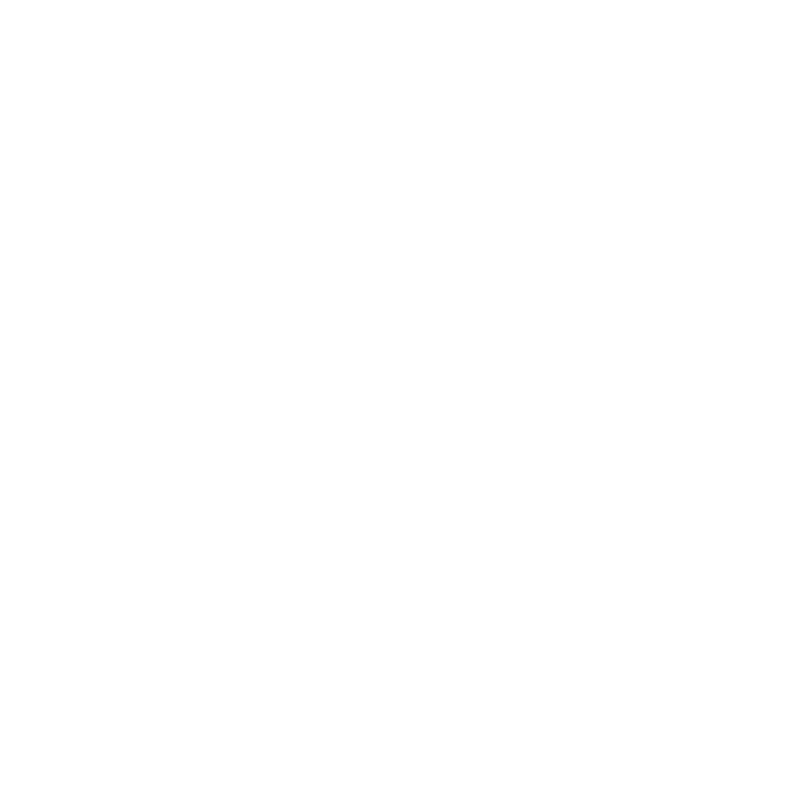

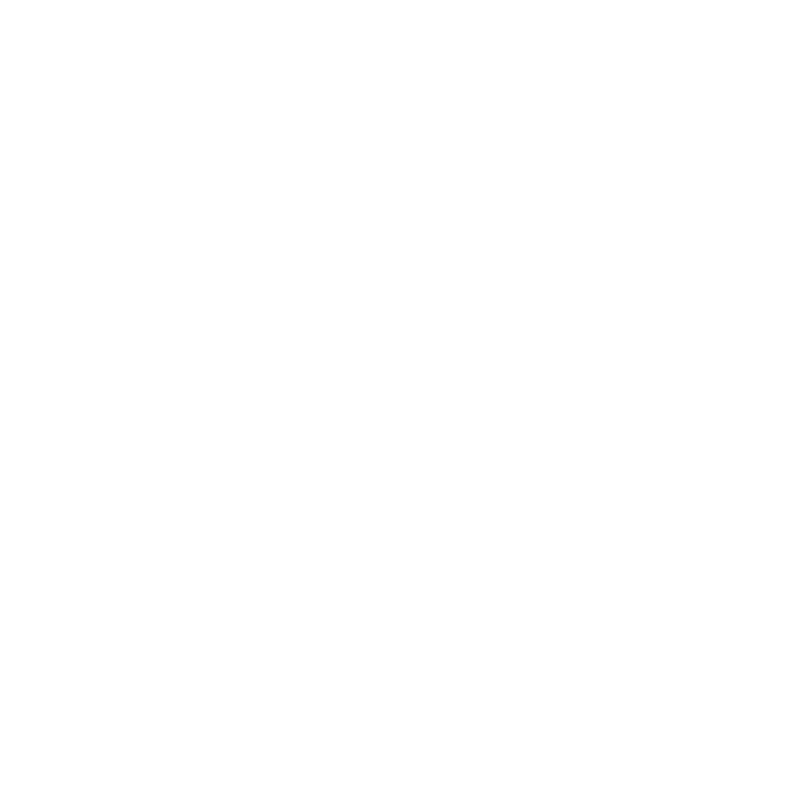

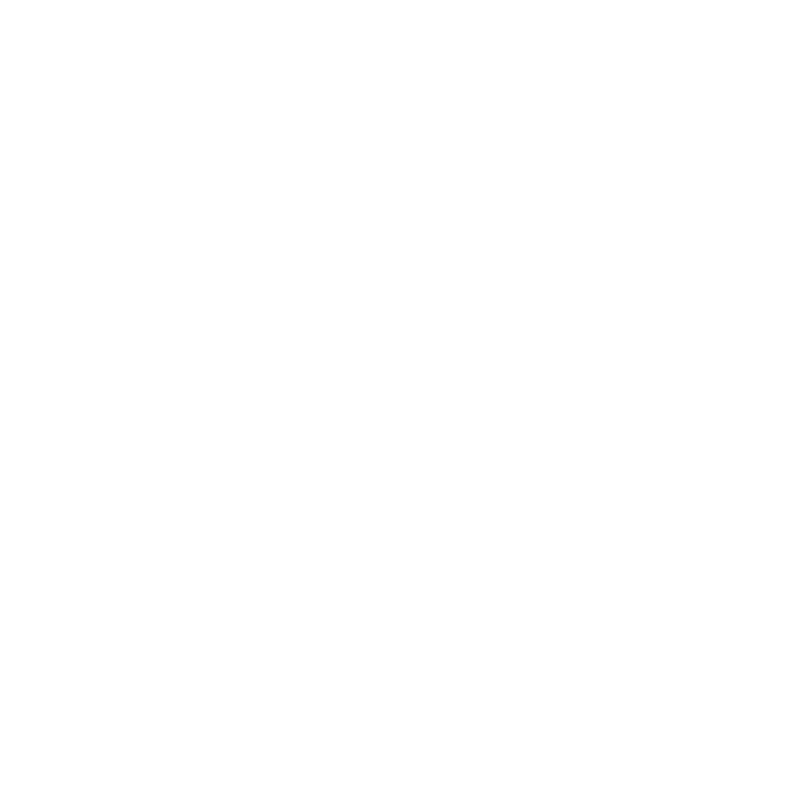

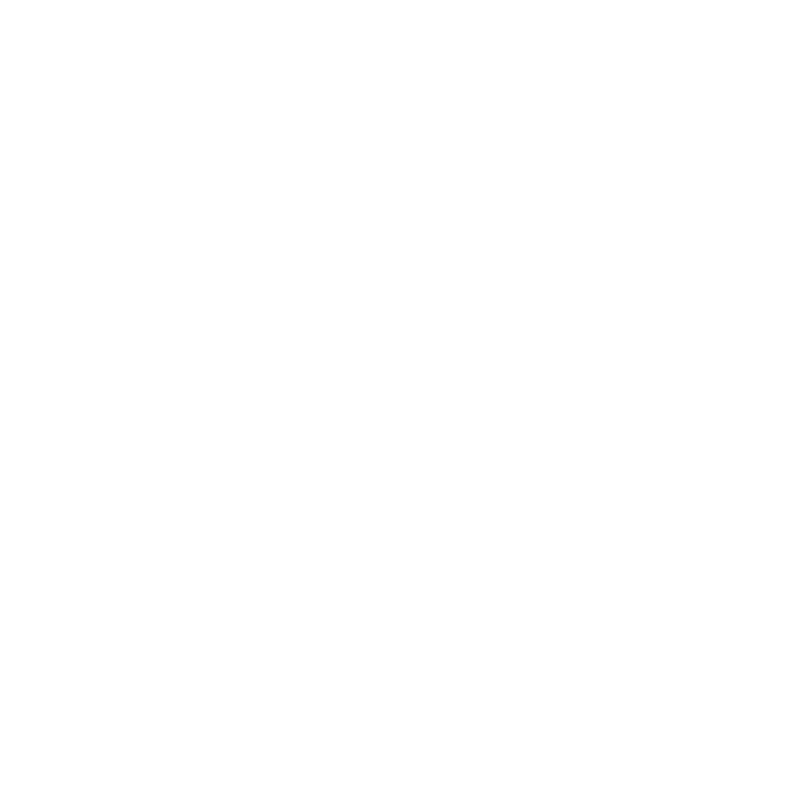

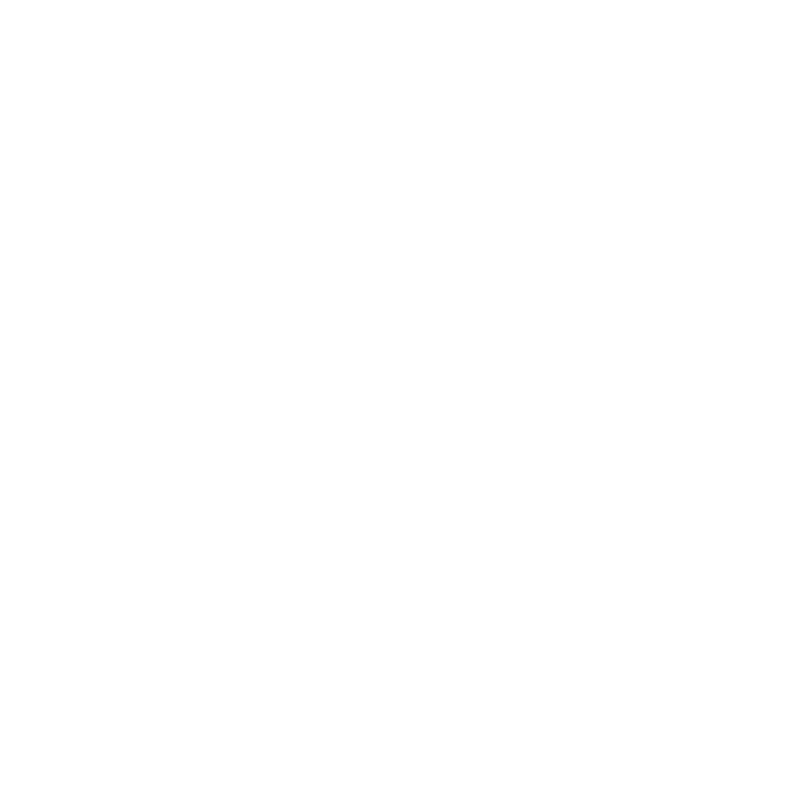

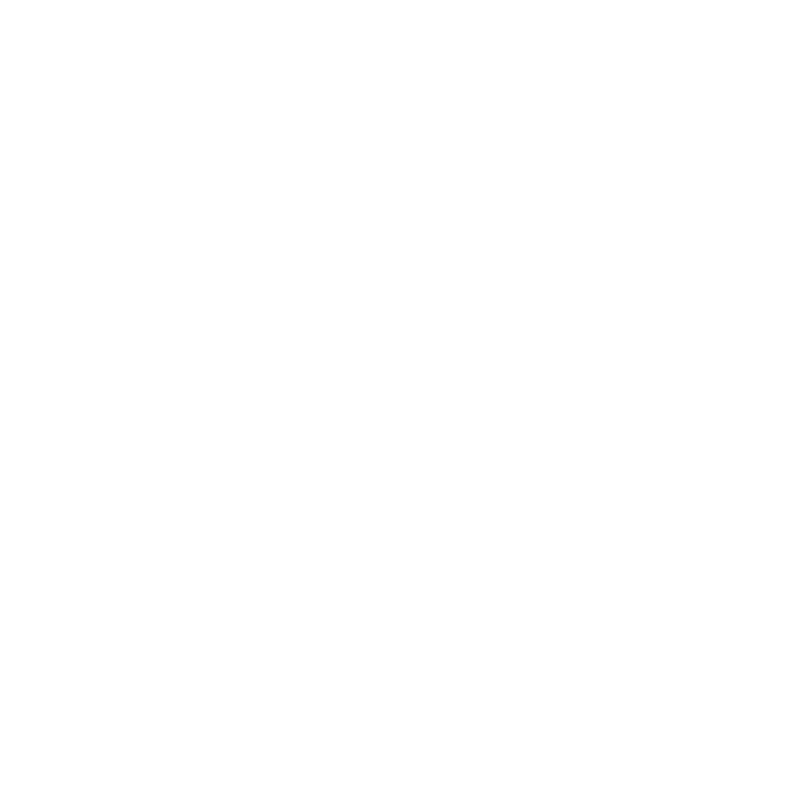

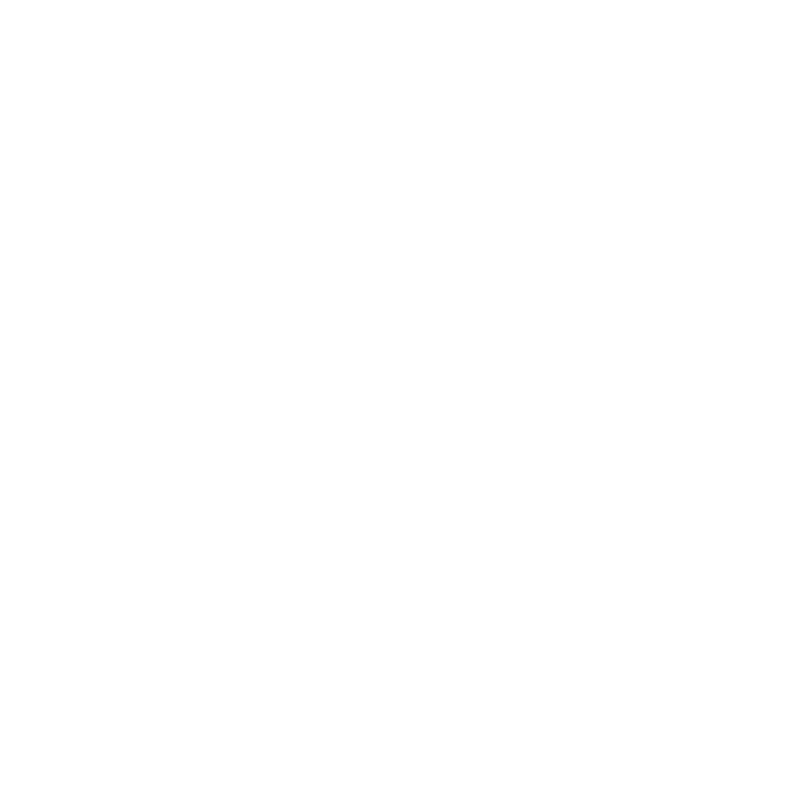

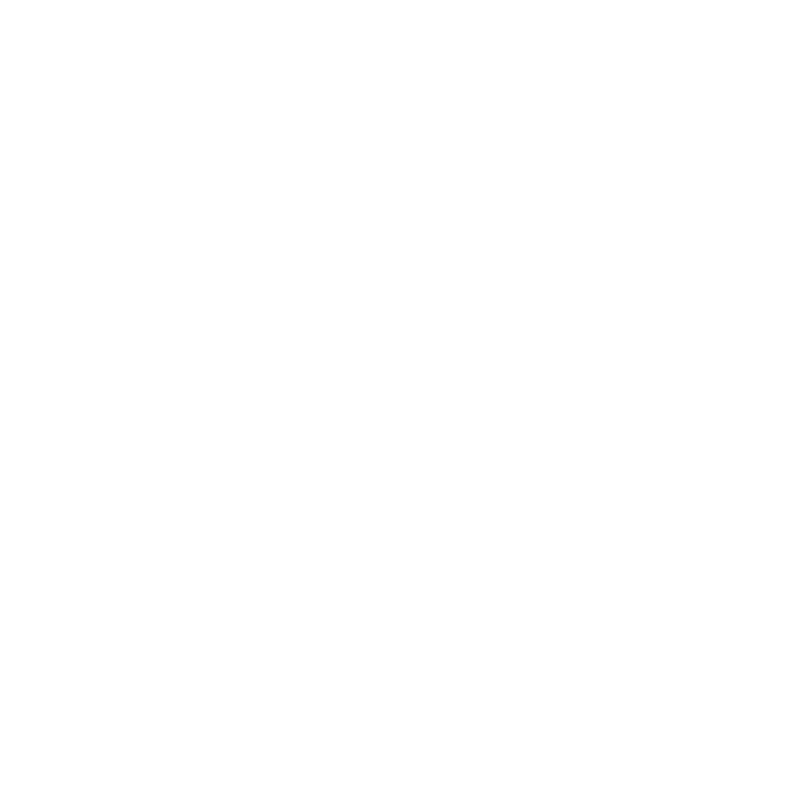

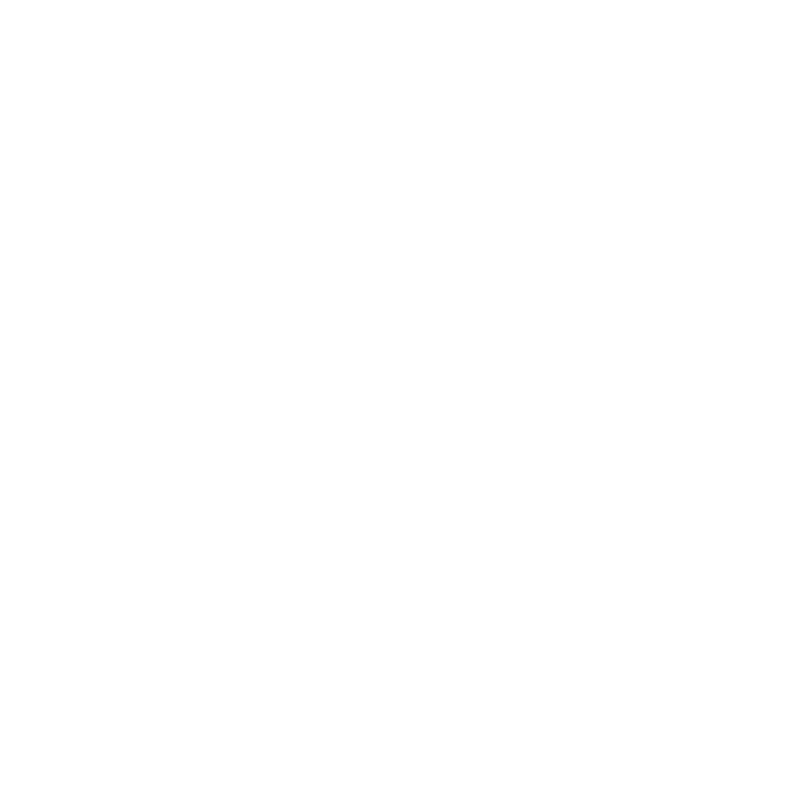

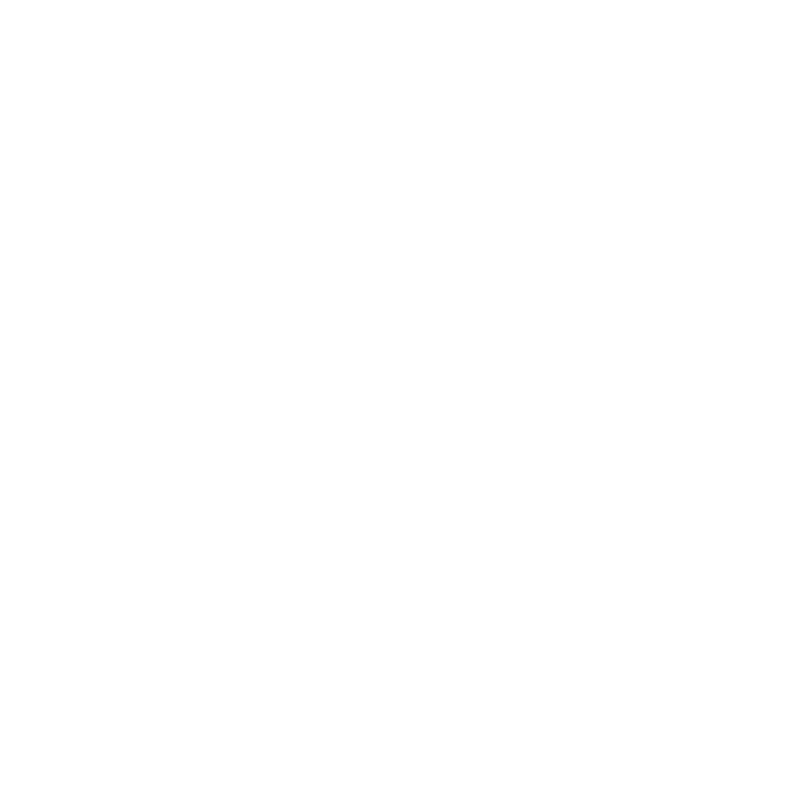

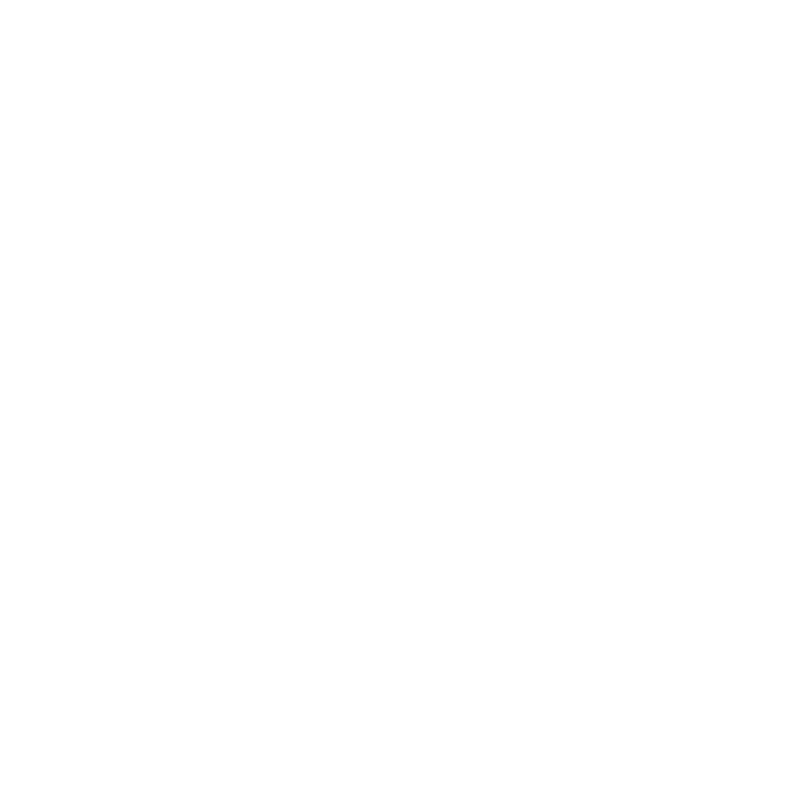

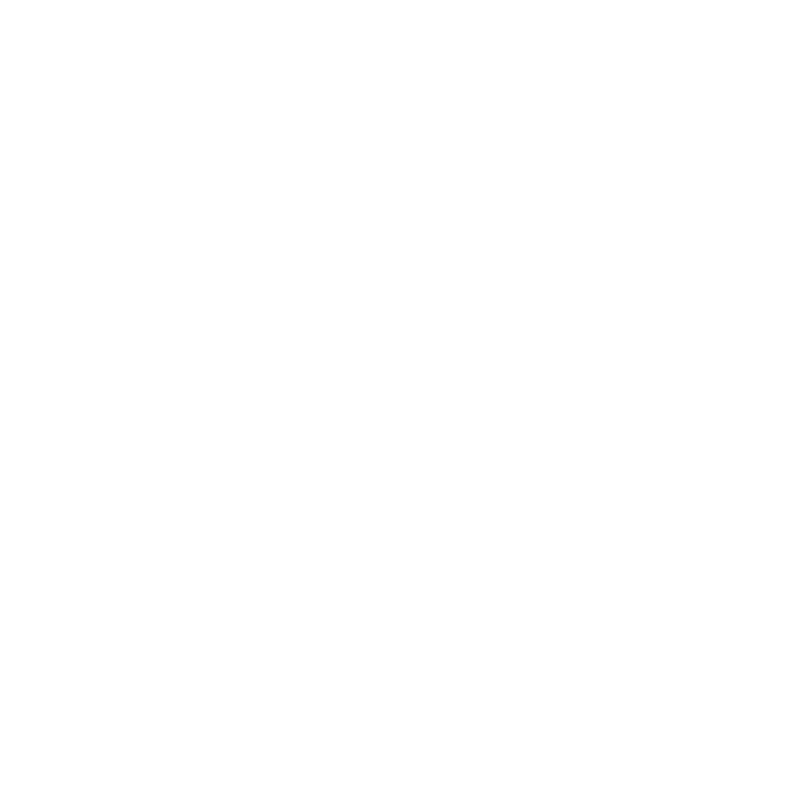

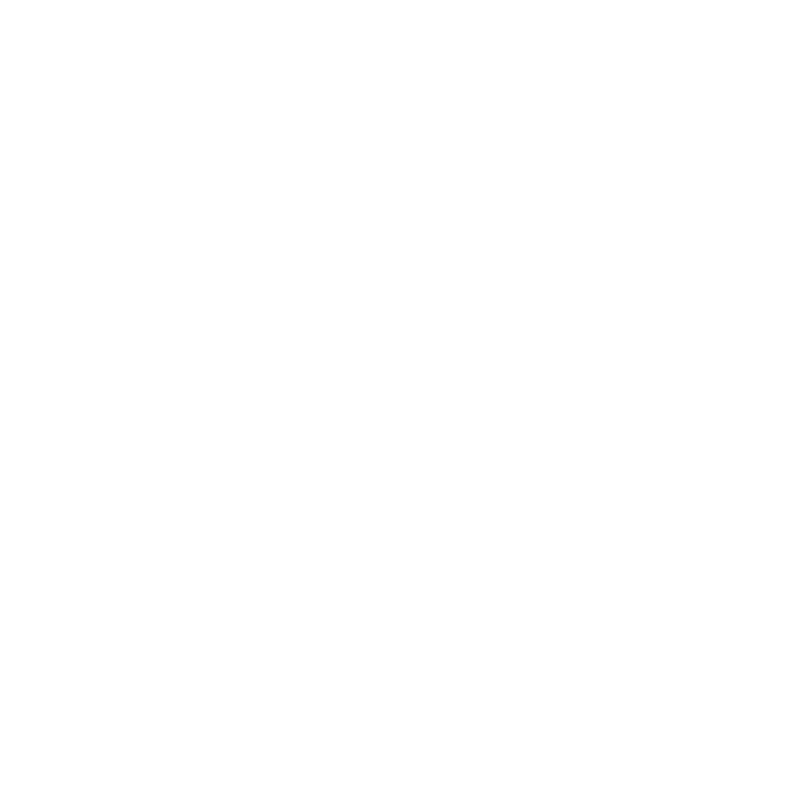

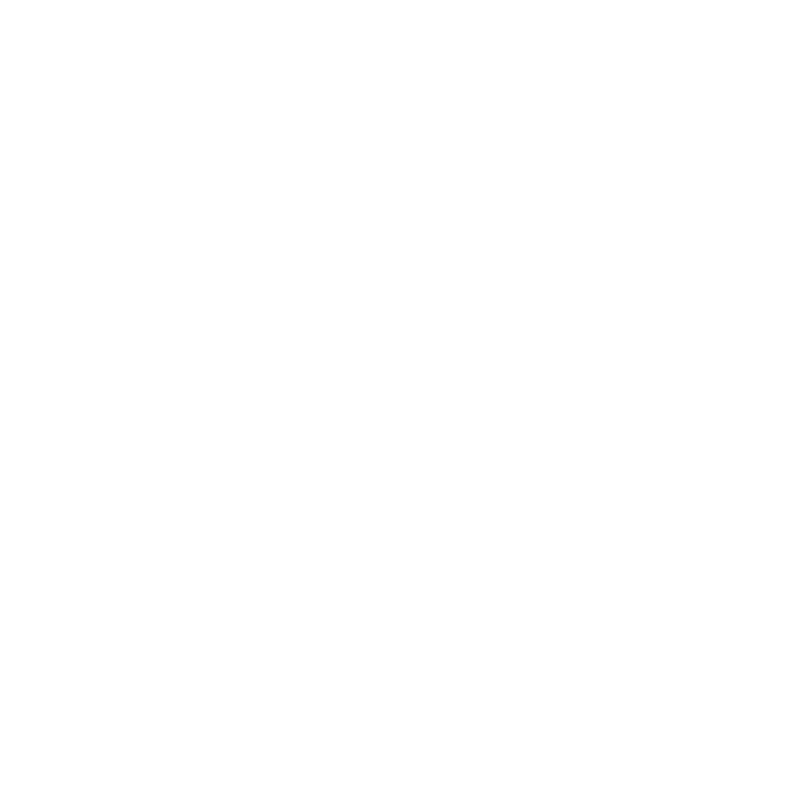

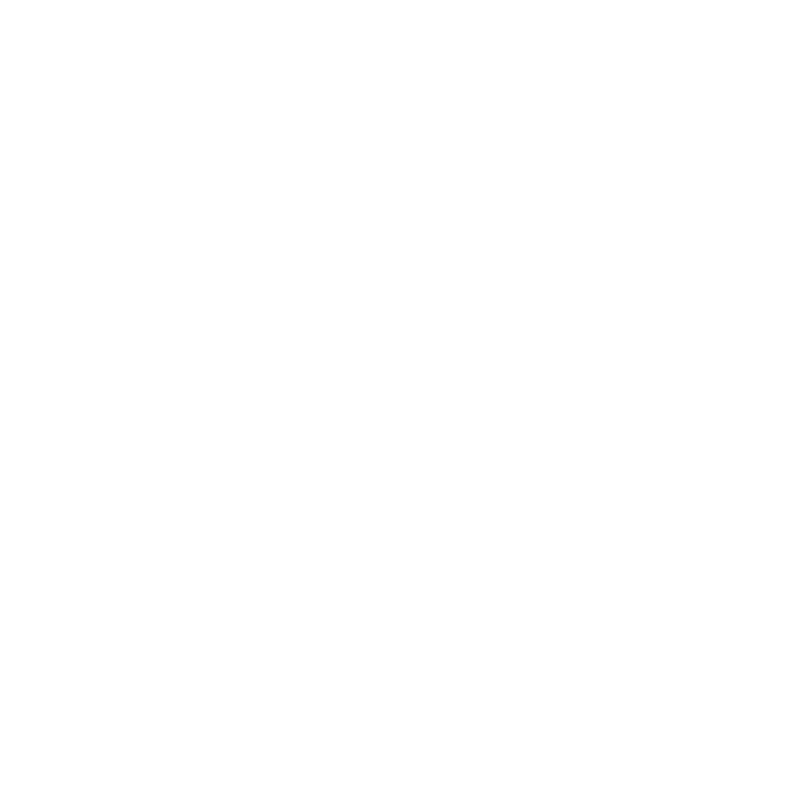

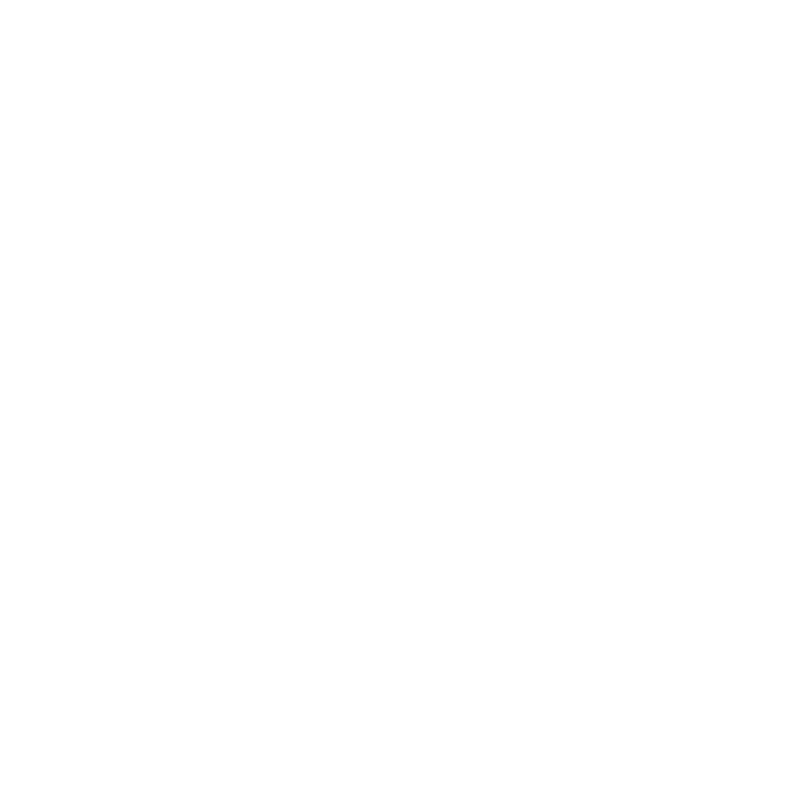

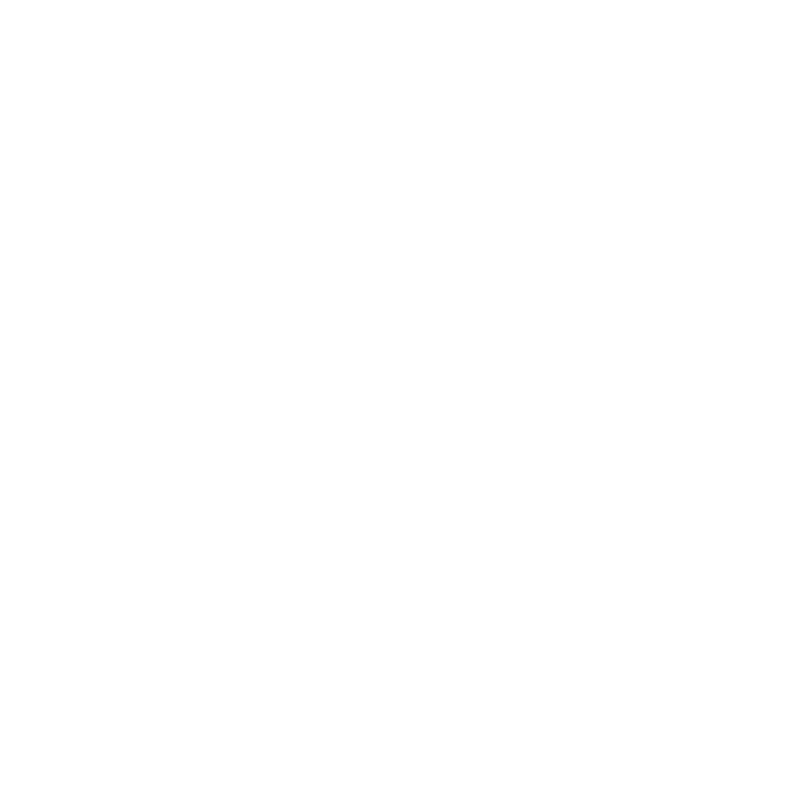

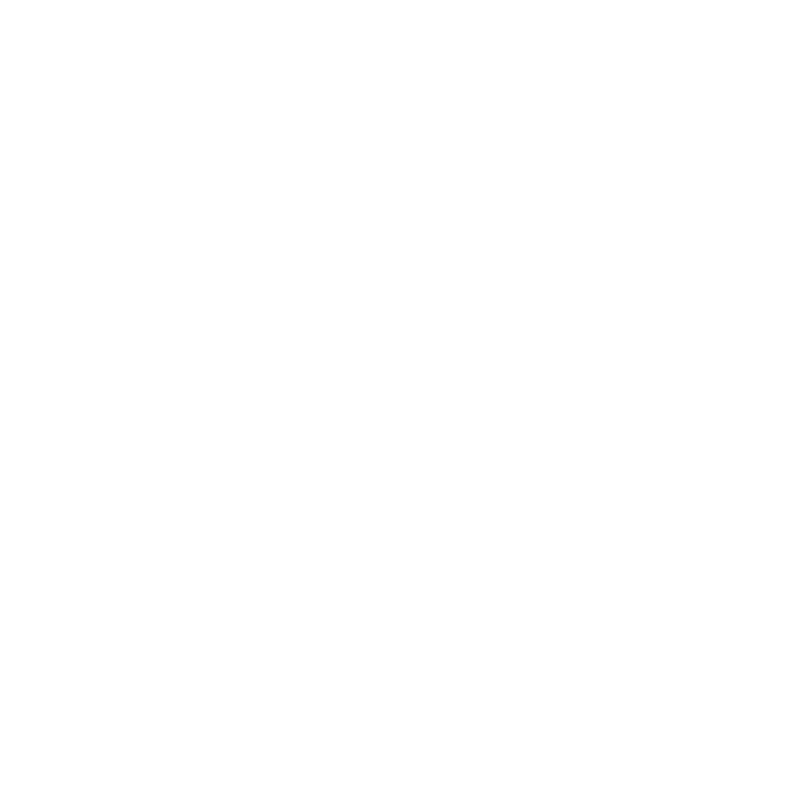

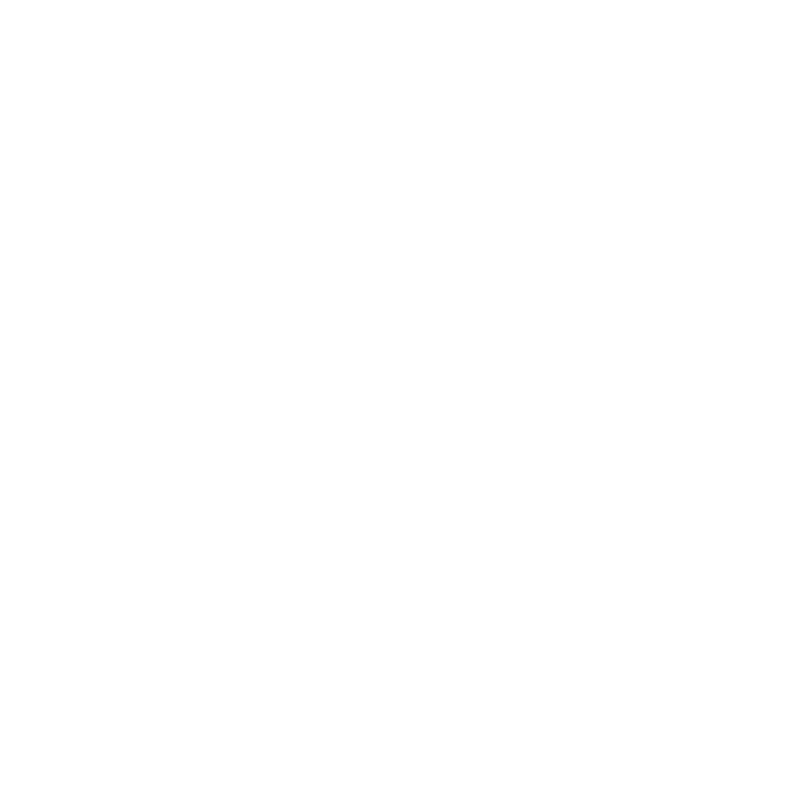

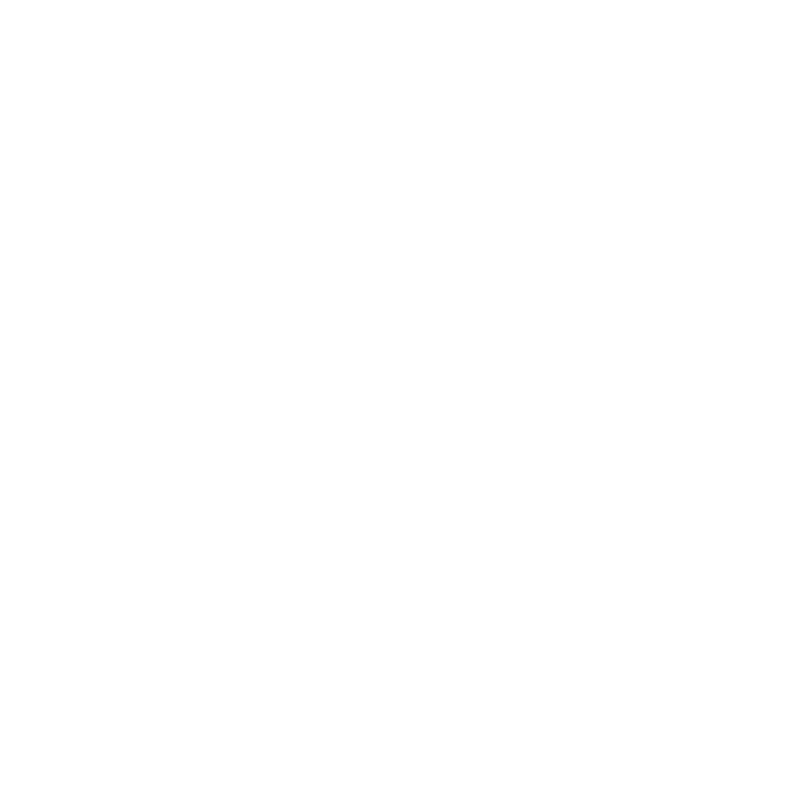

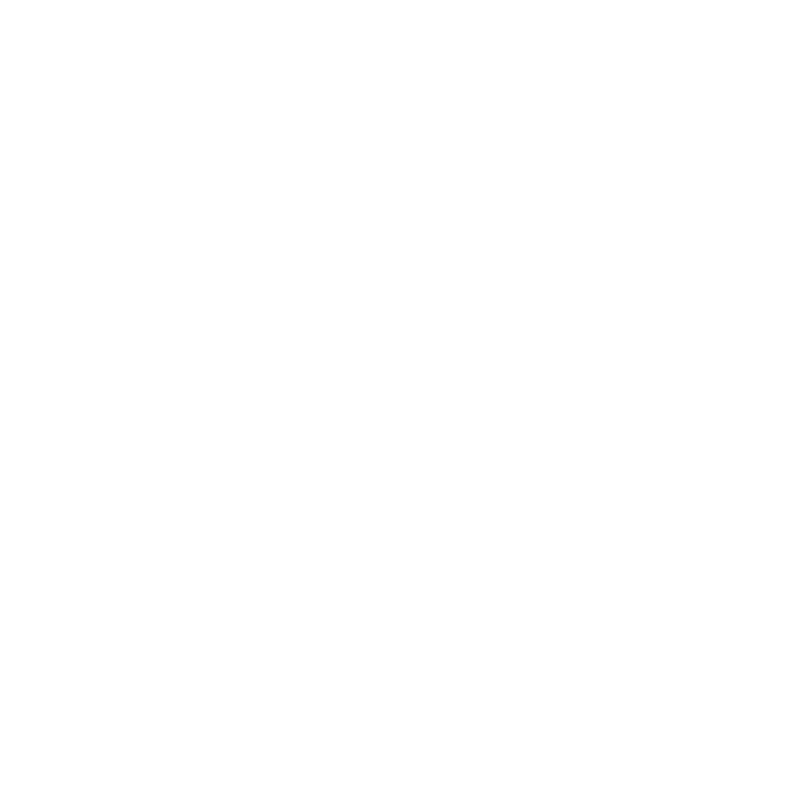

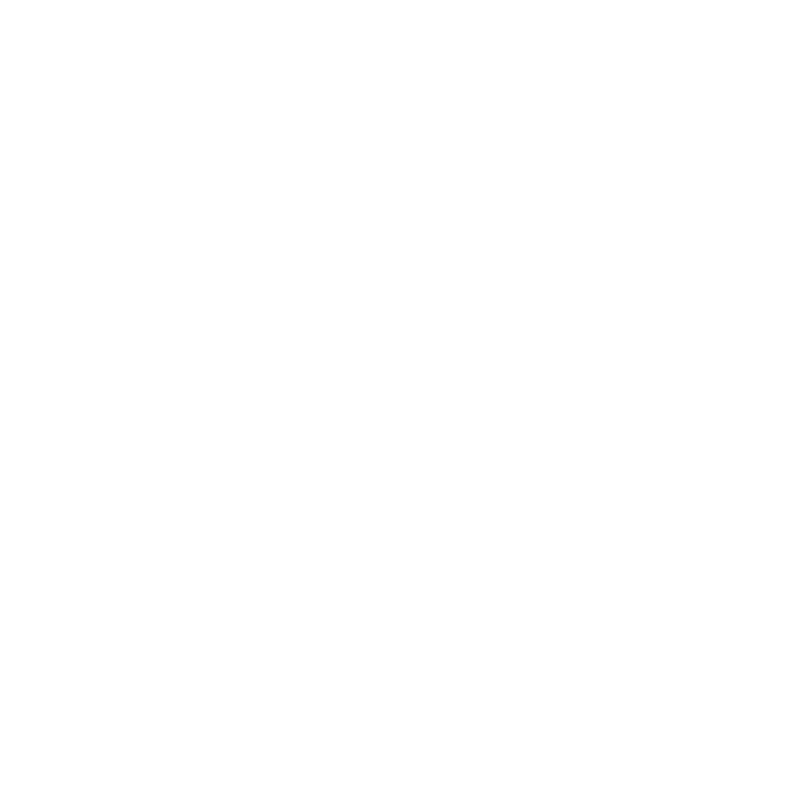

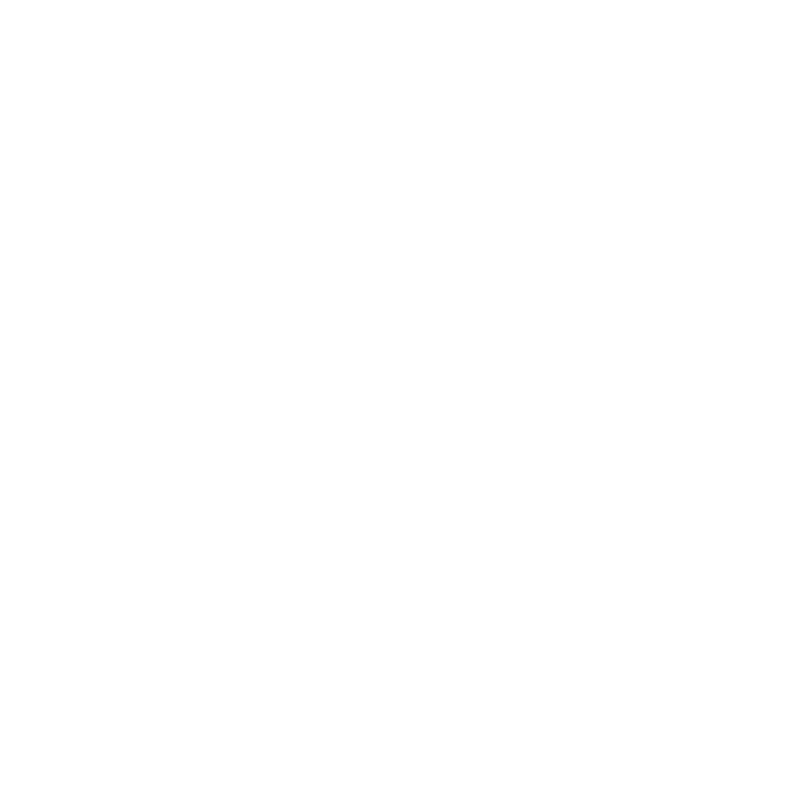

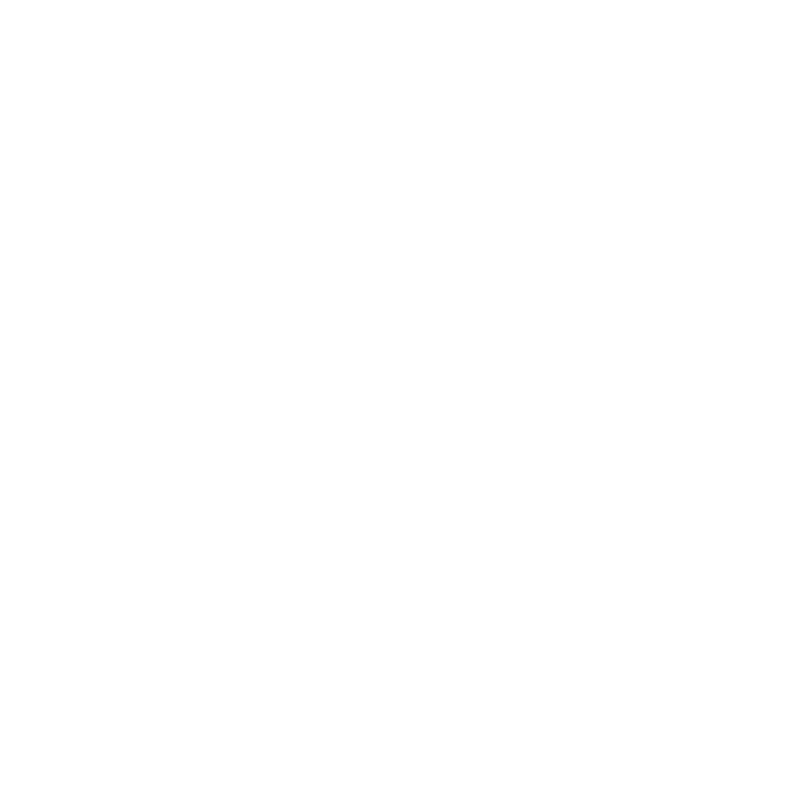

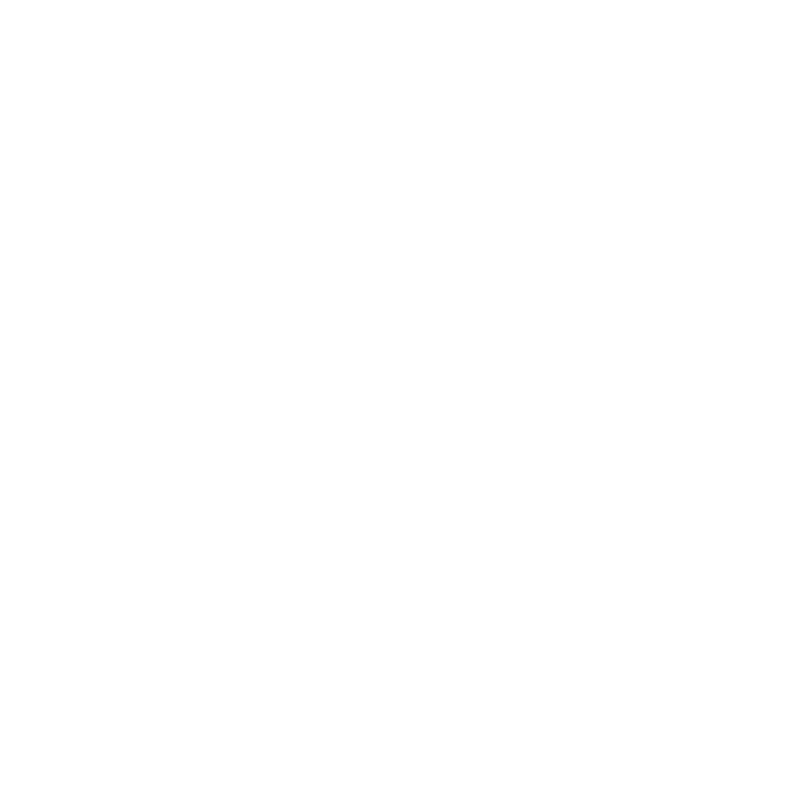

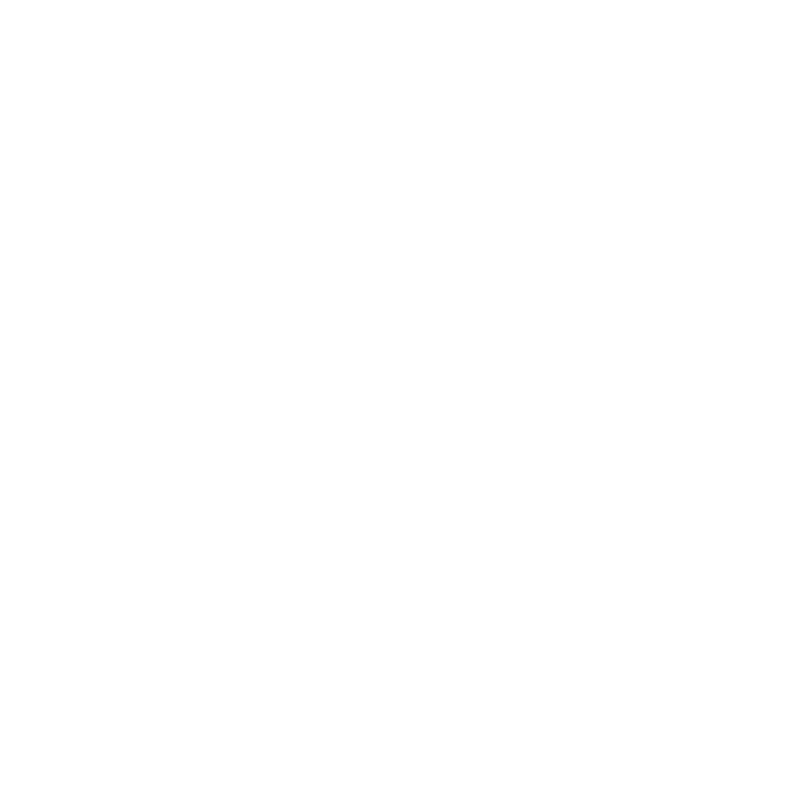

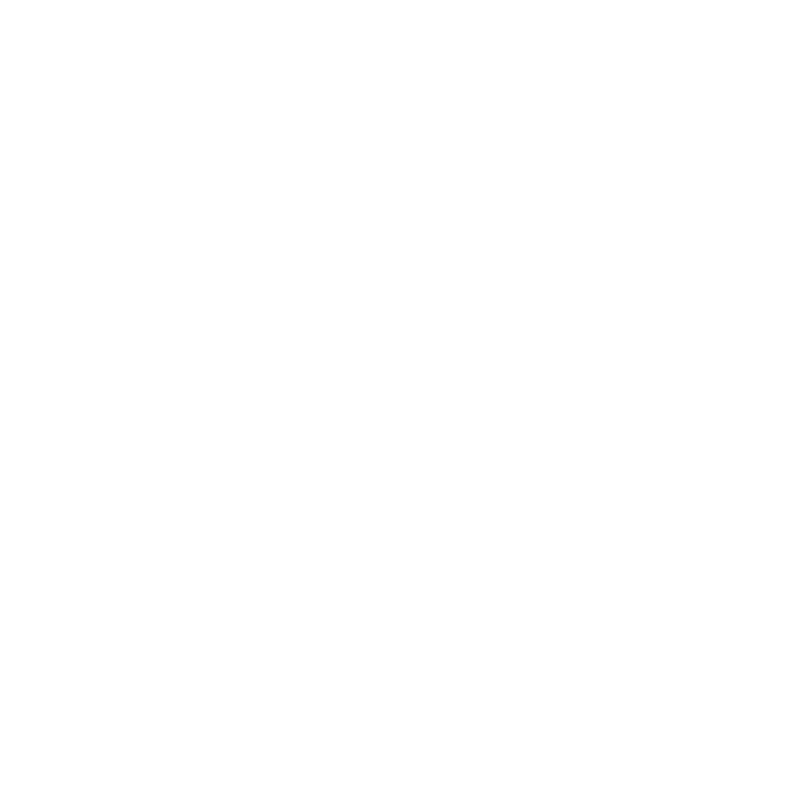

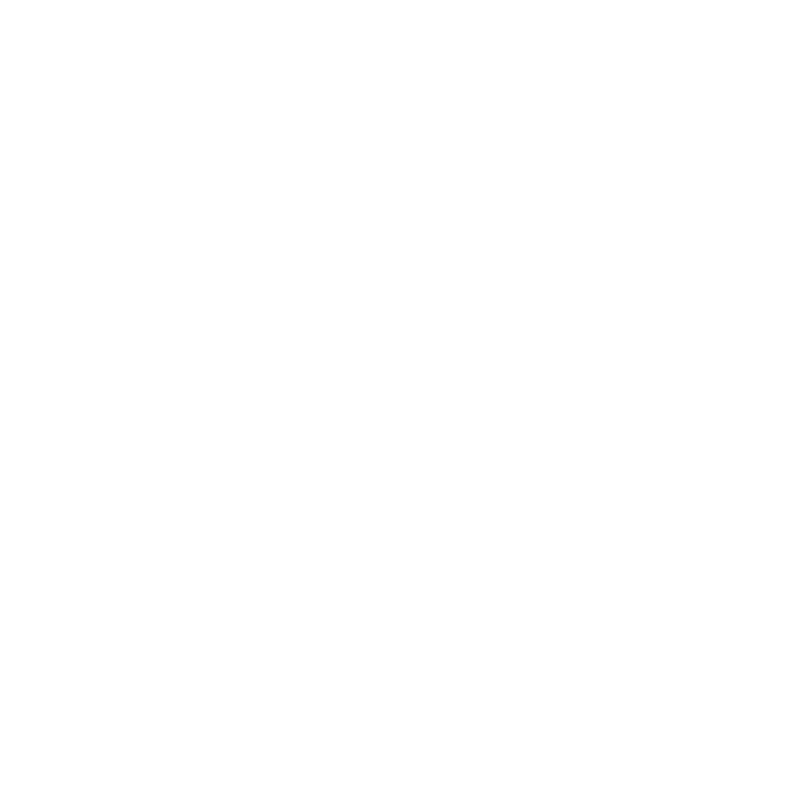

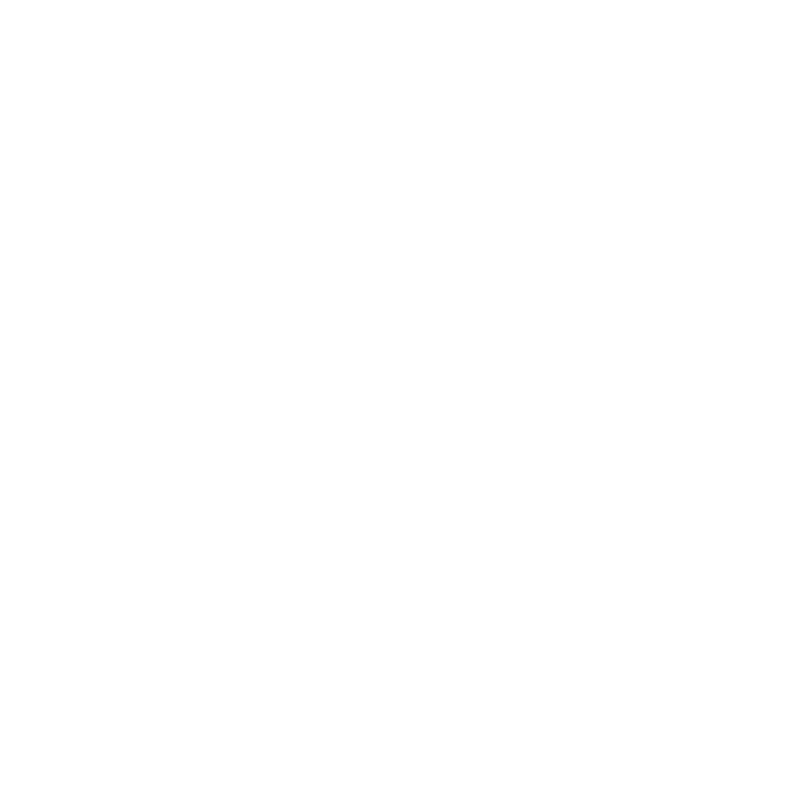

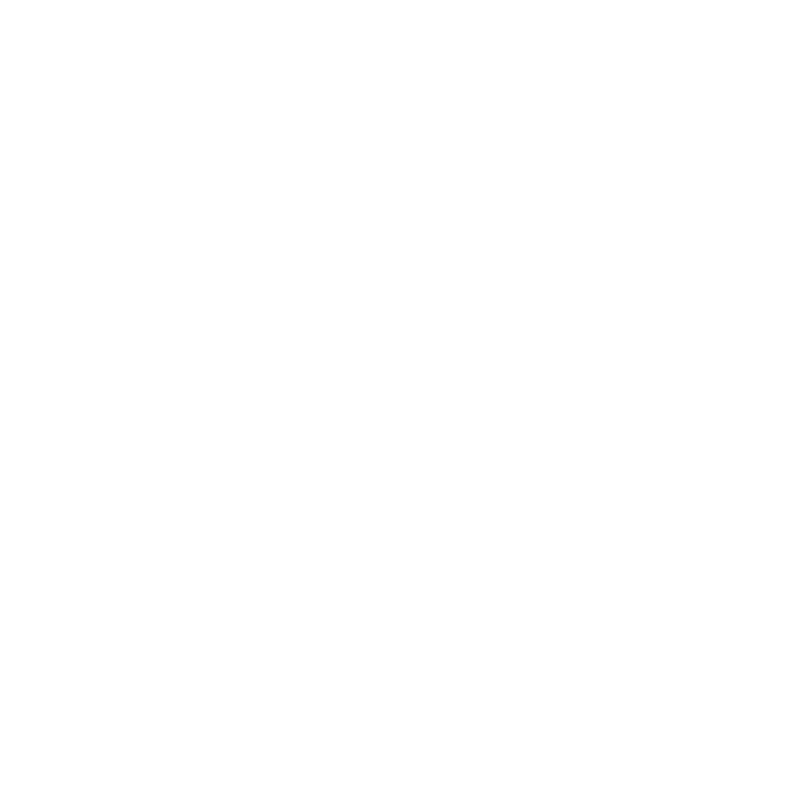

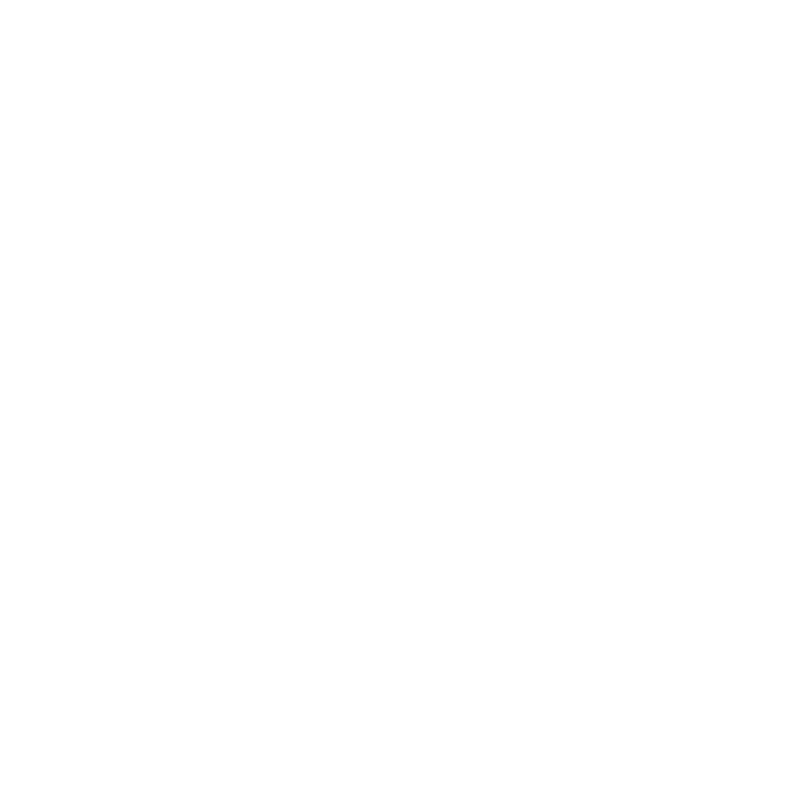

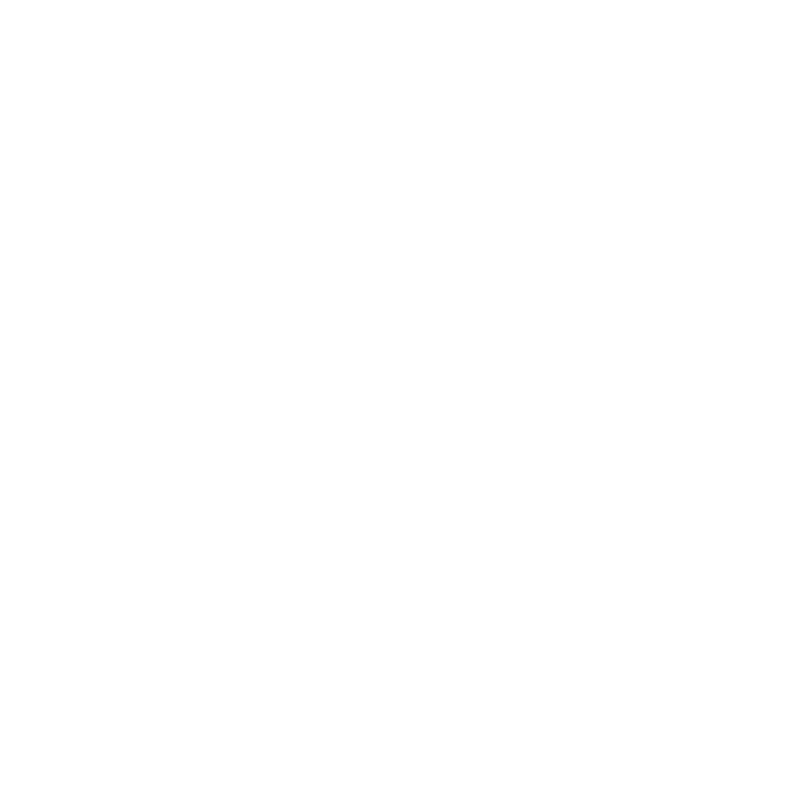

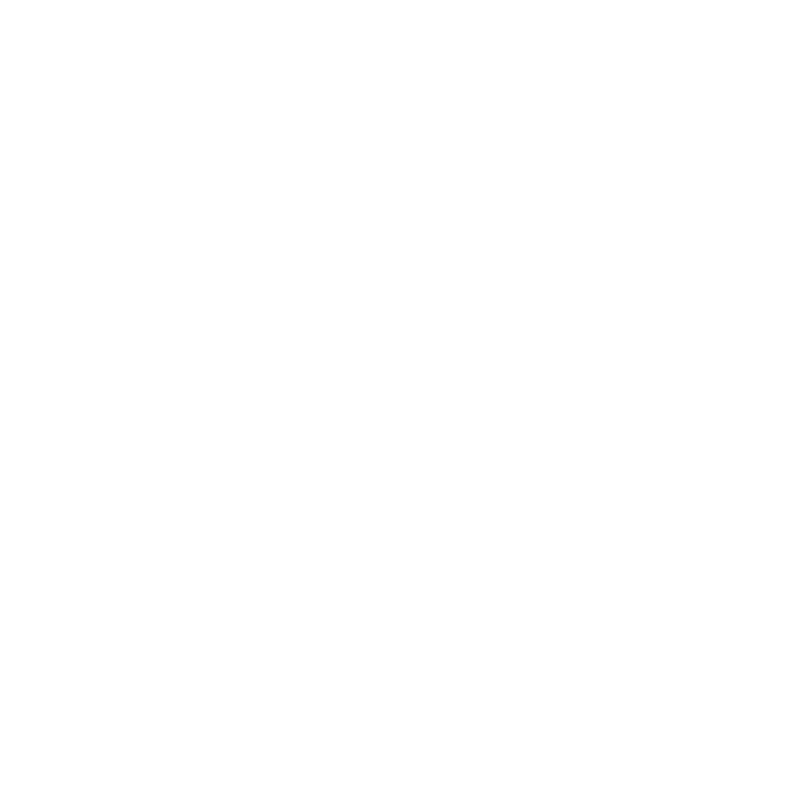

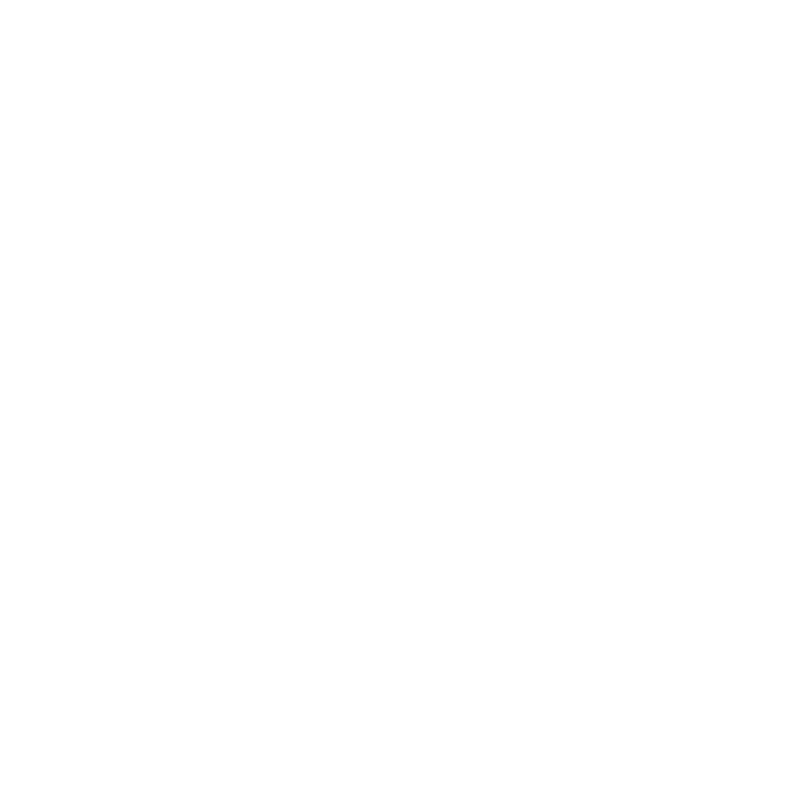

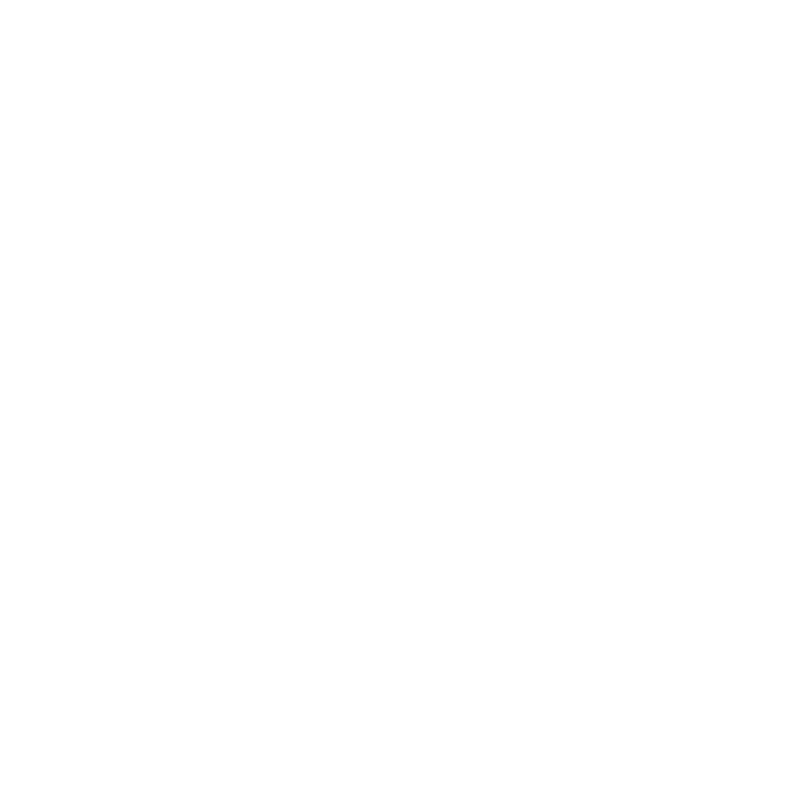

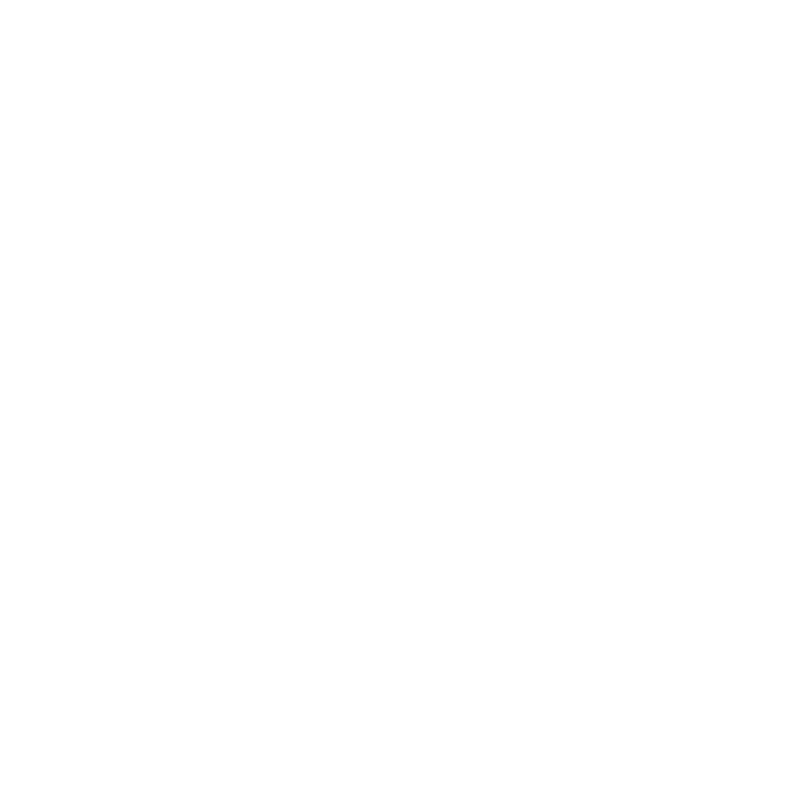

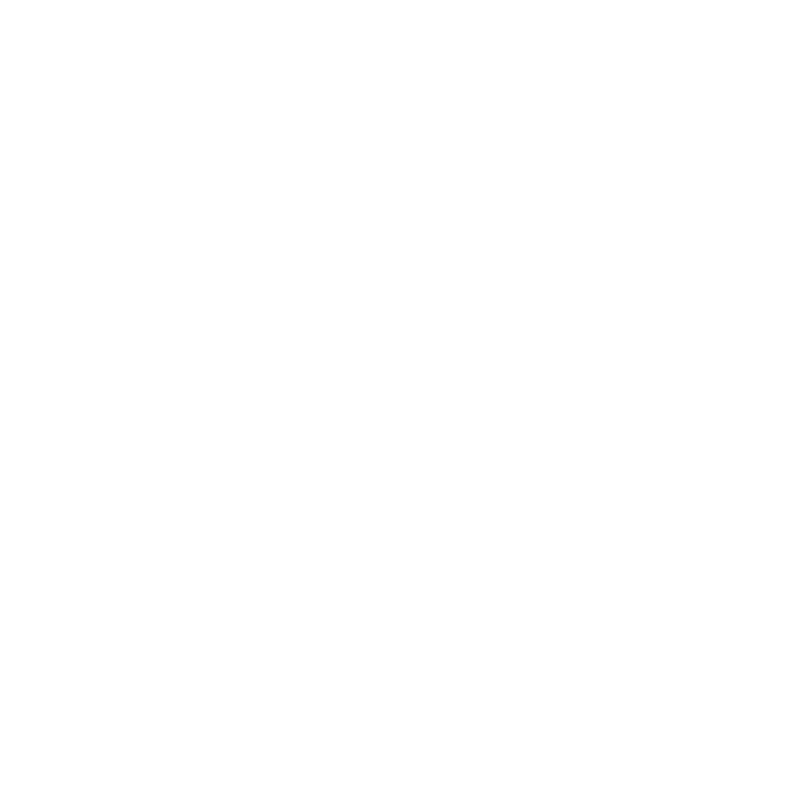

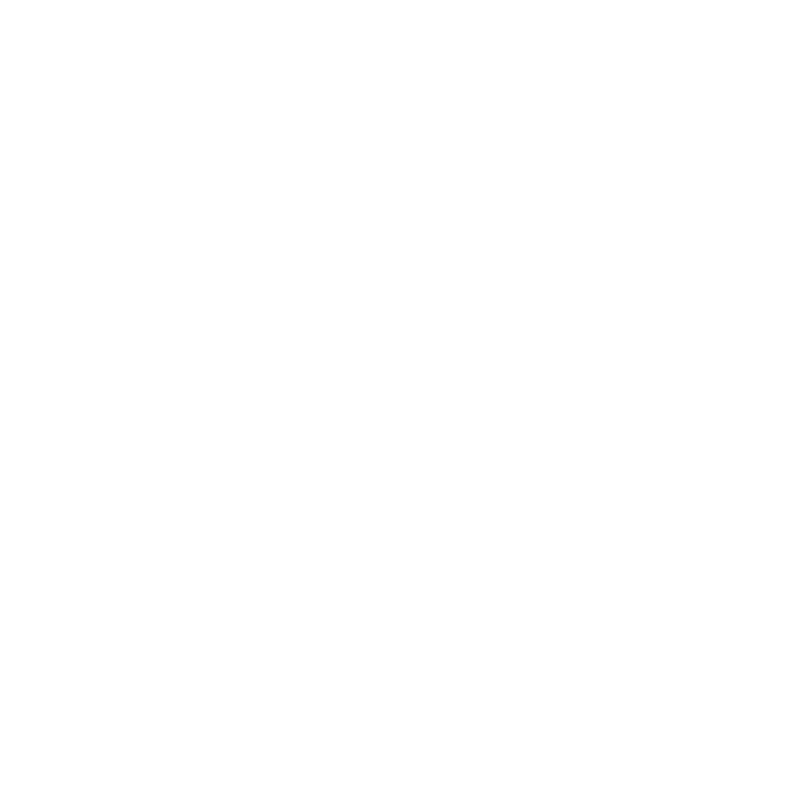

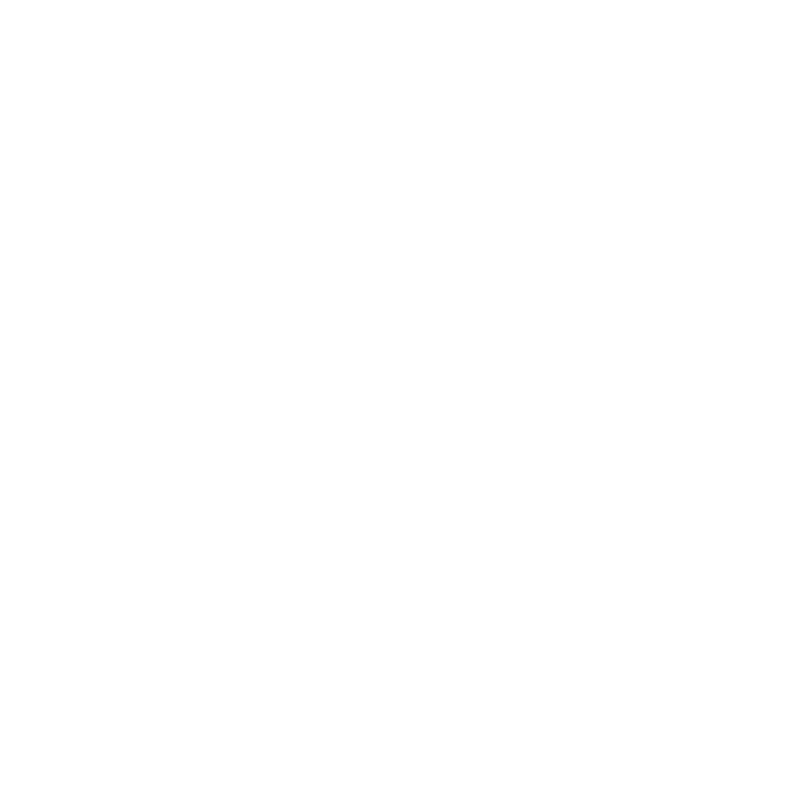

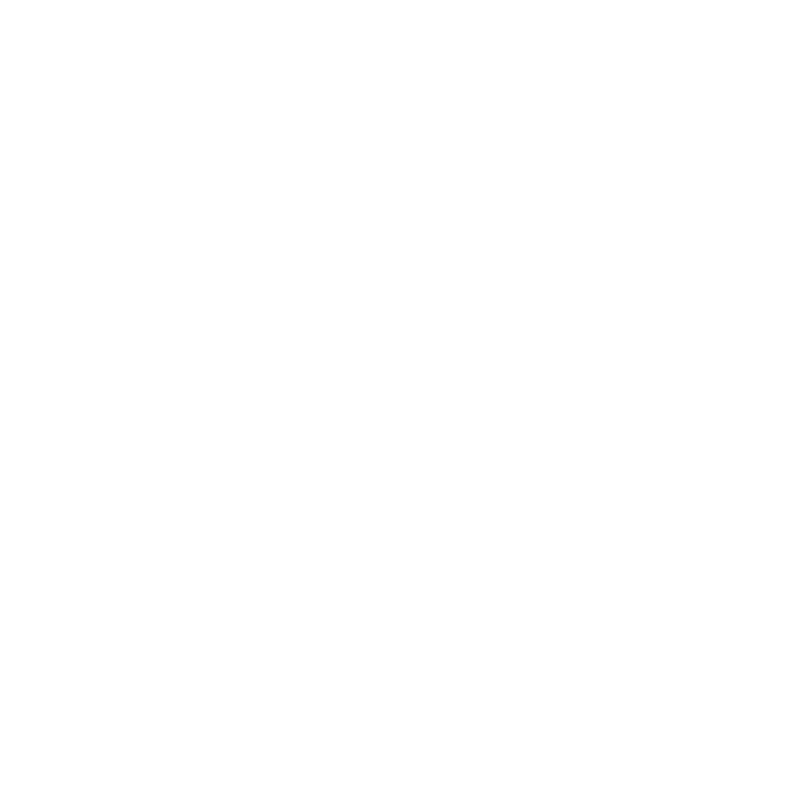

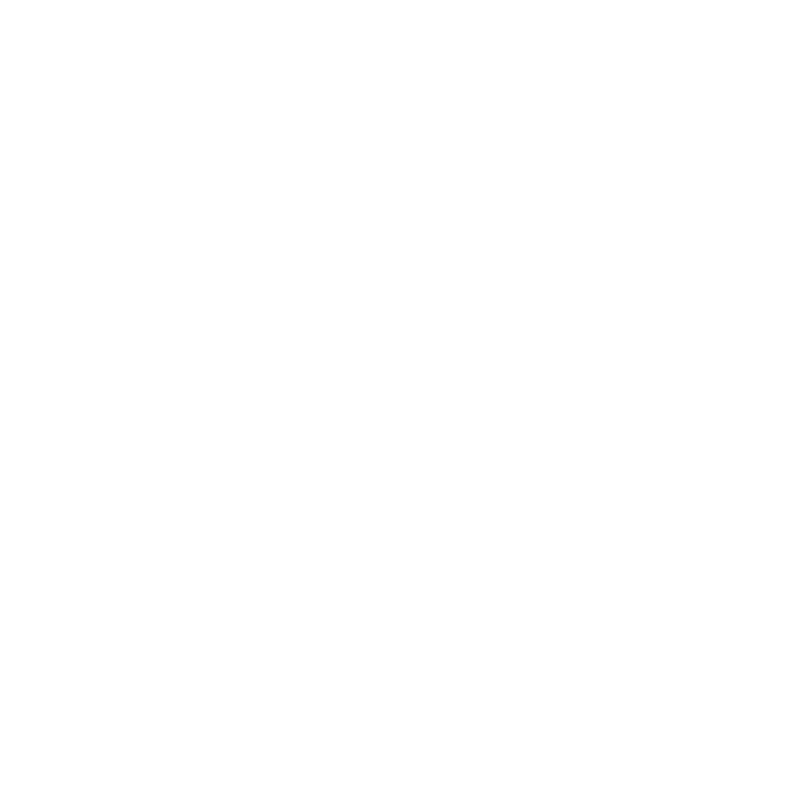

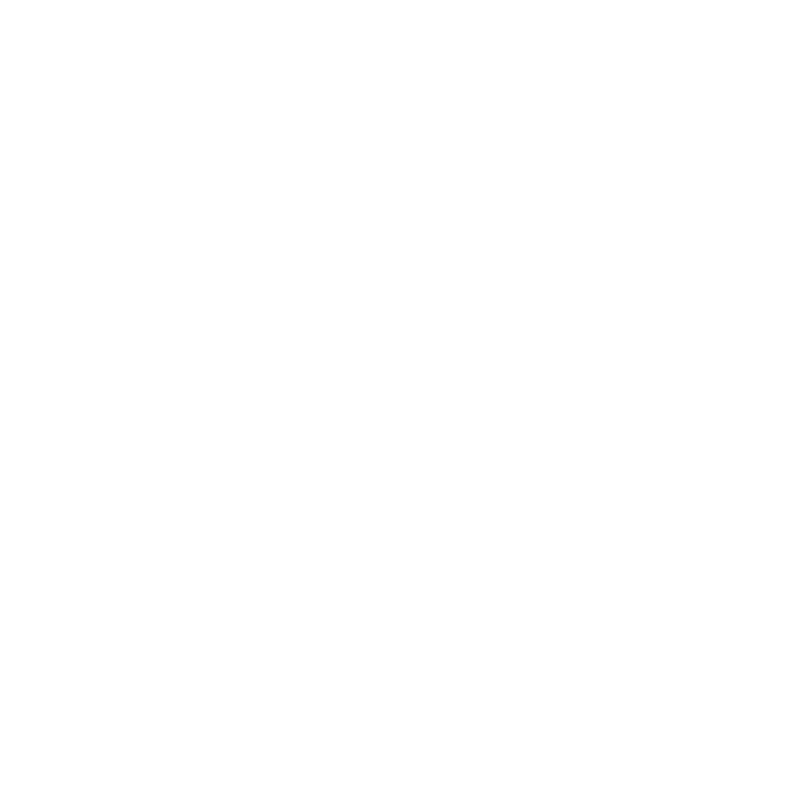

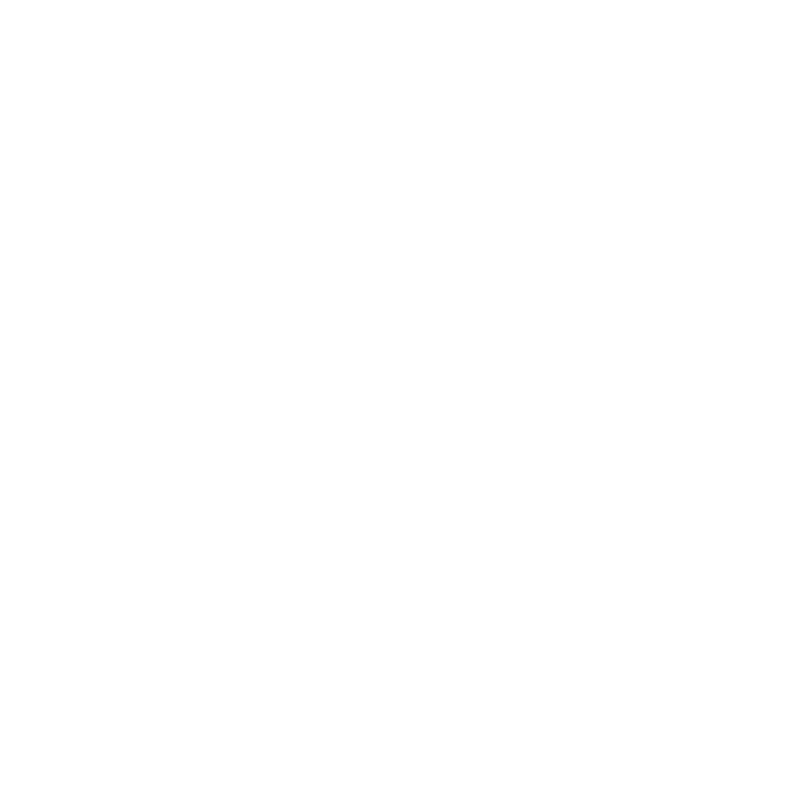

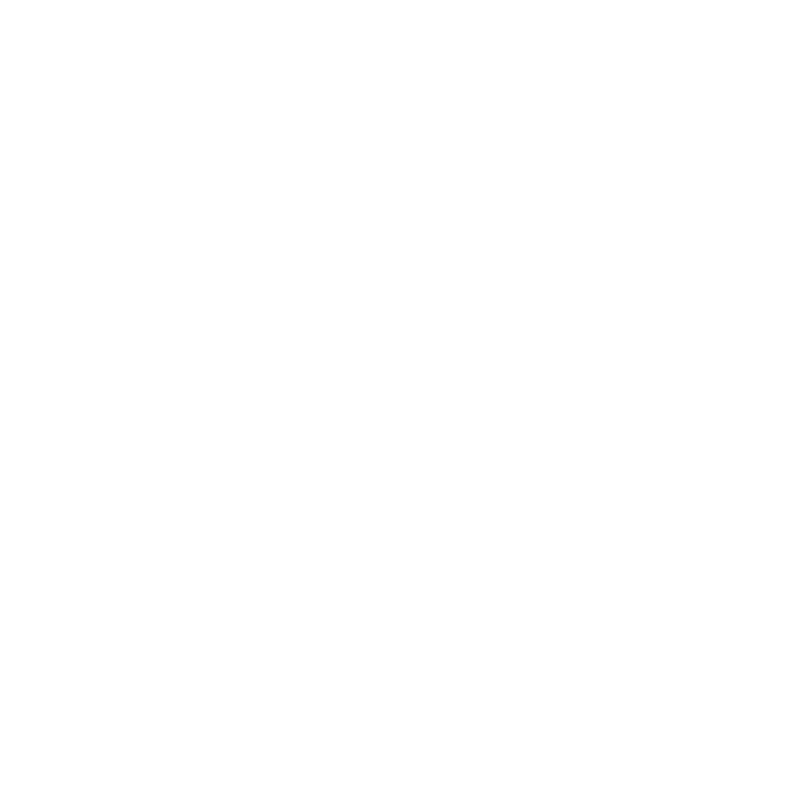

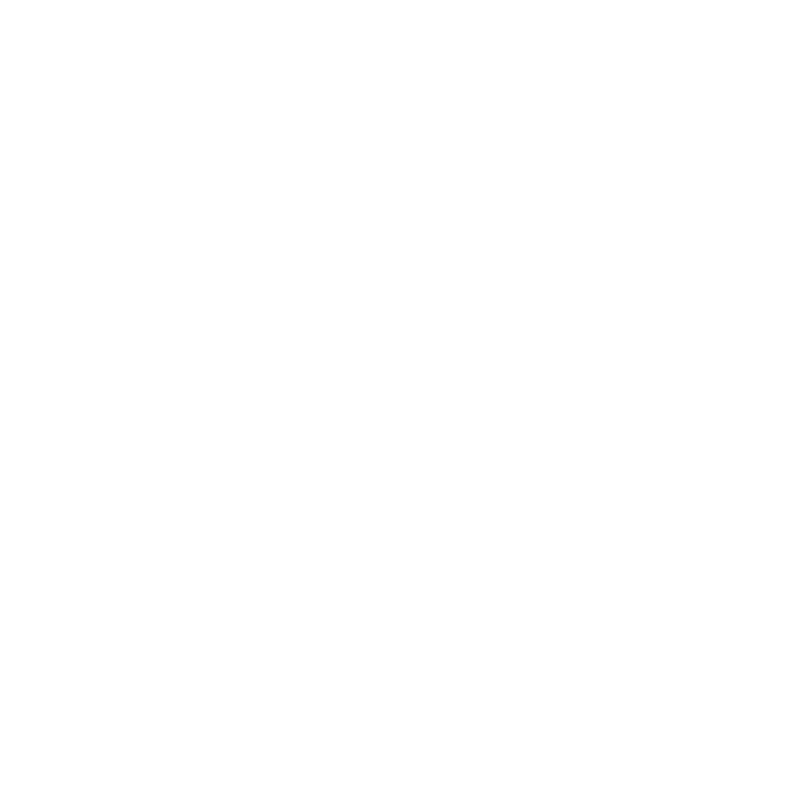

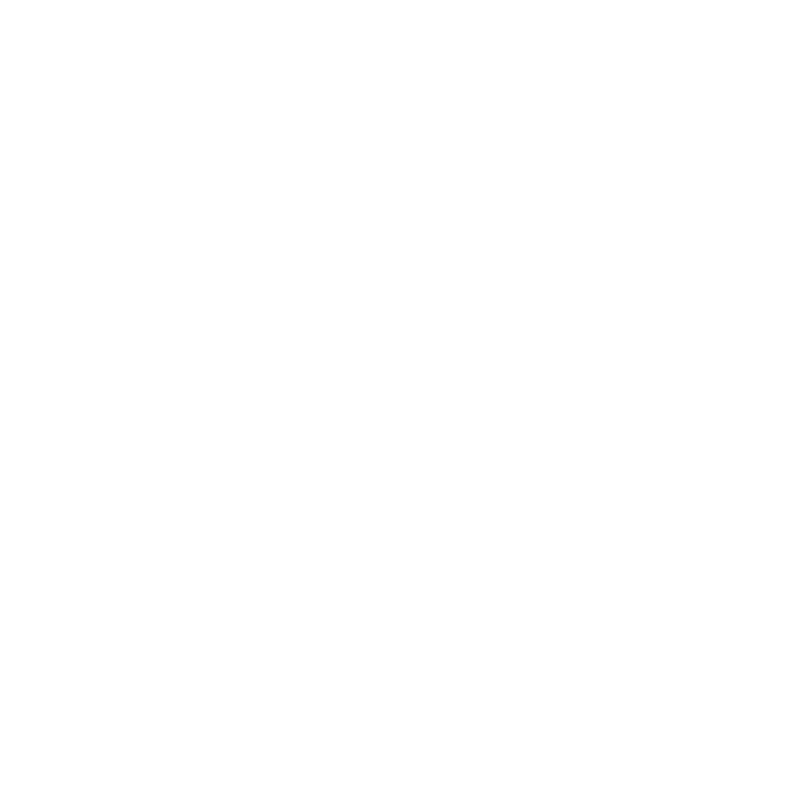

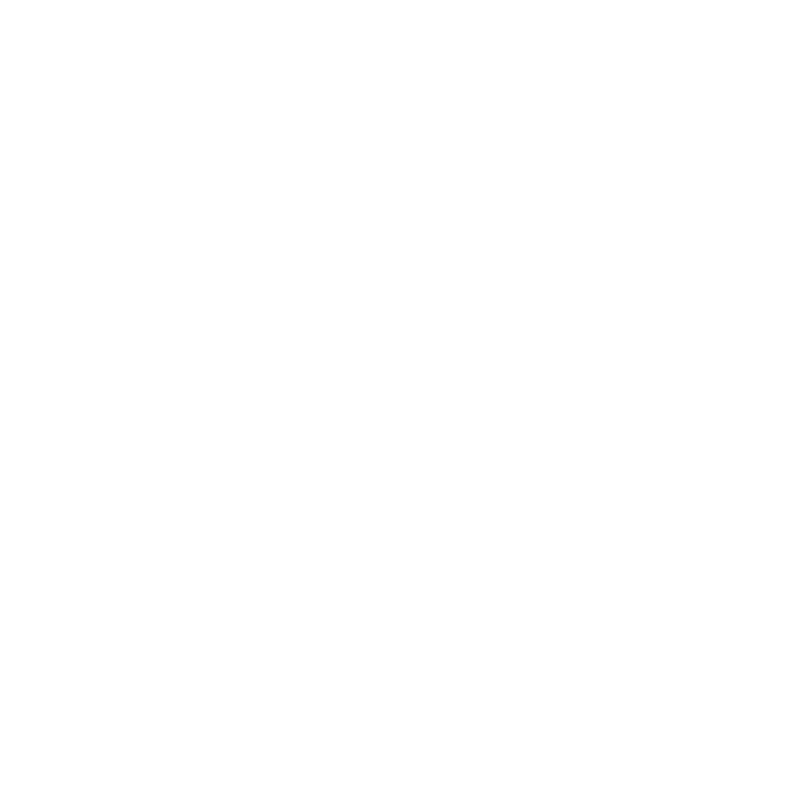

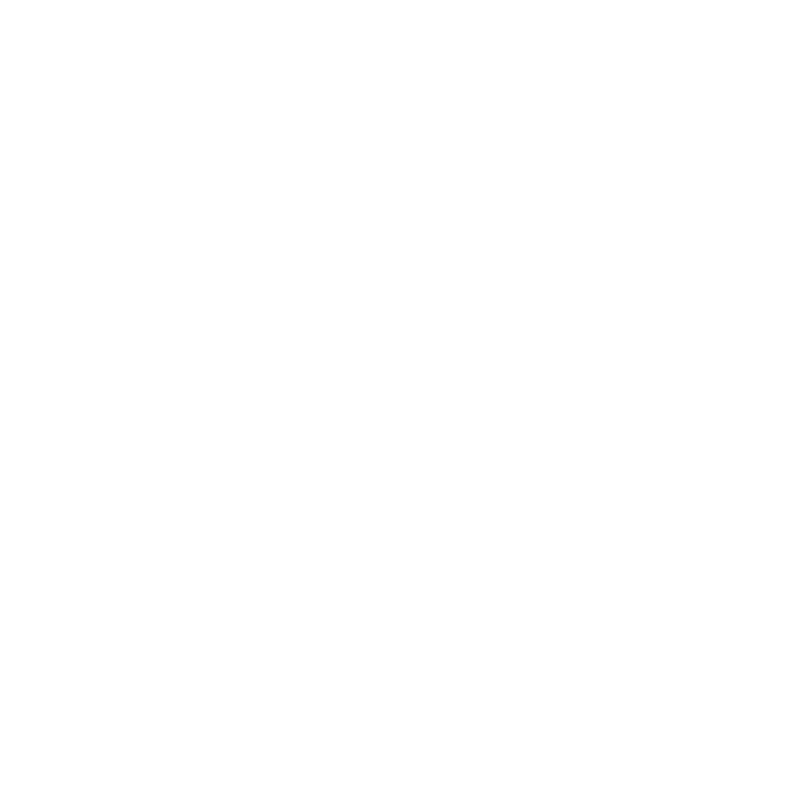

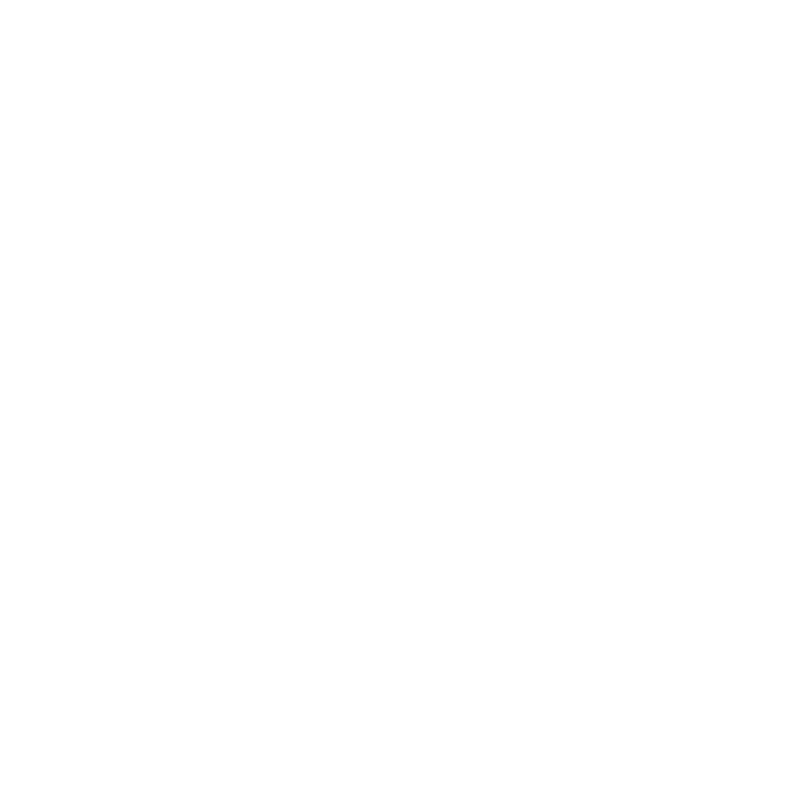

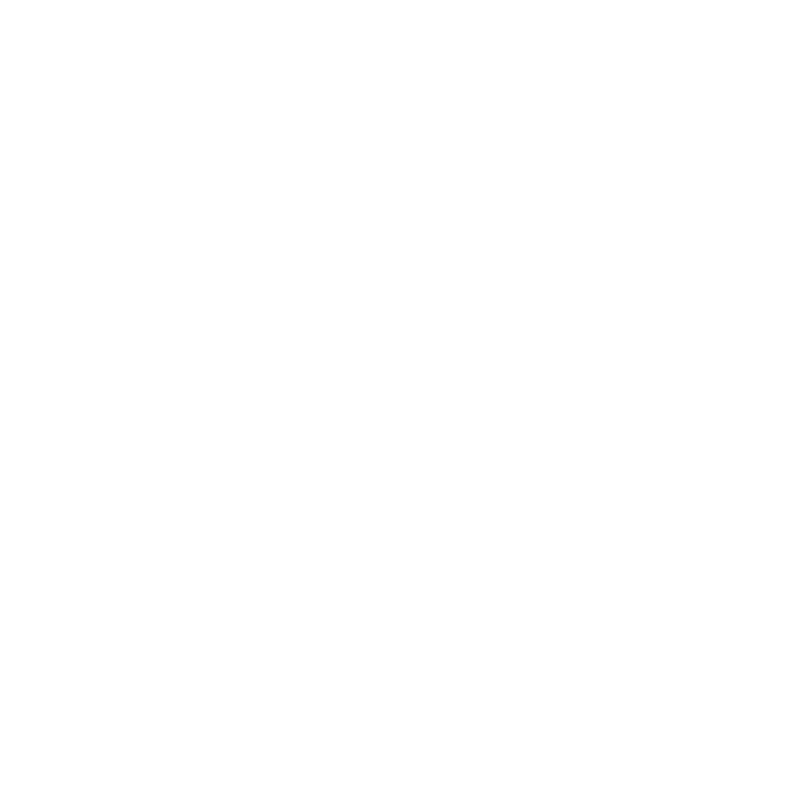

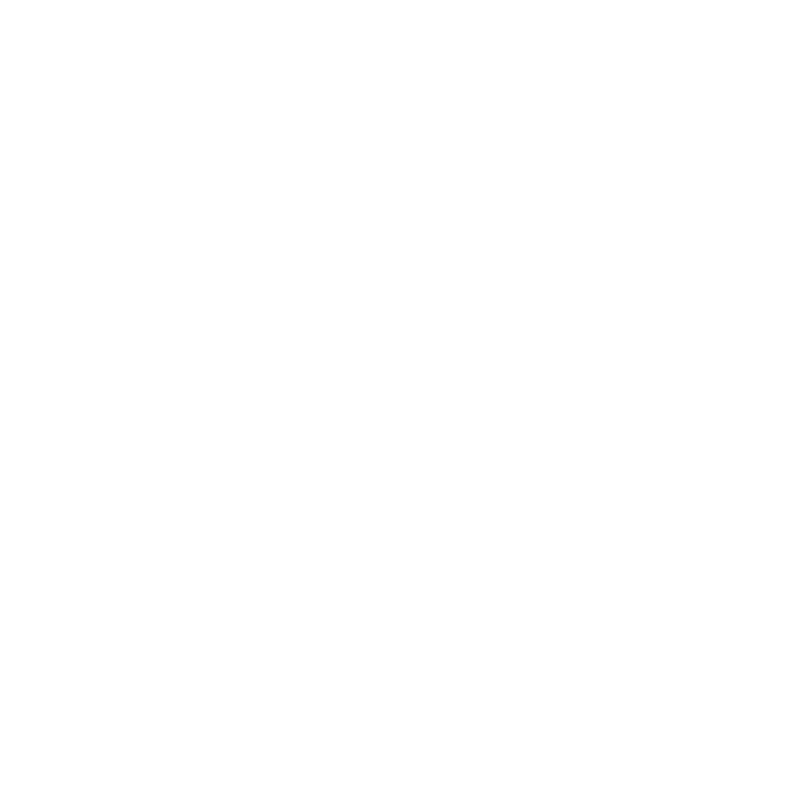

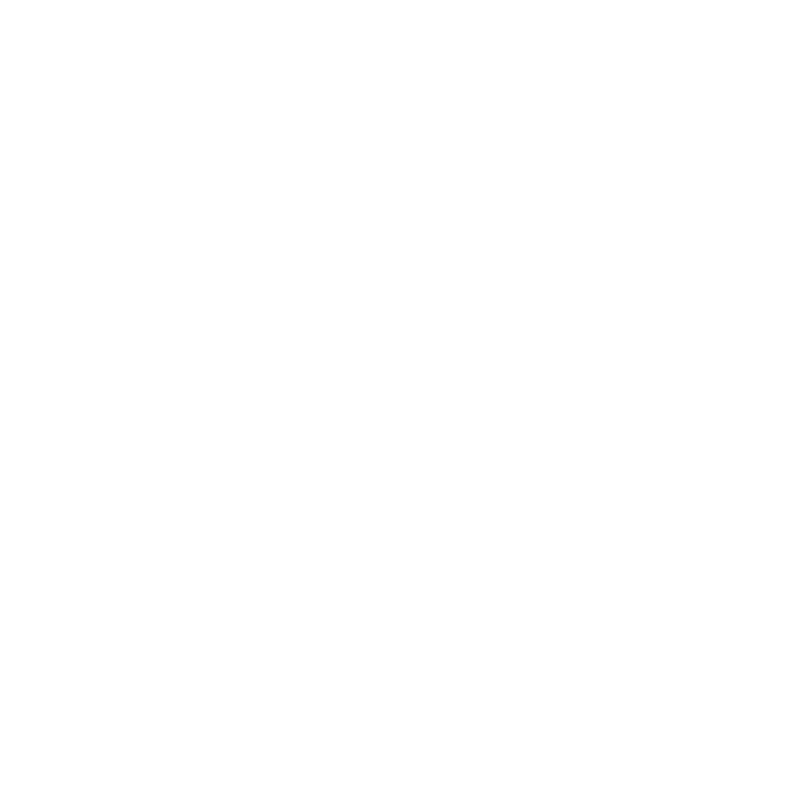

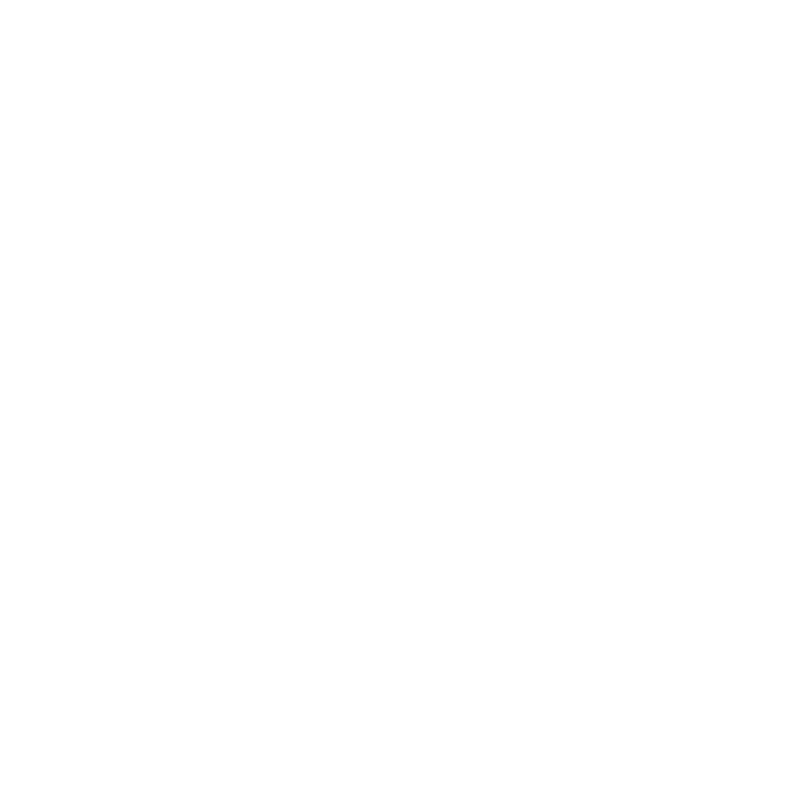

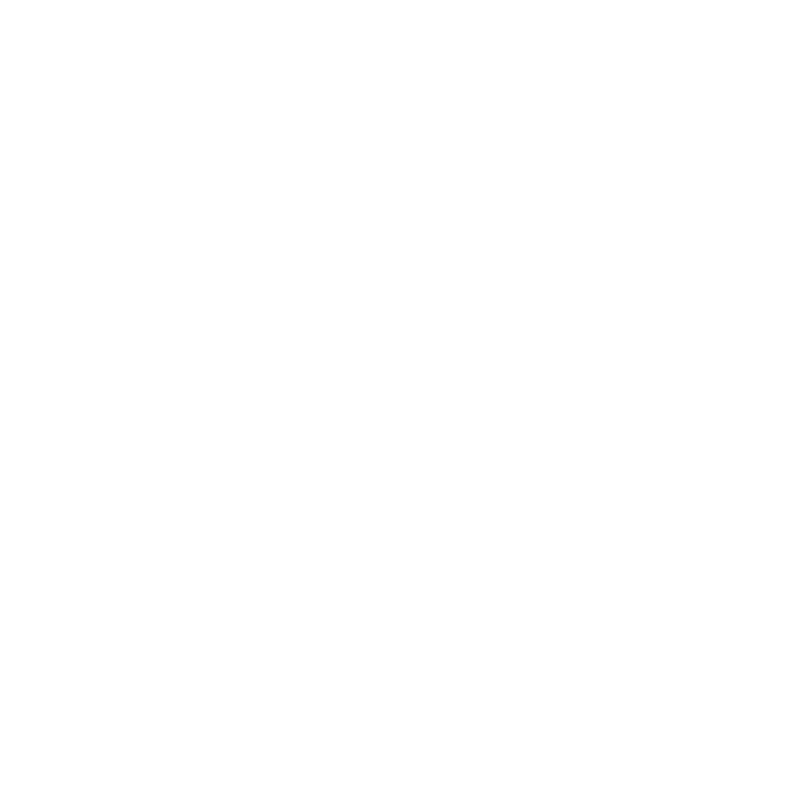

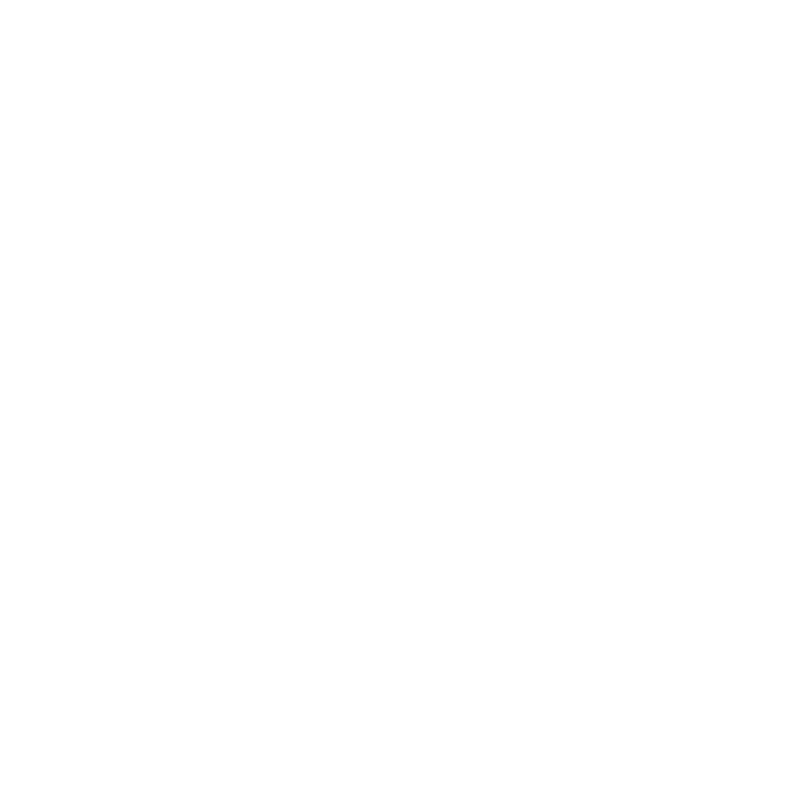

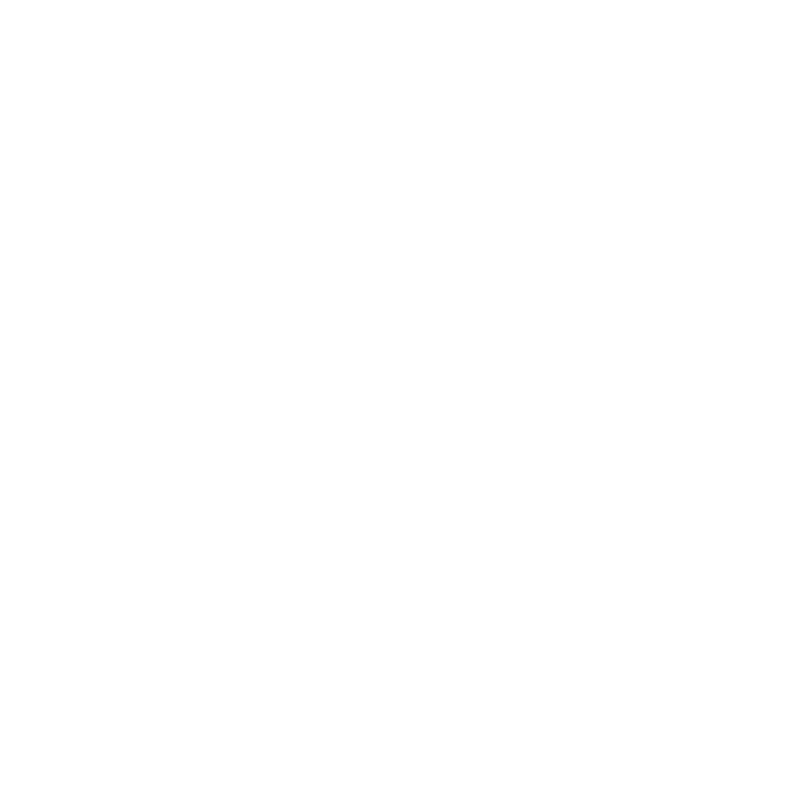

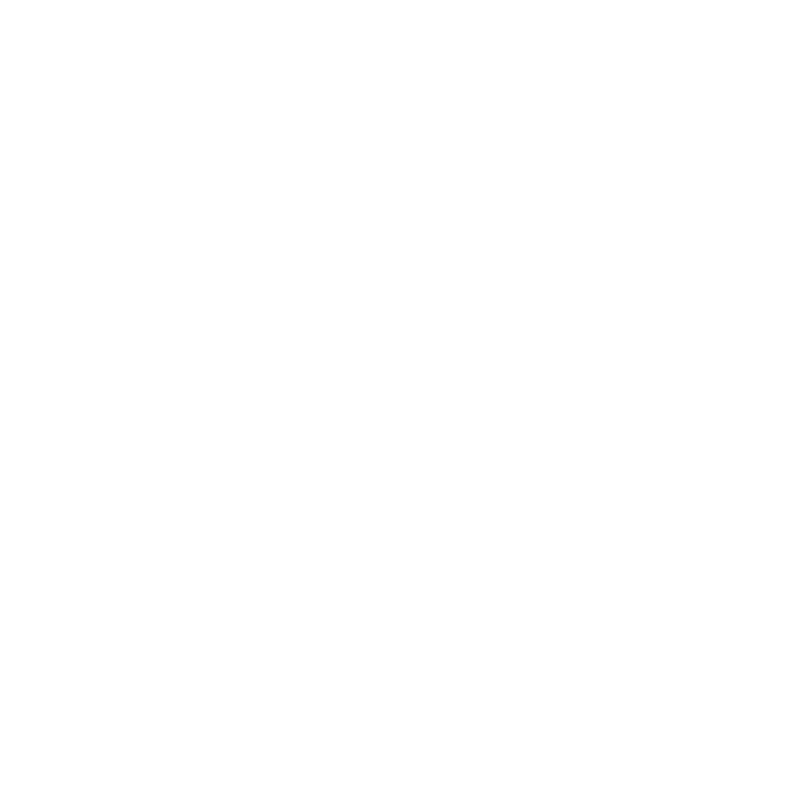

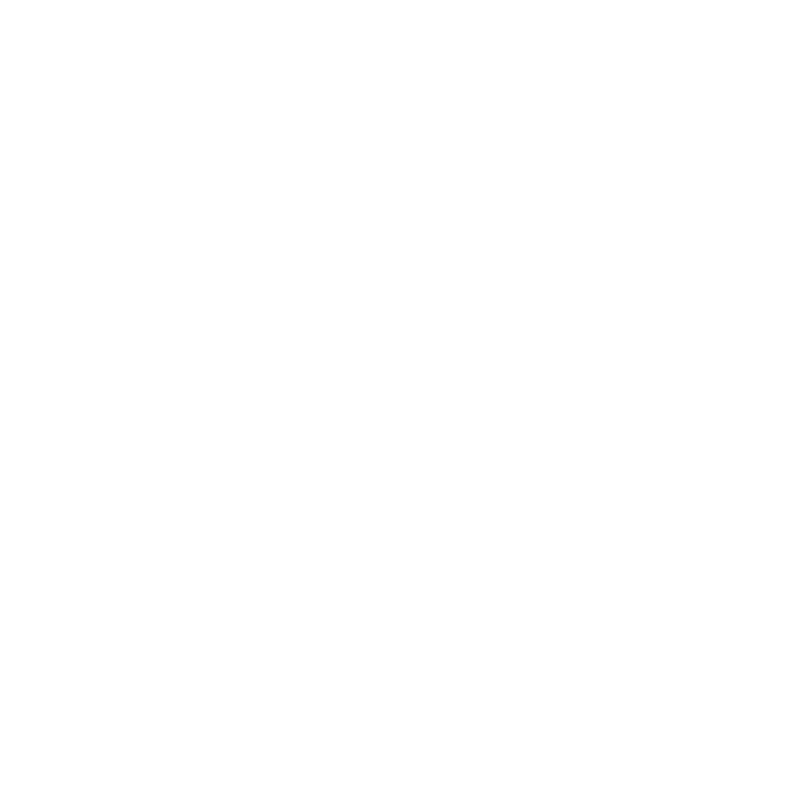

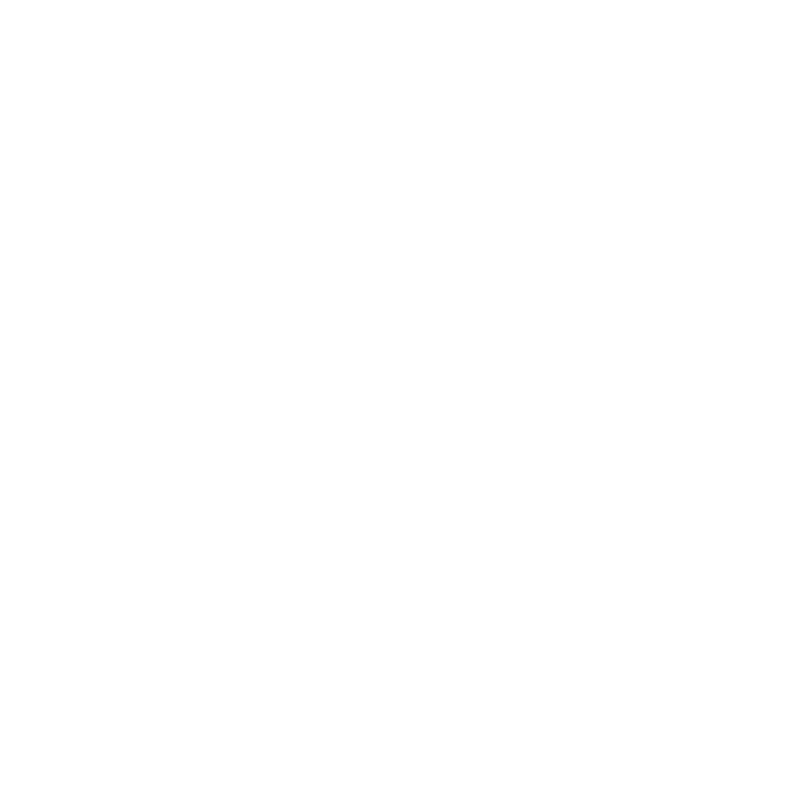

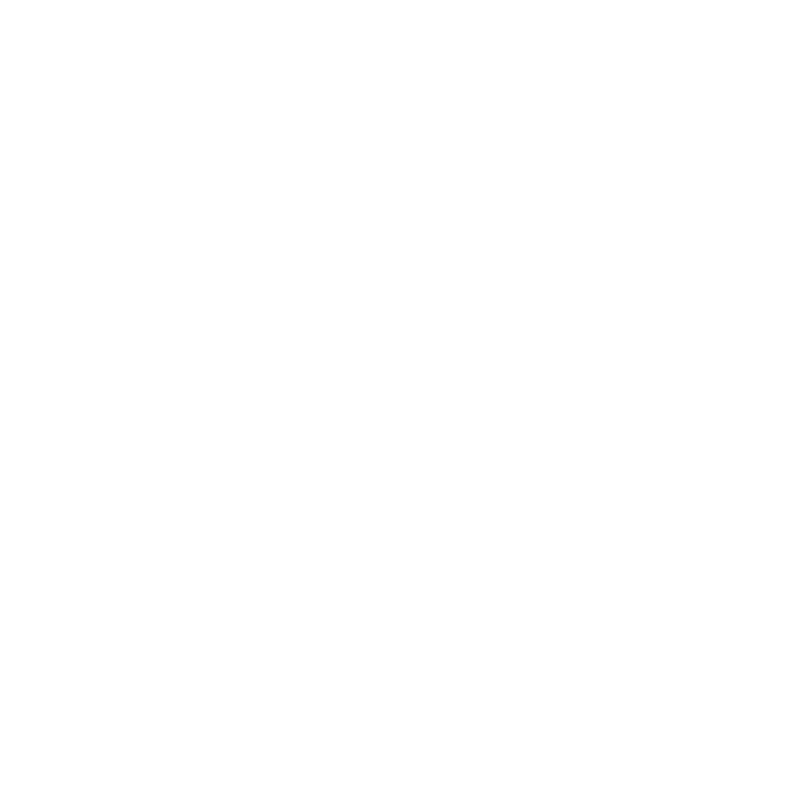

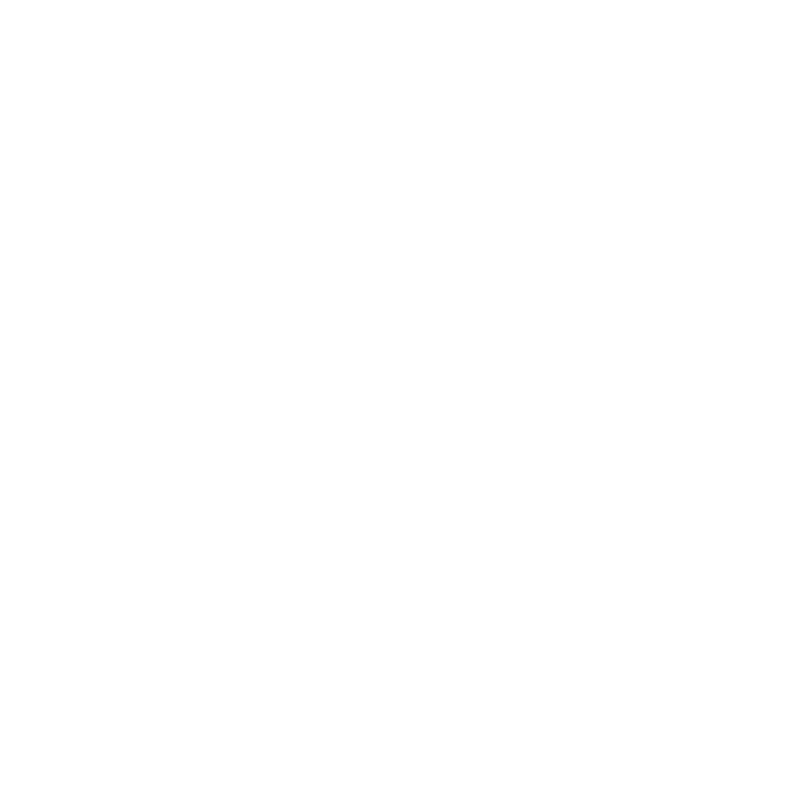

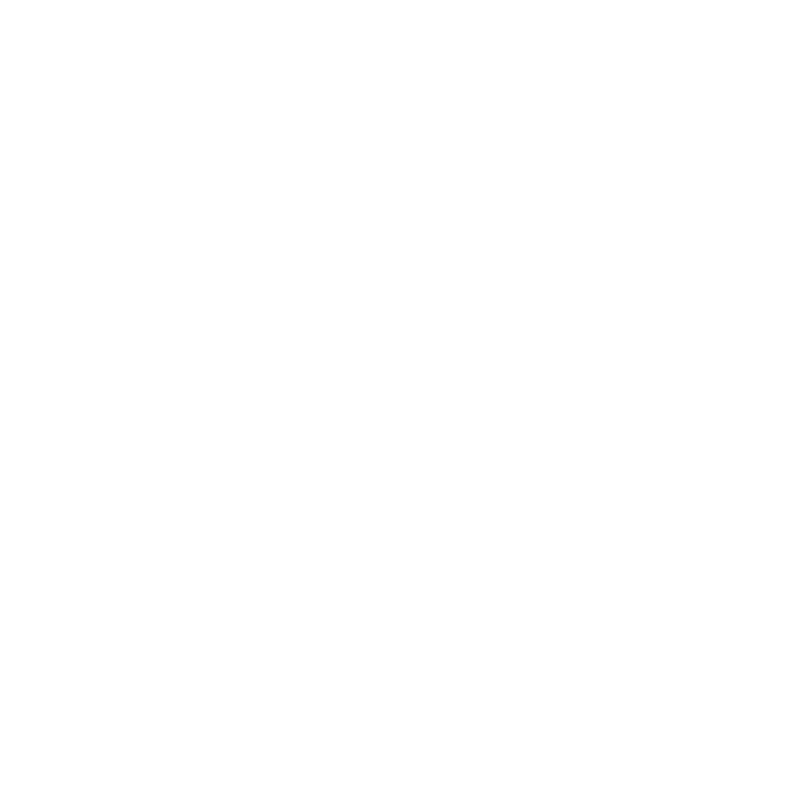

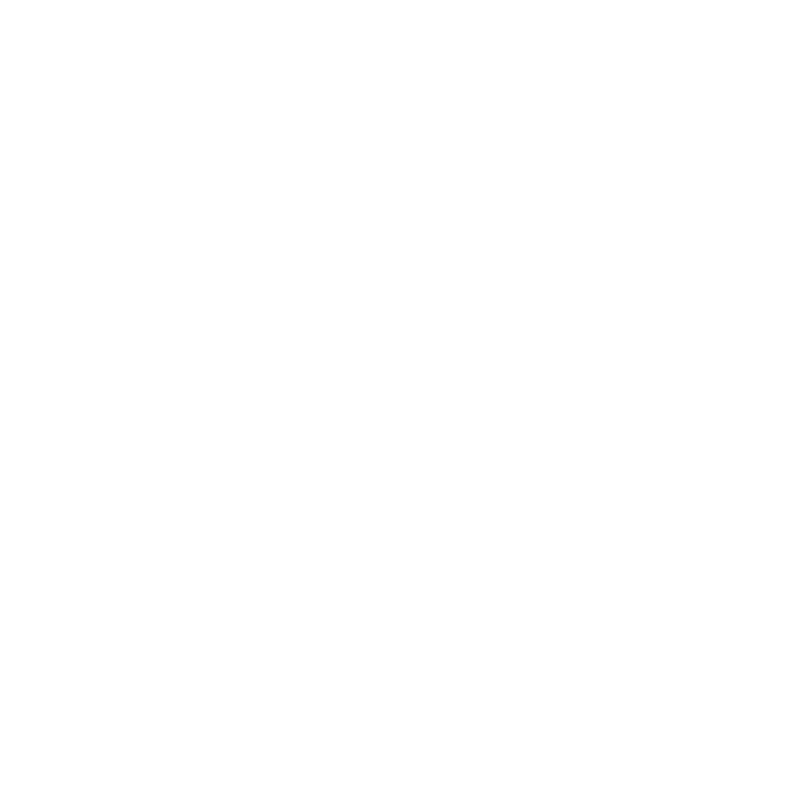

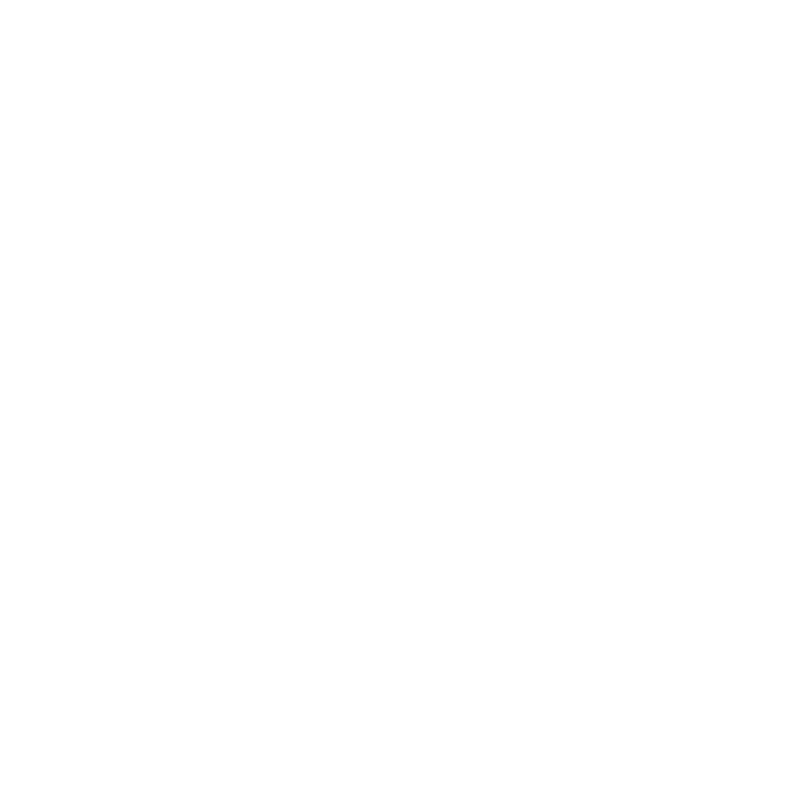

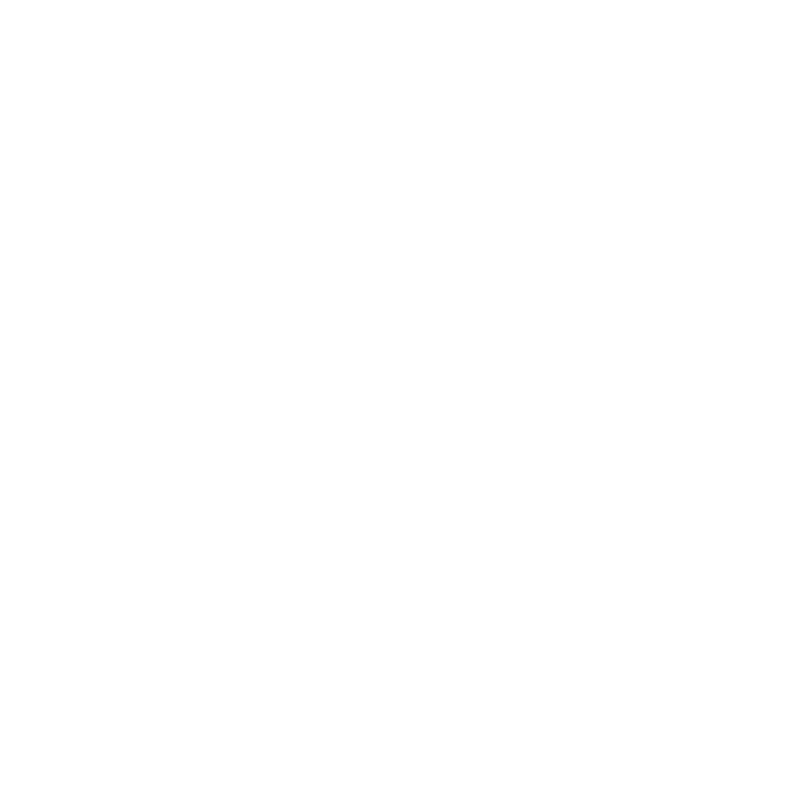

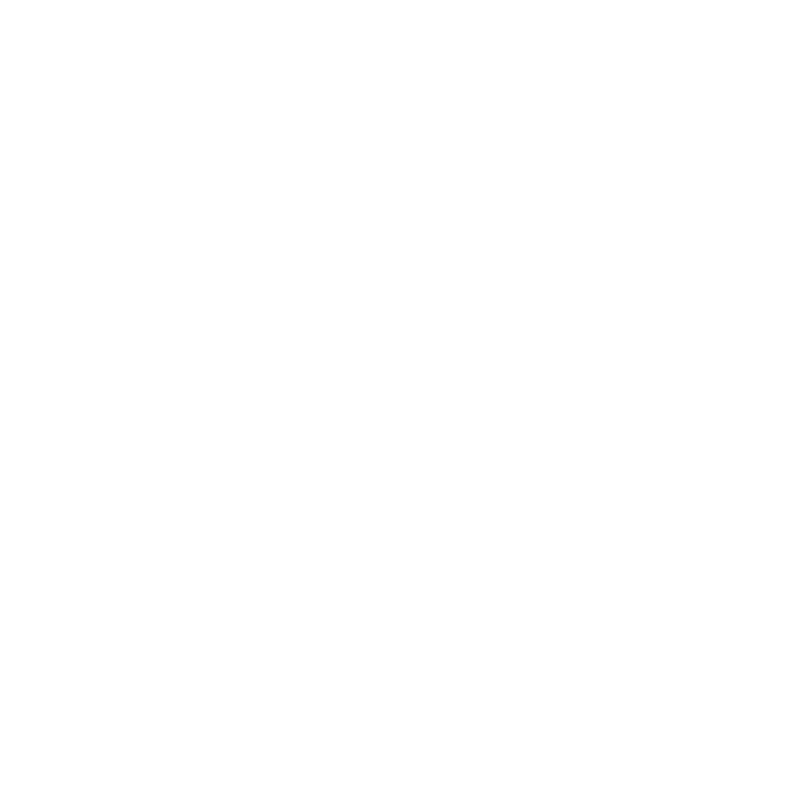

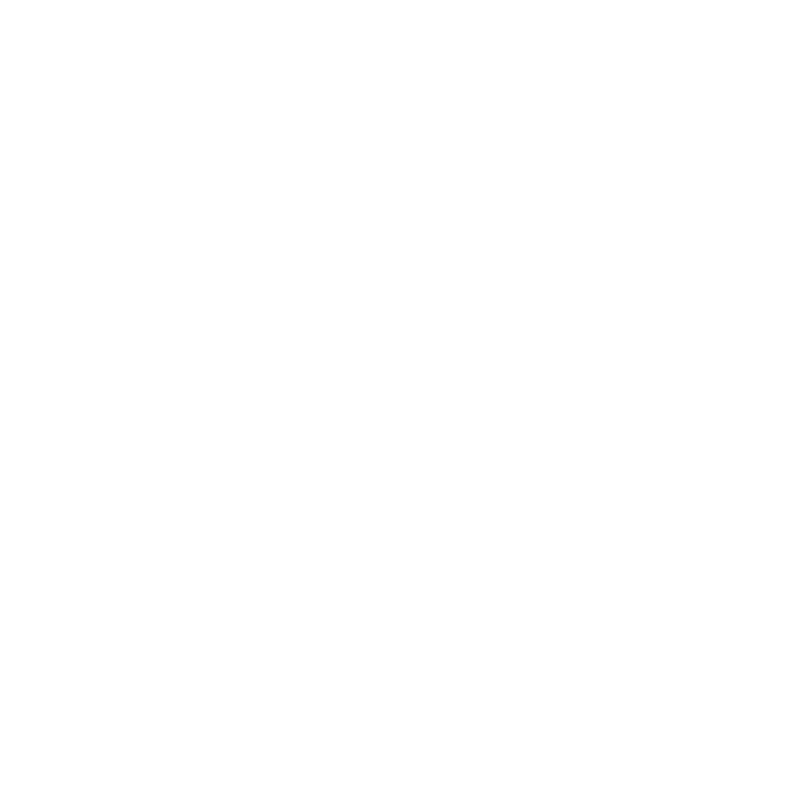

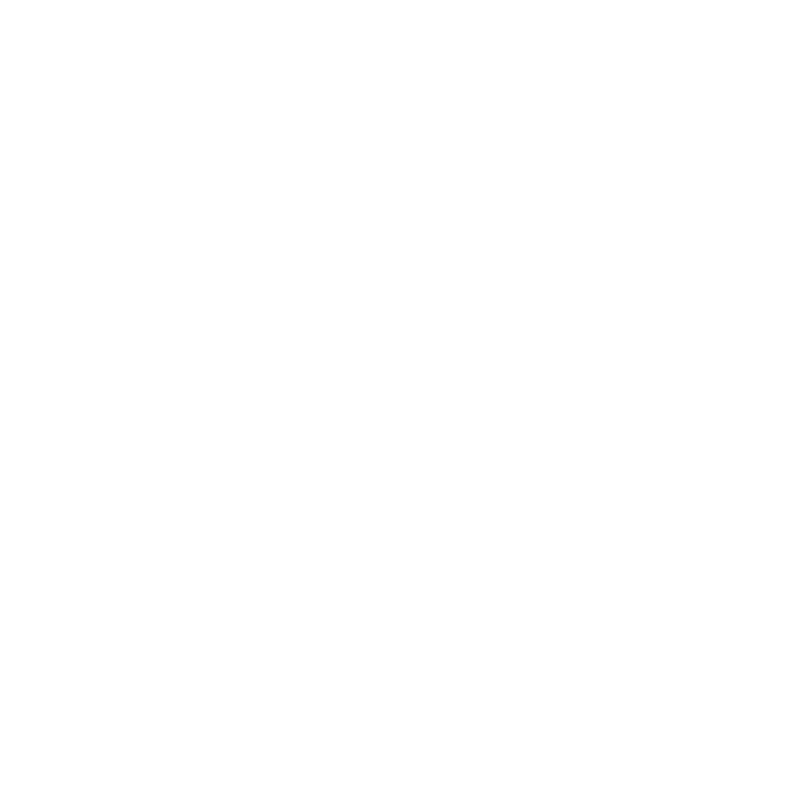

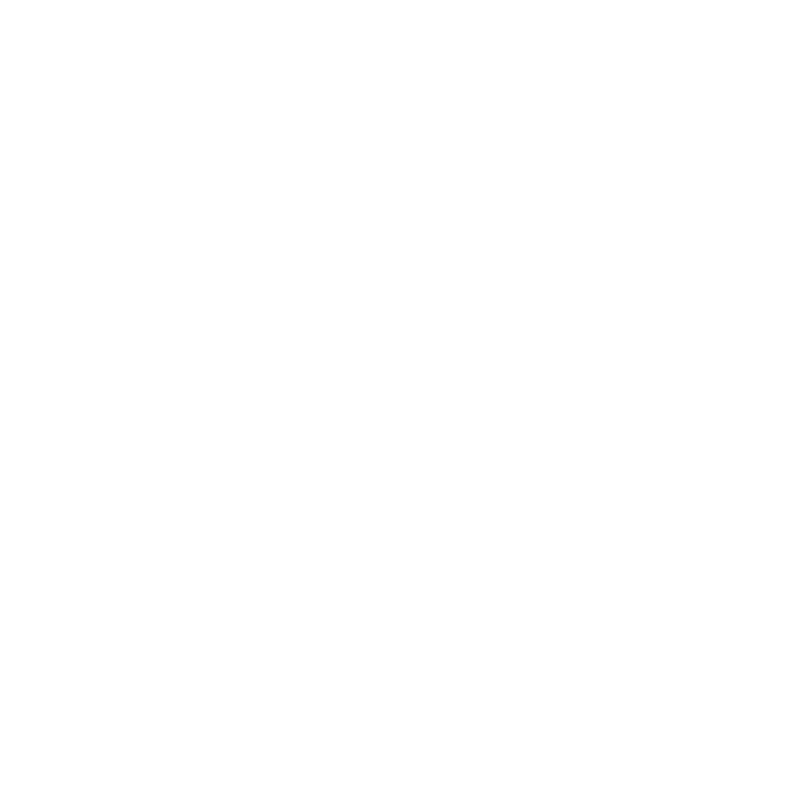

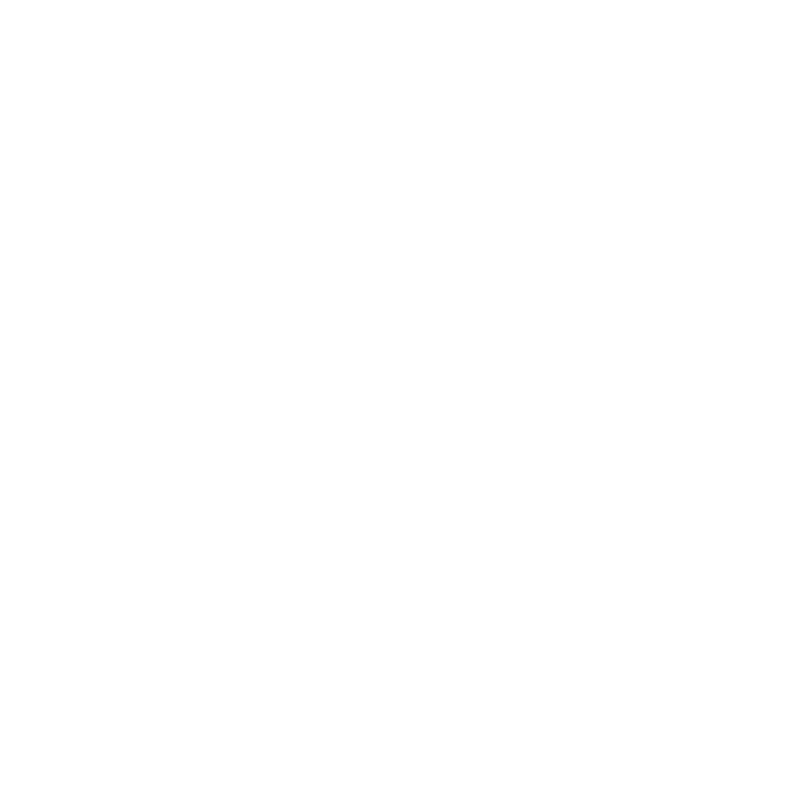

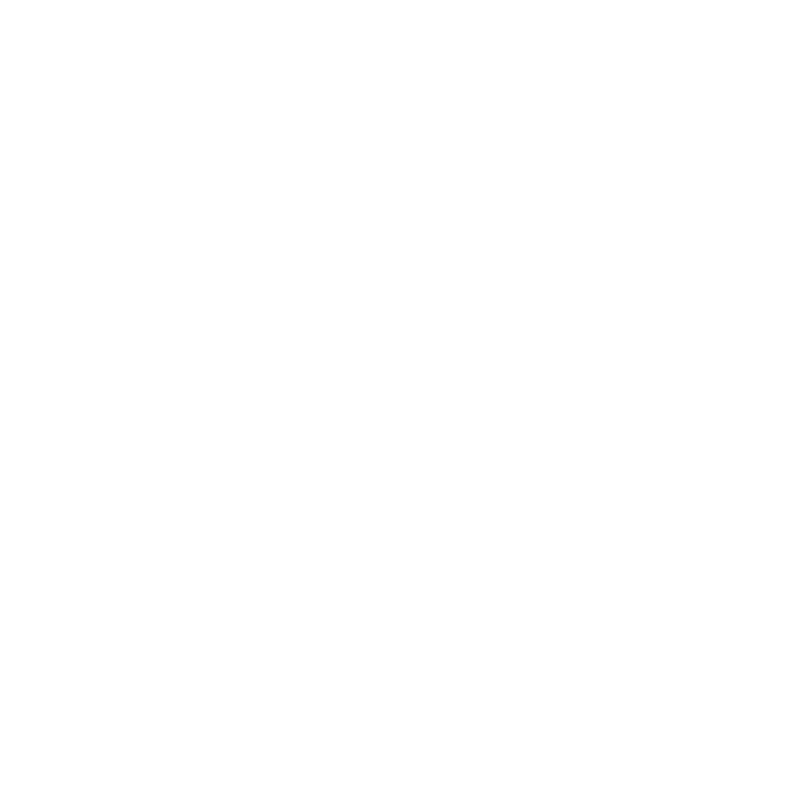

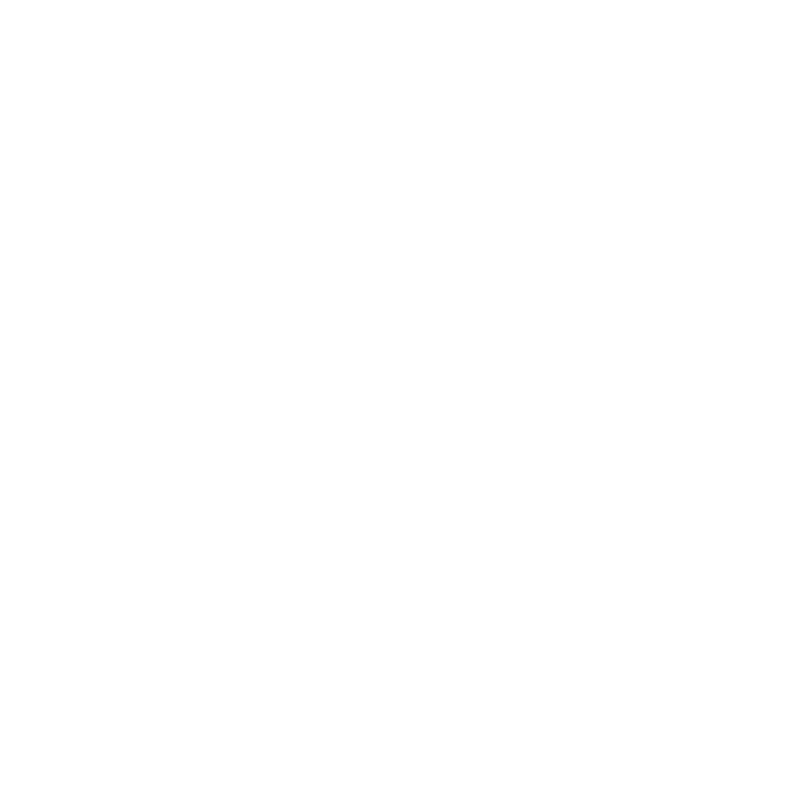

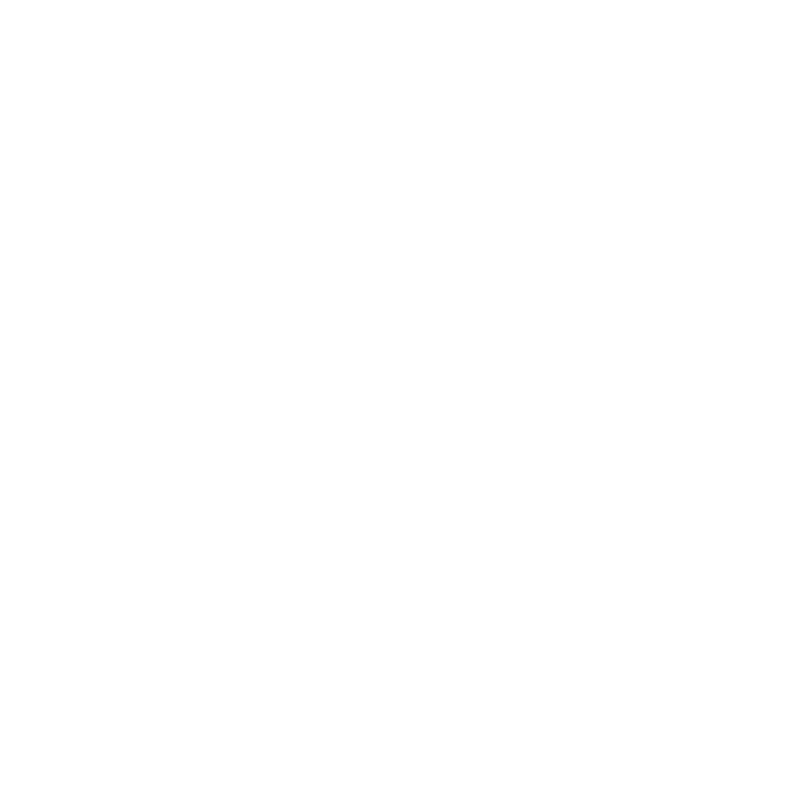

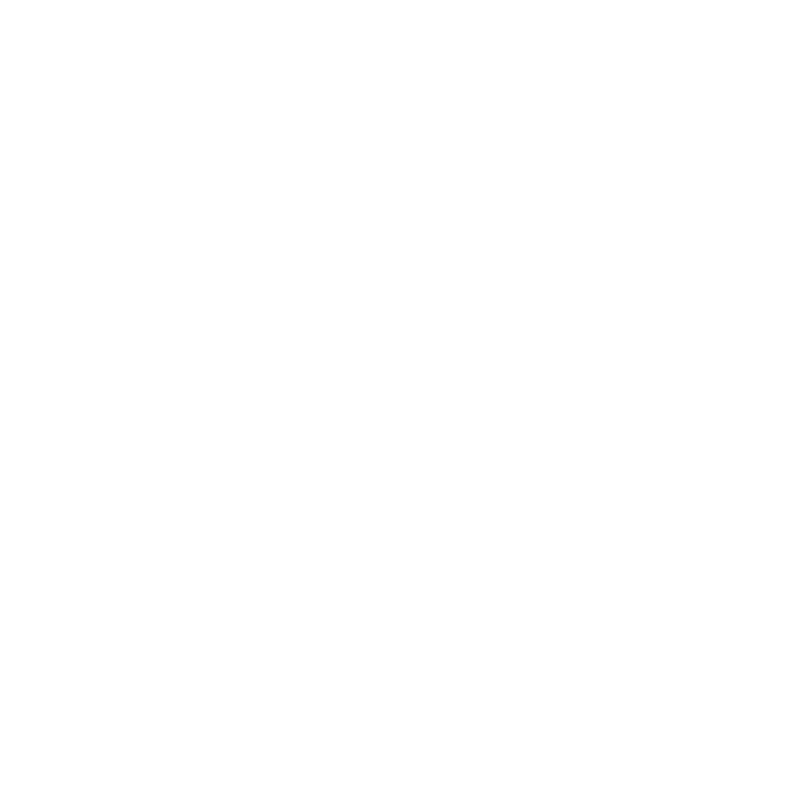

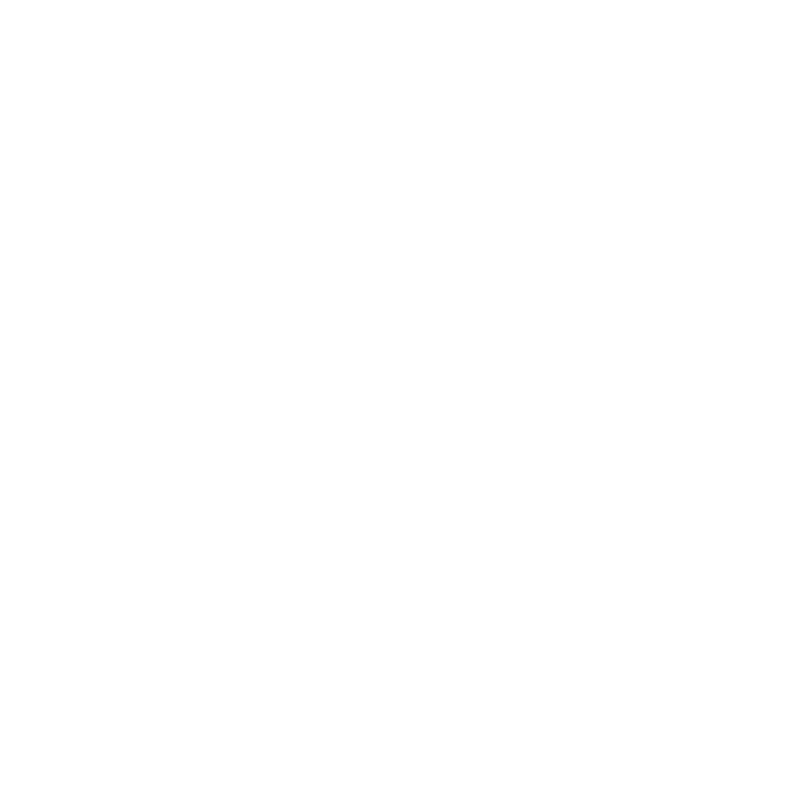

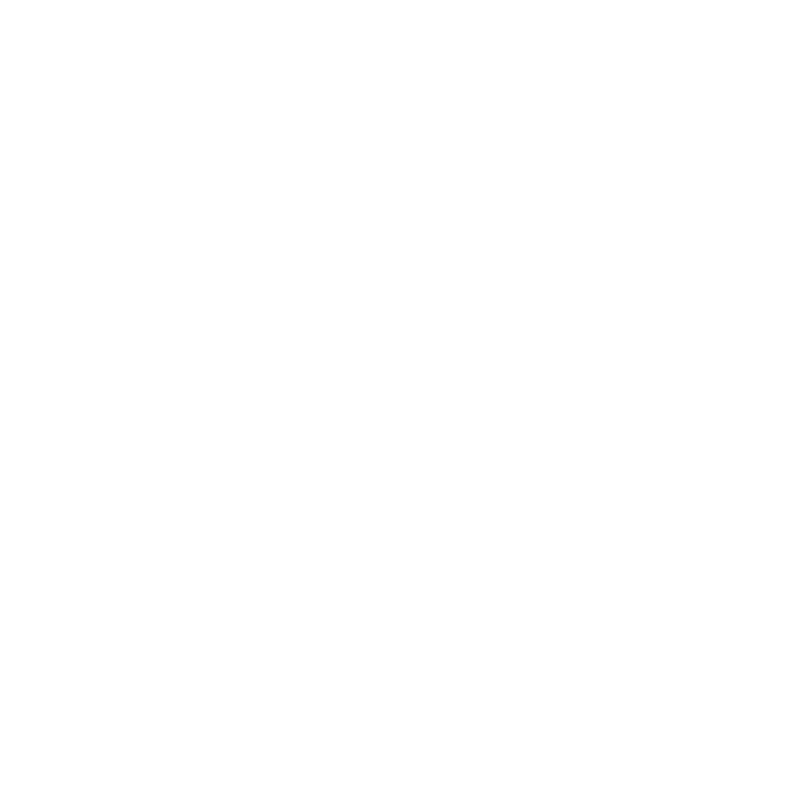

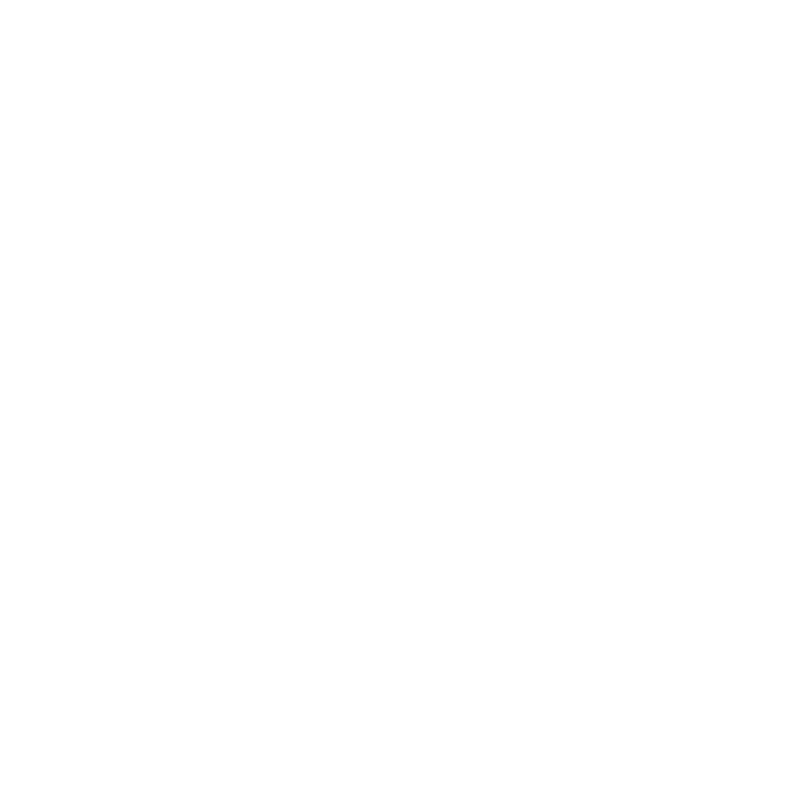

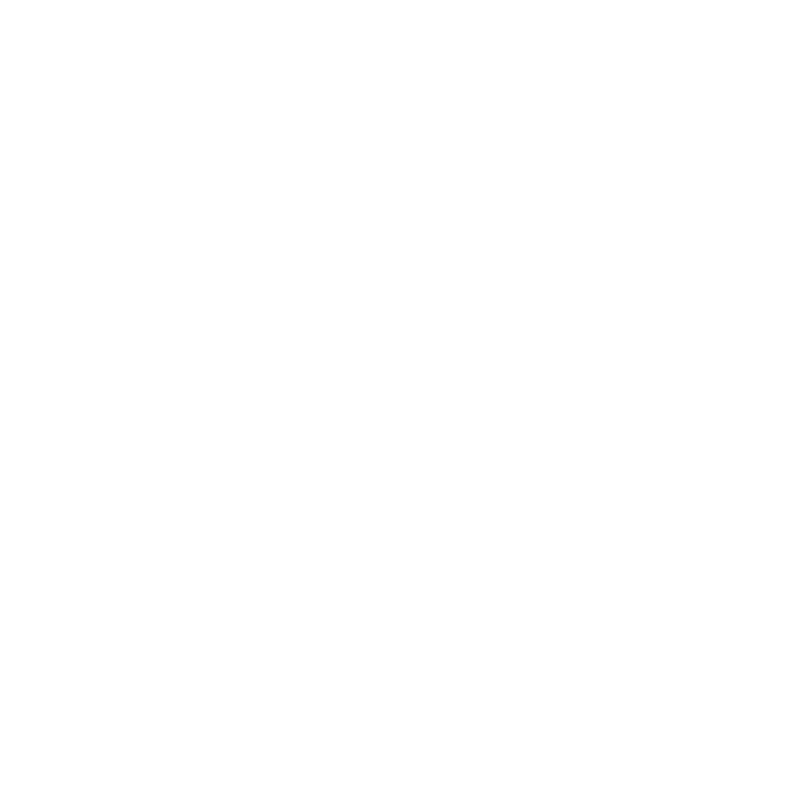

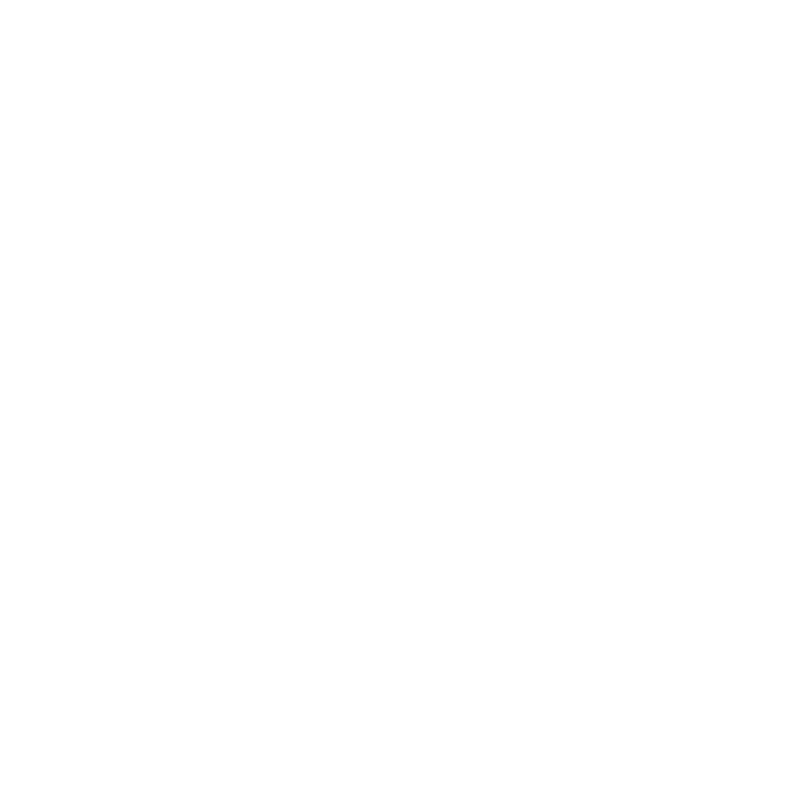

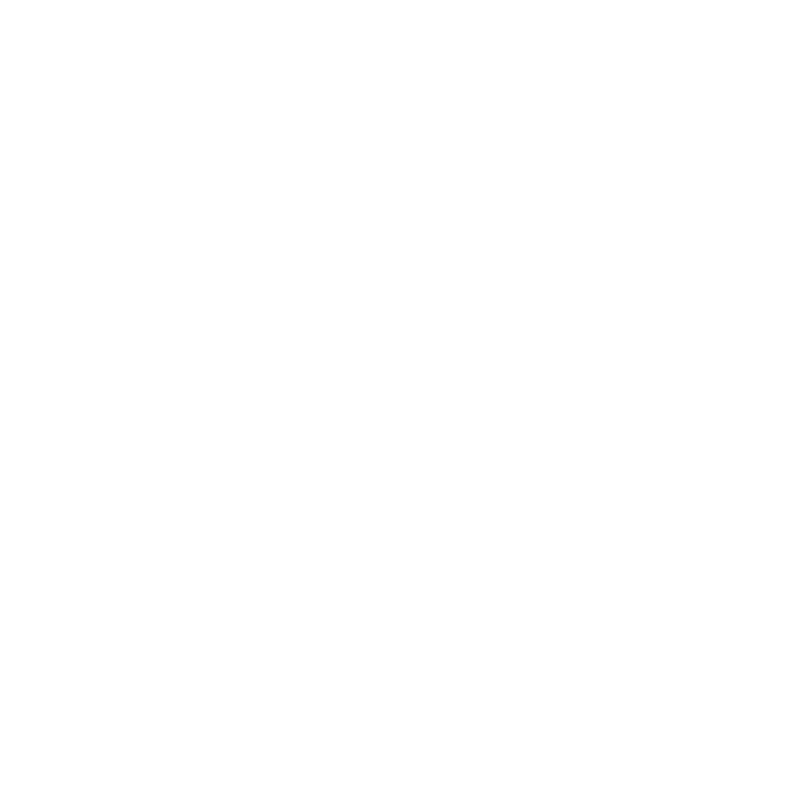

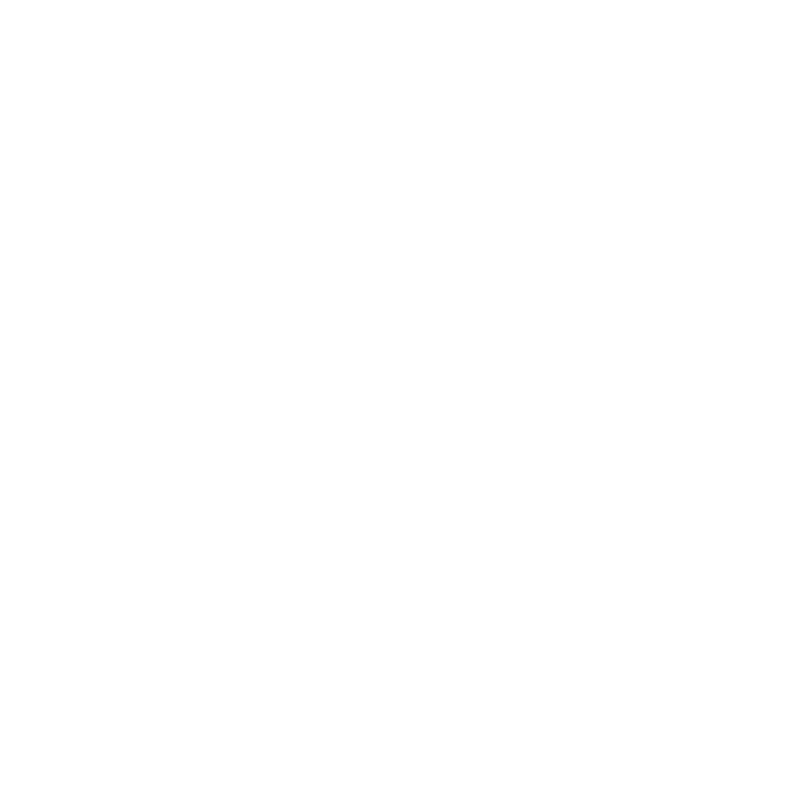

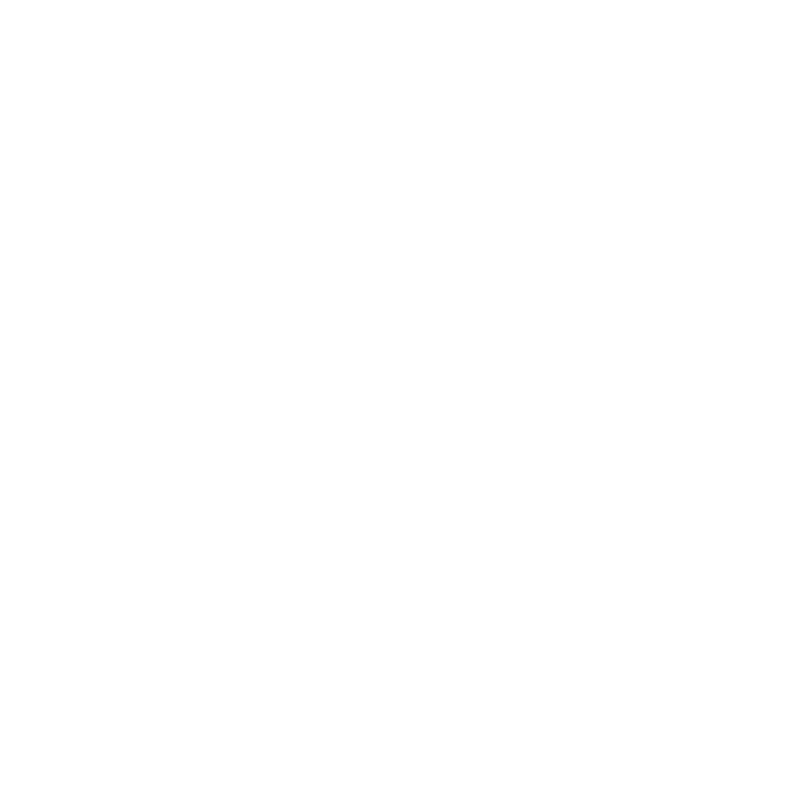

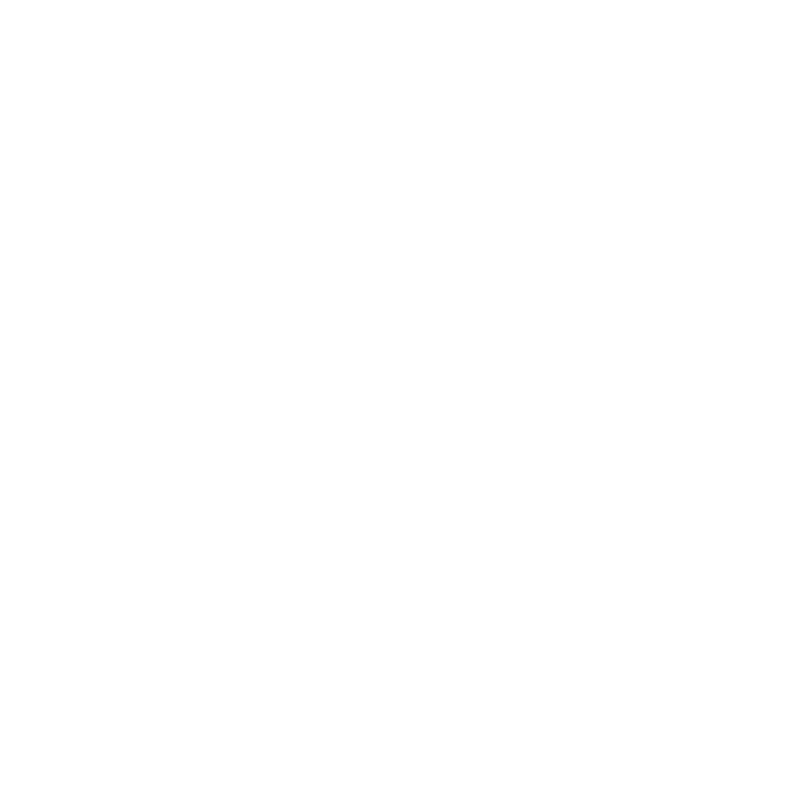

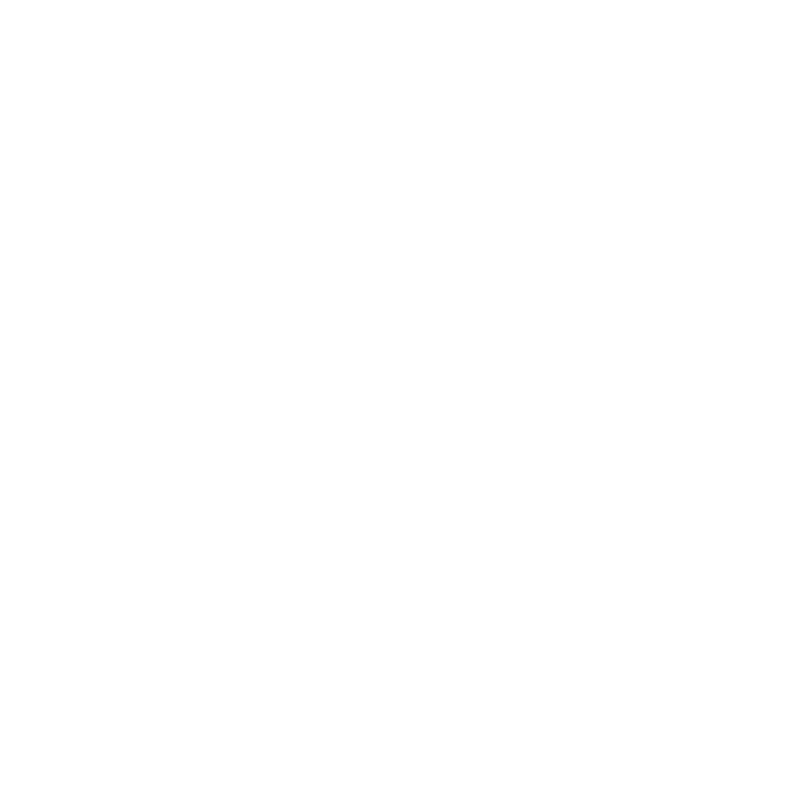

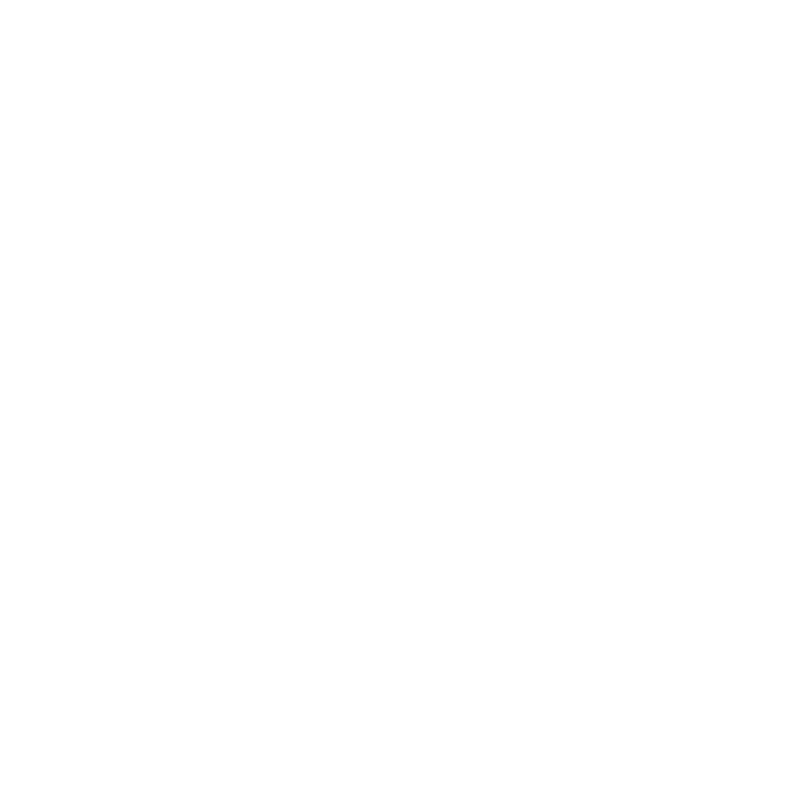

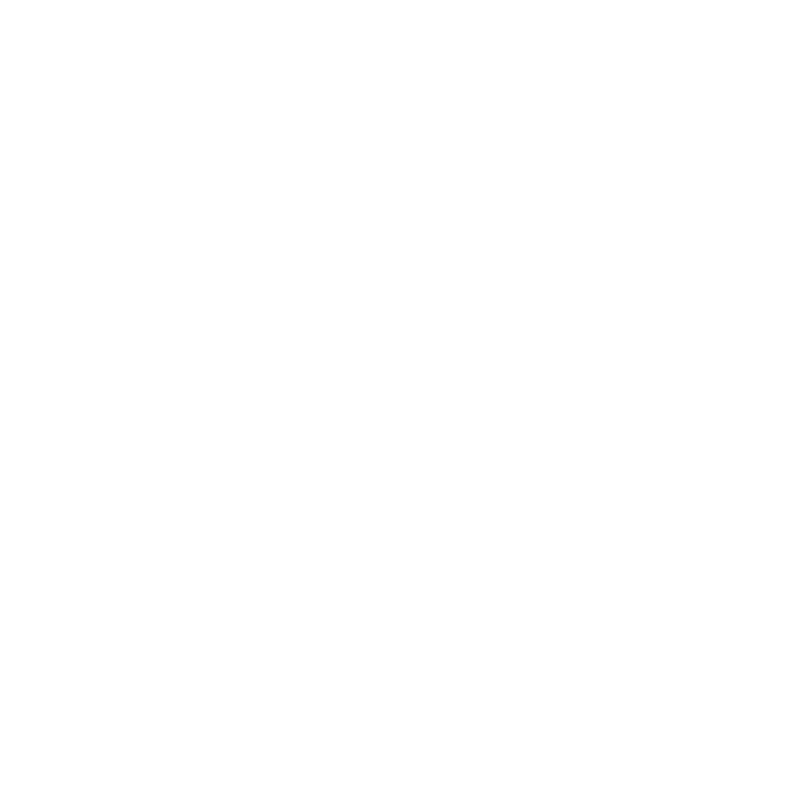

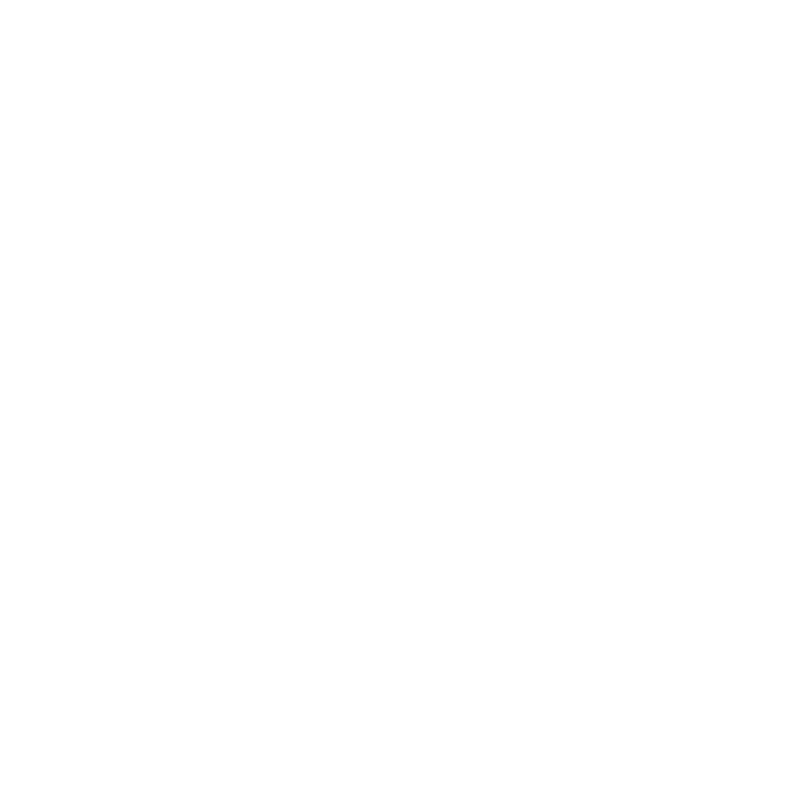

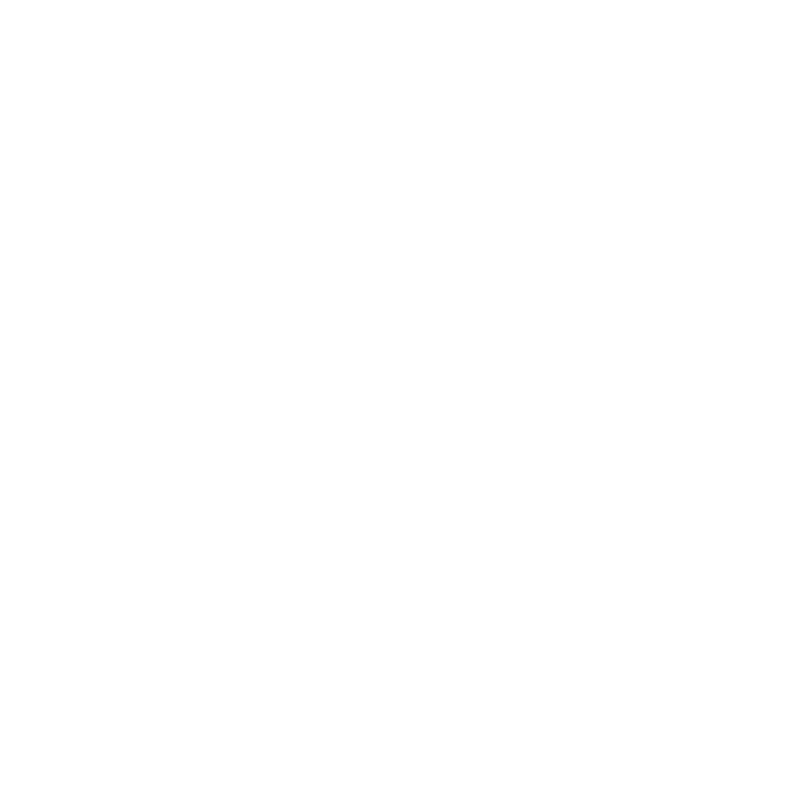

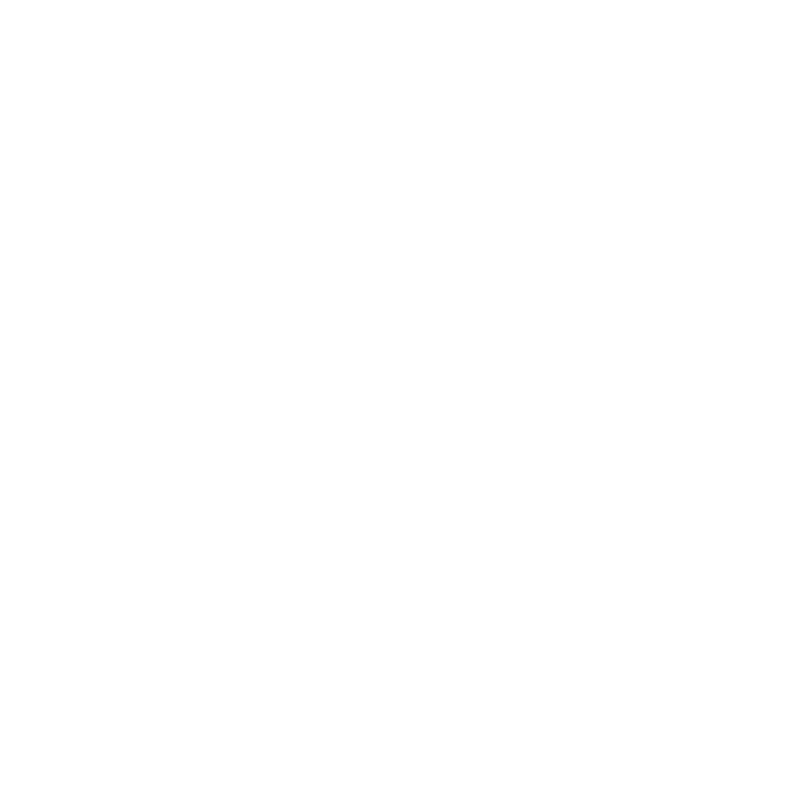

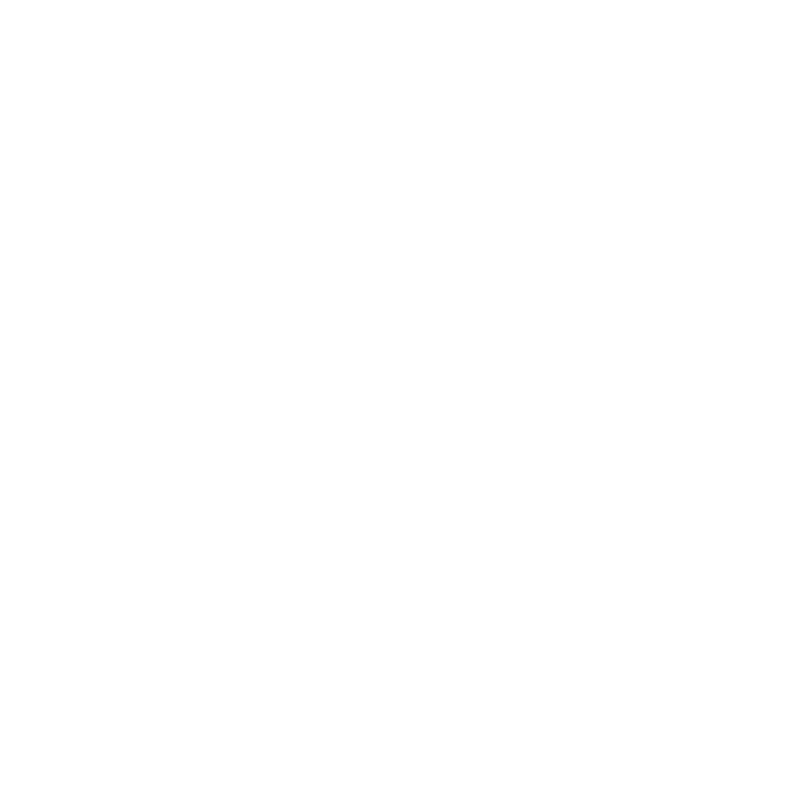

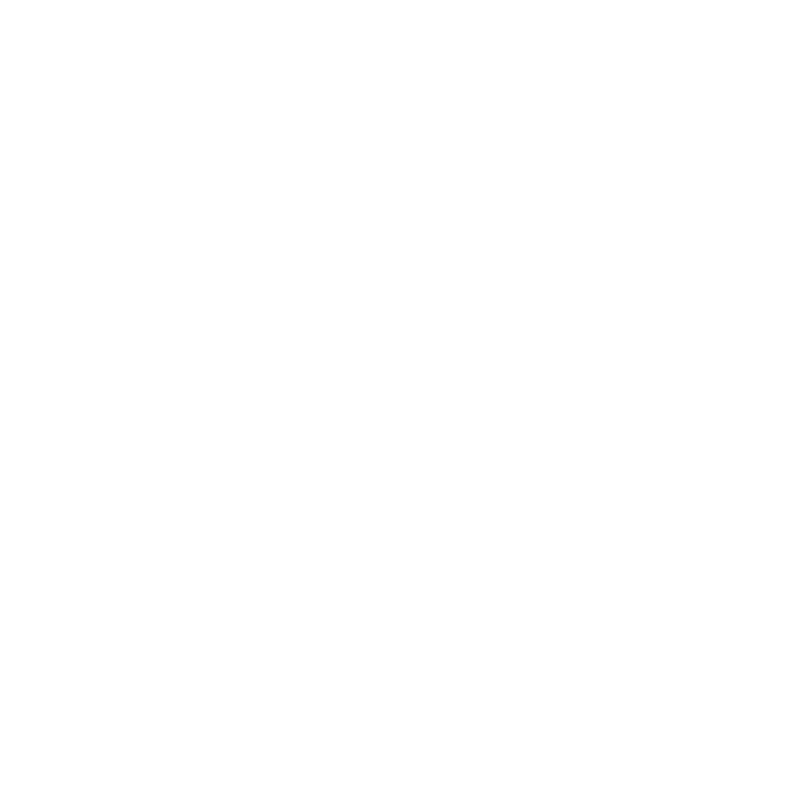

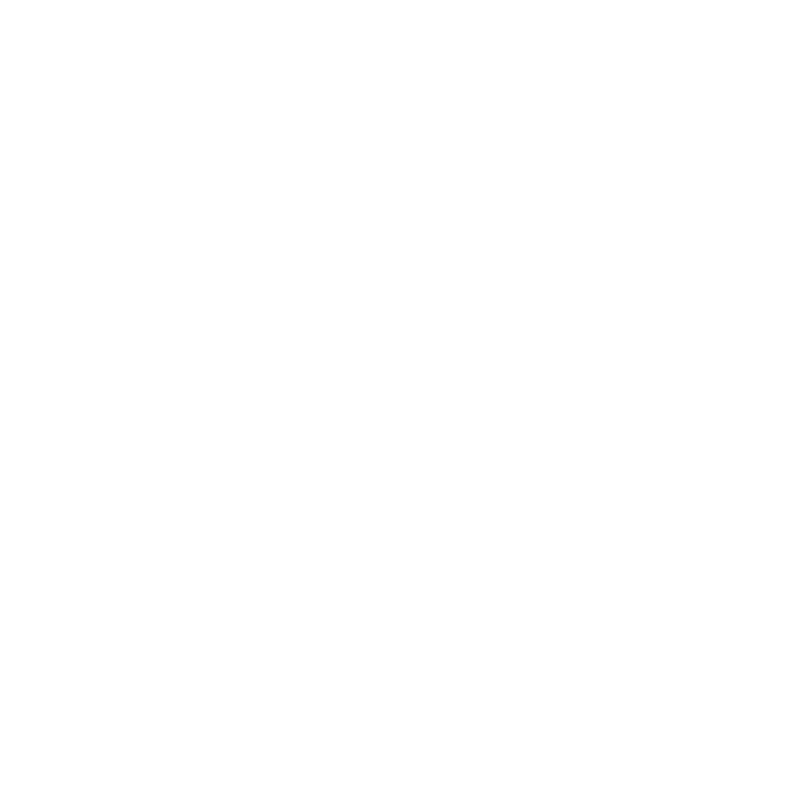

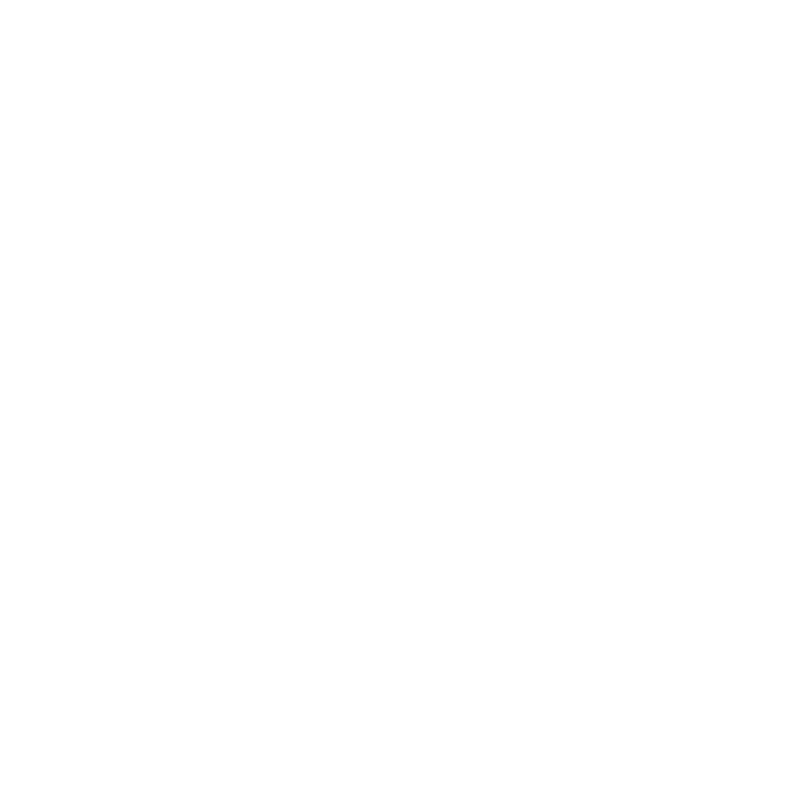

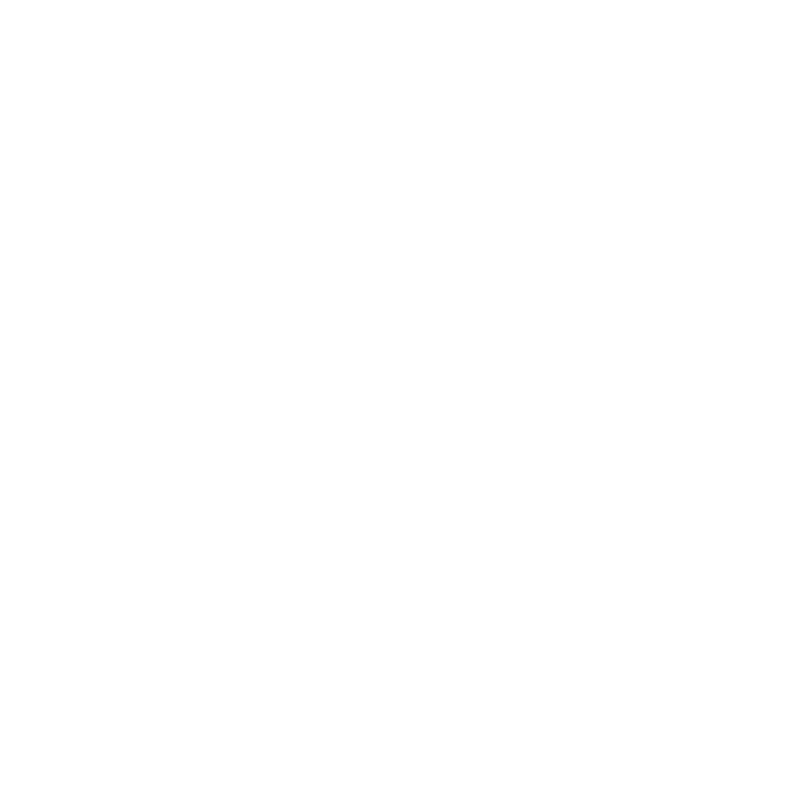

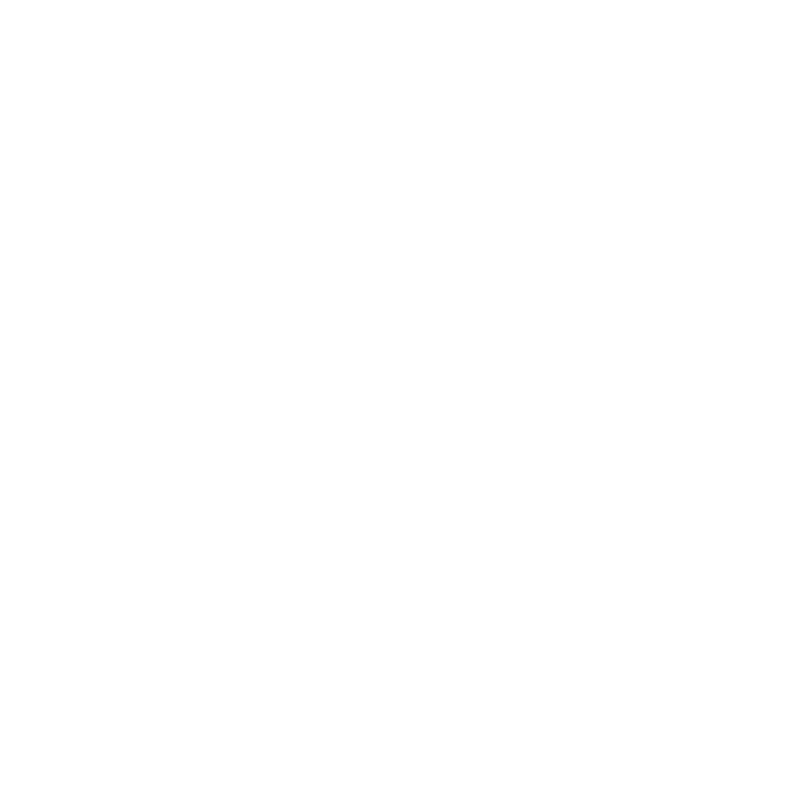

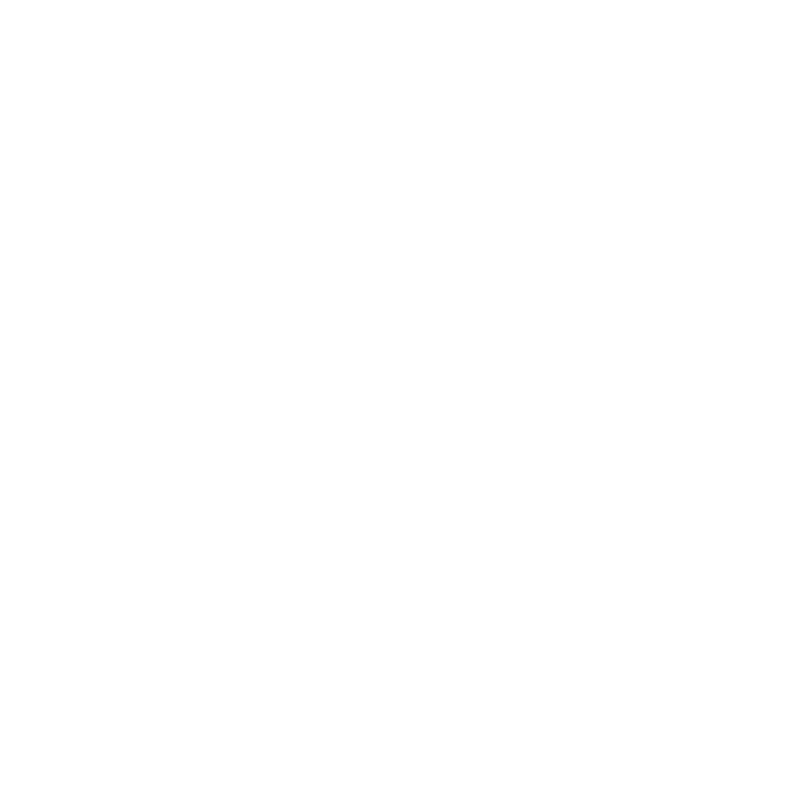

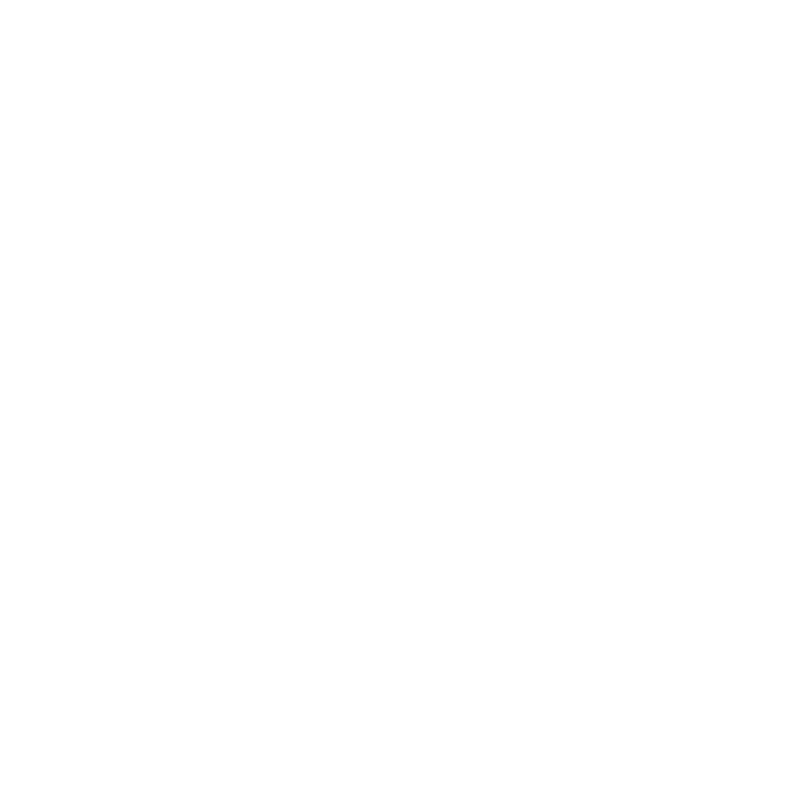

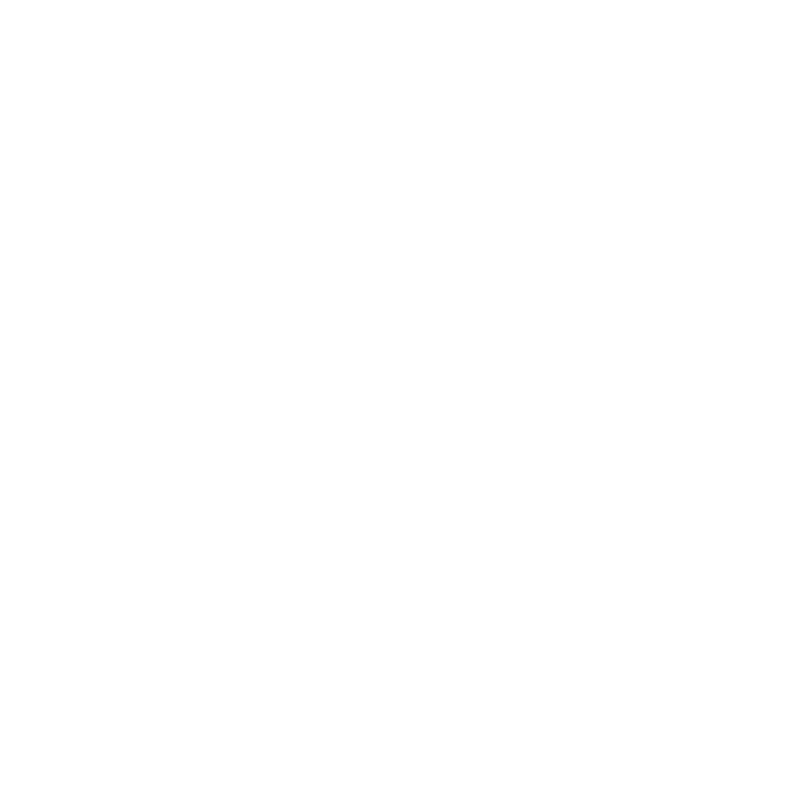

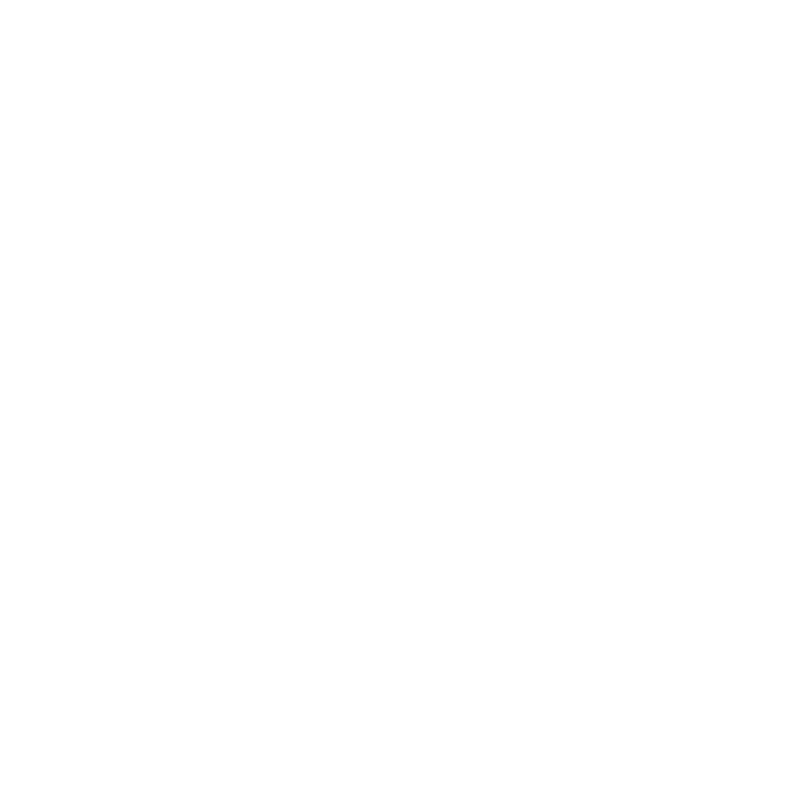

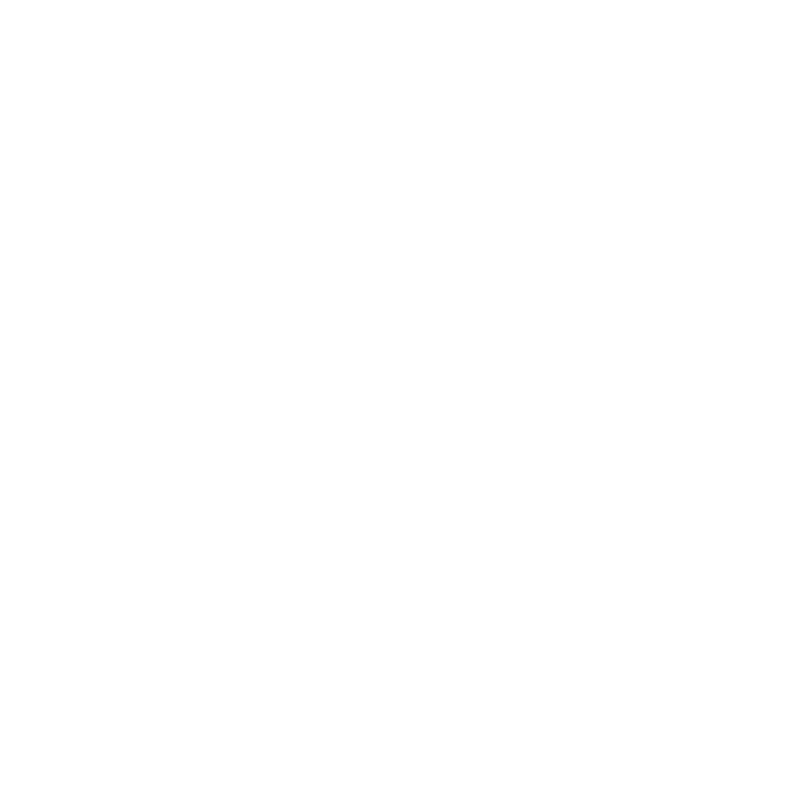

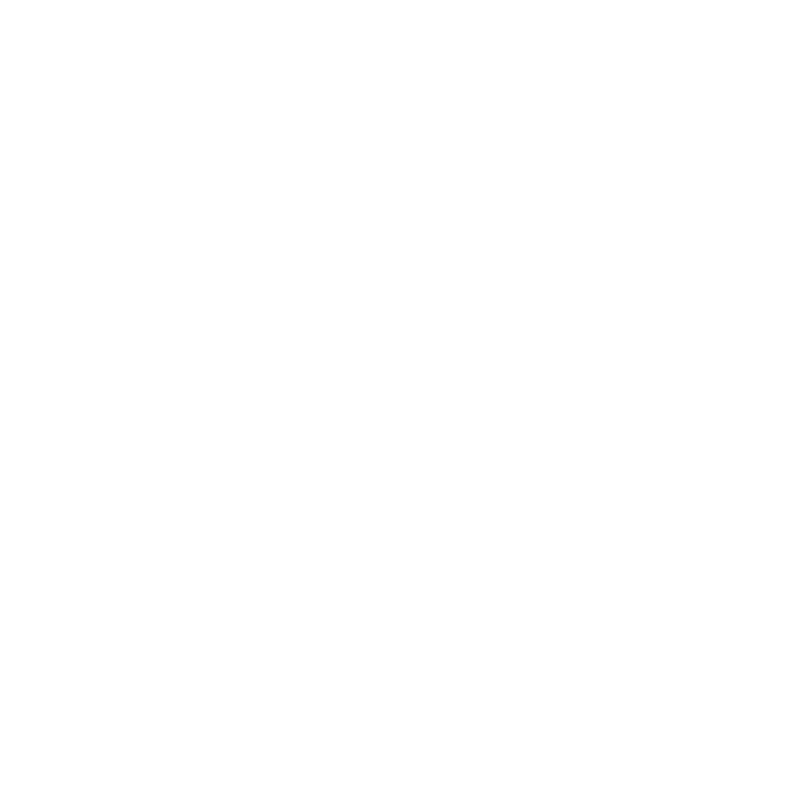

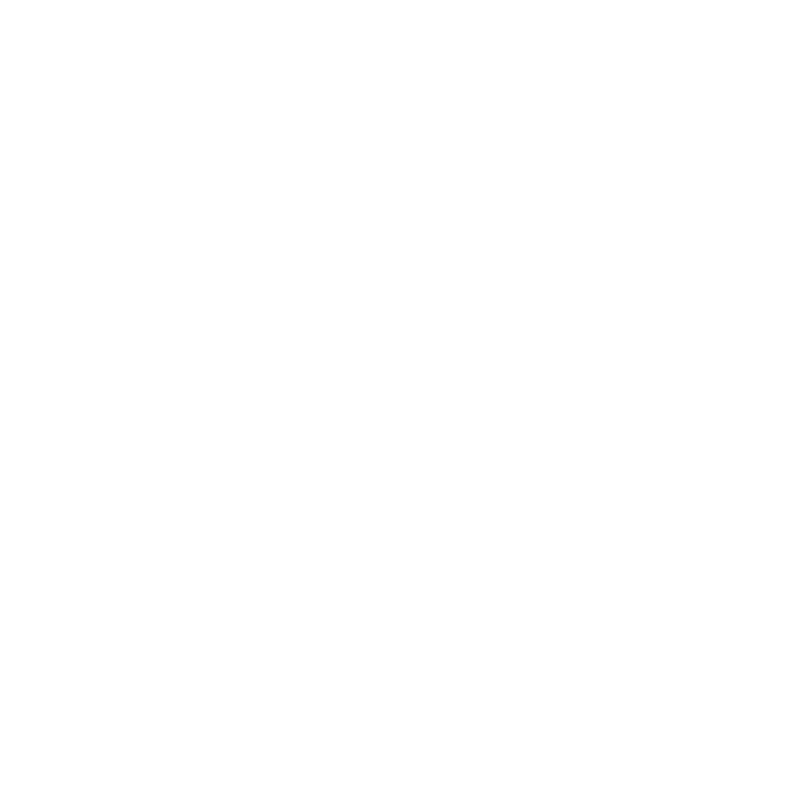

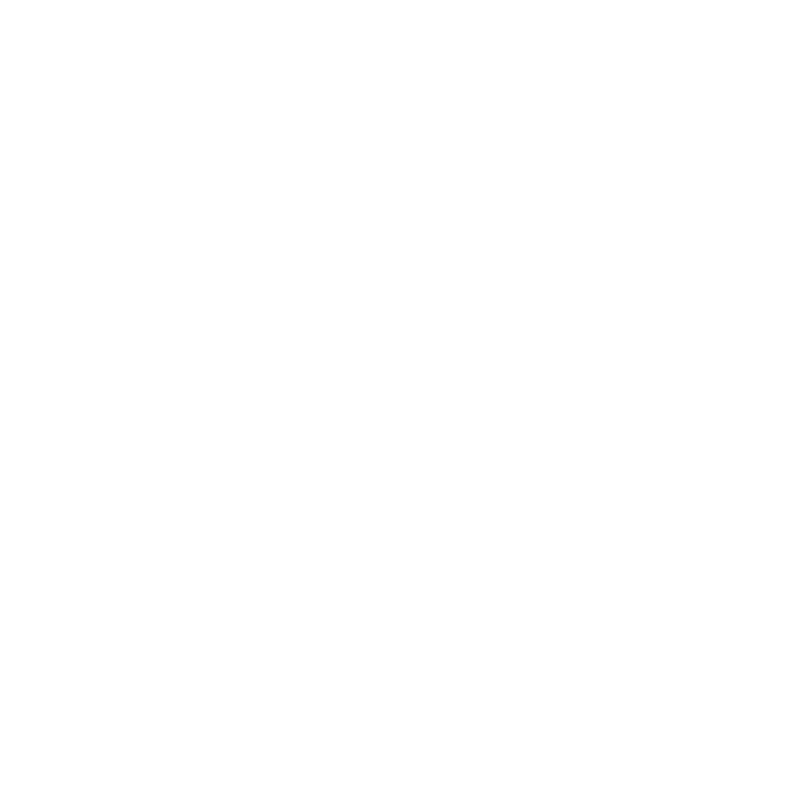

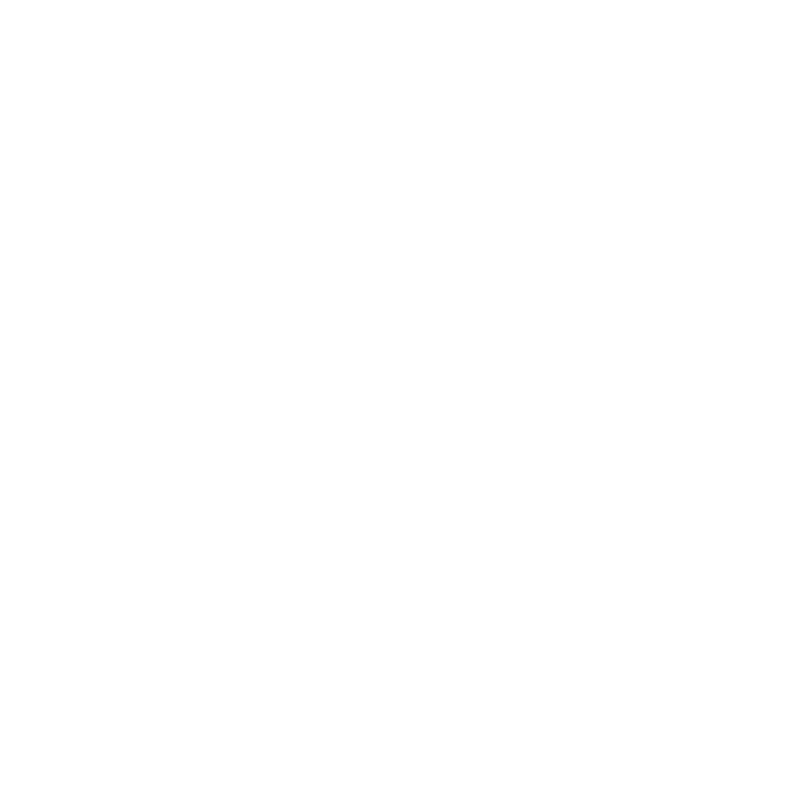

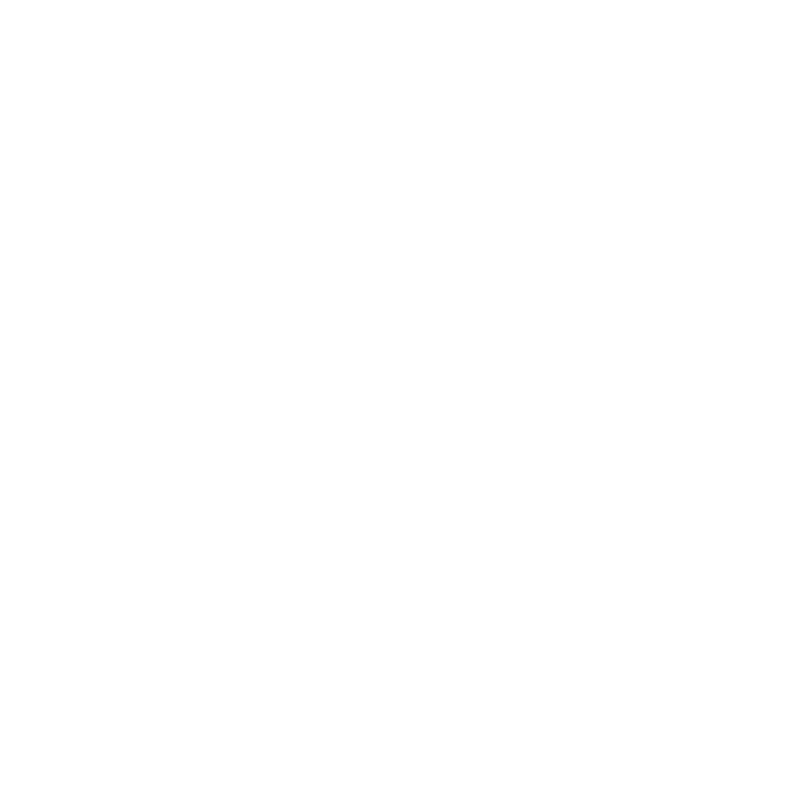

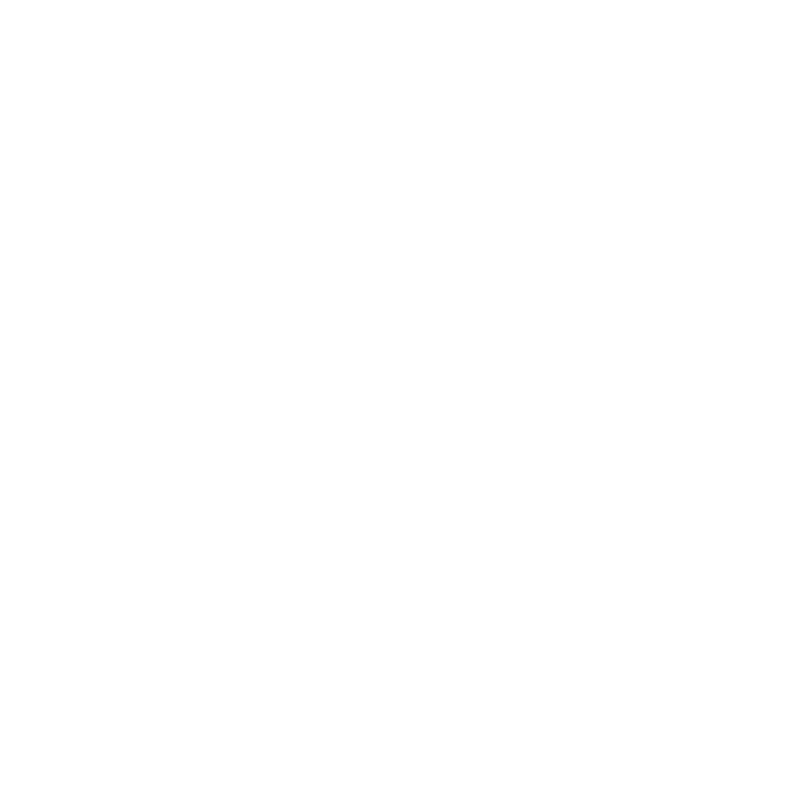

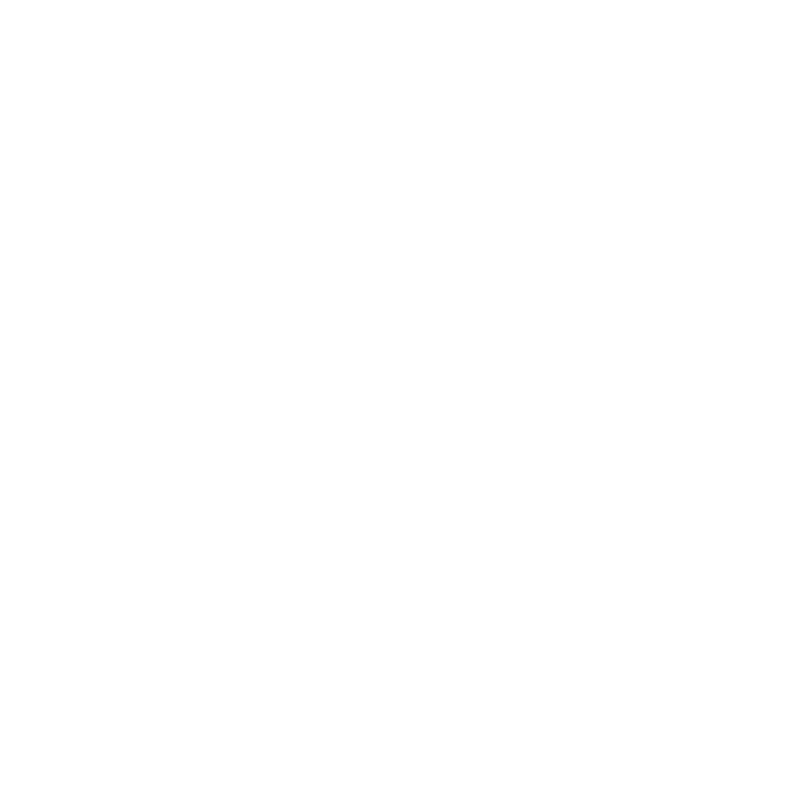

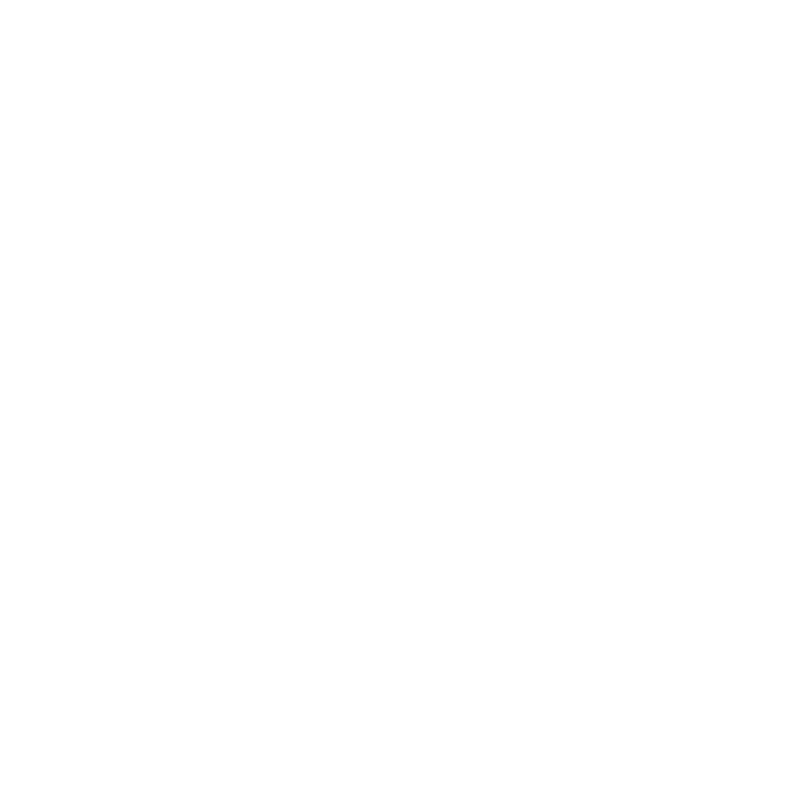

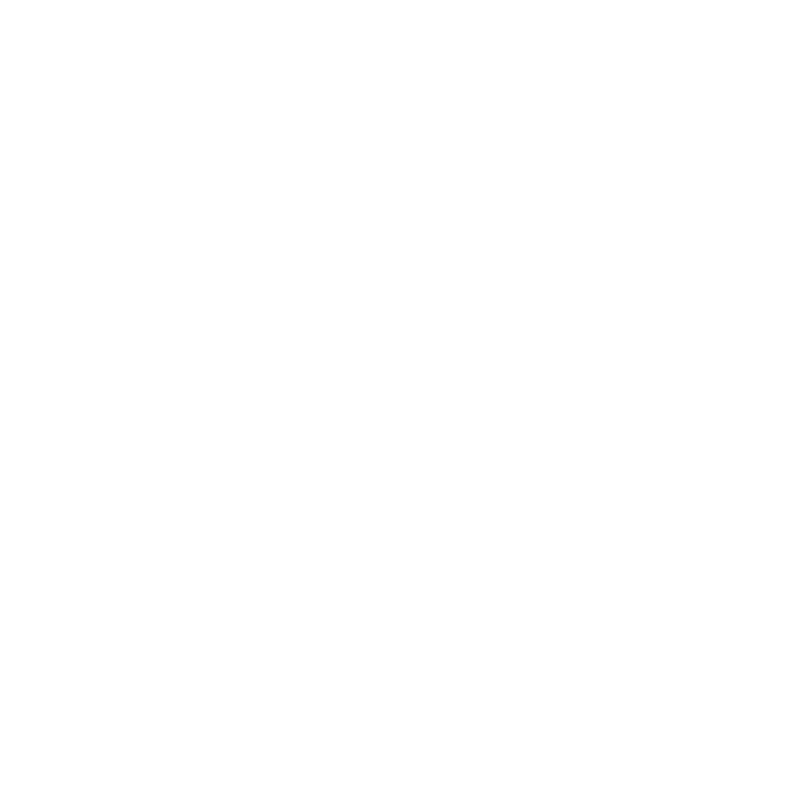

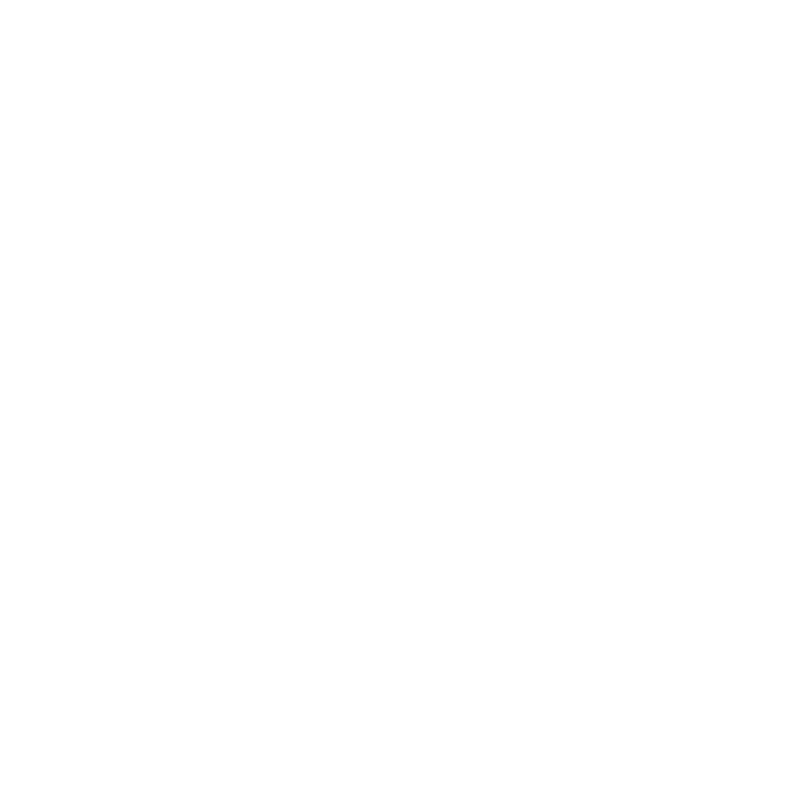

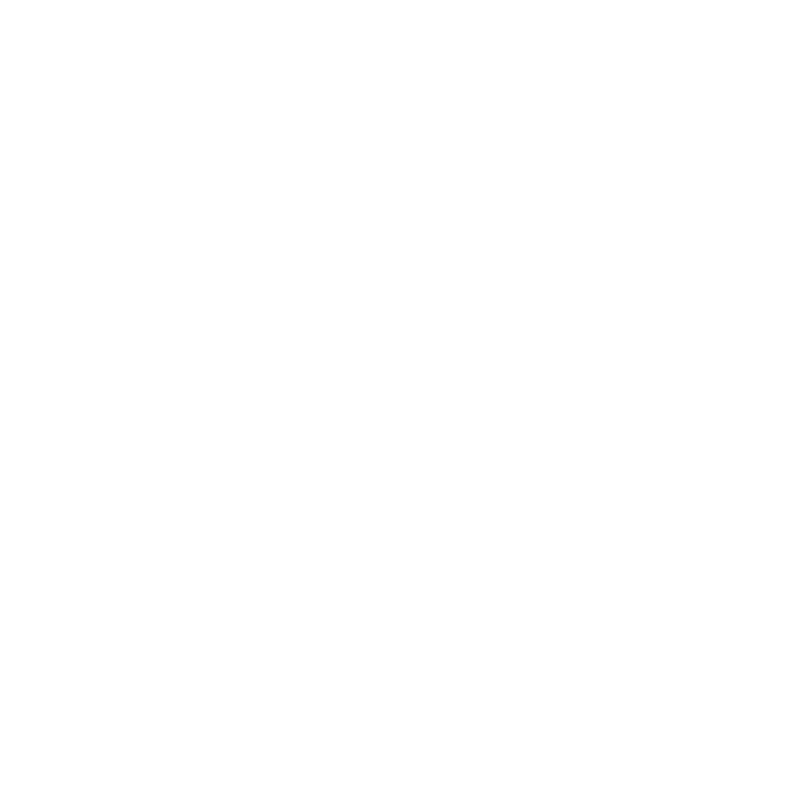

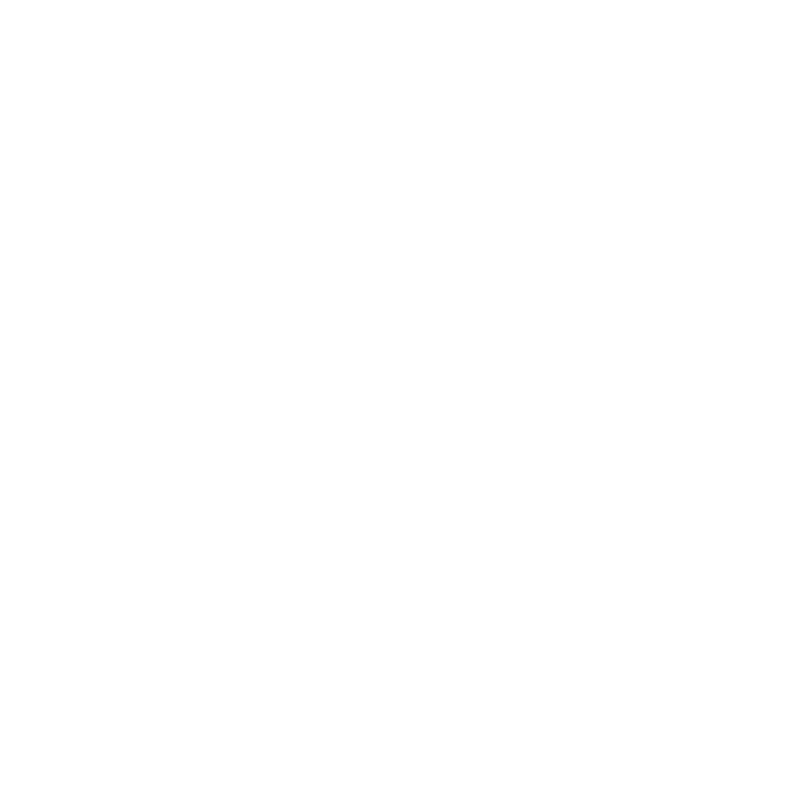

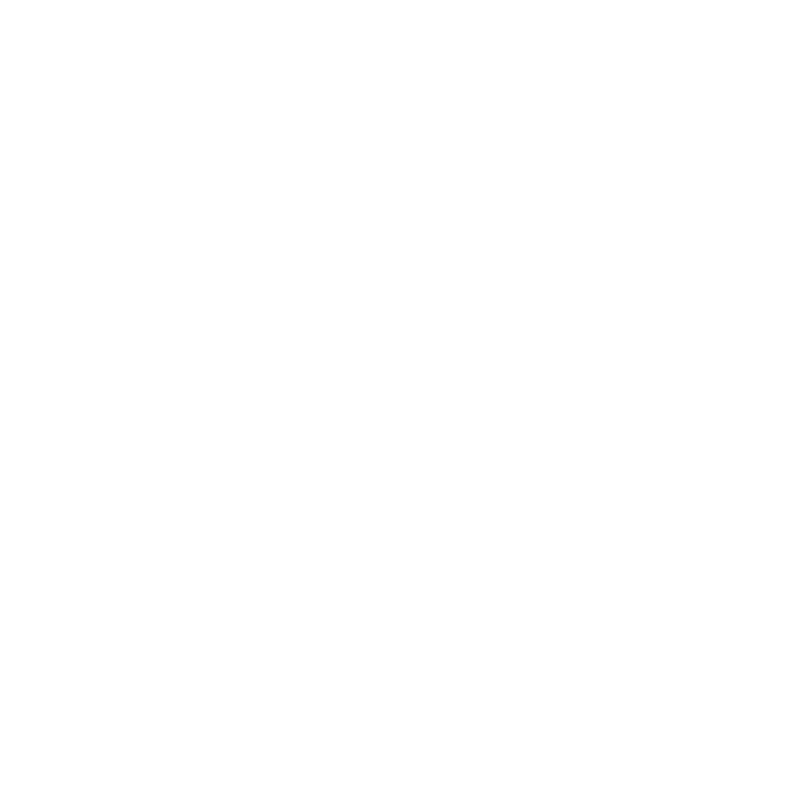

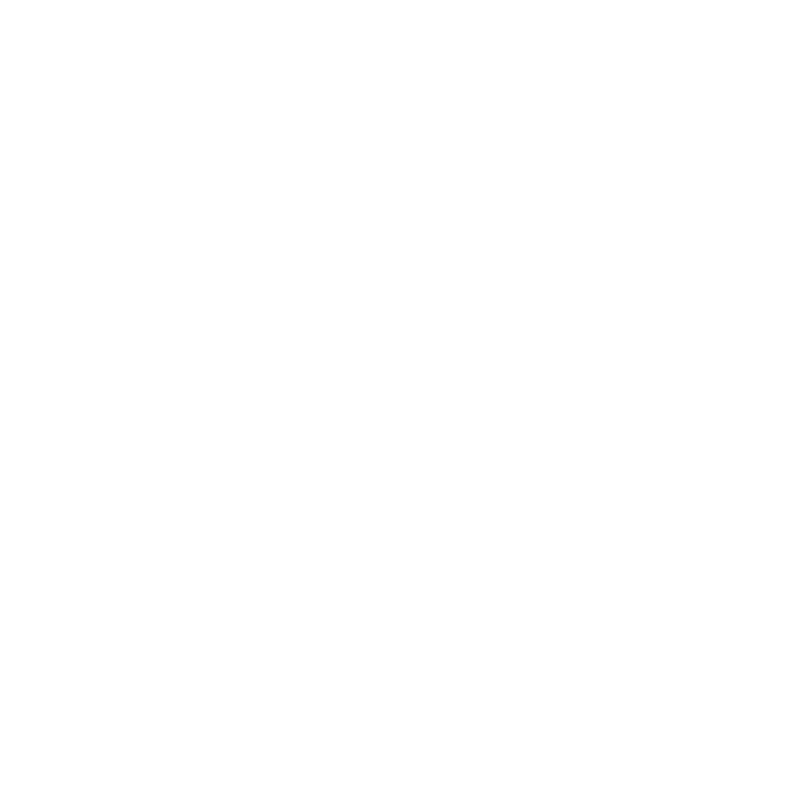

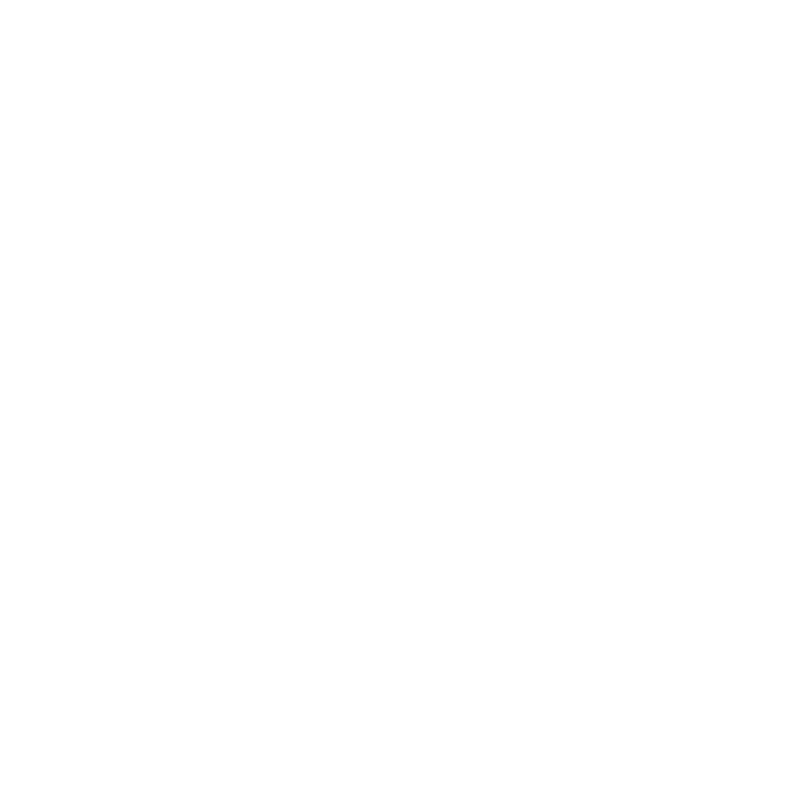

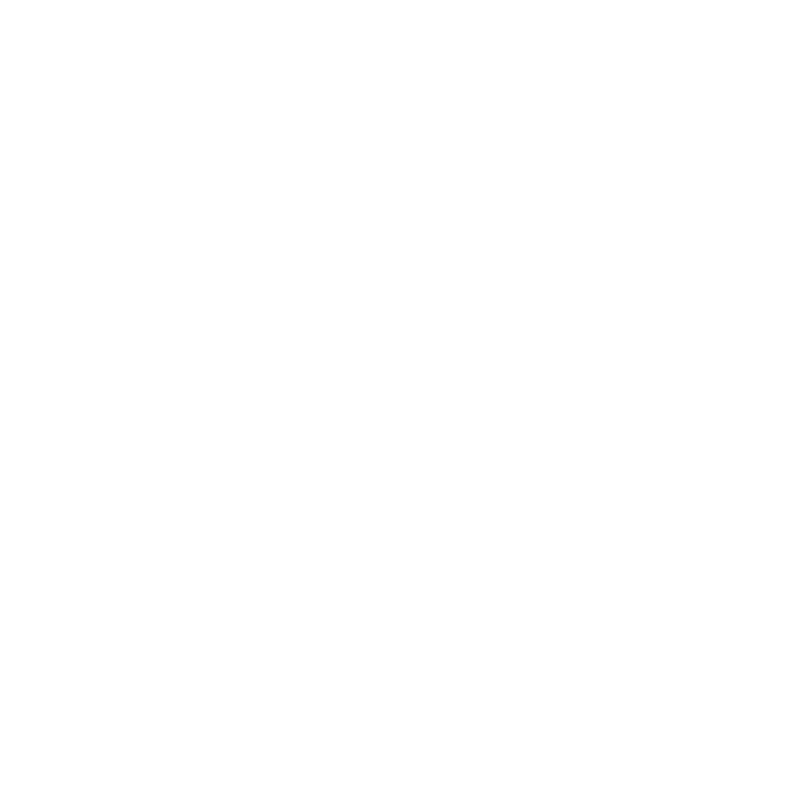

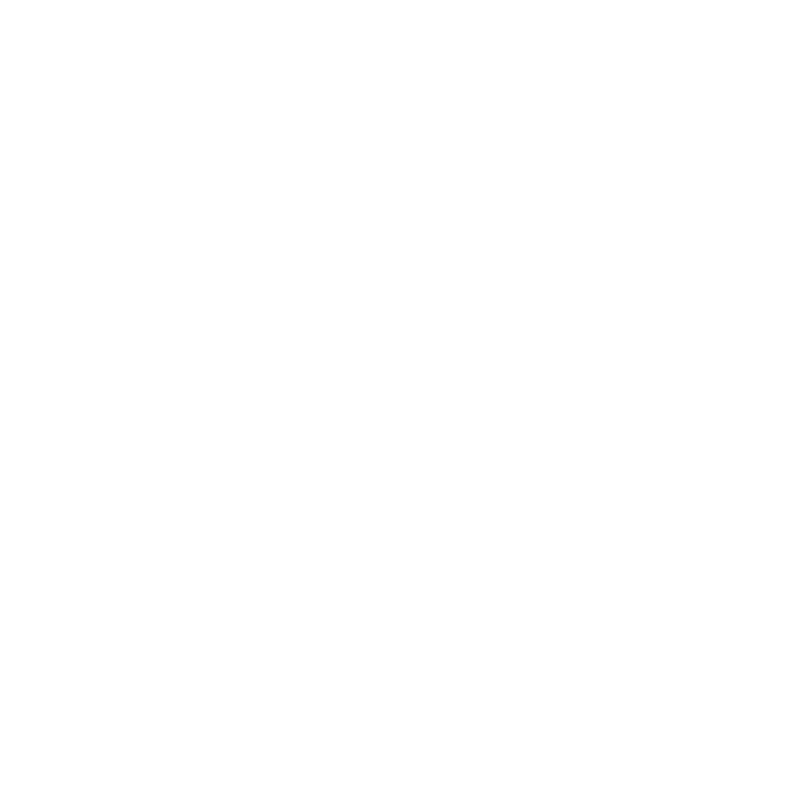

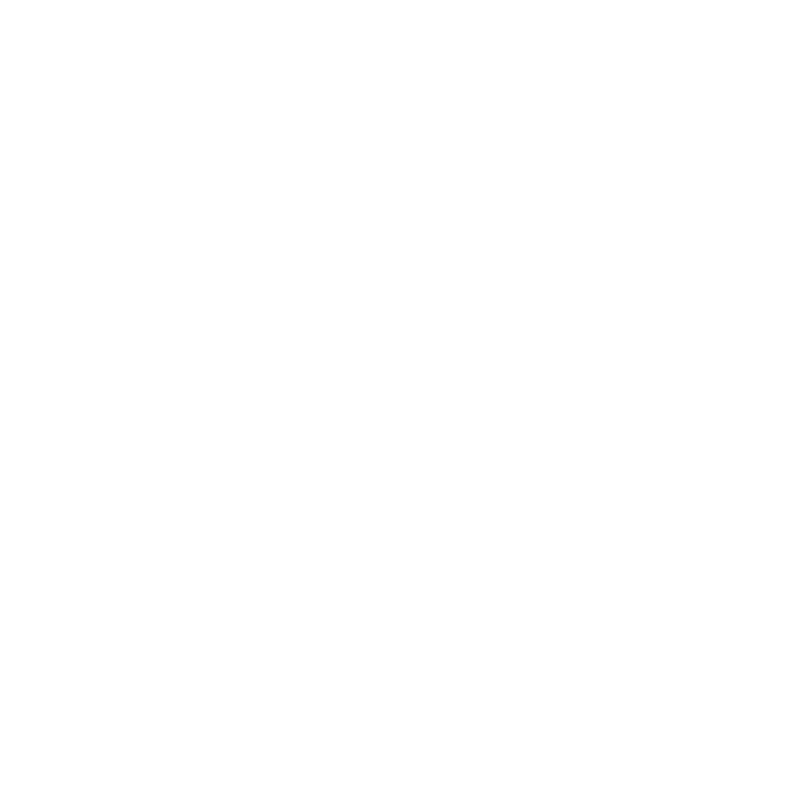

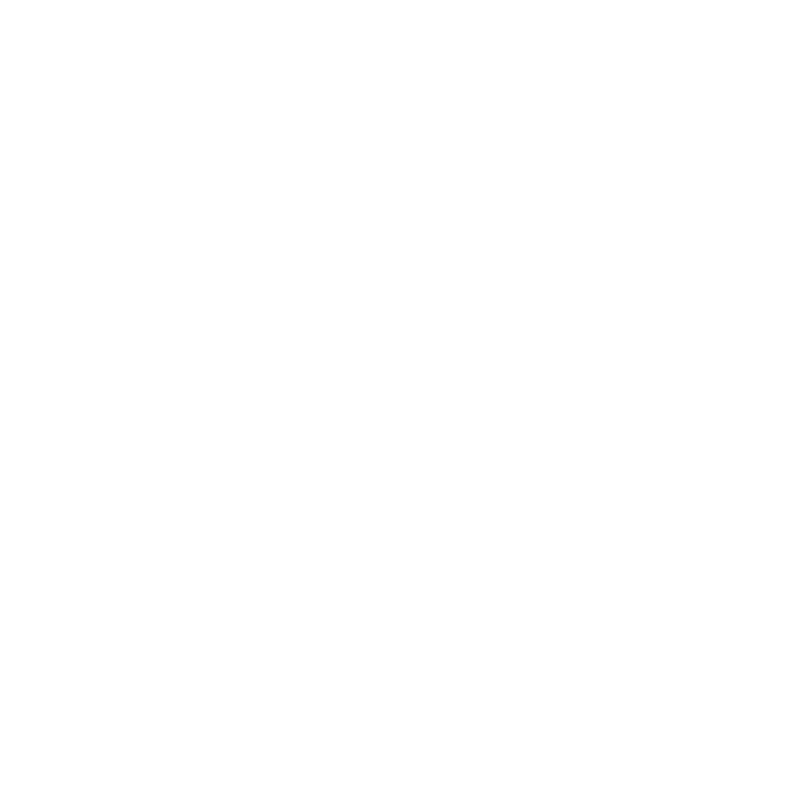

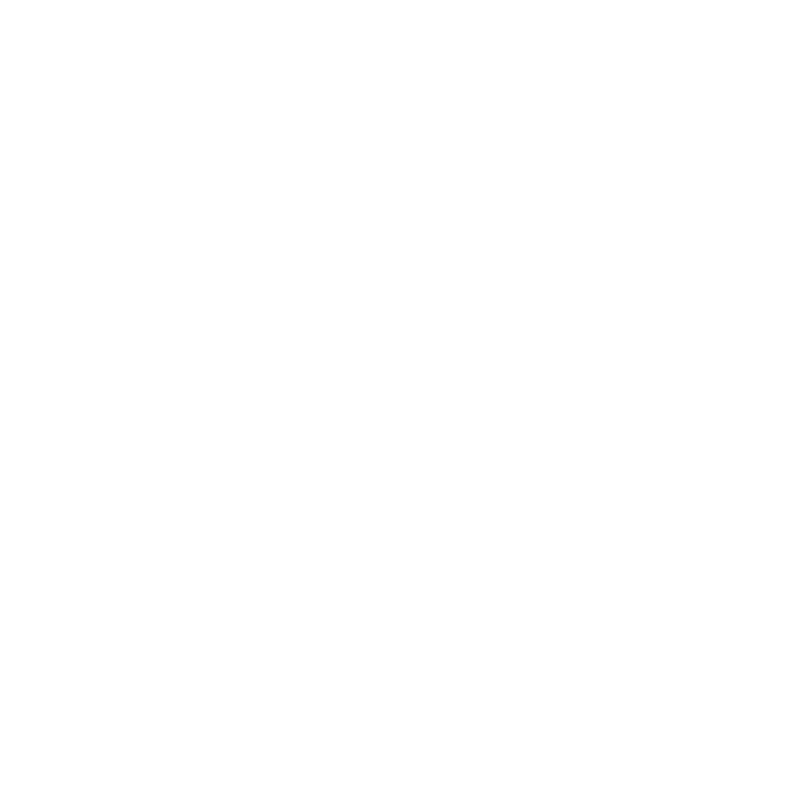

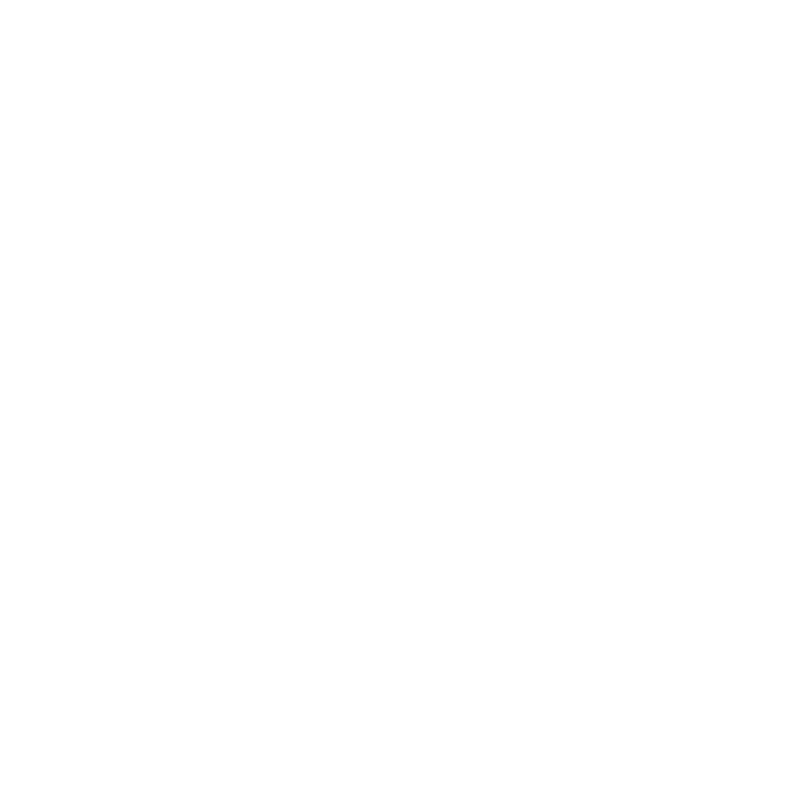

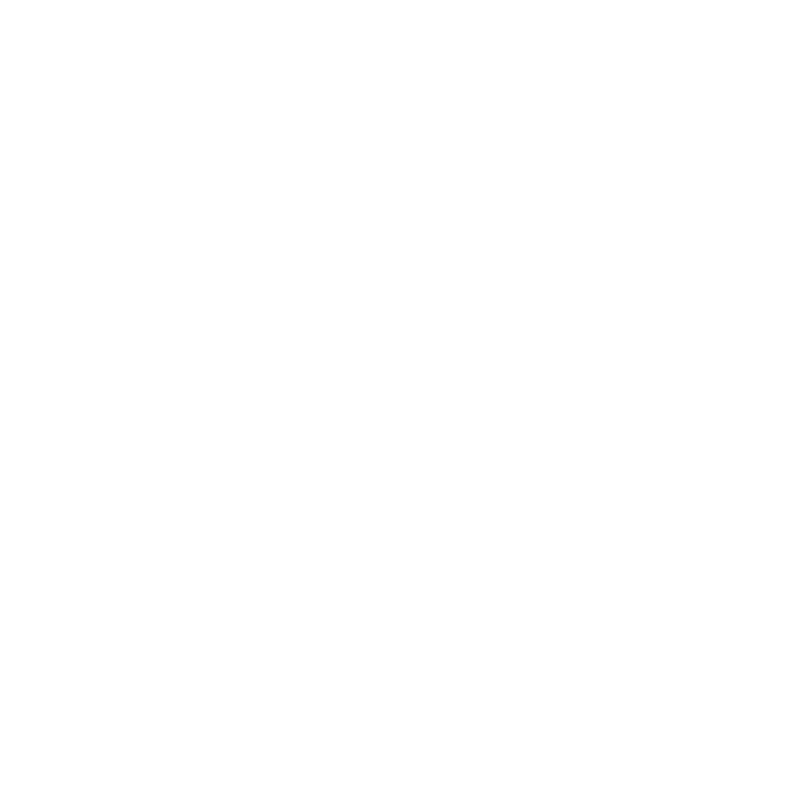

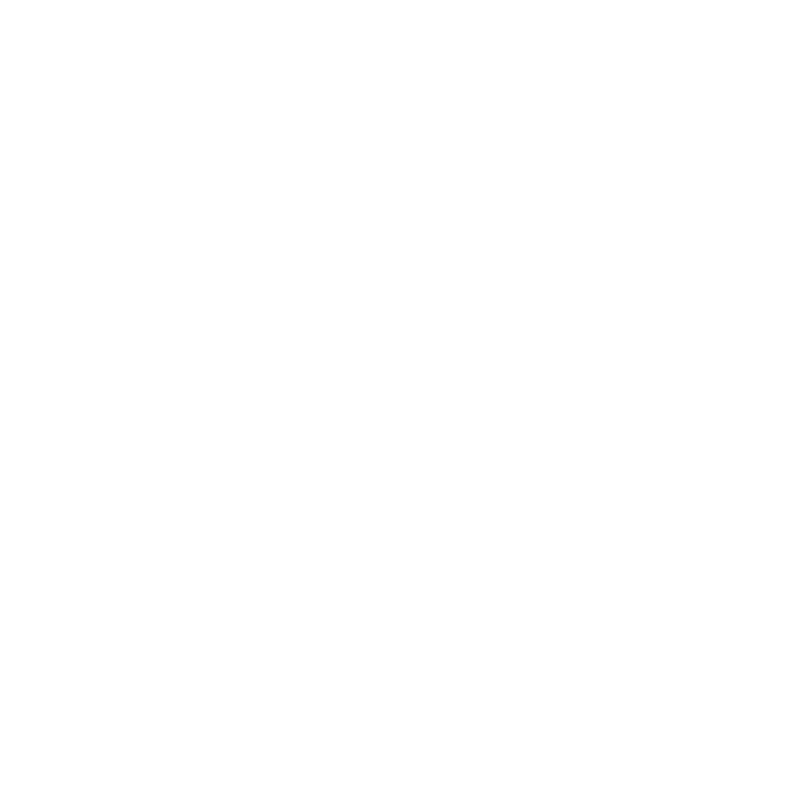

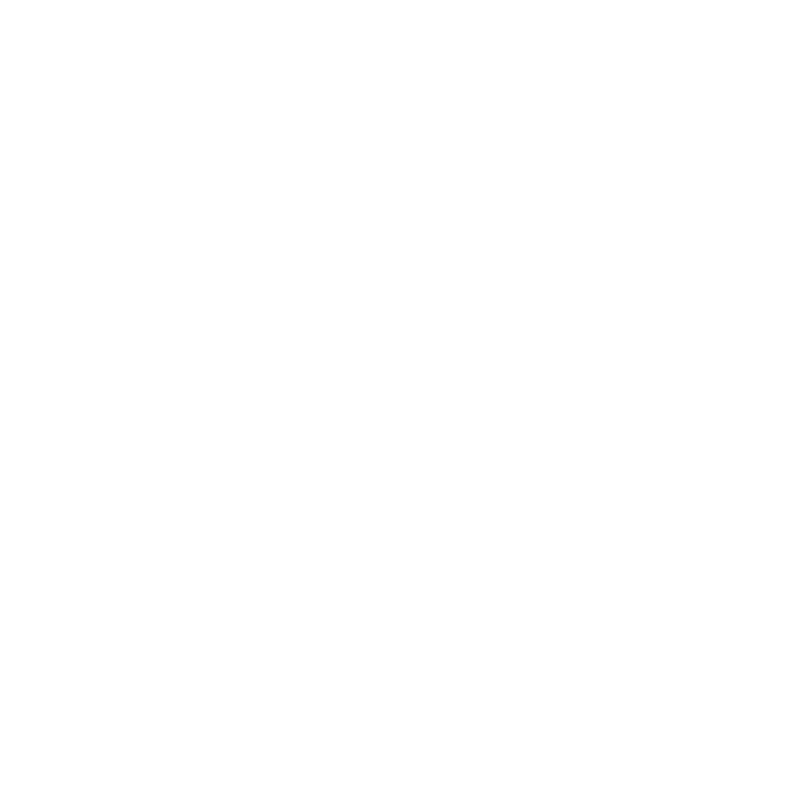

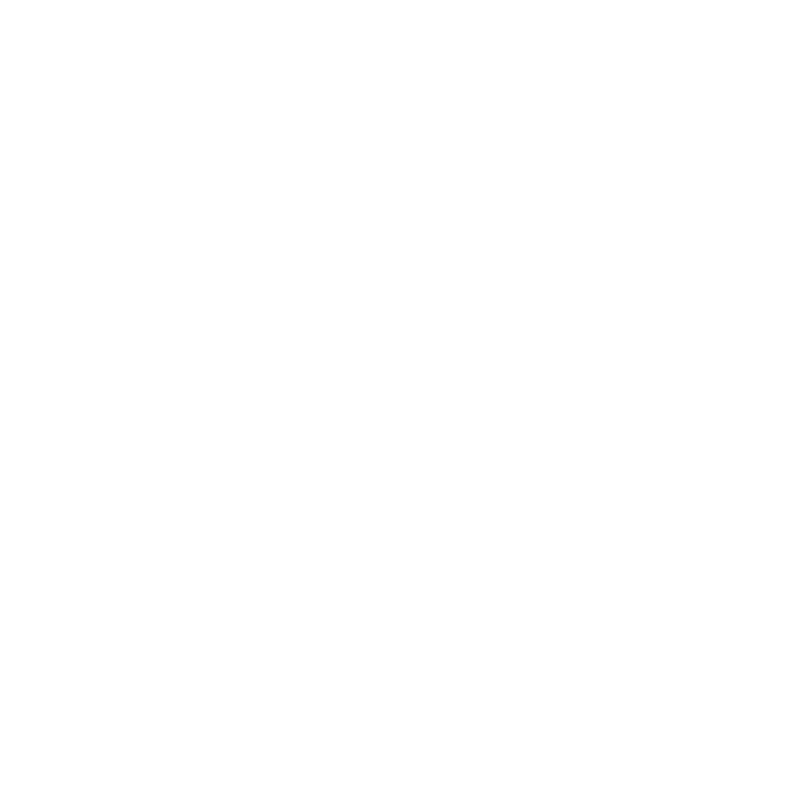

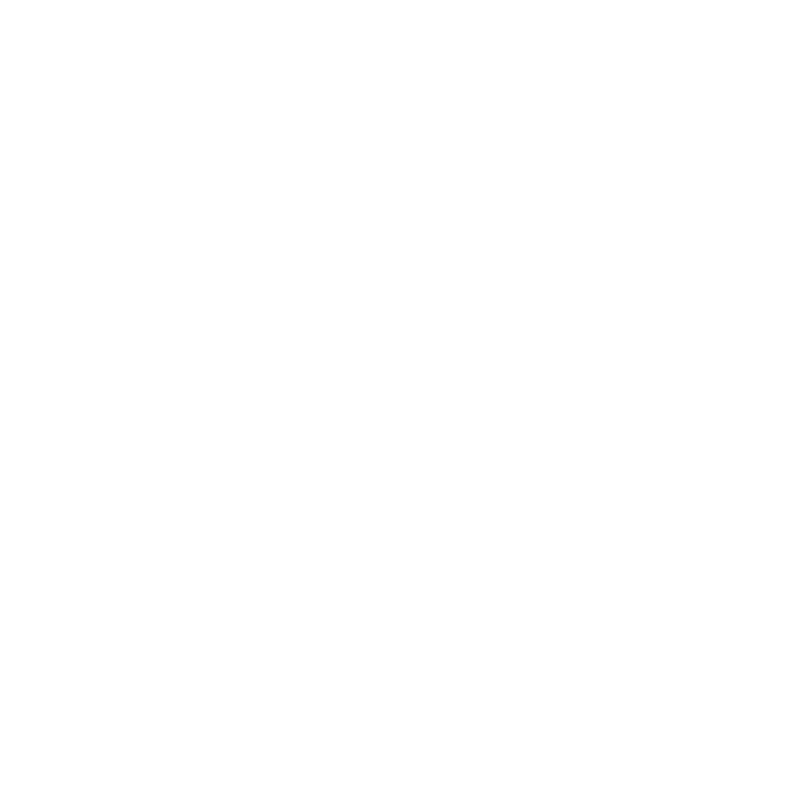

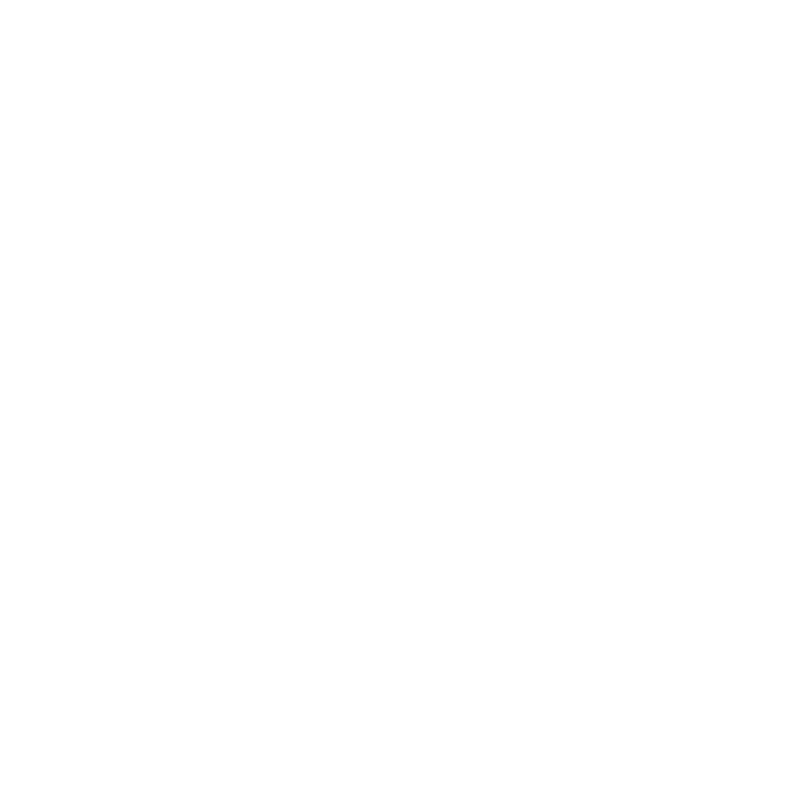

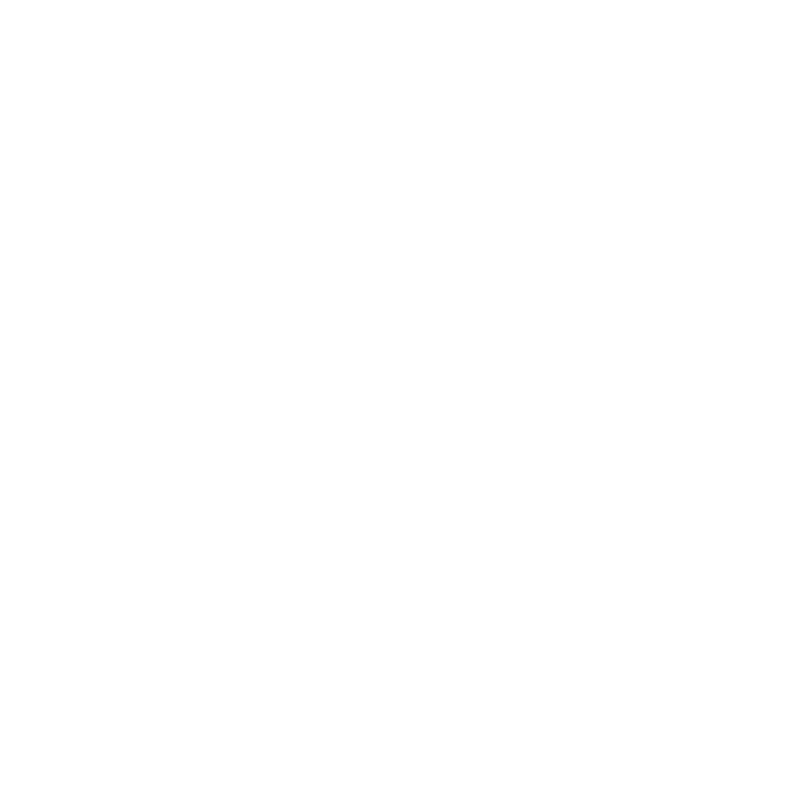

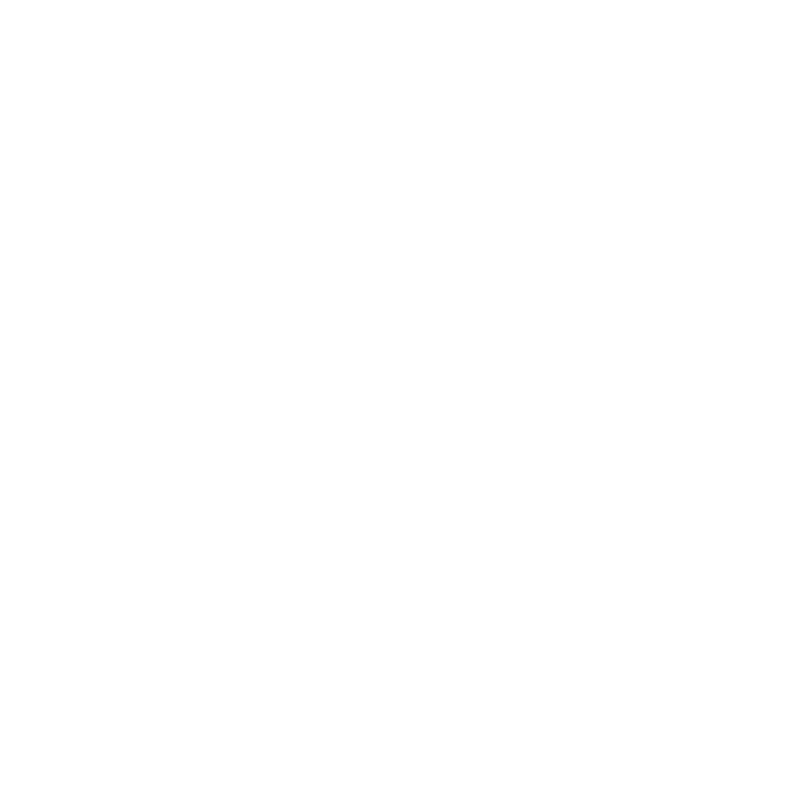

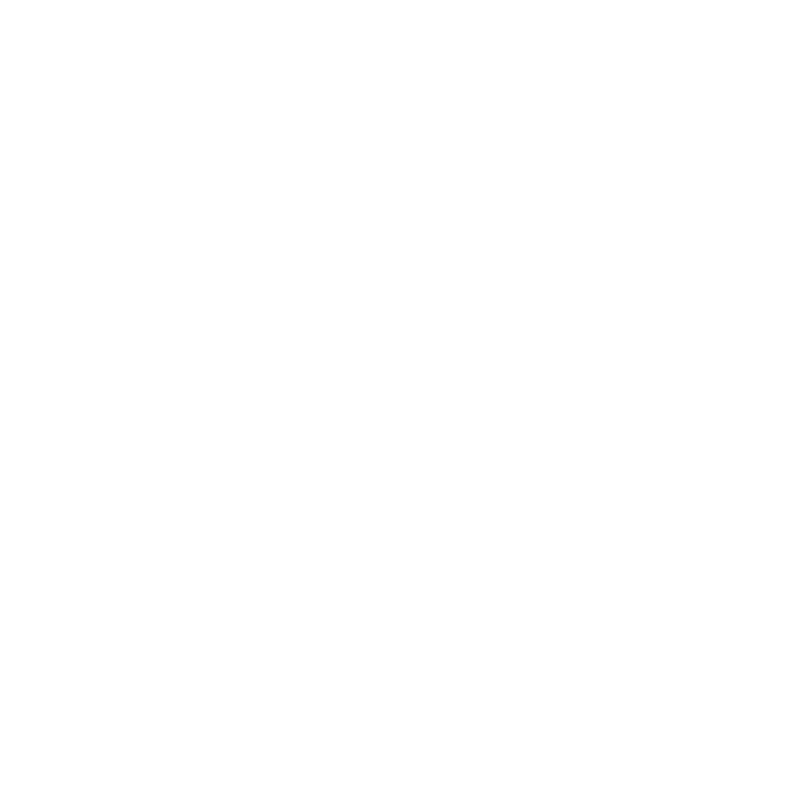

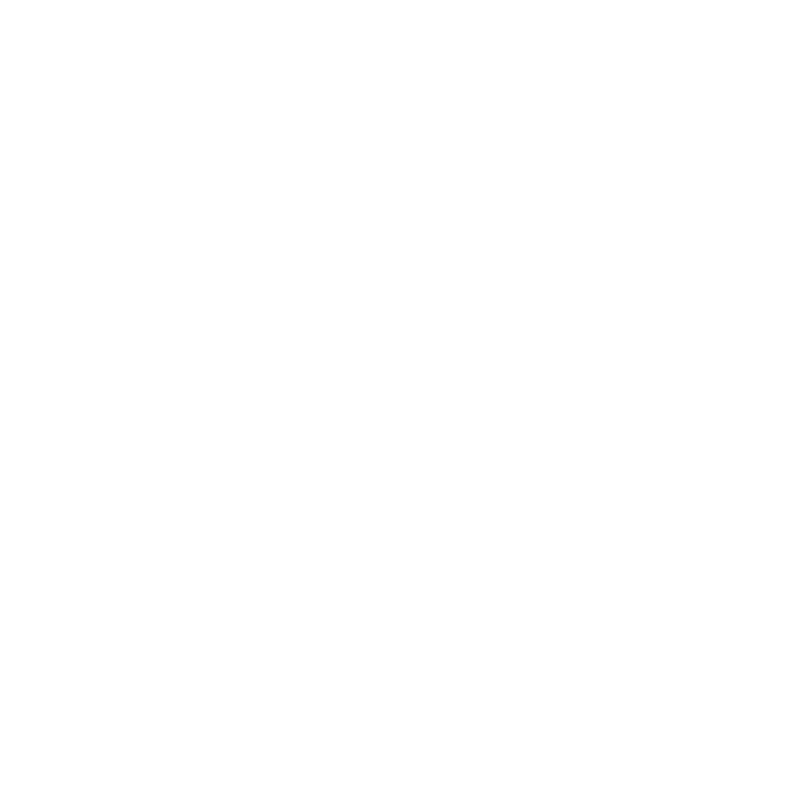

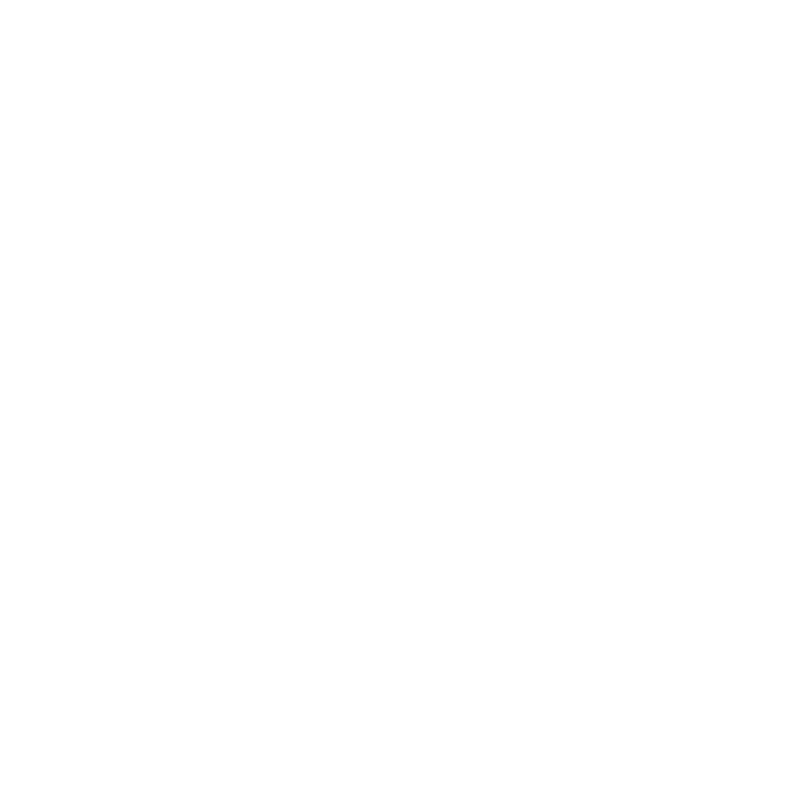

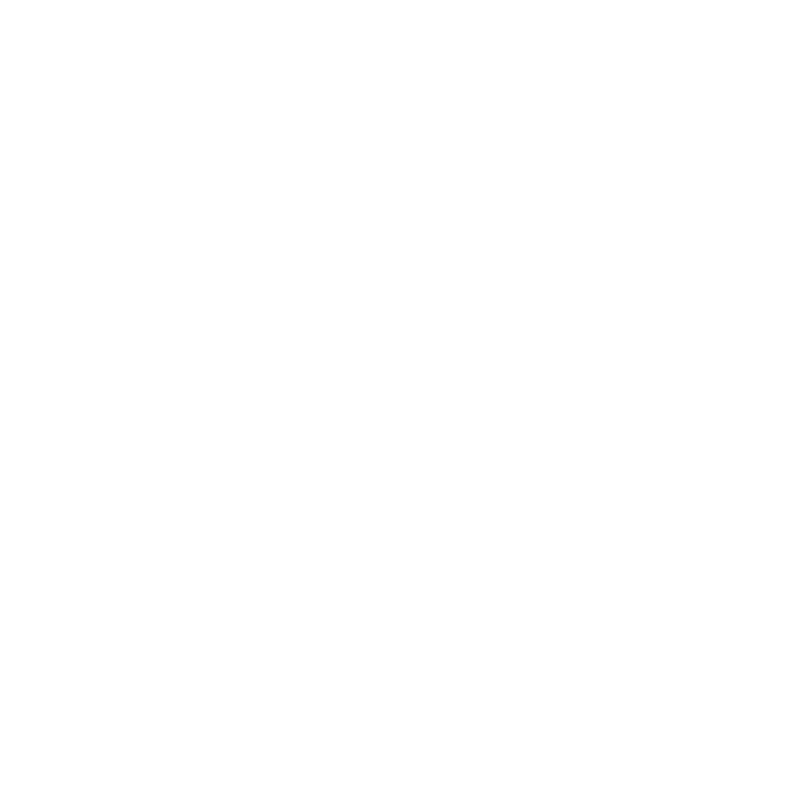

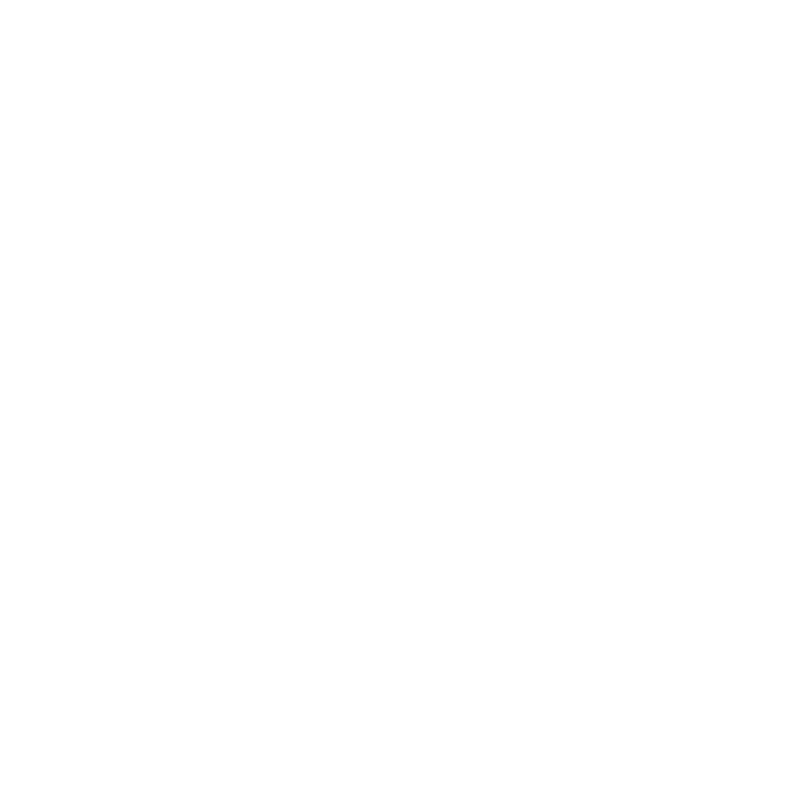

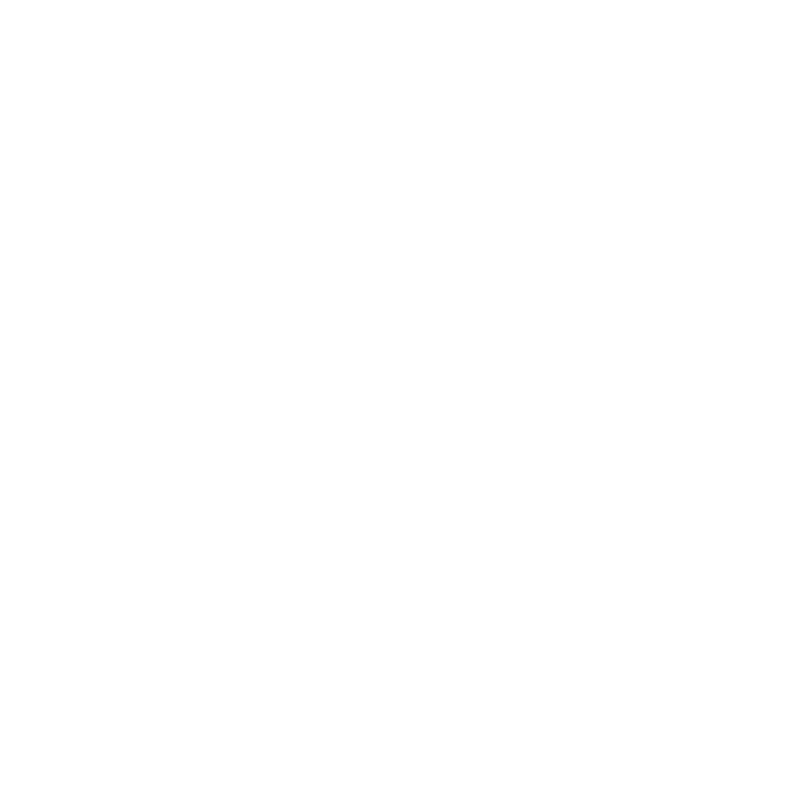

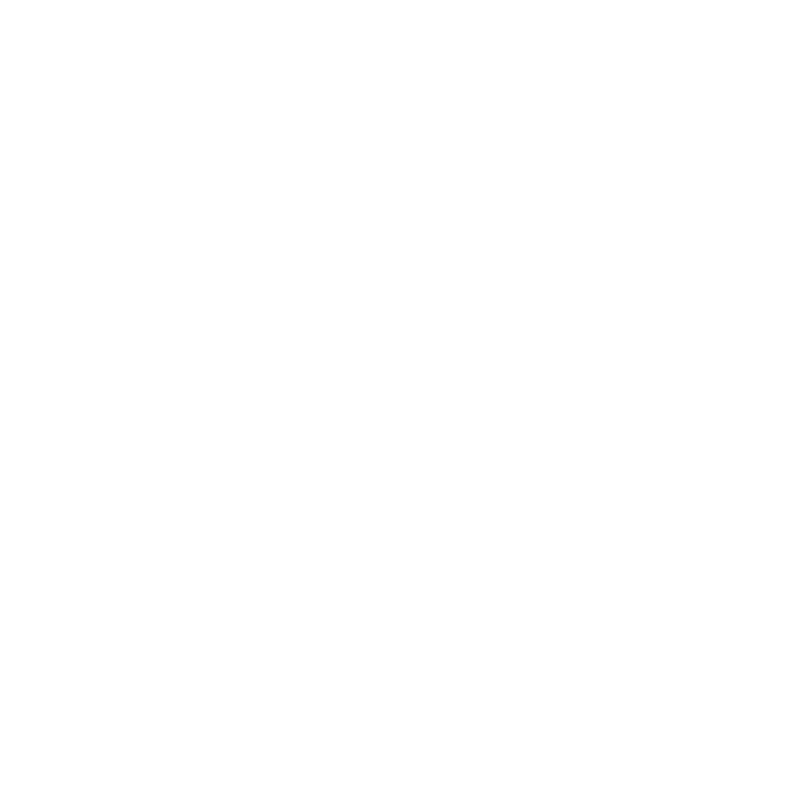

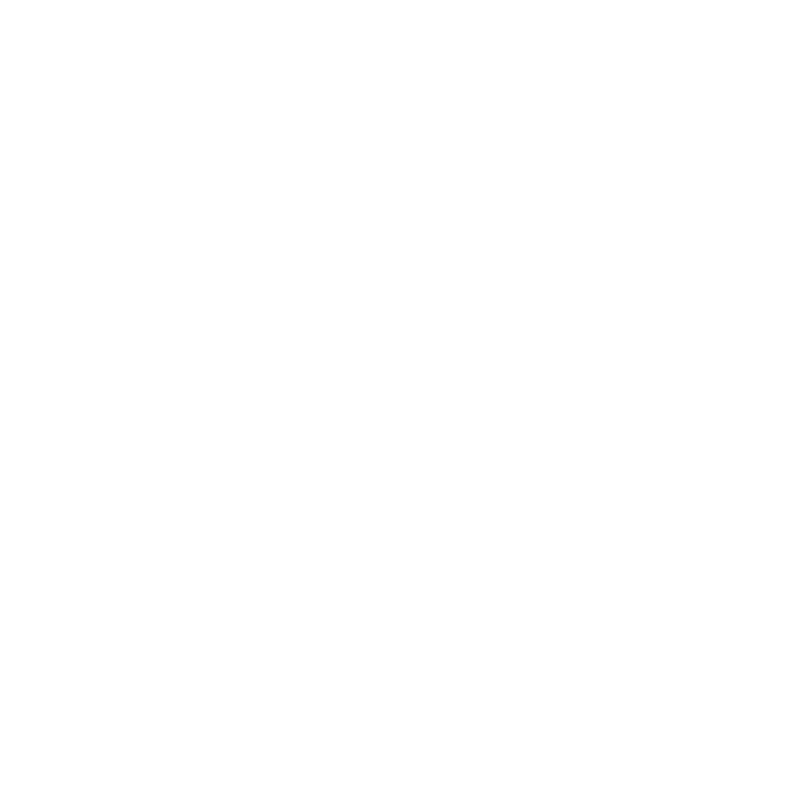

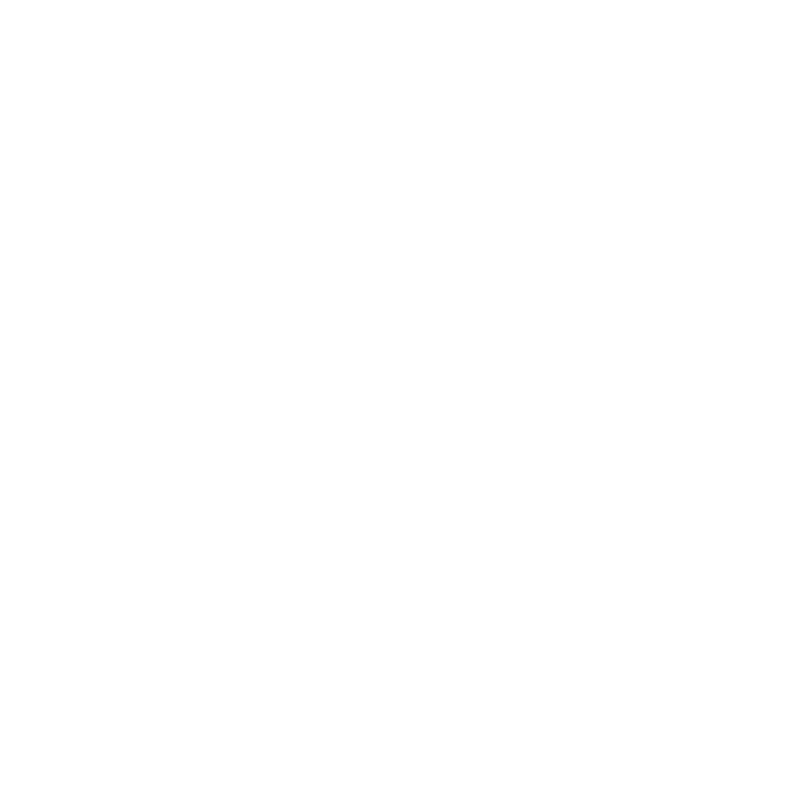

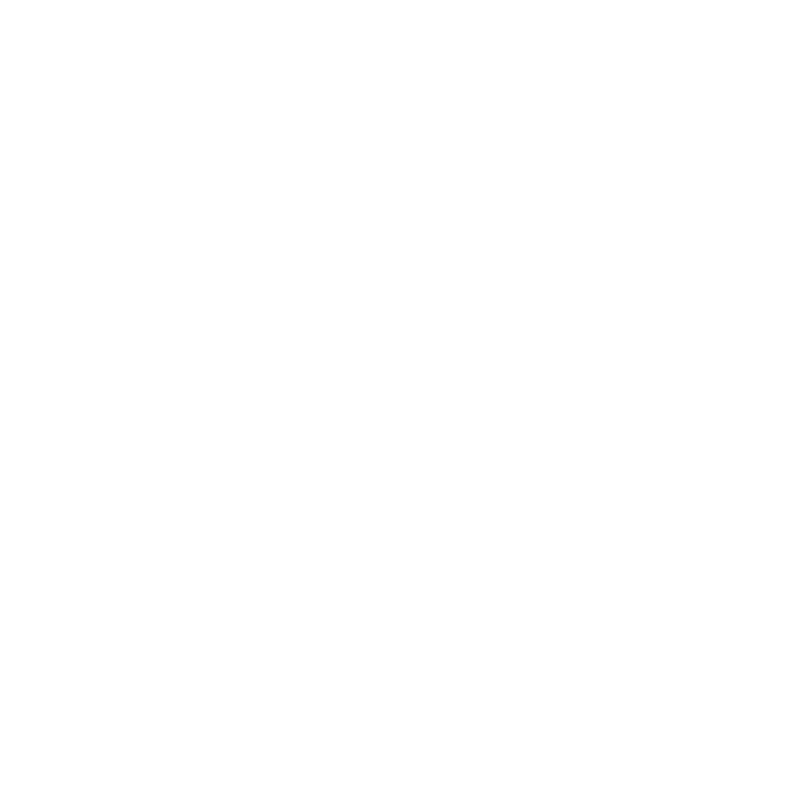

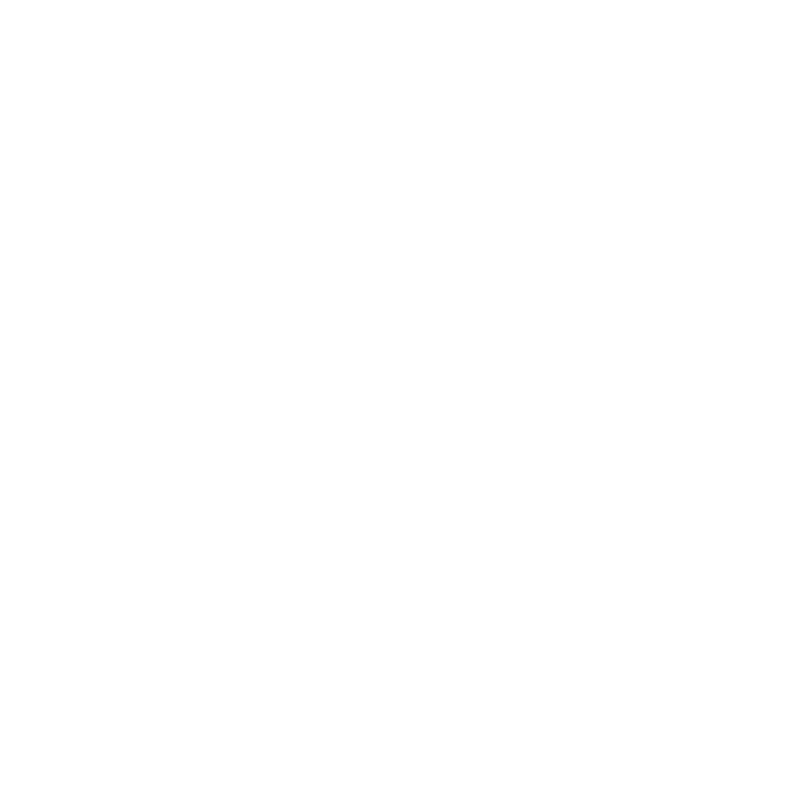

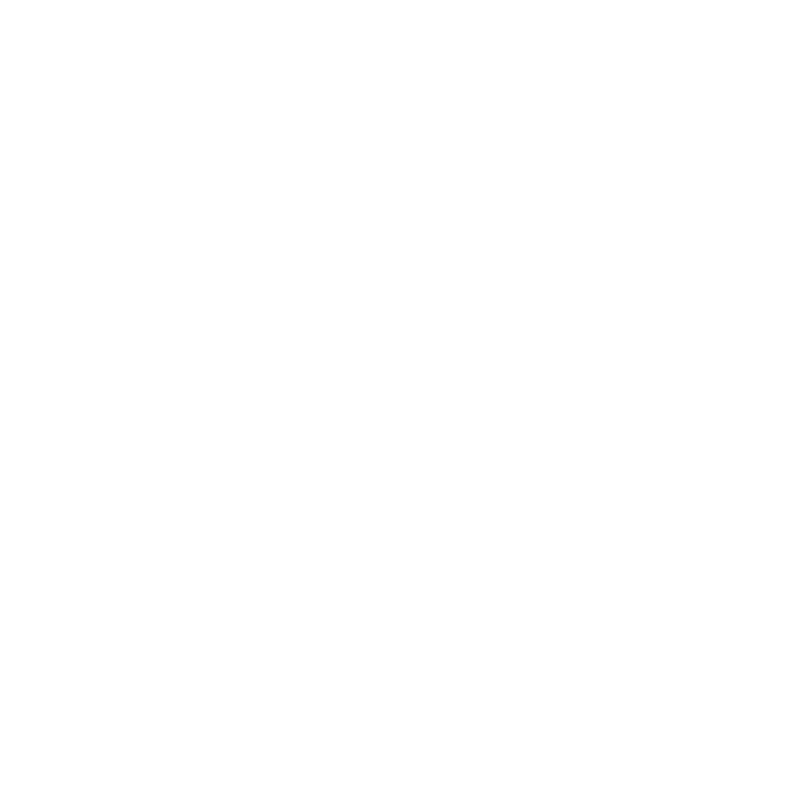

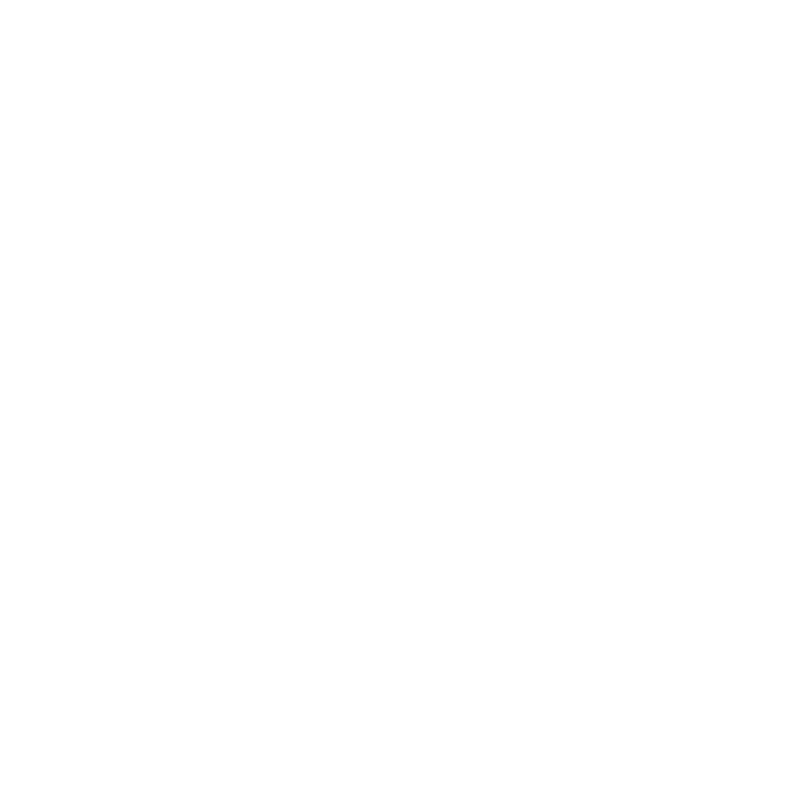

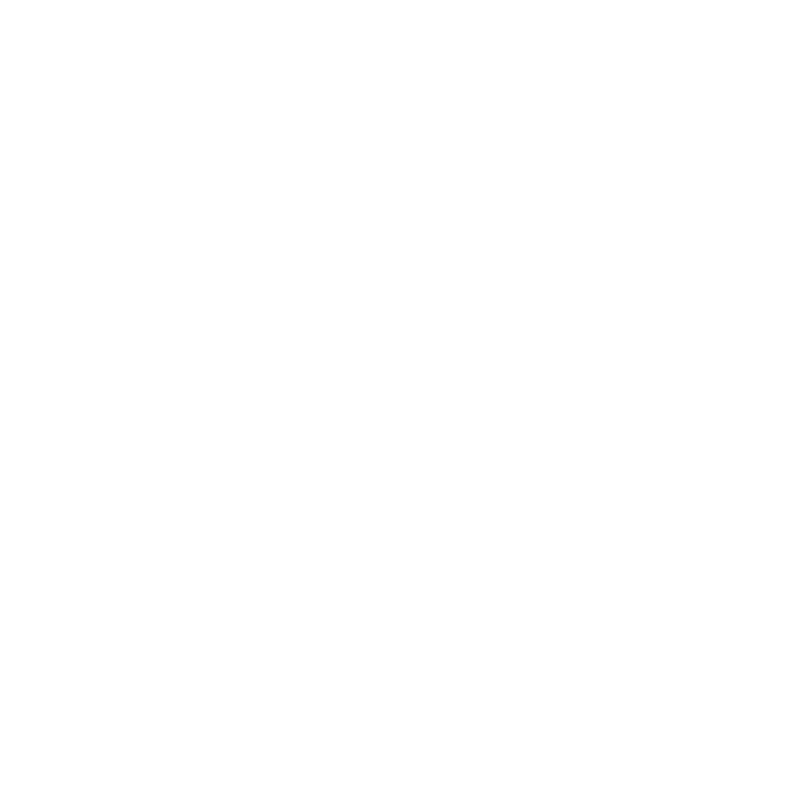

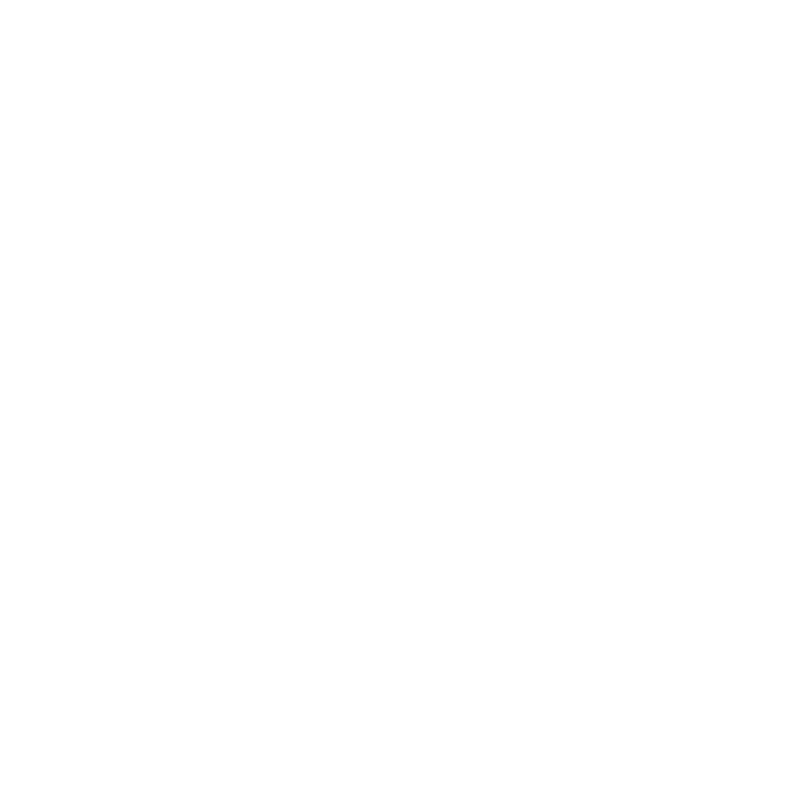

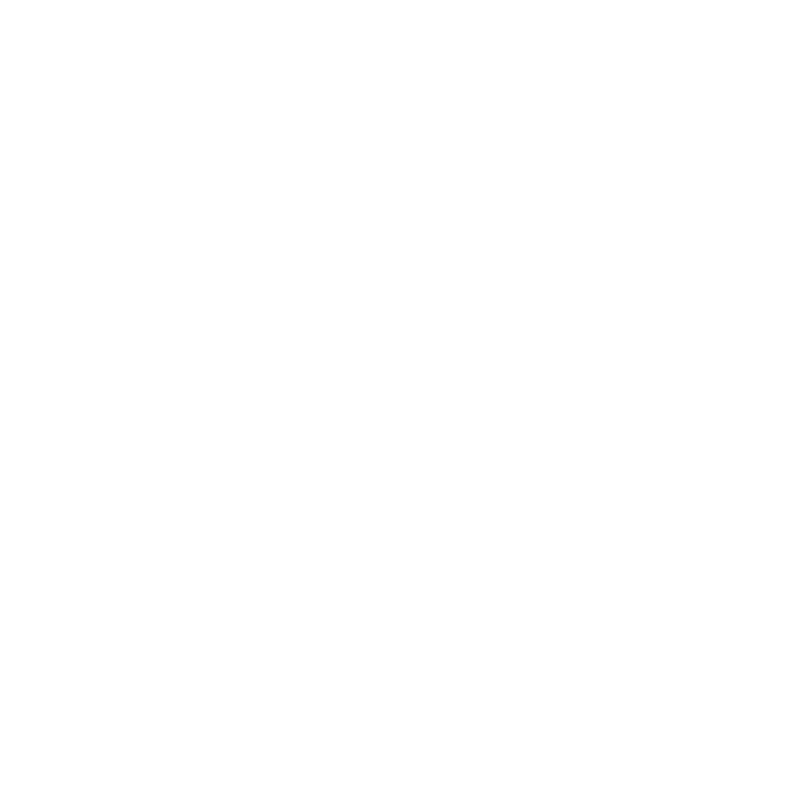

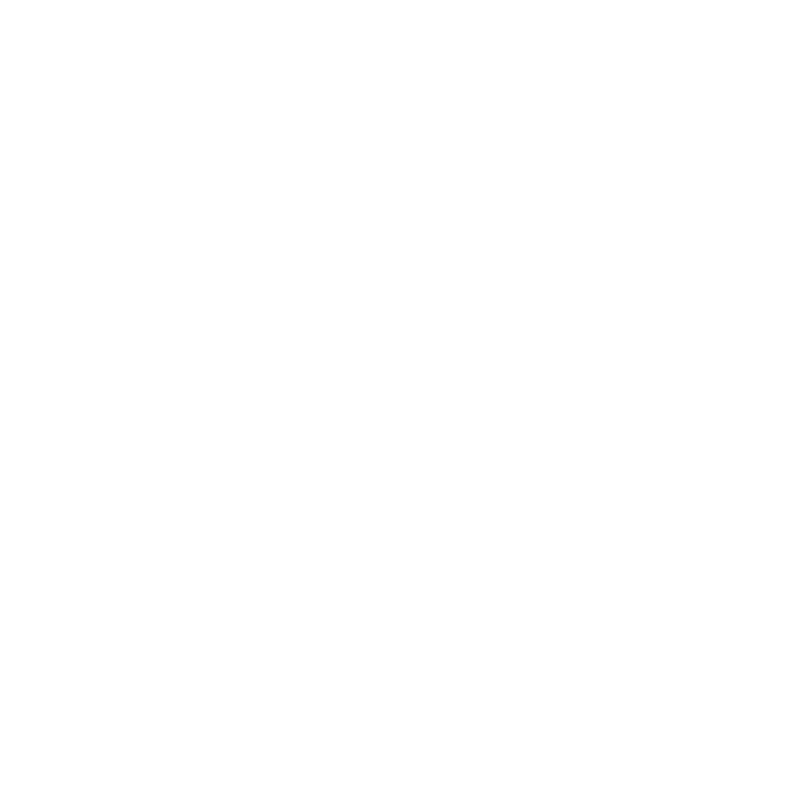

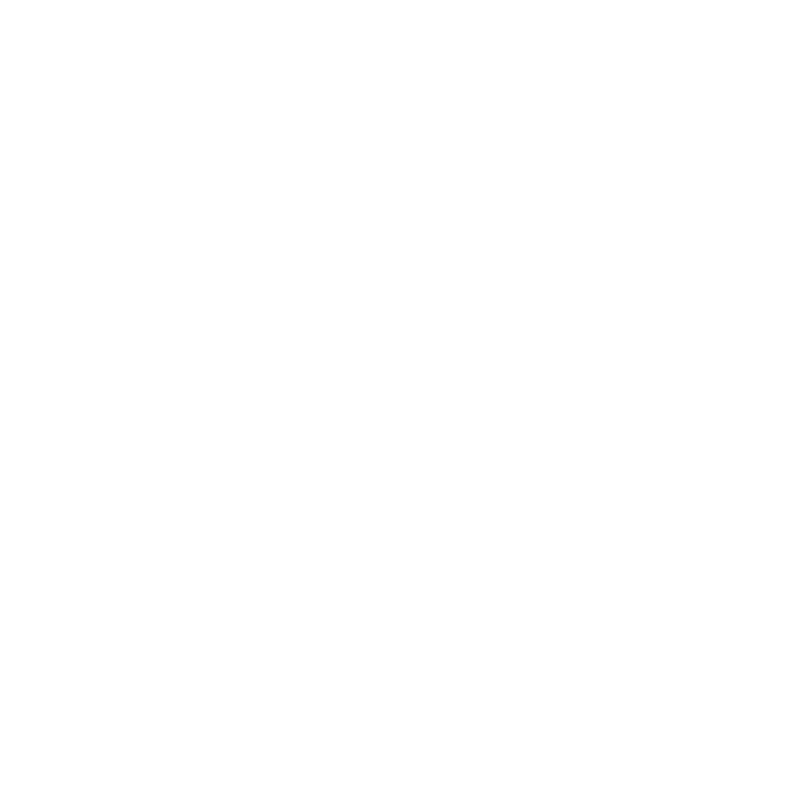

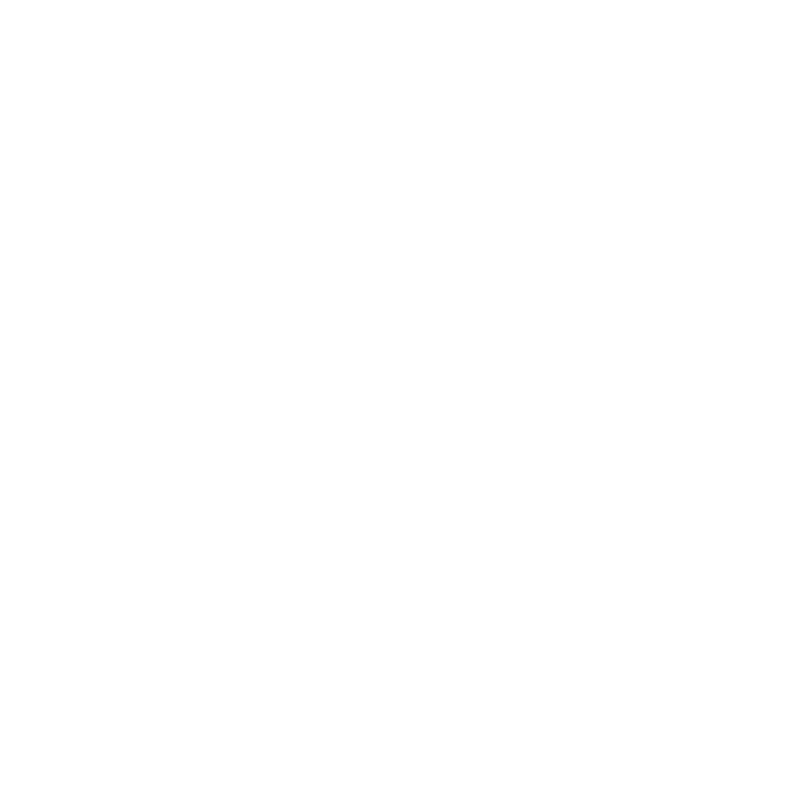

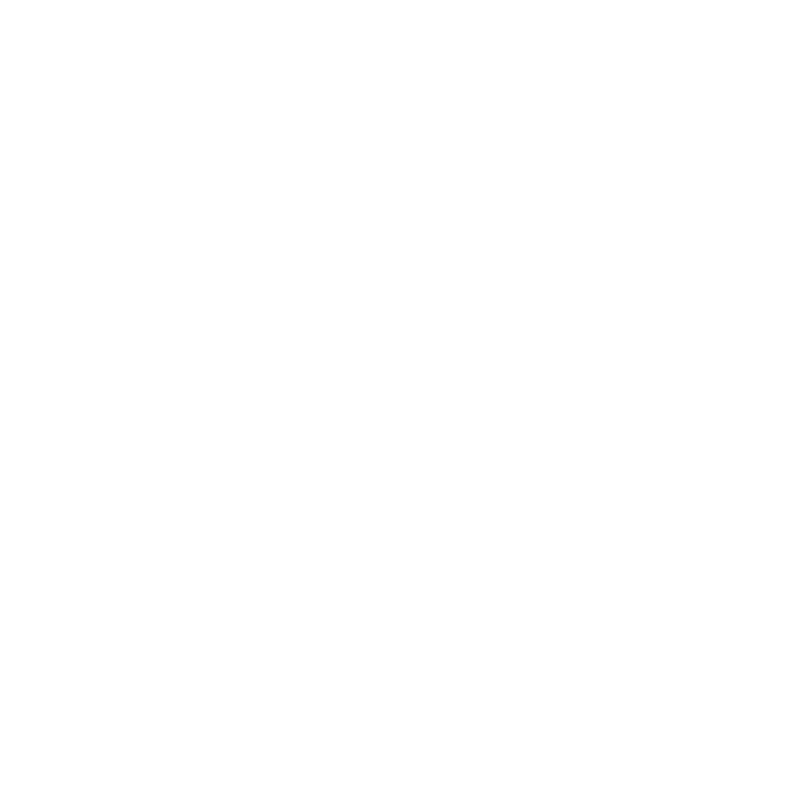

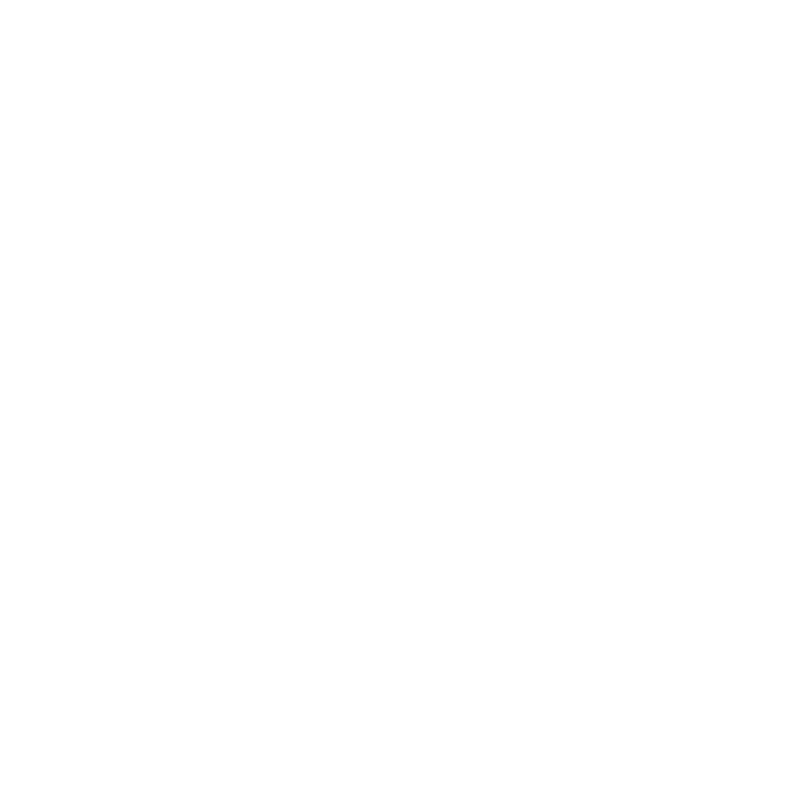

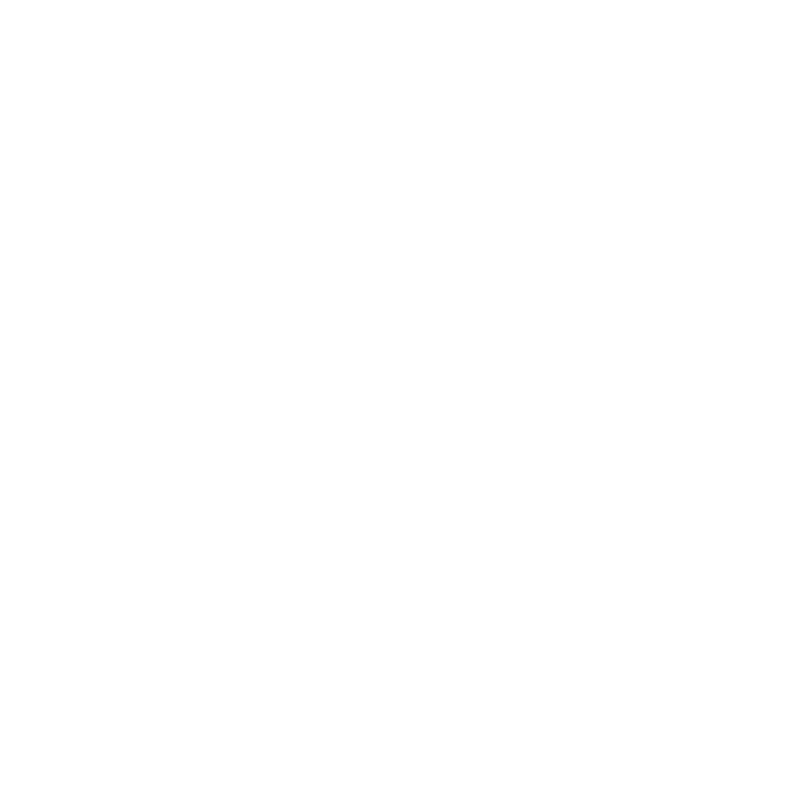

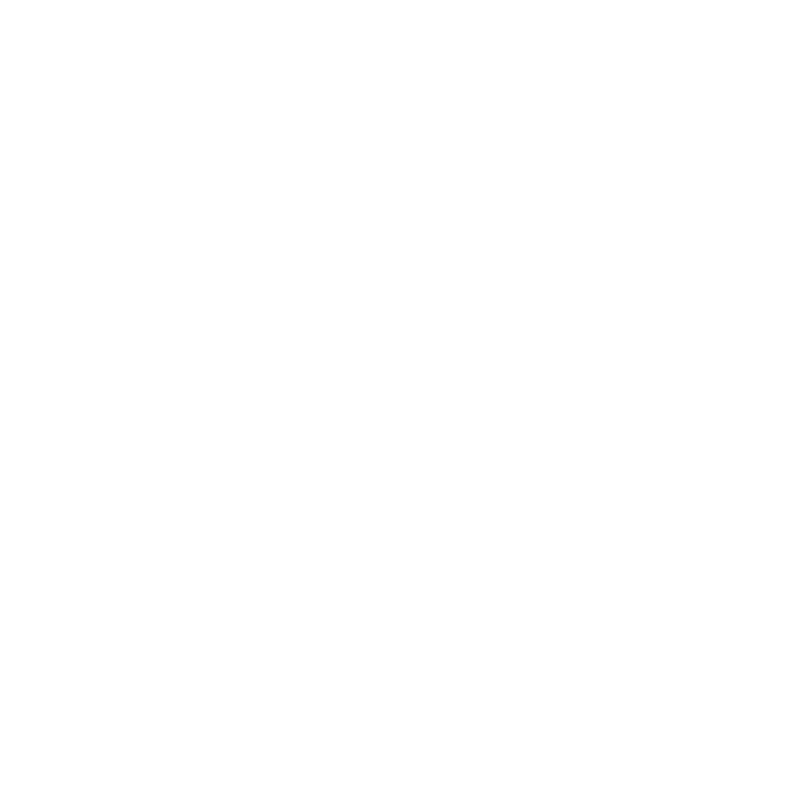

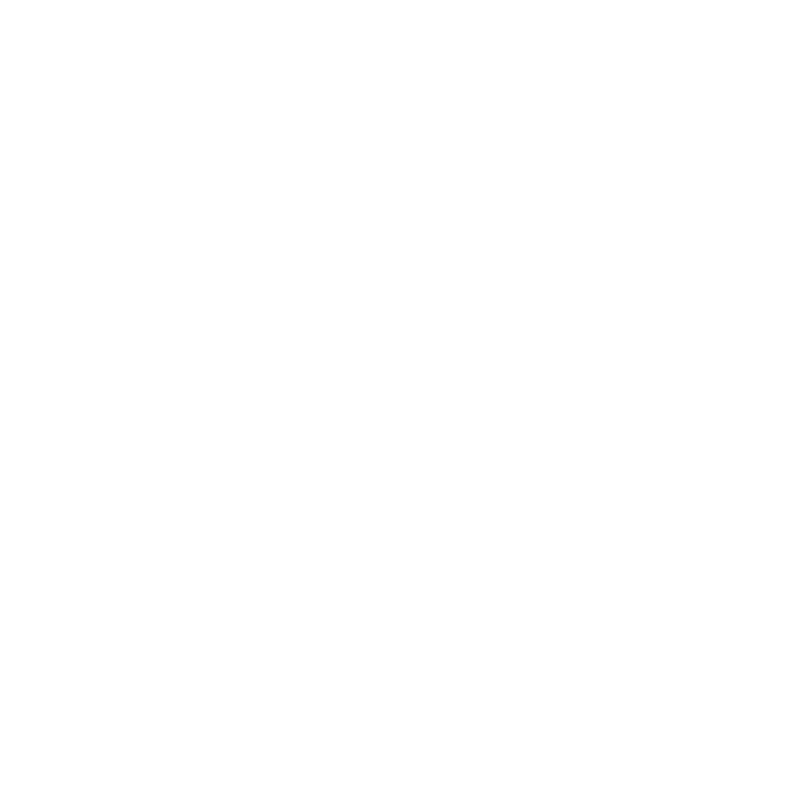

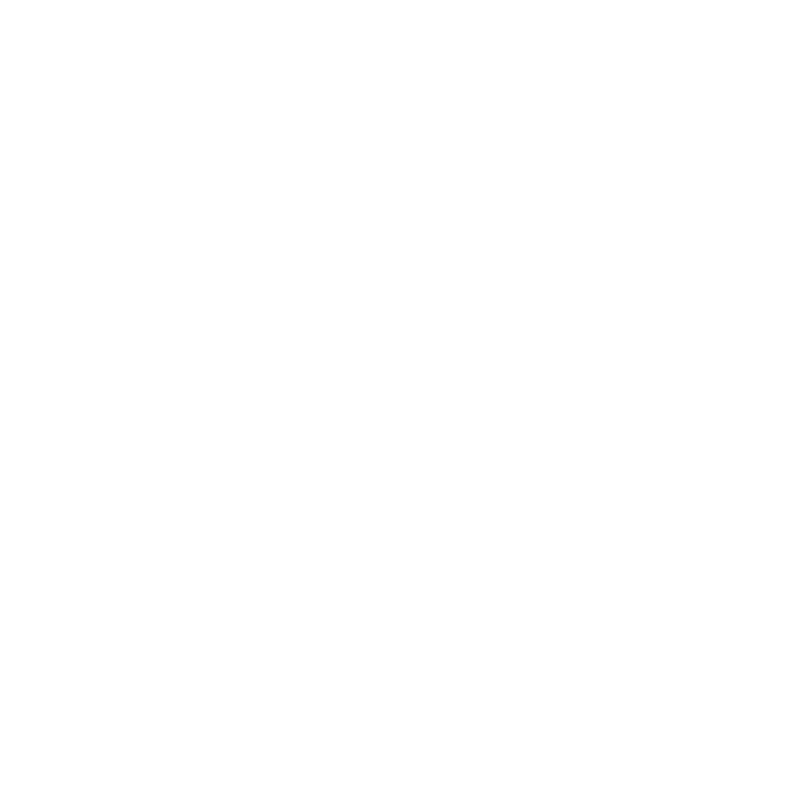

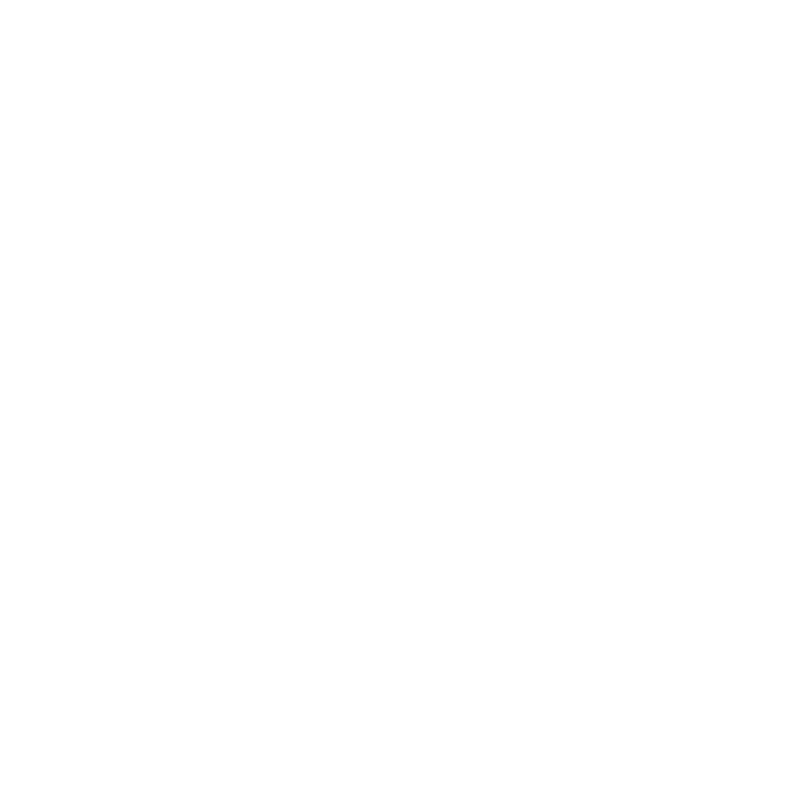

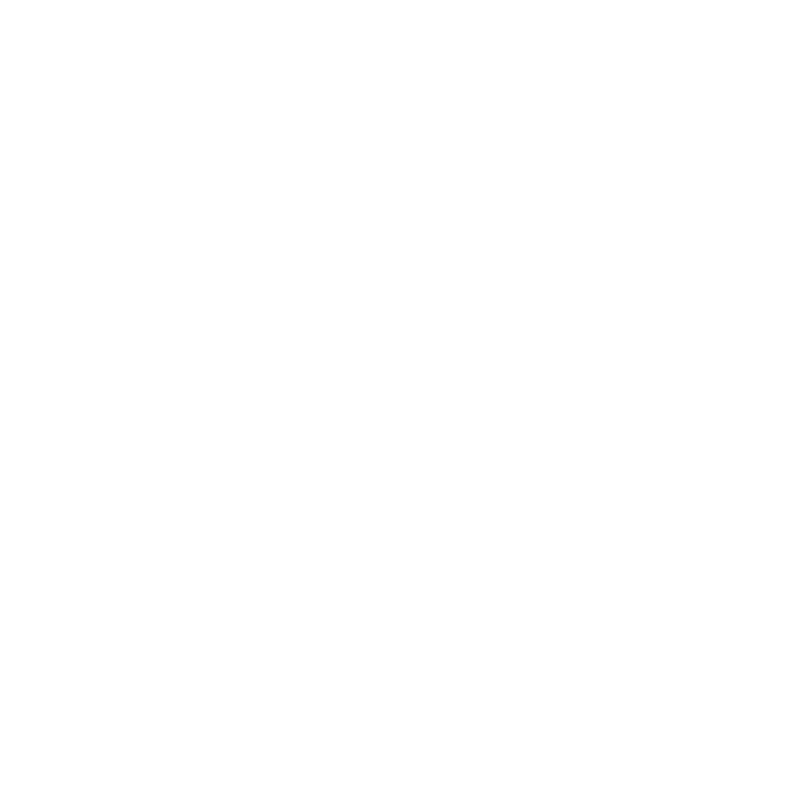

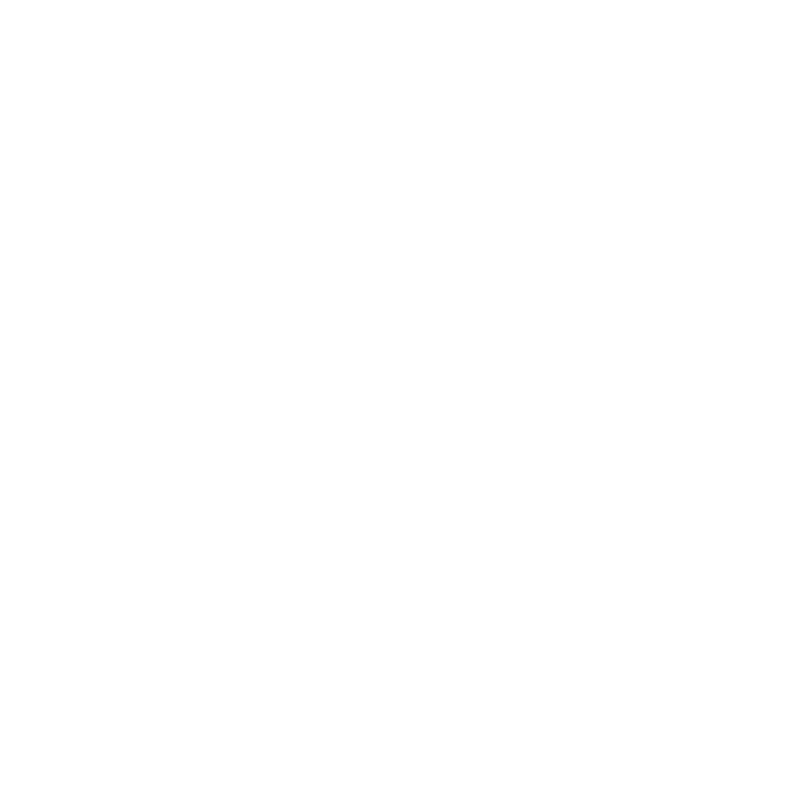

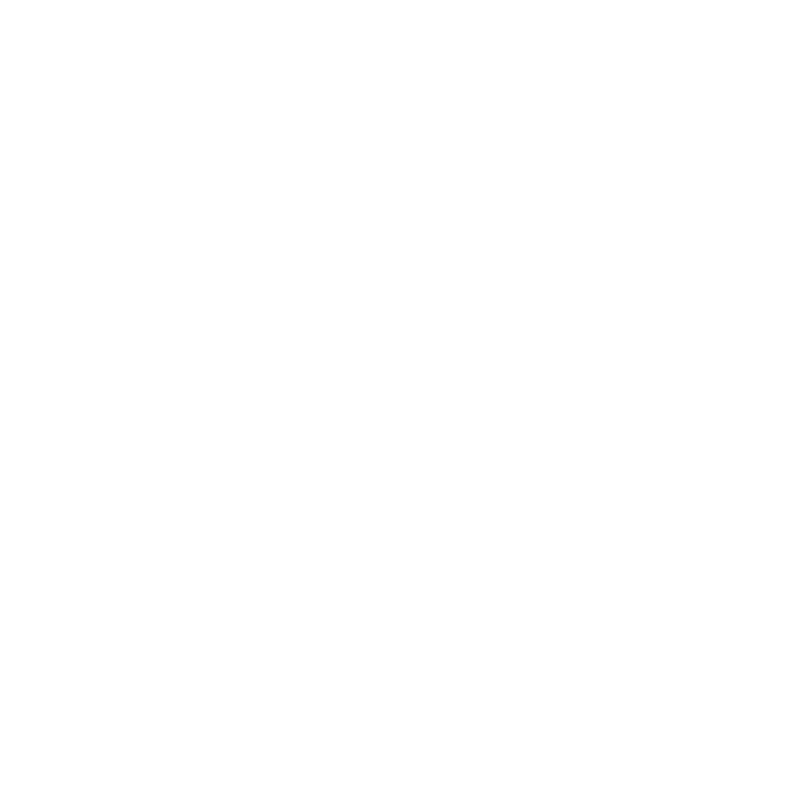

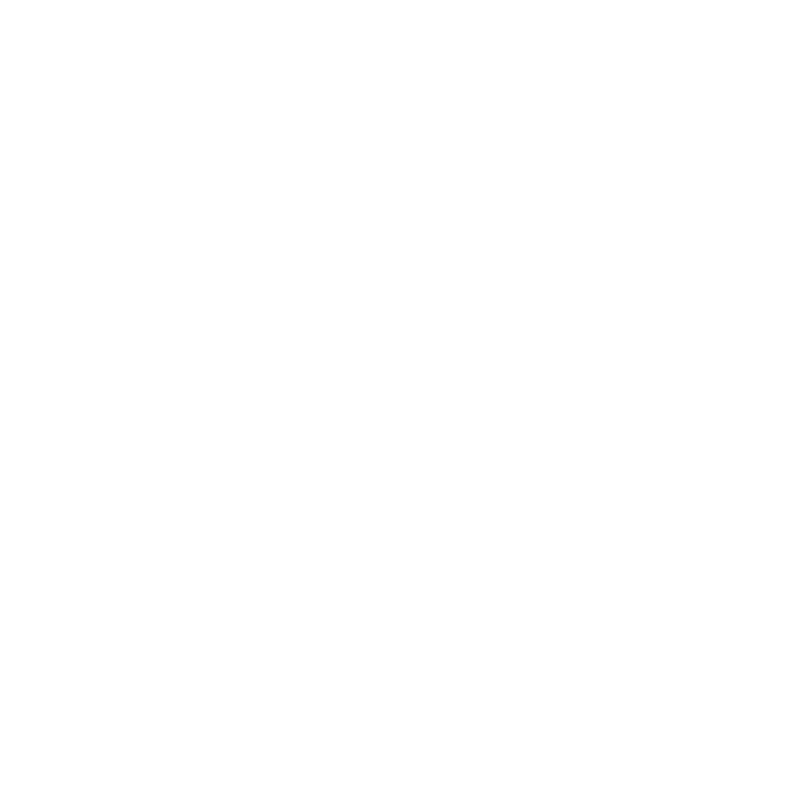

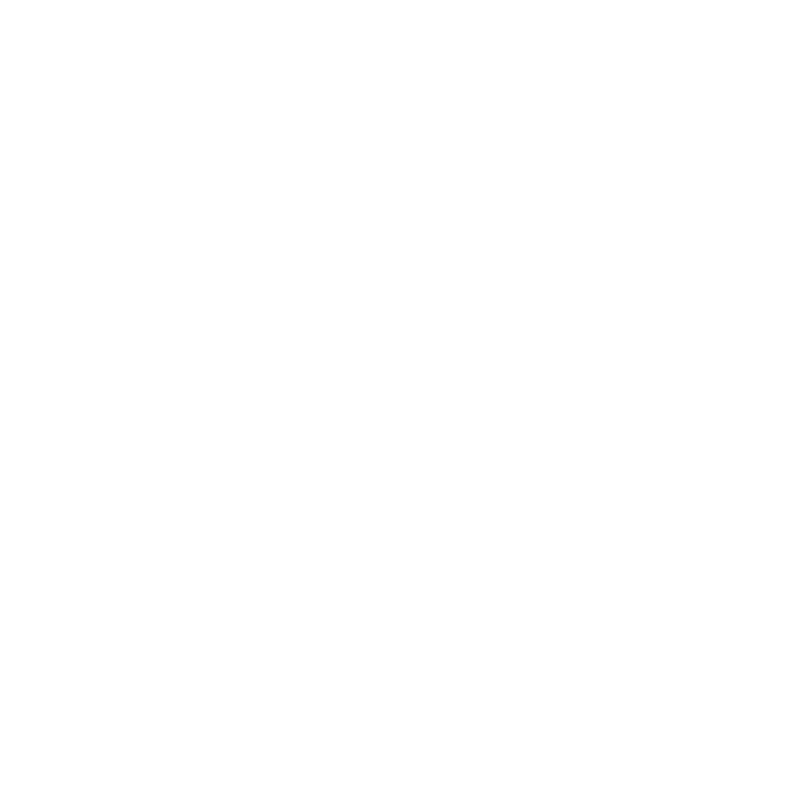

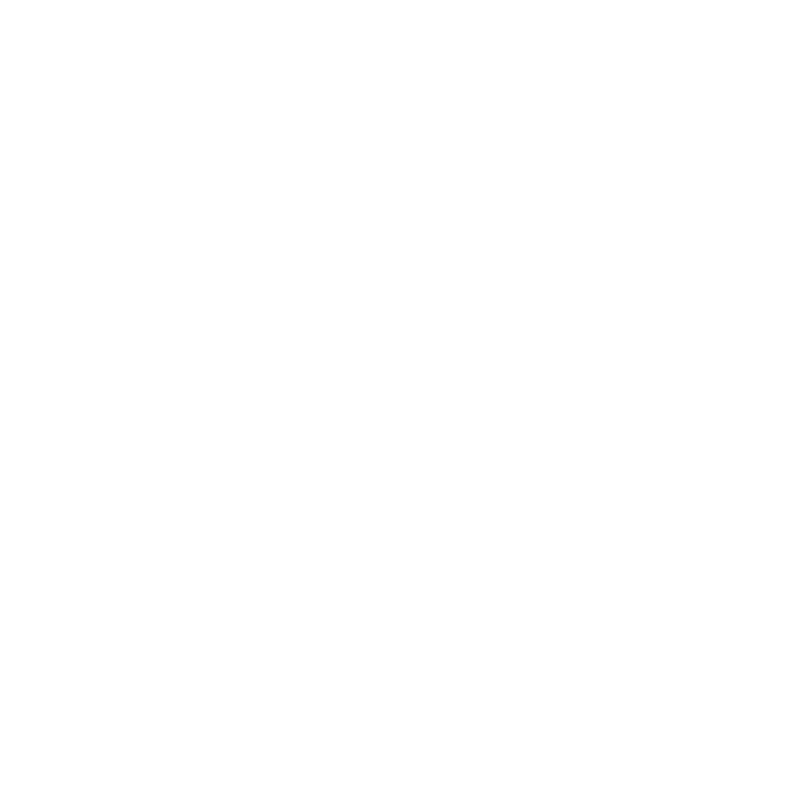

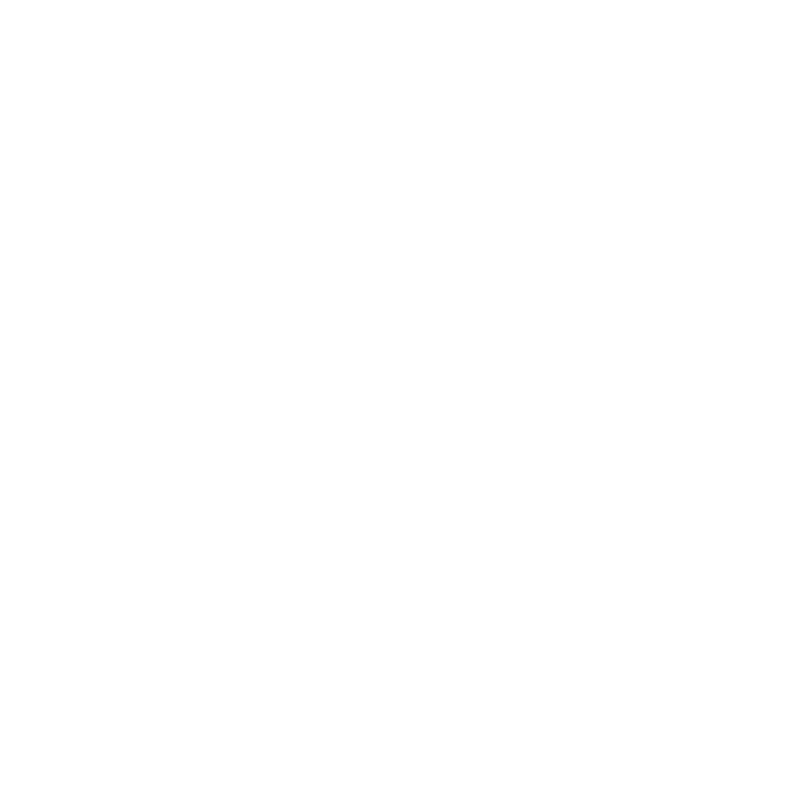

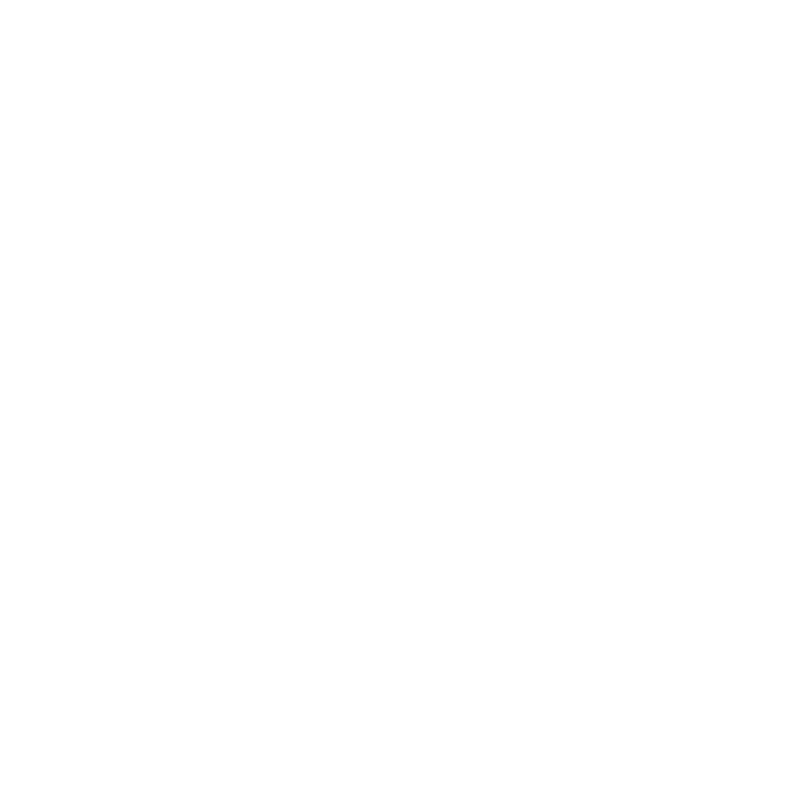

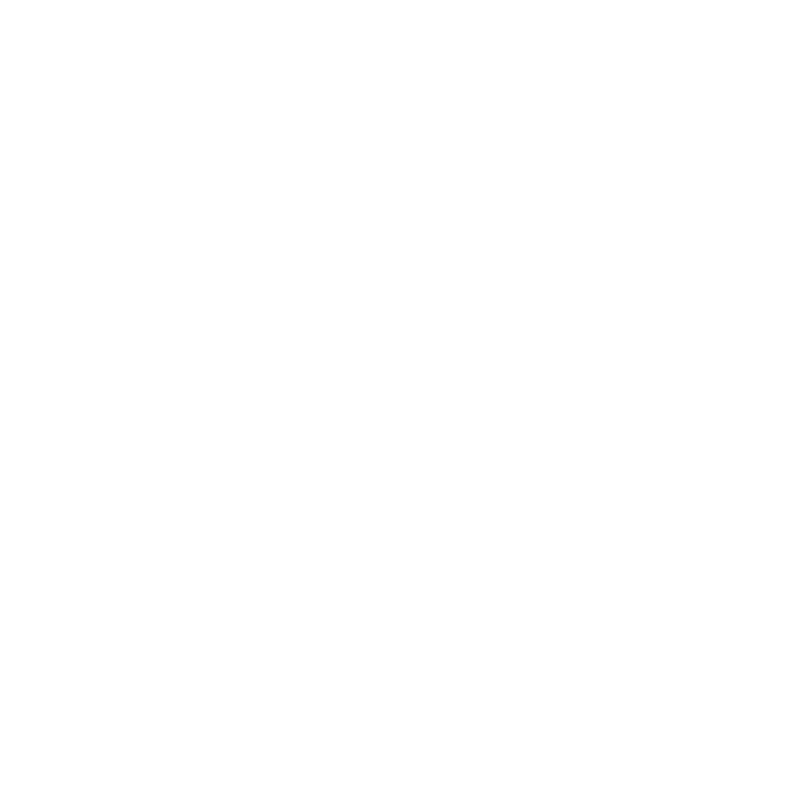

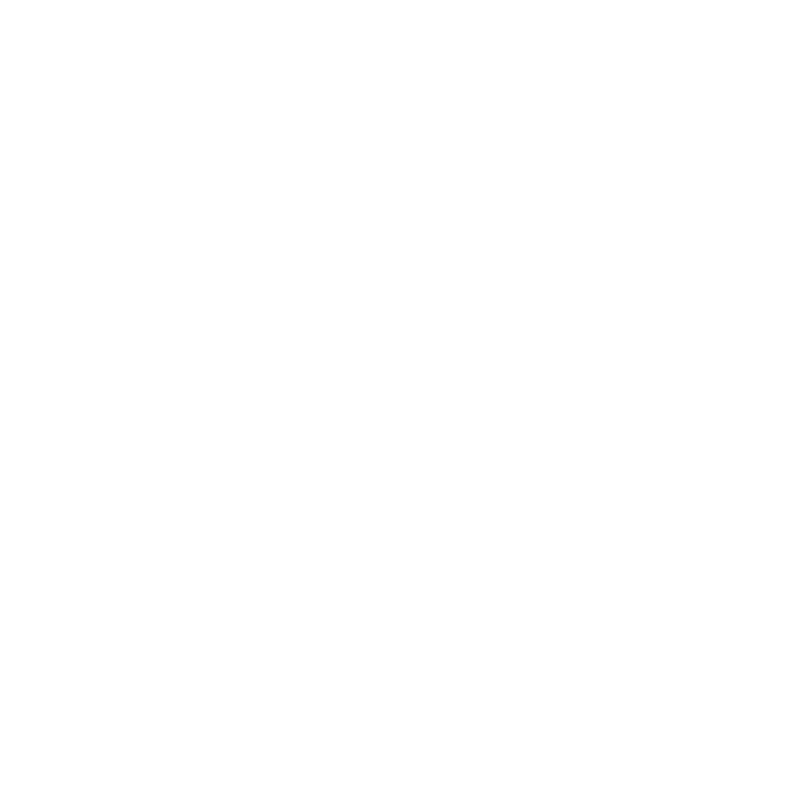

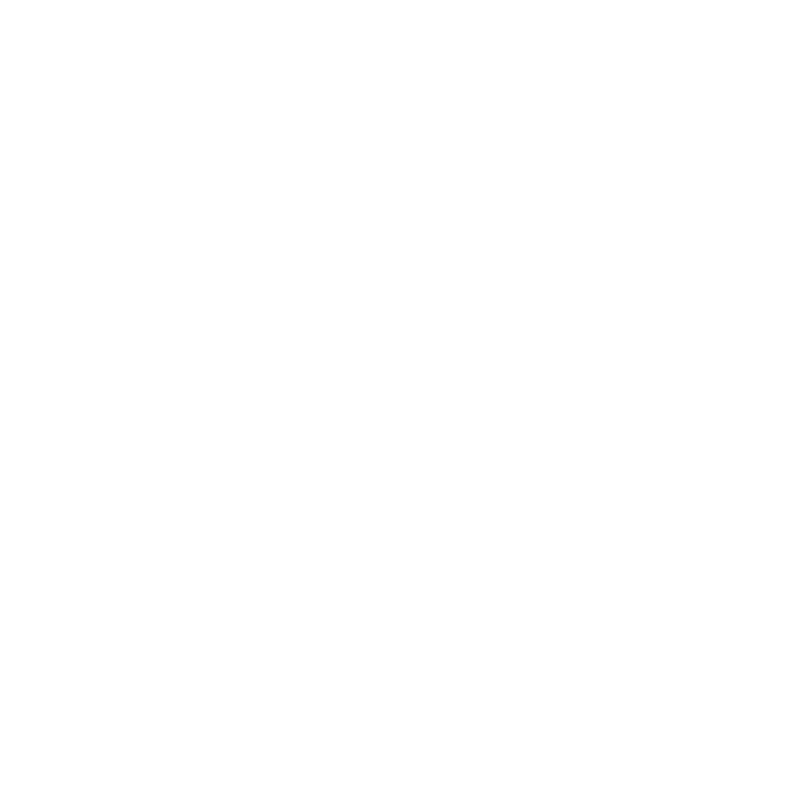

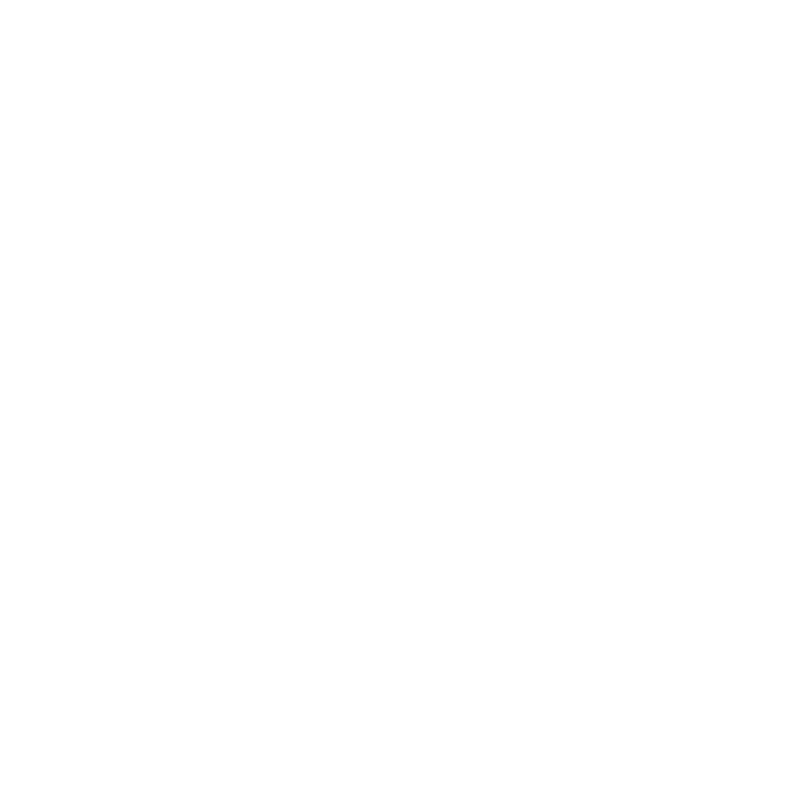

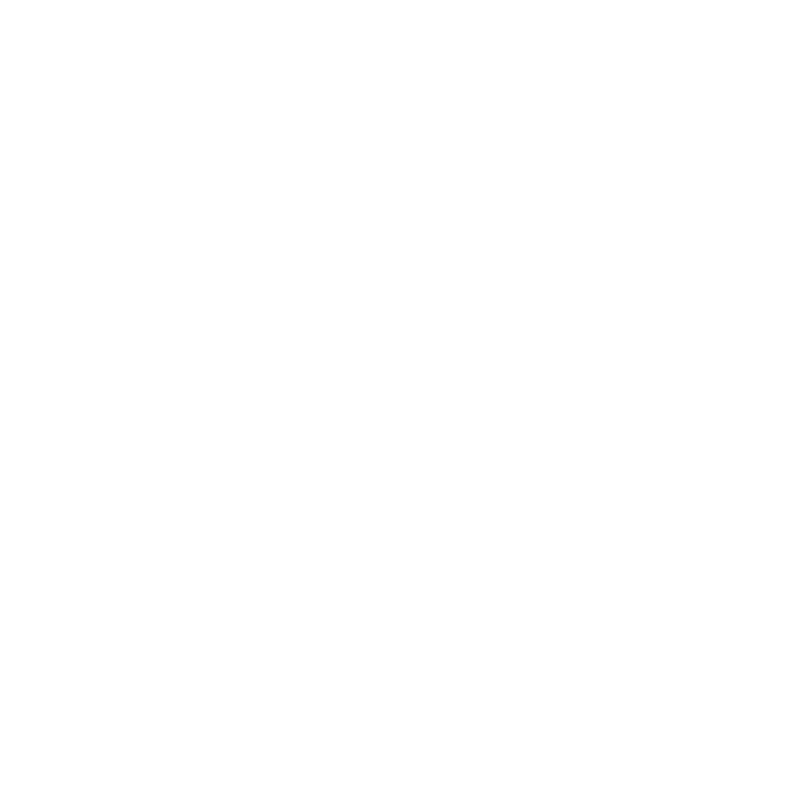

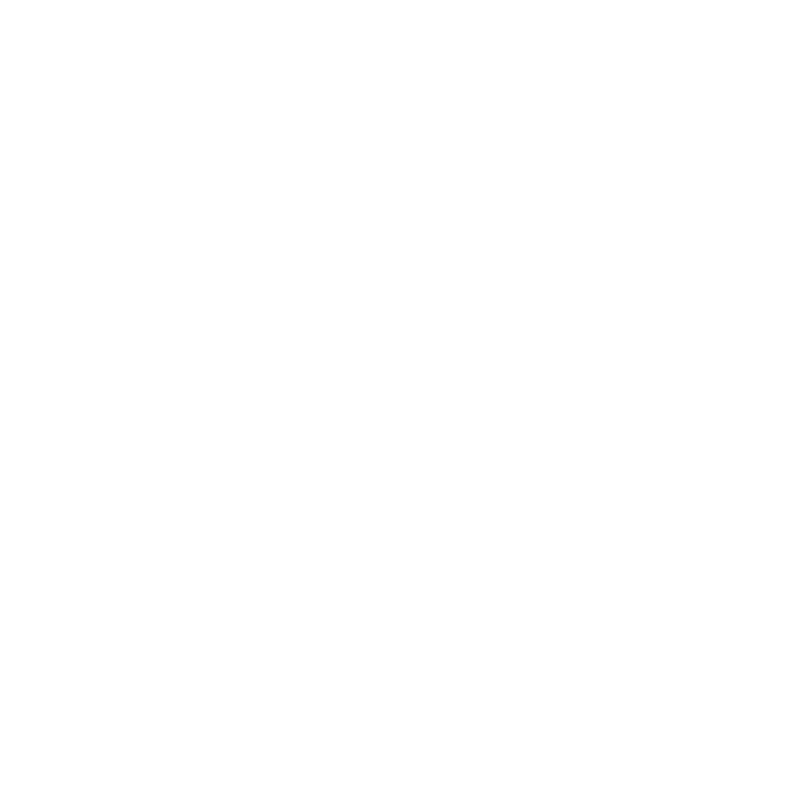

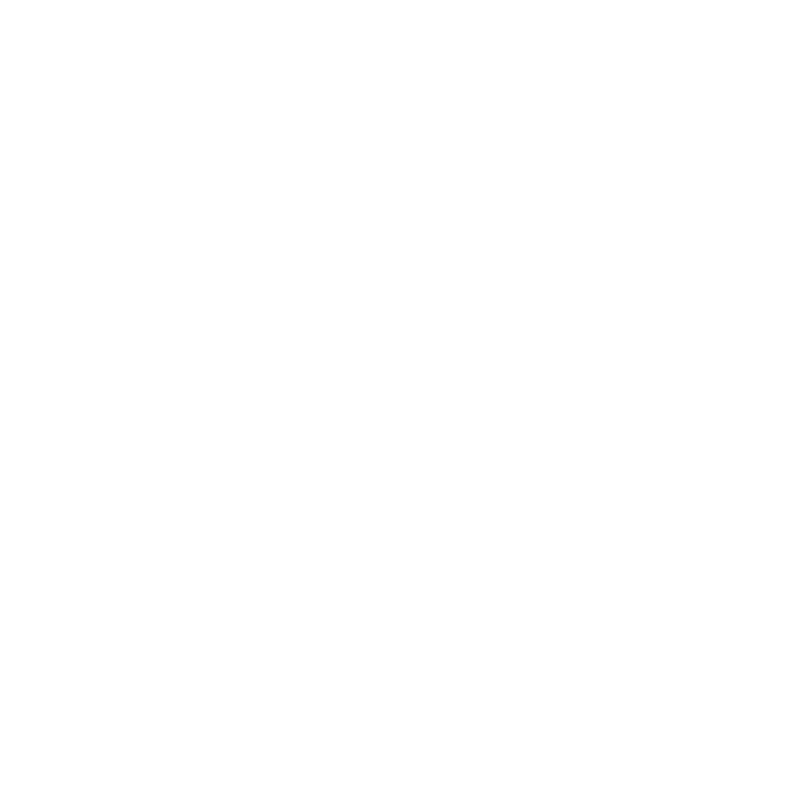

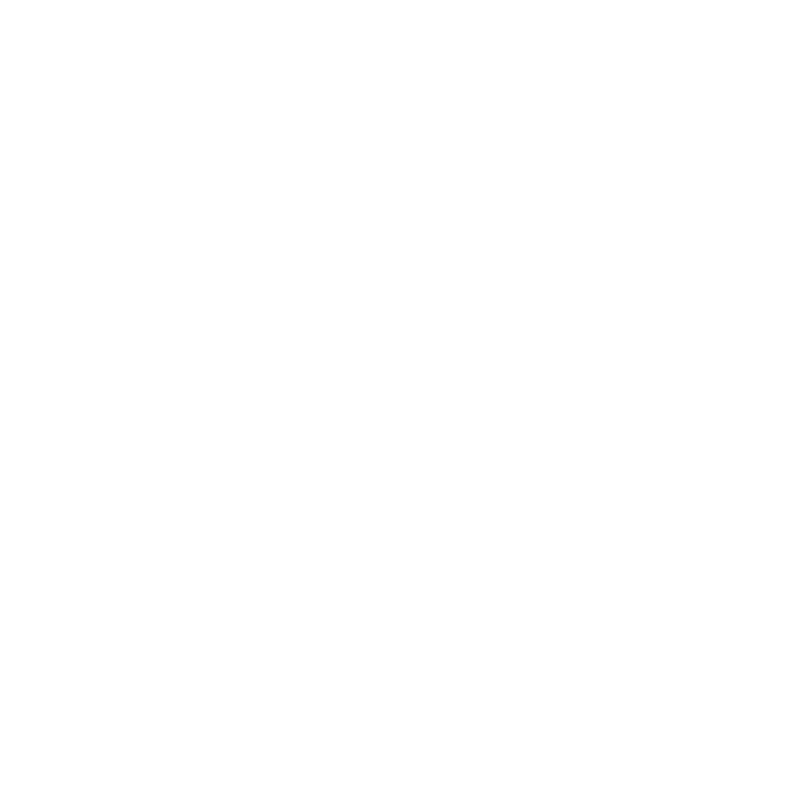

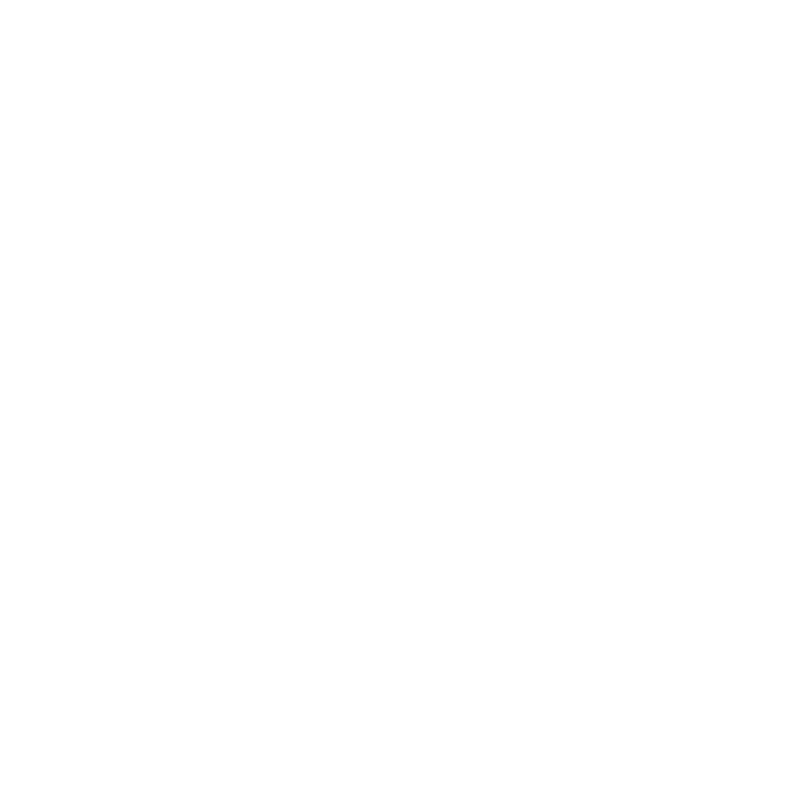

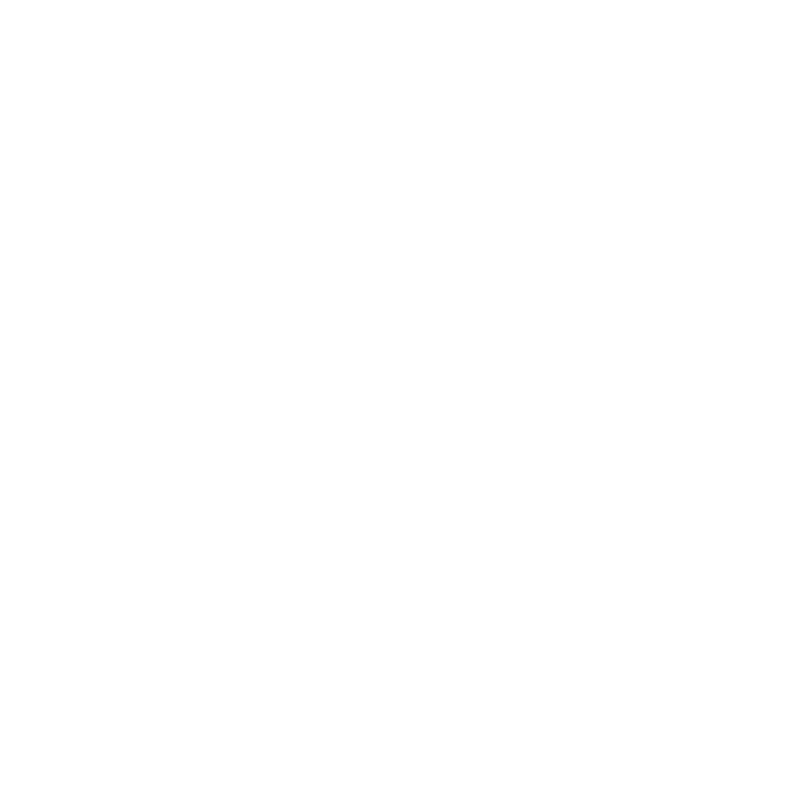

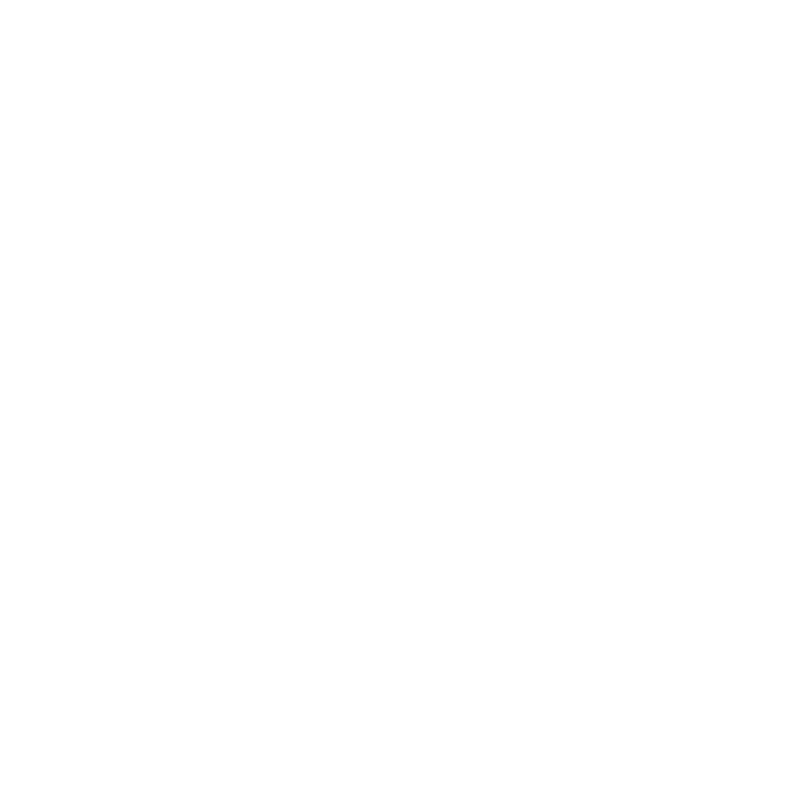

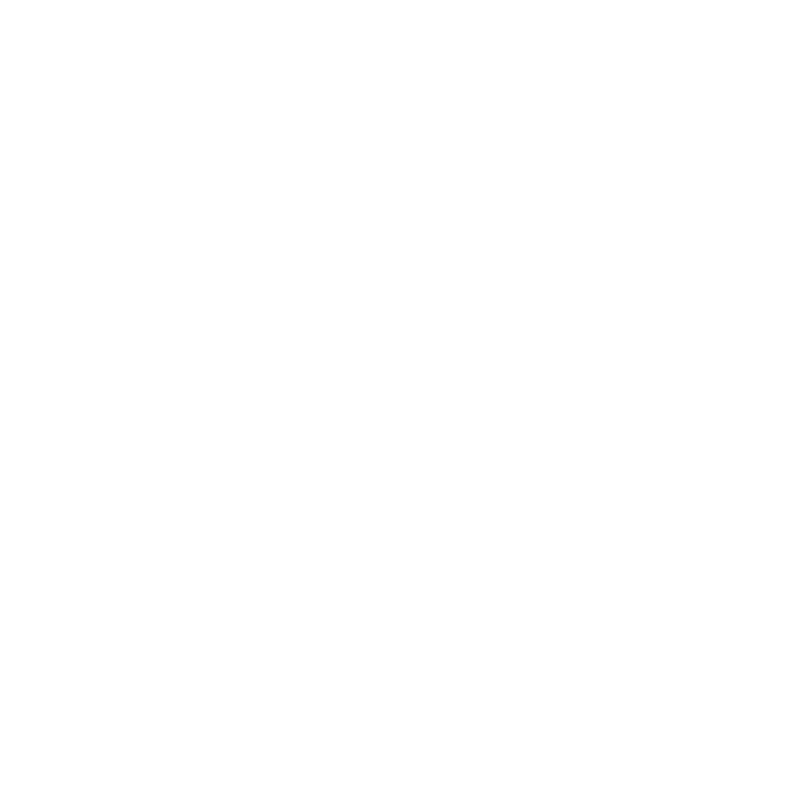

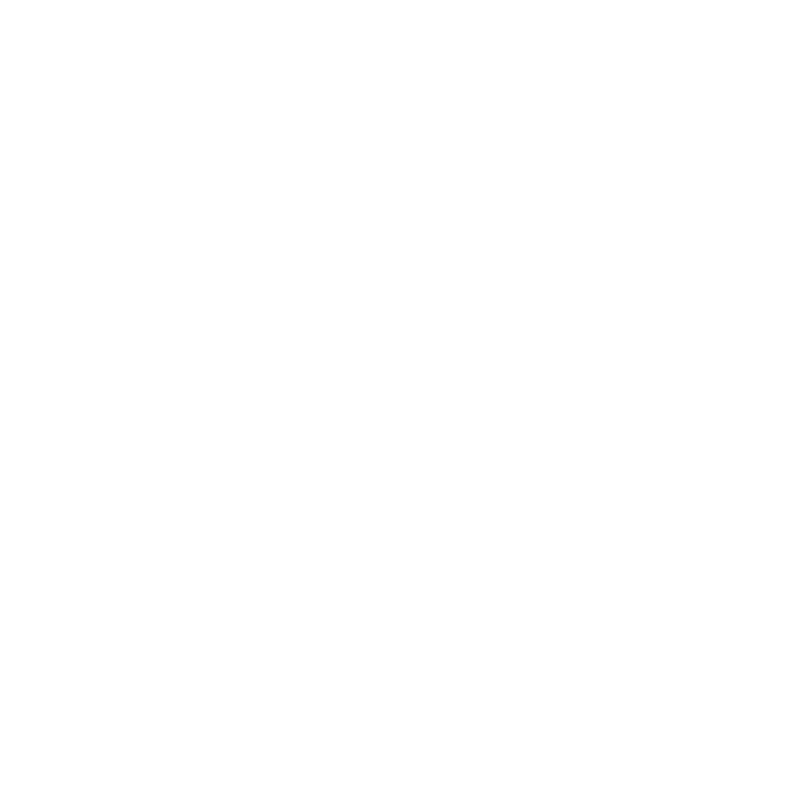

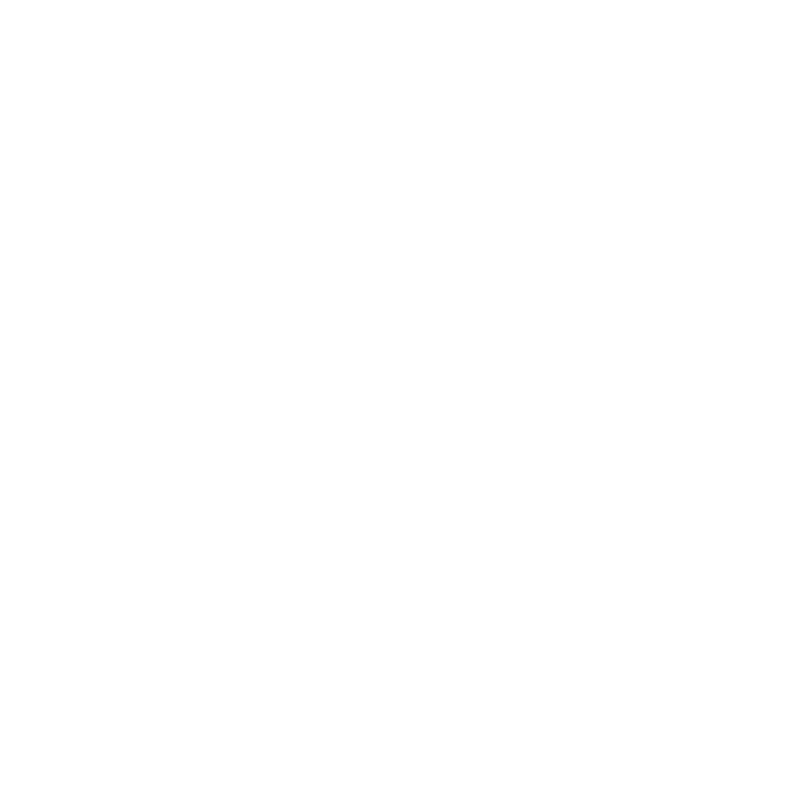

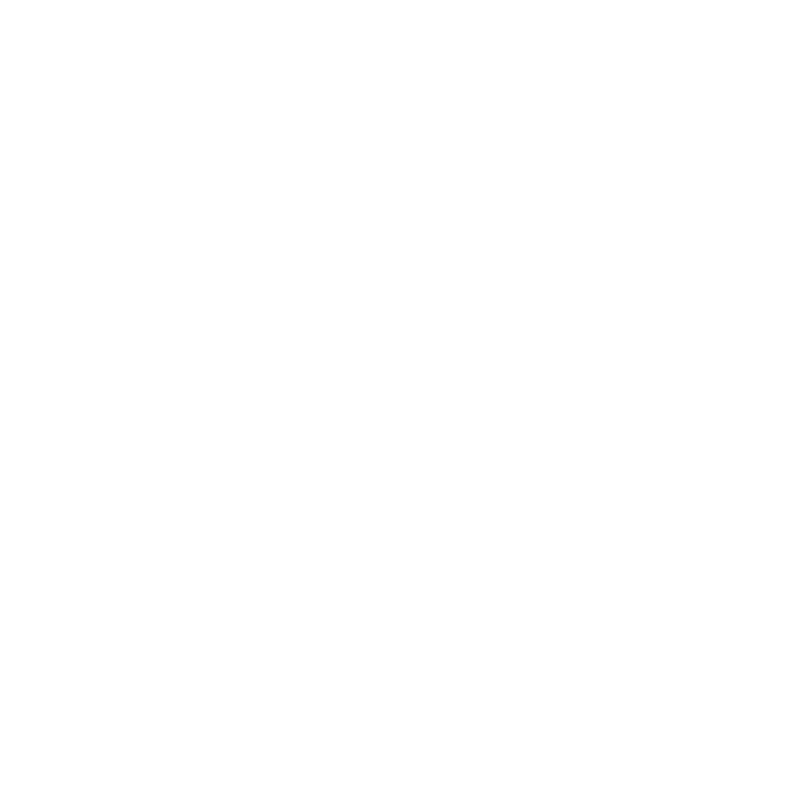

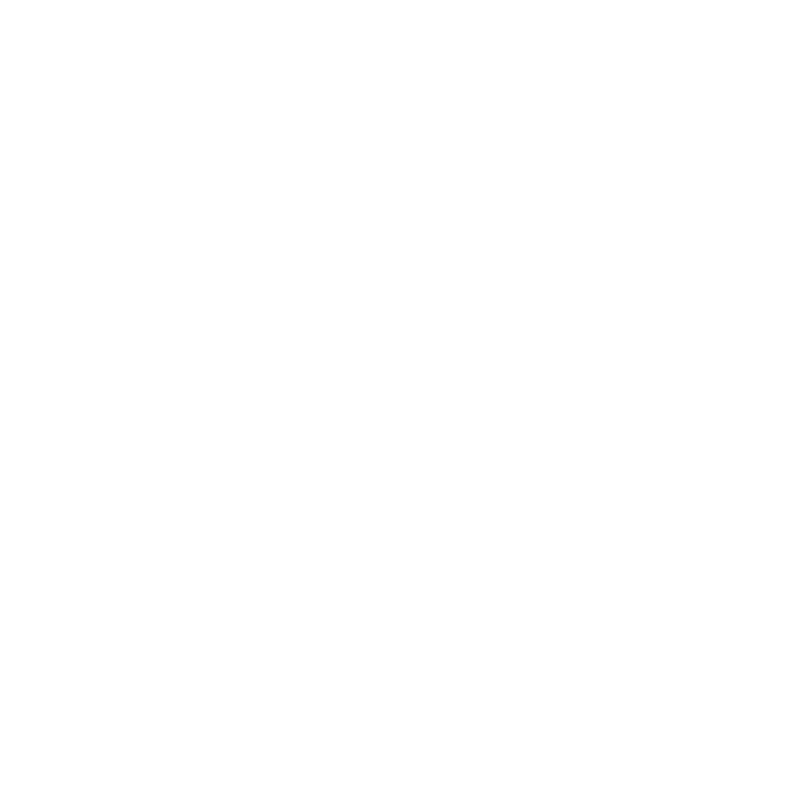

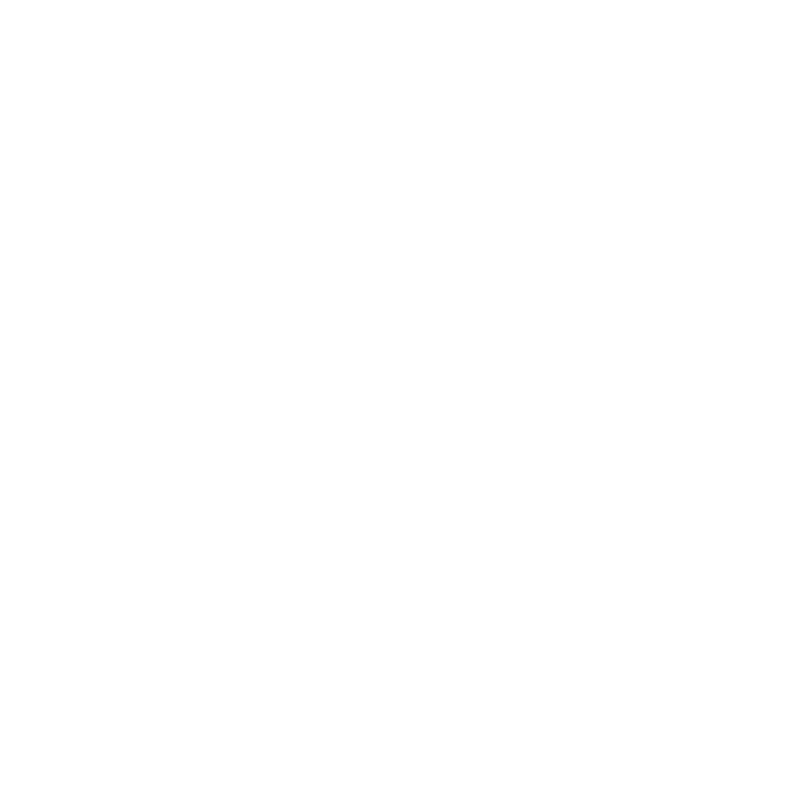

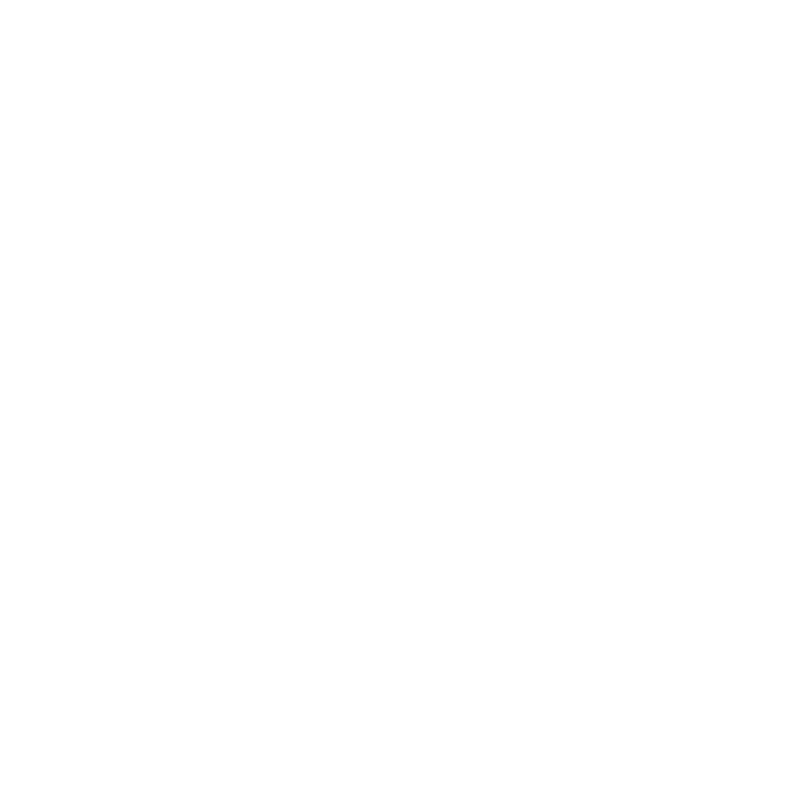

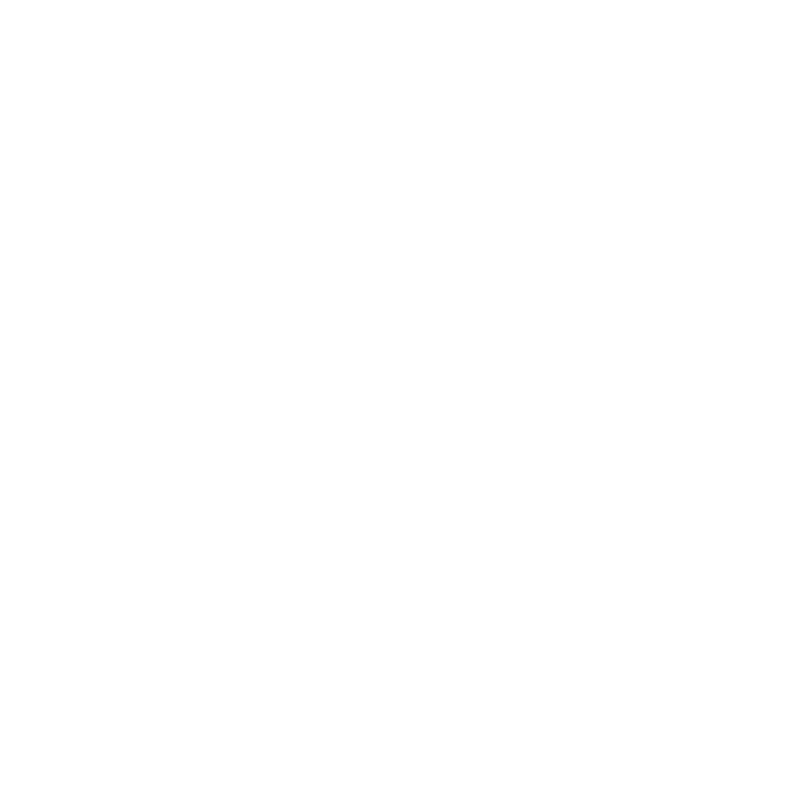

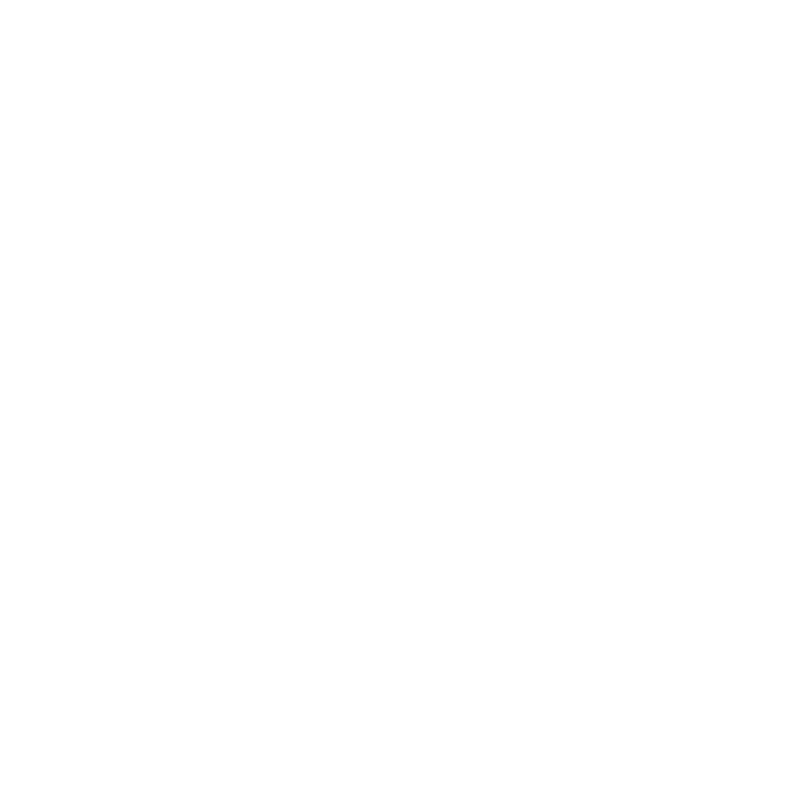

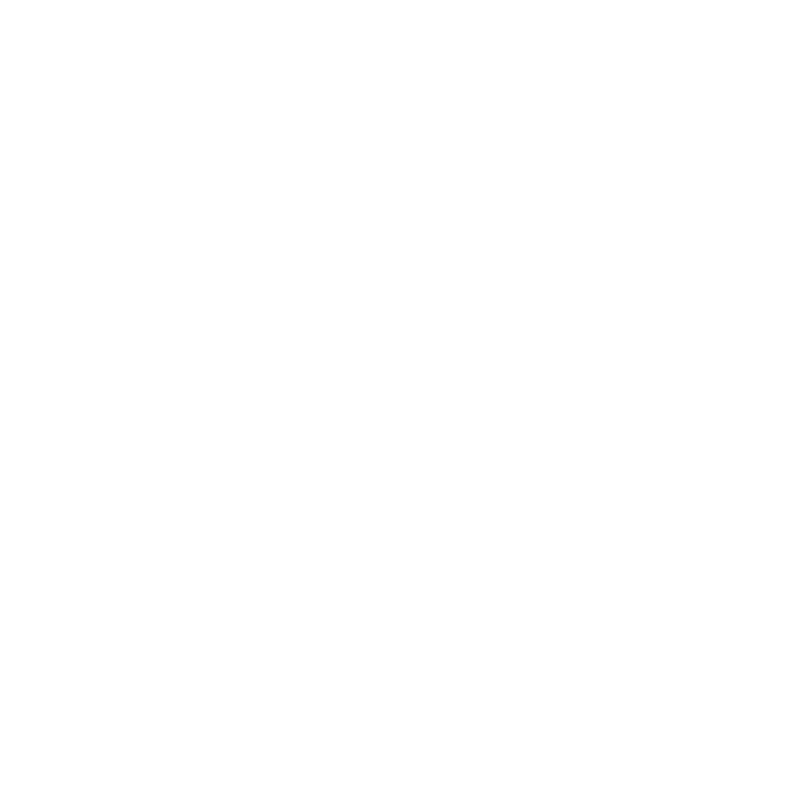

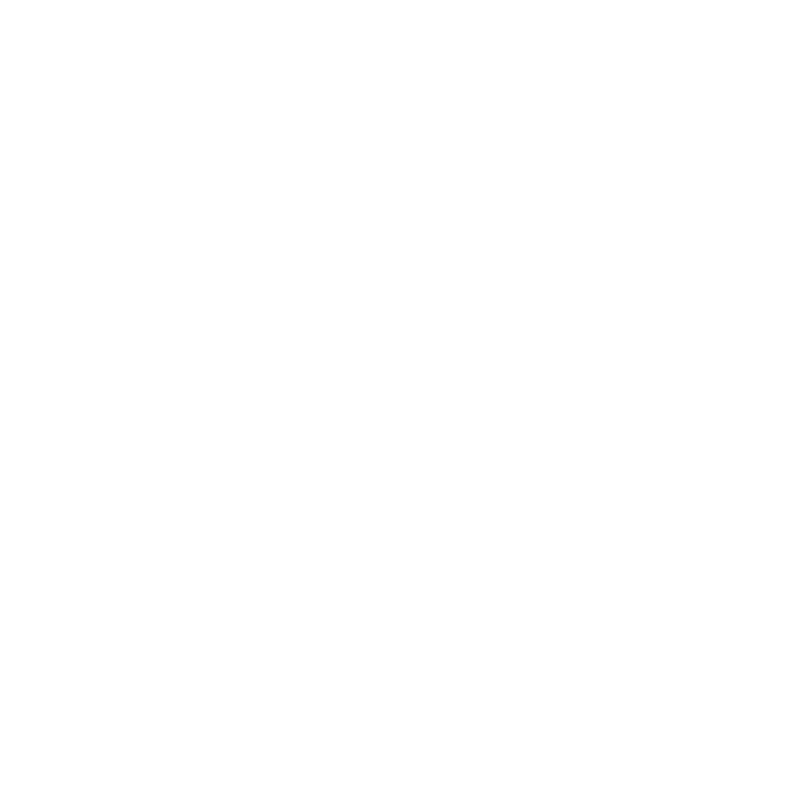

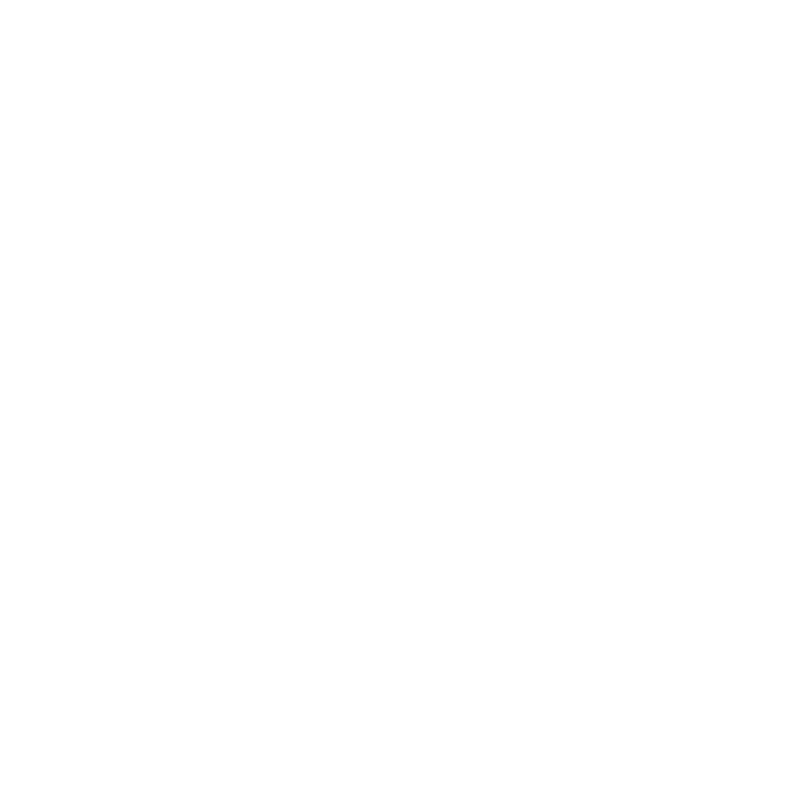

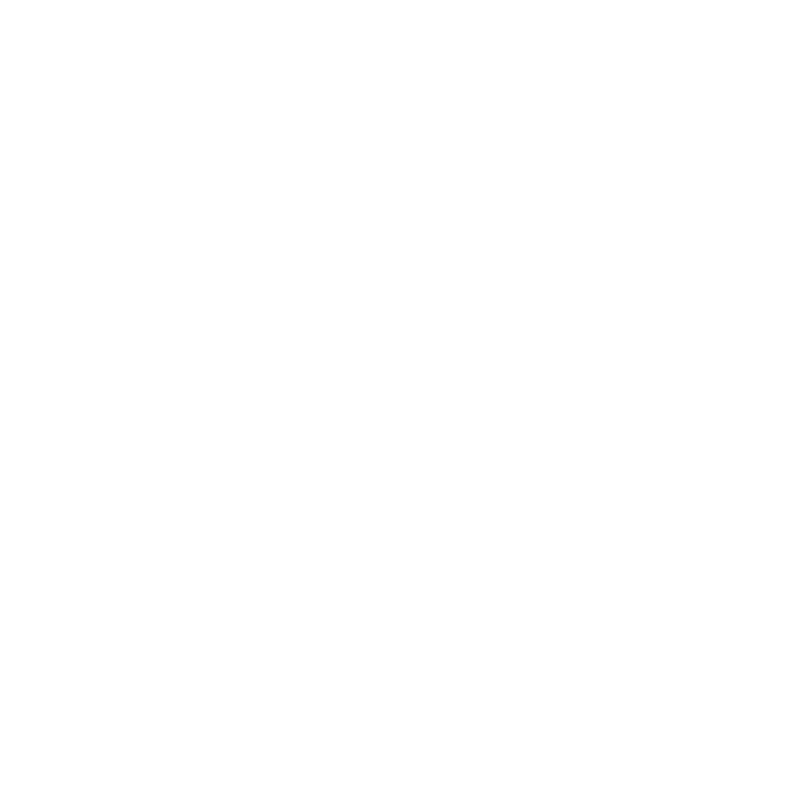

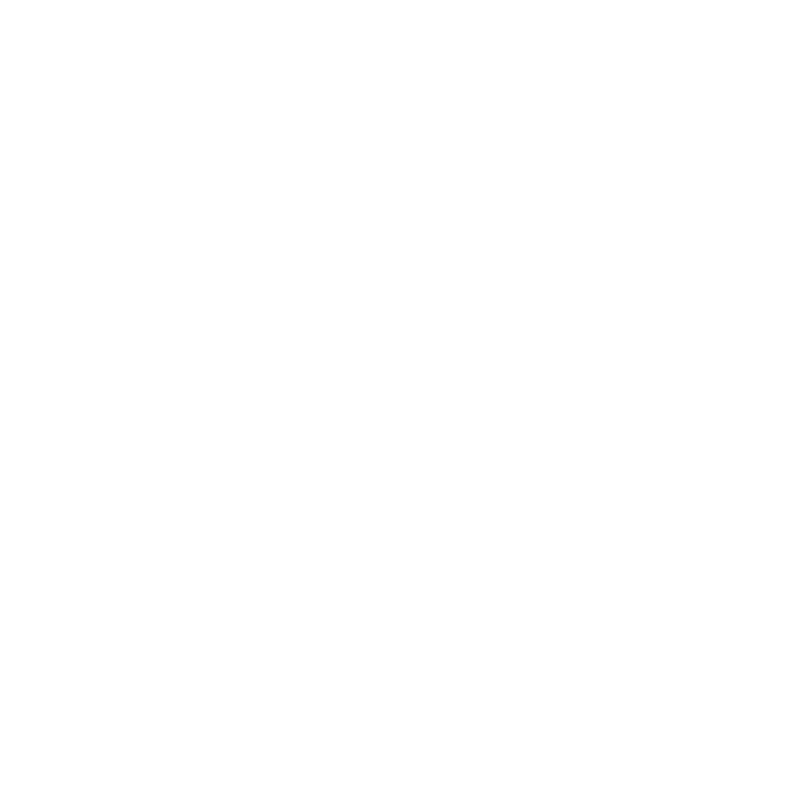

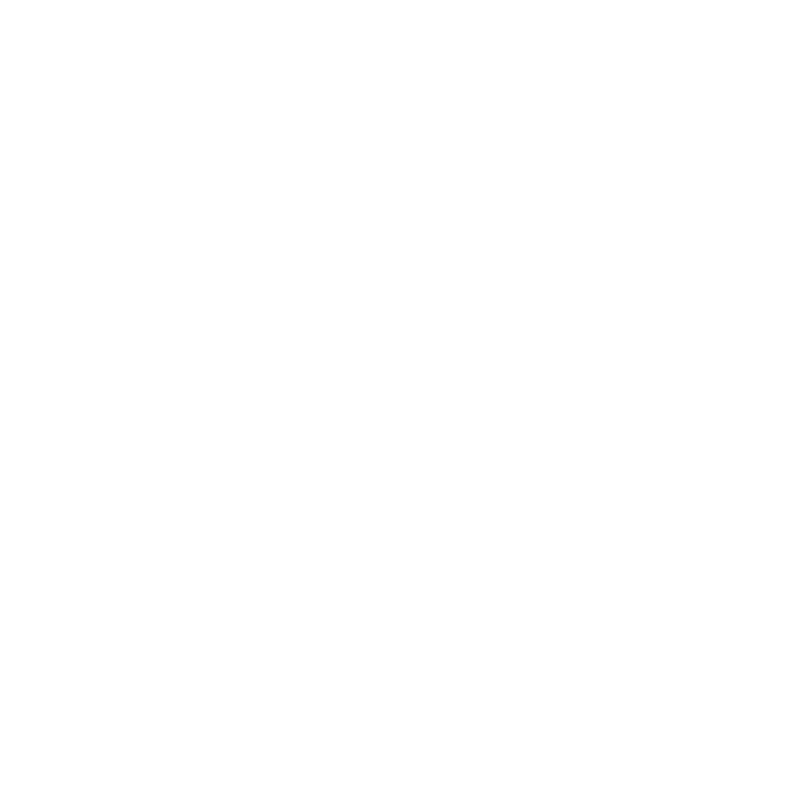

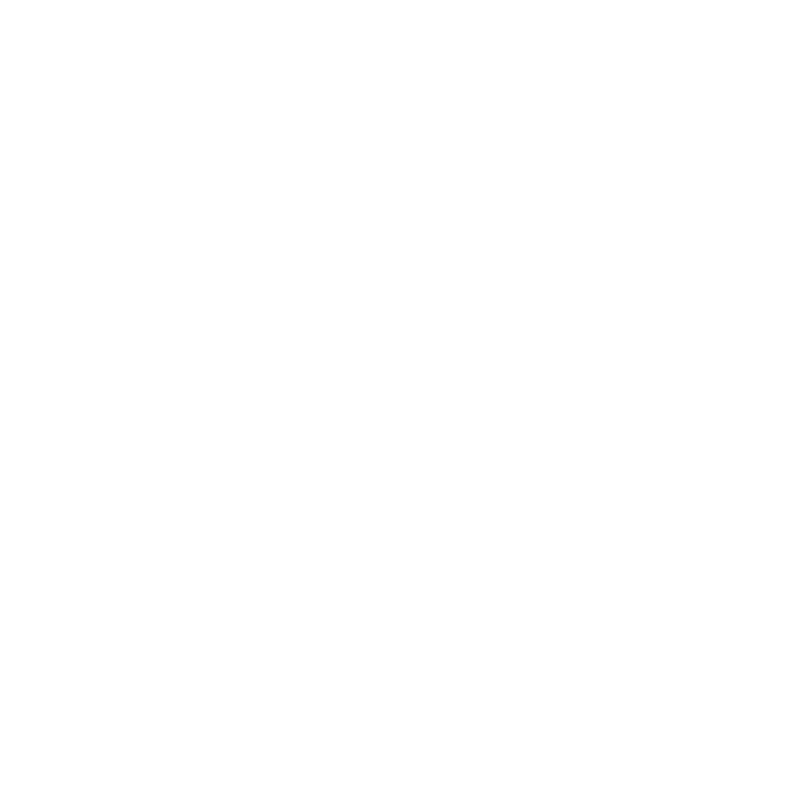

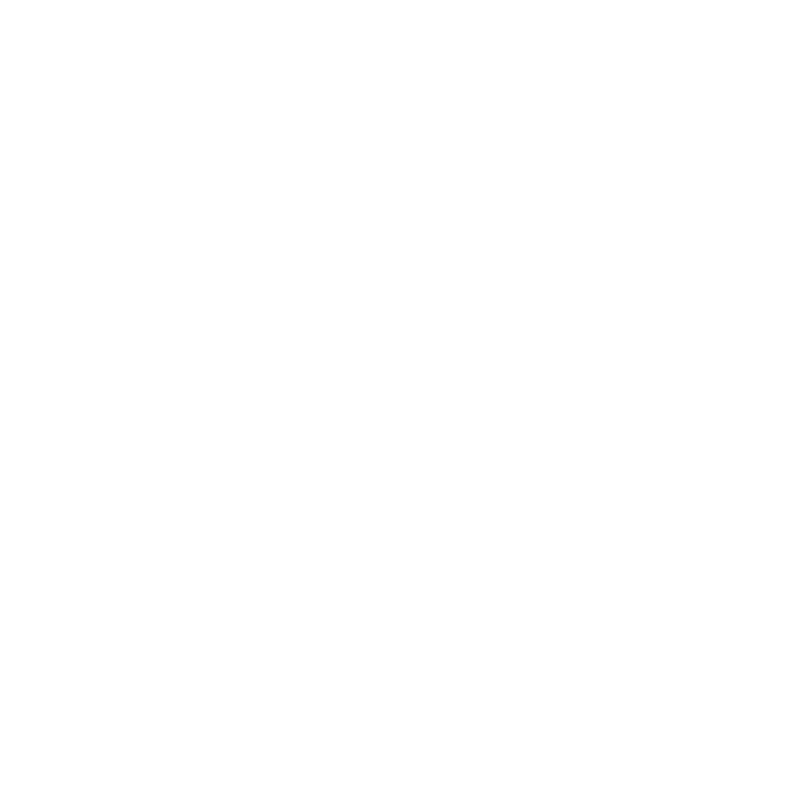

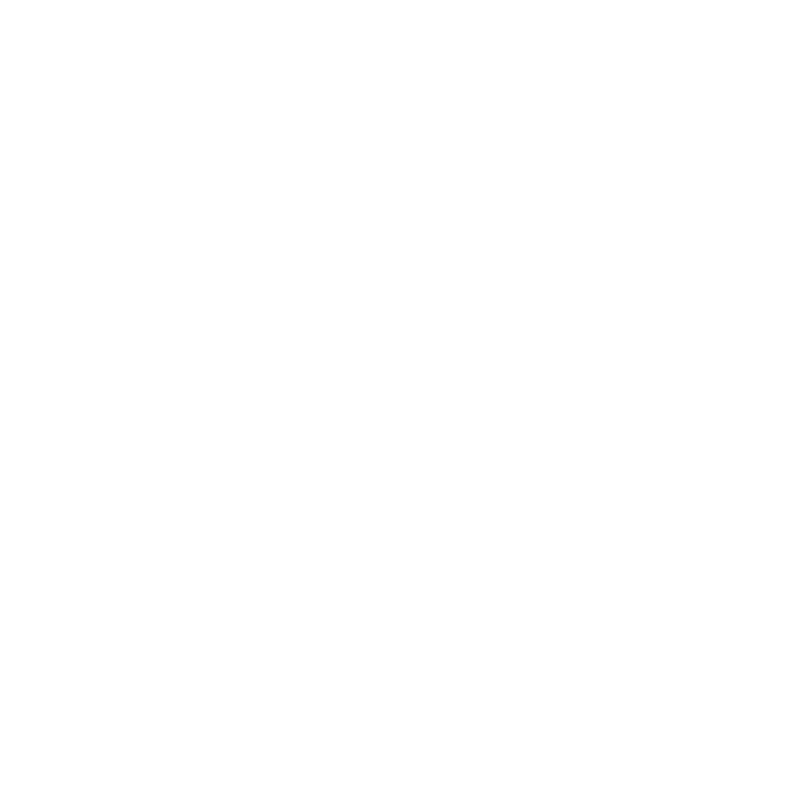

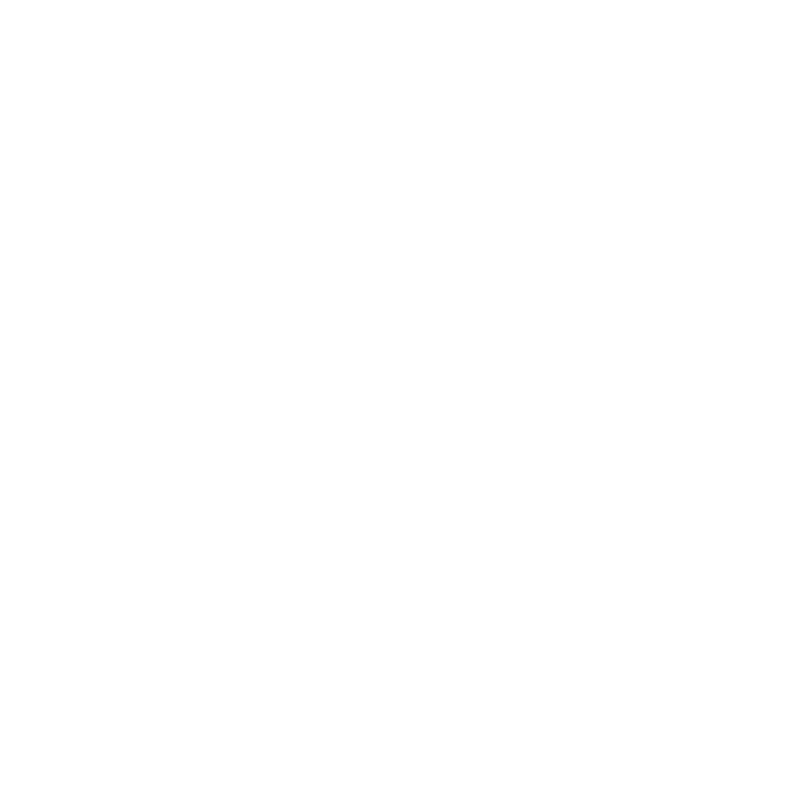

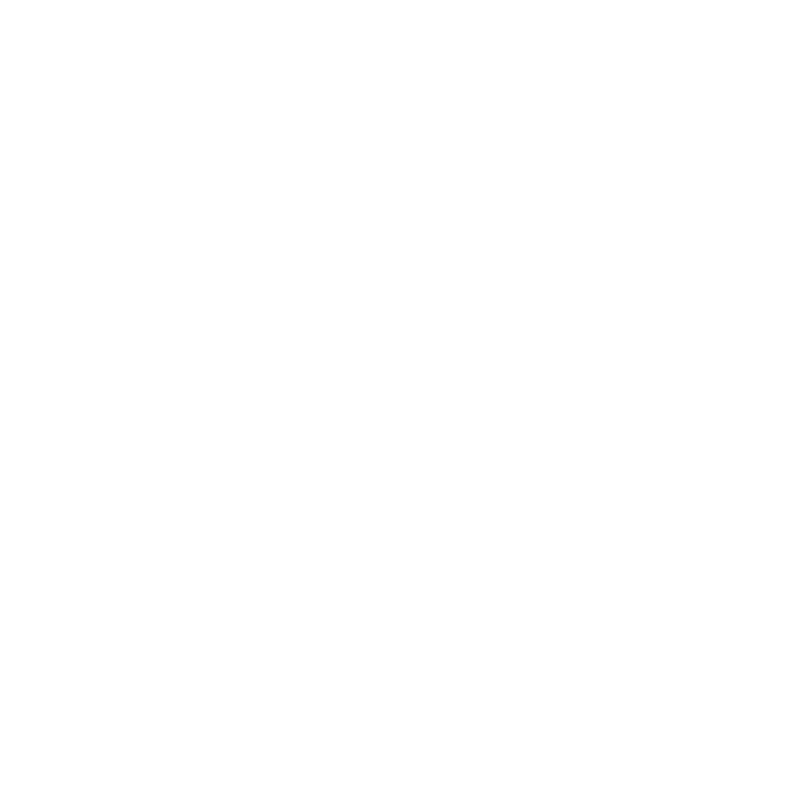

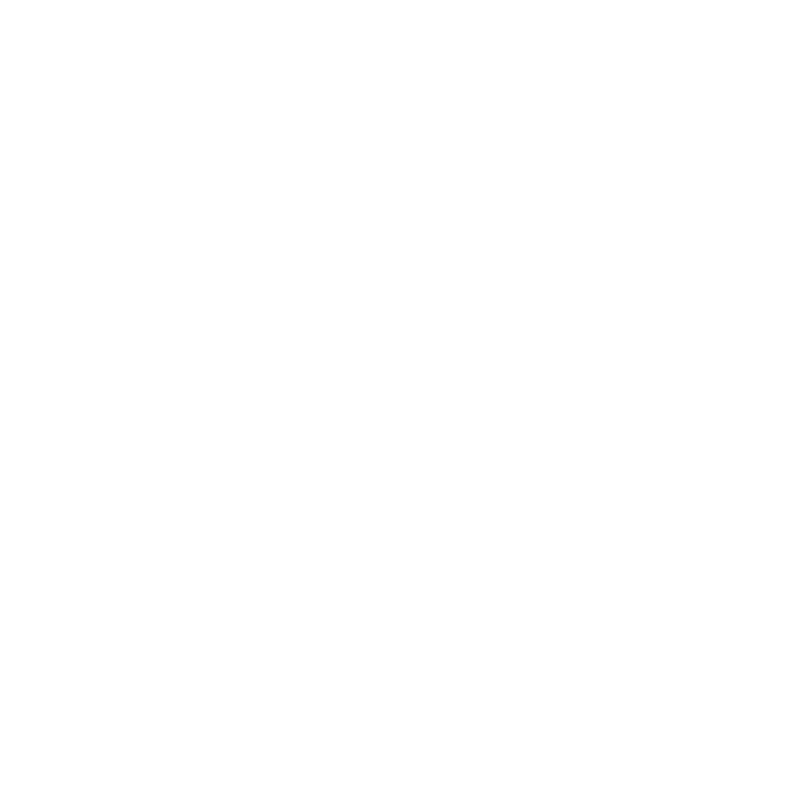

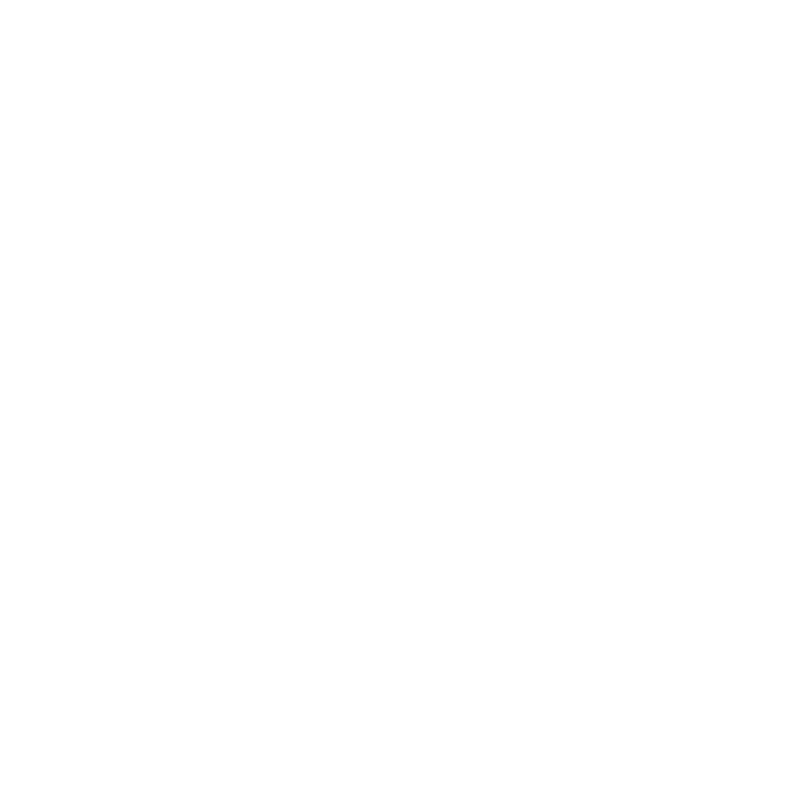

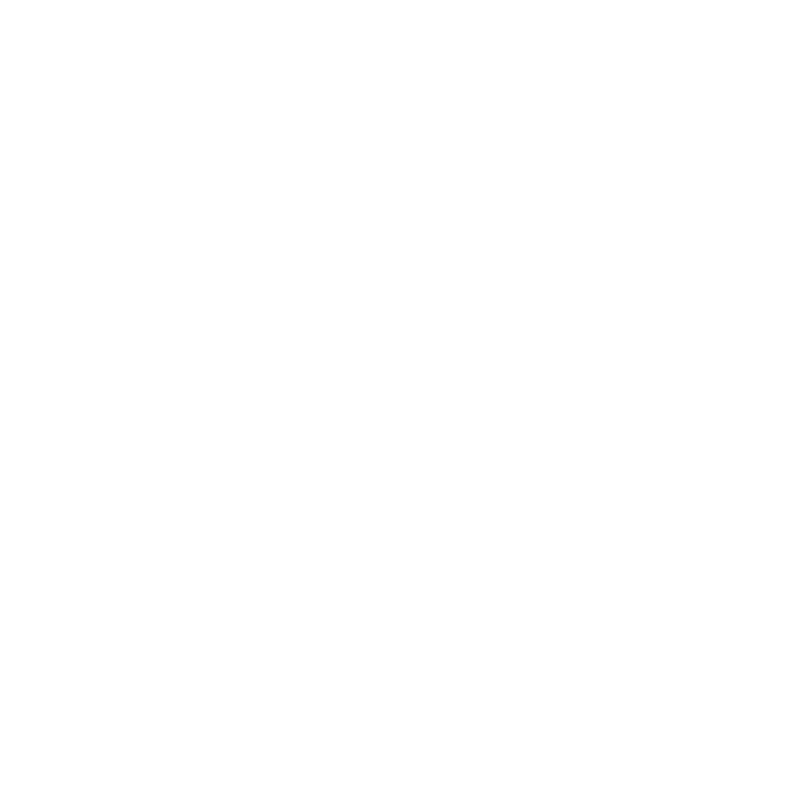

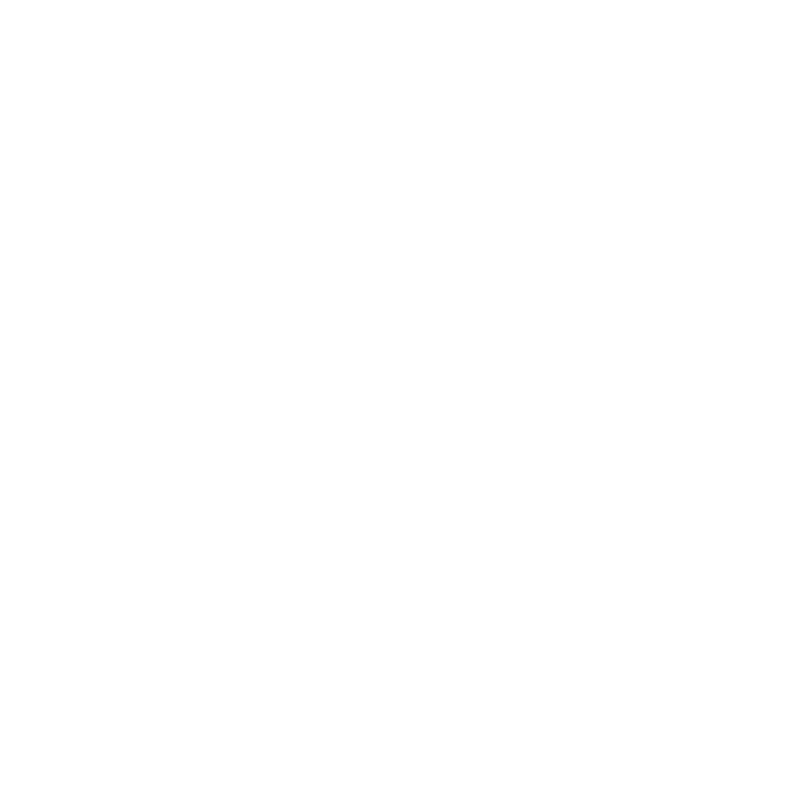

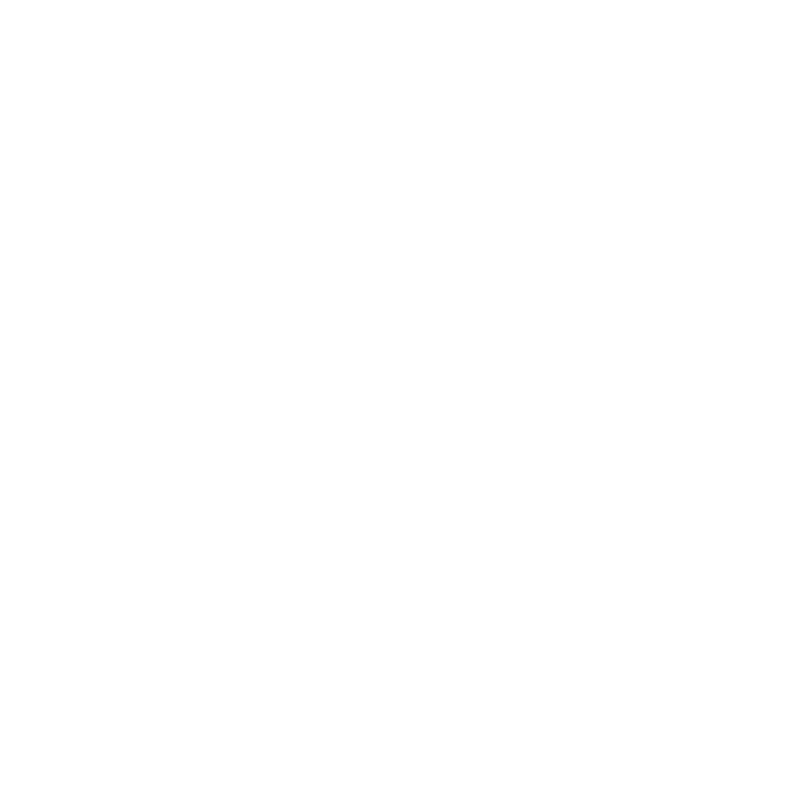

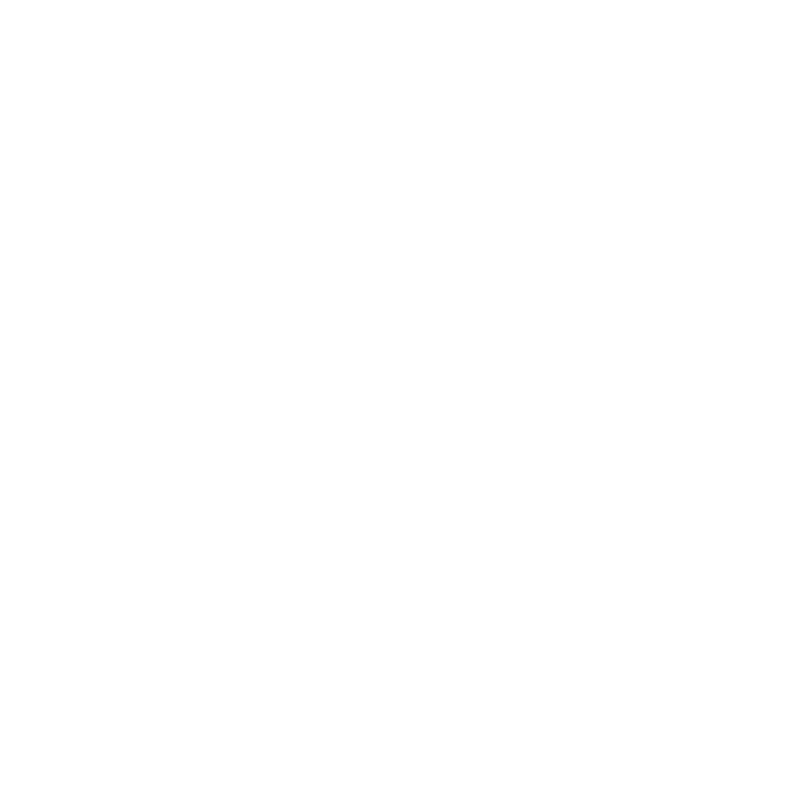

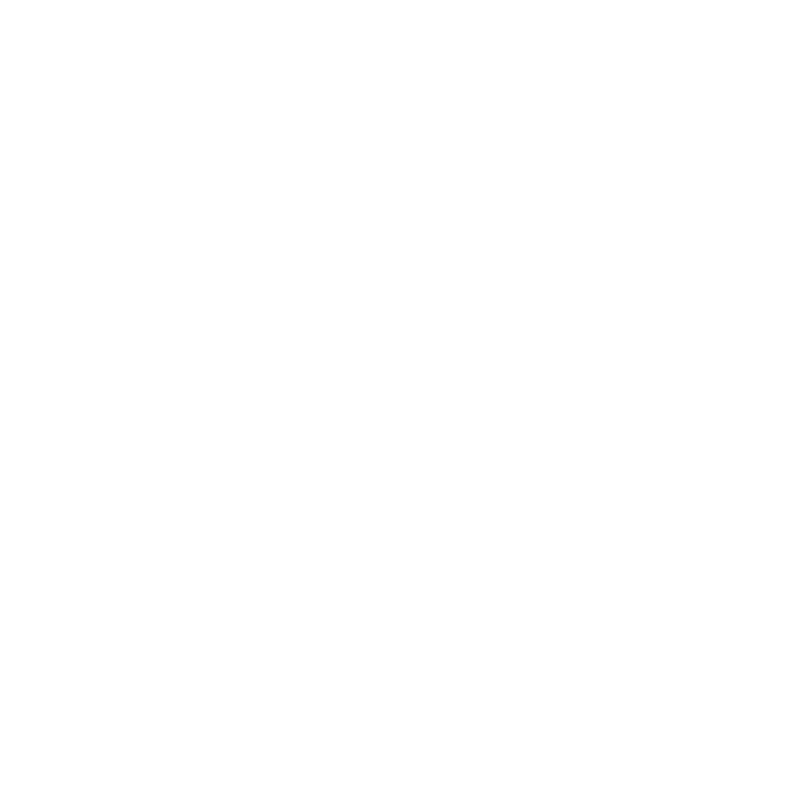

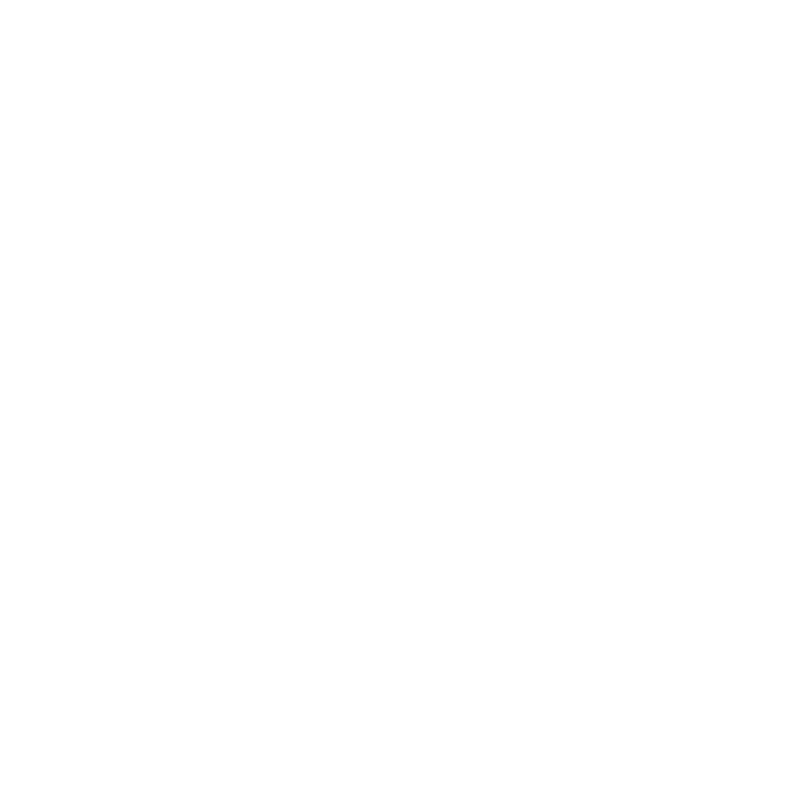

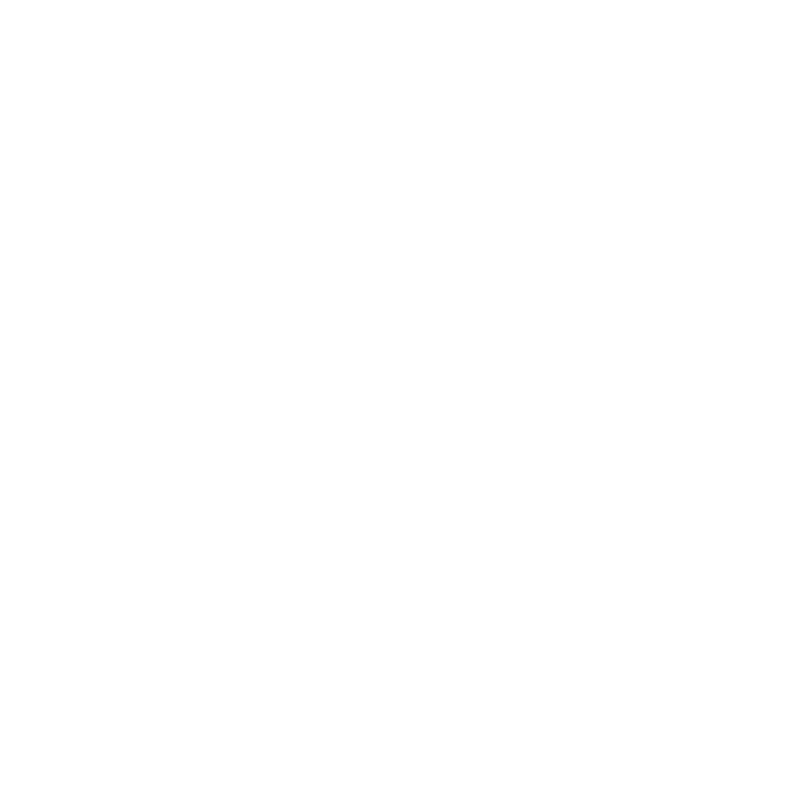

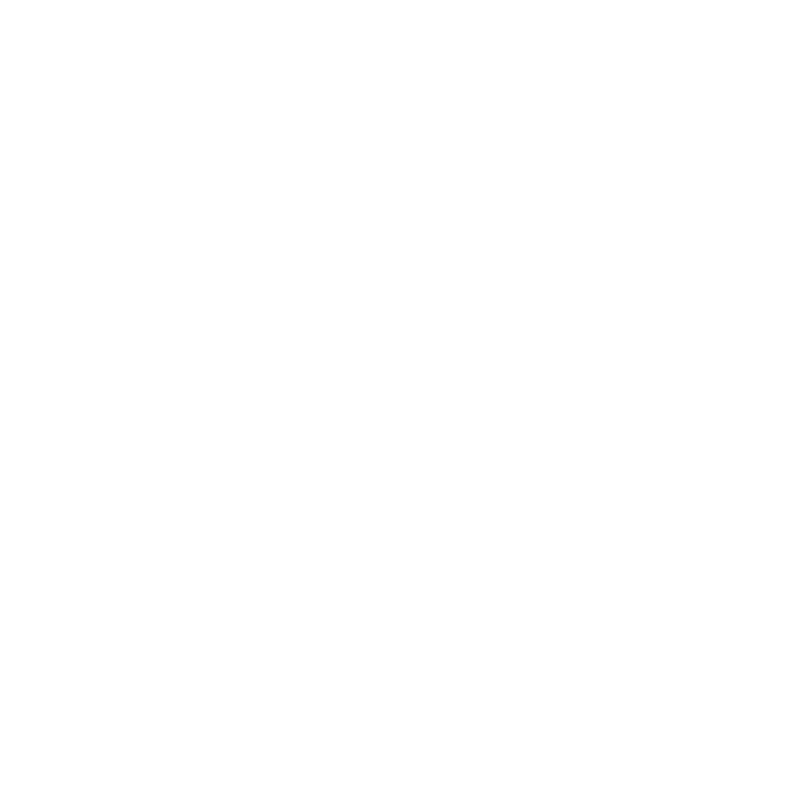

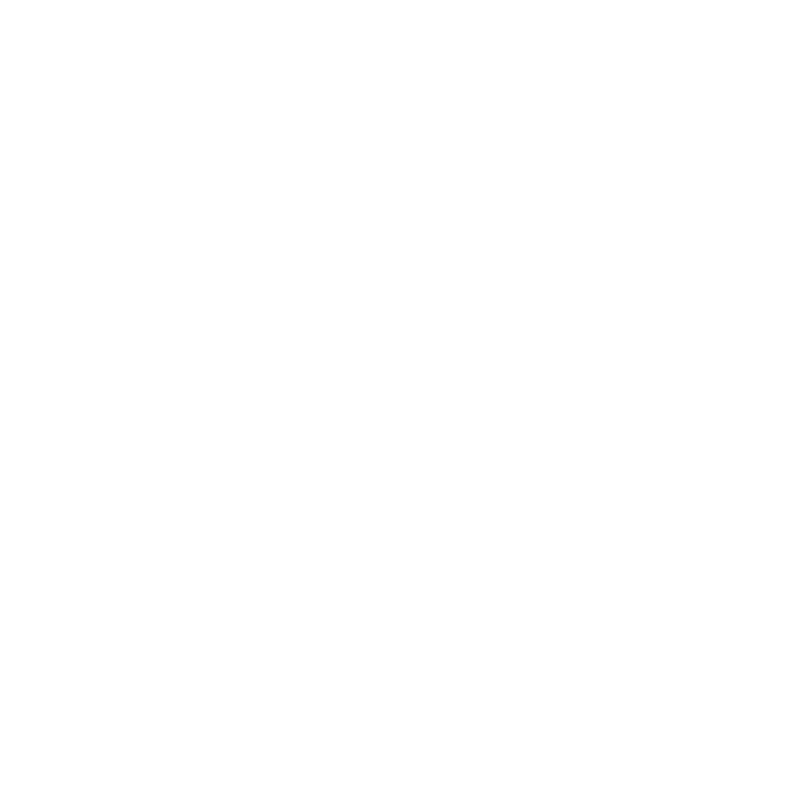

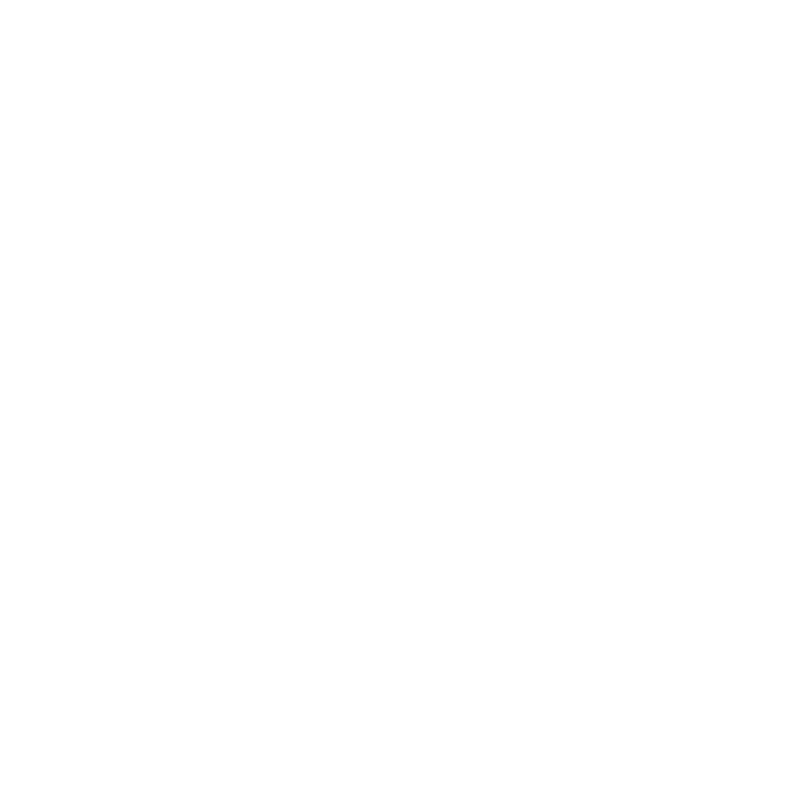

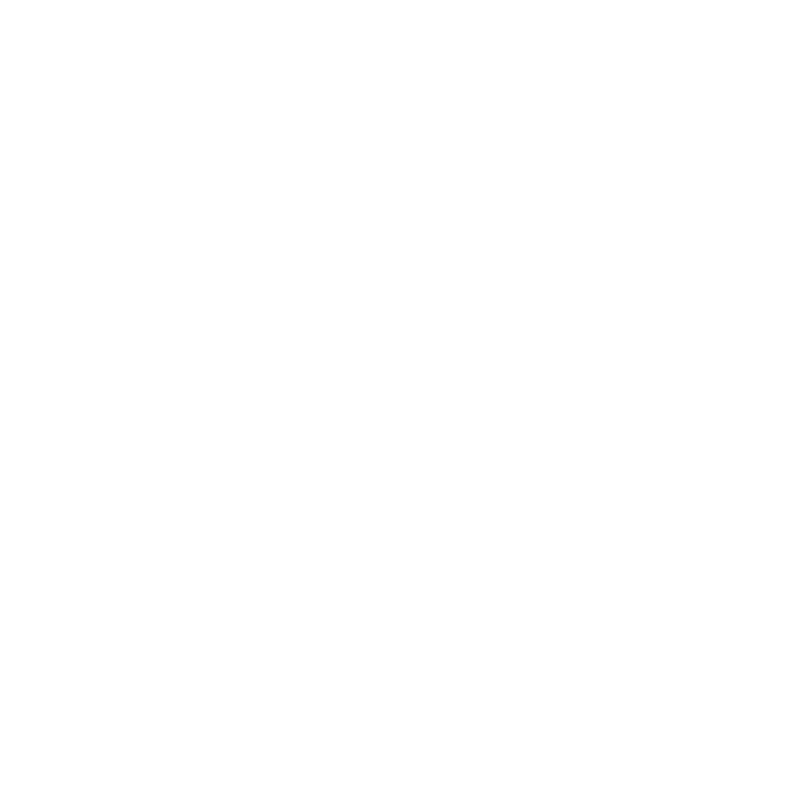

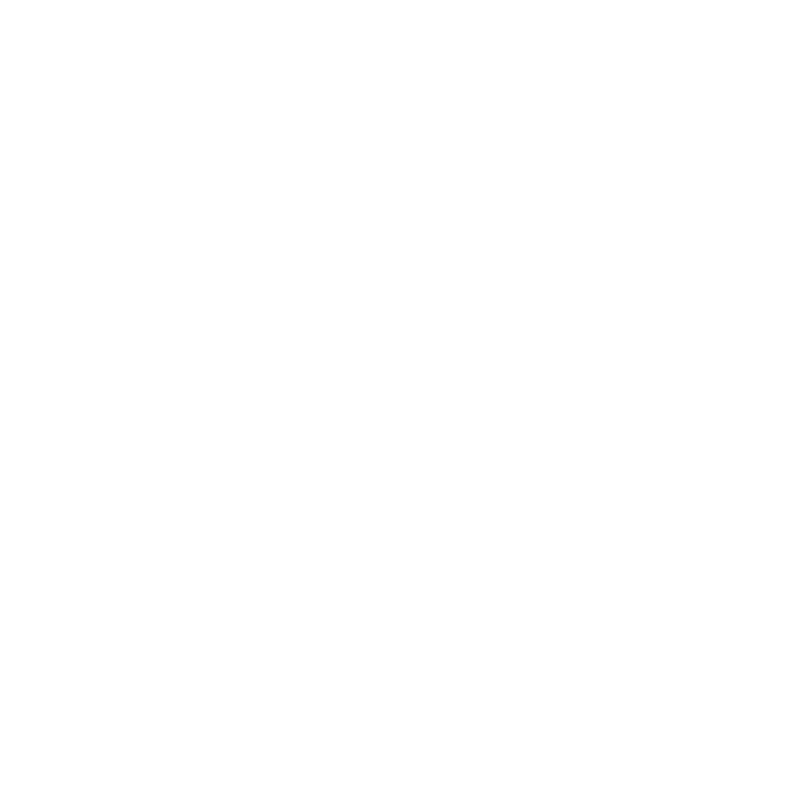

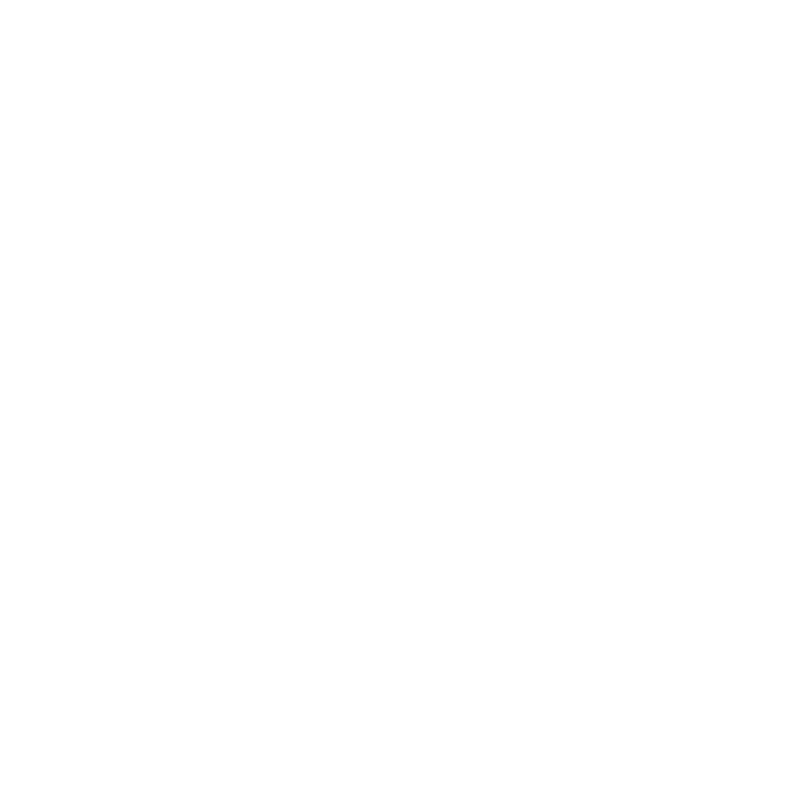

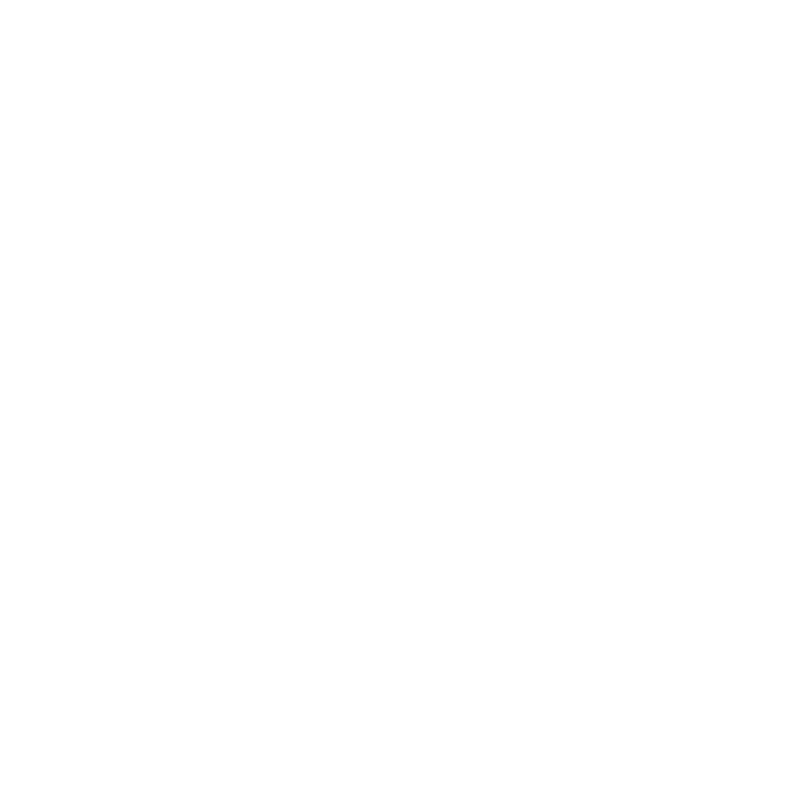

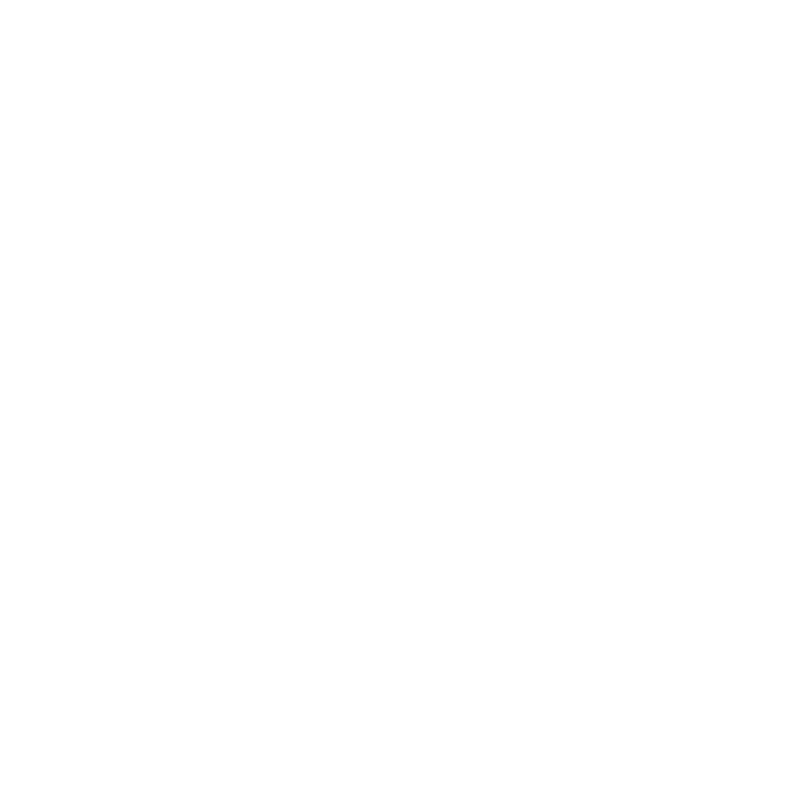

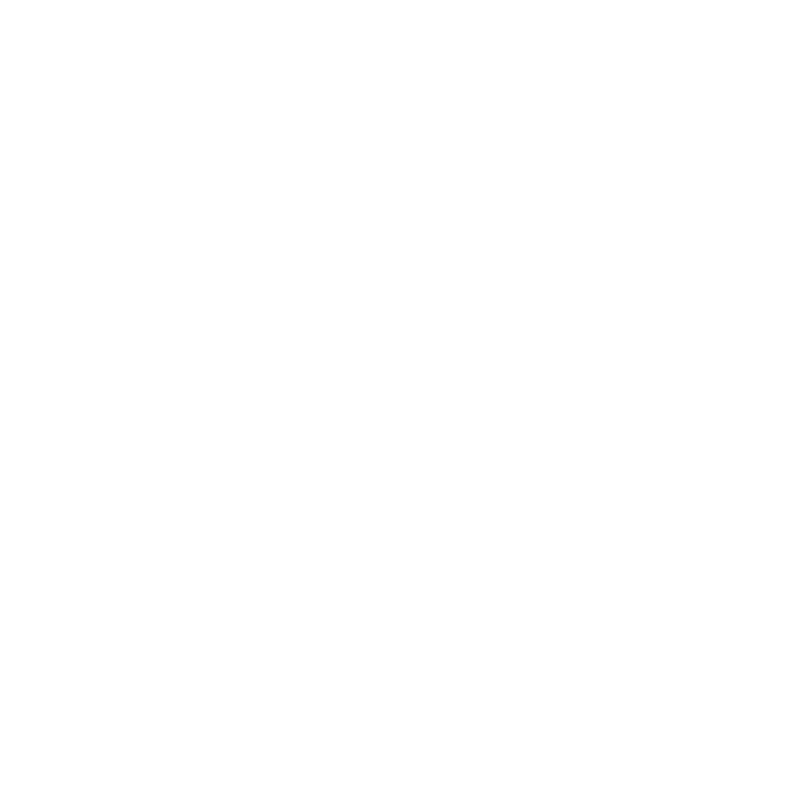

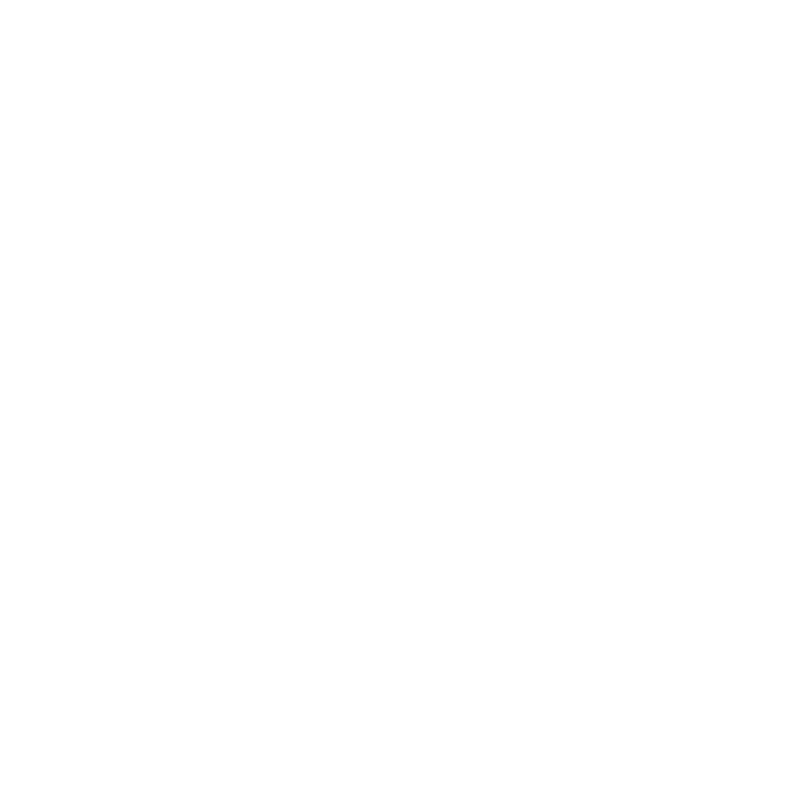

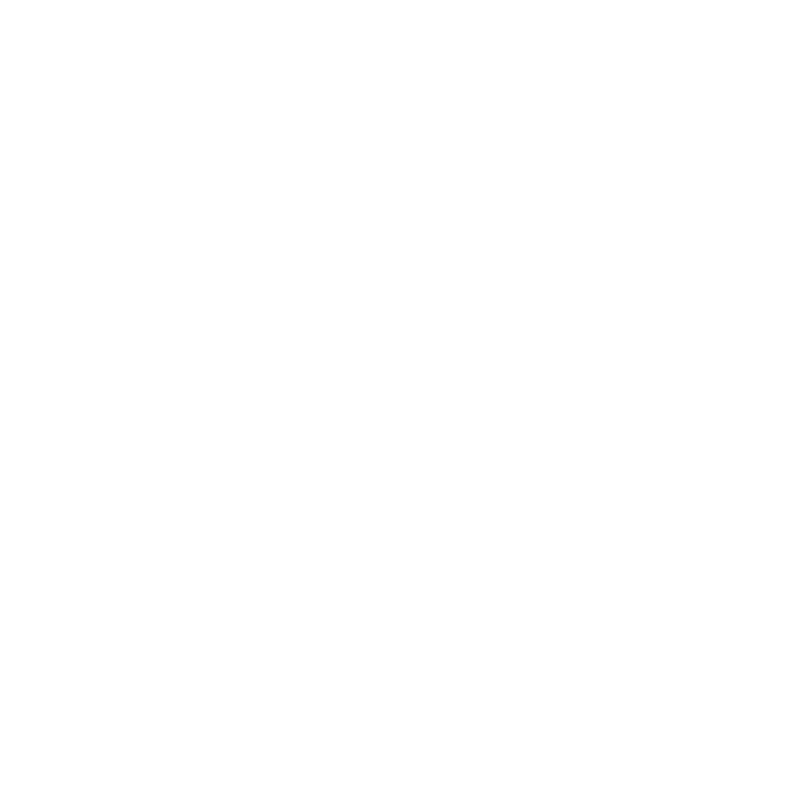

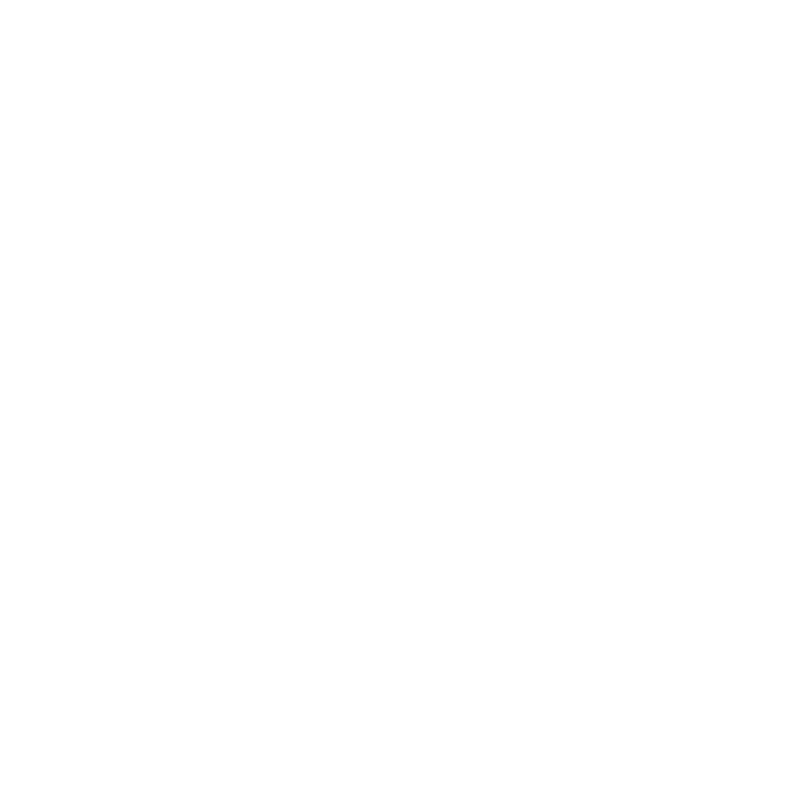

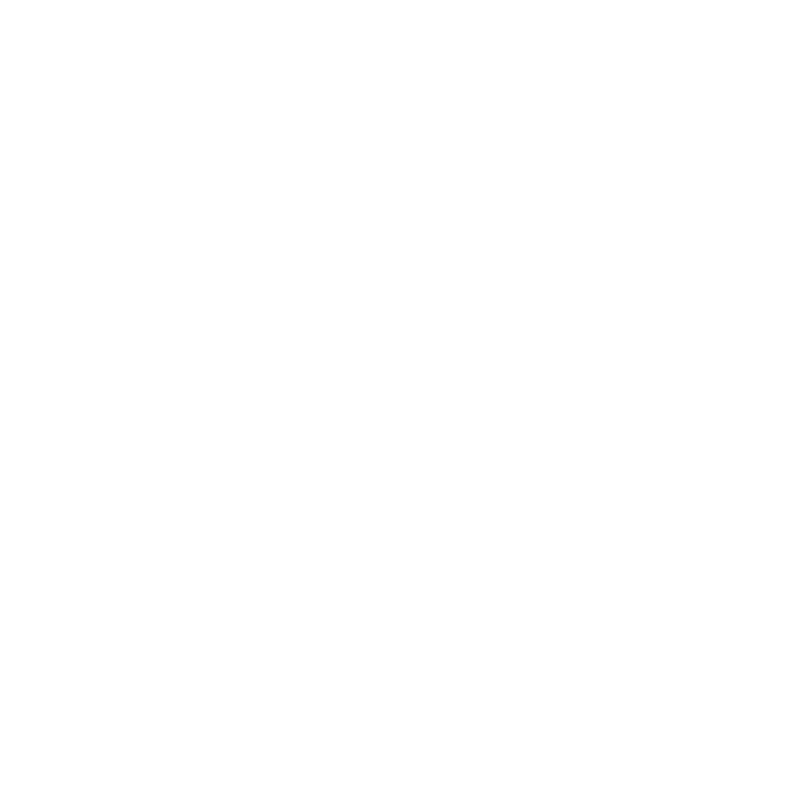

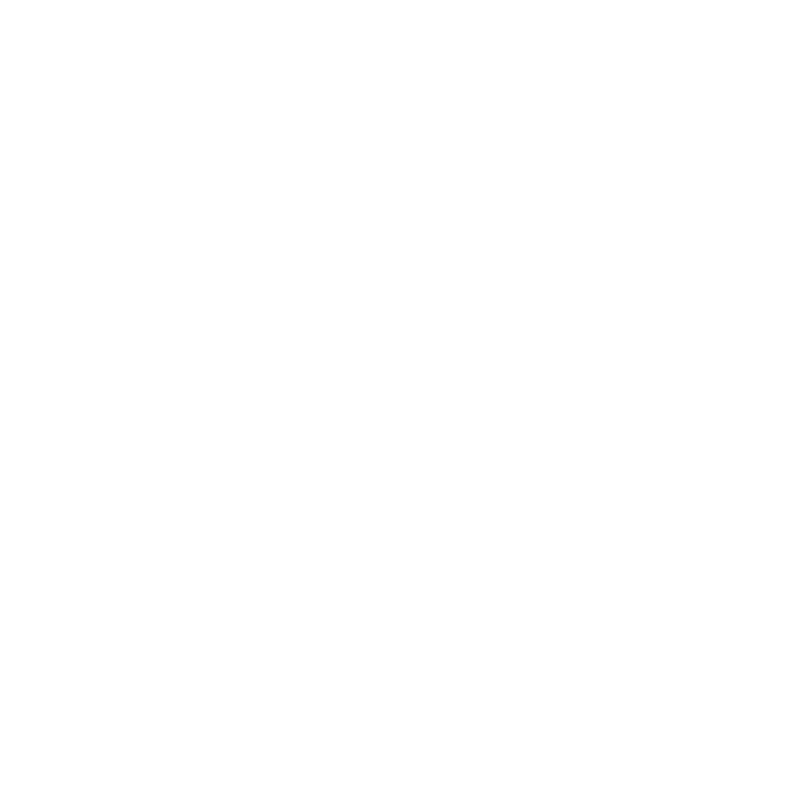

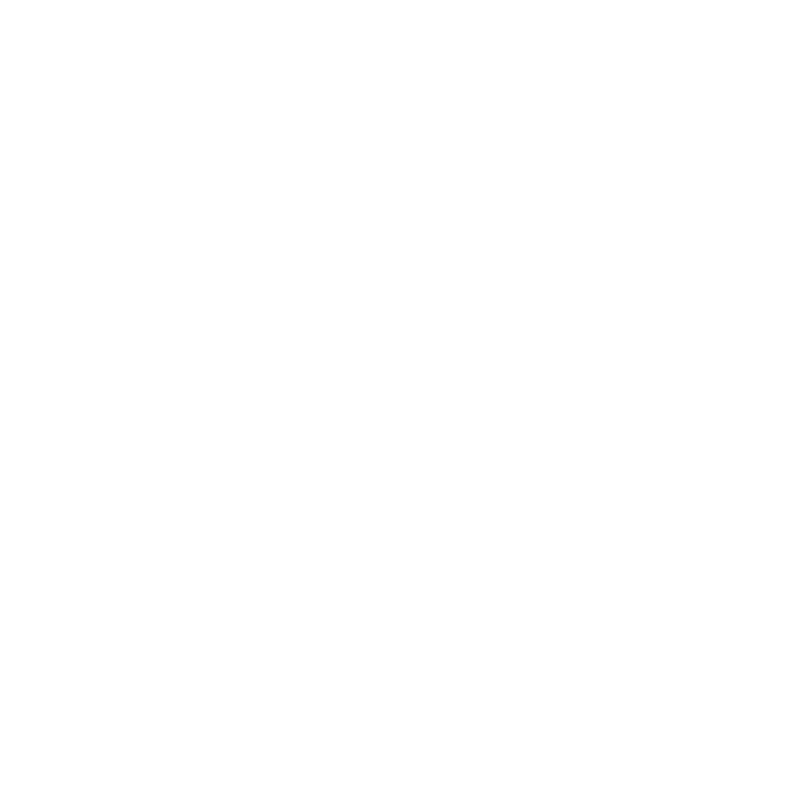

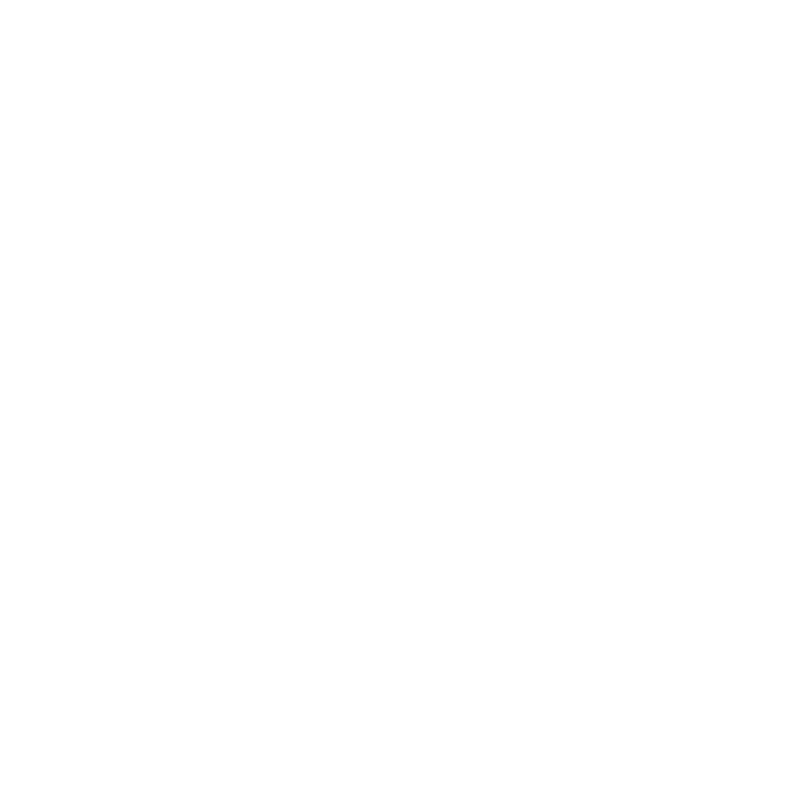

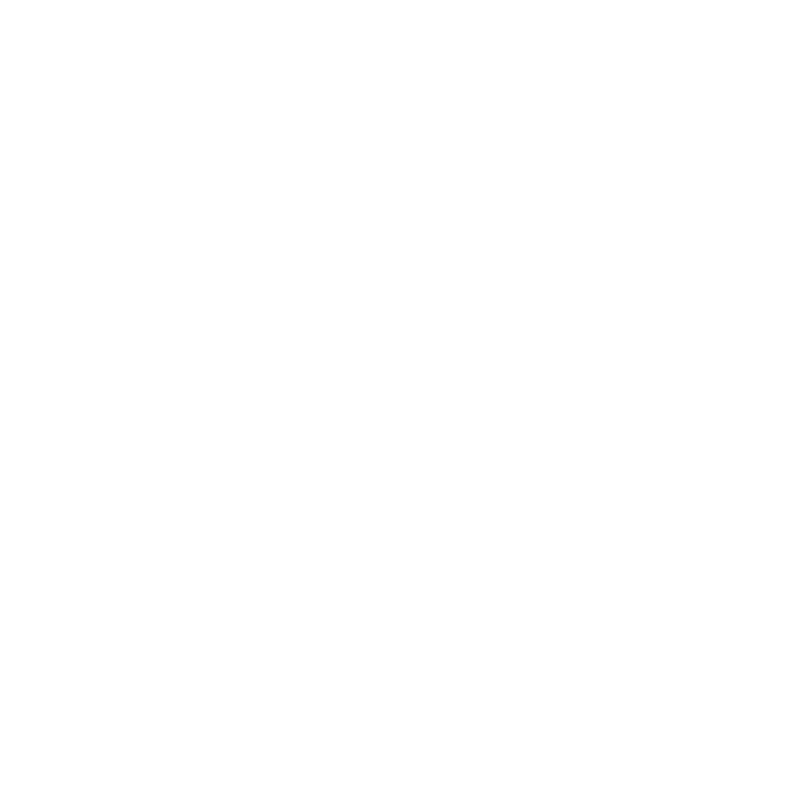

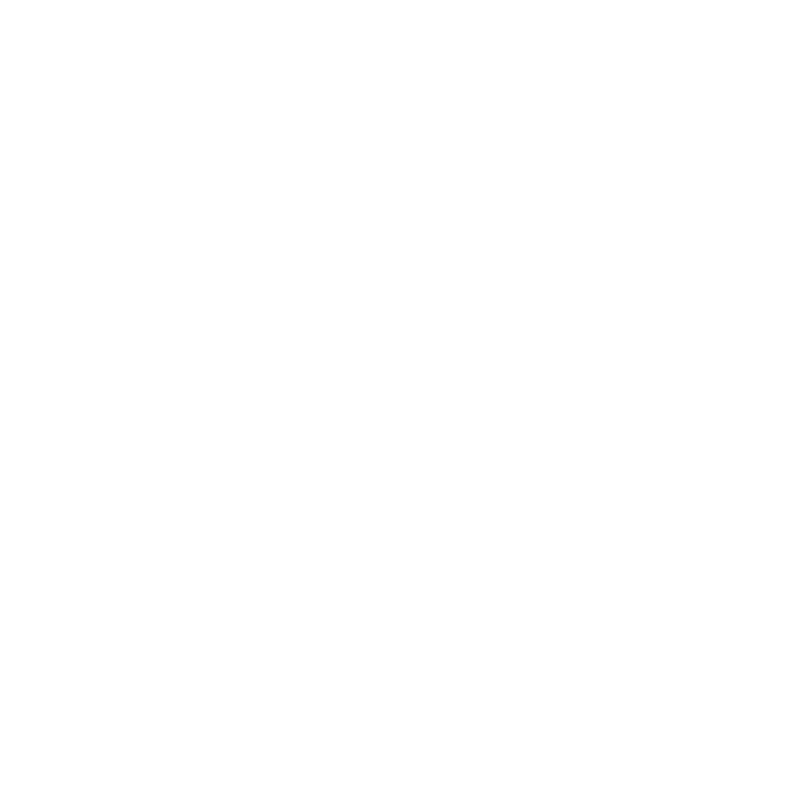

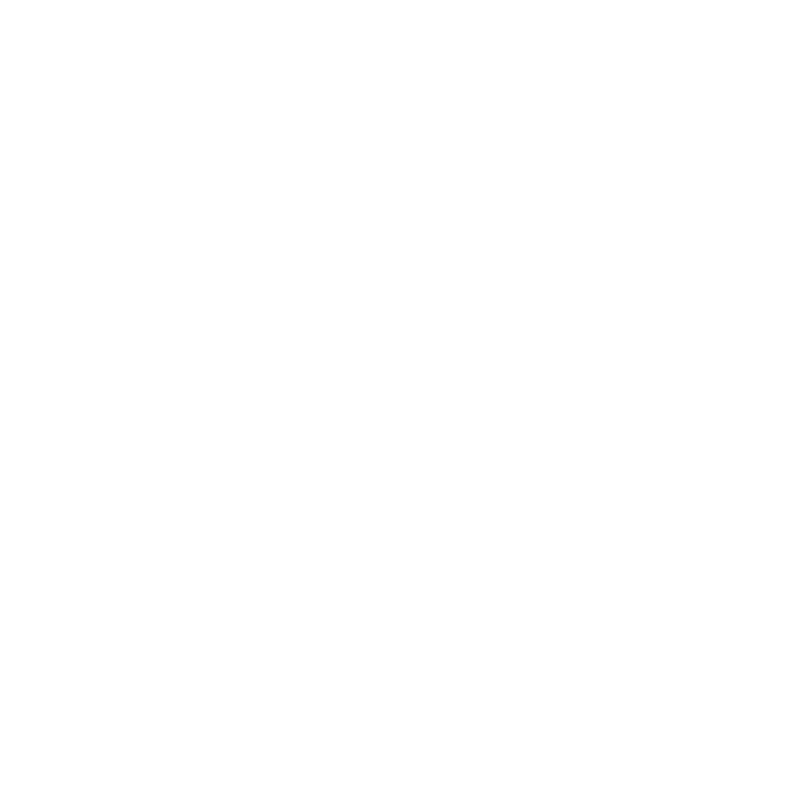

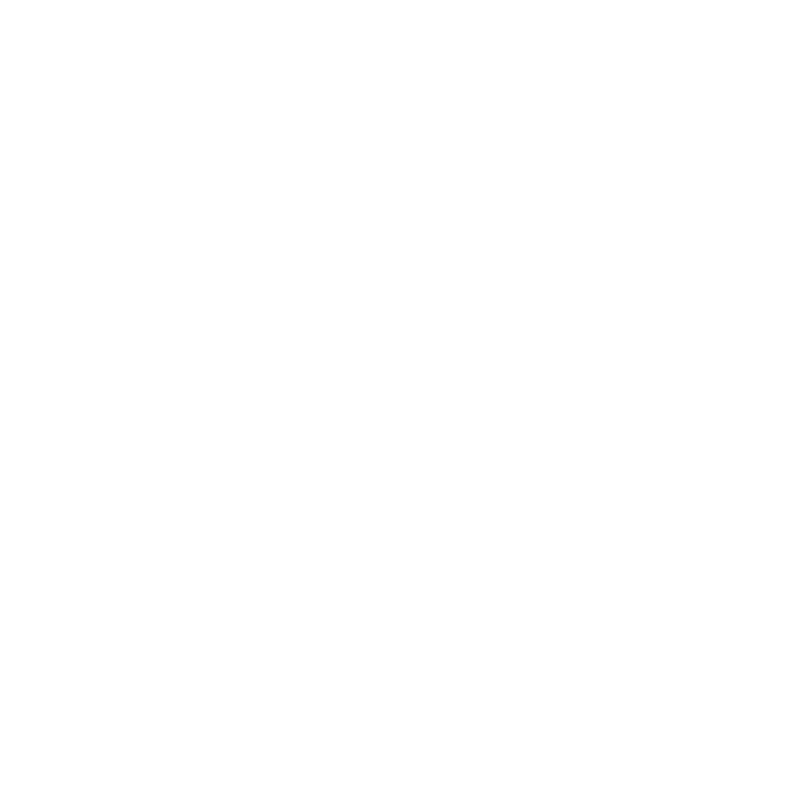

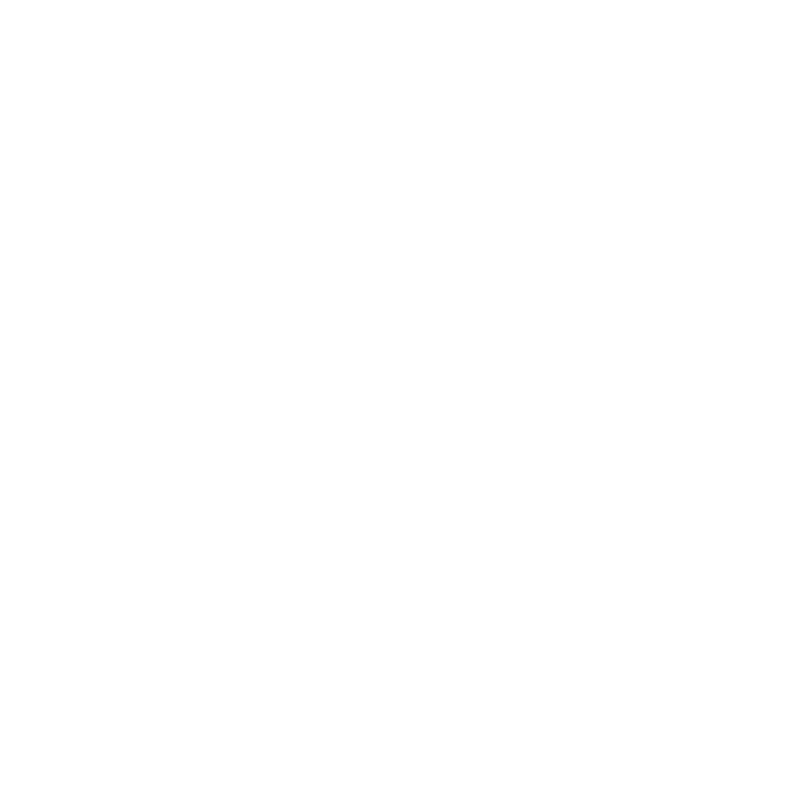

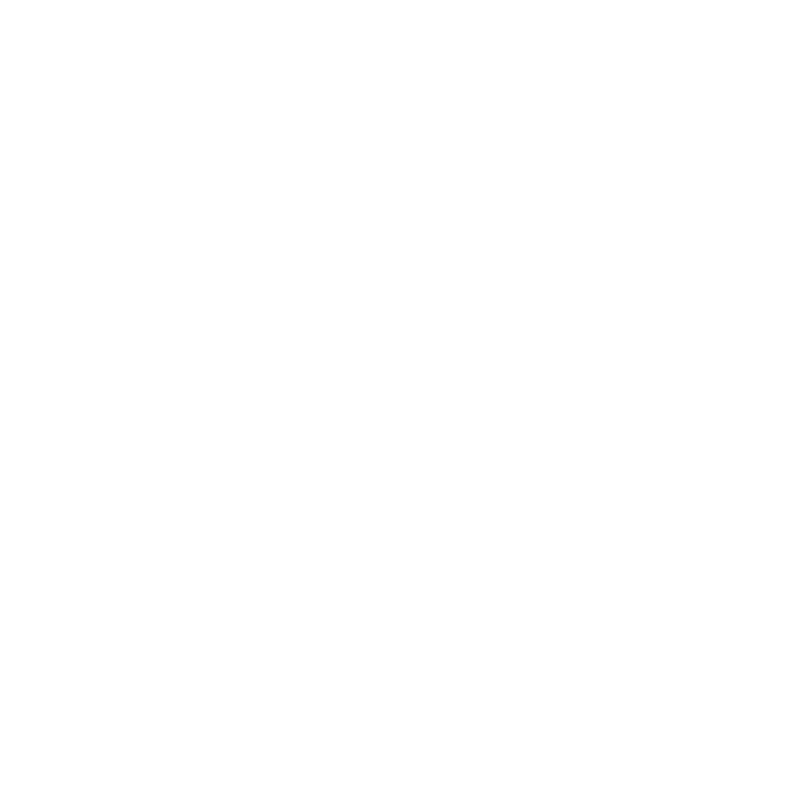

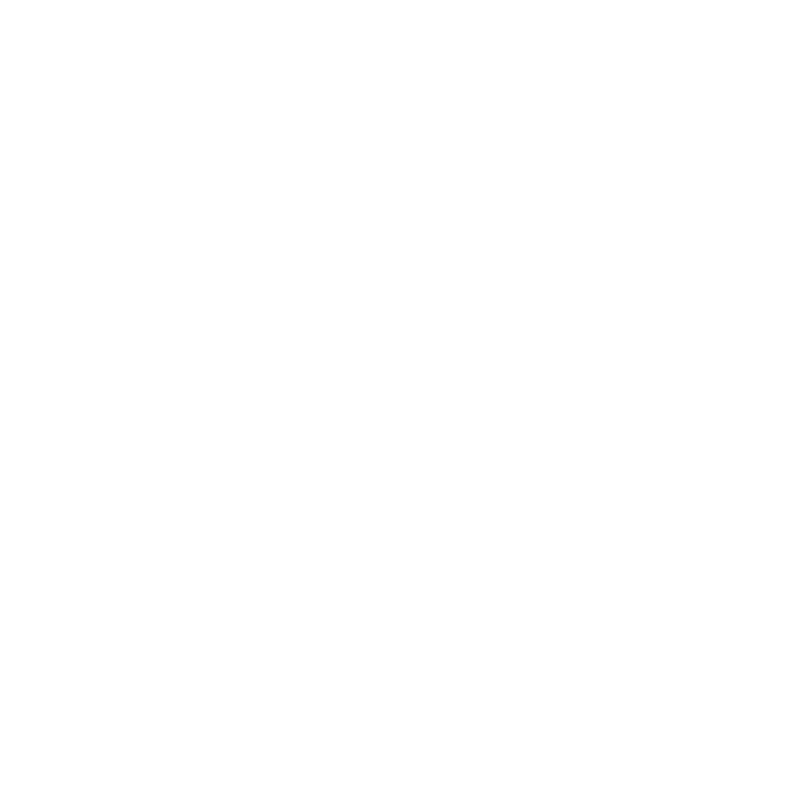

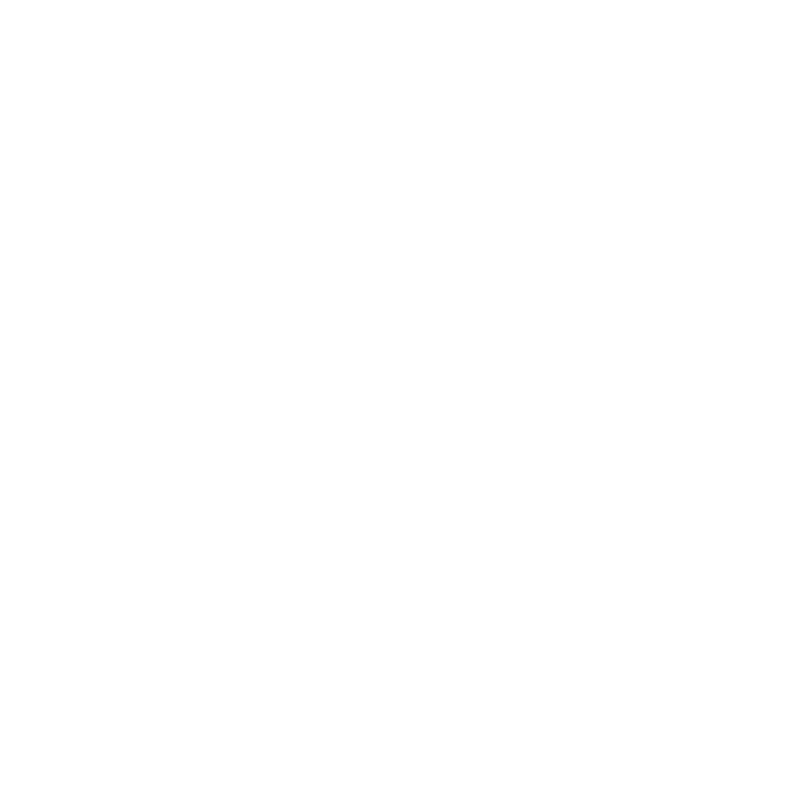

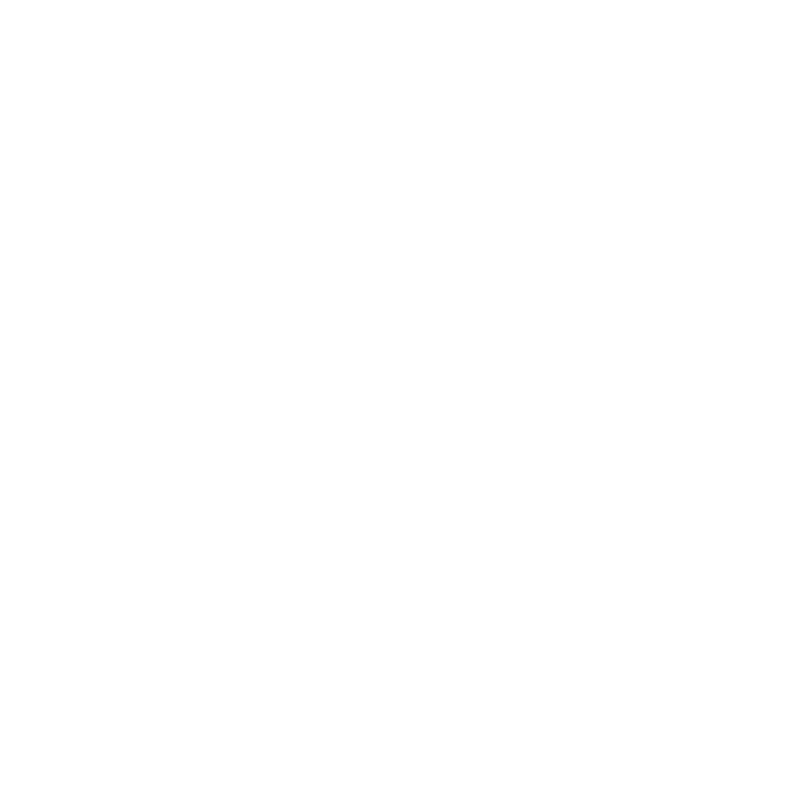

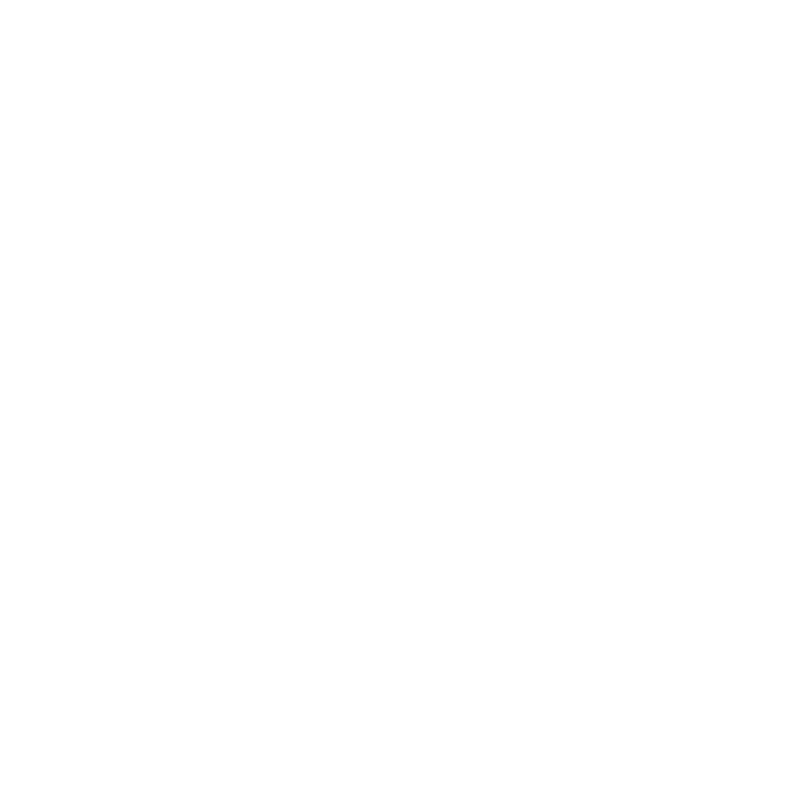

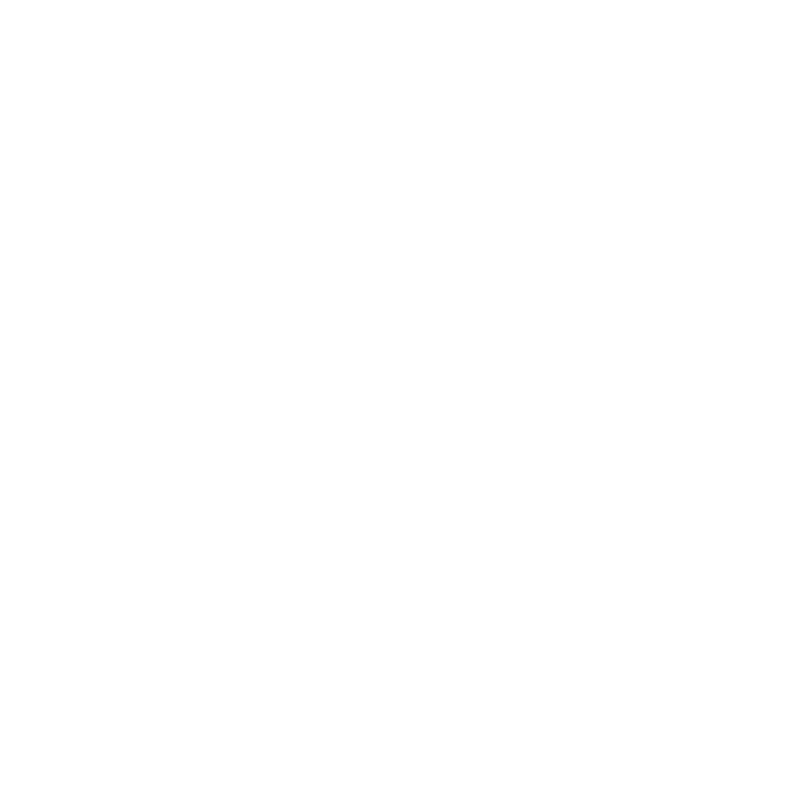

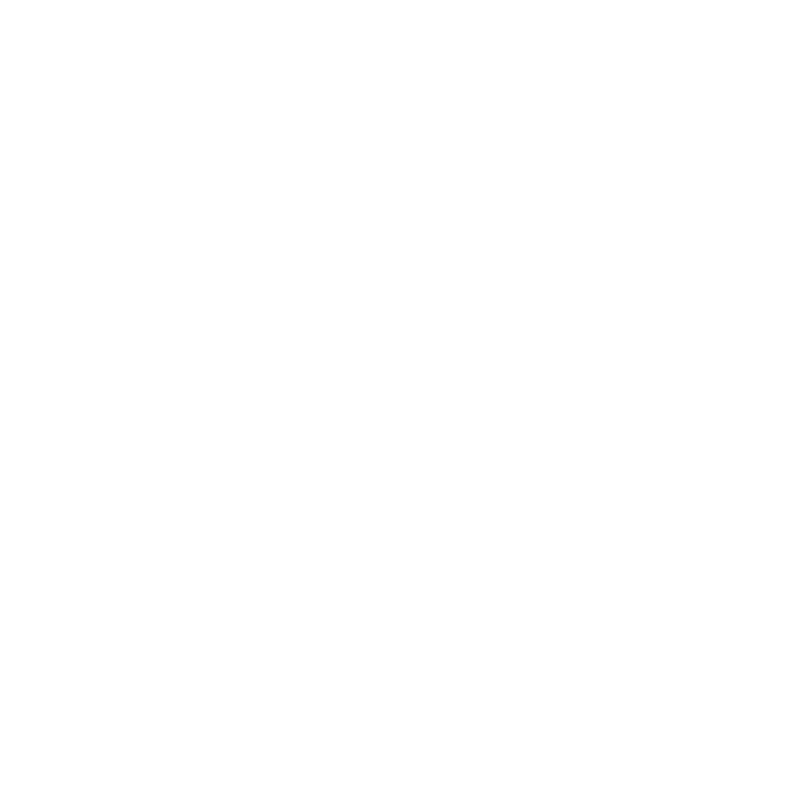

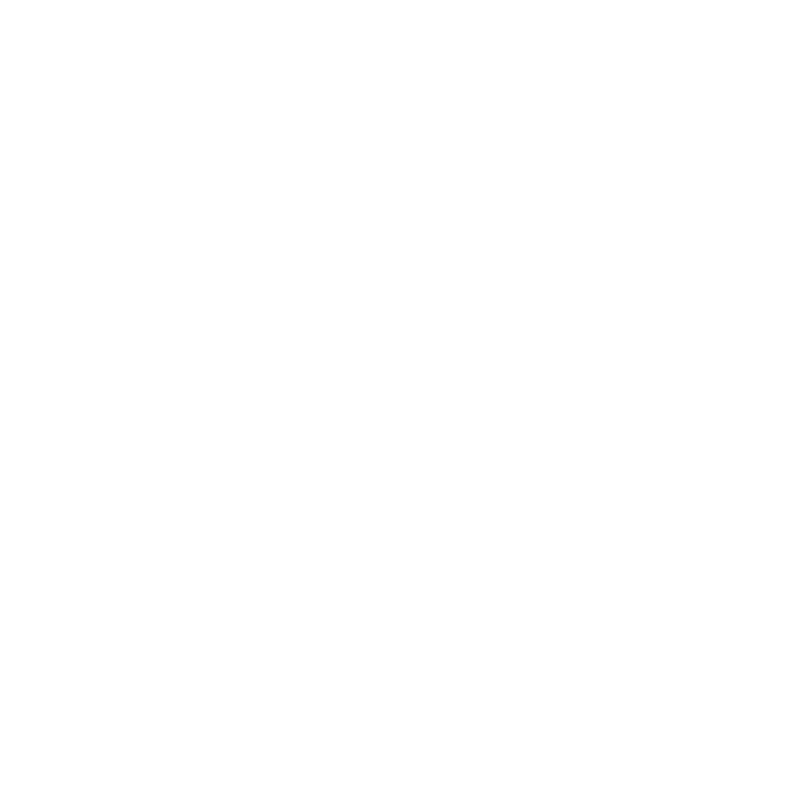

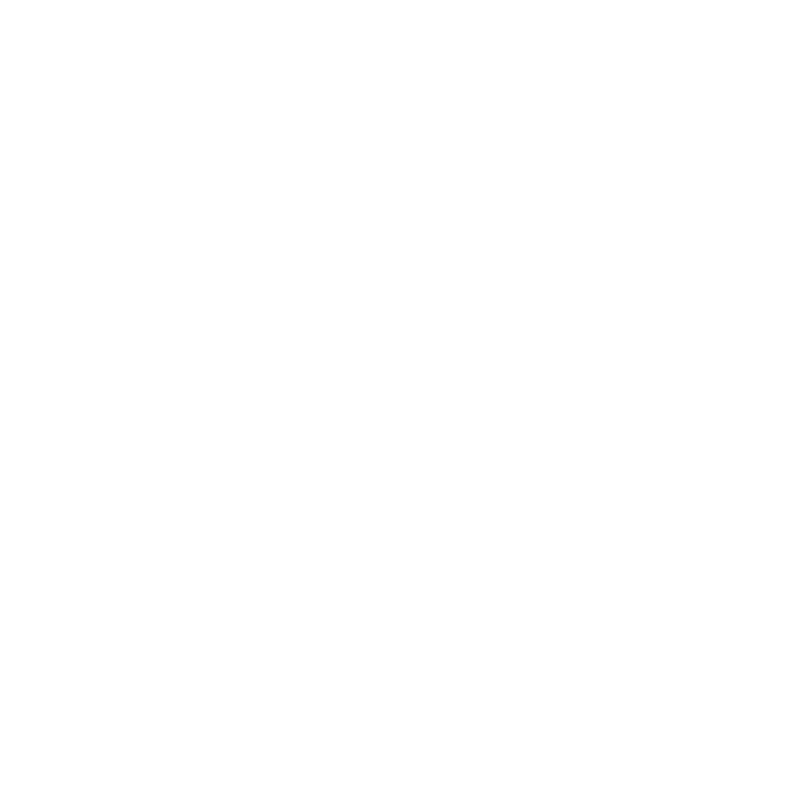

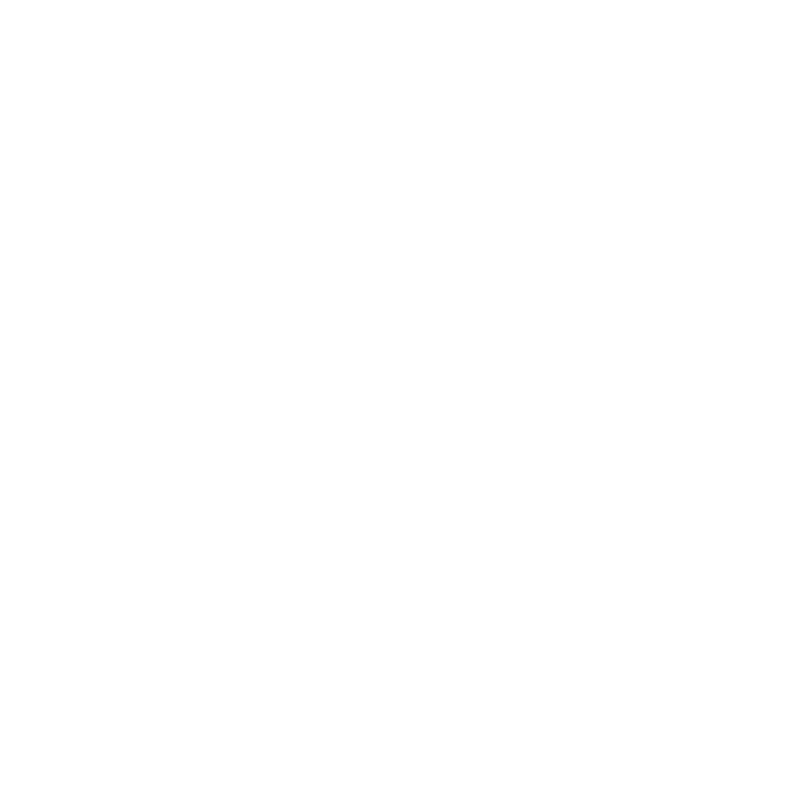

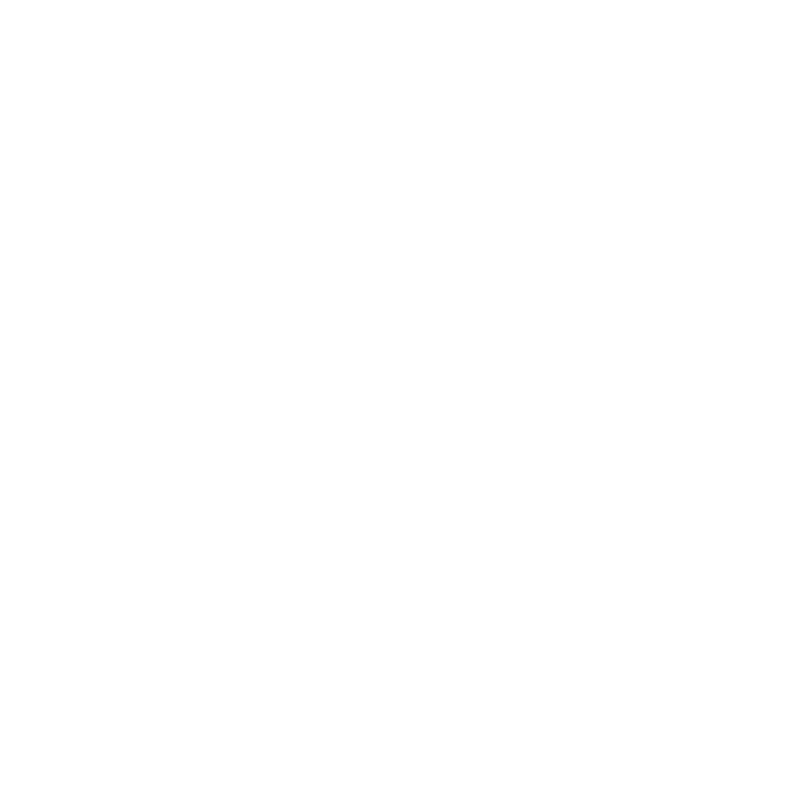

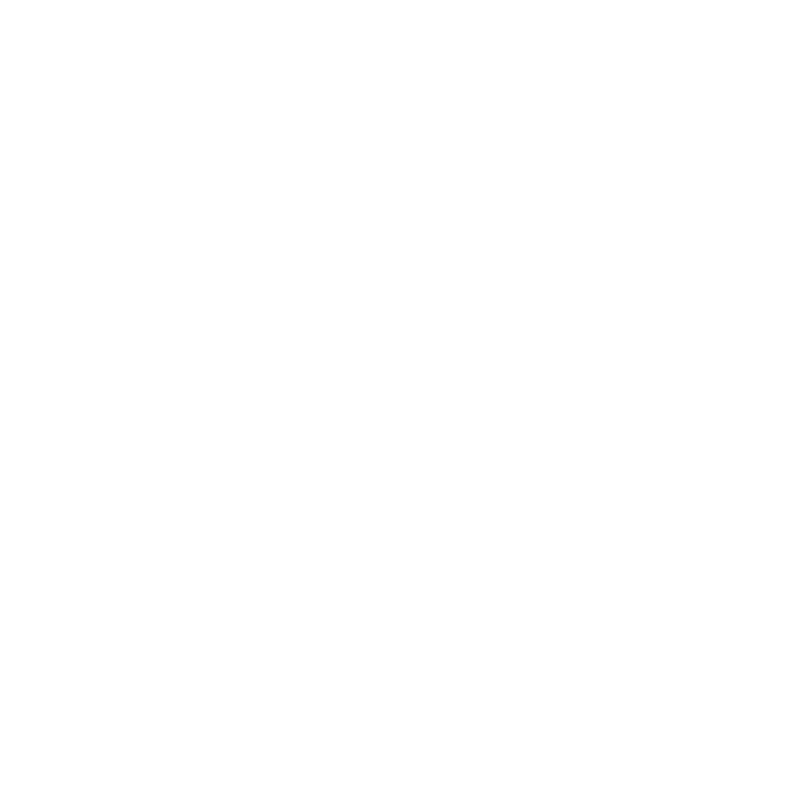

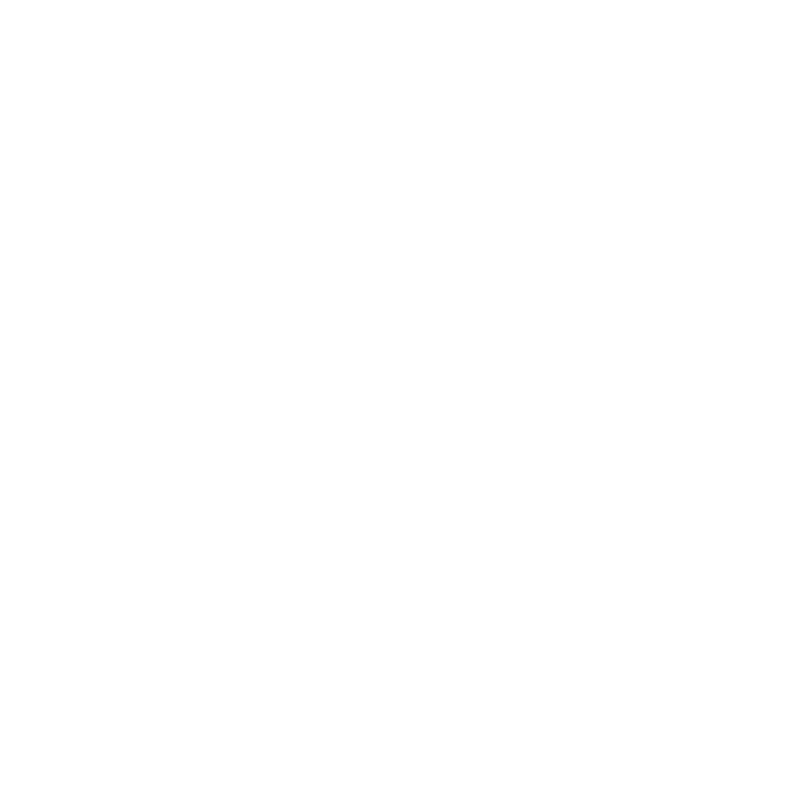

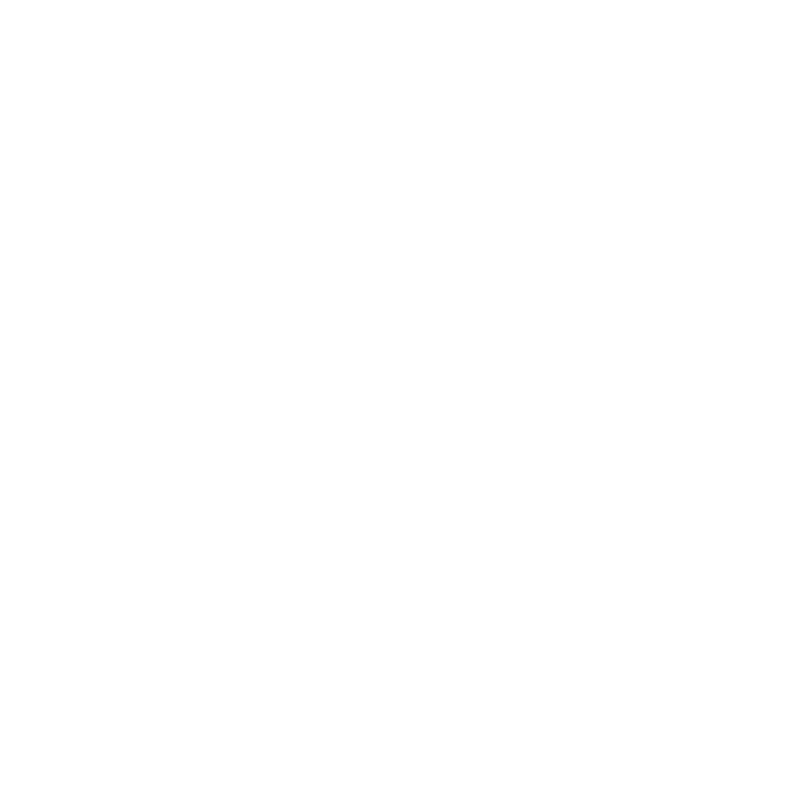

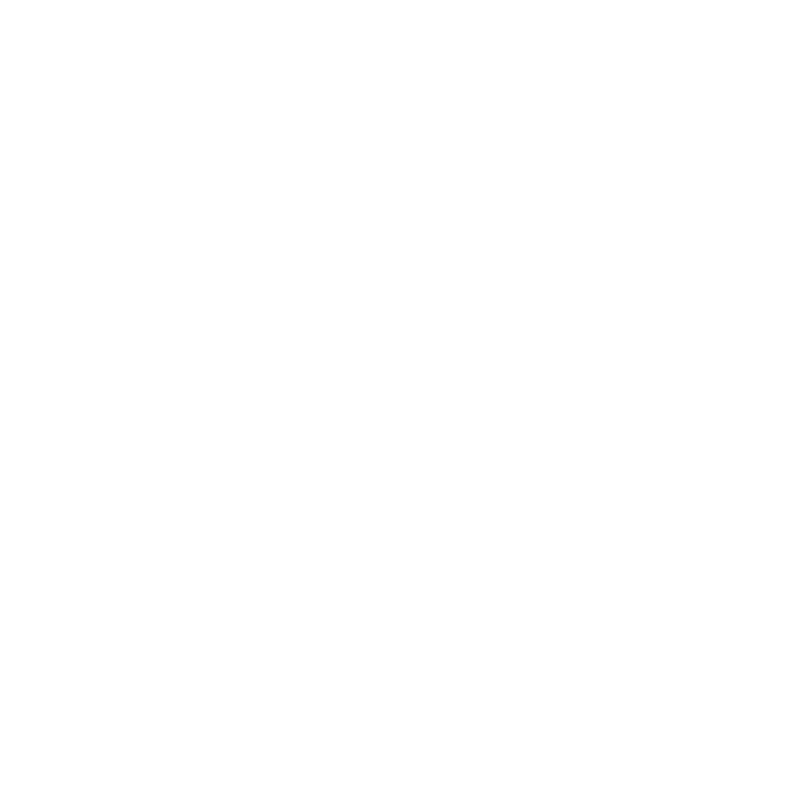

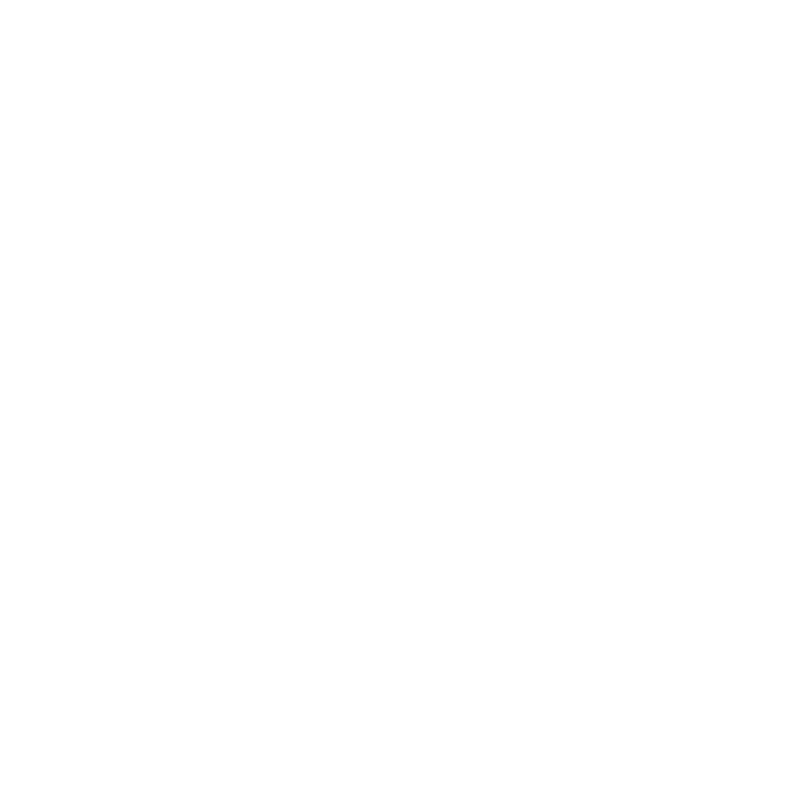

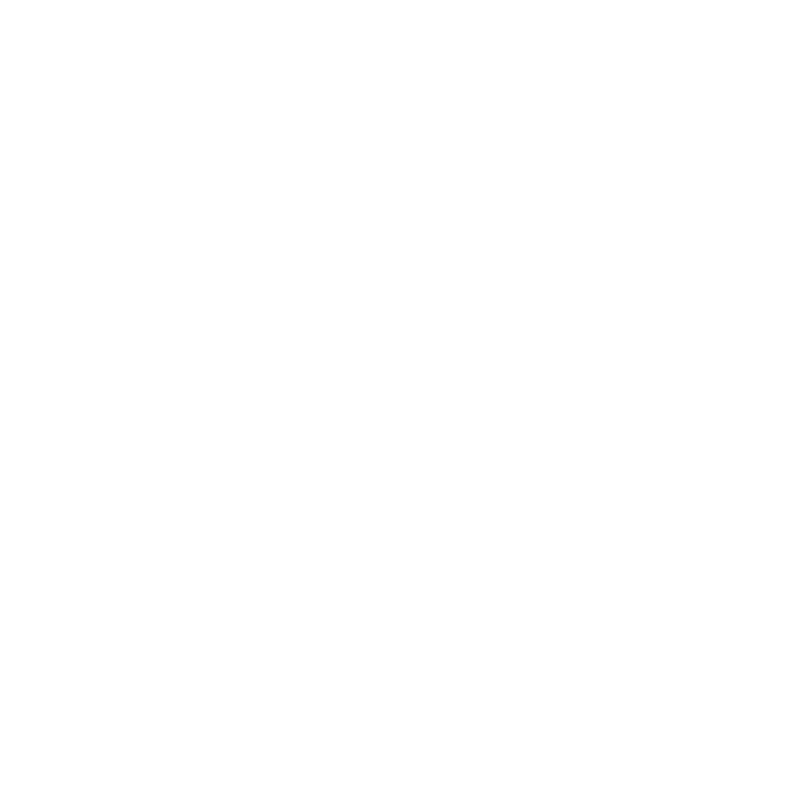

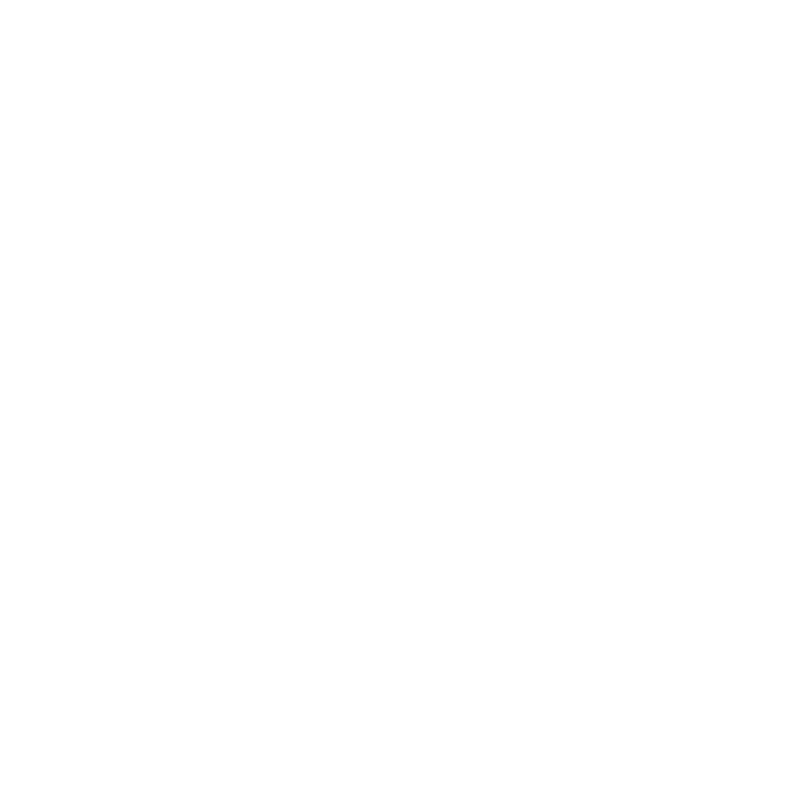

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2

def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]

def create_sun_shadow_image(pole_height, sun_x, image_size=32, is_real=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    ground_level = image_size * 0.1
    pole_base_x = image_size // 2
    pole_width = image_size * 0.12

    sun_height = np.clip(pole_height * 2, image_size * 0.3, image_size * 0.8)

    sun_distance = sun_x - pole_base_x

    noise = 0.25 + abs(0.1 * np.random.normal(0, 1))
    # noise = (0.1 * np.random.normal(0, 1))
    # if random.random() < 0.5:
    #     noise = 0
    # print('abs(sun_distance) / (sun_height - pole_height):',abs(sun_distance) / (sun_height - pole_height))
    x = abs(sun_distance) / (sun_height - pole_height)
    if x < noise:
        return None
    else:
        shadow_length = pole_height * (x + noise)

    
    if is_real:
        shadow_direction = -1 if sun_distance > 0 else 1
    else:
        shadow_direction = 1 if sun_distance > 0 else -1

    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
    shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]

    sun_color = random_color_from_hsv_range(sun_hsv_range)
    pole_color = random_color_from_hsv_range(pole_hsv_range)
    shadow_color = random_color_from_hsv_range(shadow_hsv_range)

    ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.08), 
                               shadow_length * shadow_direction, image_size * 0.08, facecolor=shadow_color/255.0))

    ax.add_patch(plt.Rectangle((pole_base_x - pole_width/2, ground_level), 
                               pole_width, pole_height, facecolor=pole_color/255.0))

    sun_radius = image_size * 0.1
    sun_y = sun_height + ground_level
    ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color/255.0))

    return fig, (sun_color, pole_color, shadow_color)

def generate_images(base_path, min_pole_height, max_pole_height, image_size=32, images_per_class=500):
    output_folder = os.path.join(base_path, "2")
    os.makedirs(output_folder, exist_ok=True)
    
    far_distances = [(0, 6), (26, 32)]
    near_distances = [(10, 16), (16, 22)]

    classes = [
        ('l', 'n', 'd'), ('l', 'f', 'd'),
       ('r', 'f', 'd'), ('r', 'n', 'd')
    ]

    image_count = 0
    for direction, distance, real in classes:
        is_real = (real == 'd')
        
        if distance == 'f':
            distance_ranges = far_distances
        else:
            distance_ranges = near_distances

        for j in tqdm(range(images_per_class), desc=f"Generating images for {direction}_{distance}_{real}"):
            if direction == 'l':
                distance_range = distance_ranges[0]
            else:
                distance_range = distance_ranges[1]
            
            sun_x = np.random.uniform(distance_range[0], distance_range[1])

            pole_height = np.random.uniform(min_pole_height, max_pole_height)
            result = create_sun_shadow_image(pole_height, sun_x, image_size, is_real)
            if result is None:
                continue  # 跳过未生成的图像
            fig, colors = result
            
            image_count += 1
            image_path = os.path.join(output_folder, f"{image_count}.png")
            fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
            plt.close(fig)

    print("Image generation complete.")

# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/contrastive_ternary"
image_size = 32
min_pole_height = image_size * 0.2
max_pole_height = image_size * 0.4

# 生成图片
generate_images(base_path, min_pole_height, max_pole_height, image_size)

In [1]:
# Enhanced
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# def analyze_image(image_path, target_size=128):
#     img = cv2.imread(image_path)
#     if img is None:
#         return None
    
#     img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
#     hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#     # sun_lower = np.array([0, 50, 200])
#     # sun_upper = np.array([60, 255, 255])
#     # pole_lower = np.array([90, 50, 50])
#     # pole_upper = np.array([150, 255, 255])
#     # shadow_lower = np.array([0, 0, 0])
#     # shadow_upper = np.array([180, 150, 220])
#     sun_lower = np.array([0, 100, 200])
#     sun_upper = np.array([30, 255, 255])
#     pole_lower = np.array([90, 100, 100])
#     pole_upper = np.array([150, 255, 255])
#     shadow_lower = np.array([0, 0, 50])
#     shadow_upper = np.array([180, 50, 150])

#     sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
#     pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
#     shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

#     sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if not sun_contours or not shadow_contours or not pole_contours:
#         return None

#     try:
#         sun_contour = max(sun_contours, key=cv2.contourArea)
#         sun_moments = cv2.moments(sun_contour)
#         sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
#         sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

#         pole_contour = max(pole_contours, key=cv2.contourArea)
#         pole_moments = cv2.moments(pole_contour)
#         pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
#         pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
#         pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
#         pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

#         shadow_contour = max(shadow_contours, key=cv2.contourArea)
#         shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
#         shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

#         l1 = abs(sun_cx - pole_cx)
#         l2 = abs(sun_cy - pole_top[1])

#         # 确定阴影尾部
#         if pole_top[0] == pole_bottom[0] or abs(pole_bottom[0] - pole_top[0]) <= target_size * 0.01:
#             shadow_tail = shadow_right if abs(shadow_right[0]-pole_top[0] ) > abs(shadow_left[0]-pole_top[0] ) else shadow_left
#         else:
#             distances = [
#                     (abs(shadow_left[0] - pole_top[0]), shadow_left),
#                     (abs(shadow_right[0] - pole_top[0]), shadow_right),
#                     (abs(pole_bottom[0] - pole_top[0]), pole_bottom)
#             ]
#             _, shadow_tail = max(distances, key=lambda x: x[0])

            


#         # 计算 l1 和 l2
#         s1 = abs(shadow_tail[0] - pole_top[0])
#         s2 = abs(pole_top[1] - shadow_tail[1])

#         if l2 == 0 or s2 == 0:
#             return None

#         # 在图像上标记s1, s2, l1, l2
#         cv2.line(img, (sun_cx, sun_cy), (pole_cx, sun_cy), (0, 255, 0), 2)  # s1
#         cv2.line(img, (sun_cx, sun_cy), (sun_cx, pole_top[1]), (255, 0, 0), 2)  # s2
#         cv2.line(img, (pole_top[0], shadow_tail[1]), (shadow_tail[0], shadow_tail[1]), (0, 0, 255), 2)  # l1
#         cv2.line(img, (pole_top[0], pole_top[1]), (pole_top[0], shadow_tail[1]), (255, 255, 0), 2)  # l2

#         # 添加文本标签
#         cv2.putText(img, 's1', (pole_cx, sun_cy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
#         cv2.putText(img, 's2', (sun_cx + 5, (sun_cy + pole_top[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
#         cv2.putText(img, 'l1', ((pole_top[0] + shadow_tail[0]) // 2, shadow_tail[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
#         cv2.putText(img, 'l2', (pole_top[0] + 5, (pole_top[1] + shadow_tail[1]) // 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

#         return l1/l2, s1/s2
#     except Exception as e:
#         print(f"Error processing image {image_path}: {str(e)}")
#         return None

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 使用提供的颜色范围
    sun_lower = np.array([0, 100, 200])
    sun_upper = np.array([30, 255, 255])
    pole_lower = np.array([90, 100, 100])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 50])
    shadow_upper = np.array([180, 50, 150])
    # sun_lower = np.array([0, 50, 200])
    # sun_upper = np.array([60, 255, 255])
    # pole_lower = np.array([90, 50, 50])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 0])
    # shadow_upper = np.array([180, 150, 220])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])
        l2 = abs(pole_bottom[1] - pole_top[1])
        l1 = abs(shadow_right[0] - shadow_left[0])

        if l2 == 0 or s2 == 0:
            return None  # 跳过分母为0的情况

        return s1*l2/(target_size)**2, s2*l1/(target_size)**2
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None


def process_folder(folder_path,target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path,target_size=target_size)
                if result:
                    data[category].append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            result = analyze_image(image_path)
            if result:
                data["all_images"].append((result, image_path))

    return data

def plot_scatter(data, output_pdf_path):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(12, 12))
        colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
        all_points = []
        
        for (category, points), color in zip(data.items(), colors):
            x, y = zip(*[p[0] for p in points])
            plt.scatter(x, y, c=color, label=category, alpha=0.6)
            all_points.extend(points)

        plt.plot([0, 2], [0, 2], 'k--', label='y=x', color='gray')
        plt.xlabel(r'$\frac{l_1}{l_2}$', fontsize=14)
        plt.ylabel(r'$\frac{s_1}{s_2}$', fontsize=14)
        plt.grid(True)
        plt.axis('equal')
        plt.xlim(0, 2)
        plt.ylim(0, 2)

        # 只使用95%区间内的点进行拟合
        x_all = np.array([p[0][0] for p in all_points])
        y_all = np.array([p[0][1] for p in all_points])
        
        # 计算x和y的2.5%和97.5%百分位数
        x_low, x_high = np.percentile(x_all, [0.5, 99.5])
        y_low, y_high = np.percentile(y_all, [0.5, 99.5])
        
        # 筛选在95%区间内的点
        mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
        x_filtered = x_all[mask].reshape(-1, 1)
        y_filtered = y_all[mask]

        # 使用筛选后的点进行拟合
        lin_reg = LinearRegression()
        lin_reg.fit(x_filtered, y_filtered)
        y_pred = lin_reg.predict(x_filtered)
        r2 = r2_score(y_filtered, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_filtered, y_pred, color='black', linewidth=1, 
                 label=f'Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        plt.legend()
        plt.tight_layout()
        # pdf.savefig()  # 保存当前图像到PDF
        plt.show()
        plt.close()

    print(f"Scatter plot saved to {output_pdf_path}")

# 使用示例
# folder_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/contrastive_ternary/0"
# output_pdf_path = os.path.join(folder_path, "physical_law.pdf")
# data = process_folder(folder_path, target_size=128)
# plot_scatter(data, output_pdf_path)

/tmp/ipykernel_611888/102679337.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0.2], [0, 0.2], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)


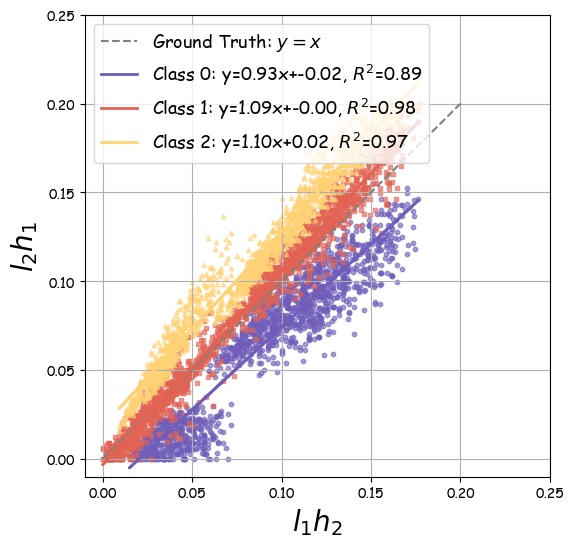

Scatter plot and fit lines saved to /cpfs04/user/hanyujin/causal-dm/example/taska_contrastive_training.pdf


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import font_manager as fm
comic_sans_path = "/usr/share/fonts/truetype/msttcorefonts/comic.ttf"  # Linux 常见路径
if os.path.exists(comic_sans_path):
    fm.fontManager.addfont(comic_sans_path)
    plt.rcParams['font.family'] = 'Comic Sans MS'
else:
    print("Comic Sans MS font not found. Using default font.")
    
def plot_scatter_and_fit(data_dict, output_pdf_path):
    with PdfPages(output_pdf_path) as pdf:
        plt.figure(figsize=(6, 6))
        colors = ["#6f5db9", '#E26354', "#ffd275"] 
        markers = ['o', 's', '^']
        plt.plot([0, 0.2], [0, 0.2], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        for (folder, data), color, marker in zip(data_dict.items(), colors, markers):
            all_points = []
            for category, points in data.items():
                x, y = zip(*[p[0] for p in points])
                plt.scatter(x, y, c=color, marker=marker, alpha=0.6, s=10)
                all_points.extend(points)

            # 拟合直线
            x_all = np.array([p[0][0] for p in all_points])
            y_all = np.array([p[0][1] for p in all_points])
            
            # 计算x和y的0.5%和99.5%百分位数
            x_low, x_high = np.percentile(x_all, [0, 100])
            y_low, y_high = np.percentile(y_all, [0, 100])
            
            # 筛选在99%区间内的点
            mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
            x_filtered = x_all[mask].reshape(-1, 1)
            y_filtered = y_all[mask]

            # 使用筛选后的点进行拟合
            lin_reg = LinearRegression()
            lin_reg.fit(x_filtered, y_filtered)
            y_pred = lin_reg.predict(x_filtered)
            r2 = r2_score(y_filtered, y_pred)
            slope = lin_reg.coef_[0]
            intercept = lin_reg.intercept_

            # 绘制拟合直线
            plt.plot(x_filtered, y_pred, color=color, linewidth=2, 
                    label=f'Class {folder}: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

        # 绘制y=x线
        # plt.plot([0, 0.2], [0, 0.2], 'k--', label='Ground Truth: $y=x$', color='gray', linewidth=1.5)
        
        # 设置坐标轴标签
        plt.xlabel(r'$l_1h_2$', fontsize=20)
        plt.ylabel(r'$l_2h_1$', fontsize=20)
        
        # 设置网格、坐标轴范围、比例、图例等
        plt.grid(True)
        # plt.axis('equal')  # 确保坐标轴的比例一致
        plt.xlim(-0.01, 0.25)
        plt.ylim(-0.01, 0.25)
        plt.legend(fontsize=13)

        
        # plt.tight_layout()
        pdf.savefig()
        # 显示图形
        plt.show()
        # pdf.savefig()
        plt.close()

    print(f"Scatter plot and fit lines saved to {output_pdf_path}")

# 主程序
base_path = "/cpfs04/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/sunshadow_contrastive_ternary"
output_pdf_path = "/cpfs04/user/hanyujin/causal-dm/example/taska_contrastive_training.pdf"

data_dict = {}
for folder in ['0','1', '2']:
    folder_path = os.path.join(base_path, folder)
    data_dict[folder] = process_folder(folder_path, target_size=128)

plot_scatter_and_fit(data_dict, output_pdf_path)

## Multiple-Label

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import random
import cv2


def random_color_from_hsv_range(hsv_range):
    h = random.uniform(hsv_range[0][0], hsv_range[0][1])
    s = random.uniform(hsv_range[1][0], hsv_range[1][1])
    v = random.uniform(hsv_range[2][0], hsv_range[2][1])
    return cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]


def create_sun_shadow_image(pole_height, sun_x, sun_height, image_size=32, is_real=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, image_size)
    ax.set_ylim(0, image_size)
    ax.set_aspect('equal')
    ax.axis('off')

    ground_level = image_size * 0.1
    pole_base_x = image_size // 2
    pole_width = image_size * 0.12

    sun_distance = sun_x - pole_base_x

    shadow_length = pole_height * (abs(sun_distance) / (sun_height - pole_height))
    shadow_direction = -1 if sun_distance > 0 else 1

    sun_hsv_range = [(0, 30), (100, 255), (200, 255)]
    pole_hsv_range = [(90, 150), (100, 255), (100, 255)]
    shadow_hsv_range = [(0, 180), (0, 50), (50, 150)]

    sun_color = random_color_from_hsv_range(sun_hsv_range)
    pole_color = random_color_from_hsv_range(pole_hsv_range)
    shadow_color = random_color_from_hsv_range(shadow_hsv_range)

    # 绘制影子
    ax.add_patch(plt.Rectangle((pole_base_x, ground_level - image_size * 0.08),
                                shadow_length * shadow_direction, image_size * 0.08, facecolor=shadow_color / 255.0))

    # 绘制杆子
    ax.add_patch(plt.Rectangle((pole_base_x - pole_width / 2, ground_level),
                                pole_width, pole_height, facecolor=pole_color / 255.0))

    # 绘制太阳
    sun_radius = image_size * 0.1
    sun_y = sun_height + ground_level
    ax.add_patch(plt.Circle((sun_x, sun_y), sun_radius, facecolor=sun_color / 255.0))

    return fig


def generate_images(base_path, min_pole_height, max_pole_height, image_size=32, images_per_class=1000):
    output_folder = base_path
    os.makedirs(output_folder, exist_ok=True)

    max_distance = image_size // 2  # 最大影子范围
    num_subfolders = 5
    interval = max_distance / num_subfolders

    classes = [
        ('l', 'n', 'd'), ('l', 'f', 'd'),
        ('r', 'f', 'd'), ('r', 'n', 'd')
    ]

    for direction, distance, real in classes:
        is_real = (real == 'd')

        # 初始化各子文件夹生成计数
        subfolder_counts = {f"{i}": 0 for i in range(num_subfolders)}

        while any(count < images_per_class for count in subfolder_counts.values()):
            # 随机生成影子长度
            shadow_index = random.randint(0, num_subfolders - 1)
            shadow_length = random.uniform(shadow_index * interval, (shadow_index + 1) * interval)

            # 随机生成杆子的初始长度
            pole_height = np.random.uniform(min_pole_height, max_pole_height)

            # 随机生成太阳的水平距离
            sun_distance = random.uniform(image_size * 0.2, image_size * 0.4) * (1 if direction == 'r' else -1)

            # 反推太阳的高度
            sun_height = pole_height + abs(sun_distance) * pole_height / shadow_length

            # 如果太阳高度超出画布范围，调整杆子的高度
            ground_level = image_size * 0.1
            max_sun_height = image_size - ground_level  # 最大太阳高度（画布内）
            while sun_height + ground_level > image_size:
                pole_height *= 0.9  # 减小杆子高度
                sun_height = pole_height + abs(sun_distance) * pole_height / shadow_length

            # 计算太阳的水平位置
            sun_x = (image_size // 2) + sun_distance

            # 生成图片
            fig = create_sun_shadow_image(pole_height, sun_x, sun_height, image_size, is_real)

            # 保存到对应子文件夹
            subfolder_prefix = 'r' if direction == 'l' else 'l'
            subfolder_name = f"{subfolder_prefix}_{shadow_index}"
            subfolder_path = os.path.join(output_folder, subfolder_name)
            os.makedirs(subfolder_path, exist_ok=True)

            # 检查子文件夹的图片计数是否已达到目标
            if subfolder_counts[subfolder_name[-1]] >= images_per_class:
                plt.close(fig)
                continue

            subfolder_counts[subfolder_name[-1]] += 1
            image_path = os.path.join(subfolder_path, f"{subfolder_counts[subfolder_name[-1]]}.png")
            fig.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=100)
            plt.close(fig)

    print("Image generation complete.")


# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/multiple_ten"
image_size = 32
min_pole_height = image_size * 0.2
max_pole_height = image_size * 0.4

# 生成图片
generate_images(base_path, min_pole_height, max_pole_height, image_size)


Image generation complete.


/tmp/ipykernel_1130615/1883163956.py:140: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 3], [0, 3], 'k--', label='y=x', color='gray')


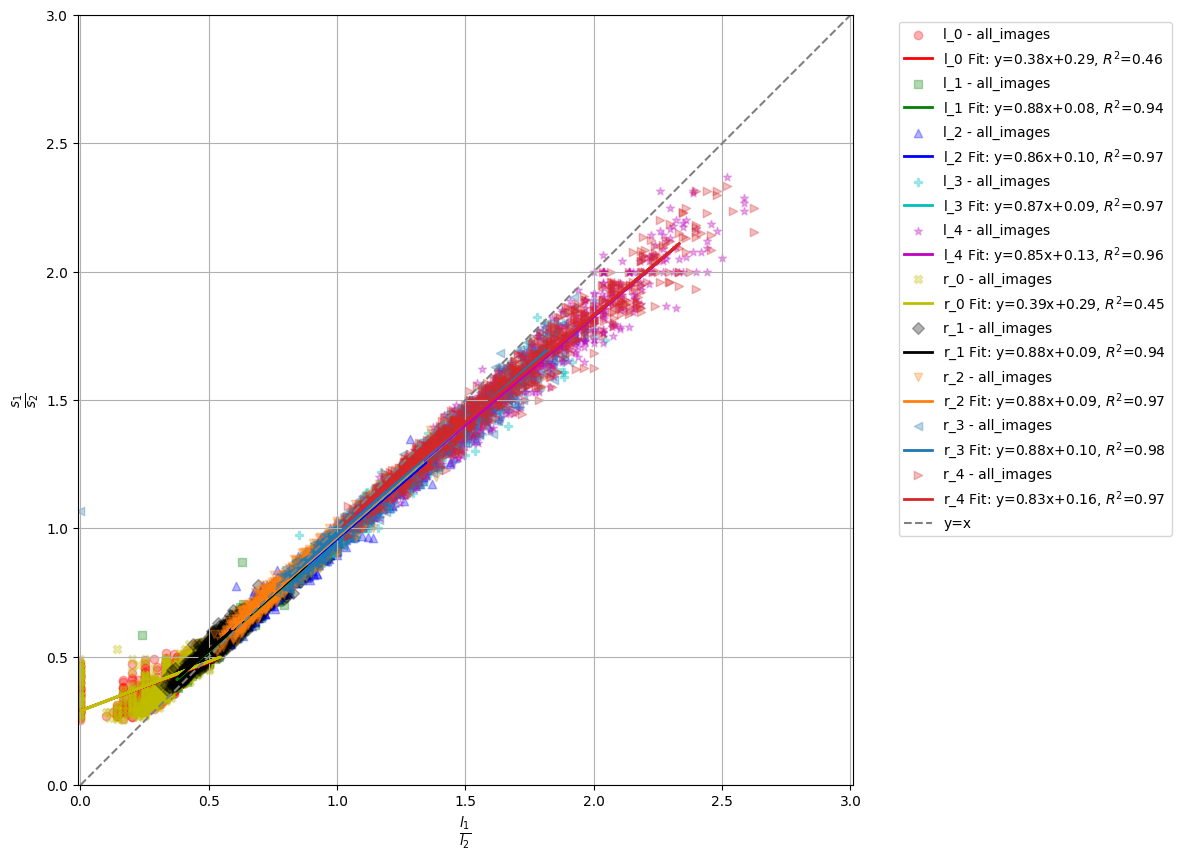

Scatter plot and fit lines saved to /cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/multiple_ten/physical_law_comparison.pdf


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
import glob
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def analyze_image(image_path, target_size=128):
    img = cv2.imread(image_path)
    if img is None:
        return None
    
    img = cv2.resize(img, (target_size, target_size), interpolation=cv2.INTER_AREA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 使用提供的颜色范围
    sun_lower = np.array([0, 100, 200])
    sun_upper = np.array([30, 255, 255])
    pole_lower = np.array([90, 100, 100])
    pole_upper = np.array([150, 255, 255])
    shadow_lower = np.array([0, 0, 50])
    shadow_upper = np.array([180, 50, 150])
    # sun_lower = np.array([0, 50, 200])
    # sun_upper = np.array([60, 255, 255])
    # pole_lower = np.array([90, 50, 50])
    # pole_upper = np.array([150, 255, 255])
    # shadow_lower = np.array([0, 0, 0])
    # shadow_upper = np.array([180, 150, 220])

    sun_mask = cv2.inRange(hsv, sun_lower, sun_upper)
    pole_mask = cv2.inRange(hsv, pole_lower, pole_upper)
    shadow_mask = cv2.inRange(hsv, shadow_lower, shadow_upper)

    sun_contours, _ = cv2.findContours(sun_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pole_contours, _ = cv2.findContours(pole_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_contours, _ = cv2.findContours(shadow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not sun_contours or not shadow_contours or not pole_contours:
        return None

    try:
        sun_contour = max(sun_contours, key=cv2.contourArea)
        sun_moments = cv2.moments(sun_contour)
        sun_cx = int(sun_moments['m10'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0
        sun_cy = int(sun_moments['m01'] / sun_moments['m00']) if sun_moments['m00'] != 0 else 0

        pole_contour = max(pole_contours, key=cv2.contourArea)
        pole_moments = cv2.moments(pole_contour)
        pole_cx = int(pole_moments['m10'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_cy = int(pole_moments['m01'] / pole_moments['m00']) if pole_moments['m00'] != 0 else 0
        pole_top = tuple(pole_contour[pole_contour[:, :, 1].argmin()][0])
        pole_bottom = tuple(pole_contour[pole_contour[:, :, 1].argmax()][0])

        shadow_contour = max(shadow_contours, key=cv2.contourArea)
        shadow_left = tuple(shadow_contour[shadow_contour[:, :, 0].argmin()][0])
        shadow_right = tuple(shadow_contour[shadow_contour[:, :, 0].argmax()][0])

        s1 = abs(sun_cx - pole_cx)
        s2 = abs(sun_cy - pole_top[1])
        l2 = abs(pole_bottom[1] - pole_top[1])
        l1 = abs(shadow_right[0] - shadow_left[0])

        if l2 == 0 or s2 == 0:
            return None  # 跳过分母为0的情况

        return l1/l2, s1/s2
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None



def process_folder(folder_path,target_size):
    txt_files = glob.glob(os.path.join(folder_path, "('*', '*', 'd')_files.txt"))
    data = defaultdict(list)

    if txt_files:
        for txt_file in txt_files:
            category = os.path.basename(txt_file).split('_')[0]
            with open(txt_file, 'r') as f:
                image_ids = [line.strip() for line in f.readlines()]
            
            for image_id in image_ids:
                image_path = os.path.join(folder_path, image_id)
                result = analyze_image(image_path,target_size=target_size)
                if result:
                    data[category].append((result, image_path))
    else:
        # 如果没有txt文件，处理文件夹中所有的png图像
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        for image_path in image_files:
            result = analyze_image(image_path)
            if result:
                data["all_images"].append((result, image_path))

    return data


def plot_scatter_and_fit(data_dict, output_pdf_path):
    plt.figure(figsize=(10, 10))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', '#ff7f0e', '#1f77b4', '#d62728']  # 10种颜色
    markers = ['o', 's', '^', 'P', '*', 'X', 'D', 'v', '<', '>']  # 10种标记
    
    for (folder, data), color, marker in zip(data_dict.items(), colors, markers):
        all_points = []
        for category, points in data.items():
            x, y = zip(*[p[0] for p in points])
            plt.scatter(x, y, c=color, marker=marker, label=f'{folder} - {category}', alpha=0.3)
            all_points.extend(points)

        # 拟合直线
        x_all = np.array([p[0][0] for p in all_points])
        y_all = np.array([p[0][1] for p in all_points])
        
        # 计算x和y的0.5%和99.5%百分位数
        x_low, x_high = np.percentile(x_all, [2.5, 97.5])
        y_low, y_high = np.percentile(y_all, [2.5, 97.5])
        
        # 筛选在99%区间内的点
        mask = (x_low <= x_all) & (x_all <= x_high) & (y_low <= y_all) & (y_all <= y_high)
        x_filtered = x_all[mask].reshape(-1, 1)
        y_filtered = y_all[mask]

        # 使用筛选后的点进行拟合
        lin_reg = LinearRegression()
        lin_reg.fit(x_filtered, y_filtered)
        y_pred = lin_reg.predict(x_filtered)
        r2 = r2_score(y_filtered, y_pred)
        slope = lin_reg.coef_[0]
        intercept = lin_reg.intercept_

        # 绘制拟合直线
        plt.plot(x_filtered, y_pred, color=color, linewidth=2, 
                 label=f'{folder} Fit: y={slope:.2f}x+{intercept:.2f}, $R^2$={r2:.2f}')

    # 绘制y=x线
    plt.plot([0, 3], [0, 3], 'k--', label='y=x', color='gray')
    
    # 设置坐标轴标签
    plt.xlabel(r'$\frac{l_1}{l_2}$', fontsize=14)
    plt.ylabel(r'$\frac{s_1}{s_2}$', fontsize=14)
    
    # 设置网格、坐标轴范围、比例、图例等
    plt.grid(True)
    plt.axis('equal')  # 确保坐标轴的比例一致
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.tight_layout()

    # 显示图形
    plt.show()
    plt.close()

    print(f"Scatter plot and fit lines saved to {output_pdf_path}")

# 主程序
base_path = "/cpfs01/user/hanyujin/causal-dm/Integrated-Design-Diffusion-Model/datasets/multiple_ten"
output_pdf_path = os.path.join(base_path, "physical_law_comparison.pdf")

data_dict = {}
for folder in ['l_0','l_1', 'l_2','l_3', 'l_4','r_0','r_1', 'r_2','r_3', 'r_4']:
    folder_path = os.path.join(base_path, folder)
    data_dict[folder] = process_folder(folder_path, target_size=128)

plot_scatter_and_fit(data_dict, output_pdf_path)

In [1]:
import os
import shutil
from tqdm import tqdm
import glob

def merge_and_rename_images(base_path, output_folder):
    """
    将多个文件夹中的图片合并到一个文件夹，并重命名图片文件。

    Args:
        base_path: 包含多个子文件夹的父文件夹路径。
        output_folder: 合并后的图片输出文件夹路径。
    """
    
    os.makedirs(output_folder, exist_ok=True)
    
    subfolders = sorted(glob.glob(os.path.join(base_path, '*')))
    
    for i, folder in enumerate(subfolders):
        if not os.path.isdir(folder):
            continue
        
        if i < 5:
           suffix = f"l_{i}"
        else:
           suffix = f"r_{i-5}"
        
        print(f"Processing folder: {os.path.basename(folder)} with suffix: {suffix}")
        
        image_files = glob.glob(os.path.join(folder, '*.png'))

        for image_path in tqdm(image_files, desc=f"Copying images from {os.path.basename(folder)}"):
            
            original_name = os.path.basename(image_path)
            name, ext = os.path.splitext(original_name)
            new_name = f"{name}_{suffix}{ext}"
            output_path = os.path.join(output_folder, new_name)

            shutil.copy2(image_path, output_path)  # 使用 copy2 保留元数据
    
    print("Image merging and renaming complete.")

# 设置参数
base_path = "/cpfs01/user/hanyujin/causal-dm/results/multiple_ten_cfg7/vis"
output_folder = "/cpfs01/user/hanyujin/causal-dm/results/multiple_ten_cfg7/vis/epoch_400"

# 执行合并和重命名操作
merge_and_rename_images(base_path, output_folder)

Processing folder: epoch_400 with suffix: l_0


Copying images from epoch_400: 0it [00:00, ?it/s]


Processing folder: epoch_400_1734962429.9982724 with suffix: l_1


Copying images from epoch_400_1734962429.9982724: 100%|██████████| 301/301 [00:05<00:00, 51.58it/s]


Processing folder: epoch_400_1734962829.6769826 with suffix: l_2


Copying images from epoch_400_1734962829.6769826: 100%|██████████| 301/301 [00:05<00:00, 52.00it/s]


Processing folder: epoch_400_1734963042.9727592 with suffix: l_3


Copying images from epoch_400_1734963042.9727592: 100%|██████████| 301/301 [00:05<00:00, 51.93it/s]


Processing folder: epoch_400_1734963256.5486724 with suffix: l_4


Copying images from epoch_400_1734963256.5486724: 100%|██████████| 301/301 [00:05<00:00, 51.87it/s]


Processing folder: epoch_400_1734963469.4869914 with suffix: r_0


Copying images from epoch_400_1734963469.4869914: 100%|██████████| 301/301 [00:05<00:00, 51.99it/s]


Processing folder: epoch_400_1734963683.5402174 with suffix: r_1


Copying images from epoch_400_1734963683.5402174: 100%|██████████| 301/301 [00:05<00:00, 53.17it/s]


Processing folder: epoch_400_1734963897.78092 with suffix: r_2


Copying images from epoch_400_1734963897.78092: 100%|██████████| 301/301 [00:05<00:00, 50.60it/s]


Processing folder: epoch_400_1734964111.597903 with suffix: r_3


Copying images from epoch_400_1734964111.597903: 100%|██████████| 301/301 [00:05<00:00, 51.27it/s]


Processing folder: epoch_400_1734964325.2921143 with suffix: r_4


Copying images from epoch_400_1734964325.2921143: 100%|██████████| 301/301 [00:05<00:00, 50.99it/s]


Processing folder: epoch_400_1734964539.1446002 with suffix: r_5


Copying images from epoch_400_1734964539.1446002: 100%|██████████| 301/301 [00:05<00:00, 51.89it/s]

Image merging and renaming complete.
